In [42]:
import pandas as pd
import deeplake
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import LabelEncoder, MinMaxScaler


pd.set_option('display.max_colwidth', None)

In [43]:
ds = deeplake.load("data/tracks_fma.csv")


data/tracks_fma.csv loaded successfully.



In [44]:
ds.visualize()

In [45]:
df = pd.read_csv('tracks_fma.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13128 entries, 0 to 13127
Data columns (total 46 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   album_comments      13128 non-null  int64  
 1   album_favorites     13128 non-null  int64  
 2   album_id            13128 non-null  int64  
 3   album_listens       13128 non-null  int64  
 4   album_tags          13128 non-null  object 
 5   album_title         13128 non-null  object 
 6   album_tracks        13128 non-null  int64  
 7   artist_comments     13128 non-null  int64  
 8   artist_favorites    13128 non-null  int64  
 9   artist_id           13128 non-null  int64  
 10  artist_name         13128 non-null  object 
 11  artist_tags         13128 non-null  object 
 12  set_split           13128 non-null  object 
 13  set_subset          13128 non-null  object 
 14  track_bit_rate      13128 non-null  int64  
 15  track_comments      13128 non-null  int64  
 16  trac

EDA - Exploratory Data Analysis

In [46]:
df.describe()

,album_comments,album_favorites,album_id,album_listens,album_tracks,artist_comments,artist_favorites,artist_id,track_bit_rate,track_comments,...,tempo,valence,artist_discovery,artist_familiarity,artist_hotttnesss,song_currency,song_hotttnesss,genre_id,genre_parent,genre_top_level
count,13128.000000,13128.000000,13128.000000,13128.000000,13128.000000,13128.000000,13128.000000,13128.000000,13128.000000,13128.000000,...,13128.000000,13128.000000,13128.000000,13128.000000,13128.000000,13128.000000,13128.000000,13128.000000,13128.000000,13128.000000
mean,0.348796,1.670932,6434.888406,21290.450716,12.406840,1.546237,19.632084,6304.106033,248585.117002,0.044561,...,123.079407,0.439750,0.321996,0.286292,0.346770,0.000234,0.033310,40.209704,1.557434,26.242687
std,1.186689,3.074014,4514.029450,52363.059001,12.094181,4.958562,66.050273,4974.216302,63834.751412,0.494113,...,35.016391,0.276036,0.114623,0.128307,0.133284,0.001474,0.061967,141.512874,12.016807,124.247995
min,-1.000000,-1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,-1.000000,0.000000,...,12.753000,0.000010,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,2.000000
25%,0.000000,0.000000,3036.000000,2918.000000,6.000000,0.000000,2.000000,2203.000000,192000.000000,0.000000,...,95.966250,0.197307,0.254517,0.205829,0.265889,0.000000,0.000000,12.000000,0.000000,12.000000
50%,0.000000,1.000000,5972.000000,6653.000000,10.000000,0.000000,6.000000,5442.500000,256000.000000,0.000000,...,120.057000,0.417723,0.328672,0.284111,0.343653,0.000000,0.000000,15.000000,0.000000,12.000000
75%,0.000000,2.000000,8697.000000,17382.000000,15.000000,1.000000,15.000000,9288.000000,320000.000000,0.000000,...,145.318250,0.665632,0.414481,0.359271,0.451625,0.000100,0.043971,17.000000,0.000000,15.000000
max,17.000000,40.000000,18873.000000,808021.000000,164.000000,68.000000,963.000000,20818.000000,448000.000000,37.000000,...,251.072000,0.999990,0.667799,0.819393,0.808122,0.052118,0.513594,1235.000000,651.000000,1235.000000


In [47]:
# Cargar el dataset
df = pd.read_csv('tracks_fma.csv')

# Eliminar filas con valores nulos
df_cleaned = df.dropna()

# Codificar géneros
label_encoder = LabelEncoder()
df_cleaned['genres_encoded'] = label_encoder.fit_transform(df_cleaned['genres'])

# Escalar características numéricas
scaler = MinMaxScaler()
numerical_features = ['track_duration', 'album_listens', 'track_listens']  # Ejemplo de características numéricas
df_cleaned[numerical_features] = scaler.fit_transform(df_cleaned[numerical_features])

# Definir características (X) y etiquetas (y)
X = df_cleaned.drop(columns=['genres', 'genres_encoded'])  # Características
y = df_cleaned['genres_encoded']  # Etiquetas


In [48]:
# Eliminar filas con valores nulos
df_cleaned = df.dropna()

# Verificar si quedan valores nulos
print(df_cleaned.isnull().sum())

album_comments        0
album_favorites       0
album_id              0
album_listens         0
album_tags            0
album_title           0
album_tracks          0
artist_comments       0
artist_favorites      0
artist_id             0
artist_name           0
artist_tags           0
set_split             0
set_subset            0
track_bit_rate        0
track_comments        0
track_date_created    0
track_duration        0
track_favorites       0
genres                0
genres_all            0
track_interest        0
track_listens         0
track_number          0
track_tags            0
track_title           0
acousticness          0
danceability          0
energy                0
instrumentalness      0
liveness              0
speechiness           0
tempo                 0
valence               0
md_artist_name        0
md_release            0
artist_discovery      0
artist_familiarity    0
artist_hotttnesss     0
song_currency         0
song_hotttnesss       0
genre_top_isna  

In [57]:
# Verificar duplicados
df_cleaned.duplicated().sum()

0

In [58]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13128 entries, 0 to 13127
Data columns (total 47 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   album_comments      13128 non-null  int64         
 1   album_favorites     13128 non-null  int64         
 2   album_id            13128 non-null  int64         
 3   album_listens       13128 non-null  int64         
 4   album_tags          13128 non-null  object        
 5   album_title         13128 non-null  object        
 6   album_tracks        13128 non-null  int64         
 7   artist_comments     13128 non-null  int64         
 8   artist_favorites    13128 non-null  int64         
 9   artist_id           13128 non-null  int64         
 10  artist_name         13128 non-null  object        
 11  artist_tags         13128 non-null  object        
 12  set_split           13128 non-null  object        
 13  set_subset          13128 non-null  object    

In [59]:
pd.set_option('display.max_colwidth', None)
df_cleaned.columns

Index(['album_comments', 'album_favorites', 'album_id', 'album_listens',
       'album_tags', 'album_title', 'album_tracks', 'artist_comments',
       'artist_favorites', 'artist_id', 'artist_name', 'artist_tags',
       'set_split', 'set_subset', 'track_bit_rate', 'track_comments',
       'track_date_created', 'track_duration', 'track_favorites', 'genres',
       'genres_all', 'track_interest', 'track_listens', 'track_number',
       'track_tags', 'track_title', 'acousticness', 'danceability', 'energy',
       'instrumentalness', 'liveness', 'speechiness', 'tempo', 'valence',
       'md_artist_name', 'md_release', 'artist_discovery',
       'artist_familiarity', 'artist_hotttnesss', 'song_currency',
       'song_hotttnesss', 'genre_top_isna', 'genre_id', 'genre_top_name',
       'genre_parent', 'genre_top_level', 'track_year_created'],
      dtype='object')

In [60]:
df_cleaned['genres'].value_counts()

genres
[12]              1250
[15]              1096
[21]               836
[17]               701
[25]               425
                  ... 
[3, 12, 66]          1
[4, 286, 311]        1
[21, 181, 182]       1
[15, 514]            1
[21, 79]             1
Name: count, Length: 678, dtype: int64

In [61]:
all_genre_counts = df_cleaned['genres_all'].value_counts()

In [62]:
# Codificación de la columna 'genres'
label_encoder = LabelEncoder()
df['genres_encoded'] = label_encoder.fit_transform(df['genres'])

# Convertir la columna de fecha
df['track_date_created'] = pd.to_datetime(df['track_date_created'])

# Extraer el año de la columna de fechas
df['track_year_created'] = df['track_date_created'].dt.year

In [63]:
from sklearn.model_selection import train_test_split

# Definir las características (excluyendo columnas no útiles como nombres y IDs)
features = df.drop(columns=['genres', 'genres_encoded', 'artist_name', 'album_title', 'track_date_created', 'album_tags', 'artist_tags'])
target = df['genres_encoded']

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


In [64]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np

# Convertir la columna de fecha correctamente
df_cleaned['track_date_created'] = pd.to_datetime(df['track_date_created'])

# Extraer el año de la columna de fechas
df_cleaned['track_year_created'] = df_cleaned['track_date_created'].dt.year

# Reemplazar valores no numéricos en las columnas numéricas
features.replace([np.inf, -np.inf], np.nan, inplace=True)

# Rellenar NaNs con un valor específico, como la media de la columna
features.fillna(features.mean(), inplace=True)

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Modelo de Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predicciones y evaluación del modelo
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

TypeError: Could not convert ['trainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtesttesttesttesttesttesttesttesttesttesttesttrainingtrainingtrainingtrainingvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationtrainingtrainingtrainingtrainingtrainingvalidationvalidationvalidationtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingvalidationvalidationvalidationvalidationtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingvalidationtrainingtrainingtrainingvalidationvalidationvalidationvalidationvalidationtrainingtrainingtrainingtrainingtrainingtrainingtrainingtesttesttesttesttesttesttesttrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingvalidationvalidationvalidationvalidationvalidationvalidationvalidationtrainingtrainingtrainingtrainingtrainingvalidationvalidationvalidationvalidationtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtesttesttesttesttesttesttesttesttrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtesttrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtesttesttesttesttesttesttesttesttesttesttesttesttesttesttrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingvalidationvalidationvalidationvalidationvalidationtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingvalidationvalidationvalidationvalidationvalidationtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingvalidationvalidationtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtesttesttesttesttesttrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingvalidationvalidationvalidationvalidationvalidationtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtesttesttesttrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtesttesttesttesttesttesttesttesttesttesttestvalidationtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtesttesttesttesttesttesttrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingvalidationtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtesttesttesttesttesttesttesttesttesttesttesttrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtesttesttesttesttrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtesttesttrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtesttrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtesttesttesttesttesttesttesttesttrainingtrainingtrainingtrainingtrainingtrainingvalidationvalidationtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtesttrainingtrainingtrainingtrainingtrainingvalidationtrainingvalidationtrainingtesttrainingtrainingtesttrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtesttesttesttesttesttesttesttrainingtrainingtrainingvalidationvalidationvalidationvalidationvalidationvalidationtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtesttrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationtrainingtrainingtrainingtrainingtrainingtrainingtrainingvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtesttesttesttesttesttesttesttrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingvalidationtrainingtrainingtrainingtrainingtrainingvalidationtrainingvalidationtrainingtrainingtrainingvalidationtrainingtrainingvalidationtrainingtrainingtrainingvalidationtrainingvalidationtrainingtrainingvalidationtrainingtrainingtrainingvalidationtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingvalidationvalidationvalidationvalidationvalidationvalidationvalidationtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingvalidationvalidationvalidationvalidationvalidationvalidationvalidationtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingvalidationtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationtrainingtrainingtrainingtrainingvalidationtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtesttrainingtrainingtrainingtrainingtrainingtrainingtesttrainingtrainingtesttrainingtrainingtrainingtrainingtesttrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingvalidationtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingvalidationvalidationvalidationvalidationtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingvalidationvalidationvalidationvalidationvalidationvalidationtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingvalidationtrainingtrainingtrainingtrainingtrainingvalidationtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingvalidationtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtesttrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtesttrainingtrainingvalidationtrainingtrainingtestvalidationtrainingtesttrainingtrainingtesttrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtesttrainingtrainingtrainingtrainingtrainingtesttrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtesttrainingtrainingtrainingtrainingvalidationvalidationtesttrainingtesttesttesttesttesttesttesttesttesttesttesttesttesttesttesttesttesttrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtesttesttesttesttesttestvalidationvalidationvalidationvalidationvalidationvalidationvalidationtesttesttrainingtesttesttesttesttesttesttesttesttesttrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtesttrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtesttrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtestvalidationtesttrainingvalidationtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingvalidationtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtesttesttesttesttesttesttrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtesttesttesttesttesttrainingtrainingtrainingtrainingtrainingtesttesttesttrainingvalidationvalidationvalidationvalidationtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingvalidationtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingvalidationvalidationtesttesttesttesttesttesttesttestvalidationvalidationvalidationvalidationtesttesttesttesttesttesttesttesttesttesttesttrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingvalidationvalidationvalidationvalidationvalidationtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtesttrainingtrainingtrainingtestvalidationtrainingtesttrainingtrainingtrainingvalidationtesttrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtesttesttrainingtrainingvalidationtesttrainingtesttrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtesttrainingtrainingtrainingtrainingtesttrainingtrainingtesttesttrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtesttesttesttesttesttesttesttesttesttesttrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtesttesttesttesttesttesttesttesttrainingtesttrainingtrainingtesttrainingtrainingtrainingvalidationvalidationtesttrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtesttesttesttesttesttesttesttesttesttestvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingvalidationtrainingtrainingtrainingtrainingtrainingvalidationtrainingvalidationtrainingtrainingtrainingvalidationtrainingvalidationtrainingtrainingtrainingtrainingtrainingtrainingtrainingtesttrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingvalidationtrainingtrainingtrainingtrainingtrainingtrainingtrainingvalidationtrainingtrainingvalidationtrainingtrainingtrainingtrainingvalidationtrainingvalidationtrainingtrainingtrainingtrainingtrainingtrainingtrainingvalidationtrainingtrainingvalidationtrainingvalidationvalidationtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtesttrainingtrainingtrainingtrainingtrainingtesttrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtesttesttesttesttesttesttrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtesttesttesttesttesttesttesttesttesttesttesttrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingvalidationvalidationtrainingtrainingtrainingtrainingtrainingtrainingtrainingtesttesttestvalidationvalidationvalidationtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingvalidationvalidationvalidationvalidationtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtesttesttrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtestvalidationtrainingtrainingtrainingvalidationtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtesttesttesttesttesttesttesttesttesttesttesttesttesttrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingvalidationtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingvalidationvalidationvalidationtrainingvalidationtrainingtrainingtrainingvalidationtrainingtrainingtrainingtrainingtrainingtrainingtrainingvalidationvalidationvalidationvalidationvalidationtrainingtrainingtrainingvalidationtrainingtrainingtrainingtrainingtrainingtrainingtesttrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtesttesttesttesttesttesttesttesttesttesttesttesttesttesttesttesttrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationtrainingtrainingtrainingtrainingtrainingtrainingtrainingvalidationtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtesttesttesttesttrainingtesttrainingtrainingtrainingtesttrainingtrainingtesttrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtesttesttesttesttrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtesttrainingtrainingtrainingvalidationtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtestvalidationtrainingtrainingtrainingtrainingtesttrainingtrainingtrainingtrainingtrainingtesttrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtesttesttesttesttesttesttesttesttesttrainingtrainingtrainingtrainingtrainingtesttesttesttrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtesttrainingtrainingtrainingtrainingtrainingtesttrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtesttrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtesttesttesttrainingtrainingtrainingtrainingvalidationtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingvalidationtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingvalidationtesttesttesttesttesttesttesttesttesttesttesttrainingtrainingtrainingtrainingtrainingtrainingtrainingvalidationtrainingtrainingtrainingtrainingtesttrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtestvalidationtrainingtrainingtrainingtrainingtrainingtrainingtesttrainingtrainingvalidationtrainingtrainingtrainingtrainingtrainingtrainingtrainingtesttrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingvalidationtesttrainingvalidationtrainingtrainingtrainingtrainingvalidationtesttesttesttrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtesttesttesttesttesttesttrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationtrainingvalidationtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingvalidationvalidationvalidationvalidationvalidationvalidationtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtesttrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtesttrainingtrainingtrainingtrainingtrainingtrainingtrainingvalidationtesttesttesttesttesttesttesttrainingtrainingtrainingtrainingvalidationtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtesttrainingtrainingtrainingtrainingtrainingvalidationvalidationvalidationtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingvalidationvalidationtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtesttesttesttesttesttesttrainingtrainingvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationtrainingtrainingtrainingtrainingtrainingvalidationvalidationvalidationtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtesttrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingvalidationtrainingtrainingtrainingtrainingvalidationvalidationtrainingtrainingtrainingvalidationvalidationtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtesttrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingvalidationtrainingtrainingtrainingtrainingtesttrainingtrainingtrainingtrainingtrainingtesttrainingtrainingvalidationvalidationtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingvalidationtrainingvalidationtrainingtrainingtrainingtrainingtrainingtesttesttesttesttesttesttesttesttesttesttesttesttesttesttesttrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtesttrainingvalidationtrainingtrainingtrainingtrainingvalidationtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtesttesttesttesttesttesttesttesttrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtesttesttesttesttesttesttesttestvalidationvalidationvalidationvalidationvalidationvalidationtrainingtrainingtrainingtrainingtrainingvalidationtrainingtrainingtrainingtrainingtrainingvalidationtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingvalidationtrainingtrainingtesttesttesttesttesttesttesttesttrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingvalidationtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtesttesttesttesttesttesttrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingvalidationtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingvalidationtrainingtrainingtrainingtrainingtrainingtrainingtesttrainingtesttesttrainingvalidationtesttesttrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtesttrainingtrainingtrainingtrainingtrainingtrainingtesttesttesttesttrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtesttesttrainingtrainingtesttrainingvalidationtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtesttrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingvalidationtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtesttesttesttesttesttesttesttesttesttesttesttesttesttesttrainingtrainingtrainingtrainingtrainingvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtesttesttesttesttesttesttesttesttesttesttesttesttesttesttrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingvalidationtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtesttesttesttesttesttesttesttesttesttesttrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingvalidationvalidationvalidationvalidationtesttrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtesttesttesttesttesttesttrainingtrainingtrainingtrainingtrainingtrainingtesttesttesttesttesttesttesttesttesttesttesttrainingtrainingtrainingtrainingtrainingtesttesttesttesttesttesttrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingvalidationvalidationtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingvalidationtrainingtrainingtrainingtrainingtrainingtrainingtesttrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtesttrainingtrainingvalidationvalidationtrainingvalidationtrainingtrainingtesttrainingtrainingtrainingtesttrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingvalidationvalidationtrainingtrainingtrainingtrainingvalidationtrainingtrainingtrainingtrainingtrainingtrainingtrainingvalidationtrainingvalidationtrainingtesttrainingvalidationvalidationtesttrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingvalidationvalidationtesttrainingtrainingtrainingtrainingtrainingtrainingvalidationtrainingtrainingvalidationtrainingtrainingvalidationvalidationtrainingtrainingtrainingtrainingtrainingtrainingvalidationtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingvalidationvalidationtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingvalidationtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtesttrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingvalidationvalidationvalidationvalidationvalidationvalidationtesttestvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingvalidationtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingvalidationvalidationvalidationtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationtesttesttesttesttesttesttesttesttesttesttrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtesttrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingvalidationvalidationvalidationvalidationtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtesttesttesttesttesttesttesttrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtesttrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtesttrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingvalidationvalidationtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtesttesttesttesttesttesttesttesttesttesttesttesttesttesttesttesttesttesttesttesttesttesttesttesttesttesttesttesttesttesttesttesttesttesttesttesttesttesttesttesttesttesttesttesttestvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationtrainingtrainingtrainingtrainingtrainingtesttrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingvalidationvalidationvalidationvalidationvalidationvalidationtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingvalidationvalidationtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtesttesttesttesttesttrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtesttrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtesttesttrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingvalidationtrainingtrainingtrainingvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtesttrainingtrainingtrainingtesttrainingtrainingtrainingtrainingvalidationtrainingtrainingtrainingtrainingtrainingtesttrainingtrainingtrainingtrainingvalidationvalidationtrainingtrainingtrainingtrainingtrainingtrainingvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtesttesttesttesttesttesttesttesttrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingvalidationvalidationtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtesttesttesttesttesttesttesttesttesttesttesttesttesttesttesttesttesttesttesttesttesttesttesttesttesttrainingvalidationtrainingtesttrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingvalidationtesttesttesttesttesttesttesttesttesttesttesttesttesttrainingtrainingtrainingtrainingvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingvalidationvalidationtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingvalidationvalidationvalidationtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtesttrainingtrainingtrainingtesttrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtesttrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingvalidationtrainingvalidationtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingvalidationtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtesttesttesttesttesttesttesttesttesttesttesttesttrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingvalidationtesttrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtesttrainingtrainingtrainingtrainingtesttrainingtrainingtrainingtrainingvalidationtrainingtrainingtrainingtrainingvalidationtrainingtrainingtrainingtrainingtesttrainingtesttesttesttesttesttesttesttrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingvalidationvalidationvalidationvalidationvalidationtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtesttrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingvalidationtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingvalidationvalidationvalidationtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtesttesttesttesttesttesttesttesttesttesttesttesttesttesttesttesttesttesttesttesttesttesttesttesttesttesttesttesttesttesttestvalidationvalidationvalidationvalidationvalidationtesttrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingvalidationtrainingtrainingtrainingtrainingtrainingvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtesttesttesttesttrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingvalidationtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtesttrainingtesttrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtesttesttesttesttesttesttesttesttrainingtesttesttesttesttesttesttesttesttesttesttesttesttesttesttesttesttrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtesttesttesttesttrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingvalidationvalidationvalidationvalidationvalidationvalidationtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtesttrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingvalidationvalidationtrainingtrainingtrainingtrainingtrainingtrainingtesttesttesttesttesttesttesttesttesttrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtesttrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingvalidationvalidationvalidationvalidationvalidationvalidationtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtesttesttesttesttesttesttesttesttesttesttesttesttrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtesttesttesttesttesttesttesttrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingvalidationvalidationvalidationvalidationvalidationtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationtrainingtrainingtrainingvalidationvalidationvalidationvalidationvalidationtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtesttesttesttesttrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingvalidationtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtesttrainingtrainingtrainingtesttesttesttesttesttesttesttesttesttesttesttesttrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtesttesttrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtesttrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtesttrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtesttesttesttrainingtrainingvalidationtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingvalidationvalidationvalidationvalidationvalidationtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtesttesttrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtesttesttesttesttesttesttesttesttesttesttesttesttesttesttesttesttrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtesttrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtesttesttesttesttesttesttestvalidationvalidationvalidationvalidationvalidationvalidationvalidationtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtesttesttesttesttesttesttesttesttesttesttrainingtrainingtesttesttrainingtrainingtrainingtrainingtrainingtrainingtrainingtesttrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingvalidationtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtesttesttrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationtrainingtesttrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingvalidationtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingvalidationvalidationvalidationvalidationvalidationtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtesttrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtesttrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingvalidationtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingvalidationtesttrainingtrainingtrainingtrainingtrainingtesttrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtesttesttesttesttesttesttesttesttesttesttesttesttesttrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtesttesttesttesttesttesttrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingvalidationvalidationvalidationvalidationvalidationvalidationtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtesttesttesttesttesttesttesttesttesttesttrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingvalidationvalidationvalidationvalidationtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtesttesttestvalidationvalidationvalidationtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtesttrainingvalidationtrainingvalidationvalidationtestvalidationvalidationvalidationvalidationvalidationvalidationtesttrainingtrainingtrainingtrainingtesttesttrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtesttrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtesttesttrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingvalidationvalidationtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingvalidationvalidationtrainingtrainingtrainingtrainingvalidationtrainingtrainingtesttesttesttesttesttrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtesttesttesttesttesttesttesttesttrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtesttrainingvalidationtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtesttesttesttesttesttesttesttesttesttesttesttesttesttesttestvalidationvalidationvalidationvalidationvalidationvalidationtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingvalidationtrainingtrainingtrainingvalidationvalidationtesttrainingtrainingtrainingtesttrainingtrainingtesttrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtesttesttesttesttesttesttesttesttesttesttesttesttesttesttesttesttesttesttrainingtesttrainingtrainingtrainingtrainingtesttrainingtrainingtrainingtestvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationtrainingtrainingtrainingtesttrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtesttesttesttesttrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingvalidationtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtesttesttesttesttrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtesttesttesttesttesttesttesttesttesttesttesttesttesttesttrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtesttesttesttesttesttesttesttesttrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtesttesttrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingvalidationvalidationvalidationvalidationtrainingtrainingtrainingtrainingtesttrainingtesttrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtesttesttesttesttesttesttesttesttesttesttesttesttesttesttesttesttesttesttesttesttesttesttesttesttesttesttesttesttesttesttrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingvalidationvalidationvalidationtrainingtrainingtrainingtrainingtrainingtrainingtesttrainingtrainingtrainingtrainingtrainingtrainingtrainingvalidationtestvalidationtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtesttesttesttesttesttesttesttesttesttesttesttesttesttrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtesttrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtesttesttesttesttesttesttesttesttesttesttesttesttesttesttesttesttesttesttesttesttesttesttesttesttrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtesttrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingvalidationvalidationvalidationvalidationvalidationvalidationtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtesttrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtesttesttesttesttesttrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtesttesttesttrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtesttesttesttesttesttestvalidationtrainingtesttrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingvalidationtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtesttesttesttesttesttrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtesttrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtesttesttesttesttesttesttestvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationtesttesttesttesttesttrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtesttrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtesttesttesttesttesttrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingvalidationtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingvalidationtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtesttesttesttrainingtrainingtesttrainingtrainingtrainingtrainingtrainingvalidationvalidationtrainingtrainingtrainingtesttrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtesttrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtesttrainingtrainingtrainingtrainingtrainingtrainingtrainingvalidationvalidationvalidationtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingvalidationtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtesttesttesttesttesttesttesttrainingtrainingtrainingtrainingtrainingtesttesttrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingvalidationvalidationvalidationvalidationvalidationvalidationvalidationtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingvalidationvalidationvalidationvalidationvalidationvalidationtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingvalidationtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtesttesttesttesttesttesttesttesttesttesttesttesttesttesttesttesttesttesttesttesttrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingvalidationvalidationvalidationvalidationvalidationvalidationvalidationtrainingtrainingtrainingtrainingtesttrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtesttrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationtrainingtrainingtrainingtrainingtrainingtrainingtesttesttesttesttrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingvalidationvalidationvalidationtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingvalidationtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtesttesttesttesttesttesttesttesttesttesttrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtesttrainingvalidationtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationtrainingtrainingtrainingtrainingtrainingvalidationtrainingtrainingtrainingtrainingtrainingtesttrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtesttesttesttesttesttesttesttrainingvalidationtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationtrainingtrainingtrainingtrainingtrainingvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingvalidationvalidationvalidationvalidationtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtesttrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtesttesttesttesttesttrainingtrainingtrainingtrainingtrainingvalidationtrainingtrainingtrainingtesttrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingvalidationvalidationtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingvalidationvalidationvalidationtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingvalidationvalidationtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingvalidationvalidationtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingvalidationvalidationvalidationvalidationtrainingtesttrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtesttesttrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtesttrainingtrainingtestvalidationtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingvalidationtrainingtrainingtrainingtrainingtrainingtesttesttesttesttesttesttesttesttesttesttesttrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtesttrainingtrainingtrainingtrainingtrainingtrainingtrainingvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationtrainingtrainingtrainingtrainingvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingvalidationtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtesttesttesttesttesttrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtesttesttesttesttesttesttesttesttesttesttesttesttesttesttesttesttesttesttrainingtrainingtrainingtrainingtrainingtrainingvalidationtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtesttesttesttrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtesttesttesttesttesttesttrainingtrainingtrainingtrainingtrainingtesttesttesttrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingvalidationvalidationvalidationvalidationtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingvalidationvalidationtesttesttesttesttrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingvalidationvalidationvalidationvalidationtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtesttesttesttesttesttesttesttesttesttesttesttesttesttrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtesttesttesttesttesttesttesttesttesttesttesttrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtesttesttesttesttesttesttesttesttesttesttrainingtrainingtrainingtrainingtrainingtesttesttesttesttesttesttesttesttesttesttesttesttesttesttrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingvalidationvalidationvalidationvalidationtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtesttesttesttesttesttesttesttesttesttesttesttesttesttesttesttestvalidationvalidationvalidationvalidationtrainingtrainingtrainingtrainingtrainingtrainingtrainingtesttesttrainingtrainingtrainingtrainingtrainingtesttesttesttesttesttrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingvalidationvalidationvalidationvalidationvalidationvalidationvalidationvalidationtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtesttesttesttesttrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtesttesttesttesttesttrainingtrainingtesttrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingvalidationtesttrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtesttesttesttesttesttesttesttesttesttesttesttesttesttesttesttesttesttesttesttrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtesttesttesttrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtesttesttesttrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtesttesttrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtrainingtraining'
 'smallmediumsmallsmallmediummediumsmallsmalllargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargesmalllargelargesmallsmalllargelargesmallmediumlargesmalllargelargesmallsmalllargelargesmallmediummediumsmallsmallsmallsmalllargelargelargemediumlargemediummediumlargesmallsmallmediummediumlargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargemediumlargemediumlargelargelargelargelargelargelargemediumlargelargelargelargelargelargelargelargelargelargelargelargesmallmediumlargelargelargelargelargelargelargemediummediummediummediumlargelargelargelargemediumlargelargelargelargelargelargemediumlargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargesmallmediummediummediumlargelargesmalllargelargelargelargelargesmalllargelargelargemediumlargelargemediumlargelargelargelargelargelargelargelargemediumsmalllargelargemediummediummediumlargelargesmallmediumlargemediumlargelargemediumlargelargelargelargelargelargemediumsmallsmalllargelargelargesmalllargelargelargemediumlargemediummediumlargemediumlargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargemediummediummediumlargelargemediumlargemediummediummediumlargelargelargelargelargesmalllargelargelargesmallsmalllargelargelargesmallsmallsmallmediumsmalllargemediumlargelargelargesmalllargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargesmallsmallsmallmediummediumsmallmediumlargelargemediummediumlargelargelargelargelargelargelargelargelargelargelargelargelargelargesmallmediumlargemediumlargelargemediumlargemediumlargelargelargelargemediumlargelargemediumlargelargelargelargelargelargemediummediumlargemediumsmalllargelargelargemediummediummediummediummediumlargelargemediummediummediummediummediummediummediummediummediummediummediummediumlargelargelargemediummediummediummediummediumlargemediummediumlargelargelargelargelargesmallmediummediumsmallmediummediumlargelargesmallmediummediummediummediumlargemediummediumlargelargemediumlargemediumlargemediummediumlargelargemediummediumlargelargemediumlargelargelargelargelargelargelargemediummediummediummediummediummediumlargelargelargemediummediumlargemediumlargelargelargelargelargelargelargelargelargelargelargemediumlargemediumlargelargelargelargelargelargelargelargelargesmalllargesmallsmallsmalllargemediummediummediummediummediumsmalllargelargelargelargelargemediummediumlargelargelargelargelargelargelargelargemediummediumlargemediumlargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargemediumlargemediummediumlargemediumlargemediummediumlargemediumlargelargemediumlargelargelargelargelargelargelargelargelargelargelargelargelargelargemediumlargelargemediumsmallmediummediumlargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargemediumlargelargelargelargelargelargelargemediumsmallmediumlargemediumlargelargelargelargelargelargelargelargelargelargelargemediumlargemediumlargelargelargelargelargemediumlargelargelargelargelargesmallmediumlargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargemediumlargelargelargelargelargelargelargelargelargelargelargelargemediummediumlargelargemediumlargemediumlargesmalllargesmalllargelargesmallmediumlargelargelargelargesmalllargesmalllargelargesmalllargelargemediummediumsmallsmallsmallsmallsmallsmallsmallsmallsmallsmalllargelargelargelargelargelargelargelargelargelargelargesmallsmallsmallsmallmediumsmalllargelargelargelargelargelargelargelargelargelargelargesmalllargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargemediumlargelargelargelargelargelargelargelargelargemediumlargelargelargemediumlargemediumlargelargelargelargemediumlargelargelargelargelargemediumlargelargelargelargelargelargelargelargelargemediumlargelargelargelargelargelargelargelargemediumlargelargelargelargemediummediumlargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargesmallmediumlargelargelargemediummediummediumsmalllargesmallmediumlargemediummediummediummediummediumlargelargelargelargelargemediumlargelargelargelargelargelargelargesmallsmallmediumlargelargemediummediumlargelargemediumlargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargesmalllargelargelargelargelargelargelargelargelargelargelargelargelargesmallsmallsmallsmalllargesmallsmallsmallsmallsmalllargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargemediumlargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargemediummediummediummediumlargelargemediummediummediummediummediumlargemediummediumlargemediummediummediummediumlargemediummediummediumsmallmediumlargemediumlargemediumlargemediummediummediummediummediummediummediummediummediummediummediummediummediummediummediummediummediumlargelargelargemediummediummediummediummediumlargemediummediumlargemediummediummediummediummediummediummediumsmallmediumlargelargelargelargelargelargelargelargelargelargelargelargesmalllargelargelargemediummediumlargemediumlargelargemediummediummediummediummediumlargemediumlargemediumlargelargesmallmediumlargelargelargelargelargelargelargelargelargelargemediumlargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargemediumlargelargelargelargelargelargelargelargelargelargelargelargemediumlargemediumlargelargelargelargelargelargelargesmallsmalllargelargemediumlargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargesmallsmallsmalllargesmallsmalllargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargemediumlargelargelargelargelargelargelargelargelargelargemediummediummediumlargelargemediumsmalllargemediumlargelargelargelargemediummediummediummediummediumlargemediummediummediumlargelargelargelargelargelargelargelargelargelargelargelargesmalllargelargelargelargelargelargelargelargelargelargelargelargelargesmallsmallsmallsmallsmallsmallsmallsmallsmalllargemediumlargelargelargemediumsmallsmalllargemediummediumlargelargelargelargemediumlargelargemediummediummediumlargemediumlargemediumlargelargelargelargelargemediumlargesmallmediumlargelargesmalllargemediumlargelargemediummediummediummediumsmallsmallsmallsmalllargemediumlargelargelargelargelargelargemediummediumlargelargesmallmediummediummediummediumlargelargelargelargelargemediummediummediumlargelargelargelargelargemediumlargelargelargelargelargelargelargemediummediummediummediumlargelargemediummediummediumlargemediummediumlargelargemediummediumlargelargelargelargelargelargelargelargelargelargelargemediummediummediummediummediummediumlargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargemediumlargelargemediumlargelargelargelargelargelargelargemediummediummediummediumlargemediummediumlargelargelargelargemediumlargemediumlargelargemediumlargelargelargelargemediumlargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargemediummediumlargemediumlargelargelargemediummediummediummediumlargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargemediumlargelargelargelargelargelargemediummediummediummediumlargelargesmalllargelargelargelargemediumlargelargemediummediummediumlargemediumlargelargelargelargelargemediumlargemediumlargelargelargelargelargelargemediummediummediumlargelargelargelargelargesmallsmallsmallsmallmediummediummediummediummediumlargelargelargelargelargelargelargelargelargelargelargelargesmallmediumsmallsmallmediummediumsmallmediummediumlargelargemediumlargelargemediummediummediummediummediummediummediummediumlargemediummediummediummediumlargelargelargelargelargelargelargelargelargelargelargelargelargemediummediummediummediummediummediummediummediummediummediummediummediumlargemediumlargelargelargelargesmallsmallsmallsmallsmallsmallmediumsmallsmallsmallsmallsmalllargelargemediumlargemediumlargelargelargelargemediumsmallmediummediummediummediumlargelargelargemediumlargelargelargelargelargesmallsmallmediumsmallmediummediummediummediumlargemediumlargemediummediummediummediummediummediummediummediummediummediumlargemediumlargelargemediummediummediummediummediumlargemediumlargemediumlargelargelargemediummediumlargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargemediumlargelargelargelargelargelargelargelargemediumlargelargelargelargelargemediummediummediummediummediumlargemediummediumlargelargelargemediummediummediummediummediummediumsmallsmallsmallsmallmediumlargemediumlargelargelargelargelargesmallsmallsmalllargelargelargemediumlargelargelargelargelargelargelargelargelargelargelargesmalllargelargelargemediummediummediummediummediummediummediummediummediummediummediummediummediummediummediummediumsmallmediumlargemediumsmallmediummediumlargelargemediumlargemediummediummediumlargelargelargelargemediummediummediumlargelargesmallmediummediummediummediumsmalllargelargelargelargemediumlargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargesmallsmallsmallsmallsmalllargesmallsmallsmallsmalllargesmallsmallsmalllargesmallsmallsmalllargelargesmallsmallsmallsmallsmallsmallsmalllargesmallsmalllargesmalllargelargelargesmallsmalllargesmallmediumsmallsmallmediummediummediumsmallsmallsmallsmallmediummediummediummediummediummediummediummediummediummediummediummediummediummediummediummediumlargemediummediumsmallsmallsmallsmallsmallsmallsmallsmallmediummediummediummediummediummediummediummediummediummediummediummediumlargemediummediummediumlargemediummediummediummediummediummediummediummediumlargemediumlargemediummediummediummediummediumsmalllargelargemediumlargelargelargelargemediumlargelargelargelargelargesmallmediummediumsmallsmallmediummediumlargemediumsmalllargelargelargelargelargesmallsmalllargelargelargelargelargelargelargelargelargelargelargelargelargesmallmediummediummediummediummediummediumlargelargelargemediumlargemediumlargelargelargemediumlargemediummediummediumlargemediummediummediummediumlargemediummediummediumlargemediummediumlargelargemediumlargelargelargelargelargesmallsmallmediumsmallsmallsmalllargemediumsmalllargelargemediumlargelargelargemediumlargesmallsmallsmallsmallmediummediummediummediummediumlargemediumlargelargemediummediummediummediummediummediumlargelargelargelargelargelargelargelargelargelargelargelargelargelargelargemediumlargelargelargelargelargemediumlargelargelargemediummediummediummediummediummediummediummediummediumsmallmediummediummediummediumlargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargemediumlargelargelargemediumlargelargelargelargelargelargelargemediumlargelargelargelargelargelargelargelargelargelargelargelargemediumlargelargemediummediumlargesmallsmallmediummediumsmallsmallmediummediumlargelargelargemediummediummediummediummediummediummediummediummediumlargelargemediumlargelargemediumlargelargelargemediumlargelargemediumlargelargelargelargelargelargelargelargelargelargemediummediumlargemediummediumlargelargelargelargelargelargelargemediumlargelargelargemediumlargelargelargelargelargelargelargelargelargemediumlargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargesmalllargelargelargelargesmalllargemediumlargemediummediummediummediumlargelargelargelargelargemediummediumlargemediumlargelargemediummediummediummediumlargelargelargemediummediummediummediumlargesmallsmalllargemediummediummediummediummediummediummediummediummediummediummediummediummediummediummediummediummediummediummediummediummediummediummediummediumlargemediummediummediummediumlargelargelargelargemediumlargelargelargelargelargemediumlargelargelargelargelargelargelargelargemediumlargelargemediumlargelargelargelargemediumlargelargelargelargemediumlargelargelargelargemediumlargemediummediumlargelargemediummediumlargelargelargemediummediummediumlargelargelargemediummediummediummediummediumlargemediummediummediumlargemediummediumlargelargelargelargelargelargelargelargemediummediummediummediummediumlargemediummediummediumsmallsmallsmallsmallsmallsmallsmallsmallmediumsmallsmallsmallsmallsmallsmallmediumsmalllargemediumlargemediumlargelargelargelargemediumlargesmallmediummediumsmallsmallmediummediummediumsmallmediumlargemediumlargelargelargemediummediummediummediumsmallsmallmediummediumsmallmediumsmallmediummediumsmallsmallsmallsmalllargelargemediumlargelargelargelargelargelargelargelargelargelargelargelargelargelargelargesmallsmallsmallsmallsmallsmallmediumlargelargemediumlargemediumlargelargemediummediummediummediummediummediummediummediummediummediumlargemediummediumlargemediumlargemediummediumlargelargemediummediummediumlargelargelargelargelargelargelargelargesmallmediummediummediummediummediummediummediumlargemediummediumlargelargelargelargelargelargelargelargelargelargelargelargelargesmallmediummediumlargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargesmallsmallsmallmediumsmallmediummediumlargelargesmalllargemediumlargesmalllargelargelargelargesmallmediummediumsmalllargelargelargemediummediummediumlargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargemediumlargelargelargelargemediummediummediumlargemediummediummediummediummediumlargemediumlargemediumlargelargelargelargemediummediummediummediummediummediummediummediummediummediummediummediummediumlargemediumlargelargelargelargelargelargelargelargesmallsmallmediummediumsmallmediumlargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargemediummediummediumlargelargelargelargemediumlargemediumlargelargelargelargelargelargelargelargelargelargemediummediummediummediummediummediummediumlargemediummediumlargemediummediummediummediummediummediumlargemediummediumsmallsmallsmallsmallsmallsmallsmallsmallsmallsmallsmallsmallsmallsmallsmallsmallsmallsmallsmallsmallsmallsmallsmallsmallsmallsmallsmallsmallsmallsmallsmallsmallmediummediummediumlargelargelargesmalllargelargelargelargemediumlargelargelargemediummediumlargemediummediumlargesmalllargelargelargelargemediumlargemediummediummediummediummediummediumlargemediumlargemediummediummediumsmallmediumlargelargelargemediummediummediummediummediummediumsmallsmallmediummediummediummediumsmallmediumlargelargelargelargelargemediumlargelargelargemediummediummediummediummediummediummediumlargemediummediummediummediummediummediummediummediummediummediummediummediummediumlargesmallsmallsmallsmallsmallsmallsmallsmallmediummediumsmallmediumlargemediummediumlargemediumlargemediummediummediummediummediumlargelargemediumlargelargelargelargelargesmallsmallsmallsmallsmallsmallsmallsmalllargelargelargelargesmallsmallsmallsmallsmallmediumsmallsmallsmallsmallmediumlargelargemediumlargelargemediummediummediumlargelargelargelargelargemediumlargelargelargelargelargelargesmalllargemediummediummediummediumlargesmallsmalllargelargelargelargelargemediumlargesmallsmallmediumlargelargesmalllargemediummediumlargesmallsmalllargelargemediummediummediummediummediumlargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargemediummediumsmallsmallsmallsmallsmallsmallsmallmediummediumlargemediummediummediumsmallmediummediumsmallmediumlargesmallmediumlargesmalllargemediummediummediumlargelargemediumlargelargelargemediummediummediummediummediumlargemediummediumsmallsmallmediumsmallsmallsmallsmallsmallsmallsmalllargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargesmallmediummediummediumsmallsmallmediummediummediumsmalllargemediumsmalllargelargelargesmallsmalllargesmallsmallsmallmediummediummediumlargesmallmediummediumlargesmallmediummediumlargemediumlargemediummediummediummediumlargelargemediumlargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargemediummediummediumlargemediummediumsmallmediummediummediummediummediummediummediummediummediummediummediummediumlargemediummediummediummediummediummediummediummediummediummediumlargelargelargelargelargelargelargesmallmediumlargelargemediumsmallsmalllargesmalllargelargelargelargemediumlargelargemediumsmalllargesmallmediumlargemediummediumlargelargelargelargemediummediumsmallmediummediummediumlargesmallmediumlargemediummediummediummediumsmalllargelargelargemediumlargemediumlargelargelargelargelargelargelargemediumlargemediumsmalllargelargelargemediumsmallmediummediummediumsmallsmallmediummediumlargesmallmediumlargelargemediummediumsmallmediummediummediumsmallmediummediummediumlargelargemediummediummediumlargemediumsmalllargesmallsmallmediummediummediumlargelargelargelargelargelargelargelargemediumlargelargelargelargelargelargelargelargelargesmalllargelargelargelargelargelargemediumlargemediumlargelargesmallsmallsmalllargemediummediummediummediummediummediumsmallsmalllargelargelargemediumlargelargelargelargelargelargelargelargelargelargelargelargelargelargelargemediumlargelargelargelargelargelargelargelargelargelargemediummediummediumlargelargemediummediumlargelargelargelargelargelargemediummediummediummediummediummediumlargesmallsmallsmallsmalllargelargelargemediumlargemediumlargelargelargemediummediummediummediummediummediummediummediummediumlargelargelargelargelargelargemediumlargelargemediumlargemediumlargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargemediummediummediummediumsmallmediummediummediummediumlargelargelargelargelargelargelargesmallmediummediummediumsmallmediumsmallmediumlargelargelargelargelargelargelargemediummediumlargelargelargesmallmediummediummediummediumsmalllargelargelargelargelargemediumlargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargemediumlargelargelargemediumlargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargesmallsmallmediumsmallsmallmediumsmallsmallsmallsmallsmallsmallsmallsmallsmallsmallsmallsmallsmallsmalllargesmallsmallsmalllargelargelargelargelargelargelargelargelargemediumlargemediumsmallmediumlargelargelargelargemediumlargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargesmallsmallsmallsmallsmallsmallsmallsmallsmallsmallsmallsmallsmallmediummediummediummediummediumlargemediummediummediummediummediummediumlargemediummediummediummediummediumlargemediumlargelargemediumlargelargemediummediummediummediummediumsmallmediummediummediummediummediummediummediummediummediummediummediummediummediummediummediummediummediummediummediummediumlargelargelargemediummediummediummediummediummediumlargelargelargelargelargelargelargemediummediumlargemediummediumlargelargemediumlargemediumlargelargemediummediumlargemediumlargemediumlargemediummediummediummediummediummediummediummediumsmallmediummediumlargelargemediumlargelargelargelargemediumlargelargelargelargelargelargelargelargelargelargelargelargelargelargelargemediumlargelargelargelargelargelargelargelargelargelargelargemediumlargemediumlargelargemediumlargelargemediumlargelargelargelargemediumlargelargelargemediumlargelargelargemediummediummediummediummediummediumlargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargemediummediummediummediumlargelargelargemediummediumlargelargelargelargelargelargelargelargelargelargemediumlargelargelargelargemediumlargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargemediummediummediummediumlargemediummediummediummediummediummediummediummediumlargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargemediumlargelargelargelargelargelargelargelargelargemediummediummediummediummediummediummediummediummediummediumlargelargelargelargelargelargelargelargelargelargemediummediumlargemediummediumlargemediummediummediummediummediummediummediumlargelargelargelargelargelargelargemediummediumlargelargelargelargemediumlargelargelargemediummediummediummediummediummediumlargemediummediummediummediummediumlargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargemediumlargesmallmediummediumsmalllargemediumsmallsmallmediummediummediumlargemediumlargemediummediumlargelargelargelargelargelargelargesmallsmallsmallsmallsmallmediummediummediummediummediumsmallmediummediummediumlargemediummediummediummediummediummediummediummediummediummediummediummediumlargelargemediummediummediummediummediummediummediummediumlargemediummediummediummediummediummediummediummediummediummediummediumlargelargelargelargelargelargelargelargemediumlargelargelargelargemediummediummediummediummediummediummediummediummediummediummediummediummediumlargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargemediummediummediummediummediummediummediumlargemediummediummediummediummediummediumlargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargesmallsmallsmallsmallmediummediummediummediummediummediummediumsmallsmalllargelargelargelargelargelargelargelargelargelargelargemediummediummediumlargemediummediumlargemediumsmalllargemediummediummediummediummediummediummediumlargelargelargemediumlargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargemediummediummediummediummediummediummediummediummediummediummediummediummediummediummediummediummediumlargelargemediummediumsmallmediumlargemediummediumsmallmediummediummediummediumsmallmediummediumsmallsmalllargelargemediumlargelargemediummediumlargemediummediummediummediummediummediummediummediummediummediummediummediumlargemediumlargemediumlargesmallsmallsmallsmallsmallsmallsmalllargemediumlargelargelargelargelargelargelargelargelargelargelargelargemediumlargelargelargelargelargemediummediumlargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargemediumsmalllargelargemediumlargemediumlargelargelargelargemediumlargelargelargelargelargelargelargemediummediummediummediummediummediummediummediummediummediummediummediumlargelargemediummediummediummediumsmallmediummediummediummediumlargemediumlargelargelargelargemediumlargelargelargelargelargelargelargelargemediummediummediummediummediummediummediummediummediummediummediummediummediummediummediummediummediummediummediummediummediummediummediummediummediummediummediummediummediummediummediummediummediummediummediummediummediummediummediummediummediummediummediummediummediumlargelargelargelargelargelargelargemediumlargelargelargelargelargelargelargelargelargelargelargelargelargesmalllargelargesmallmediummediummediummediumlargelargemediumlargemediumlargelargelargelargemediumlargelargelargemediummediumlargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargemediummediumlargemediummediumlargelargelargelargelargelargelargelargemediumlargelargelargelargelargelargelargemediumlargemediumlargelargelargemediumlargelargemediumlargelargelargelargelargelargemediumsmallmediummediummediumsmallmediummediummediumlargelargelargelargelargelargelargelargemediumlargelargemediumlargemediumlargemediumlargelargelargelargelargemediumlargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargemediummediummediummediummediummediumlargelargelargelargelargemediummediummediummediummediumlargelargemediumlargelargelargelargelargelargelargelargelargelargemediummediummediummediumlargelargelargelargelargelargelargelargemediumsmallsmallmediummediummediummediummediummediummediummediummediummediummediumlargelargelargelargelargemediumlargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargemediummediummediummediummediummediummediummediummediummediummediumlargemediummediummediummediumlargemediummediummediummediummediummediummediummediummediummediummediummediumlargelargelargelargelargelargelargemediumlargelargelargelargelargesmalllargelargelargelargelargelargelargelargelargesmallsmalllargesmallsmalllargelargemediummediummediummediumlargemediummediummediumlargelargelargemediumlargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargemediumlargelargelargelargemediummediummediummediummediummediumlargemediummediummediumlargelargelargelargelargelargelargemediummediummediummediummediummediummediummediummediummediummediummediumlargelargemediummediummediummediummediummediummediumlargelargelargelargelargemediumlargemediumlargelargemediummediummediumlargemediummediumlargelargelargelargemediummediumlargelargemediummediummediumsmallsmalllargelargelargelargelargelargesmallsmallmediummediummediummediummediummediumlargesmalllargelargelargelargelargelargelargelargelargelargelargelargesmallsmallsmallmediumlargemediumlargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargemediummediumlargemediumlargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargesmallmediummediummediummediummediummediummediummediummediummediummediummediummediummediummediummediummediummediummediummediummediummediummediummediummediumlargemediummediummediummediummediummediummediummediummediummediummediummediummediummediummediummediummediummediummediummediummediummediummediummediummediummediummediummediummediummediummediummediummediummediummediummediummediummediummediumlargelargelargelargelargemediumlargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargemediummediumlargemediummediummediumlargelargelargelargelargelargesmallsmallsmallsmallsmalllargemediumsmalllargesmallsmallsmallsmallsmalllargelargelargelargelargemediummediummediummediummediummediummediummediumlargemediummediummediumlargelargemediummediummediummediummediummediumlargelargesmalllargelargelargelargemediummediummediummediumlargemediummediummediumlargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargemediummediumlargelargemediummediummediummediummediumsmallmediummediummediummediummediummediummediummediummediumlargelargemediumlargelargelargelargelargelargelargelargelargelargemediummediummediummediummediummediummediummediummediummediummediummediummediummediummediummediummediummediumlargelargelargelargelargelargelargelargelargelargelargelargelargemediummediummediummediummediummediumlargelargelargelargelargelargelargelargelargemediummediumlargelargelargemediumlargemediumlargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargemediummediumlargesmalllargelargelargelargemediummediummediummediummediummediummediumlargemediummediummediummediummediummediummediummediummediummediumlargemediummediumsmalllargemediumsmallsmalllargemediumlargelargelargelargemediummediumlargelargelargelargelargelargelargelargelargelargelargelargelargelargemediummediummediummediumlargemediummediumsmallmediumlargemediumlargelargelargelargemediumlargelargelargelargemediummediummediummediummediummediummediummediummediummediummediumlargelargelargemediumlargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargemediummediummediummediummediummediumsmallsmallmediummediummediummediumlargemediumlargelargelargelargemediummediumlargelargelargelargelargelargemediummediummediummediumlargemediumlargelargelargelargelargelargemediummediummediummediumlargelargelargelargelargelargelargelargelargelargelargemediummediumlargesmallsmallsmallmediumsmallmediummediummediummediummediummediummediumlargelargelargelargelargelargelargelargelargelargelargelargelargelargesmallsmalllargelargelargelargelargemediummediummediumlargelargelargemediumlargemediummediummediummediumlargelargemediummediummediummediummediummediummediummediummediummediummediummediummediummediummediummediummediummediummediummediummediummediummediummediummediummediummediummediumlargemediummediummediummediummediummediummediumlargelargelargelargelargelargelargelargelargemediummediummediummediumlargelargemediummediummediummediummediumlargemediummediummediumlargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargesmallsmallsmallsmallsmalllargelargelargesmallmediumsmalllargesmallmediumlargelargelargemediummediummediummediummediummediumlargemediummediumlargelargemediumlargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargemediummediummediummediummediummediummediummediummediummediummediummediumlargesmallsmalllargelargemediummediumlargelargesmalllargelargelargelargelargelargelargelargelargemediumlargelargelargemediummediumlargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargesmallmediummediummediummediummediumsmalllargelargelargelargelargelargelargelargelargelargelargelargemediummediummediummediummediummediummediummediummediummediummediummediummediummediumlargemediummediummediumlargemediumlargelargemediummediumlargelargelargemediummediummediummediummediumlargemediummediumsmallmediummediummediummediummediummediummediummediummediummediummediumlargelargemediummediumlargemediummediummediummediummediumlargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargemediumlargelargelargelargelargelargelargelargemediumlargemediummediumlargemediummediumlargemediummediumlargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargemediummediummediummediummediumlargemediummediummediumsmalllargelargelargelargelargelargelargelargelargelargemediumlargemediummediumlargelargelargelargelargelargelargemediummediummediummediummediummediumlargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargesmallsmallsmallsmallsmallsmallsmallsmallsmallsmallsmallsmallmediumlargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargemediummediummediummediummediummediummediummediummediummediummediummediumlargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargemediummediummediummediummediummediummediummediummediummediummediummediummediummediummediumlargemediumlargemediummediummediummediummediummediummediummediummediummediummediumlargelargemediumlargelargelargelargelargelargelargelargelargelargemediummediumlargemediummediummediummediummediummediummediummediummediummediumlargelargelargelargelargelargelargelargelargelargelargelargelargelargelargemediumlargelargelargelargelargemediummediummediummediummediummediummediummediummediummediummediummediummediummediummediumlargelargelargelargemediummediummediumlargelargesmallsmalllargelargelargemediummediummediumlargemediummediummediummediummediumlargemediummediummediummediummediummediummediumsmallmediummediummediummediummediummediummediummediummediumlargemediummediumlargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargemediumlargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargemediummediumsmallsmallsmallsmallsmallsmallsmallmediumsmallsmallmediummediumsmallsmallsmallmediummediumsmallsmalllargelargelargelargelargelargelargesmallsmallsmalllargemediumlargesmalllargemediumlargelargelargemediummediummediummediumlargelargelargelargelargelargelargelargelargelargemediumlargemediumlargemediummediummediumlargelargelargelargelargesmallsmallsmalllargemediumlargelargelargelargelargelargelargelargelargelargelargemediummediummediummediumlargelargelargelargelargesmallsmallsmallsmallsmalllargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargemediummediummediummediummediummediumlargemediummediummediumlargelargelargelargelargelargelargelargelargelargelargelargelargelargelargemediumlargelargelargelargemediumlargemediumlargelargelargelargemediumlargelargelargelargelargelargelargelargelargemediummediumlargemediumlargelargelargelargelargelargemediumsmalllargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargemediummediummediumlargelargelargelargelargelargemediumlargelargemediumlargelargelargelargelargemediumlargelargelargemediummediummediummediumlargelargelargelargelargelargesmallsmallsmallsmallsmallsmallmediummediummediummediummediummediummediummediummediummediummediummediummediummediummediummediummediummediumsmallsmallsmallsmallsmallmediummediummediumlargelargelargelargemediumlargemediumlargelargelargelargelargelargelargemediumlargelargelargelargelargelargesmalllargelargelargelargelargelargelargemediumlargelargesmalllargelargelargelargelargelargelargelargemediumlargelargelargelargelargelargelargelargelargelargelargemediummediummediummediummediummediummediummediummediummediummediummediummediummediumlargemediummediummediummediummediummediumlargemediummediummediummediummediummediummediummediummediummediummediummediummediummediummediummediumsmalllargelargelargelargelargelargemediumlargemediumlargesmalllargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargesmalllargesmallmediumsmalllargemediummediummediummediummediumlargemediummediumlargemediummediumsmallmediumlargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargemediumlargelargelargelargelargelargelargemediumlargelargelargelargelargelargemediumlargemediumsmalllargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargemediummediummediumlargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargesmalllargesmallsmallsmallsmallsmallsmallmediummediummediumlargemediummediumsmalllargelargemediummediumlargelargemediummediummediumlargelargelargelargelargelargelargelargelargelargemediummediumlargelargelargelargelargemediumlargemediumlargesmallmediumlargemediumlargesmallmediumsmallmediumsmallmediumsmallsmallmediumlargelargemediummediumlargemediummediumlargelargelargelargelargelargelargesmallmediummediummediummediumlargelargelargelargelargelargelargelargelargelargelargelargemediummediummediummediummediumlargelargelargelargelargelargemediummediumlargemediummediumlargemediummediummediummediummediummediummediummediummediumlargemediummediummediummediumlargemediummediumlargemediummediumlargemediummediummediummediummediummediummediumlargesmalllargelargemediumlargemediummediummediumlargelargelargelargelargelargelargemediumlargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargemediummediumlargelargelargesmalllargelargelargelargelargelargelargemediummediumlargemediummediummediummediummediummediummediummediummediummediumlargemediumlargelargelargelargelargelargelargemediumlargelargelargelargelargelargelargelargesmallsmallsmallsmallsmallsmallsmalllargelargelargelargelargelargelargelargelargelargelargelargelargelargemediummediummediumlargemediummediumsmalllargemediummediummediummediummediummediummediummediummediumlargelargelargelargelargelargelargelargelargelargelargelargemediummediummediumlargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargesmallsmallsmallsmalllargelargemediummediummediummediummediummediummediummediummediummediummediummediummediummediummediummediummediummediummediummediummediumlargelargemediummediumlargelargelargelargemediummediummediummediummediummediummediummediummediummediumlargemediummediummediummediummediummediumlargelargelargelargelargemediumlargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargesmalllargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargemediumlargelargelargemediumlargemediumlargelargelargemediummediummediummediummediummediummediummediummediummediummediumlargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargesmallmediummediummediummediummediummediummediummediummediummediumlargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargemediumlargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargemediumlargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargesmallmediumsmallmediumlargelargemediumlargelargelargelargelargelargelargelargelargesmallmediummediummediummediummediumsmallmediummediummediummediumlargemediummediummediummediummediumlargelargelargemediumlargelargelargelargemediummediummediummediumsmallmediummediummediummediumlargelargelargelargelargelargelargemediummediumlargelargelargelargelargelargelargelargesmallsmallsmallsmallsmallsmallsmallsmallsmallsmallsmallsmallsmallsmallsmallsmalllargelargelargelargelargelargelargelargelargelargelargelargemediummediumsmallmediumsmallmediumsmallsmallsmalllargelargelargelargelargelargemediummediumlargemediumlargelargelargelargelargemediummediummediummediummediummediumlargelargelargelargelargelargemediummediumlargelargelargelargemediumlargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargemediummediummediummediummediummediummediummediummediummediummediummediummediummediumlargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargemediumlargelargelargelargelargelargelargelargemediummediumsmallsmallmediumsmallsmallmediummediumsmalllargelargelargelargelargelargelargelargelargemediummediummediumlargelargemediummediummediumsmallmediumlargelargelargelargelargelargelargemediumlargelargelargelargemediumlargelargelargelargelargelargelargelargelargelargelargelargelargelargemediumlargelargelargelargelargelargelargelargelargelargelargemediumlargelargelargemediumlargelargelargemediumlargelargelargelargelargelargelargelargemediumlargelargelargelargelargelargelargelargelargelargelargelargelargemediumlargelargelargelargemediumlargelargelargelargelargelargelargelargelargelargesmalllargesmallsmallsmallsmallsmallsmallmediummediummediummediummediummediumlargelargemediumlargelargelargelargelargelargelargemediumlargelargelargelargelargelargemediumlargemediummediumlargesmallmediummediummediummediummediumsmallmediummediummediummediumsmallmediumlargemediummediummediummediummediummediumlargelargelargelargelargelargelargemediumlargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargemediummediummediumlargemediummediummediummediumlargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargesmalllargesmallsmallsmallmediummediumsmallmediummediumlargelargemediummediummediummediummediumsmallmediummediummediummediummediummediummediummediummediumlargelargelargelargemediumlargemediumlargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargemediumlargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargemediumlargelargelargelargelargemediummediumlargemediumlargelargelargesmallmediummediumlargelargelargelargelargesmalllargelargelargelargemediumlargelargemediumlargelargelargelargelargemediumlargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargemediumlargemediummediummediumlargelargelargelargelargelargelargelargelargelargelargelargesmalllargelargelargelargelargesmallmediummediumlargemediummediummediummediummediummediummediummediummediummediummediummediummediummediummediummediumlargelargelargemediummediumlargelargelargelargelargelargelargelargemediumlargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargemediummediumlargelargelargelargelargelargesmalllargemediumlargelargelargelargelargelargelargelargesmallsmalllargelargemediumlargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargemediummediumlargemediummediumlargemediummediummediummediummediummediummediummediumlargemediummediumlargelargelargelargelargelargelargelargelargelargelargelargelargemediumsmallmediummediummediumsmallsmallsmallsmallsmallsmallmediumlargesmallsmallmediumlargelargesmalllargelargelargelargelargelargelargesmalllargelargelargelargelargelargelargelargesmalllargelargelargelargelargelargelargelargelargelargelargelargelargemediummediumlargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargemediummediummediummediummediummediummediummediumlargelargelargelargelargelargelargelargemediumsmallsmallmediumsmalllargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargemediummediummediummediummediummediumlargelargelargelargelargelargelargemediummediummediummediumlargelargelargelargelargelargemediummediumsmallmediumsmallmediumsmalllargelargemediummediumlargemediumlargemediummediummediumsmalllargelargelargelargelargelargesmallmediumlargelargesmalllargelargelargesmalllargelargelargelargemediummediummediummediumsmallmediummediummediummediumsmallmediumsmalllargelargelargemediumlargelargelargelargelargemediummediummediummediummediummediumsmallmediumlargelargelargelargelargelargelargelargesmallsmallsmallsmallmediumsmallmediummediummediummediumlargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargesmalllargesmalllargemediummediumsmallsmallsmallsmallsmallsmallsmallsmalllargesmalllargesmallsmalllargelargesmallsmallmediummediumlargemediummediumlargelargemediumlargesmalllargelargesmalllargelargelargemediumlargemediumlargemediummediummediummediummediummediummediummediumsmallsmallsmallmediumlargemediummediumlargelargelargemediumlargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargemediumlargelargelargelargelargemediumlargelargelargelargelargelargesmallmediumsmallmediumsmallsmalllargelargesmallmediumlargelargelargelargelargelargelargelargelargelargelargelargelargemediummediummediummediummediumlargelargelargelargelargelargelargelargemediummediummediummediummediummediummediummediummediummediummediumlargelargelargelargelargelargelargelargelargelargemediummediummediumlargelargelargelargelargelargelargelargesmalllargelargelargelargelargelargelargelargesmallmediummediumlargemediummediummediumsmallmediummediummediummediummediummediummediummediummediummediummediummediumlargelargelargelargelargemediummediumlargelargemediummediummediummediummediummediummediumlargemediummediummediummediummediummediummediummediumlargelargemediummediumlargelargelargelargelargelargelargelargelargelargemediummediumlargelargelargelargelargelargelargelargelargelargelargemediummediumlargemediumlargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargesmallsmallsmallsmallsmallsmallsmallsmallsmallsmallsmalllargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargemediumsmalllargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargesmalllargelargesmalllargelargelargelargelargesmallsmalllargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargesmalllargelargemediummediummediumlargelargelargelargelargelargelargelargelargelargelargelargelargemediumlargelargelargelargelargelargelargelargelargelargelargelargelargelargelargemediummediummediummediummediummediummediumlargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargesmallsmalllargelargelargelargelargelargelargelargelargelargemediumlargemediummediummediumlargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargemediumlargelargemediumlargelargemediummediumlargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargemediumlargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargemediummediummediummediummediumlargelargelargelargelargelargelargelargelargelargelargelargemediummediumsmallsmalllargelargelargelargesmallsmallsmallsmallsmallsmallsmallsmallsmallsmallsmallsmallsmallsmallsmallsmalllargelargelargemediumlargelargemediumlargelargemediumlargelargelargemediummediumlargemediummediummediummediummediumlargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargemediummediummediumlargelargelargemediumlargelargemediummediummediummediummediumlargesmallmediummediumlargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargesmallsmallsmallsmallsmallsmallsmalllargemediummediumlargelargelargelargelargemediummediumlargelargelargemediummediummediummediummediummediummediummediummediummediummediummediummediummediummediummediummediummediummediummediummediummediummediumlargelargelargelargelargelargelargelargelargelargesmallsmallsmallsmalllargelargelargelargelargelargelargelargelargelargelargelargelargelargelargesmalllargelargelargelargelargemediummediummediumsmalllargelargelargelargelargelargelargelargelargelargelargesmallsmallsmallmediummediummediummediummediumlargelargelargelargelargelargelargelargelargemediummediummediummediummediummediummediummediummediummediumsmalllargelargelargelargelargelargelargesmallsmallmediummediummediummediummediumlargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargesmalllargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargemediummediummediumlargemediummediummediummediumlargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargemediummediumsmallmediumlargelargelargemediumlargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargemediumlargelargesmallmediumlargelargelargelargelargelargemediummediummediummediummediummediummediummediumlargelargelargelargelargelargelargelargelargelargelargesmallsmallmediummediumsmallmediumlargelargelargelargesmalllargelargelargelargelargelargelargelargelargelargelargelargelargesmallsmalllargelargelargelargesmalllargesmallsmallsmalllargesmalllargelargesmallsmallsmallsmallsmallsmalllargelargelargelargelargelargelargelargelargesmallsmallsmalllargesmalllargesmallsmalllargesmallsmalllargesmalllargemediumsmallmediummediumlargesmallsmallsmallsmallsmallsmalllargelargelargelargelargemediummediummediumlargemediummediummediumlargelargelargelargelargemediummediumlargelargelargemediummediummediumlargelargelargelargelargelargelargelargelargesmallmediummediummediummediummediummediummediummediummediummediummediummediummediummediummediummediummediummediummediumlargelargelargelargesmallmediummediummediumlargelargelargelargelargelargesmallmediummediummediummediummediummediummediummediummediummediumsmallmediummediummediummediummediummediummediummediummediummediumsmalllargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargemediummediummediummediummediummediummediummediumlargelargelargelargelargelargelargemediummediummediummediumlargelargemediumlargelargemediummediumlargemediumlargemediumlargelargelargelargelargelargemediummediummediummediummediummediummediummediummediumlargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargemediumlargelargelargelargelargemediumlargelargelargesmalllargemediumlargemediumlargesmallsmallsmallsmallsmallsmalllargesmalllargesmallsmallsmallsmallsmalllargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargesmallmediummediummediummediummediummediumlargelargelargelargelargelargelargelargelargelargelargelargelargelargelargemediumlargemediummediummediummediummediummediummediummediummediummediummediummediummediummediummediummediumsmalllargelargelargelargelargelargelargelargelargelargelargemediumlargelargelargemediumlargelargelargemediummediummediummediummediummediummediummediummediummediummediummediummediummediummediummediumlargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargemediumlargelargelargelargemediumlargelargelargelargelargelargelargelargelargelargelargemediumlargelargelargelargesmalllargelargelargelargelargelargelargelargesmallsmallsmallsmallsmallsmallsmallsmallsmallsmallsmallsmallsmalllargesmalllargelargelargelargelargelargesmallsmallsmallsmalllargelargelargelargelargelargelargelargelargelargemediumlargemediumlargelargemediummediumlargelargemediumlargemediummediumlargemediumsmallmediummediummediummediummediumlargelargelargesmallsmallsmallmediummediummediummediummediummediummediummediummediummediummediummediummediumsmallsmallsmallsmallsmallsmalllargelargelargelargemediumlargemediumlargelargelargelargelargemediumlargemediummediummediummediummediummediumsmallsmallsmallsmallsmallsmallsmallsmallsmallsmallsmalllargelargelargelargelargemediumlargelargelargelargemediummediumlargelargelargelargelargelargelargelargelargelargemediummediummediummediummediummediummediummediummediummediummediummediummediummediummediummediummediummediummediummediumlargemediummediumlargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargemediummediummediummediummediummediummediummediummediumlargelargelargelargelargelargesmallsmallsmallsmallmediummediummediumlargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargemediumlargemediummediummediumlargemediumlargemediummediumlargelargelargelargelargelargelargelargelargelargelargemediumlargelargelargemediumlargelargelargelargelargelargelargelargemediumlargelargelargemediumlargemediumsmallsmallmediumsmalllargelargelargemediumlargelargelargelargelargelargelargelargelargelargelargelargelargelargelargesmallsmallsmallsmallmediumsmalllargesmalllargelargelargelargelargelargesmallsmallmediumlargemediumsmalllargesmalllargelargemediummediumlargemediummediummediumlargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargesmallsmallsmallsmallsmallsmallsmallsmallsmallmediumlargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargemediummediummediummediummediummediumlargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargemediumlargelargelargelargelargelargelargelargelargelargelargemediummediummediummediummediummediummediumsmallmediummediummediumlargemediummediummediummediummediummediummediummediummediummediummediummediumlargelargelargelargelargelargelargelargelargesmallmediumsmallsmalllargemediumlargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargemediummediummediummediummediummediumlargemediummediumlargemediummediummediummediumsmallsmallsmallsmallmediumsmallmediummediummediumsmallmediummediummediummediumlargelargelargemediummediummediummediummediumlargelargemediumlargelargelargemediummediummediumlargesmalllargelargelargelargemediummediummediummediummediummediummediummediummediummediummediummediumlargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargemediumlargelargelargelargelargelargelargelargelargelargemediumlargemediumlargemediummediummediummediummediumsmallmediummediummediumsmallsmallsmalllargelargelargelargelargelargelargemediummediummediummediummediummediummediummediummediummediummediummediummediummediummediummediumlargemediummediummediumlargemediumsmallsmallsmallsmallsmallsmalllargelargelargelargelargelargelargelargelargelargelargelargelargelargemediummediummediummediummediumlargelargelargelargelargelargelargelargelargelargelargelargelargelargemediummediummediummediummediummediummediummediumlargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargemediumsmallmediummediumlargelargelargelargesmalllargelargelargelargemediumlargelargemediumlargelargelargelargelargelargelargelargelargelargelargelargemediumlargelargelargelargelargelargelargelargelargemediumlargelargemediumlargelargesmalllargelargelargelargelargelargelargelargelargelargelargemediumlargelargelargelargelargelargelargelargelargelargemediummediumlargelargelargemediumlargelargemediumlargelargemediumlargelargelargelargemediummediumlargemediumlargelargelargelargelargemediummediummediummediumlargelargelargemediumlargemediumlargesmalllargemediummediumlargelargelargemediumlargelargelargelargelargemediummediumsmalllargemediumsmalllargemediummediummediummediumlargelargelargemediumlargemediummediummediumlargelargelargelargelargelargelargemediumsmallmediummediummediumsmallsmallsmallsmallsmallsmallsmallsmallsmallsmallsmalllargelargelargelargelargelargelargelargelargelargemediumlargelargelargelargemediummediummediummediumlargelargelargelargelargemediumlargemediummediummediumlargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargemediummediummediumlargelargelargelargemediumlargelargelargemediummediumlargelargelargelargelargelargemediummediummediummediummediummediummediummediummediumlargelargelargelargelargelargelargelargelargelargelargelargemediummediumlargemediumlargelargelargelargelargelargelargelargelargelargelargelargelargesmallsmallsmallsmallsmallsmalllargelargelargelargelargelargelargelargelargelargemediumlargelargelargelargelargelargelargelargelargelargelargelargelargelargelargemediummediummediummediummediummediummediumlargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargesmallsmallsmalllargelargelargelargemediummediumlargelargelargemediummediummediumlargemediummediummediummediummediummediummediummediummediumlargemediummediumlargelargelargelargelargelargelargelargelargelargelargelargelargesmallsmallsmalllargemediummediummediumsmallmediummediumlargelargelargelargelargelargelargelargelargelargelargelargemediumlargelargelargelargelargelargelargelargelargelargelargelargelargemediumlargelargemediummediummediummediummediummediummediummediumsmalllargelargemediummediummediumlargemediumlargemediummediumlargelargelargelargelargelargelargelargemediummediummediummediumlargelargelargemediummediummediummediummediummediumlargemediummediummediummediummediummediummediummediummediumlargelargelargelargemediummediumlargelargelargelargelargelargelargelargelargelargemediumlargelargelargelargelargelargelargemediummediummediummediummediummediummediummediummediumsmallmediumsmallsmallsmalllargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargemediumlargelargelargesmallmediumlargelargelargelargelargelargemediumlargelargemediummediumlargesmalllargesmalllargelargelargelargelargelargemediummediumlargelargemediummediummediummediummediumlargesmallsmallsmallsmallsmallsmallsmallmediumlargelargelargelargemediummediummediummediummediummediumlargelargelargelargelargelargemediumlargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargesmallmediummediummediummediummediummediumlargemediummediummediummediummediummediummediummediumsmalllargelargelargelargelargelargelargelargelargemediumlargelargelargelargelargelargelargelargelargelargemediummediummediummediummediummediummediumlargelargelargelargelargemediummediumlargelargelargelargelargemediummediumlargelargemediumlargemediummediumlargemediumsmalllargemediumsmalllargelargelargesmalllargelargelargelargelargelargelargelargemediumlargemediumlargelargelargemediumlargemediumlargesmalllargelargelargelargelargemediummediumlargemediummediumlargelargelargelargelargemediumlargelargelargelargelargelargesmallsmallmediummediummediummediumlargemediummediummediumlargemediummediummediummediummediummediummediummediummediummediummediummediummediummediumlargelargesmalllargelargelargelargelargesmalllargesmalllargelargelargelargemediummediummediumlargelargelargelargemediummediummediummediummediummediummediummediummediummediummediummediummediummediummediummediummediummediummediummediumlargemediumlargemediumlargelargelargelargelargelargelargelargelargelargelargelargelargelargelargemediummediumlargemediummediummediummediumsmallsmallmediummediummediumlargelargemediumlargesmalllargelargelargelargelargelargelargemediumlargemediummediummediummediummediummediummediummediummediumsmallmediummediummediummediummediumlargelargemediumlargelargemediummediumsmallmediummediummediumlargemediummediummediummediumsmalllargesmallsmallsmallsmallsmallsmallmediummediummediumsmalllargelargemediummediummediumlargelargemediumlargelargelargemediummediumlargelargelargemediummediummediumsmallsmallsmallsmalllargemediumlargelargelargelargemediumlargelargelargelargelargelargelargelargemediummediumlargemediummediumlargesmallmediumsmallsmallmediummediummediummediummediummediummediummediummediummediummediummediummediumlargelargemediummediummediummediummediummediumsmalllargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargesmallsmallsmallmediumlargelargemediummediummediumlargelargelargelargelargemediummediummediummediummediummediummediummediummediummediummediummediummediummediumlargemediumsmalllargelargelargesmalllargelargelargemediummediummediumsmallmediummediummediummediummediummediummediummediummediummediummediummediumsmallsmallsmallsmallsmalllargelargelargelargelargelargelargelargelargelargelargelargelargelargemediummediummediummediummediummediummediummediummediummediummediumlargelargelargemediummediummediummediummediummediumlargelargemediummediumlargelargelargelargelargelargelargelargelargelargemediummediummediummediummediumlargelargelargelargelargelargesmalllargelargelargelargelargelargelargemediummediumsmallmediummediummediummediumlargemediummediummediumsmalllargelargelargelargelargelargelargelargelargelargelargelargemediummediummediummediummediummediummediummediummediumsmallsmallmediummediumlargelargelargelargemediumlargelargemediumlargelargelargesmallmediumsmallsmallsmallsmallsmallsmallsmallsmalllargelargelargelargelargelargelargelargelargelargelargelargelargelargesmallsmalllargemediumlargemediummediummediumsmallmediumsmallmediummediummediummediummediummediummediummediummediummediummediummediummediummediummediummediummediummediummediummediumlargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargemediumlargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargesmalllargemediumlargelargelargelargelargelargelargelargemediumlargemediummediumlargelargemediumlargemediummediummediumlargelargesmallmediummediummediummediummediummediummediummediumsmallsmallsmallsmallsmallsmallsmallsmallsmallmediummediumsmallmediummediumsmallsmallsmallmediumsmallsmallsmallsmallsmallsmalllargelargelargelargelargelargemediummediummediumlargemediummediummediumsmallsmallsmallsmallmediumlargesmallmediumlargelargemediummediummediummediummediummediummediummediummediummediummediumsmallmediummediumsmallmediumlargelargelargelargemediumlargemediumlargelargemediumlargelargelargelargelargelargelargemediummediumlargemediumsmalllargemediummediumlargelargelargelargemediummediumlargelargemediumlargemediumsmallmediummediumsmalllargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargesmalllargelargelargelargelargelargelargelargelargelargelargelargelargelargelargesmallsmallmediumsmallmediummediumlargelargelargemediumsmalllargelargelargelargelargemediumsmallsmalllargemediummediummediumlargelargemediumlargelargelargemediumlargemediumlargemediumsmallsmallmediummediummediummediummediumsmallmediumsmallsmallmediumlargelargelargelargemediumlargelargelargemediumsmallsmallmediummediumlargelargelargemediumlargelargelargelargelargelargelargelargelargelargelargelargelargelargesmallsmallsmallsmallsmallsmallsmallsmallsmallmediumsmallmediummediumlargelargemediummediumsmallsmallsmallsmallsmallsmallsmallsmallmediumsmallmediumlargelargelargelargelargemediummediummediumlargelargelargelargelargesmallsmallsmallsmallsmalllargelargelargelargesmallsmallsmallsmallsmallsmallsmallsmallsmallmediummediumlargelargesmallsmallsmallsmallsmallsmallsmallmediumlargemediumlargelargelargesmallsmallsmallsmallsmallsmallsmallsmallsmallsmallsmallmediumlargelargemediummediumlargelargesmalllargesmallsmallsmallsmallsmallsmallsmallsmallsmallmediummediummediummediummediummediumlargelargelargelargelargelargemediummediummediumsmallmediummediummediummediummediummediummediummediummediummediumlargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargemediummediummediumsmallsmallmediumsmallsmalllargemediummediummediumlargelargelargelargelargelargelargelargelargelargelargemediummediummediummediummediumsmallsmallsmallsmalllargelargelargelargelargelargelargelargelargelargelargelargelargelargelargemediummediumlargelargelargelargelargelargelargelargelargelargelargelargelargelargesmallsmallsmallsmallsmallsmalllargelargelargelargelargelargelargelargelargelargemediumlargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargemediummediummediummediummediummediummediummediummediummediummediummediummediummediumsmallsmallsmallsmallmediummediummediummediummediummediummediummediummediummediummediumsmallsmalllargelargelargemediummediummediummediumlargelargelargelargelargelargelargelargelargelargelargesmallmediumlargelargelargesmalllargelargelargelargemediummediummediummediummediummediummediummediummediummediummediummediummediummediummediumlargemediummediummediummediummediummediumsmalllargelargemediummediumsmallmediummediummediummediummediummediummediummediummediumsmalllargelargelargelargelargelargelargelargelargelargelargelargelargelargesmallmediumsmalllargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargemediummediummediumlargelargemediumlargelargelargelargelargelargelargelargelargesmalllargelargelargesmallsmallsmallmediummediummediummediummediumsmallmediummediummediumlargemediumlargelargelargelargelargelargelargelargelargelargelargelargelargelargemediummediummediumlargemediummediumsmallsmallsmallmediummediumlargelargelargelargelargelargelargelargelargelargelargelargemediumlargemediumlargelargelargelargemediumsmalllargelargelargemediummediummediummediummediummediummediummediummediumsmallmediumlargelargelargelargelargelargelargelargesmallmediummediumsmallsmallmediumlargelargelargelargelargelargelargelargelargelargelargelargelargemediumlargelargelargesmallmediummediummediummediummediumsmallsmalllargelargesmallsmallsmallsmallsmalllargelargelargemediummediummediummediummediumsmallmediummediummediumsmallsmallmediumlargelargelargelargelargelargelargelargelargesmallmediummediumlargelargelargesmalllargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargemediumsmallsmalllargemediumsmallsmallsmalllargelargelargelargelargelargelargesmalllargemediummediummediummediummediummediummediummediummediummediummediumsmallmediumsmallsmallmediummediummediummediummediummediummediumlargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargemediummediumlargemediumsmallmediummediummediummediummediummediummediummediumsmalllargelargelargelargelargelargelargelargelargelargemediumsmallsmallsmallsmalllargelargelargelargelargelargelargelargelargelargelargelargelargelargemediumlargelargelargelargelargelargelargelargelargelargemediummediummediummediummediummediummediummediumsmallsmallsmalllargelargemediumlargesmallsmallsmallmediumsmalllargelargelargelargelargesmallsmalllargelargelargelargelargesmallmediummediummediummediummediummediummediummediummediummediummediumlargemediummediummediummediummediummediummediummediummediummediummediummediumlargelargemediummediummediummediummediummediumsmallsmalllargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargesmallsmalllargesmallsmallsmallmediumsmallsmallsmallsmallsmallmediummediummediummediummediumsmalllargesmallmediummediumlargemediumlargemediummediummediummediummediummediummediumlargemediummediummediumlargelargelargelargemediummediummediummediummediummediummediumlargelargesmallsmallsmallsmallsmallmediummediummediumsmallsmallmediummediummediummediumlargelargelargelargelargelargelargelargemediummediummediummediummediummediummediummediummediummediumsmallsmallmediumlargelargesmallsmallsmalllargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargesmallmediumsmallsmalllargelargelargelargelargelargelargelargemediummediummediummediummediummediummediummediummediummediumsmallmediummediumlargelargelargelargelargelargelargelargelargelargemediumsmallsmallsmallsmallmediumlargelargelargemediummediummediummediummediummediummediummediummediummediummediummediummediummediumsmallmediumlargemediummediummediumsmallsmallsmallsmallsmallsmallsmallsmallsmallmediummediummediummediummediummediumlargelargelargelargemediummediummediummediummediumsmallsmallsmallsmallmediumlargemediummediummediumsmallmediummediummediummediummediummediummediumlargelargemediummediummediumlargelargelargelargelargesmallmediummediummediumlargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargesmallsmallsmallsmalllargelargelargelargelargemediummediumlargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelargelarge'
 '[21][21][21][10][21][17][17][17][17][4][4][4][4][26, 12][26, 12][26, 12][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][17][17][17][17][17][17][17][17][17][17][17][17][17][17][17][17][17][17][17][17][17][17][17][17][10][25, 12][25, 12][2, 92, 15][4][4][12][12][12][12][12, 31][12, 31][12, 31][89, 12, 25][89, 12, 25][89, 12, 25][89, 12, 25][89, 12, 25][89, 12, 25][89, 12, 25][89, 12, 25][89, 12, 25][89, 12, 25][89, 12, 25][89, 12, 25][89, 12, 25][89, 12, 25][89, 12, 25][89, 12, 25][89, 12, 25][89, 12, 25][89, 12, 25][89, 12, 25][89, 12, 25][89, 12, 25][89, 12, 25][89, 12, 25][89, 12, 25][89, 12, 25][89, 12, 25][89, 12, 25][89, 12, 25][89, 12, 25][89, 12, 25][89, 12, 25][89, 12, 25][89, 12, 25][89, 12, 25][89, 12, 25][89, 12, 25][89, 12, 25][89, 12, 25][89, 12, 25][89, 12, 25][89, 12, 25][89, 12, 25][89, 12, 25][89, 12, 25][89, 12, 25][89, 12, 25][89, 12, 25][89, 12, 25][89, 12, 25][89, 12, 25][89, 12, 25][89, 12, 25][89, 12, 25][89, 12, 25][89, 12, 25][89, 12, 25][89, 12, 25][89, 12, 25][89, 12, 25][89, 12, 25][89, 12, 25][15][15][15][12][12][15][15][15][15][15][15][15][15][15][15][15][15][15][15][15][15][15][15][3, 4, 37][3, 4, 37][3, 4, 37][3, 4, 37][3, 4, 37][12][12][12][12][12][12][12][12][12][12][12][12][15][15][17][17][17][17][17][17][17][17][17][17][17][17][17][17][17][17][15][12][12][12][12][12][12][12][12][12][12][12][25, 12][25, 12][25, 12][25, 12][21][21][21][21][17][17][17][17][12][12][12][12][12][17][17][17][17][17][17][17][17][17][17][17][17][17][17][17][17][17][17][12][12][12][15][15][15][15][15][15][15][15][15][15][15][15][15][15][15][15][15][15][15][15][15][15][15][15][15][21][21][21][21][21][21][21][21][21][21][21][21][21][12][12][12][12][21][21][25, 12][25, 12][25, 12][17][17][17][17][17][12][12][12][12][12][12][12][12][12][12][12][12][12][12][12][12][12][12][12][25, 12][25, 12][25, 12][25, 12][25, 12][17][10][10][10][58, 66, 12, 45][58, 66, 12, 45][58, 66, 12, 45][58, 66, 12, 45][58, 66, 12, 45][58, 66, 12, 45][58, 66, 12, 45][12][12][12][12][12][12][12][12][12][12][12][10][12][12][2][12][12][12][12][12][12][12][12][15][15][15][15][15][15][15][15][15][15][15][15][15][15][15][25, 12, 111][12][12][12][12][12][12][12, 31][12, 31][12, 31][12, 31][12, 31][4][4][4][4][12][12][58, 12][3][3][3][3][3][3][3][12][12][10][12][4][4][4][4][4][4][4][12][12][12][12][12][2][15][15][12][15][15][15][15][12][12][12][12][12][12][12][12][12][15][15][15][12][12][12][12][12][12][12][12][12][12][12][12][12][12][12][12][12][12][12][12][12][12][12][12][12][12][12][12][12][12][12][12][12][12][12][12][12][12][12][12][12][12][12][12][12][12][12][12][12][12][12][12][12][12][17][17][17][17][17][17][17][12][12][12][12][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][12][12][12][12][12][12][12][12][12][12][12][12][12][12][12][12][12][12][12][12][15][15][15][15][15][15][15][15][15][15][15][15][15][15][15][15][15][15][15][15][15][15][15][15][15][15][15][15][15][12][12][12][12][12][12][12][12][12][12][12][12][12][12][12][12][12][12][12][12][12][12][12][12][8, 2][12][12][12][12][12][12][12][12][12][12][12][12][12][12][12][15][15][15][15][15][15][15][15][15][15][15][15][15][12][66, 12][66, 12][15][15][15][15][15][15][15][15][15][15][15][15][15][58, 12][58, 12][58, 12][58, 12][58, 12][58, 12][58, 12][58, 12][12][12][12][12][12][12][12][12][12][12][33, 17][33, 17][33, 17][33, 17][33, 17][33, 17][33, 17][25, 10, 12][25, 10, 12][12][12][12][12][12][12][12][12][12][12][12][12][12][12][12][12][12][12][12][12][12][12][12][12][12][12][12][12][12][12][15][15][15][15][15][15][15][25, 12][10][10][10][10][10][10][10][10][10][10][10][10][10][10][10][10][10][15][15][15][15][2][2][2][2][2][2][2][2][2][2][12][10][10][10][12][12][12][12][17][17][17][17][17][17][17][17][12][12][12][12][12][12][12][12][12][12][12][12][58, 12][15][15][15][12][12][12][12][12][12][12][12][12][12][12][12][12][12][12][12][12][12][17][17][17][17][17][17][12][12][12][12][25, 12][25, 12][25, 12][12][12][12][12][12][12][12][12][12][12][12][12][12][12][12][12][12][12][12][12][12][12][12][12][12][12][12][12][12][12][12][12][12][12][12][12][12][12][12][12][12][12][12][12][12][12][12][12][12][12][12][12][12][12][12][15][15][5, 15][5, 15][15][5, 15][5, 15][15][5, 15][15][15][15][15][15][12][12][12][12][12][12][12][12][12][12][17, 58, 12, 33][17][17][17][17][12][12][12][12][12][17][17][17][17][17][17][17][17][17][17][17][17][17][17][17][17][17][12][12][12][12][12][58, 12][58, 12][12][12][12][12][12][12][12][12][12][12][12][12][12][12][12][12][15][15][15][12][2, 4, 118][66, 12][66, 12][25, 12][25, 12][15][15][15][15][15][15][15][15][15][15][15][15][17][15][12][12][12][12][15][66, 12, 15][66, 12, 15][66, 12, 15][66, 12, 15][66, 12, 15][66, 12, 15][66, 12, 15][17][17][17][17][17][17][17][17][17][17][10][17][21][21][21][21][21][21][21][21][10][10][10][10][10][10][17][17][17][15][15][15][15][15][2, 171, 14, 15, 19][2, 171, 14, 15, 19][2, 171, 14, 15, 19][2, 171, 14, 15, 19][2, 171, 14, 15, 19][66, 12][66, 12][66, 12][66, 12][66, 12][66, 12][66, 12][66, 12][3][3][3][3][3][3][3][3][3][3][3][3][3][3][3][15][15][15][15][15][15][15][25, 12, 111][25, 12, 111][25, 12, 111][25, 12, 111][25, 12, 111][25, 12, 111][25, 12, 111][25, 12, 111][25, 12, 111][25, 12, 111][25, 12, 111][25, 12, 111][12][12][12][12][12][12][12][12][12][12][12][12][25, 12][25, 12][25, 12][25, 12][25, 12][12][12][12][12][12][12][12][12][12][12][12][12][12][15][15][15][15][15][15][15][15][15][15][15][15][15][15][15][15][15][15][15][15][2][2][2][2][2][89, 12, 25][89, 12, 25][89, 12, 25][12][12][12][17][2, 15][2, 15][66, 12][66, 12][66, 12][66, 12][66, 12][66, 12][66, 12][66, 12][89, 12, 25][89, 12, 25][89, 12, 25][89, 12, 25][89, 12, 25][89, 12, 25][89, 12, 25][89, 12, 25][89, 12, 25][89, 12, 25][89, 12, 25][25, 12][17][17][17][17][17][12, 45][12, 45][12, 45][12, 45][12, 45][12][12][12][12][12][12][12][12][12][12][12][12][12][12][12][12][12][12][12][12][12][12][12][12][12][12][12][12][12][12][12][12][12][12][12][12][12][12][12][12][12][12][12][12][17][17][3][3][12, 31][15][15][10, 12, 66][10, 12, 66][10, 12, 66][10, 12, 66][10, 12, 66][10, 12, 66][10, 12, 66][10, 12, 66][10, 12, 66][10, 12, 66][10, 12, 66][12][12][12][12][12][12][12][12][12][12][12][26, 12][26, 12][26, 12][26, 12][26, 12][26, 12][26, 12][17, 10, 12][17, 10, 12][17, 10, 12][17, 10, 12][17, 10, 12][17, 10, 12][17][17][17][17][17][17][17][17][17][17][17][12, 15][12, 15][12, 15][12, 15][12, 15][12, 15][12, 15][12, 15][12, 15][12, 15][12, 15][12][12][12][12][12][12][12][12][12][12][12][12][12][12][12][12][12][12][12][12][74, 3, 4][3][74, 3, 4][74, 3, 4][74, 3, 4][74, 3, 4][25, 58, 12][25, 58, 12][25, 58, 12][25, 58, 12][25, 58, 12][25, 58, 12][25, 58, 12][25, 58, 12][25, 58, 12][25, 58, 12][25, 58, 12, 71][25, 58, 12, 71][89, 12, 25][89, 12, 25][89, 12, 25][89, 12, 25][89, 12, 25][89, 12, 25][89, 12, 25][89, 12, 25][66, 12][17][17][17][17][17][17, 12, 25][17, 12, 25][17, 12, 25][17, 12, 25][17, 12, 25][17, 12, 25][17, 12, 25][17, 12, 25][17][17][17][17][17][17][17][17][17][17][17][17][17][17][17][17][17][17][15][66, 12][66, 12][66, 12][66, 12][66, 12][66, 12][66, 12][66, 12][66, 12][66, 12][66, 12][66, 12][66, 12][66, 12][66, 12][66, 12][66, 12][12][12][12][12][12][12][17][17][17][17][17][4][89, 12, 25][89, 12, 25][89, 12, 25][89, 12, 25][89, 12, 25][89, 12, 25][89, 12, 25][33, 17][33, 17][33, 17][33, 17][58, 12][58, 12][58, 12][58, 12][58, 12][58, 12][58, 12][58, 12][12][12][12][12][12][12][12][12][12][12][12][12][12][12][12][25, 12, 109][25, 12, 109][25, 12, 109][25, 12, 109][25, 12, 109][25, 12, 109][25, 12, 109][25, 12, 109][25, 12, 109][25, 12, 109][4][4][12][12][12][12][12][12][12][12][12][12][12][12][12][12][12][12][12][12][12][17, 12][17, 12][17, 12][17, 12][17, 12][17, 12][17, 12][17, 12][17, 12][17, 12][17, 12][66, 12][66, 12][66, 12][66, 12][66, 12][66, 12][17, 10][17, 10][17, 10][17, 10][17, 10][17, 10][17, 10][17, 10][17, 10][17, 10][17, 10][17, 10][12][12][12][12][65, 12, 20, 166][12][12][65, 12, 20, 166][12][65, 12, 20, 166][12][12][65, 12, 20, 166][12][65, 12, 20, 166][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][12][12][12][12][12][12][12][12][12][12][12][12][12][12][12][12][12][12][12][12][12][12][12][12][12][12][12][137, 12, 9][137, 12, 9][137, 12, 9][137, 12, 9][137, 12, 9][137, 12, 9][66, 12][66, 12][66, 12][66, 12][66, 12][66, 12][66, 12][66, 12][66, 12][12][12][12][12][12][12][12][12][12][12][12][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][89, 12, 25][89, 12, 25][89, 12, 25][89, 12, 25][89, 12, 25][89, 12, 25][89, 12, 25][89, 12, 25][89, 12, 25][12][17][17][17][17][17][17][17][17][17][17][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12, 109][25, 12, 109][25, 12, 109][25, 12, 109][25, 12, 109][25, 12, 109][25, 12, 109][25, 12, 109][25, 12, 109][25, 12, 109][12][12][12][12][12][12][58, 12][58, 12][58, 12][58, 12][12][2][12][15][15][15][15][3][3][3][3][3][12][12][12][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][21][21][21][21][21][21][21][15][15][15][15][15][15][15][15][15][15][15][15][97, 4][97, 4][97, 4][97, 4][15][15][58, 12][58, 12][58, 12][10, 12][10, 12][10, 12][10, 12][10, 12][10, 12][10, 12][10, 12][10, 12][10, 12][15][58, 12][58, 12][12][66, 12][66, 12][66, 12][12][66, 12][12][12][66, 12][12][66, 12][66, 12][66, 12][66, 12][66, 12][66, 12][12][12][12][12][12][12][12][12][12][12][12][12][12][66, 12][12][12][12][12][12][12][12][12][12][12][12][12][12][12][12][89, 12, 25, 15][12][12][12][89, 12, 25, 15][89, 12, 25, 15][89, 12, 25, 15][89, 12, 25, 15][12][12][12][12][12][12][5][5][17][8][8][8][8][8][8][8][8][8][8][8][8][8, 441, 5][8][8][8][8][8][8][8][8][8][8][8][8][8][8][8][8][8][12][17][17][17][17][17][17][17][17][17][17][17][17][12][12][12][12][12][12][12][71, 362, 10, 12, 25][71, 362, 10, 12, 25][71, 362, 10, 12, 25][66, 12][66, 12][66, 12][66, 12][66, 12][66, 12][12][12][12][12][12][12][4][4][4][4][15][17][17][17][17][17][66, 12][66, 12][66, 12][66, 12][66, 12][66, 12][17][17][17][17][12][12][12][12][12][12][12][12][17][17][17][10][10][10][10][10][10][10][10][10][10][10][10][10][10][10][10][10][10][10][10][12][12][12][12][12][12][12][25, 12, 111][25, 12, 111][25, 12, 111][25, 12, 111][25, 12, 111][25, 12, 111][25, 12, 111][25, 12, 111][21][21][21][21][21][21][21][12][12][12][12][12][12][12][12][12][12][12][12][12][12][12][12][17][17][17][17][17][17][2, 172, 58, 12][2, 58, 172, 12][33, 2, 102, 12, 17, 58][58, 2, 12, 92][58, 12][58, 2, 12, 102][2, 58, 172, 12][58, 2, 12, 92][25, 12, 111][25, 10, 12][25, 10, 12][25, 10, 12][25, 10, 12][25, 10, 12][25, 10, 12][25, 10, 12][25, 10, 12][25, 10, 12][17, 2][17, 2][17, 2][17, 2][17, 2][70, 71, 12, 15, 25][70, 71, 12, 15, 25][70, 71, 12, 15, 25][70, 71, 12, 15, 25][12][12][12][12][12][12][12][17, 10, 15][17, 10, 15][17, 10, 15][17, 10, 15][2, 92][2, 118, 130][2, 118][2, 102][2, 92][2, 118][2, 118][2, 118, 130][2, 118, 102][2, 118, 102][2, 130, 4, 74, 118][2, 102][2, 92][2, 118, 130][2, 118][2, 118][2, 118, 102][2, 118, 102][2, 118][2, 130, 4, 74, 118][2, 118, 130][2, 92][2, 118, 102][2, 118][2, 118, 102][2, 118, 102][2, 118][2, 130, 4, 74, 118][2, 92][2, 118, 130][2, 118][2, 102][2, 130, 4, 74, 118][33, 17][33, 17][33, 17][33, 17][33, 17][2, 102][17][17][17][17][17][17][17][2, 118, 102][12][12][12][12][66, 12][66, 12][66, 12][66, 12][66, 12][66, 12][66, 12][66, 12][66, 12][66, 12][66, 12][66, 12][66, 12][66, 12][66, 12][66, 12][66, 12][21][21][21][21][21][21][21][21][15][15][15][15][15][15][15][15][15][15][15][58, 12][58, 12][58, 12][58, 12][58, 12][12, 45, 53, 90, 31][12, 45, 53, 90, 31][12, 45, 53, 90, 31][12, 45, 53, 90, 31][12, 45, 53, 90, 31][12, 45, 53, 90, 31][12, 45, 53, 90, 31][15][15][15][15][15][15][15][15][15][15][17][15][15][15][15][15][15][15][15][15][15][15][15][15][17][17][17][17][17][17][17][17][17][12][15][15][15][15][15][2][2][17, 66, 12][17, 66, 12][17, 66, 12][17, 66, 12][17, 66, 12][10, 15][10, 15][4][4][4][4][4][4][15][15][15][15][15][15][15][15][15][15][17][17][17][17][66, 12][12][12][12][12][12][12][12][12][12][12][12][12][12][12][12][12][12][12][12][66, 12][66, 12][66, 12][66, 12][66, 12][66, 12][66, 12][21][21][21][21][21][21][89, 12, 25][89, 12, 25][89, 12, 25][89, 12, 25][89, 12, 25][89, 12, 25][89, 12, 25][89, 12, 25][89, 12, 25][89, 12, 25][89, 12, 25][10][10][10][10][15][15][15][15][15][15][15][15][15][15][12, 45, 53, 90, 31][12, 45, 53, 90, 31][12, 45, 53, 90, 31][12, 45, 53, 90, 31][12, 45, 53, 90, 31][25, 12][25, 12][25, 12][25, 12][17, 10, 12, 66][17, 10, 12, 66][17, 10, 12, 66][17, 10, 12, 66][17, 10, 12, 66][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][15][15][15][15][15][15][15][15][15][15][15][15][15][15][15][15][15][15][12][12][12][12][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][15][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][12][17][17][17][17][17][58, 12][58, 12][2, 58, 12, 79][33, 2, 102, 12, 17, 58][58, 2, 12, 79][12][12][12][12][12][12][66, 12][66, 12][66, 12][66, 12][66, 12][66, 12][66, 12][66, 12][66, 12][66, 12][12][12][12][12][12][58, 12][12][12][12][65, 12, 20, 166][65, 12, 20, 166][65, 12, 20, 166][65, 12, 20, 166][65, 12, 20, 166][65, 12, 20, 166][65, 12, 20, 166][12][4][4][4][4][2, 58, 12, 130][2, 169, 9, 12, 58][2, 58, 12, 79][2, 172, 58, 12][2, 58, 12, 102][33, 2, 12, 17, 58][2, 58, 12][12][12][12][12][12][58, 12][58, 12][58, 12][58, 12][58, 12][58, 12][58, 12][15][58, 12][58, 12][58, 12][58, 12][58, 12][58, 12][21][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][15][10, 12, 66][89, 12, 25][15][232, 17, 2][15][17][2][2, 4, 38, 74, 250][2, 4, 38, 74, 250][2, 4, 38, 74, 250][2, 4, 38, 74, 250][12][66, 12][12][12][66, 12][66, 12][66, 12][66, 12][89, 12, 25, 15][21][21, 15][21, 15][21, 15][21][15][297, 15][15][21, 15][21, 15][66, 12][21][21][21][21][21][21][12][12][12][21][297, 15][17][17][17, 137, 9][66, 12][66, 12][66, 12][66, 12][66, 12][66, 12][66, 12][66, 12][66, 12][66, 12][66, 12][66, 12][66, 12][66, 12][66, 12][66, 12][66, 12][66, 12][66, 12][5][5][5][5][5][5][5][5][5][5][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][15][15][15][15][15][15][15][6, 38, 8, 16, 763][8][8][8][8][8][8][8][8][8][8][8][8][8][8][8][8][8][8][8][8][15][15][15][15][15][15][15][15][15][15][15][15][15][15][15][15][15][15][15][15][15][15][66, 12][15][2, 79, 15][185, 15][12][12][15][15][15][15][25, 58, 12][12][8][8][8][8][8][8][8][8][8][8][17][17][17][17][17][17][17][17][185, 15][17][17][17][17][17][17][17][17][17][17][17][17][17][17][17][17][17][17][17][17][17][17][17][17][17][17][17][15][15][15][15][15][15][15][185, 15][185, 15][21][17][17][17][17][17][17][17][17][17][21][21][21][21][12][12][15][17, 9, 63][17, 9, 63][17, 9, 63][17, 9, 63][17, 9, 63][33, 58, 12, 17][33, 58, 12, 17][33, 58, 12, 17][33, 58, 12, 17][33, 58, 12, 17][33, 58, 12, 17][33, 58, 12, 17][33, 58, 12, 17][33, 58, 12, 17][33, 58, 12, 17][10][10][10][10][10][10][21][12][12][12][12][12][12][12][12][25, 12, 109][25, 12, 109][25, 12, 109][25, 12, 109][25, 12, 109][25, 12, 109][25, 12, 109][25, 12, 109][25, 12, 109][33, 26, 12, 17, 113, 58][21][21][21][21][21][21][21][21][21][21][21][21][5][5][5][5][5][5][5][4][17][25, 12, 109][25, 12, 109][25, 12, 109][25, 12, 109][25, 12, 109][25, 12, 109][25, 12, 109][25, 12, 109][25, 12, 109][25, 12, 109][10, 12, 66][10, 12, 66][10, 12, 66][10, 12, 66][10, 12, 66][10, 12, 66][10, 12, 66][10, 12, 66][10, 12, 66][10, 12, 66][10, 12, 66][10, 12, 66][10, 12, 66][17][25, 12, 109][25, 12, 109][25, 12][25, 12][25, 12, 109][25, 12, 109][25, 12][25, 12, 109][25, 12, 109][12, 15][12, 15][12, 15][12, 15][12, 15][12, 15][12, 15][12, 15][12, 15][12, 15][12, 15][12, 15][12, 15][12, 15][10][10][10][286, 15][21][12][4][25, 12][64, 25, 12, 15][15][21][286, 15][17, 2, 171][89, 12, 25][10, 12, 66][66, 296, 12, 15, 89, 25][286, 15][2, 19, 21, 14][21][58, 12][58, 12, 45][58, 12, 66][26, 58, 38, 12, 113, 250][15][15][74, 4][74, 4][74, 4][5][5][5][5][5][5][5][5][5][5][5][5][5][5][5][5][5][5][5][5][5][5][5][5][5][5][5][5][5][5][5][5][5][66, 12][66, 12][66, 12][66, 12][66, 12][66, 12][66, 12][66, 12][66, 12][5][5][5][5][5][5][5][5][5][5][5][5][26, 58, 38, 12, 113, 250][113, 58, 26, 12][21, 15][21, 15][21, 15][21, 15][21, 15][21, 15][21, 15][21, 15][17][17][17][17][17][17][33, 17][33, 17][33, 17][33, 17][33, 17][33, 17][33, 17][33, 17][33, 17][33, 17][33, 17][33, 17][33, 17][33, 17][33, 17][33, 17][33, 17][33, 17][33, 17][33, 17][33, 17][33, 17][33, 17][33, 17][33, 17][33, 17][33, 17][33, 17][33, 17][33, 17][250, 4, 38][250, 4, 38][250, 4, 38][250, 4, 38][250, 4, 38][250, 4, 38][250, 4, 38][296, 15][296, 15][12][12][12][12][12][538, 18, 1235][538, 18, 1235][538, 18, 1235][25, 12, 109][25, 12, 109][25, 12][25, 12][25, 12][25, 12, 109][17][17][17][17][5][5][12, 31][12, 31][12, 31][5][5][12, 31][5][5][5][5][5][5][5][5][5][5][5][5][21][21][21][21][21][21][21][21][21][21][21][21][21][21][21][21][21][21][21][21][21][21][21][21][21][21][21][21][21][21][21][21][21][21][21][21][21][21][21][21][21][21][21][21][21][21][21][21][21][21][21][21][21][21][21][21][21][21][21][21][21][21][21][21][21][21][21][21][21][21][21][21][21][21][21][21][21][21][21][21][21][21][21][539, 21][539, 21][539, 21][539, 21][539, 21][539, 21][539, 21][539, 21][21][21][21][21][21][21][21][21][21][21][21][21][21][21][21][21][21][21][21][21][21][21][21][21][21][21][21][21][21][113, 58, 26, 12][113, 58, 26, 12][21][21][21][21][21][21][21][12][286, 15][12][10][12][12][12][66, 12][66, 12][3][66, 12][21][15][15][15][15][15][15][15][15][15][4][21, 15][21, 15][17][17][17][17][17][17][17][17][21, 15][21, 15][21, 15][21, 15][17][17][17][17][17][17][17][17][17][17][17][15][15][15][15][15][15][15][15][15][15][15][15][15][15][15][15][15][15][15][15][2][58, 250, 12, 38][66, 12][66, 12][66, 12][66, 12][66, 12][10][10][296, 10, 15][296, 10, 15][296, 10, 15][296, 10, 15][296, 10, 15][286, 15][10, 12][21][21][66, 12][10, 12][10, 12][10][10, 12][66, 12][21][10, 12][10][286, 15][10, 12][12][15][21][286, 15][15][15][15][13, 15, 18, 1235, 311][13, 15, 18, 1235, 311][13, 15, 18, 1235, 311][13, 15, 18, 1235, 311][13, 15, 18, 1235, 311][13, 15, 18, 1235, 311][13, 15, 18, 1235, 311][13, 15, 18, 1235, 311][13, 15, 18, 1235, 311][13, 15, 18, 1235, 311][13, 15, 18, 1235, 311][13, 15, 18, 1235, 311][13, 15, 18, 1235, 311][13, 15, 18, 1235, 311][13, 15, 18, 1235, 311][13, 15, 18, 1235, 311][13, 15, 18, 1235, 311][13, 15, 18, 1235, 311][13, 15, 18, 1235, 311][286, 15][286, 15][33, 17, 94][33, 17, 94][33, 17, 94][33, 17, 94][33, 17, 94][33, 17, 94][33, 17, 94][66, 12][21][12][15][4][15][10][286, 15][21][10][15][10, 12][10][15][21][21][10, 12][286, 15][66, 12][66, 12][66, 12][66, 12][66, 12][66, 12][66, 12][66, 12][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][17][17][17][17][17][17][17][17][17][17][296, 10, 15][296, 10, 15][296, 10, 15][296, 10, 15][296, 10, 15][296, 10, 15][296, 10, 15][296, 10, 15][296, 10, 15][296, 10, 15][296, 10, 15][296, 10, 15][296, 10, 15][296, 10, 15][296, 10, 15][296, 10, 15][17][17][17][17][17][17][17][17][15][10][4, 15][15][66, 12][10, 12][10, 19, 21, 14][21, 15][21][10][10, 12][10][21][10][66, 12][296, 15][184, 15][10, 15][10][12][98, 12][12][10][12][12][89, 12, 25][4][12, 31][12, 31][12, 31][12, 31][12, 31][12, 31][12, 31][12, 31][21][21][21][21][21][21][21][25, 10, 12][25, 10, 12][25, 10, 12][25, 10, 12][25, 10, 12][25, 10, 12][25, 10, 12][25, 10, 12][25, 10, 12][25, 10, 12][25, 10, 12][25, 10, 12][25, 10, 12][25, 10, 12][25, 10, 12][25, 10, 12][12, 14][12, 14][12, 14][12, 14][12, 14][17][3][17][17][3][8, 17][3][17][17][3][17][17, 137, 9][8, 17][8, 17][17][17][17, 3][17, 12][17][8, 17][17][17, 137, 9][17][17][17][17][17][17][17][17][17][17][17][17][17][17][17][17][17][10, 15][10, 15][10, 15][10, 15][17][17][17][17][17][17][17][17][17][17][17][17][17][8, 17][17][17][6, 38, 16, 17, 763][10, 15][17][17][17][17][17][17][17][17, 3][17][17][17][17][17][17][17][322, 5][322, 5][322, 5][322, 5][322, 5][322, 5][17][15][15][15][15][15][15][15][15][15][15][296, 181, 15][296, 181, 15][296, 181, 15][296, 181, 15][296, 181, 15][296, 181, 15][296, 181, 15][296, 181, 15][296, 181, 15][296, 181, 15][296, 181, 15][296, 181, 15][296, 181, 15][297, 58, 12, 15][297, 58, 12, 15][297, 58, 12, 15][297, 58, 12, 15][297, 58, 12, 15][297, 58, 12, 15][297, 58, 12, 15][10][15][2, 3, 79, 15][10][15][10][21][12, 15][21][15][15][10, 12][10, 15][21][10, 15][4, 15][12][10][10, 12][10][12][15][15][286, 15][15][10, 12][4, 12][10][12][12][10][10][12][21][25, 314, 12][10][182, 15][10, 12][15][15][15][15][10][10, 15][41, 38, 15][10, 12][15][10, 15][286, 15][41, 38, 15][17][17][17][17][17][17][12][10, 12][286, 15][286, 15][17][10, 26, 12][4, 15][89, 25, 12][12][15][12][12][21][286, 15][66, 12][12][41, 286, 38, 15][21][26, 12][10, 12][10, 12][15][286, 15][21][21][21][12, 31][12][4][15][4][15][15][15][12][21][15][12][12][2, 79, 15][15][21][3][15][15][4, 21][2, 79, 15][113, 58, 26, 12][113, 58, 26, 12][113, 58, 26, 12][113, 58, 26, 12][113, 58, 26, 12][113, 58, 26, 12][21][21][21][21][21][21][21][21][21][21][21][21][21][21][21][21][21][21][21][21][21][21][21][21][21][21][66, 12][66, 12][66, 12][66, 12][66, 12][66, 12][21][21][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][17][17][17][17][17][17][21, 15][21, 15][21, 15][21, 15][21, 15][21, 15][21, 15][21, 15][286, 15][286, 15][286, 15][286, 15][286, 15][286, 15][286, 15][15][15][15][15][15][15][113, 26, 12][113, 26, 12][113, 26, 12][113, 26, 12][25, 12][25, 12][15][17][17][17][17][137, 12, 9][21][21][4][4][4][4][4][4][4][4][4][4][25, 12][25, 12][25, 12][25, 12][25, 12][12][12][12][12][12][12][25, 12, 109][25, 12, 109][25, 12, 109][25, 12, 109][25, 12, 109][25, 12, 109][25, 12, 109][25, 12, 109][15][15][10, 15][10, 15][10, 15][10, 15][10, 15][15][15][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][2, 179, 4, 118][2, 179, 4, 118][2, 179, 4, 118][2, 179, 4, 118][2, 179, 4, 118][2, 179, 4, 118][2, 179, 4, 118][2, 179, 4, 118][2, 179, 4, 118][2, 179, 4, 118][2, 179, 4, 118][12][12][12][12][12][12][12][12][12][12][12][12][12][15][15][15][15][15][15][15][286, 15][15][31, 4, 12, 15][21][21][21][21][21][21][21][21][21][21][100, 21][100, 21][100, 21][21][21][21][21][21][21][21][21][21][21][21][21][21][21][21][21][21][21][21][21][66, 12][66, 12][66, 12][66, 12][66, 12][66, 12][66, 12][66, 12][66, 12][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][41, 38, 15][41, 38, 15][41, 38, 15][41, 38, 15][41, 38, 15][15][15][15][15][15][15][15][15][15][15][15][15][15][15][15][15][15][17, 12, 33][17, 12, 33][17, 12, 33][17, 12, 33][17, 12, 33][17, 12, 33][17, 12, 33][17, 12, 33][21][21][21][21][21][21][18, 1235][18, 1235][18, 1235][18, 1235][18, 1235][18, 1235][18, 1235][18, 1235][18, 1235][18, 1235][18, 1235][18, 1235][18, 1235][18, 1235][18, 1235][18, 1235][18, 1235][18, 1235][8, 17][8, 17][41, 38, 15][41, 38, 15][41, 38, 15][41, 38, 15][41, 38, 15][41, 38, 15][41, 38, 15][187, 5][41, 38, 15][240, 297, 15][66, 12][66, 12][12, 70, 15][12, 70, 15][10, 13][17, 66, 12][297, 15][89, 10, 12, 25][10, 15][10, 15][17, 4][12][12][12][12][12][12][12][12][12][12][12][12][12][12][12][12][12][12][12][12][12][12][12][12][12][12][12][15][15][15][15][15][15][15][181, 15][181, 15][181, 15][181, 15][181, 15][181, 15][181, 15][181, 15][181, 15][181, 15][181, 15][181, 15][181, 15][181, 15][181, 15][181, 15][181, 15][181, 15][181, 15][181, 15][181, 15][181, 15][181, 15][181, 15][181, 15][181, 15][181, 15][181, 15][181, 15][181, 15][181, 15][181, 15][181, 15][181, 15][181, 15][181, 15][181, 15][181, 15][181, 15][181, 15][181, 15][181, 15][181, 15][181, 15][181, 15][181, 15][181, 15][181, 15][181, 15][181, 15][181, 15][181, 15][181, 15][17][33, 17][296, 10, 15][296, 10, 15][296, 10, 15][296, 10, 15][296, 10, 15][12][12][12][4][4][4][21][21][21][21][21][21][21][21][21][21][21][21][21][12][21][21][21][21][21][21][21][21][21][21][12][12][12][12][12][12][12][66, 12][66, 12][66, 12][66, 12][66, 12][66, 12][66, 12][66, 12][66, 12][66, 12][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][33, 17][33, 17][33, 17][33, 17][33, 17][33, 17][33, 17][33, 17][33, 17][33, 17][33, 17][17][17][17][17][17][17][17][17][17][17][17][17][21][21][21][21][21][21][21][21][12][12][12][66, 4, 36, 12, 88, 26][66, 4, 36, 12, 88, 26][66, 4, 36, 12, 88, 26][66, 4, 36, 12, 88, 26][66, 4, 36, 12, 88, 26][66, 4, 36, 12, 88, 26][17, 12][17, 12][17, 12][17, 12][17, 12][17, 12][17, 12][17, 12][64, 12, 14, 15, 19, 25][64, 12, 14, 15, 19, 25][64, 12, 14, 15, 19, 25][12][12][12][12][12][12][12][12][250, 12, 38][250, 12, 38][5][5][5][5][15][15][15][15][15][15][15][15][15][15][15][15][15][15][15][15][10, 2, 130][10, 2, 130][10, 2, 130][10, 2, 130][10, 2, 130][9, 10, 137, 4][15][15][15][15][15][15][15][15][97, 4][21][21][21][21][21][21][21][21][21][21][21][21][21][47, 38, 15][187, 5][33, 12, 17, 359][33, 12, 17, 359][33, 12, 17, 359][33, 12, 17, 359][33, 12, 17, 359][33, 12, 17, 359][15][15][296, 10, 15][296, 10, 15][296, 10, 15][296, 10, 15][296, 10, 15][296, 10, 15][296, 10, 15][296, 10, 15][296, 10, 15][187, 5][181, 15][296, 10, 15][296, 10, 15][296, 10, 15][296, 10, 15][296, 10, 15][296, 10, 15][296, 10, 15][296, 10, 15][296, 181, 15][296, 181, 15][296, 181, 15][296, 181, 15][296, 181, 15][296, 181, 15][296, 181, 15][296, 181, 15][296, 181, 15][296, 181, 15][296, 10, 15][296, 10, 15][296, 10, 15][296, 10, 15][296, 10, 15][296, 10, 15][296, 10, 15][296, 10, 15][296, 10, 15][296, 10, 15][181, 15][181, 15][181, 15][181, 15][181, 15][181, 15][181, 15][181, 15][181, 15][181, 15][181, 15][181, 15][181, 15][10, 11, 14, 362][10, 11, 14, 362][10, 11, 14, 362][10, 11, 14, 362][10, 11, 14, 362][10, 11, 14, 362][10, 11, 14, 362][3][3][15][15][15][15][187, 5][38, 33, 17, 47][17, 38, 41][17, 38, 41][297, 181, 15][297, 181, 15][297, 181, 15][297, 181, 15][297, 181, 15][297, 181, 15][297, 181, 15][297, 181, 15][297, 181, 15][297, 181, 15][297, 181, 15][297, 181, 15][8, 3][26, 12, 66][26, 12, 66][26, 12, 66][10, 11, 14, 362][10, 11, 14, 362][10, 11, 14, 362][10, 11, 14, 362][10, 11, 14, 362][10, 11, 14, 362][10, 11, 14, 362][10, 11, 14, 362][10, 11, 14, 362][10, 11, 14, 362][10, 11, 14, 362][10, 11, 14, 362][2, 130, 4, 37, 10][2, 130, 4, 37, 10][2, 130, 4, 37, 10][2, 130, 4, 37, 10][2, 130, 4, 37, 10][2, 130, 4, 37, 10][2, 130, 4, 37, 10][2, 130, 4, 37, 10][2, 130, 4, 37, 10][2, 130, 4, 37, 10][15][15][15][15][10, 362][25, 12][66, 12][10][15][21][21][10][21][21][74, 4, 37][74, 4, 37][74, 4, 37][74, 4, 37][74, 4, 37][74, 4, 37][17][17][5][5][5][8, 3][8, 3][2, 172][10][10][10][10][12][12][8][8][8][12][8][8][8][8][8][8][8][8][8][8][8][8][8][8][8][8][5][5][8][8][8][8][8][8][8][8][5][8][8][8][8][8][8][8][8][8][8][8][247, 38, 15][247, 38, 15][247, 38, 15][247, 38, 15][187, 5][5][21][21][21][297, 15][297, 15][297, 15][297, 15][296, 181, 15][296, 181, 15][296, 181, 15][296, 181, 15][296, 181, 15][296, 181, 15][296, 181, 15][296, 181, 15][296, 181, 15][296, 181, 15][296, 181, 15][296, 181, 15][296, 181, 15][184, 41, 38, 15][184, 41, 38, 15][184, 41, 38, 15][184, 41, 38, 15][100, 21, 15][21, 15][100, 4, 21, 15][15][100, 21, 15][15][2, 171, 12, 15, 17][2, 171, 12, 15, 17][2, 171, 12, 15, 17][2, 171, 12, 15, 17][2, 171, 12, 15, 17][2, 171, 12, 15, 17][2, 171, 12, 15, 17][2, 171, 12, 15, 17][2, 171, 12, 15, 17][10, 15][10, 15][10, 15][10, 15][10, 15][2, 171, 12, 15, 17][2, 171, 12, 15, 17][2, 171, 12, 15, 17][13, 15, 400, 401, 181, 182, 311][13, 15, 400, 401, 181, 182, 311][13, 15, 400, 401, 181, 182, 311][13, 15, 400, 401, 181, 182, 311][13, 15, 400, 401, 181, 182, 311][13, 15, 400, 401, 181, 182, 311][13, 15, 400, 401, 181, 182, 311][13, 15, 400, 401, 181, 182, 311][13, 15, 400, 401, 181, 182, 311][13, 15, 400, 401, 181, 182, 311][25, 12, 45, 111][25, 12, 45, 111][25, 12, 45, 111][25, 12, 45, 111][25, 12, 45, 111][25, 12, 45, 111][25, 12, 45, 111][25, 12, 45, 111][25, 12, 45, 111][25, 12, 45, 111][25, 12, 45, 111][25, 12, 45, 111][25, 12, 45, 111][25, 12, 45, 111][296, 10, 15][296, 10, 15][296, 10, 15][296, 10, 15][296, 10, 15][296, 10, 15][296, 10, 15][296, 10, 15][296, 10, 15][296, 10, 15][296, 10, 15][296, 10, 15][296, 10, 15][296, 10, 15][296, 10, 15][296, 10, 15][296, 10, 15][296, 10, 15][296, 10, 15][296, 10, 15][296, 10, 15][296, 10, 15][2, 10, 362][2, 10, 362][2, 10, 362][2, 10, 362][296, 10, 15][296, 10, 15][296, 10, 15][296, 10, 15][296, 10, 15][296, 10, 15][296, 10, 15][296, 10, 15][296, 10, 15][296, 10, 15][404, 12, 85][404, 12, 85][404, 12, 85][404, 12, 85][286, 15][286, 15][286, 15][286, 15][286, 15][286, 15][286, 15][21][21][10, 11, 14, 362][10, 11, 14, 362][10, 11, 14, 362][296, 10, 15][296, 10, 15][296, 10, 15][296, 10, 15][4, 5, 38, 74, 250, 187][4, 5, 38, 74, 250, 187][4, 5, 38, 74, 250, 187][5][4][4][5][5][5][5][17, 12][66, 12][17][240, 297, 10, 15][25, 12, 109][25, 12][25, 12][25, 12][25, 12][25, 12][66, 12][66, 12][66, 12][66, 12][66, 12][12][12][12][12][12][12][12][12][12][12][12][2, 79, 46, 15][2, 79, 46, 15][2, 79, 46, 15][2, 79, 46, 15][2, 79, 46, 15][2, 79, 46, 15][4][4][4][4][89, 25, 66, 12][89, 25, 66, 12][89, 25, 66, 12][89, 25, 66, 12][89, 25, 66, 12][89, 25, 66, 12][89, 25, 66, 12][89, 25, 66, 12][89, 25, 66, 12][89, 25, 66, 12][89, 25, 66, 12][89, 25, 66, 12][89, 25, 66, 12][89, 25, 66, 12][89, 25, 66, 12][89, 25, 66, 12][89, 25, 66, 12][89, 25, 66, 12][89, 25, 66, 12][89, 25, 66, 12][100, 21][100, 21][100, 21][100, 21][100, 21][100, 21][100, 21][100, 21][100, 21][100, 21][100, 21][100, 21][25, 58, 12][25, 58, 12][25, 58, 12][25, 58, 12][25, 58, 12][64, 25, 58, 12][58, 12][58, 12][5][15][15][15][15][15][12][12][12][15][15][15][15][15][15][15][15][2, 92, 86][2, 92, 86][2, 92, 86][2, 92, 86][2, 92, 86][2, 92, 86][2, 92, 86][15][15][15][15][15][15][15][15][15][15][137, 12, 9][187, 5][187, 5][187, 5][187, 5][10, 36, 12][10, 36, 12][10, 36, 12][10, 36, 12][89, 25, 3, 12][12][12][12][12][12][12][12][12][12][12][12][12][5][5][5][5][5][3, 4][5][5][21][5][10, 12, 66][12, 359][5][240, 297, 15][5][5][5][5][5][2, 171, 4][2, 171, 4][2, 171, 4][2, 171, 4][2, 171, 4][2, 171, 4][2, 171, 4][25, 12][25, 12][25, 12][25, 12][25, 12][89, 25, 12][89, 25, 12][89, 25, 12][89, 25, 12][89, 25, 12][89, 25, 12][89, 25, 12][89, 25, 12][89, 25, 12][240, 297, 15][240, 297, 15][240, 297, 15][240, 297, 15][240, 297, 15][240, 297, 15][25, 58, 12][25, 58, 12][25, 58, 12][25, 58, 12][25, 58, 12][25, 58, 12][25, 58, 12][25, 58, 12][25, 58, 12][25, 58, 12][58, 12][58, 12][58, 12][58, 12][58, 12][58, 12][58, 12][12, 45, 53, 25, 90][8][8][8][8][8][8][8][8][8][8][8][8][8][8][8][8][8][8][8][8][8][8][8][8][8][8][8][8][8][8][8][8][8][8][8][8][8][8][8][8][8][8][17][17][17][21][21][21][21][21][21][21][21][21][21][21][21][21][21][21][21][21][21][21][21][33, 17][33, 17][33, 17][33, 17][58, 12][58, 12][58, 12][58, 12][58, 12][21][21][21][21][21][21][21][21][21][21][21][21][21][21][21][4][4][4][4][4][4][4, 5, 38, 74, 250, 187][4, 5, 38, 74, 250, 187][4, 5, 38, 74, 250, 187][4, 5, 38, 74, 250, 187][4, 5, 38, 74, 250, 187][4, 5, 38, 74, 250, 187][58, 10, 12, 362][58, 10, 12, 362][58, 10, 12, 362][58, 10, 12, 362][58, 10, 12, 362][58, 10, 12, 362][286, 15][286, 15][286, 15][286, 15][286, 15][362, 10, 12, 15, 89, 25][362, 10, 12, 15, 89, 25][362, 10, 12, 15, 89, 25][362, 10, 12, 15, 89, 25][362, 10, 12, 15, 89, 25][362, 10, 12, 15, 89, 25][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][10, 36, 12][10, 36, 12][10][10][10][10][10][10][8, 4, 37][8, 4, 37][8, 4, 37][8, 4, 37][8, 4, 37][58, 12][58, 12][58, 12][58, 12][58, 12][58, 12][58, 12][58, 12][58, 12][17, 12, 25][17, 12, 25][17, 12, 25][17, 12, 25][17, 12, 25][17, 12, 25][17, 12, 25][17, 12, 25][240, 297, 15][17, 3][8][8][8][8][8][8][2, 12, 13, 311, 88][2, 12, 13, 311, 88][2, 12, 13, 311, 88][2, 12, 13, 311, 88][2, 12, 13, 311, 88][8][8][17][17][17][17][17][17][17][17][17][8][17][17, 12, 25][17, 12, 25][17, 12, 25][17, 12, 25][17, 12, 25][17, 12, 25][17, 12, 25][17, 12, 25][17, 12, 25][25, 12][25, 12][25, 12][25, 12][240, 297, 15][240, 297, 15][240, 297, 15][240, 297, 15][240, 297, 15][240, 297, 15][12][12][12][12][12][15][15][15][15][15][4][17][21][10, 362, 3][10, 362, 3][10, 362, 3][10, 362, 3][10, 362, 3][10, 362, 3][4][4][4][4][4][4][4][4][10, 12, 66][10, 12, 66][10, 3, 12, 66][10, 12, 66][10, 12, 66][10, 12, 66][66, 12][66, 12][66, 12][10][10][3][3][3][3][3][3][3][3][3][3][3][15][15][15][15][15][15][15][15][15][15][15][15][2, 12, 98, 31][2, 12, 98, 31][2, 12, 98, 31][2, 12, 98, 31][2, 12, 98, 31][2, 12, 98, 31][2, 12, 98, 31][2, 12, 98, 31][2, 12, 98, 31][2, 12, 98, 31][2, 12, 98, 31][2, 12, 98, 31][240, 297, 15][240, 297, 15][240, 297, 15][240, 297, 15][240, 297, 15][240, 297, 15][240, 297, 15][240, 297, 15][240, 297, 15][240, 297, 15][240, 297, 15][12][5][5][5][5][58, 12][58, 12][58, 12][58, 12][58, 12][58, 12][58, 12][58, 12][58, 12][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][89, 58, 12, 25][89, 58, 12, 25][89, 58, 12, 25][4, 5, 12, 440, 441, 31][10][17, 15][17, 15][17, 15][17, 15][17, 15][17, 15][17, 15][17, 15][10, 12][21][21][4, 13, 14, 311][10, 362][10][66, 19, 12, 14][17, 15][15][15][58, 12][58, 12][58, 12][58, 12][58, 12][58, 12][58, 12][58, 12][58, 12][58, 12][58, 12][58, 12][89, 12, 25][89, 12, 25][89, 12, 25][89, 12, 25][89, 12, 25][89, 12, 25][89, 12, 25][89, 12, 25][89, 12, 25][89, 12, 25][89, 12, 25][89, 12, 25][89, 12, 25][89, 12, 25][89, 12, 25][89, 12, 25][10, 12][10, 12][10, 12][10, 12][10, 12][10, 12][10, 12][10, 12][10, 12][25, 12][25, 12][25, 12][25, 12][247, 38, 15][247, 38, 15][247, 38, 15][8][8][8][8][8][8][8][8][8][8][2, 4, 9, 171, 17, 63][2, 4, 9, 171, 17, 63][2, 4, 9, 171, 17, 63][2, 4, 9, 171, 17, 63][2, 4, 9, 171, 17, 63][2, 4, 9, 171, 17, 63][2, 4, 9, 171, 17, 63][8][8][8][8][8][8][8][8][8][8][8][8][6, 38, 8, 16, 763][6, 38, 8, 16, 763][8][8][8][8][8][8][8][17, 33][26, 12][17, 33][26, 12][26, 12][26, 12][12][12, 31][12, 31][12, 31][12, 31][12, 31][12, 31][25, 12, 71][25, 12, 71][25, 12, 71][25, 12, 71][25, 12, 71][25, 12, 71][25, 12, 71][25, 12, 71][25, 12, 71][17][17][26, 12][26, 12][26, 12][2, 171, 92][2, 171, 92][17, 33][17, 33][456, 33, 17, 38][58, 12][17][17][17][17][12][12][12][12][12][12][21][21][2, 79, 15][2, 79, 15][2, 79, 15][2, 79, 15][2, 79, 15][2, 79, 15][2, 79, 15][2, 79, 15][2, 79, 15][2, 79, 15][2, 79, 15][17, 12, 25][10][10][10][10][2, 468, 79, 15][468, 15][2, 79, 15][240, 297, 15][240, 297, 15][240, 297, 15][240, 297, 15][240, 297, 15][240, 297, 15][240, 297, 15][247, 38, 15][247, 38, 15][247, 38, 15][247, 38, 15][247, 38, 15][247, 38, 15][247, 38, 15][247, 38, 15][247, 38, 15][247, 38, 15][247, 38, 15][247, 38, 15][247, 38, 15][247, 38, 15][247, 38, 15][247, 38, 15][247, 38, 15][247, 38, 15][247, 38, 15][247, 38, 15][247, 38, 15][247, 38, 15][247, 38, 15][247, 38, 15][247, 38, 15][247, 38, 15][247, 38, 15][247, 38, 15][247, 38, 15][247, 38, 15][247, 38, 15][247, 38, 15][247, 38, 15][247, 38, 15][247, 38, 15][17][17][17][17][17][2, 38, 102, 15, 186][2, 38, 102, 15, 186][297, 12, 15, 31][297, 12, 15, 31][297, 12, 15, 31][297, 12, 15, 31][297, 12, 15, 31][297, 12, 15, 31][17][17][17][17][17][17][17][12][12][12][12][12][12][12][12][8][8][8][8][8][8][8][8][8][8][8][8][8][8][8][8][8][8][6, 38, 8, 16, 763][8][8][8][8][8][8][8][8][8][8][8][8][8][8][8][8][8][8][8][8][8][8][8][8][8][8][8][8][8][8][8][8][8][8][8][8][8][8][8][33, 17][33, 17][33, 17][21][21][21][21][21][21][21][21][21][21][21][21][21][21][21][21][21][17, 66, 12][17, 66, 12][17, 66, 12][17, 66, 12][17, 66, 12][17, 66, 12][17, 66, 12][17, 66, 12][17, 66, 12][468, 21, 15][468, 21, 15][468, 21, 15][58, 12][58, 12][58, 12][58, 12][25, 12, 111][25, 12, 111][25, 12, 111][25, 12, 111][25, 12, 111][25, 12, 111][25, 12, 111][240, 297, 12, 15][240, 297, 12, 15][240, 297, 12, 15][240, 297, 12, 15][240, 297, 12, 15][240, 297, 12, 15][18, 1235][18, 1235][18, 1235][18, 1235][18, 1235][18, 1235][18, 1235][18, 1235][18, 1235][18, 1235][18, 1235][18, 1235][18, 1235][18, 1235][2, 10, 15][2, 3, 92][100, 21, 15][100, 21, 15][100, 21, 15][89, 12, 25][89, 12, 25][89, 12, 25][89, 12, 25][89, 12, 25][89, 12, 25][4][4][4][4][21][21][21][21][21][4][4][4][4][21][21][21][21][21][21][21][21][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][296, 10, 15][296, 10, 15][296, 10, 15][296, 10, 15][296, 10, 15][296, 10, 15][296, 10, 15][296, 10, 15][296, 10, 15][296, 10, 15][3][3][3][38, 6, 360, 362, 10, 15, 1235][240, 297, 15][240, 297, 15][240, 297, 15][240, 297, 15][240, 297, 15][240, 297, 15][240, 297, 15][240, 297, 15][240, 297, 15][240, 297, 15][240, 297, 15][240, 297, 15][240, 297, 15][240, 297, 15][240, 297, 15][17, 10, 12, 66][17, 10, 12, 66][181, 15][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][8][8][8][8][8][8][8][8][8][8][8][8][8][8][8][8][8][8][18, 1235][89, 66, 12, 25][89, 66, 12, 25][89, 66, 12, 25][89, 66, 12, 25][89, 66, 12, 25][89, 66, 12, 25][89, 66, 12, 25][58, 12][58, 12][58, 12][58, 12][38, 6, 360, 362, 10, 15, 1235][89, 12, 25][89, 12, 25][89, 12, 25][89, 12, 25][89, 12, 25][89, 12, 25][2, 468, 15][2, 79, 15][2, 468, 79, 15][17, 2, 79, 15][2, 79, 15][2, 468, 15][2, 79, 15][2, 468, 15][15][15][15][15][15][15][15][15][15][15][15][17, 10][17, 10][17, 10][17, 10][17, 10][17, 10][17, 10][66, 12][66, 12][66, 12][66, 12][66, 12][66, 12][66, 12][66, 12][25, 12, 111][25, 12, 111][25, 12, 111][25, 12, 111][25, 12, 111][25, 12, 111][17, 33][17, 33][17, 33][17, 33][38, 6, 360, 362, 10, 15, 1235][8][8][8][8][8][8][8][38, 6, 360, 362, 10, 15, 1235][89, 12, 25][89, 12, 25][89, 12, 25][89, 12, 25][89, 12, 25][89, 12, 25][89, 12, 25][89, 12, 25][89, 12, 25][89, 12, 25][10, 15][15][15][21][10, 15][15][10][10][10, 15][15][2, 468, 79, 15][2, 468, 79, 15][2, 468, 79, 15][2, 468, 79, 15][25, 12, 111][17][17][17][17][17][17][17][17][17][17][17][17][17][17][17][17][15][15][15][15][15][15][15][15][15][15][15][89, 25, 66, 12][89, 25, 66, 12][89, 25, 66, 12][89, 25, 66, 12][89, 25, 66, 12][89, 25, 66, 12][89, 25, 66, 12][89, 25, 66, 12][5][5][5][5][5][5][5][15][15][15][15][15][811, 21, 15][15][10][15][15][33, 17][17, 2, 118][17, 2, 118][17, 66, 12, 33][17, 66, 12][17, 2, 118][17, 66, 12][17, 2, 118][17, 2, 118][89, 12, 25][89, 12, 25][89, 12, 25][89, 12, 25][89, 12, 25][89, 12, 25][17, 66, 12][17, 2, 118][17, 66, 12, 33][17, 2, 118][3][3][3][468, 15][468, 15][468, 15][66, 12][66, 12][66, 12][468, 15][468, 15][468, 15][15][15][15][15][15][15][15][15][15][15][15][15][15][297, 15][297, 15][297, 15][297, 15][297, 15][297, 15][8][181, 15][181, 15][21, 182, 15][21, 182, 15][21, 182, 15][21, 182, 15][21][21][21][21][10, 362][10, 362][10, 362][10, 362][10, 362][10, 362][10, 362][10, 362][10, 362][10, 362][10, 362][286, 15][15][10][21][12][21][26, 12, 66][10][468, 15][468, 15][468, 15][468, 15][468, 15][468, 15][468, 15][17, 2, 102][17, 2, 102][17, 2, 102][17, 2, 102][17, 2, 102][15][58, 12][58, 12][58, 12][58, 12][58, 12][58, 12][58, 12][58, 12][21][21][2, 21, 102, 15][21, 15][2, 21, 15][2, 21, 15][2, 21, 46, 502][4][25, 12][12][9, 3][3, 12][4, 12][25, 12, 109][25, 12][12, 31][12][12][185, 15][185, 15][185, 15][185, 15][185, 15][185, 15][185, 15][185, 15][25, 12, 111][25, 12, 111][25, 12, 111][25, 12, 111][25, 12, 111][240, 297, 15][240, 297, 15][240, 297, 15][240, 297, 15][240, 297, 15][240, 297, 15][240, 297, 15][240, 297, 15][240, 297, 296, 15][240, 297, 296, 15][240, 297, 296, 15][240, 297, 296, 15][240, 297, 296, 15][240, 297, 15][240, 297, 15][240, 297, 15][240, 297, 15][240, 297, 15][240, 297, 182, 15][240, 297, 182, 15][240, 297, 182, 15][240, 297, 182, 15][240, 297, 182, 15][240, 297, 182, 15][240, 297, 182, 15][240, 297, 182, 15][100, 21, 15][15][100, 21, 15][100, 21, 15][21][21][100, 21, 15][15][15][15][15][15][15][6, 38, 12, 16, 58, 763][6, 38, 12, 16, 58, 763][468, 15][25, 12, 109][25, 12, 109][25, 12, 109][25, 12, 109][25, 12, 109][25, 12, 109][25, 12, 109][25, 12, 109][468, 21, 15][468, 21, 15][468, 21, 15][468, 21, 15][468, 21, 15][468, 21, 15][468, 21, 15][468, 21, 15][468, 21, 15][468, 21, 15][468, 21, 15][10, 12, 15][10, 12, 15][10, 12, 15][10, 12, 15][10, 12, 15][10, 12, 15][2, 46, 14, 17, 19][2, 46, 14, 17, 19][2, 46, 14, 17, 19][2, 46, 14, 17, 19][2, 46, 14, 17, 19][10, 12][25, 12][17, 10, 103][17, 10, 103][15][15][17][17][15][18, 1235, 15][10][296, 15][12][15][10][19, 14, 15][89, 25, 12][21][10, 12, 66][10, 12, 66][2, 77, 21][4][4][4][4][4][4][4][4][4][4][4][4][187, 130, 2, 5][130, 2, 5, 443, 187][130, 2, 5, 443, 187][130, 2, 5, 443, 187][130, 2, 5, 443, 187][130, 2, 5, 443, 187][130, 2, 5, 443, 187][130, 2, 5, 443, 187][130, 2, 5, 443, 187][130, 2, 5, 443, 187][130, 2, 5, 443, 187][130, 2, 5, 443, 187][130, 2, 5, 443, 187][130, 2, 5, 443, 187][130, 2, 5, 443, 187][130, 2, 5, 443, 187][130, 2, 5, 443, 187][130, 2, 5, 443, 187][130, 2, 5, 443, 187][187, 5][187, 5][187, 5][187, 5][187, 5][187, 5][187, 5][187, 5][187, 5][322, 187, 5][322, 187, 5][322, 187, 5][465, 2, 20, 130][2, 130][2, 130][2, 5, 322, 130][2, 187, 5, 130][187, 5][187, 5][187, 18, 1235, 5][187, 5][12][2, 12, 46][2, 12, 46][2, 171, 12][38, 2, 6][404, 2, 12, 85][2, 12, 77][2, 38, 6, 12, 404, 85][2, 12, 46][2, 12][4][12][58, 12][58, 12][58, 12][58, 12][58, 12][58, 12][17, 66, 12][17, 66, 12][17, 66, 12][17, 66, 12][17, 66, 12][247, 38, 15][247, 38, 15][247, 38, 15][247, 38, 15][247, 38, 15][247, 38, 15][247, 38, 15][247, 38, 15][247, 38, 15][247, 38, 15][247, 38, 15][247, 38, 15][247, 38, 15][247, 38, 15][247, 38, 15][247, 38, 15][247, 38, 15][247, 38, 15][247, 38, 15][247, 38, 15][15][240, 297, 15][240, 297, 15][240, 297, 15][240, 297, 15][240, 297, 15][17][2, 77, 15, 401, 181][2, 77, 15, 401, 181][2, 77, 15, 401, 181][2, 77, 15, 401, 181][2, 77, 15, 401, 181][2, 77, 15, 401, 181][2, 77, 15, 401, 181][2, 77, 15, 401, 181][2, 77, 15, 401, 181][2, 77, 15, 401, 181][2, 77, 15, 401, 181][2, 77, 15, 401, 181][240, 297, 15][240, 297, 15][240, 297, 15][240, 297, 15][240, 297, 15][240, 297, 15][240, 297, 15][240, 297, 15][240, 297, 15][240, 297, 15][240, 297, 15][240, 297, 15][240, 297, 15][240, 297, 15][15][15][15][15][15][236, 286, 15][236, 286, 15][236, 286, 15][236, 286, 15][236, 286, 15][236, 286, 15][236, 286, 15][236, 286, 15][236, 286, 15][236, 286, 15][236, 286, 15][236, 286, 15][236, 286, 15][236, 286, 15][236, 286, 15][286, 15][286, 15][286, 15][286, 15][286, 15][286, 15][286, 15][286, 15][286, 15][286, 15][181, 15][181, 15][181, 15][181, 15][181, 15][181, 15][181, 15][181, 15][181, 15][181, 15][181, 15][181, 15][181, 15][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][2, 15, 21, 117, 539][2, 15, 21, 117, 539][2, 15, 21, 117, 539][2, 15, 21, 117, 539][2, 15, 21, 117, 539][2, 15, 21, 117, 539][2, 15, 21, 117, 539][25, 12, 109][25, 12, 109][25, 12, 109][25, 12, 109][25, 12, 109][25, 12, 109][25, 12, 109][25, 12, 109][25, 12, 109][25, 12, 109][25, 12, 109][25, 12, 109][26, 12, 15][184, 240, 297, 15][184, 240, 297, 15][184, 240, 297, 15][184, 240, 297, 15][184, 240, 297, 15][184, 240, 297, 15][184, 240, 297, 15][184, 240, 297, 15][64, 2, 297, 12, 77, 15, 25][64, 2, 297, 12, 77, 15, 25][64, 2, 297, 12, 77, 15, 25][64, 2, 297, 12, 77, 15, 25][64, 2, 297, 12, 77, 15, 25][64, 2, 297, 12, 77, 15, 25][64, 2, 297, 12, 77, 15, 25][64, 2, 297, 12, 77, 15, 25][64, 2, 297, 12, 77, 15, 25][64, 2, 297, 12, 77, 15, 25][64, 2, 297, 12, 77, 15, 25][64, 2, 297, 12, 77, 15, 25][64, 2, 297, 12, 77, 15, 240, 25][64, 2, 297, 12, 77, 15, 240, 25][64, 2, 297, 12, 77, 15, 240, 25][64, 2, 297, 12, 77, 15, 240, 25][66, 10, 12, 362][66, 10, 12, 362][240, 297, 15][240, 297, 15][240, 297, 15][240, 297, 15][240, 297, 15][240, 297, 15][240, 297, 15][240, 297, 15][240, 297, 15][240, 297, 15][15][15][15][15][15][70, 38, 297, 12, 47, 15, 88, 89, 25][70, 38, 297, 12, 47, 15, 88, 89, 25][70, 38, 297, 12, 47, 15, 88, 89, 25][70, 38, 297, 12, 47, 15, 88, 89, 25][70, 38, 297, 12, 47, 15, 88, 89, 25][15][15][15][25, 12][25, 12][25, 12][25, 12][297, 15][297, 15][297, 15][2, 38, 102, 15, 186][297, 15][297, 15][297, 15][297, 15][297, 15][297, 15][66, 10, 12, 111, 25][66, 10, 12, 111, 25][66, 10, 12, 111, 25][66, 10, 12, 111, 25][66, 10, 12, 111, 25][66, 10, 12, 111, 25][66, 10, 12, 111, 25][66, 10, 12, 111, 25][66, 10, 12, 111, 25][66, 10, 12, 111, 25][66, 10, 12, 111, 25][66, 10, 12, 111, 25][66, 10, 12, 111, 25][4, 15][4, 15][4, 15][4, 15][2, 13, 46, 15, 311][2, 13, 46, 15, 311][2, 46, 15][41, 468, 38, 15][41, 468, 38, 15][41, 468, 38, 15][41, 468, 38, 15][41, 468, 38, 15][41, 468, 38, 15][97, 4, 15][97, 4, 15][97, 4, 15][97, 4, 15][97, 4, 15][97, 4, 15][81, 2, 92, 15][81, 2, 92, 15][81, 2, 92, 15][81, 2, 92, 15][81, 2, 92, 15][81, 2, 92, 15][81, 2, 92, 15][81, 2, 92, 15][81, 2, 92, 15][81, 2, 92, 15][81, 2, 92, 15][2, 102, 15][2, 102, 15][2, 102, 15][2, 102, 15][2, 102, 15][2, 4, 46][2, 4, 46][2, 4, 46][2, 4, 46][2, 4, 46][2, 4, 46][21][21][21][21][21][21][21][21][21][21][21][21][21][21][21][21][21][21][21][21][21][21][21][21][17][17][17][17][17][17][21][8][8][8][8][8][8][8][8][8][8][8][8][456, 5, 38][456, 5, 38][456, 5, 38][456, 5, 38][456, 5, 38][456, 5, 38][456, 5, 38][456, 5, 38][456, 5, 38][456, 5, 38][4][33, 66, 12, 17][33, 66, 12, 17][33, 66, 12, 17][33, 66, 12, 17][33, 66, 12, 17][17, 130, 2][17, 130, 2][17, 130, 2][17, 130, 2][17, 130, 2][17, 130, 2][17, 130, 2][17, 130, 2][17, 130, 2][15][495, 286, 15][495, 286, 15][495, 286, 15][495, 286, 15][495, 286, 15][495, 286, 15][495, 286, 15][495, 286, 15][495, 286, 15][495, 286, 15][495, 286, 15][495, 286, 15][495, 286, 15][495, 286, 15][495, 286, 15][495, 286, 15][495, 286, 15][495, 286, 15][495, 286, 15][495, 286, 15][495, 286, 15][495, 286, 15][495, 286, 15][495, 286, 15][495, 286, 15][495, 286, 15][5][5][15][15][15][66, 12, 15, 113, 26][456, 5, 38][456, 5, 38][456, 5, 38][456, 5, 38][456, 5, 38][456, 5, 38][297, 15][297, 15][297, 15][297, 15][297, 15][297, 15][297, 15][297, 15][297, 15][297, 15][297, 15][297, 15][297, 15][297, 15][297, 15][297, 15][21, 15][21, 15][21, 15][21, 15][21, 15][21, 15][21, 15][21, 15][21, 15][21, 15][21, 15][21, 15][21, 15][21, 15][21, 15][3][3, 12][9, 3][322, 5, 38, 456, 17][322, 5, 38, 456, 17][322, 5, 38, 456, 17][8][8][8][8][8][8][8][8][8][8][8][8][8][8][8][8][8][8][8][8][8][8][8][2][2][2][2][2][2][58, 12, 45, 31][58, 12, 45, 31][58, 12, 45, 31][240, 297, 15][240, 297, 15][240, 297, 15][240, 297, 15][240, 297, 15][240, 297, 15][240, 297, 15][240, 297, 15][240, 297, 15][240, 297, 15][240, 297, 15][240, 297, 15][240, 297, 15][240, 297, 15][240, 297, 15][240, 297, 15][240, 297, 15][240, 297, 15][240, 297, 15][240, 297, 15][240, 297, 15][240, 297, 15][240, 297, 15][240, 297, 15][240, 297, 15][240, 297, 15][240, 297, 15][240, 297, 15][97, 4, 38, 41, 74, 15, 250][97, 4, 38, 41, 74, 15, 250][97, 4, 38, 41, 74, 15, 250][97, 4, 38, 41, 74, 15, 250][97, 4, 38, 41, 74, 15, 250][97, 4, 38, 41, 74, 15, 250][97, 4, 38, 41, 74, 15, 250][97, 4, 38, 41, 74, 15, 250][97, 4, 38, 41, 74, 15, 250][58, 2, 12, 79][58, 2, 12, 79][58, 2, 12, 79][58, 2, 12, 79][58, 2, 12, 79][58, 2, 12, 79][58, 2, 12, 79][38, 6, 360, 15, 400, 182][2, 468, 79, 15][2, 297, 79, 15, 468][2, 79, 15][5][15][17, 12][17, 12][17, 12][2, 286, 79, 15][2, 286, 79, 15][2, 286, 79, 15][2, 286, 79, 15][2, 286, 79, 15][2, 286, 79, 15][2, 100, 79, 21, 602][2, 100, 79, 17, 21][2, 79, 15][2, 79, 15][2, 79, 15][2, 79, 15][2, 79, 15][5][5][5][5][21][21][21][21][21][21][21][21][21][21][21][21][21][21][21][21][21][21][21][21, 15][21, 15][21, 15][21, 15][21, 15][21, 15][21, 15][21][21][21][181, 182, 15][15][66, 12, 15][10][10][10][10][10][10][10][10][10][10][362, 10, 15][66, 12][66, 12][66, 12][66, 12][66, 12][66, 12][66, 12][66, 12][66, 12][66, 12][66, 2, 12, 92][66, 12][66, 12][98, 26, 12, 113, 58][98, 26, 12, 113, 58][98, 26, 12, 113, 58][98, 26, 12, 113, 58][21][100, 21, 15][286, 15][10, 12, 15, 88, 314][33, 17][33, 17][33, 17][33, 17][5][10, 12, 15, 88, 314][10, 12, 15, 88, 314][10, 12, 15, 88, 314][10, 12, 15, 88, 314][10, 12, 15, 88, 314][10, 12, 15, 88, 314][10, 12, 15, 88, 314][10, 12, 15, 88, 314][10, 12, 15, 88, 314][10, 12, 15, 88, 314][10, 12, 15, 88, 314][4][4][4][4][4][4][181, 15][181, 15][181, 15][404, 58, 12, 85][404, 58, 12, 85][404, 58, 12, 85][404, 58, 12, 85][404, 58, 12, 85][181, 15][181, 15][181, 15][181, 15][181, 15][2, 66, 58, 12][2, 66, 58, 12][2, 66, 58, 12][2, 66, 58, 12][2, 66, 58, 12][2, 66, 58, 12][6, 38, 16, 17, 763][17][17][17][17][17][17][17][17][89, 25, 314, 12][89, 25, 314, 12][240, 297, 468, 15][240, 297, 468, 15][240, 297, 468, 15][240, 297, 468, 15][15][15][15][15][89, 25, 12, 71][89, 25, 12, 71][89, 25, 12, 71][89, 25, 12, 71][89, 25, 12, 71][89, 25, 12, 71][89, 25, 12, 71][89, 25, 12, 71][25, 12, 71][25, 12, 71][15][15][15][15][15][15][15][15][15][15][15][15][15][15][15][15][15][15][15][15][15][15][15][15][15][15][26, 66, 12, 58][26, 66, 12, 58][26, 66, 12, 58][26, 66, 12, 58][26, 66, 12, 58][26, 66, 12, 58][26, 66, 12, 58][26, 66, 12, 58][26, 66, 12, 58][26, 66, 12, 58][26, 66, 12, 58][26, 66, 12, 58][17, 180, 33][4][4][4][4][4][4][4][4][4][4][4][4][4][4][4][4][4][4][4][4][4][21][21][25, 58, 12][89, 25, 12][89, 25, 12][89, 25, 12][89, 25, 12][89, 25, 12][89, 25, 12][89, 25, 12][89, 25, 12][25, 66, 12][25, 66, 12][25, 66, 12][25, 66, 12][25, 66, 12][25, 66, 12][25, 66, 12][25, 66, 12][25, 66, 12][25, 66, 12][25, 66, 12][25, 66, 12][297, 15][297, 15][297, 15][297, 15][8, 17][8, 17][8, 17][8, 17][8, 17][10][10][10][10][10][10][240, 297, 15][240, 297, 15][240, 297, 15][240, 297, 15][240, 297, 15][240, 297, 15][240, 297, 15][240, 297, 15][240, 297, 15][240, 297, 15][240, 297, 15][240, 297, 15][15][98, 12, 45][98, 12, 45][98, 12, 45][98, 12, 45][98, 12, 45][2, 130, 232, 619, 504][2, 130, 232, 619, 504][2, 130, 232, 619, 504][2, 130, 232, 619, 504][2, 130, 232, 619, 504][15][15][15][25, 12][25, 12][25, 12][25, 12][15][15][15][15][15][15][17, 10, 2, 117][17, 10][17, 10][17, 10][25, 26, 12, 109][25, 26, 12, 109][25, 26, 12, 109][66, 362, 10, 12, 13, 311][362, 10, 12][66, 10, 12, 362][13, 311, 15][10][137, 12, 9][137, 12, 9][12][15][15][15][15][15][15][12][17, 33][66, 12][66, 12][17][17][17][66, 12][89, 66, 12, 25][17, 3][4][2, 4, 38, 74, 250][4][17, 15][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][4][4][4][4][4][5][5][5][5][5][5][5][5][5][5][5][5][5][5][5][5][5][5][5][5][5][5][5][5][296, 468, 15][296, 468, 15][296, 468, 15][296, 468, 15][296, 468, 15][296, 468, 15][296, 468, 15][296, 468, 15][296, 468, 15][296, 468, 15][2, 130, 619, 12, 15][58, 12][58, 12][58, 12][58, 12][58, 12][58, 12][58, 12][58, 12][58, 12][66, 12, 36][66, 10, 12, 111, 25][66, 10, 12, 111, 25][66, 10, 12, 111, 25][66, 10, 12, 111, 25][66, 10, 12, 111, 25][66, 10, 12, 111, 25][66, 10, 12, 111, 25][66, 10, 12, 111, 25][10, 11, 14, 362][10, 11, 14, 362][10, 11, 14, 362][10, 11, 14, 362][10, 11, 14, 362][10, 11, 14, 362][10, 11, 14, 362][10, 11, 14, 362][10, 11, 14, 362][4][4][21, 15][15, 21, 182, 181][21, 15][21, 15][21, 15][21, 15][21, 15][21, 15][21, 15][21, 15][21, 15][693, 21, 15][693, 21, 15][693, 21, 15][693, 21, 15][693, 21, 15][693, 21, 15][693, 21, 15][693, 21, 15][693, 21, 15][693, 21, 15][693, 21, 15][693, 21, 15][693, 21, 15][693, 21, 15][693, 21, 15][17, 38, 41][17, 38, 41][17, 38, 41][17, 38, 41][10, 12, 66][10, 12, 66][10, 12, 66][10, 12, 66][10, 12, 66][10, 12, 66][10, 12, 66][10, 12, 66][10, 12, 66][2, 4, 46][2, 4, 46][2, 4, 46][2, 4, 46][2, 4, 46][2, 4, 46][2, 4, 46][17, 4, 15][17, 4, 15][17, 4, 15][17, 4, 15][17, 4, 15][17, 4, 15][17, 4, 15][15][4, 13, 15, 311, 286][15][5][286, 15][58, 12][74, 4][74, 4][74, 4][74, 4][74, 4][137, 10, 12, 9][74, 4][74, 4][74, 4][74, 4][74, 4][10][10][25, 12, 71][25, 12, 71][25, 12, 71][17, 26, 12, 15][17, 26, 12, 15][17, 26, 12, 15][17, 26, 12, 15][17, 26, 12, 15][17, 26, 12, 15][17, 26, 12, 15][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12, 71][25, 12, 71][25, 12, 71][25, 12, 71][25, 12, 71][25, 12, 71][25, 12, 71][25, 12, 71][25, 12, 71][25, 12, 71][25, 12, 71][25, 12, 71][25, 12, 71][25, 12, 71][25, 12, 71][25, 12, 71][25, 12, 71][25, 12, 71][25, 12, 71][25, 12, 71][25, 12, 71][25, 12, 71][25, 12, 71][25, 12, 71][25, 12, 71][25, 12, 71][25, 12, 71][25, 12, 71][25, 12, 71][25, 12, 71][25, 12, 71][10][89, 12, 25][15][12, 70, 15][58, 12][12][5, 38, 456, 15, 187][5, 38, 456, 15, 187][5, 38, 456, 15, 187][5, 38, 456, 15, 187][5, 38, 456, 15, 187][12][12][12][12][2, 172, 17, 18, 1235][2, 172, 17, 18, 1235][2, 172, 17, 18, 1235][2, 172, 17, 18, 1235][2, 172, 17, 18, 1235][2, 172, 17, 18, 1235][167, 12, 89, 314, 25, 31][167, 12, 89, 314, 25, 31][167, 12, 89, 314, 25, 31][296, 2, 92, 15][296, 2, 92, 15][296, 2, 92, 15][296, 2, 92, 15][296, 2, 92, 15][296, 2, 92, 15][296, 2, 92, 15][296, 2, 92, 15][296, 2, 92, 15][296, 2, 92, 15][2, 79, 15][2, 79, 15][2, 79, 15][2, 79, 15][2, 79, 15][2, 79, 15][2, 79, 15][2, 79, 15][2, 79, 15][2, 79, 15][2, 79, 15][2, 79, 15][2, 79, 15][2, 79, 15][2, 79, 15][2, 79, 15][2, 79, 15][2, 79, 15][2, 79, 15][2, 79, 15][2, 79, 15][2, 79, 15][2, 79, 15][2, 79, 15][2, 79, 15][2, 79, 15][2, 79, 15][2, 79, 15][2, 79, 15][2, 79, 15][2, 79, 15][2, 79, 15][2, 79, 15][2, 79, 15][2, 79, 15][2, 79, 15][2, 79, 15][2, 79, 15][2, 79, 15][2, 79, 15][2, 79, 15][2, 79, 15][2, 79, 15][2, 79, 15][2, 79, 15][296, 15, 400, 401, 181, 182, 286][296, 15, 400, 401, 181, 182, 286][296, 15, 400, 401, 181, 182, 286][296, 15, 400, 401, 181, 182, 286][296, 15, 400, 401, 181, 182, 286][296, 15, 400, 401, 181, 182, 286][296, 15, 400, 401, 181, 182, 286][296, 15, 400, 401, 181, 182, 286][21][21][286, 15][12][10][21][10][137, 12, 9][137, 12, 9][66, 12][66, 12][66, 12][66, 12][66, 12][66, 12][66, 12][33, 17][33, 17][33, 17][33, 17][33, 17][33, 17][33, 17][33, 17][33, 17][33, 17][33, 17][33, 17][33, 17][33, 17][33, 17][33, 17][33, 17][33, 17][33, 17][33, 17][33, 17][33, 17][25, 12][25, 12][25, 12][25, 12][240, 297, 15][240, 297, 15][240, 297, 15][240, 297, 15][240, 297, 15][240, 297, 15][21][21][21][21][21][21][21][21][25, 12, 111][25, 12, 111][297, 15][297, 15][297, 15][297, 15][297, 15][2, 361, 12, 109, 89, 25][2, 361, 12, 109, 89, 25][15][15][15][15][15][12][12][12][12][12][66, 297, 12, 15, 240][66, 297, 12, 15, 240][66, 297, 12, 15, 240][66, 297, 12, 15, 240][66, 297, 12, 15, 240][66, 297, 12, 15, 240][26, 12][26, 12][113, 58, 26, 12][113, 58, 26, 12][113, 58, 26, 12][113, 58, 26, 12][113, 58, 26, 12][17, 15][17, 15][17, 15][17, 15][66, 12, 359][66, 12, 359][66, 12, 359][66, 12, 359][66, 12, 359][66, 12, 359][66, 12, 359][66, 12, 359][12][12, 31][12, 31][12, 31][12, 31][12, 31][21][21][21][21][21][21][21][21][21][21][21][21][21][21][21][21][21][21][21][21][21][21][21][15][15][15][15][15][15][15][15][15][15][15][19, 14, 15][15][15][15][10, 12][10, 12][10, 12][10, 12][10, 12][10, 12][10, 12][10, 12][10, 12][10, 12][10, 12][10, 12][10, 12][10, 12][10, 12][10, 12][10, 12][10, 12][25, 12][25, 12][322, 5][15][15][21][21][21][21][21][21][21][21][21][21][322, 4, 5, 137, 9, 17][236, 181, 15][236, 181, 15][236, 181, 15][236, 181, 15][236, 181, 15][236, 181, 15][236, 181, 15][236, 181, 15][236, 181, 15][15][15][15][15][15][15][15][15][15][15][15][6, 38, 8, 137, 360, 9][6, 38, 8, 137, 360, 9][6, 38, 8, 137, 360, 9][6, 38, 8, 137, 360, 9][6, 38, 8, 137, 360, 9][6, 38, 8, 137, 360, 9][6, 38, 8, 137, 360, 9][6, 38, 8, 137, 360, 9][10][10][10][240, 297, 296, 15][240, 297, 296, 15][240, 297, 296, 15][240, 297, 296, 15][10, 12, 66, 15][10, 12, 66, 15][10, 12, 66, 15][10, 12, 66, 15][10, 12, 66, 15][10, 12, 66, 15][10, 12, 66, 15][10, 12, 66, 15][10, 12, 66, 15][10, 12, 66, 15][10, 12, 66, 15][10, 12, 66, 15][10, 12, 66, 15][10, 12, 66, 15][89, 58, 12, 25][89, 58, 12, 25][25, 58, 12][3, 12][296, 468, 286, 15][296, 468, 286, 15][296, 468, 286, 15][296, 468, 286, 15][296, 468, 286, 15][296, 468, 286, 15][296, 468, 286, 15][296, 468, 286, 15][296, 468, 286, 15][296, 468, 286, 15][296, 468, 286, 15][296, 468, 286, 15][296, 468, 286, 15][296, 468, 21, 15][296, 468, 21, 15][296, 468, 21, 15][296, 468, 21, 15][296, 468, 21, 15][296, 468, 21, 15][296, 468, 21, 15][296, 468, 21, 15][296, 468, 21, 15][296, 468, 21, 15][296, 468, 21, 15][296, 468, 21, 15][66, 12][66, 12][66, 12][66, 12][66, 12][17, 2, 10, 171][17, 2, 10, 171][17, 2, 10, 171][17, 2, 10, 171][17, 2, 10, 171][17, 2, 10, 171][17, 2, 10, 171][17, 2, 10, 171][17, 2, 10, 171][17, 2, 10, 171][17, 2, 10, 171][17, 2, 10, 171][17, 2, 10, 171][18, 1235, 12, 15][18, 1235, 12, 15][18, 1235, 12, 15][18, 1235, 12, 15][18, 1235, 12, 15][18, 1235, 12, 15][18, 1235, 12, 15][18, 1235, 12, 15][18, 1235, 12, 15][18, 1235, 12, 15][18, 1235, 12, 15][18, 1235, 12, 15][18, 1235, 12, 15][18, 1235, 12, 15][18, 1235, 12, 15][15][15][15][15][4][4][8][8][8][8][8][8][8][8][8][8][8][8][8][8][8][8][8][8][8][8][8][66, 4, 12][66, 4, 12][21][12, 31][2, 21, 79][2, 171, 21][2, 296, 171, 15, 21][2, 171, 21][5][5][5][5][5][5][5][5][5][5][5][5][5][5][5][5][5][12, 31][12, 31][12, 31][12, 31][12, 31][12, 31][25, 12, 31][25, 12, 31][25, 12, 31][25, 12, 31][25, 12, 31][25, 12, 31][17, 2, 102][17, 2, 102][17, 2, 102][17, 2, 102][17, 2, 102][17, 2, 102][17, 2, 102][17, 2, 102][33, 17, 94][33, 17, 94][33, 17, 94][33, 17, 94][2, 10, 171, 12, 17][2, 10, 171, 12, 17][2, 10, 171, 12, 17][2, 10, 171, 12, 17][2, 10, 171, 12, 17][2, 10, 171, 12, 17][2, 10, 171, 12, 17][2, 10, 171, 12, 17][2, 10, 171, 12, 17][2, 10, 171, 12, 17][66, 12, 15][66, 12, 15][66, 12, 15][66, 12, 15][66, 12, 15][66, 12, 15][66, 12, 15][66, 12, 15][49, 18, 1235, 17][25, 12, 45, 111][25, 12, 45, 111][25, 12, 45, 111][25, 12, 45, 111][25, 12, 45, 111][25, 12, 45, 111][25, 12, 45, 111][25, 12, 45, 111][25, 12, 45, 111][25, 12, 45, 111][25, 12, 45, 111][25, 12, 45, 111][25, 12, 45, 111][240, 297, 15][240, 297, 15][240, 297, 15][240, 297, 15][240, 297, 15][240, 297, 15][240, 297, 15][240, 297, 15][33, 362, 10, 17][33, 362, 10, 17][33, 362, 10, 17][33, 362, 10, 17][442, 10, 5][442, 10, 5][442, 10, 5][442, 10, 5][442, 10, 5][442, 10, 5][442, 10, 5][442, 10, 5][3, 12][3, 12][3, 12][3, 12][3, 12][250, 38, 15][250, 38, 15][250, 38, 15][182, 15][182, 15][182, 15][182, 15][182, 15][182, 15][182, 15][182, 15][182, 15][182, 15][182, 15][169, 9, 15][169, 9, 15][169, 9, 15][169, 9, 15][169, 9, 15][10, 12, 31][10, 12, 31][10, 12, 31][10, 12, 31][10, 12, 31][10, 12, 31][10, 12, 31][10, 12, 31][10, 12, 31][10, 12, 31][15][15][15][15][15][15][15][15][15][15][15][15][15][15][15][17, 362, 10, 15][17, 362, 10, 15][17, 362, 10, 15][17, 362, 10, 15][17, 362, 10, 15][17, 362, 10, 15][17, 362, 10, 15][17, 362, 10, 15][17, 362, 10, 15][17, 362, 10, 15][17, 362, 10, 15][17, 362, 10, 15][17, 362, 10, 15][17, 362, 10, 15][17, 362, 10, 15][17, 362, 10, 15][17, 362, 10, 15][17, 362, 10, 15][17, 362, 10, 15][17, 362, 10, 15][17, 362, 10, 15][17, 362, 10, 15][17, 362, 10, 15][17, 362, 10, 15][66, 12][66, 12][41, 2, 38][5][2, 130, 10, 619, 12, 504][2, 130, 4, 10, 619, 179, 504][2, 130, 619, 12, 504, 31][2, 130, 10, 619, 17, 504][2, 130, 296, 10, 362, 619, 15, 504][2, 130, 100, 10, 619, 21, 504][2, 130, 10, 619, 12, 504][2, 130, 10, 619, 79, 504][2, 130, 296, 10, 619, 15, 468, 504][504, 2, 468, 15][89, 25, 12][66, 2, 12, 77][66, 2, 12, 77][66, 2, 12, 77][66, 2, 12, 77][66, 2, 12, 77][66, 2, 12, 77][66, 2, 12, 77][66, 2, 12, 77][66, 2, 12, 77][66, 2, 12, 77][66, 2, 12, 77][66, 2, 12, 77][66, 12][66, 12][66, 12][66, 12][15][15][15][15][15][15][15][15][15][15][15][15][25, 12, 111][25, 12, 111][25, 12, 111][25, 12, 111][25, 12, 111][25, 12, 111][25, 12, 111][88, 25, 12, 111][88, 25, 12, 111][25, 12, 111][25, 12, 111][17, 12, 33][240, 297, 15][240, 297, 15][240, 297, 15][240, 297, 15][240, 297, 15][21][21][21][21][21][89, 12, 25, 15][12][12][296, 15][296, 15][296, 15][15][15][15][15][15][15][15][15][15][15][15][15][66, 12, 359][66, 12, 359][66, 12, 359][49, 10, 17][49, 10, 17][49, 10, 17][49, 10, 17][49, 10, 17][49, 10, 17][49, 10, 17][49, 10, 17][10][10][10][10][10][10][10][10][10][10][10][10][10][10][10][10][17, 10][17, 10][17, 10][17, 10][17, 10][17, 10][17, 10][17, 10][17, 10][17, 10][17, 10][17, 10][240, 297, 15][240, 297, 15][240, 297, 15][240, 297, 15][240, 297, 15][240, 297, 15][240, 297, 15][240, 297, 15][240, 297, 15][250, 4, 5, 38][250, 4, 5, 38][250, 4, 5, 38][250, 4, 5, 38][250, 4, 5, 38][250, 4, 5, 38][12][12][12][12][12][12][12][12][12][12][90, 12, 45, 53, 58, 31][90, 12, 45, 53, 58, 31][90, 12, 45, 53, 58, 31][90, 12, 45, 53, 58, 31][90, 12, 45, 53, 58, 31][21, 15][21][21][21][21][21][21][21][21][21][21][21][21][21][21][21][21][21][21][21][21][21][21][21][21][21][21][21][21][21][21][21][21][21][21][21][21][21][21][468, 15][468, 15][468, 15][468, 15][468, 15][468, 15][468, 15][468, 15][468, 15][468, 15][468, 15][468, 15][468, 15][468, 15][17, 10][33, 66, 12, 17][33, 66, 12, 17][21][21][21][21][21][21][21][21][21][21][21][21][21][98, 4, 12][98, 4, 12][98, 4, 12][98, 4, 12][98, 4, 12][17][17][17][17][17][17][17][17][17][17][21][21][21][17][286, 15][10][10][15][15][17, 180][169, 9, 12, 404, 85, 25][4, 15][4, 15][4, 15][4, 15][4, 15][4, 15][21, 15][21, 15][21][21][21][21][21][21][21][21][21][21][4][4][4][4][4][4][4][4][4][15][15][15][15][15][15][15][15][15][15][15][15][15][15][15][15][15][15][15][15][15][15][15][15][15][15][15][21][21][21][21][21][21][21][21][21][15][15][15][15][15][15][15][15][15][15][15][15][15][15][15][15][15][15][15][15][15][15][15][15][15][66, 12][66, 12][66, 12][66, 12][66, 12][66, 12][66, 12][66, 12][66, 12][66, 12][66, 12][66, 12][15][15][15][15][15][15][2, 46, 502][2, 46, 502][2, 46, 502][2, 46, 502][2, 46, 502][2, 46, 502][240, 297, 15][240, 297, 15][240, 297, 15][240, 297, 15][240, 297, 15][495, 286, 15][10, 12, 66][2, 179, 4, 118][12][12][12][12][12][12][12][12][12][12][12][12][12][12][12][12][15][468, 15][468, 15][66, 12][15][296, 236, 15, 468, 181, 182][296, 236, 15, 468, 181, 182][296, 236, 15, 468, 181, 182][296, 236, 15, 468, 181, 182][296, 236, 15, 468, 181, 182][296, 236, 15, 468, 181, 182][296, 236, 15, 468, 181, 182][296, 236, 15, 468, 181, 182][296, 236, 15, 468, 181, 182][296, 236, 15, 468, 181, 182][296, 236, 15, 468, 181, 182][296, 236, 15, 468, 181, 182][26, 12][296, 236, 15, 468, 181, 182][296, 236, 15, 468, 181, 182][296, 236, 15, 468, 181, 182][296, 236, 15, 468, 181, 182][296, 236, 15, 468, 181, 182][296, 236, 15, 468, 181, 182][296, 491, 15, 468, 21, 693][296, 491, 15, 468, 21, 693][296, 491, 15, 468, 21, 693][296, 491, 15, 468, 21, 693][296, 491, 15, 468, 21, 693][296, 491, 15, 468, 21, 693][15][495, 286, 15][66, 12][17, 66, 12][66, 10, 12, 362][66, 10, 12, 362][66, 10, 12, 362][66, 10, 12, 362][66, 10, 12, 362][66, 10, 12, 362][66, 10, 12, 362][66, 10, 12, 362][66, 10, 12, 362][15, 4, 21, 495][15, 4, 21, 495][15, 4, 21, 495][15, 4, 21, 495][15, 4, 21, 495][15, 4, 21, 495][15, 4, 21, 495][15, 4, 21, 495][66, 10, 12, 362][66, 10, 12, 362][66, 10, 12, 362][66, 10, 12, 362][66, 10, 12, 362][66, 10, 12, 362][66, 12, 45, 53, 90][66, 12, 45, 53, 90][66, 12, 45, 53, 90][66, 12, 45, 53, 90][66, 12, 45, 53, 90][66, 12, 45, 53, 90][66, 12, 45, 53, 90][66, 12, 45, 53, 90][468, 21, 15][468, 21, 15][468, 21, 15][468, 21, 15][468, 21, 15][468, 21, 15][468, 21, 15][468, 21, 15][468, 21, 15][468, 21, 15][468, 21, 15][468, 21, 15][468, 21, 15][468, 21, 15][468, 21, 15][21, 15][21, 15][17, 322, 5][10, 12, 66][17][15][66, 12][66, 12][66, 12][66, 12][66, 12][66, 12][66, 12][66, 12][10, 15][15][12][12][12][12][12][12][12][12][12][12][12][12][12][12][12][21][21][21][21][21][21][21][21][21][21][250, 4, 38][250, 4, 38][250, 4, 38][250, 4, 38][250, 4, 38][250, 4, 38][66, 12, 15][66, 12, 15][15][15][15][15][15][15][15][15][15][15][15][15][15][15][15][15][15][15][15][15][15][15][15][15][15][15][15][15][15][15][15][15][15][15][15][15][15][15][15][15][15][15][15][15][15][15][4][21][21][21][21][21][21][21][21][21][21][21][21][21][21][21][21][21][21][21][21][19, 14, 15][66, 12, 17, 58, 94][26, 12, 236, 15][26, 12, 236, 15][26, 12, 236, 15][26, 12, 236, 15][26, 12, 236, 15][10][10][468, 15][58, 3, 12, 45][58, 3, 12, 45][58, 3, 12, 45][58, 3, 12, 45][58, 3, 12, 45][12][12][12][17][17][17][17][17][17][17][26, 12, 15][26, 12, 15][26, 12, 15][26, 12, 15][26, 12, 15][21][66, 12][66, 12][66, 12][66, 12][66, 12][66, 12][66, 12][66, 12][66, 12][66, 12][66, 12][66, 12][66, 12][66, 12][58, 12][58, 12][58, 12][58, 12][58, 12][58, 12][58, 12][58, 12][58, 12][58, 12][58, 12][58, 12][58, 12][58, 12][58, 12][58, 12][58, 12][58, 12][58, 12][58, 12][58, 12][58, 12][58, 12][58, 12][58, 12][58, 12][58, 12][58, 12][58, 12][58, 12][58, 12][12, 36][12, 36][12, 36][12, 36][12, 36][58, 12][17][17][17][17][17][17][17][17][17][17][17][17][12, 15, 400, 182, 26][17, 66, 12][17, 66, 12][17, 66, 12][17, 66, 12][10][296, 181, 15][296, 181, 15][296, 181, 15][296, 181, 15][296, 181, 15][296, 181, 15][296, 181, 15][296, 181, 15][296, 181, 15][296, 181, 15][296, 181, 15][296, 181, 15][296, 181, 15][296, 181, 15][296, 181, 15][296, 181, 15][296, 181, 15][17][17][17][17][17][17][17][89, 12, 25][89, 12, 25][89, 12, 25][89, 12, 25][89, 12, 25][89, 12, 25][89, 12, 25][89, 12, 25][89, 12, 25][89, 12, 25][2, 100, 21, 15][2, 100, 21, 15][2, 100, 21, 15][2, 100, 21, 15][2, 100, 21, 15][2, 100, 21, 15][2, 100, 21, 15][2, 100, 21, 15][2, 100, 21, 15][2, 100, 21, 15][2, 100, 21, 15][2, 100, 21, 15][2, 100, 21, 15][2, 100, 21, 15][2, 100, 21, 15][2, 100, 21, 15][2, 100, 21, 15][2, 100, 21, 15][2, 100, 21, 15][2, 100, 21, 15][2, 100, 21, 15][2, 100, 21, 15][2, 100, 21, 15][2, 100, 21, 15][2, 100, 21, 15][2, 100, 21, 15][2, 100, 21, 15][2, 100, 21, 15][2, 100, 21, 15][2, 100, 21, 15][2, 100, 21, 15][2, 100, 21, 15][2, 100, 21, 15][2, 100, 21, 15][2, 100, 21, 15][2, 100, 21, 15][2, 100, 21, 15][2, 100, 21, 15][58, 12][58, 12][58, 12][58, 12][21][21][21][21][21][10, 362][10, 362][10, 362][10, 362][98, 322, 4, 5, 12, 14, 19][98, 322, 4, 5, 12, 14, 19][98, 322, 4, 5, 12, 14, 19][98, 322, 4, 5, 12, 14, 19][98, 322, 4, 5, 12, 14, 19][98, 322, 4, 5, 12, 14, 19][98, 322, 4, 5, 12, 14, 19][468, 15][468, 15][21, 15][21, 15][15][21, 15][21, 15][21, 15][21, 15][21, 15][21, 15][21, 15][21, 15][21, 15][21, 15][21, 15][21, 15][21, 15][21, 15][21, 15][21, 15][21, 15][21, 15][15][15][15][15][15][15][4][4][4][4][4][4][4][4][4][4][4][12][12][12][12][12][12][12][12][12][12][12][12][12][12][12][12][12][12][12][12][12][12][12][10, 362][10, 362][10, 362][10, 362][10, 362][10, 362][10, 362][10, 362][113, 58, 26, 12][10][10][10][10][10][10][10][10][10][10][10][10][10][10][10][10][33, 17][33, 17][33, 17][33, 17][33, 17][33, 17][33, 17][33, 17][33, 17][33, 17][33, 17][33, 17][33, 17][33, 17][98, 12][98, 12][2, 21, 15][2, 21, 15][2, 21, 15][2, 21, 15][2, 21, 15][2, 21, 15][2, 21, 15][2, 21, 15][2, 21, 15][2, 21, 15][2, 21, 15][2, 21, 15][2, 21, 15][2, 21, 15][18, 1235][18, 1235][18, 1235][18, 1235][240, 297, 15][240, 297, 15][240, 297, 15][240, 297, 15][240, 297, 15][240, 297, 15][240, 297, 15][240, 297, 15][26, 12][26, 12][26, 12][26, 12][58, 12][58, 12][58, 12][58, 12][58, 12][15][15][15][15][26, 12][26, 12][41, 250, 4, 38][41, 250, 4, 38][41, 250, 4, 38][41, 250, 4, 38][41, 250, 4, 38][41, 250, 4, 38][66, 12, 21, 15][66, 12, 21, 15][66, 12, 21, 15][66, 12, 21, 15][66, 12, 21, 15][66, 12, 21, 15][66, 12, 21, 15][66, 12, 21, 15][66, 12, 21, 15][66, 12, 21, 15][66, 12, 21, 15][15, 21, 286, 181][15, 21, 286, 181][15, 21, 286, 181][15, 21, 286, 181][15, 21, 286, 181][15, 21, 286, 181][26, 12, 66][26, 12, 66][26, 12, 66][26, 12, 66][26, 12, 66][26, 12, 66][4, 15, 400, 21, 182, 286][4, 15, 400, 21, 182, 286][4, 15, 400, 21, 182, 286][4, 15, 400, 21, 182, 286][4, 15, 400, 21, 182, 286][15, 468, 21, 181, 542][15, 468, 21, 181, 542][468, 15][468, 15][468, 15][468, 15][66, 100, 12, 15, 21][66, 100, 12, 15, 21][66, 100, 12, 15, 21][66, 100, 12, 15, 21][66, 100, 12, 15, 21][66, 100, 12, 15, 21][100, 21][100, 21][100, 21][21][21][21][17][17][17][17][17][17][17][17][17][17][17][17][10, 66, 58, 12][33, 38, 359, 12, 47, 17][33, 38, 359, 12, 47, 17][33, 38, 359, 12, 47, 17][33, 38, 359, 12, 47, 17][33, 38, 359, 12, 47, 17][10][12][17, 66, 12][296, 21, 15][491, 468, 15][693, 21, 15][10, 14][10, 14][10][10, 15][10, 12, 66][10, 14][10, 15][25, 98, 12, 71][25, 98, 12, 71][15][15][15][15][15][15][15][15][15][66, 12][66, 12][66, 12][66, 12][66, 12][66, 12][66, 12][66, 12][66, 12][66, 12][66, 12][66, 12][66, 12][66, 12][66, 12][66, 12][66, 12][66, 12][250, 5, 38][250, 5, 38][250, 5, 38][250, 5, 38][250, 5, 38][250, 5, 38][250, 5, 38][250, 5, 38][10, 362][10, 362][10, 362][10, 362][10, 362][10, 362][21][21][21][21][314, 12, 31][314, 12, 31][314, 12, 31][314, 12, 31][314, 12, 31][314, 12, 31][314, 12, 31][314, 12, 31][314, 12, 31][314, 12, 31][314, 12, 31][314, 12, 31][314, 12, 31][314, 12, 31][314, 12, 31][314, 12, 31][314, 12, 31][314, 12, 31][314, 12, 31][314, 12, 31][314, 12, 31][314, 12, 31][314, 12, 31][314, 12, 31][314, 12, 31][314, 12, 31][314, 12, 31][314, 12, 31][314, 12, 31][314, 12, 31][18, 1235][10, 362][10, 362][10, 362][10, 362][10, 362][10, 362][10, 362][10, 362][21][21][21][21][21][21][21][21][21][21][21][21][21][21][15][15][15][15][15][15][15][15][15][21][18, 1235][18, 1235, 314, 12][296, 18, 1235, 15][240, 297, 296, 15][296, 12, 15][9, 66, 651, 12][12, 31][12, 31][12, 31][89, 98, 12, 25][89, 98, 12, 25][12, 45, 53, 90, 31][12, 45, 53, 90, 31][12, 45, 53, 90, 31][240, 297, 15][240, 297, 15][240, 297, 15][240, 297, 15][240, 297, 15][539, 21][539, 21][539, 21][12][12][12][12][12][12][33, 17][15][15][15][15][15][15][15][15][17, 10][17, 10][17, 10][17, 10][17, 10][66, 297, 12, 15, 240][66, 297, 12, 15, 240][66, 297, 12, 15, 240][66, 297, 12, 15, 240][66, 297, 12, 15, 240][66, 297, 12, 15, 240][66, 297, 12, 15, 240][17, 38, 41][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][741, 130, 2, 21][741, 130, 2, 21][741, 130, 2, 21][741, 130, 2, 21][741, 130, 2, 21][741, 130, 2, 21][58, 12][58, 12][58, 12][58, 12][58, 12][58, 12][17, 38, 41][17, 38, 41][58, 12][58, 12][17, 38, 41][296, 21, 15][296, 21, 15][296, 21, 15][296, 21, 15][296, 21, 15][296, 21, 15][296, 21, 15][296, 21, 15][296, 21, 15][296, 21, 15][296, 21, 15][296, 21, 15][240, 297, 15][240, 297, 15][240, 297, 15][240, 297, 15][12][12][12][12][12][12][12][12][12][296, 495, 15][296, 495, 15][296, 495, 15][296, 495, 15][296, 495, 15][296, 495, 15][296, 495, 15][5][5][5][5][5][538, 18, 1235][468, 21, 15][468, 21, 15][468, 21, 15][468, 21, 15][468, 21, 15][468, 21, 15][26, 12][26, 12][26, 12][12, 36][12, 36][2, 4, 92][17, 38, 41][15][15][15][15][98, 4, 297, 12, 15][98, 4, 297, 12, 15][17][12, 13, 17, 404, 85, 311][130, 2, 296, 10, 619, 12, 15][130, 2, 296, 10, 619, 12, 15][130, 2, 296, 10, 619, 12, 15][130, 2, 296, 10, 619, 12, 15][130, 2, 296, 10, 619, 12, 15][130, 2, 296, 10, 619, 12, 15][130, 2, 296, 10, 619, 12, 15][58, 12][88, 25, 12][88, 25, 12][88, 25, 12][88, 25, 12][88, 25, 12][88, 25, 12][88, 25, 12][88, 25, 12][3][3][3][3][3][3][3][3][25, 12, 111][66, 12][66, 12][169, 12, 9][169, 12, 9][169, 12, 9][169, 12, 9][169, 12, 9][12][12][12][12][58, 12][26, 12][26, 12][26, 12][26, 12][26, 12][185, 15][185, 15][185, 15][185, 15][185, 15][185, 15][185, 15][185, 15][185, 15][185, 15][297, 15][297, 15][297, 15][297, 15][297, 15][297, 15][297, 15][297, 15][297, 15][297, 15][297, 15][297, 15][297, 15][297, 15][297, 15][297, 15][33, 38, 47, 17, 250][33, 38, 47, 17, 250][33, 38, 47, 17, 250][33, 38, 47, 17, 250][33, 38, 47, 17, 250][33, 38, 47, 17, 250][33, 38, 47, 17, 250][33, 38, 47, 17, 250][33, 38, 47, 17, 250][33, 38, 47, 17, 250][9, 651, 4, 493][58, 12][58, 12][58, 12][58, 12][58, 12][468, 21, 15][468, 21, 15][468, 21, 15][468, 21, 15][468, 21, 15][468, 21, 15][468, 21, 15][468, 21, 15][468, 21, 15][468, 21, 15][468, 21, 15][468, 21, 15][468, 21, 15][468, 21, 15][468, 21, 15][177, 2][177, 2][177, 2][177, 2][177, 2][177, 2][177, 2][177, 2][177, 2][177, 2][177, 2][468, 21, 15][468, 21, 15][468, 21, 15][468, 21, 15][468, 21, 15][468, 21, 15][468, 21, 15][468, 21, 15][468, 21, 15][468, 21, 15][468, 21, 15][468, 21, 15][468, 21, 15][468, 21, 15][468, 21, 15][468, 21, 15][468, 21, 15][468, 21, 15][322, 5, 15][322, 5, 15][322, 5, 15][322, 5, 15][322, 5, 15][322, 5, 15][322, 5, 15][322, 5, 15][10, 12][10, 15][21][10][17, 2, 130][17, 2, 130][17, 2, 130][17, 2, 130][17, 2, 130][17, 2, 130][17, 2, 130][17, 2, 130][17, 2, 130][17, 2, 130][17, 2, 130][17, 2, 130][17, 2, 130][8, 2][8, 2][8, 2][8, 2, 102, 130][8, 2, 102, 130][21, 693, 15][296, 21, 15][21, 15][17, 38, 41][17, 38, 41][17, 38, 41][17, 38, 41][100, 4, 21, 15][100, 4, 21, 15][100, 4, 21, 15][100, 4, 21, 15][100, 4, 21, 15][100, 4, 21, 15][100, 4, 21, 15][100, 4, 21, 15][100, 4, 21, 15][100, 4, 21, 15][8, 17, 137, 9][8, 17, 137, 9][8, 17, 137, 9][8, 17, 137, 9][8, 17, 137, 9][8, 17, 137, 9][8, 17, 137, 9][17, 38, 41][17, 38, 41][17, 38, 41][17, 38, 41][17, 38, 41][240, 297, 15][240, 297, 15][240, 297, 15][240, 297, 15][240, 297, 15][240, 297, 15][240, 297, 15][296, 15][17, 38, 41][10, 12, 66][12][2, 92, 21][12, 21][495, 19, 14, 15][495, 19, 14, 15][495, 19, 14, 15][2, 79][12][4, 14, 15, 495, 19][66, 10, 12, 89, 25][10, 12][10, 12][10, 12][10, 12][10, 12][10, 12][10, 12][10, 12][10, 12][10, 12][10, 12][10, 12][10, 12][21, 468, 693, 15][21, 468, 693, 15][21, 468, 693, 15][21, 468, 693, 15][21, 468, 693, 15][17][17, 38, 41][17, 38, 41][468, 15][468, 15][468, 15][15][184, 21, 15][184, 21, 15][184, 21, 15][184, 21, 15][184, 21, 15][184, 21, 15][184, 21, 15][10, 362][10, 362][10, 362][10, 362][10, 362][10, 362][10, 362][4, 21, 542, 15][4, 21, 542, 15][4, 21, 542, 15][4, 811, 15, 21, 542][4, 811, 15, 21, 542][4, 811, 15, 21, 542][4, 811, 15, 21, 542][4, 811, 15, 21, 542][4, 811, 15, 21, 542][4, 811, 15, 21, 542][4, 811, 15, 21, 542][4, 811, 15, 21, 542][4, 811, 15, 21, 542][4, 811, 15, 21, 542][4][4][4][4][4][4][4][13, 4, 311, 15][13, 4, 311, 15][13, 4, 311, 15][13, 4, 311, 15][13, 4, 311, 15][13, 4, 311, 15][13, 4, 311, 15][13, 4, 311, 15][811, 4, 21, 15][811, 4, 21, 15][811, 4, 21, 15][811, 4, 21, 15][811, 4, 21, 15][811, 4, 21, 15][811, 4, 21, 15][811, 4, 21, 15][811, 4, 21, 15][811, 4, 21, 15][100, 21, 15][100, 21, 15][100, 21, 15][100, 21, 15][100, 21, 15][100, 21, 15][100, 21, 15][100, 21, 15][100, 21, 15][100, 21, 15][182, 15][182, 15][10, 12, 66][10, 12, 66][10, 12, 66][10, 12, 66][10, 12, 66][33, 38, 47, 17, 250][33, 38, 47, 17, 250][33, 38, 47, 17, 250][33, 38, 47, 17, 250][33, 38, 47, 17, 250][181, 15][181, 15][181, 15][181, 15][181, 15][33, 66, 12, 17][33, 66, 12, 17][33, 66, 12, 17][33, 66, 12, 17][33, 66, 12, 17][33, 66, 12, 17][33, 66, 12, 17][33, 66, 12, 17][33, 66, 12, 17][33, 66, 12, 17][33, 66, 12, 17][33, 66, 12, 17][33, 66, 12, 17][33, 66, 12, 17][33, 66, 12, 17][33, 66, 12, 17][33, 66, 12, 17][25, 12, 111][25, 12, 111][25, 12, 111][25, 12, 111][25, 12, 111][25, 12, 111][25, 12, 111][25, 12, 111][25, 12, 111][25, 12, 111][296, 236, 14, 15, 19][296, 236, 14, 15, 19][296, 236, 14, 15, 19][296, 236, 14, 15, 19][296, 236, 14, 15, 19][296, 236, 14, 15, 19][296, 236, 14, 15, 19][296, 236, 14, 15, 19][296, 236, 14, 15, 19][296, 236, 14, 15, 19][296, 236, 14, 15, 19][296, 236, 14, 15, 19][12][58, 3, 12, 14][58, 3, 12, 14][58, 3, 12, 14][58, 3, 12, 14][10, 12][10, 12][10, 12][10, 12][10, 12][10, 12][10, 12][10, 12][10, 12][10, 12][10, 12][58, 12, 359][12][12][12][12][12][12][12][12][12][12][25, 58, 12][33, 10, 12, 17, 58][33, 17][33, 17][33, 17][33, 17][185, 468, 15][185, 468, 15][185, 468, 15][185, 468, 15][185, 468, 15][100, 21, 15][100, 21, 15][100, 21, 15][100, 21, 15][100, 21, 15][100, 21, 15][100, 21, 15][100, 21, 15][100, 21, 15][100, 21, 15][100, 21, 15][12, 45, 15, 53, 90, 31][361, 12, 45, 109, 53, 25, 90, 31][361, 12, 45, 109, 53, 25, 90, 31][361, 12, 45, 109, 53, 25, 90, 31][361, 12, 45, 109, 53, 25, 90, 31][49, 10, 17][49, 10, 17][49, 10, 17][49, 10, 17][17][17][17][17][17][17][17][17][17][17][17][17][17][17][17][17][15][15][15][286, 15][15][15][25, 12, 109][25, 12, 109][25, 12, 109][25, 12, 109][25, 12, 109][25, 12, 109][25, 12, 109][25, 12, 109][25, 12, 109][25, 12, 109][25, 12, 109][25, 12, 109][25, 12, 109][468, 15][468, 15][33, 12, 17, 89, 25][33, 12, 17, 89, 25][33, 12, 17, 89, 25][33, 12, 17, 89, 25][33, 12, 17, 89, 25][33, 12, 17, 89, 25][33, 12, 17, 89, 25][33, 12, 17, 89, 25][10, 12, 66, 362][10, 12, 66, 362][10, 12, 66, 362][10, 12, 66, 362][10, 12, 66, 362][10, 12, 66, 362][10, 12, 66, 362][10, 12, 66, 362][10, 12, 66, 362][10, 12, 66, 362][21][21][21][21][21][21][21][21][21][21][21][21][21][21][21][21][21][21][6, 38, 8, 16, 763][6, 38, 8, 16, 763][6, 38, 8, 16, 763][6, 38, 8, 16, 763][6, 38, 8, 16, 763][6, 38, 8, 428, 16, 20, 763][6, 38, 8, 16, 763][6, 38, 8, 16, 763][6, 38, 8, 16, 763][6, 38, 8, 16, 763][6, 38, 8, 428, 16, 20, 763][6, 38, 8, 16, 763][6, 38, 8, 16, 763][6, 38, 8, 428, 16, 20, 763][6, 38, 8, 16, 763][66, 137, 10, 9, 12][66, 137, 10, 9, 12][66, 137, 10, 9, 12][66, 137, 10, 9, 12][66, 137, 10, 9, 12][58, 3, 12, 45][58, 3, 12, 45][58, 3, 12, 45][58, 3, 12, 45][58, 3, 12, 45][58, 3, 12, 45][58, 3, 12, 45][18, 1235][18, 1235][18, 1235][18, 1235][18, 1235][18, 1235][18, 1235][15][15][15][15][15][240, 297, 10, 15][240, 297, 10, 15][240, 297, 10, 15][296, 15][296, 15][10, 15][10, 15][10, 15][296, 236, 15][296, 236, 15][296, 236, 15][296, 236, 15][296, 236, 15][296, 236, 15][240, 297, 468, 15][240, 297, 468, 15][240, 297, 468, 15][240, 297, 468, 15][240, 297, 468, 15][240, 297, 468, 15][240, 297, 468, 15][240, 297, 468, 15][296, 15][296, 15][296, 15][296, 15][296, 15][297, 468, 15][297, 468, 15][297, 468, 15][297, 468, 15][360, 38, 10, 6][360, 38, 10, 6][360, 38, 10, 6][360, 38, 10, 6][360, 38, 10, 6][360, 38, 10, 6][360, 38, 10, 6][360, 38, 10, 6][360, 38, 10, 6][360, 38, 10, 6][401, 181, 15][401, 181, 15][401, 181, 15][401, 181, 15][6, 38, 16, 17, 763][6, 38, 16, 17, 763][6, 38, 16, 17, 763][6, 38, 16, 17, 763][6, 38, 16, 17, 763][6, 38, 16, 17, 763][6, 38, 16, 17, 763][6, 38, 16, 17, 763][6, 38, 15, 16, 17, 763][6, 38, 16, 17, 763][6, 38, 16, 17, 763][6, 38, 16, 17, 763][6, 38, 15, 16, 17, 763][6, 38, 16, 17, 763][6, 38, 15, 16, 17, 763][12][10, 13][10, 13][10, 13][10, 13][10, 13][25, 12, 111][25, 12, 111][25, 12, 111][25, 12, 111][12][12][12][12][12][12][12][12][12][12][12][12][66, 12][66, 12][98, 26, 12, 113, 58][98, 26, 12, 113, 58][98, 26, 12, 113, 58][98, 26, 12, 113, 58][98, 26, 12, 113, 58][98, 26, 12, 113, 58][10, 15][10, 12, 66][10, 12, 66][10, 12, 66][10, 12, 66][10, 12, 66][10, 12, 66][10, 12, 66][468, 181, 15][468, 181, 15][468, 181, 15][468, 181, 15][468, 181, 15][468, 181, 15][468, 181, 15][468, 181, 15][468, 181, 15][468, 181, 15][404, 66, 12, 85][362, 10, 468, 15][362, 10, 468, 15][362, 10, 468, 15][362, 10, 468, 15][362, 10, 468, 15][362, 10, 468, 15][362, 10, 468, 15][33, 17][33, 17][58, 12][58, 12][58, 12][58, 12][58, 12][25, 10, 12][25, 10, 12][25, 10, 12][25, 10, 12][25, 10, 12][25, 10, 12][25, 10, 12][25, 10, 12][25, 10, 12][25, 10, 12][66, 12][66, 12][66, 12][66, 12][66, 12][66, 12][66, 12][66, 12][66, 12][25, 10, 12][33, 17][88, 10, 12, 66][88, 10, 12, 66][88, 10, 12, 66][88, 10, 12, 66][88, 10, 12, 66][88, 10, 12, 66][88, 10, 12, 66][88, 10, 12, 66][88, 10, 12, 66][8, 5][8, 5][8, 5][8, 5][8, 5][8, 5][8, 5][8, 5][8, 5][8, 5][8, 5][8, 5][8, 5][8, 5][8, 5][8, 5][8, 5][8, 5][8, 5][8, 5][8, 5][8, 5][8, 5][240, 297, 15][240, 297, 15][240, 297, 15][240, 297, 15][240, 297, 15][240, 297, 15][240, 297, 15][240, 297, 15][240, 297, 15][130, 2, 619, 12, 109, 25, 31][130, 2, 619, 12, 109, 25, 31][130, 2, 619, 12, 109, 25, 31][130, 2, 619, 12, 109, 25, 31][130, 2, 619, 12, 109, 25, 31][130, 2, 619, 12, 109, 25, 31][130, 2, 619, 12, 109, 25, 31][130, 2, 619, 12, 109, 25, 31][130, 2, 619, 12, 109, 25, 31][130, 2, 619, 12, 109, 25, 31][130, 2, 619, 12, 109, 25, 31][2, 130, 10, 619, 46][2, 130, 10, 619, 46][2, 130, 10, 619, 46][4, 15][4, 15][4, 15][4, 15][4, 15][659, 5, 1235][659, 5, 1235][659, 5, 1235][659, 5, 1235][659, 5, 1235][468, 21, 15][468, 21, 15][468, 21, 15][468, 21, 15][468, 21, 15][468, 21, 15][468, 21, 15][468, 21, 15][296, 10, 15][296, 10, 15][296, 10, 15][296, 10, 15][296, 10, 15][296, 10, 15][4, 13, 311][4][12][10][5][15][15][15][15][2, 15][2, 15][2, 15][2, 15][2, 15][2, 15][2, 15][2, 15][2, 15][2, 15][97, 322, 4, 5, 18, 1235][97, 322, 4, 5, 18, 1235][97, 322, 4, 5, 18, 1235][97, 322, 4, 5, 18, 1235][97, 322, 4, 5, 18, 1235][296, 21, 15][296, 21, 15][12][12][12][12][12][12][12][12][12][12][41, 18, 1235, 38][41, 18, 1235, 38][41, 18, 1235, 38][41, 18, 1235, 38][41, 18, 1235, 38][41, 18, 1235, 38][12][12][25, 12, 109, 31][12][12][25, 12, 109][12][15][100, 12, 21, 31][66, 12, 286, 15][66, 12, 286, 15][66, 12, 286, 15][26, 12, 15][26, 12, 15][26, 12, 15][26, 12, 15][21, 15][21, 15][21, 15][58, 12, 98][58, 12, 98][58, 12, 98][58, 12, 98][58, 12, 98][58, 12, 98][504, 2, 18, 1235][504, 2, 18, 1235][18, 1235, 12, 66][18, 1235, 12, 66][18, 1235][2, 17, 18, 1235, 504][2, 296, 15, 18, 1235, 504][66, 2, 12, 18, 1235, 504][66, 2, 12, 18, 1235, 504][66, 2, 12, 18, 1235, 504][66, 2, 12, 18, 1235, 504][66, 2, 12, 18, 1235, 504][66, 2, 12, 18, 1235, 504][66, 2, 12, 18, 1235, 504][64, 296, 12, 15, 18, 1235, 25][18, 1235, 12, 66][18, 1235, 12, 66][18, 1235, 15][181, 182, 15][337, 401, 181, 15][185, 21, 542, 15][504, 2, 79, 15][41, 38, 15][100, 21, 286, 15][21][41, 10, 38, 15][12, 31][21][21][10, 12, 66][10][21, 286, 15][21, 15][514, 38][514, 38][514, 38][514, 38][514, 38][514, 38][10, 12, 66][10, 12, 66][10, 12, 66][10, 12, 66][10, 12, 66][10, 12, 66][10, 12, 66][2][2][2][2][2][2][2][2][2][2][2][2][2][2][2][10][10][26, 12][26, 12][26, 12][49, 18, 1235, 17][184, 15][184, 15][184, 15][184, 15][184, 15][184, 15][184, 2, 79, 15][184, 2, 79, 15][184, 2, 79, 15][184, 2, 79, 15][184, 2, 79, 15][98, 12][98, 12][98, 12][98, 12][98, 12][58, 12][58, 12][58, 12][58, 12][58, 12][58, 12][66, 12][66, 12][66, 12][66, 12][66, 12][66, 12][66, 12][66, 12][33, 17][33, 17][33, 17][33, 17][33, 17][33, 17][33, 17][33, 17][33, 17][33, 17][58, 12][58, 12][58, 12][58, 12][58, 12][58, 12][58, 12][58, 12][58, 12][58, 12][58, 12][58, 12][26, 12, 98][26, 12, 98][26, 12, 98][26, 12, 98][26, 12, 98][26, 12, 98][26, 12, 98][26, 12, 98][17, 41, 38, 33][17, 41, 38, 33][17, 41, 38, 33][17, 41, 38, 33][33, 17][33, 17][33, 17][33, 17][33, 17][33, 17][33, 17][33, 17][33, 17][33, 17][33, 17][495, 236, 15][495, 236, 15][495, 236, 15][495, 236, 15][495, 236, 15][495, 236, 15][495, 236, 15][495, 236, 15][495, 236, 15][495, 236, 15][58, 12][58, 12][58, 12][58, 12][58, 12][58, 12][58, 12][58, 12][58, 12][58, 12][58, 12][58, 12][296, 19, 14, 15][296, 19, 14, 15][296, 19, 14, 15][17, 4, 12][17, 4, 12][17, 4, 12][38, 41, 18, 1235, 250][38, 41, 18, 1235, 250][38, 41, 18, 1235, 250][38, 41, 18, 1235, 250][38, 41, 18, 1235, 250][38, 41, 18, 1235, 250][38, 41, 18, 1235, 250][21, 15][21, 15][21, 15][21, 15][100, 21, 15][100, 21, 15][100, 21, 15][100, 21, 15][100, 21, 15][100, 21, 15][468, 15][468, 15][468, 15][468, 15][468, 15][468, 15][468, 15][468, 15][811, 21, 15][811, 21, 15][811, 21, 15][811, 21, 15][811, 21, 15][811, 21, 15][2, 79][296, 15][296, 15][296, 15][296, 15][74, 13, 4, 810][74, 13, 4, 810][15][15][41, 21, 38][3][3][10, 12, 66][25, 12][25, 12][25, 12][25, 12][25, 12][2, 130, 4, 524, 118][2, 130, 4, 524, 118][2, 130, 4, 524, 118][2, 130, 4, 524, 118][12][12][12][12][12][12][12][12][12][58, 12][296, 362, 10, 15][296, 362, 10, 15][296, 362, 10, 15][296, 362, 10, 15][296, 362, 10, 15][3, 12][3, 12][3, 12][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][12][12][12][12][12][12][12][12][15][15][15][15][15][15][21][21][21][21][21][811, 21][811, 21][811, 21][811, 21][811, 21][811, 21][811, 21][811, 21][811, 21][811, 21][811, 21][811, 21][811, 21][811, 21][811, 21][17, 137, 12, 9][17, 137, 12, 9][17, 137, 12, 9][17, 137, 12, 9][17, 137, 12, 9][17, 137, 12, 9][17, 137, 12, 9][17, 137, 12, 9][137, 10, 9, 14, 19][137, 10, 9, 14, 19][137, 10, 9, 14, 19][137, 10, 9, 14, 19][137, 10, 9, 14, 19][137, 10, 9, 14, 19][137, 10, 9, 14, 19][137, 10, 9, 14, 19][137, 10, 9, 14, 19][137, 10, 9, 14, 19][137, 10, 9, 14, 19][137, 10, 9, 14, 19][137, 10, 9, 14, 19][137, 10, 9, 14, 19][137, 10, 9, 14, 19][137, 10, 9, 14, 19][137, 10, 9, 14, 19][240, 297, 15][240, 297, 15][240, 297, 15][240, 297, 15][240, 297, 15][240, 297, 15][240, 297, 15][137, 12, 9][137, 12, 9][137, 12, 9][137, 12, 9][137, 12, 9][137, 12, 9][137, 12, 9][137, 12, 9][137, 12, 9][137, 12, 9][137, 12, 9][9, 2, 17][9, 2, 17][9, 2, 17][9, 2, 17][66, 12][66, 12][66, 12][66, 12][12, 31][12, 31][12, 31][12, 31][12, 31][12, 31][12, 31][12, 31][12, 31][12, 31][12, 31][12, 31][12, 31][21][21][21][21][21][21][21][21][21][21][21][21][21][21][21][21][21][21][21][21][21][21][21][12, 31][12, 31][12, 31][12, 31][12, 31][12, 31][12, 31][12, 31][12, 31][12, 31][12, 31][12, 31][12, 31][15][17, 10][17, 10][17, 10][17, 10][17, 10][3, 12][3, 12][3, 12][3, 12][3, 12][3, 12][3, 12][15][15][15][15][15][15][15][15][15][15][15][15][15][15][15][17, 359, 12, 33][17, 359, 12, 33][17, 359, 12, 33][17, 359, 12, 33][17, 33][17, 33][17, 33][17, 33][17, 33][17, 33][17, 33][17, 33][33, 38, 359, 12, 47, 17][33, 38, 359, 12, 47, 17][33, 38, 359, 12, 47, 17][33, 38, 359, 12, 47, 17][33, 38, 359, 12, 47, 17][33, 38, 359, 12, 47, 17][33, 38, 359, 12, 47, 17][33, 38, 359, 12, 47, 17][360, 38, 6][360, 38, 6][360, 38, 6][360, 38, 6][360, 38, 6][360, 38, 6][360, 38, 6][360, 38, 6][360, 38, 6][360, 38, 6][360, 38, 6][10][10][170, 10, 13][10][10][10, 12][137, 10, 9][10, 3, 567][10, 14][170, 10, 13, 14][2, 524, 118, 130][2, 524, 118, 130][2, 524, 118, 130][2, 524, 118, 130][17, 3, 4][17, 3, 4][17, 3, 4][17, 3, 4][17, 3, 4][17, 3, 4][17, 3, 4][17, 3, 4][17, 3, 4][25, 12, 109][25, 12, 109][25, 12, 109][25, 12, 109][25, 12, 109][25, 12, 109][25, 12, 109][25, 12, 109][25, 12, 109][25, 12, 109][25, 12, 109][25, 12, 109][25, 12, 109][25, 12, 109][25, 12, 109][26, 12, 66][26, 12, 66][26, 12, 66][26, 12, 66][26, 12, 66][26, 12, 66][26, 12][21, 15][21, 15][21, 15][240, 297, 15][240, 297, 15][240, 297, 15][15][15][15][15][15][15][15][15][15][15][491, 468, 15][491, 468, 15][491, 468, 15][491, 468, 15][491, 468, 15][491, 468, 15][491, 468, 15][491, 468, 15][491, 468, 15][66, 12][66, 12][66, 12][66, 12][66, 12][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][240, 297, 15][240, 297, 15][240, 297, 15][240, 297, 15][240, 297, 15][240, 297, 15][17][17][17][17][17][17][17][17][17][17][17][17, 58, 12, 33][17, 58, 12, 33][17, 58, 12, 33][17, 58, 12, 33][17, 58, 12, 33][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][4, 12, 49, 17, 58][4, 12, 49, 17, 58][4, 12, 49, 17, 58][10, 12][10, 12][10, 12][10, 12][10, 12][10, 12][10, 12][240, 297, 15][240, 297, 15][240, 297, 15][240, 297, 15][240, 297, 15][240, 297, 15][240, 297, 15][240, 297, 15][240, 297, 15][240, 297, 15][240, 297, 15][66, 12][25, 12, 31][12][12][12][12, 359][66, 12][12][12][12][12][12][2, 6, 38, 360, 10, 77][2, 6, 38, 360, 10, 77][2, 6, 38, 360, 10, 77][2, 6, 38, 360, 10, 77][2, 6, 38, 360, 10, 77][2, 6, 38, 360, 10, 77][2, 6, 38, 360, 10, 77][2, 6, 38, 360, 10, 77][2, 6, 38, 360, 10, 77][2, 6, 38, 360, 10, 77][2, 6, 38, 360, 10, 77][2, 6, 38, 360, 10, 77][2, 6, 38, 360, 10, 77][12][12][12][12][12][12][12][12][12][12, 45, 53, 90, 31][12, 45, 53, 90, 31][12, 45, 53, 90, 31][12, 45, 53, 90, 31][113, 26, 12][113, 26, 12][113, 26, 12][113, 26, 12][113, 26, 12][113, 26, 12][89, 12, 25, 15][89, 12, 25, 15][89, 12, 25, 15][89, 12, 25, 15][89, 12, 25, 15][89, 12, 25, 15][15][15][15][15][58, 12][58, 12][58, 12][296, 14, 495, 15, 19][296, 14, 495, 15, 19][296, 14, 495, 15, 19][296, 14, 495, 15, 19][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][5][10, 2, 77, 14][10, 2, 77, 14][10, 2, 77, 14][10, 2, 77, 14][10, 2, 77, 14][10, 2, 77, 14][10, 2, 77, 14][10, 2, 77, 14][17, 3][17, 3][15][15][15][15][15][15][15][15][15][15][15][15][322, 4, 5][322, 4, 5][322, 4, 5][322, 4, 5][322, 4, 5][322, 4, 5][322, 4, 5][322, 4, 5][5][5][5][5][5][5][5][5][5][5][5][5][5][5][5][5][5][5][21][21, 15][12][10][10][12][10][10, 15][10, 15][97, 74, 4][58, 12][66, 12, 15][66, 12, 15][66, 12, 15][66, 12, 15][66, 12, 15][66, 12, 15][66, 12, 15][66, 12, 15][66, 12, 15][66, 12, 15][66, 12, 15][66, 12, 15][66, 12, 15][66, 12, 15][286, 21, 182, 15][10][10][10][10][10][10][10][10][10][10][10][10][10][10][10][10][10][10][10][10][10][10][10][10][10][10][17, 10, 13][74, 4][74, 4][74, 4][74, 4][2, 130, 10, 619, 17][2, 130, 10, 619, 17][2, 130, 10, 619, 17][2, 130, 10, 619, 17][2, 130, 10, 619, 17][2, 130, 10, 619, 17][137, 5, 9][137, 5, 9][137, 5, 9][137, 5, 9][137, 5, 9][137, 5, 9][137, 5, 9][137, 5, 9][137, 5, 9][137, 5, 9][137, 5, 9][137, 5, 9][137, 5, 9][137, 5, 9][137, 5, 9][137, 5, 9][137, 5, 9][137, 5, 9][137, 5, 9][137, 5, 9][240, 297, 15][240, 297, 15][240, 297, 15][240, 297, 15][240, 297, 15][240, 297, 15][240, 297, 15][240, 297, 15][240, 297, 15][8][58, 12][58, 12][58, 12][58, 12][58, 12][58, 12][21][21][21][21][21][21][21][21][21][21][21][21][21][21][8][8][8][8][8][8][21, 15][21, 15][21, 15][21, 15][21, 15][21, 15][21, 15][21, 15][21, 15][21, 15][21, 15][21, 15][21, 15][21, 15][89, 12, 25][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][66, 10, 12, 362][66, 10, 12, 362][66, 10, 12, 362][66, 10, 12, 362][66, 10, 12, 362][66, 10, 12, 362][66, 10, 12, 362][12][12][12][12][12][12][12][12][12][12][12][12][12][361, 12, 109, 25, 31][361, 12, 109, 25, 31][361, 12, 109, 25, 31][361, 12, 109, 25, 31][361, 12, 109, 25, 31][361, 12, 109, 25, 31][361, 12, 109, 25, 31][361, 12, 109, 25, 31][25, 58, 12, 111][25, 58, 12, 111][25, 58, 12, 111][25, 58, 12, 111][25, 58, 12, 111][25, 58, 12, 111][25, 58, 12, 111][25, 58, 12, 111][25, 58, 12, 111][25, 58, 12, 111][25, 58, 12, 111][167, 98, 12, 31][167, 98, 12, 31][167, 98, 12, 31][167, 98, 12, 31][167, 98, 12, 31][4, 74, 12, 15, 26][4, 74, 12, 15, 26][4, 74, 12, 15, 26][4, 74, 12, 15, 26][4, 74, 12, 15, 26][4, 74, 12, 15, 26][4, 74, 12, 15, 26][4, 74, 12, 15, 26][26, 12, 15][33, 17][33, 17][10][10][4][12, 111, 89, 58, 25][17, 2][17, 2][17, 2][17, 2][17, 2][17, 2][17, 2][17, 2][17, 2][17, 2][17, 2][17, 2][17, 2][74, 4][74, 4][74, 4][74, 4][4][4][4][5][4][2, 130, 296, 10, 15][185, 236, 15][236, 15][90, 12, 45, 53, 26, 31][184, 236, 15][184, 15][182, 15][240, 297, 15][10][10][10][10][66, 12][66, 12][66, 12][66, 12][66, 12][66, 12][66, 12][66, 12][66, 12][26, 359, 12, 113, 58][26, 359, 12, 113, 58][26, 359, 12, 113, 58][26, 359, 12, 113, 58][4][98, 12][98, 12][98, 12][98, 12][98, 12][12][12][12][12][12][12][12][12][66, 137, 9, 12, 17][113, 66, 26, 12][10, 12, 66][10, 12, 66][10, 12, 66][10, 12, 66][15][15][15][15][15][15][495, 236, 15][495, 236, 15][495, 236, 15][495, 236, 15][495, 236, 15][495, 236, 15][19, 4, 14][19, 4, 14][19, 4, 14][19, 4, 14][19, 4, 14][19, 4, 14][19, 4, 14][19, 4, 14][19, 4, 14][19, 4, 14][19, 4, 14][19, 4, 14][19, 4, 14][19, 4, 14][19, 4, 14][19, 4, 14][19, 4, 14][19, 4, 14][19, 4, 14][19, 4, 14][19, 4, 14][19, 4, 14][19, 4, 14][19, 4, 14][19, 4, 14][19, 4, 14][19, 4, 14][19, 4, 14][19, 4, 14][19, 4, 14][15][15][15][15][21][17, 137, 9][17, 137, 9][17, 137, 9][17, 137, 9][17, 137, 9][17, 137, 9][17, 137, 9][17, 137, 9][66, 12][10, 58, 12, 359][58, 12, 359][17, 10][58, 12][89, 10, 12, 25][25, 12][240, 297, 15][240, 297, 15][240, 297, 15][240, 297, 15][240, 297, 15][240, 297, 15][240, 297, 15][240, 297, 15][12, 31][12, 31][12, 31][2, 15, 79, 468, 21][2, 15, 79, 468, 21][2, 15, 79, 468, 21][2, 15, 79, 468, 21][2, 15, 79, 468, 21][456, 5, 38, 47][456, 5, 38, 47][443, 187, 5][443, 187, 5][443, 187, 5][443, 187, 5][443, 187, 5][443, 187, 5][443, 187, 5][443, 187, 5][443, 187, 5][443, 187, 5][443, 187, 5][443, 187, 5][443, 187, 5][443, 187, 5][443, 187, 5][443, 187, 5][443, 187, 5][443, 187, 5][443, 187, 5][443, 187, 5][443, 187, 5][443, 187, 5][2, 118][2, 118][2, 118][2, 118][2, 118][2, 118][250, 12, 38][250, 12, 38][250, 12, 38][250, 12, 38][250, 12, 38][250, 12, 38][296, 66, 12, 15][98, 26, 5, 12, 442][98, 26, 5, 12, 442][2, 4, 38, 74, 250][2, 4, 38, 74, 250][2, 4, 38, 74, 250][2, 4, 38, 74, 250][2, 4, 38, 74, 250][297, 15][297, 15][297, 15][297, 15][297, 15][240, 297, 15][297, 12, 109, 15, 240, 25][297, 12, 109, 15, 240, 25][297, 12, 109, 15, 240, 25][297, 12, 109, 15, 240, 25][297, 12, 109, 15, 240, 25][297, 12, 109, 15, 240, 25][297, 12, 109, 15, 240, 25][297, 12, 109, 15, 240, 25][297, 12, 109, 15, 240, 25][297, 12, 109, 15, 240, 25][297, 12, 109, 15, 240, 25][297, 12, 109, 15, 240, 25][297, 12, 109, 15, 240, 25][240, 297, 286, 15][240, 297, 286, 15][240, 297, 286, 15][240, 297, 286, 15][240, 297, 286, 15][240, 297, 286, 15][240, 297, 286, 15][240, 297, 286, 15][240, 297, 15][240, 297, 15][2, 4, 297, 15, 504][240, 297, 182, 15][297, 15][10, 15][10, 15][10, 15][10, 15][10, 15][10, 15][10, 15][10, 15][10, 15][10, 15][10, 15][10, 15][10, 15][10, 12, 15][10, 12, 15][10, 12, 15][10, 12, 15][10, 12, 15][10, 12, 15][10, 12, 15][10, 12, 15][10, 12, 15][10, 12, 15][10, 12, 15][17][17][17][17][17][17][17][17][17][17][17][17][17][17][17][17][17][17][70, 297, 12, 15, 31][70, 297, 12, 15, 31][70, 297, 12, 15, 31][70, 297, 12, 15, 31][70, 297, 12, 15, 31][240, 297, 15][113, 58, 26, 12][113, 58, 26, 12][113, 58, 26, 12][10, 12, 66][10, 12, 66][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][17, 33][17, 33][17, 33][17, 33][66, 12][66, 12][66, 12][66, 12][66, 12][66, 12][66, 12][66, 12][66, 12][66, 12][66, 12][66, 12][12][12][12][12][12][12][12][12][26, 12, 38, 47][26, 12, 38, 47][12][12][12][12][12][12][12][12][12][15][15][58, 12][58, 12][58, 12][8][8][8][66, 12][66, 12][66, 12][66, 12][66, 12][66, 12][66, 12][66, 12][89, 12, 25][89, 12, 25][89, 12, 25][89, 12, 25][89, 12, 25][89, 12, 25][89, 12, 25][89, 12, 25][21, 15][21, 15][21, 15][21, 15][21, 15][21][21][10][10, 15][15][21][10, 15][26, 12][26, 12][26, 12][26, 12][26, 12][26, 12][26, 12][26, 12][296, 181, 15][296, 181, 15][296, 181, 15][296, 181, 15][12, 15][12, 15][12, 15][12, 15][12, 15][12, 15][12, 15][25, 12, 109][25, 12, 109][25, 12, 109][25, 12, 109][25, 12, 109][25, 12, 109][17][17][17][17][17][17][17][17][17][17][10, 359, 12, 15][10, 359, 12, 15][10, 359, 12, 15][10, 359, 12, 15][10, 359, 12, 15][10, 359, 12, 15][10, 359, 12, 15][10, 359, 12, 15][10, 359, 12, 15][58, 12][58, 12][58, 12][58, 12][58, 12][58, 12][15][15][15][15][21][21][21][21][21][21][21][8][8][8][250, 12, 38][250, 12, 38][250, 12, 38][250, 12, 38][250, 12, 38][250, 12, 38][250, 12, 38][250, 12, 38][250, 12, 38][250, 12, 38][250, 12, 38][250, 12, 38][250, 12, 38][250, 12, 38][250, 12, 38][250, 12, 38][250, 12, 38][250, 12, 38][98, 12, 31][15][182, 15][12][12][10, 2, 12, 77][2, 12, 46][12, 31][21][10, 362, 15][17][15][4][15][4, 5, 38, 74, 250, 187][4, 5, 38, 74, 250, 187][4, 5, 38, 74, 250, 187][4, 5, 38, 74, 250, 187][4, 5, 38, 74, 250, 187][4][4][4][4][4][21][21][21][21][15][15][15][15][15][15][15][89, 12, 25][89, 12, 25][89, 12, 25][89, 12, 25][89, 12, 25][89, 12, 25][89, 12, 25][15][15][15][100, 21, 15][100, 21, 15][100, 21, 15][100, 21, 15][100, 21, 15][100, 21, 15][100, 21, 15][100, 21, 15][100, 21, 15][100, 21, 15][100, 21, 15][100, 21, 15][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][10, 12, 66, 362][10, 12, 66, 362][10, 12, 66, 362][10, 12, 66, 362][10, 12, 66, 362][10, 12, 66, 362][10, 12, 66, 362][10, 12, 66, 362][25, 12][10, 12, 66][15][10, 15][10, 15][10, 15][113, 58, 26, 12][113, 58, 26, 12][113, 58, 26, 12][113, 58, 26, 12][21, 542, 15][21, 542, 15][21, 542, 15][811, 21, 15][811, 21, 15][811, 21, 15][811, 21, 15][811, 21, 15][98, 26, 12, 113, 58][98, 26, 12, 113, 58][98, 26, 12, 113, 58][98, 26, 12, 113, 58][98, 26, 12, 113, 58][98, 26, 12, 113, 58][98, 26, 12, 113, 58][17, 10, 12, 66][17, 10, 12, 66][17, 10, 12, 66][17, 10, 12, 66][17, 10, 12, 66][17, 10, 12, 66][10, 12, 66][10, 12, 66][10, 12, 66][10, 12, 66][10, 12, 66][10, 12, 66][10, 12, 66][10, 12, 66][10, 12, 66][10, 12, 66][10, 12, 66][10, 12, 66][10, 12, 66][10, 12, 66][10, 12, 66][10, 12, 66][10, 12, 66][10, 12, 66][12, 31][12, 31][12, 31][10, 12, 66][10, 12, 66][10, 12, 66][10, 12, 66][64, 25, 12, 70][64, 25, 12, 70][64, 25, 12, 70][64, 25, 12, 70][64, 25, 12, 70][64, 25, 12, 70][64, 25, 12, 70][64, 25, 12, 70][64, 25, 12, 70][64, 25, 12, 70][64, 25, 12, 70][240, 297, 15][240, 297, 15][240, 297, 15][240, 297, 15][240, 297, 15][240, 297, 15][240, 297, 15][240, 297, 15][240, 297, 15][240, 297, 15][10][240, 297, 12, 15][240, 297, 12, 15][240, 297, 12, 15][12, 15][4, 12, 15][12, 15][314, 12, 15][314, 12, 15][314, 12, 15][314, 12, 15][314, 12, 15][314, 12, 15][10][10][10][4][4][4][17][17][26, 12, 113, 25, 58][26, 12, 113, 25, 58][297, 15][297, 15][297, 15][297, 15][297, 15][297, 15][297, 15][297, 15][297, 15][297, 15][297, 15][297, 15][181, 15][811, 21, 15][811, 21, 15][811, 21, 15][811, 21, 15][811, 21, 15][811, 21, 15][811, 21, 15][811, 21, 15][811, 21, 15][811, 21, 15][811, 21, 15][811, 21, 15][811, 21, 15][21][15][15][15][89, 12, 25][89, 12, 25][89, 12, 25][89, 12, 25][89, 12, 25][89, 12, 25][58, 12][240, 297, 15][21, 15][15][4][4][4][4][89, 25, 12][89, 25, 12][89, 25, 12][89, 25, 12][25, 12, 15, 297][25, 12, 15, 297][25, 12, 15, 297][66, 12][66, 12][66, 12][66, 12][66, 12][66, 12][66, 12][66, 12][89, 12, 25][89, 12, 25][89, 12, 25][89, 12, 25][89, 12, 25, 359][314, 12][314, 12][314, 12][314, 12][314, 12][314, 12][314, 12][314, 12][314, 12][314, 12][314, 12][314, 12][314, 12][314, 12][58, 12, 359][15][89, 25, 12][89, 25, 12][89, 25, 12][89, 25, 12][89, 25, 12][66, 3, 12][12][12][12][12][17, 468, 15][17, 468, 15][17, 468, 15][17, 468, 15][17, 468, 15][12][12][12][12][3, 12, 45, 53, 90][3, 12, 45, 53, 90][514, 38, 15][2, 4, 79][25, 12, 111][25, 12, 111][25, 12, 111][25, 12, 111][25, 12, 111][25, 12, 111][25, 12, 111][25, 12, 111][25, 12, 111][89, 25, 12, 359][66, 12][10][17][17][12, 14][12, 14][12, 14][89, 25, 12][89, 25, 12][89, 25, 12][10, 12][10, 12][10, 12][10, 12][10, 12][10, 12][10, 12][10, 12][137, 10, 9][137, 10, 9][137, 10, 9][19, 21, 14, 15][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][89, 25, 12][906, 3, 4][906, 3, 4][4, 15][89, 25, 12][89, 25, 12][10, 12, 66][10, 12, 66][10, 12, 66][25, 10, 12][25, 10, 12][25, 10, 12][12][25, 12][25, 12][240, 297, 15][25, 12][15][10][10, 15][89, 26, 12, 25][12][12][12][12][12][12][21][21][21][21][21][21][21][21][21][15][26, 12][26, 12][26, 12][26, 12][26, 12][26, 12][26, 12][240, 297, 15][17, 2, 130][17, 2, 130][66, 12, 359][66, 12, 359][66, 12, 359][66, 12, 359][66, 12, 359][66, 12, 359][66, 12, 359][25, 66, 12][25, 66, 12][25, 66, 12][25, 98, 12, 71][25, 12, 17, 33][33, 3, 17][33, 3, 17][12, 45][12, 45][12, 45][12, 45][12, 45][10, 21, 15][10, 21, 15][10, 21, 15][10, 21, 15][10, 21, 15][10, 21, 15][10, 21, 15][10, 21, 15][10, 21, 15][10, 21, 15][10, 21, 15][10, 21, 15][10, 21, 15][10, 21, 15][10, 21, 15][15][15][15][15][15][12, 31][12, 31][12, 31][12, 31][12, 31][12, 31][12, 31][58, 12][58, 12][58, 12][58, 12][25, 12, 71][66, 12, 15][66, 12, 15][66, 12, 15][66, 12, 15][66, 12, 15][66, 12, 15][66, 12, 15][66, 12, 15][19, 14, 15][12][811, 21, 15][10, 12, 66][66, 10, 12, 111, 25][66, 10, 12, 111, 25][66, 10, 12, 111, 25][66, 10, 12, 111, 25][66, 10, 12, 111, 25][66, 10, 12, 111, 25][66, 10, 12, 111, 25][66, 10, 12, 111, 25][58, 12, 314][58, 12, 314][58, 12, 314][58, 12, 314][58, 12, 314][89, 58, 12, 25][12, 45][12, 45][12, 45][12, 45][12, 45][12, 45][12, 45][12, 45][17, 10, 3][17, 10, 3][17, 10, 3][17, 10, 3][17, 10, 3][89, 12, 25][89, 12, 25][89, 12, 25][89, 12, 25][89, 12, 25][89, 12, 25][89, 12, 25][89, 12, 25][10, 12, 109, 89, 25][15][21][12, 21, 15][286, 182, 15][21][10, 12][12, 21, 15][12, 21, 15][12][17, 10][17, 10, 12, 66][10, 12][66, 12][66, 12][66, 12][66, 12][12][12][12][12][12][12][12][12][12][12][12][12][25, 12][25, 12][25, 12][25, 12][25, 12][89, 12, 25][89, 12, 25][89, 12, 25][66, 12][66, 12][66, 12][66, 12][66, 12][66, 12][66, 12][66, 12][66, 12][362, 10, 15][10, 21][10, 21][10, 21][15][2, 130][12][12][12][12][12][296, 10, 15][12][296, 15][12][12][12][12][12][12][12][8][8][8][8][8][98, 12][98, 12][98, 12][98, 12][2, 4, 92][2, 4, 92][21][130, 2, 137, 9, 524, 17][130, 2, 137, 9, 524, 17][130, 2, 137, 9, 524, 17][130, 2, 137, 9, 524, 17][130, 2, 137, 9, 524, 17][10][10, 15][10][33, 12, 17, 15][539, 21, 15][2, 12, 46, 17, 25][2, 12, 46, 17, 25][8][15][15][456, 41, 10, 38][17, 137, 9][17, 137, 9][17, 137, 9][113, 58, 26, 12][113, 58, 26, 12][113, 58, 26, 12][113, 58, 26, 12][286, 15][286, 15][286, 15][286, 15][286, 15][286, 15][286, 15][286, 15][286, 15][286, 15][286, 15][286, 15][286, 15][286, 15][4][4][58, 12, 45][58, 12, 45][58, 12, 45][58, 12, 45][17, 137, 9][17, 137, 9][17, 137, 9][17, 137, 9][17, 10, 137, 9][17, 10, 137, 9][17, 10, 137, 9][17, 10, 137, 9][17, 10, 137, 9][17, 10, 137, 9][17, 10, 137, 9][17, 10, 137, 9][17, 10, 137, 9][17, 10, 137, 9][74, 250, 4, 38][906, 4][12][12][89, 66, 12, 25][89, 66, 12, 25][89, 66, 12, 25][89, 66, 12, 25][89, 66, 12, 25][89, 66, 12, 25][12, 36][12][12][12][12][17][17][17][17][17][17][17][3, 12][3, 12][3, 12][12][12][286, 15][286, 15][286, 15][286, 15][286, 15][286, 15][286, 15][167, 12, 31][167, 12, 31][167, 12, 31][12][12][113, 58, 26, 12][113, 58, 26, 12][12][12][12][12][12][12][21][21][21][66, 26, 12, 113, 58][66, 26, 12, 113, 58][66, 26, 12, 113, 58][66, 26, 12, 113, 58][66, 26, 12, 113, 58][66, 26, 12, 113, 58][66, 26, 12, 113, 58][66, 26, 12, 113, 58][66, 26, 12, 113, 58][10][10][10][10][10][10][10][25, 66, 12, 111][25, 66, 12, 111][25, 66, 12, 111][25, 66, 12, 111][17, 3][17, 3][58, 12, 36][58, 12, 36][12][12][12][12][12][12][12][25, 12][25, 12][25, 12][25, 12][25, 12][4][4][4][10][10][10][26, 12, 98][15][58, 12][58, 12][58, 12][58, 12][58, 12][58, 12][17, 10][17, 10][17, 10][5, 15][5, 15][5, 15][5, 15][18, 1235, 5][25, 12, 109][25, 12, 109][25, 12, 109][25, 12, 109][25, 12, 109][33, 10, 17][21][15][10][10][5][5][5][5][5][5][5][5][5][5][5][5][5][12][12][12][12][12][17][17][17][17][17, 3, 12][17, 3, 12][17, 3, 12][17, 3, 12][17, 3, 12][17, 3, 12][17, 3, 12][17, 3, 12][17, 3, 12][17, 3, 12][17, 3, 12][17, 3, 12][17, 3, 12][17, 3, 12][17, 3, 12][17, 3, 12][17, 3, 12][17, 3, 12][17, 3, 12][17, 3, 12][10, 362, 15][10, 362, 15][10, 362, 15][10, 362, 15][10, 362, 15][10, 362, 15][10, 362, 15][10, 362, 15][10, 362, 15][10, 362, 15][10, 19, 14][10, 19, 14][10, 19, 14][10, 19, 14][10, 19, 14][10, 19, 14][10, 19, 14][10, 19, 14][10, 12, 111, 25, 58][10, 12, 111, 25, 58][10, 12, 111, 25, 58][10, 12, 111, 25, 58][10, 12, 111, 25, 58][10][10][10][12][12][12][12][12][12][12][26, 12, 58][18, 1235, 5][18, 1235, 5][18, 1235, 5][12][495, 286, 15][495, 286, 15][495, 286, 15][495, 286, 15][495, 286, 15][495, 286, 15][495, 286, 15][495, 286, 15][495, 286, 15][495, 286, 15][495, 286, 15][495, 286, 15][495, 286, 15][25, 10, 12, 111][17][17][2, 171, 12][2, 10, 171, 12][2, 171, 12][12][2, 171, 15][3, 12][66, 10, 12, 404, 85][15][15][15][15][15][15][15][25, 12, 111][113, 66, 26, 12][113, 66, 26, 12][113, 66, 26, 12][113, 66, 26, 12][113, 66, 26, 12][113, 66, 26, 12][113, 66, 26, 12][113, 66, 26, 12][113, 66, 26, 12][113, 66, 26, 12][17][17][17][514, 38, 41, 18, 1235][514, 38, 41, 18, 1235][514, 38, 41, 18, 1235][514, 38, 41, 18, 1235][514, 38, 41, 18, 1235][17, 12][17, 12][17, 12][25, 12, 71, 15][25, 12, 71, 15][25, 12, 71, 15][17, 10][17, 10][17, 10][4][4][4][33, 17][25, 66, 12, 111][25, 66, 12, 111][25, 66, 12, 111][25, 66, 12, 111][25, 66, 12, 111][25, 66, 12, 111][25, 66, 12, 111][10, 12, 66, 15][10, 12, 66, 15][17, 3, 14][25, 66, 12, 111][25, 66, 12, 111][25, 66, 12, 111][25, 66, 12, 111][25, 66, 12, 111][25, 12, 109][25, 12, 109][25, 12, 109][25, 12, 109][25, 12, 109][10, 12, 66][10, 12, 66][10, 12, 66][10, 12, 66][10, 12, 66][10, 12, 66][10, 12, 66][10, 12, 66][10, 15][10, 15][495, 286, 15][495, 286, 15][495, 286, 15][495, 286, 15][495, 286, 15][10, 12, 66][10, 12, 66][10, 12, 66][10, 12, 66][10, 12, 66][10, 12, 66][25, 12, 111][137, 12, 9][137, 12, 9][137, 12, 9][137, 12, 9][137, 12, 9][137, 12, 9][137, 12, 9][25, 12, 111][25, 12, 111][25, 12, 111][66, 12][66, 12][66, 12][66, 12][15][15][15][15][10][10, 12][10, 12][10, 12][10, 12][25, 10, 12][25, 10, 12][25, 10, 12][25, 10, 12][25, 10, 12][25, 10, 12][25, 10, 12][25, 10, 12][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][4][4][15][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][9, 12, 63][9, 12, 63][9, 12, 63][240, 297, 15][240, 297, 15][240, 297, 15][240, 297, 15][240, 297, 15][240, 297, 15][240, 297, 15][240, 297, 15][240, 297, 15][240, 297, 15][10, 58, 12][10, 58, 12][10, 58, 12][10, 58, 12][10, 58, 12][10, 58, 12][17, 10][17, 10][17, 10][17, 10][17, 10][17, 10][17, 10][17, 10][17][17][17][17][17][17][17][17][17][17][17][12][12][12][12][4][4][4][4][4][4][4][4][66, 12][66, 12][66, 12][66, 12][66, 12][25, 12][17][66, 12][66, 137, 9, 12, 17][10, 12][10, 12, 66][25, 10, 12, 111][10, 12][10, 12][10, 12][10, 12][10, 12][10, 12][10, 12][10, 12][10, 12][10, 12][10, 12][10, 12][10, 12][10, 12][10, 12][539, 21, 15][539, 21, 15][539, 21, 15][539, 21, 15][66, 38, 456, 10, 12][66, 38, 456, 10, 12][66, 12][66, 12][66, 12][66, 12][66, 12][66, 12][66, 12][66, 12][10][10][10][10][10][10][10][10][12][17][10, 362, 15][286, 15][10, 12, 359][10, 12, 359][10, 12, 359][10, 12, 359][17, 12][17, 12][17, 12][17, 12][89, 12, 109, 25][89, 12, 109, 25][89, 12, 109, 25][89, 12, 109, 25][89, 12, 109, 25][89, 12, 109, 25][89, 12, 109, 25][89, 12, 109, 25][89, 12, 109, 25][89, 12, 109, 25][89, 12, 109, 25][89, 12, 109, 25][89, 12, 109, 25][89, 12, 109, 25][89, 12, 109, 25][89, 12, 109, 25][89, 12, 109, 25][12, 45, 31][12, 45, 31][12, 45, 31][12, 109, 45, 25, 31][12, 109, 45, 25, 31][21][21][21][21][21][21][21][21][539, 21][539, 21][539, 21][539, 21][539, 21][539, 21][539, 21][539, 21][539, 21][539, 21][539, 21][539, 21][539, 21][539, 21][539, 21][539, 21][322, 5, 15, 18, 1235][322, 5, 15, 18, 1235][322, 5, 15, 18, 1235][322, 5, 15, 18, 1235][322, 5, 15, 18, 1235][322, 5, 15, 18, 1235][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][539, 21][539, 21][539, 21][539, 21][25, 12, 111][25, 12, 111][25, 12, 111][25, 12, 111][25, 12, 111][25, 12, 111][25, 12, 111][25, 12, 111][25, 12, 111][25, 12, 111][25, 12, 111][25, 12, 111][25, 12, 111][25, 12, 111][25, 12, 111][25, 12, 111][25, 12, 111][17][17][17][17][17][21][21][21][21][89, 314, 12, 25][89, 314, 12, 25][89, 314, 12, 25][89, 314, 12, 25][89, 314, 12, 25][89, 314, 12, 25][19, 4, 14][19, 4, 14][19, 4, 14][19, 4, 14][19, 4, 14][19, 4, 14][19, 4, 14][400, 182, 15][400, 182, 15][10, 15][15][10][10, 12][66, 12, 359][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][296, 21, 542, 15][21][21][21][468, 15][468, 15][58, 3, 12, 567][58, 3, 12, 567][58, 3, 12, 567][58, 3, 12, 567][58, 3, 12, 567][58, 3, 12, 567][66, 12, 15, 400, 182, 58][66, 12, 15, 400, 182, 58][66, 12, 15, 400, 182, 58][66, 12, 15, 400, 182, 58][66, 12, 15, 400, 182, 58][322, 4, 5, 38, 137, 9, 17, 250][322, 4, 5, 38, 137, 9, 17, 250][322, 4, 5, 38, 137, 9, 17, 250][322, 4, 5, 38, 137, 9, 17, 250][322, 4, 5, 38, 137, 9, 17, 250][322, 4, 5, 38, 137, 9, 17, 250][322, 4, 5, 38, 137, 9, 17, 250][322, 4, 5, 38, 137, 9, 17, 250][322, 4, 5, 38, 137, 9, 17, 250][322, 4, 5, 38, 137, 9, 17, 250][18, 1235, 15][18, 1235, 15][41, 1235, 38, 15][41, 1235, 38, 15][18, 1235, 15][18, 1235, 15][18, 1235][18, 1235, 15][18, 1235, 15][18, 1235, 15][18, 1235, 15][18, 1235, 15][18, 1235, 15][18, 1235, 15][18, 1235, 15][18, 1235, 15][18, 1235, 15][18, 1235, 15][18, 1235, 15][18, 1235, 15][18, 1235, 15][18, 1235, 15][18, 1235][12][12][12][12][12][4, 12][4, 12][4, 12][4][17][17, 3][10, 12][10, 12][10, 12][21][17][17][17][17][17][17][66, 12][66, 12][66, 12][66, 12][66, 12][66, 12][66, 12][66, 12][66, 12][66, 12][66, 12][66, 12][17][17][21][21][21][21][21][21][21][21][21][4, 37][66, 74, 4, 12][66, 74, 4, 12][66, 74, 4, 12][66, 74, 4, 12][25, 12][25, 12][25, 12][25, 12][12][12][12][12][12][10, 12, 66][296, 21, 15][10, 12, 66][25, 12, 109][137, 12, 9][64, 25, 12, 15][10, 12][10, 12][10, 267, 1235, 15][10, 267, 1235, 15][10, 267, 1235, 15][10, 267, 1235, 15][10, 267, 1235, 15][10, 267, 1235, 15][10, 267, 1235, 15][10, 267, 1235, 15][10, 267, 1235, 15][10, 267, 1235, 15][10][10][10][10][10][10][10][10][17][17][17][25, 12, 109][25, 12, 109][25, 12, 109][25, 12, 109][25, 12, 109][25, 12, 109][10][10][10][10][10][10][10][10][33, 17][17][17][4, 37][4, 37][4, 37][12, 359][12, 359][12, 359][12, 359][12, 359][232, 2, 4][232, 2, 4][232, 2, 4][66, 2, 12, 79, 602][66, 2, 12, 79, 602][21][21][21][12][66, 12][25, 10, 12][25, 10, 12][25, 10, 12][25, 10, 12][10][10][10][10][10][10][10][10][10][12][12][17, 38, 41][17, 38, 41][10][10][10][10][98, 26, 12, 113, 89, 58, 25][98, 26, 12, 113, 89, 58, 25][25, 12][25, 12][25, 12][25, 12][17, 137, 9][17, 137, 9][17, 137, 9][17][17][17][17][17][17][17][17][17][17][17][25, 12][25, 12][25, 12][25, 12][25, 12][296, 12, 70, 15][296, 12, 70, 15][21][10, 362, 15][17][539, 21][539, 21][539, 21][539, 21][539, 21][539, 21][539, 21][539, 21][25, 12, 109, 31][25, 12, 109, 31][25, 12, 109, 31][25, 12, 109, 31][25, 12, 109, 31][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][15][15][15][66, 12][286, 15][286, 15][286, 15][286, 15][286, 15][286, 15][286, 15][286, 15][12, 359][12, 359][10, 15][10, 15][10, 15][41, 18, 1235, 38][41, 18, 1235, 38][41, 18, 1235, 38][41, 18, 1235, 38][41, 18, 1235, 38][41, 18, 1235, 38][41, 18, 1235, 38][66, 10, 12, 362][66, 10, 12, 362][66, 10, 12, 362][66, 10, 12, 362][66, 10, 12, 362][66, 12, 15, 314, 286][66, 12, 15, 314, 286][66, 12, 15, 314, 286][66, 12, 15, 314, 286][66, 12, 15, 314, 286][66, 12, 15, 314, 286][66, 12, 15, 314, 286][66, 12, 15, 314, 286][297, 15][297, 15][297, 15][17][17][17][17][17][15][15][15][15][10, 12, 66][10, 12, 66][10, 12, 66][10, 12, 66][10, 12, 66][10, 12, 66][10, 12, 66][10, 12, 66][10, 12, 66][10, 12, 66][10, 12, 66][66, 12][66, 12][25, 66, 12][25, 66, 12][25, 66, 12][17][17][17][17][10, 12, 66][10, 12, 66][10, 12, 66][10, 12, 66][10, 12, 66][10, 12, 66][10, 12, 66][10, 12, 66][18, 1235, 5][10, 15][10, 15][25, 58, 12][25, 58, 12][25, 58, 12][25, 58, 12][240, 297, 15][236, 15][64, 25, 12, 15][64, 25, 12, 15][64, 25, 12, 15][64, 25, 12, 15][64, 25, 12, 15][64, 25, 12, 15][64, 25, 12, 15][64, 25, 12, 15][64, 25, 12, 15][64, 25, 12, 15][64, 25, 12, 15][64, 25, 12, 15][64, 25, 12, 15][64, 25, 12, 15][21][21][21][21][21][21][12, 70, 15][12, 70, 15][12, 70, 15][12, 70, 15][12, 70, 15][12, 70, 15][12, 70, 15][12, 70, 15][12, 70, 15][12, 70, 15][89, 12, 25][2, 15][2, 15][2, 15][2, 15][25, 10, 12][10, 12, 70, 15][10, 12, 70, 15][10, 12, 70, 15][10, 12, 70, 15][10, 12, 70, 15][10, 12, 70, 15][10, 12, 70, 15][10, 12, 70, 15][10, 12, 70, 15][10, 12, 70, 15][10, 12, 70, 15][2, 71, 12, 13, 311, 88, 25][2, 71, 12, 13, 311, 88, 25][2, 71, 12, 13, 311, 88, 25][2, 71, 12, 13, 311, 88, 25][314, 12, 70, 15][314, 12, 70, 15][314, 12, 70, 15][314, 12, 70, 15][17, 2, 172][17, 66, 12][17, 66, 12][17, 66, 12][17, 66, 12][12][12][12][15][15][15][15][15][15][15][15][15][15][15][400, 182, 286, 15][400, 182, 286, 15][400, 182, 286, 15][400, 182, 286, 15][15][15][15][15][15][15][15][15][15][15][15][296, 181, 15][296, 181, 15][17][17][314, 12, 70, 15][236, 15][236, 15][236, 15][236, 15][314, 12, 70, 15][17, 66, 12][17, 66, 12][17, 66, 12][17, 66, 12][17, 66, 12][17, 66, 12][17, 66, 12][17, 66, 12][17, 66, 12][17, 66, 12][539, 21][539, 21][2][2][2][2, 118, 102][10, 21, 15][26, 12, 236, 15][26, 12, 236, 15][26, 12, 236, 15][495, 286, 15][495, 286, 15][495, 286, 15][495, 286, 15][495, 286, 15][495, 286, 15][495, 286, 15][495, 286, 15][495, 286, 15][495, 286, 15][495, 286, 15][495, 286, 15][495, 286, 15][495, 286, 15][495, 286, 15][495, 286, 15][495, 286, 15][495, 286, 15][495, 286, 15][495, 286, 15][495, 286, 15][495, 286, 15][495, 286, 15][21][21][21][21][21][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][514, 495, 38, 15][514, 495, 38, 15][514, 495, 38, 15][514, 495, 38, 15][514, 495, 38, 15][514, 495, 38, 15][514, 495, 38, 15][359, 10, 362, 12, 58][359, 10, 362, 12, 58][17, 10, 12, 66][17, 10, 12, 66][17, 10, 12, 66][17, 10, 12, 66][17, 10, 12, 66][296, 181, 15][21][21][1235, 15][1235, 15][1235, 15][1235, 15][18, 1235, 15][18, 1235, 15][18, 1235][18, 1235][18, 1235][18, 1235][18, 1235][18, 1235][18, 1235][18, 1235][18, 1235][18, 1235][18, 1235][18, 1235][18, 1235][18, 1235][18, 1235][18, 1235][18, 1235][18, 1235][66, 12][66, 12][66, 12][2, 66, 10, 12, 77][2, 66, 10, 12, 77][296, 15][12, 236, 70, 15][17, 41, 38, 15][17, 41, 38, 15][17, 41, 38, 15][17, 41, 38, 15][17, 41, 38, 15][17, 41, 38, 15][17, 41, 38, 15][17, 41, 38, 15][18, 1235][17][17][10, 21, 15][10][10][10][89, 12, 25, 359][89, 12, 25, 359][89, 12, 25, 359][89, 12, 25, 359][66, 12][66, 12][66, 12][89, 12, 109, 25][89, 12, 109, 25][89, 12, 109, 25][89, 12, 109, 25][89, 12, 109, 25][89, 12, 109, 25][89, 12, 109, 25][89, 12, 109, 25][89, 12, 109, 25][10, 362, 15][10, 362, 15][10, 362, 15][10, 362, 15][10, 362, 15][10, 362, 15][10, 362, 15][10, 362, 15][10, 362, 15][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][17][17][17][25, 12][25, 12][66, 359, 12, 89, 25][66, 359, 12, 89, 25][66, 359, 12, 89, 25][12, 70, 15][12, 70, 15][12, 70, 15][12, 70, 15][12, 70, 15][12, 70, 15][12, 70, 15][12, 70, 15][12][15][15][17][17][17][89, 12, 25][89, 12, 25][89, 12, 25][89, 12, 25][89, 12, 25][89, 12, 25][89, 12, 25][286, 15][286, 15][286, 15][286, 15][89, 25, 12, 109][89, 25, 12, 109][89, 25, 12, 109][89, 25, 12, 109][89, 25, 12, 109][89, 25, 12, 109][89, 25, 12, 109][33, 101, 12, 109, 17, 25, 31][33, 101, 12, 109, 17, 25, 31][10, 12, 66][10, 12, 66][10, 12, 66][10, 12, 66][10, 12, 66][10, 12, 66][286, 15][286, 15][286, 15][286, 15][286, 15][286, 15][10, 15][88, 17, 12, 49][17, 10][17, 10][17, 10][17, 10][17, 10][17, 10][17, 10][17, 10][17, 10][17, 10][17, 10][25, 26, 12, 109][810, 13, 4, 21][810, 13, 4, 21][810, 13, 4, 21][58, 12][58, 12][58, 12][58, 12][58, 12][58, 12][58, 12][58, 12][66, 12, 15][66, 12, 15][10][10][10][10][18, 1235][10, 12, 31][10, 12, 31][10, 12, 31][15][88, 66, 12][88, 66, 12][88, 66, 12][88, 66, 12][88, 66, 12][88, 66, 12][88, 66, 12][88, 66, 12][88, 66, 12][88, 66, 12][58, 12][10, 15][10, 15][10, 15][10, 15][17, 250, 38, 49][66, 12, 495, 15, 58][66, 12, 495, 15, 58][66, 12, 495, 15, 58][66, 12, 495, 15, 58][25, 12, 111][25, 12, 111][25, 12, 111][2, 468, 79, 15][2, 468, 79, 15][8, 1235][89, 66, 12, 25][58, 12, 66, 15][58, 12, 66, 15][58, 12, 66, 15][58, 12, 66, 15][58, 12, 66, 15][58, 12, 66, 15][58, 12, 66, 15][58, 12, 66, 15][58, 12, 66, 15][58, 12, 66, 15][12, 236, 70, 15][12, 236, 70, 15][12, 236, 70, 15][12, 236, 70, 15][12, 236, 70, 15][12, 236, 70, 15][12, 236, 70, 15][12, 236, 70, 15][12, 236, 70, 15][25, 12][17][17][25, 12, 109][25, 12, 109][25, 12, 109][21][21][21][21][21][21][21][21][21][21][21][21][21][66, 12][66, 12][66, 12][66, 12][66, 12][66, 12][66, 12][66, 12][25, 12][26, 12, 98][26, 12, 98][26, 12, 98][26, 12, 98][58, 12, 359][58, 12, 359][58, 12, 359][58, 12, 359][58, 12, 359][58, 12, 359][58, 12, 359][25, 12, 9, 63][25, 12, 9, 63][25, 12, 9, 63][25, 12, 9, 63][25, 12, 9, 63][25, 12, 9, 63][25, 12, 9, 63][25, 12, 9, 63][25, 12, 9, 63][25, 12, 9, 63][25, 12, 9, 63][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][25, 12][89, 12, 25][25, 66, 12][89, 66, 12, 25][66, 12, 359][66, 12, 359][66, 12, 359][66, 12, 359][66, 12, 359][66, 12, 359][66, 12, 359][66, 12, 359][66, 12, 359][2, 4, 137, 9, 179, 118][2, 4, 137, 9, 179, 118][2, 4, 137, 9, 179, 118][2, 4, 137, 9, 179, 118][2, 4, 137, 9, 179, 118][2, 4, 137, 9, 179, 118][2, 4, 137, 9, 179, 118][2, 4, 137, 9, 179, 118][2, 4, 137, 9, 179, 118][2, 4, 137, 9, 179, 118][98, 12, 31][98, 12, 31][98, 12, 31][98, 12, 31][98, 12, 31][2, 179, 4, 118][2, 179, 4, 118][2, 179, 4, 118][2, 179, 4, 118][2, 179, 4, 118][2, 179, 4, 118][2, 179, 4, 118][2, 179, 4, 118][2, 179, 4, 118][2, 179, 4, 118][2, 179, 4, 118][2, 179, 4, 118][2, 179, 4, 118][2, 179, 4, 118][15][1235, 15][1235, 15][5, 15][5, 15][5, 15][5, 15][5, 15][5, 15][5, 15][5, 15][25, 12, 109, 361][25, 12, 109, 361][468, 286, 15][468, 286, 15][468, 286, 15][468, 286, 15][468, 286, 15][468, 286, 15][468, 286, 15][468, 286, 15][468, 286, 15][456, 33, 17, 38][456, 33, 17, 38][66, 12][33, 810, 12, 13, 495, 15, 17, 88][12, 31][12, 31][12, 31][15][15][10, 286, 15][10, 286, 15][10, 286, 15][10, 286, 15][17, 2, 118][2, 118][2, 118][2, 118][17, 2][17, 2][17, 2][17, 2][495, 286, 15][240, 297, 15][240, 297, 15][240, 297, 15][240, 297, 15][240, 297, 15][240, 297, 15][240, 297, 15][240, 297, 15][240, 297, 15][240, 297, 15][240, 297, 15][240, 297, 15][240, 297, 15][240, 297, 15][240, 297, 15][240, 297, 15][240, 297, 15][240, 297, 15][240, 297, 15][240, 297, 15][240, 297, 15][240, 297, 15][240, 297, 15][240, 297, 15][240, 297, 15][240, 297, 15][240, 297, 15][240, 297, 15][240, 297, 15][240, 297, 15][240, 297, 15][240, 297, 15][240, 297, 15][240, 297, 15][17, 267, 1235][17, 267, 1235][17, 267, 1235][17, 267, 1235][17, 267, 1235][17, 267, 1235][17, 267, 1235][17, 267, 1235][17, 267, 1235][17, 267, 1235][17, 267, 1235][17, 267, 1235][17, 267, 1235][17, 267, 1235][17, 267, 1235][17, 267, 1235][17, 267, 1235][17, 267, 1235][17, 267, 1235][12, 31][12, 31][12, 31][12, 31][12, 31][12, 31][15][17][17][17][17][17][98, 58, 36, 12, 89, 26, 25][98, 58, 36, 12, 89, 26, 25][98, 58, 36, 12, 89, 26, 25][98, 58, 36, 12, 89, 26, 25][98, 58, 36, 12, 89, 26, 25][98, 58, 36, 12, 89, 26, 25][98, 58, 36, 12, 89, 26, 25][18, 1235][15][15][15][15][15][15][15][15][15][15][15][15][15][15][15][15][33, 12, 17, 36][33, 12, 17, 36][33, 12, 17, 36][33, 12, 17, 36][58, 12, 66][58, 12, 66][58, 12, 66][58, 12, 66][58, 12, 66][58, 12, 66][58, 12, 66][10, 12, 66][10, 12, 66][2, 602, 79][2, 602, 79][2, 602, 79][2, 602, 79][2, 602, 79][25, 66, 12, 111][25, 66, 12, 111][25, 66, 12, 111][25, 66, 12, 111][25, 66, 12, 111][236, 15][236, 15][236, 15][236, 15][17, 58, 12, 98][17, 58, 12, 98][17, 58, 12, 98][17, 58, 12, 98][17, 58, 12, 98][17, 58, 12, 98][17, 58, 12, 98][17, 58, 12, 98][468, 286, 15][468, 286, 15][468, 286, 15][468, 286, 15][468, 286, 15][468, 286, 15][468, 286, 15][468, 286, 15][468, 286, 15][468, 286, 15][468, 286, 15][17][17][18, 1235, 15][456, 18, 1235, 38][495, 286, 15][495, 286, 15][495, 286, 15][296, 15][296, 15][296, 15][10, 12][10, 12][10, 12][10, 12][10, 12][10, 12][10, 12][10, 12][10, 12][10, 12][10, 12][10, 12][18, 1235, 659, 5][17][17][17][17][170, 10, 13][170, 10, 13][170, 10, 13][170, 10, 13][170, 10, 13][170, 10, 13][170, 10, 13][170, 10, 13][15][15][15][15][15][15][15][15][15][15][12][12][12][12][18, 1235, 12][18, 1235, 12][18, 1235, 12][18, 1235, 12][18, 1235, 12][18, 1235, 12][18, 1235, 12][18, 1235, 12][18, 1235, 12][88, 66, 12][10][10][10][10][12][12][12][15][15][15][15][15][12, 45, 53, 25, 90][12, 45, 53, 25, 90][66, 12, 359][66, 12, 359][66, 12, 359][66, 12, 359][66, 12, 359][66, 12, 359][66, 12, 359][66, 12, 359][66, 12, 359][8][25, 58, 12][25, 58, 12][25, 58, 12][25, 58, 12][18, 1235][18, 1235][18, 1235][18, 1235][18, 1235][18, 1235][18, 1235][18, 1235][18, 1235][8][8][8][8][8][8][12, 70, 15][12, 70, 15][12, 70, 15][12, 70, 15][8][8][8][8][8][400, 468, 182, 15][400, 468, 182, 15][400, 468, 182, 15][400, 468, 182, 15][8][8][8][8][8][25, 66, 12][25, 66, 12][25, 66, 12][25, 66, 12][25, 66, 12][88, 66, 12][88, 66, 12][88, 66, 12][26, 12, 66][26, 12, 66][8][8][8][296, 10, 15][296, 10, 15][296, 10, 15][296, 10, 15][89, 10, 12, 25][26, 12][26, 12][26, 12][26, 12][314, 12, 70, 15][314, 12, 70, 15][314, 12, 70, 15][10, 3, 4][10, 3, 4][10, 3, 4][10, 3, 4][10, 3, 4][10, 3, 4][10, 3, 4][10, 3, 4][10, 3, 4][10, 3, 4][10, 3, 4][10, 3, 4][10, 3, 4][10, 3, 4][10, 3, 4][10, 3, 4][10, 3, 4][10, 3, 4][10, 3, 4][17, 10, 12][130, 2, 12, 17, 89, 25][130, 2, 12, 17, 89, 25][130, 2, 12, 17, 89, 25][130, 2, 12, 17, 89, 25][130, 2, 12, 17, 89, 25][130, 2, 12, 17, 89, 25][18, 1235][12, 31][12, 31][12, 31][10, 11, 14, 15, 182][10, 11, 14, 15, 182][10, 11, 14, 15, 182][10, 11, 14, 15, 182][10, 11, 14, 15, 182][8][8][12, 36, 15][12, 36, 15][12, 36, 15][12, 36, 15][12, 36, 15][12, 36, 15][12, 36, 15][12, 36, 15][21][21][21][21][21][21][21][21][21][21][21][21][15, 337, 21, 542, 286][15, 337, 21, 542, 286][15, 337, 21, 542, 286][15, 337, 21, 542, 286][5, 15][5, 15][542, 21, 286, 15][542, 21, 286, 15][542, 21, 286, 15][542, 21, 286, 15][542, 21, 286, 15][542, 21, 286, 15][542, 21, 286, 15][542, 21, 286, 15][542, 21, 286, 15][542, 21, 286, 15][542, 21, 286, 15][542, 21, 286, 15][542, 21, 286, 15][542, 21, 286, 15][542, 21, 286, 15][542, 21, 286, 15][542, 21, 286, 15][542, 21, 286, 15][542, 21, 286, 15][542, 21, 286, 15][5, 15]'
 "[][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][]['baltimore']['baltimore'][][][][][][][][][][][][][][][][][][][][][][][][][]['baltimore']['baltimore']['baltimore'][][][][][][][][][][][][][][][][][][][][][][]['baltimore']['baltimore'][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][]['sound collage']['sound collage']['sound collage'][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][]['noise', 'soundscapes', 'experimental']['noise', 'soundscapes', 'experimental']['js bach', 'bach', 'johann sebastian bach', 'brandenburg concerto', 'classical electronic', 'baroque', 'idm']['js bach', 'bach', 'johann sebastian bach', 'brandenburg concerto', 'classical electronic', 'baroque', 'idm']['noise', 'soundscapes', 'experimental']['js bach', 'bach', 'johann sebastian bach', 'brandenburg concerto', 'classical electronic', 'baroque', 'idm']['js bach', 'bach', 'johann sebastian bach', 'brandenburg concerto', 'classical electronic', 'baroque', 'idm']['noise', 'soundscapes', 'experimental']['js bach', 'bach', 'johann sebastian bach', 'brandenburg concerto', 'classical electronic', 'baroque', 'idm']['noise', 'soundscapes', 'experimental']['noise', 'soundscapes', 'experimental']['noise', 'soundscapes', 'experimental']['noise', 'soundscapes', 'experimental']['noise', 'soundscapes', 'experimental'][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][]['noise', 'soundscapes', 'experimental'][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][]['favela funk', 'baile funk', 'brazilian', 'funk carioca', 'brazil']['favela funk', 'baile funk', 'brazilian', 'funk carioca', 'brazil']['favela funk', 'baile funk', 'brazilian', 'funk carioca', 'brazil']['favela funk', 'baile funk', 'brazilian', 'funk carioca', 'brazil']['favela funk', 'baile funk', 'brazilian', 'funk carioca', 'brazil'][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][]['new orleans']['new orleans']['new orleans']['new orleans'][][][][][][][][][][]['jazz', 'acoustic guitar']['jazz', 'acoustic guitar'][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][]['marianne dissard', 'tucson', 'sonoran desert', 'arizona', 'calexico']['marianne dissard', 'tucson', 'sonoran desert', 'arizona', 'calexico']['marianne dissard', 'tucson', 'sonoran desert', 'arizona', 'calexico']['marianne dissard', 'tucson', 'sonoran desert', 'arizona', 'calexico']['marianne dissard', 'tucson', 'sonoran desert', 'arizona', 'calexico'][][][][][][][][][][][][][][][][][][][][][][][]['il'][][][][][][][][]['il'][][][][][][]['il'][][][][][][][][][][][][][][][][][][][][][]['il'][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][]['new york city', 'punk', 'blues rock', 'garage rock', 'boss hog', 'noise rock']['new york city', 'punk', 'blues rock', 'garage rock', 'boss hog', 'noise rock']['new york city', 'punk', 'blues rock', 'garage rock', 'boss hog', 'noise rock']['new york city', 'punk', 'blues rock', 'garage rock', 'boss hog', 'noise rock']['new york city', 'punk', 'blues rock', 'garage rock', 'boss hog', 'noise rock']['new york city', 'punk', 'blues rock', 'garage rock', 'boss hog', 'noise rock']['new york city', 'punk', 'blues rock', 'garage rock', 'boss hog', 'noise rock']['new york city', 'punk', 'blues rock', 'garage rock', 'boss hog', 'noise rock']['new york city', 'punk', 'blues rock', 'garage rock', 'boss hog', 'noise rock']['new york city', 'punk', 'blues rock', 'garage rock', 'boss hog', 'noise rock']['new york city', 'punk', 'blues rock', 'garage rock', 'boss hog', 'noise rock']['new york city', 'punk', 'blues rock', 'garage rock', 'boss hog', 'noise rock']['new york city', 'punk', 'blues rock', 'garage rock', 'boss hog', 'noise rock'][][][][][][][][][][][][]['new year', 'holiday music']['new year', 'holiday music']['new year', 'holiday music']['new year', 'holiday music']['new year', 'holiday music']['new year', 'holiday music']['new year', 'holiday music']['new year', 'holiday music']['new year', 'holiday music']['new year', 'holiday music']['new year', 'holiday music']['new year', 'holiday music']['new year', 'holiday music']['new year', 'holiday music']['new year', 'holiday music']['new year', 'holiday music']['new year', 'holiday music']['new year', 'holiday music'][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][]['fingerstyle guitar'][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][]['holiday music'][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][]['folk']['folk']['folk']['folk']['folk']['folk']['folk']['folk'][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][]['contrapuntus'][][][][][][][][][][][]['piano', 'bach', 'classical', 'baroque']['piano', 'bach', 'classical', 'baroque']['piano', 'bach', 'classical', 'baroque'][][][][]['franz peter schubert', 'classical', 'piano']['franz peter schubert', 'classical', 'piano']['franz peter schubert', 'classical', 'piano']['franz peter schubert', 'classical', 'piano'][][][][][][][][][][][][][][][][][][][][][][][][]['piano', 'beethoven', 'classical', 'romanticism']['piano', 'beethoven', 'classical', 'romanticism']['piano', 'beethoven', 'classical', 'romanticism']['piano', 'beethoven', 'classical', 'romanticism'][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][]['classical', 'romanticism', 'piano', 'beethoven', 'romantic era']['classical', 'romanticism', 'piano', 'beethoven', 'romantic era']['classical', 'romanticism', 'piano', 'beethoven', 'romantic era'][][][][][][][]['classical', 'franz peter schubert', 'piano']['classical', 'franz peter schubert', 'piano'][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][]['hip hop', 'downtempo', 'sampling', 'nu-jazz', 'bollywood', 'space age pop']['hip hop', 'downtempo', 'sampling', 'nu-jazz', 'bollywood', 'space age pop'][][][][][][][][]['hip hop', 'downtempo', 'sampling', 'nu-jazz', 'bollywood', 'space age pop']['hip hop', 'downtempo', 'sampling', 'nu-jazz', 'bollywood', 'space age pop']['hip hop', 'downtempo', 'sampling', 'nu-jazz', 'bollywood', 'space age pop']['hip hop', 'downtempo', 'sampling', 'nu-jazz', 'bollywood', 'space age pop'][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][]['egypt'][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][]['radon']['radon']['radon']['radon']['radon']['radon']['radon'][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][]['vocal experimental']['vocal experimental']['vocal experimental']['vocal experimental']['vocal experimental']['vocal experimental']['vocal experimental']['vocal experimental'][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][]['lute', 'baroque', 'voice', 'vocal']['lute', 'baroque', 'voice', 'vocal']['lute', 'baroque', 'voice', 'vocal']['lute', 'baroque', 'voice', 'vocal']['lute', 'baroque', 'voice', 'vocal']['lute', 'baroque', 'voice', 'vocal'][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][]['clinical archives', 'austria', 'space-rock', 'spain', 'psychedelic', 'germany', 'rock']['clinical archives', 'austria', 'space-rock', 'spain', 'psychedelic', 'germany', 'rock']['clinical archives', 'austria', 'space-rock', 'spain', 'psychedelic', 'germany', 'rock']['clinical archives', 'austria', 'space-rock', 'spain', 'psychedelic', 'germany', 'rock']['clinical archives', 'austria', 'space-rock', 'spain', 'psychedelic', 'germany', 'rock']['clinical archives', 'austria', 'space-rock', 'spain', 'psychedelic', 'germany', 'rock'][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][]['clinical archives', 'folk', 'acoustic']['clinical archives', 'folk', 'acoustic']['clinical archives', 'folk', 'acoustic']['clinical archives', 'folk', 'acoustic']['clinical archives', 'folk', 'acoustic']['clinical archives', 'folk', 'acoustic'][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][]['hill music', 'country', 'appalachian', 'folk', 'banjo', 'down home radio', 'bluegrass']['hill music', 'country', 'appalachian', 'folk', 'banjo', 'down home radio', 'bluegrass'][][][]['clinical archives', 'jazz']['clinical archives', 'jazz']['clinical archives', 'jazz']['clinical archives', 'jazz']['clinical archives', 'jazz']['clinical archives', 'jazz']['clinical archives', 'jazz']['clinical archives', 'jazz']['clinical archives', 'jazz']['clinical archives', 'jazz'][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][]['eastern european', 'gypsy jazz', 'swing', 'klezmer', 'balkan']['eastern european', 'gypsy jazz', 'swing', 'klezmer', 'balkan']['eastern european', 'gypsy jazz', 'swing', 'klezmer', 'balkan']['eastern european', 'gypsy jazz', 'swing', 'klezmer', 'balkan']['eastern european', 'gypsy jazz', 'swing', 'klezmer', 'balkan']['eastern european', 'gypsy jazz', 'swing', 'klezmer', 'balkan']['eastern european', 'gypsy jazz', 'swing', 'klezmer', 'balkan']['eastern european', 'gypsy jazz', 'swing', 'klezmer', 'balkan']['eastern european', 'gypsy jazz', 'swing', 'klezmer', 'balkan']['eastern european', 'gypsy jazz', 'swing', 'klezmer', 'balkan']['eastern european', 'gypsy jazz', 'swing', 'klezmer', 'balkan'][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][]['electroacoustic', 'clinical archives', 'electronic', 'diissc orchestra']['electroacoustic', 'clinical archives', 'electronic', 'diissc orchestra']['electroacoustic', 'clinical archives', 'electronic', 'diissc orchestra']['electroacoustic', 'clinical archives', 'electronic', 'diissc orchestra']['electroacoustic', 'clinical archives', 'electronic', 'diissc orchestra'][][][][][][][][][][][][][][][][][]['clinical archives', 'folk', 'rock', 'psych-folk']['clinical archives', 'folk', 'rock', 'psych-folk']['clinical archives', 'folk', 'rock', 'psych-folk']['clinical archives', 'folk', 'rock', 'psych-folk']['clinical archives', 'folk', 'rock', 'psych-folk']['clinical archives', 'folk', 'rock', 'psych-folk']['clinical archives', 'folk', 'rock', 'psych-folk']['clinical archives', 'folk', 'rock', 'psych-folk'][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][]['indie-rock', 'brad sucks'][][][][]['casey meehan', 'rock', 'indie-rock', 'folk', 'jitney']['8bit', 'electronic', 'chip music', 'mr spastic'][][][][]['clinical archives', 'indie-rock', 'alternative']['clinical archives', 'indie-rock', 'alternative']['clinical archives', 'indie-rock', 'alternative']['clinical archives', 'indie-rock', 'alternative']['clinical archives', 'indie-rock', 'alternative']['clinical archives', 'indie-rock', 'alternative']['clinical archives', 'indie-rock', 'alternative']['clinical archives', 'indie-rock', 'alternative']['clinical archives', 'indie-rock', 'alternative']['clinical archives', 'indie-rock', 'alternative']['clinical archives', 'indie-rock', 'alternative']['clinical archives', 'indie-rock', 'alternative']['clinical archives', 'indie-rock', 'alternative']['clinical archives', 'indie-rock', 'alternative']['primavera sound', 'live', 'throwing muses', 'barcelona']['primavera sound', 'live', 'throwing muses', 'barcelona']['primavera sound', 'live', 'throwing muses', 'barcelona']['primavera sound', 'live', 'throwing muses', 'barcelona']['primavera sound', 'live', 'throwing muses', 'barcelona']['primavera sound', 'live', 'throwing muses', 'barcelona']['primavera sound', 'live', 'throwing muses', 'barcelona']['primavera sound', 'live', 'throwing muses', 'barcelona']['primavera sound', 'live', 'throwing muses', 'barcelona']['primavera sound', 'live', 'throwing muses', 'barcelona']['primavera sound', 'live', 'throwing muses', 'barcelona']['primavera sound', 'live', 'throwing muses', 'barcelona']['primavera sound', 'live', 'throwing muses', 'barcelona']['barcelona']['barcelona']['barcelona']['barcelona']['barcelona']['barcelona']['barcelona'][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][]['hip hop beats', 'dance', 'electro']['barcelona']['barcelona']['barcelona']['barcelona']['barcelona']['barcelona']['barcelona']['barcelona'][][][][][][][][][][][][][][][][][][][][][][][][][][][]['for kids', 'levitts', 'bubblegum pop', 'kid-friendly', 'sunshine pop', 'youth performance', 'childrens music', 'pop', 'children'][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][]['toy instruments']['toy instruments'][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][]['bg']['bg']['bg']['bg']['bg']['bg']['bg']['bg']['bg']['bg'][][][][][][][][][][][][][][]['melodic', 'gentle', 'pop', 'twizzle']['melodic', 'gentle', 'pop', 'twizzle']['melodic', 'gentle', 'pop', 'twizzle']['melodic', 'gentle', 'pop', 'twizzle'][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][]['electroacoustic', 'electronic', 'minimal electronic', 'spain']['electroacoustic', 'electronic', 'minimal electronic', 'spain']['electroacoustic', 'electronic', 'minimal electronic', 'spain']['electroacoustic', 'electronic', 'minimal electronic', 'spain']['nu-jazz', 'sampling', 'downtempo', 'hip-hop']['nu-jazz', 'sampling', 'downtempo', 'hip-hop']['nu-jazz', 'sampling', 'downtempo', 'hip-hop']['nu-jazz', 'sampling', 'downtempo', 'hip-hop']['nu-jazz', 'sampling', 'downtempo', 'hip-hop']['nu-jazz', 'sampling', 'downtempo', 'hip-hop']['brazil', 'folk', 'afro-brazilian', 'chico correa and electronic band']['brazil', 'folk', 'afro-brazilian', 'chico correa and electronic band']['brazil', 'folk', 'afro-brazilian', 'chico correa and electronic band']['brazil', 'folk', 'afro-brazilian', 'chico correa and electronic band']['brazil', 'folk', 'afro-brazilian', 'chico correa and electronic band']['brazil', 'folk', 'afro-brazilian', 'chico correa and electronic band']['brazil', 'folk', 'afro-brazilian', 'chico correa and electronic band']['brazil', 'folk', 'afro-brazilian', 'chico correa and electronic band']['brazil', 'folk', 'afro-brazilian', 'chico correa and electronic band'][][][][][]['brazil', 'folk', 'afro-brazilian', 'chico correa and electronic band']['brazil', 'folk', 'afro-brazilian', 'chico correa and electronic band']['brazil', 'folk', 'afro-brazilian', 'chico correa and electronic band'][][][][][][][][][][]['rock', 'punk', 'hard rock', 'germany']['rock', 'punk', 'hard rock', 'germany']['rock', 'punk', 'hard rock', 'germany']['rock', 'punk', 'hard rock', 'germany']['rock', 'punk', 'hard rock', 'germany']['rock', 'punk', 'hard rock', 'germany']['rock', 'punk', 'hard rock', 'germany']['rock', 'punk', 'hard rock', 'germany']['rock', 'punk', 'hard rock', 'germany']['rock', 'punk', 'hard rock', 'germany']['rock', 'punk', 'hard rock', 'germany']['rock', 'punk', 'hard rock', 'germany']['rock', 'punk', 'hard rock', 'germany']['rock', 'punk', 'hard rock', 'germany'][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][]['rock', 'indie-rock', 'brother truck'][][][][][][][][]['clinical archives', 'other', 'rock', 'folk', 'experimental', 'indie-rock']['clinical archives', 'other', 'rock', 'folk', 'experimental', 'indie-rock']['clinical archives', 'other', 'rock', 'folk', 'experimental', 'indie-rock']['clinical archives', 'other', 'rock', 'folk', 'experimental', 'indie-rock']['clinical archives', 'other', 'rock', 'folk', 'experimental', 'indie-rock']['clinical archives', 'rock', 'experimental']['clinical archives', 'rock', 'experimental']['clinical archives', 'rock', 'experimental']['clinical archives', 'rock', 'experimental']['clinical archives', 'rock', 'experimental']['clinical archives', 'rock', 'experimental']['clinical archives', 'rock', 'experimental']['clinical archives', 'rock', 'experimental']['clinical archives', 'rock', 'experimental']['clinical archives', 'rock', 'experimental']['clinical archives', 'rock', 'experimental'][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][]['spain']['spain']['spain']['spain']['spain']['spain']['spain']['spain'][][][][][][][][][][][][][]['spain']['spain']['spain']['spain'][][][][][][][][][][]['clinical archives', 'folk', 'space-rock', 'jazz', 'psychedelic', 'other', 'rock']['clinical archives', 'folk', 'space-rock', 'jazz', 'psychedelic', 'other', 'rock']['clinical archives', 'folk', 'space-rock', 'jazz', 'psychedelic', 'other', 'rock']['clinical archives', 'folk', 'space-rock', 'jazz', 'psychedelic', 'other', 'rock']['clinical archives', 'folk', 'space-rock', 'jazz', 'psychedelic', 'other', 'rock']['clinical archives', 'folk', 'space-rock', 'jazz', 'psychedelic', 'other', 'rock']['clinical archives', 'folk', 'space-rock', 'jazz', 'psychedelic', 'other', 'rock']['clinical archives', 'folk', 'space-rock', 'jazz', 'psychedelic', 'other', 'rock']['clinical archives', 'folk', 'space-rock', 'jazz', 'psychedelic', 'other', 'rock']['clinical archives', 'folk', 'space-rock', 'jazz', 'psychedelic', 'other', 'rock']['clinical archives', 'folk', 'space-rock', 'jazz', 'psychedelic', 'other', 'rock']['clinical archives', 'japan psychedelic rockfolk', 'space-rock', 'experimental', 'psychedelic'][][][][][][][][][][]['rock', 'indie rock', 'pop', 'the notes and scratches'][][]['8bit', 'chiptune', 'electronic'][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][]['new orleans']['new orleans']['new orleans']['new orleans']['new orleans']['new orleans']['new orleans'][][][][][][][][][][][][][][][][][][][][][][][]['waltz']['waltz']['waltz']['waltz']['waltz']['waltz']['waltz']['waltz']['waltz']['waltz']['waltz'][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][]['new zealand']['new zealand']['ultra eczema', 'new zealand']['new zealand']['new zealand']['hip-hop']['hip-hop']['hip-hop']['hip-hop']['hip-hop']['hip-hop']['hip-hop']['hip-hop']['hip-hop']['hip-hop']['hip-hop']['hip-hop']['hip-hop']['hip-hop']['hip-hop'][][][][][][][][][][][][][][][][][][]['clinical archives', 'trip-hop']['clinical archives', 'trip-hop']['clinical archives', 'trip-hop']['clinical archives', 'trip-hop']['clinical archives', 'trip-hop'][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][]['ultra eczema', 'new zealand']['ultra eczema', 'new zealand']['ultra eczema', 'new zealand']['ultra eczema', 'new zealand']['ultra eczema', 'new zealand']['ultra eczema', 'new zealand']['ultra eczema', 'new zealand']['ultra eczema', 'new zealand']['ultra eczema', 'new zealand'][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][]['montreal']['montreal']['montreal']['montreal'][][][][][][]['clinical archives', 'folk', 'rock', 'world']['clinical archives', 'folk', 'rock', 'world']['clinical archives', 'folk', 'rock', 'world']['clinical archives', 'folk', 'rock', 'world']['clinical archives', 'folk', 'rock', 'world'][][][][][][][][][][][][][][]['clinical archives']['clinical archives']['clinical archives']['clinical archives']['clinical archives']['clinical archives']['clinical archives']['clinical archives']['glasgow', 'lo-fi', 'el jugador', 'scotland', 'rock', 'pop']['glasgow', 'lo-fi', 'el jugador', 'scotland', 'rock', 'pop']['glasgow', 'lo-fi', 'el jugador', 'scotland', 'rock', 'pop']['glasgow', 'lo-fi', 'el jugador', 'scotland', 'rock', 'pop']['glasgow', 'lo-fi', 'el jugador', 'scotland', 'rock', 'pop']['glasgow', 'lo-fi', 'el jugador', 'scotland', 'rock', 'pop'][][][][][][][][][][][][][][][][][][][][][][][][][][][][]['avantgarde']['avantgarde']['avantgarde']['avantgarde']['avantgarde']['avantgarde']['avantgarde']['avantgarde']['avantgarde']['avantgarde']['avantgarde']['avantgarde']['chip music']['chip music']['chip music']['chip music']['chip music']['chip music']['chip music']['chip music']['chip music']['chip music']['chip music'][]['clinical archives', 'classical', 'experimental']['clinical archives', 'classical', 'experimental']['clinical archives', 'classical', 'experimental']['clinical archives', 'classical', 'experimental']['new zealand']['new zealand']['new zealand']['new zealand']['new zealand']['new zealand']['new zealand']['new zealand']['new zealand'][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][]['holiday music']['holiday music']['holiday music']['holiday music']['holiday music']['holiday music']['holiday music']['holiday music']['holiday music']['holiday music']['holiday music']['holiday music'][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][]['clinical archives']['clinical archives']['clinical archives']['clinical archives'][][][][][]['clinical archives']['clinical archives']['clinical archives']['clinical archives'][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][]['childrens music', 'kid-friendly', 'a smile for timbuctu', 'children', 'experimental pop', 'for kids', 'instrumental', 'synth pop', 'kazoomzoom', 'electronic', 'electronica', 'italy'][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][]['childrens music', 'kid-friendly', 'a smile for timbuctu', 'children', 'experimental pop', 'for kids', 'instrumental', 'synth pop', 'kazoomzoom', 'electronic', 'electronica', 'italy'][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][]['childrens music', 'kid-friendly', 'a smile for timbuctu', 'children', 'experimental pop', 'for kids', 'instrumental', 'synth pop', 'kazoomzoom', 'electronic', 'electronica', 'italy'][][][][][][][]['childrens music', 'kid-friendly', 'a smile for timbuctu', 'children', 'experimental pop', 'for kids', 'instrumental', 'synth pop', 'kazoomzoom', 'electronic', 'electronica', 'italy'][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][]['trumpet']['trumpet']['trumpet']['trumpet']['trumpet']['trumpet'][][][][]['bliss blood']['bliss blood']['bliss blood']['dub', 'dubstep', 'hip hop']['dub', 'dubstep', 'hip hop']['dub', 'dubstep', 'hip hop'][][][]['dub', 'breakbeat', 'dubstep']['dub', 'breakbeat', 'dubstep']['dub', 'breakbeat', 'dubstep']['netlabel', 'austria', 'jazz', 'vienna', 'electronic', 'experimental']['netlabel', 'austria', 'jazz', 'vienna', 'electronic', 'experimental']['netlabel', 'austria', 'jazz', 'vienna', 'electronic', 'experimental']['netlabel', 'austria', 'jazz', 'vienna', 'electronic', 'experimental']['netlabel', 'austria', 'jazz', 'vienna', 'electronic', 'experimental']['netlabel', 'austria', 'jazz', 'vienna', 'electronic', 'experimental']['netlabel', 'austria', 'jazz', 'vienna', 'electronic', 'experimental']['netlabel', 'austria', 'jazz', 'vienna', 'electronic', 'experimental'][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][]['dub', 'hip hop', 'bassline', 'dubstep', 'electronica']['dub', 'hip hop', 'bassline', 'dubstep', 'electronica']['dub', 'hip hop', 'bassline', 'dubstep', 'electronica']['dub', 'hip hop', 'bassline', 'dubstep', 'electronica']['dub', 'hip hop', 'bassline', 'dubstep', 'electronica']['dub', 'hip hop', 'bassline', 'dubstep', 'electronica']['dub', 'hip hop', 'bassline', 'dubstep', 'electronica'][][][][][][][][][][][][][][][][]['spain', 'barcelona']['spain', 'barcelona'][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][]['new year', 'holiday music']['new year', 'holiday music'][][][][][][][][][]['dubstep', 'hip hop', 'dub']['dubstep', 'hip hop', 'dub']['dubstep', 'hip hop', 'dub']['dubstep', 'hip hop', 'dub']['dubstep', 'hip hop', 'dub']['dubstep', 'hip hop', 'dub']['dubstep', 'hip hop', 'dub']['dubstep', 'hip hop', 'dub']['dubstep', 'hip hop', 'dub']['dubstep', 'hip hop', 'dub']['dubstep', 'hip hop', 'dub']['dave merson hess']['dave merson hess']['dave merson hess']['dave merson hess']['dave merson hess']['dave merson hess']['brazil', 'curumin', 'brazilian']['brazil', 'curumin', 'brazilian']['brazil', 'curumin', 'brazilian']['brazil', 'curumin', 'brazilian']['brazil', 'curumin', 'brazilian'][][]['deano merino', 'pop', 'singer-songwriter', 'rock']['deano merino', 'pop', 'singer-songwriter', 'rock'][][][][][][][][][][][][][][][][][]['halloween', 'horror', 'clinical archives', 'other', 'eclectic', 'experimental', 'jam band', 'jazz', 'psychedelic', 'expressionism', 'improvisation']['halloween', 'horror', 'clinical archives', 'other', 'eclectic', 'experimental', 'jam band', 'jazz', 'psychedelic', 'expressionism', 'improvisation']['halloween', 'horror', 'clinical archives', 'other', 'eclectic', 'experimental', 'jam band', 'jazz', 'psychedelic', 'expressionism', 'improvisation']['halloween', 'horror', 'clinical archives', 'other', 'eclectic', 'experimental', 'jam band', 'jazz', 'psychedelic', 'expressionism', 'improvisation']['halloween', 'horror', 'clinical archives', 'other', 'eclectic', 'experimental', 'jam band', 'jazz', 'psychedelic', 'expressionism', 'improvisation']['halloween', 'horror', 'clinical archives', 'other', 'eclectic', 'experimental', 'jam band', 'jazz', 'psychedelic', 'expressionism', 'improvisation']['halloween', 'horror', 'clinical archives', 'other', 'eclectic', 'experimental', 'jam band', 'jazz', 'psychedelic', 'expressionism', 'improvisation']['halloween', 'horror', 'clinical archives', 'other', 'eclectic', 'experimental', 'jam band', 'jazz', 'psychedelic', 'expressionism', 'improvisation']['halloween', 'horror', 'clinical archives', 'other', 'eclectic', 'experimental', 'jam band', 'jazz', 'psychedelic', 'expressionism', 'improvisation']['halloween', 'horror', 'clinical archives', 'other', 'eclectic', 'experimental', 'jam band', 'jazz', 'psychedelic', 'expressionism', 'improvisation']['halloween', 'horror', 'clinical archives', 'other', 'eclectic', 'experimental', 'jam band', 'jazz', 'psychedelic', 'expressionism', 'improvisation']['halloween', 'horror', 'clinical archives', 'other', 'eclectic', 'experimental', 'jam band', 'jazz', 'psychedelic', 'expressionism', 'improvisation']['switzerland', 'cabaret', 'stage music', 'lee maddeford choeur calliope', 'choral', 'classical', 'french', 'choir', '20th century composition']['switzerland', 'cabaret', 'stage music', 'lee maddeford choeur calliope', 'choral', 'classical', 'french', 'choir', '20th century composition']['switzerland', 'cabaret', 'stage music', 'lee maddeford choeur calliope', 'choral', 'classical', 'french', 'choir', '20th century composition']['switzerland', 'cabaret', 'stage music', 'lee maddeford choeur calliope', 'choral', 'classical', 'french', 'choir', '20th century composition']['switzerland', 'cabaret', 'stage music', 'lee maddeford choeur calliope', 'choral', 'classical', 'french', 'choir', '20th century composition']['switzerland', 'cabaret', 'stage music', 'lee maddeford choeur calliope', 'choral', 'classical', 'french', 'choir', '20th century composition']['switzerland', 'cabaret', 'stage music', 'lee maddeford choeur calliope', 'choral', 'classical', 'french', 'choir', '20th century composition']['switzerland', 'cabaret', 'stage music', 'lee maddeford choeur calliope', 'choral', 'classical', 'french', 'choir', '20th century composition']['switzerland', 'cabaret', 'stage music', 'lee maddeford choeur calliope', 'choral', 'classical', 'french', 'choir', '20th century composition']['switzerland', 'cabaret', 'stage music', 'lee maddeford choeur calliope', 'choral', 'classical', 'french', 'choir', '20th century composition']['switzerland', 'cabaret', 'stage music', 'lee maddeford choeur calliope', 'choral', 'classical', 'french', 'choir', '20th century composition']['switzerland', 'cabaret', 'stage music', 'lee maddeford choeur calliope', 'choral', 'classical', 'french', 'choir', '20th century composition']['switzerland', 'cabaret', 'stage music', 'lee maddeford choeur calliope', 'choral', 'classical', 'french', 'choir', '20th century composition']['switzerland', 'cabaret', 'stage music', 'lee maddeford choeur calliope', 'choral', 'classical', 'french', 'choir', '20th century composition']['switzerland', 'cabaret', 'stage music', 'lee maddeford choeur calliope', 'choral', 'classical', 'french', 'choir', '20th century composition']['switzerland', 'cabaret', 'stage music', 'lee maddeford choeur calliope', 'choral', 'classical', 'french', 'choir', '20th century composition']['switzerland', 'cabaret', 'stage music', 'lee maddeford choeur calliope', 'choral', 'classical', 'french', 'choir', '20th century composition']['switzerland', 'cabaret', 'stage music', 'lee maddeford choeur calliope', 'choral', 'classical', 'french', 'choir', '20th century composition']['switzerland', 'cabaret', 'stage music', 'lee maddeford choeur calliope', 'choral', 'classical', 'french', 'choir', '20th century composition']['switzerland', 'stage music', 'brass', 'classical', '20th century composition', 'chamber music']['switzerland', 'stage music', 'brass', 'classical', '20th century composition', 'chamber music']['switzerland', 'stage music', 'brass', 'classical', '20th century composition', 'chamber music']['switzerland', 'stage music', 'brass', 'classical', '20th century composition', 'chamber music']['switzerland', 'stage music', 'brass', 'classical', '20th century composition', 'chamber music']['switzerland', 'stage music', 'brass', 'classical', '20th century composition', 'chamber music']['switzerland', 'stage music', 'brass', 'classical', '20th century composition', 'chamber music']['switzerland', 'stage music', 'brass', 'classical', '20th century composition', 'chamber music']['switzerland', 'stage music', 'brass', 'classical', '20th century composition', 'chamber music']['gypsy', 'switzerland', 'brass']['gypsy', 'switzerland', 'brass']['gypsy', 'switzerland', 'brass']['stage music', 'light orchestral', 'cabaret', 'orchestral', 'gypsy jazz', 'switzerland']['stage music', 'light orchestral', 'cabaret', 'orchestral', 'gypsy jazz', 'switzerland']['stage music', 'light orchestral', 'cabaret', 'orchestral', 'gypsy jazz', 'switzerland']['stage music', 'light orchestral', 'cabaret', 'orchestral', 'gypsy jazz', 'switzerland']['stage music', 'light orchestral', 'cabaret', 'orchestral', 'gypsy jazz', 'switzerland']['stage music', 'light orchestral', 'cabaret', 'orchestral', 'gypsy jazz', 'switzerland']['stage music', 'light orchestral', 'cabaret', 'orchestral', 'gypsy jazz', 'switzerland']['stage music', 'light orchestral', 'cabaret', 'orchestral', 'gypsy jazz', 'switzerland']['stage music', 'light orchestral', 'cabaret', 'orchestral', 'gypsy jazz', 'switzerland'][][][][][][][][][][]['stage music', 'light orchestral', 'cabaret', 'orchestral', 'gypsy jazz', 'switzerland'][][][][][][][]['gillicuddy', 'drone', 'post-rock', 'indie', 'psychedelic', 'folk', 'clinical archives', 'experimental', 'lo-fi', 'rock']['gillicuddy', 'drone', 'post-rock', 'indie', 'psychedelic', 'folk', 'clinical archives', 'experimental', 'lo-fi', 'rock']['gillicuddy', 'drone', 'post-rock', 'indie', 'psychedelic', 'folk', 'clinical archives', 'experimental', 'lo-fi', 'rock']['gillicuddy', 'drone', 'post-rock', 'indie', 'psychedelic', 'folk', 'clinical archives', 'experimental', 'lo-fi', 'rock']['gillicuddy', 'drone', 'post-rock', 'indie', 'psychedelic', 'folk', 'clinical archives', 'experimental', 'lo-fi', 'rock'][][][][][][][][][][][][][][][][][][][][][][][][][][][]['techno', 'electro', 'bass', 'acid']['techno', 'electro', 'bass', 'acid']['techno', 'electro', 'bass', 'acid']['techno', 'electro', 'bass', 'acid']['techno', 'electro', 'bass', 'acid']['techno', 'electro', 'bass', 'acid']['techno', 'electro', 'bass', 'acid']['techno', 'electro', 'bass', 'acid']['techno', 'electro', 'bass', 'acid']['techno', 'electro', 'bass', 'acid']['techno', 'electro', 'bass', 'acid']['techno', 'electro', 'bass', 'acid']['lofi', 'chiptune', '8bit', 'electro', 'micromusic', 'amiga 500']['lofi', 'chiptune', '8bit', 'electro', 'micromusic', 'amiga 500']['lofi', 'chiptune', '8bit', 'electro', 'micromusic', 'amiga 500']['lofi', 'chiptune', '8bit', 'electro', 'micromusic', 'amiga 500']['lofi', 'chiptune', '8bit', 'electro', 'micromusic', 'amiga 500']['lofi', 'chiptune', '8bit', 'electro', 'micromusic', 'amiga 500']['lofi', 'chiptune', '8bit', 'electro', 'micromusic', 'amiga 500']['lofi', 'chiptune', '8bit', 'electro', 'micromusic', 'amiga 500']['lofi', 'chiptune', '8bit', 'electro', 'micromusic', 'amiga 500']['lofi', 'chiptune', '8bit', 'electro', 'micromusic', 'amiga 500']['lofi', 'chiptune', '8bit', 'electro', 'micromusic', 'amiga 500']['lofi', 'chiptune', '8bit', 'electro', 'micromusic', 'amiga 500']['lofi', 'chiptune', '8bit', 'electro', 'micromusic', 'amiga 500']['lofi', 'chiptune', '8bit', 'electro', 'micromusic', 'amiga 500']['micro', 'breaks', 'electro']['micro', 'breaks', 'electro']['micro', 'breaks', 'electro']['micro', 'breaks', 'electro'][]['idm', 'candlestick', 'romanian', 'candle', 'candlestickmaker', 'upitup', 'maker', 'romania']['idm', 'candlestick', 'romanian', 'candle', 'candlestickmaker', 'upitup', 'maker', 'romania']['idm', 'candlestick', 'romanian', 'candle', 'candlestickmaker', 'upitup', 'maker', 'romania']['idm', 'candlestick', 'romanian', 'candle', 'candlestickmaker', 'upitup', 'maker', 'romania']['idm', 'candlestick', 'romanian', 'candle', 'candlestickmaker', 'upitup', 'maker', 'romania']['idm', 'candlestick', 'romanian', 'candle', 'candlestickmaker', 'upitup', 'maker', 'romania']['idm', 'candlestick', 'romanian', 'candle', 'candlestickmaker', 'upitup', 'maker', 'romania']['idm', 'candlestick', 'romanian', 'candle', 'candlestickmaker', 'upitup', 'maker', 'romania']['idm', 'candlestick', 'romanian', 'candle', 'candlestickmaker', 'upitup', 'maker', 'romania']['idm', 'candlestick', 'romanian', 'candle', 'candlestickmaker', 'upitup', 'maker', 'romania']['idm', 'candlestick', 'romanian', 'candle', 'candlestickmaker', 'upitup', 'maker', 'romania']['idm', 'candlestick', 'romanian', 'candle', 'candlestickmaker', 'upitup', 'maker', 'romania']['idm', 'candlestick', 'romanian', 'candle', 'candlestickmaker', 'upitup', 'maker', 'romania']['idm', 'candlestick', 'romanian', 'candle', 'candlestickmaker', 'upitup', 'maker', 'romania']['idm', 'candlestick', 'romanian', 'candle', 'candlestickmaker', 'upitup', 'maker', 'romania'][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][]['lsdj', 'micromusic', 'chiptune', 'gameboy', 'lofi']['lsdj', 'micromusic', 'chiptune', 'gameboy', 'lofi']['lsdj', 'micromusic', 'chiptune', 'gameboy', 'lofi']['lsdj', 'micromusic', 'chiptune', 'gameboy', 'lofi']['lsdj', 'micromusic', 'chiptune', 'gameboy', 'lofi']['lsdj', 'micromusic', 'chiptune', 'gameboy', 'lofi']['lsdj', 'micromusic', 'chiptune', 'gameboy', 'lofi']['lsdj', 'micromusic', 'chiptune', 'gameboy', 'lofi']['stupid', 'voice', 'lofi', 'french', 'lyrical']['stupid', 'voice', 'lofi', 'french', 'lyrical']['stupid', 'voice', 'lofi', 'french', 'lyrical']['stupid', 'voice', 'lofi', 'french', 'lyrical']['stupid', 'voice', 'lofi', 'french', 'lyrical']['stupid', 'voice', 'lofi', 'french', 'lyrical']['stupid', 'voice', 'lofi', 'french', 'lyrical']['stupid', 'voice', 'lofi', 'french', 'lyrical']['stupid', 'voice', 'lofi', 'french', 'lyrical']['stupid', 'voice', 'lofi', 'french', 'lyrical']['stupid', 'voice', 'lofi', 'french', 'lyrical']['stupid', 'voice', 'lofi', 'french', 'lyrical']['lsdj', 'punk', 'micromusic', 'electro', '8bit', 'ben et bene']['lsdj', 'punk', 'micromusic', 'electro', '8bit', 'ben et bene']['lsdj', 'punk', 'micromusic', 'electro', '8bit', 'ben et bene']['lsdj', 'punk', 'micromusic', 'electro', '8bit', 'ben et bene'][][]['atari', 'chiptune', 'lofi', 'micromusic']['atari', 'chiptune', 'lofi', 'micromusic']['atari', 'chiptune', 'lofi', 'micromusic']['atari', 'chiptune', 'lofi', 'micromusic']['atari', 'chiptune', 'lofi', 'micromusic']['atari', 'chiptune', 'lofi', 'micromusic']['atari', 'chiptune', 'lofi', 'micromusic']['atari', 'chiptune', 'lofi', 'micromusic']['atari', 'chiptune', 'lofi', 'micromusic']['atari', 'chiptune', 'lofi', 'micromusic'][][][][][][][][][][]['electronic', 'dance', 'experimental pop']['electronic', 'dance', 'experimental pop']['electronic', 'dance', 'experimental pop'][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][]['lanark', 'electronic', 'argentina']['lanark', 'electronic', 'argentina']['lanark', 'electronic', 'argentina'][][][][][][]['horror', 'terror']['horror', 'terror']['horror', 'terror']['horror', 'terror']['horror', 'terror']['horror', 'terror'][][][][][][][][][][][]['humanworkshop', 'middle east', 'arabic', 'electronic', 'gypsy jazz', 'damscray']['humanworkshop', 'middle east', 'arabic', 'electronic', 'gypsy jazz', 'damscray']['humanworkshop', 'middle east', 'arabic', 'electronic', 'gypsy jazz', 'damscray']['humanworkshop', 'middle east', 'arabic', 'electronic', 'gypsy jazz', 'damscray']['humanworkshop', 'middle east', 'arabic', 'electronic', 'gypsy jazz', 'damscray']['gepel', 'jazz', 'latin jazz', 'argentina']['gepel', 'jazz', 'latin jazz', 'argentina']['gepel', 'jazz', 'latin jazz', 'argentina']['gepel', 'jazz', 'latin jazz', 'argentina']['gepel', 'jazz', 'latin jazz', 'argentina']['gepel', 'jazz', 'latin jazz', 'argentina']['hip-hop']['hip-hop']['hip-hop']['hip-hop']['hip-hop']['hip-hop']['hip-hop']['hip-hop']['hip-hop']['hip-hop']['hip-hop']['hip-hop']['hip-hop'][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][]['rosen sisters', 'bulgarian', 'irish', 'ireland', 'greece', 'israeli', 'romany', 'swing', 'violin', 'israel', 'bulgaria', 'russian', 'greek']['rosen sisters', 'bulgarian', 'irish', 'ireland', 'greece', 'israeli', 'romany', 'swing', 'violin', 'israel', 'bulgaria', 'russian', 'greek']['rosen sisters', 'bulgarian', 'irish', 'ireland', 'greece', 'israeli', 'romany', 'swing', 'violin', 'israel', 'bulgaria', 'russian', 'greek']['rosen sisters', 'bulgarian', 'irish', 'ireland', 'greece', 'israeli', 'romany', 'swing', 'violin', 'israel', 'bulgaria', 'russian', 'greek']['rosen sisters', 'bulgarian', 'irish', 'ireland', 'greece', 'israeli', 'romany', 'swing', 'violin', 'israel', 'bulgaria', 'russian', 'greek']['rosen sisters', 'bulgarian', 'irish', 'ireland', 'greece', 'israeli', 'romany', 'swing', 'violin', 'israel', 'bulgaria', 'russian', 'greek']['rosen sisters', 'bulgarian', 'irish', 'ireland', 'greece', 'israeli', 'romany', 'swing', 'violin', 'israel', 'bulgaria', 'russian', 'greek']['rosen sisters', 'bulgarian', 'irish', 'ireland', 'greece', 'israeli', 'romany', 'swing', 'violin', 'israel', 'bulgaria', 'russian', 'greek']['rosen sisters', 'bulgarian', 'irish', 'ireland', 'greece', 'israeli', 'romany', 'swing', 'violin', 'israel', 'bulgaria', 'russian', 'greek'][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][]['heavy', 'metal', 'rock', 'heavy metal']['heavy', 'metal', 'rock', 'heavy metal']['heavy', 'metal', 'rock', 'heavy metal'][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][]['lullaby', 'berceuses', 'lullabies', 'kid-friendly', 'children', 'childrens music', 'for kids'][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][]['saxophone', 'heavy', 'metal', 'psych-rock']['saxophone', 'heavy', 'metal', 'psych-rock']['saxophone', 'heavy', 'metal', 'psych-rock']['saxophone', 'heavy', 'metal', 'psych-rock'][][][]['black math', 'omd', 'gainesville', 'new wave', 'goth', 'siouxsie and the banshees', 'chicago', 'counterfeit unrealities', 'depeche mode', 'reverb', 'pop'][][][][][]['black math', 'the anals', 'goth', 'gainesvile', 'cello', 'new wave', 'chicago', 'electronic', 'reverb']['black math', 'the anals', 'goth', 'gainesvile', 'cello', 'new wave', 'chicago', 'electronic', 'reverb']['black math', 'the anals', 'goth', 'gainesvile', 'cello', 'new wave', 'chicago', 'electronic', 'reverb']['black math', 'the anals', 'goth', 'gainesvile', 'cello', 'new wave', 'chicago', 'electronic', 'reverb']['black math', 'the anals', 'goth', 'gainesvile', 'cello', 'new wave', 'chicago', 'electronic', 'reverb']['black math', 'the anals', 'goth', 'gainesvile', 'cello', 'new wave', 'chicago', 'electronic', 'reverb']['black math', 'the anals', 'goth', 'gainesvile', 'cello', 'new wave', 'chicago', 'electronic', 'reverb']['black math', 'the anals', 'goth', 'gainesvile', 'cello', 'new wave', 'chicago', 'electronic', 'reverb']['black math', 'the anals', 'goth', 'gainesvile', 'cello', 'new wave', 'chicago', 'electronic', 'reverb']['black math', 'the anals', 'goth', 'gainesvile', 'cello', 'new wave', 'chicago', 'electronic', 'reverb']['black math', 'the anals', 'goth', 'gainesvile', 'cello', 'new wave', 'chicago', 'electronic', 'reverb']['clinical archives', 'free improv', 'roman stolyar ilia belorukov', 'jazz', 'free improvisation']['clinical archives', 'free improv', 'roman stolyar ilia belorukov', 'jazz', 'free improvisation']['clinical archives', 'free improv', 'roman stolyar ilia belorukov', 'jazz', 'free improvisation']['clinical archives', 'free improv', 'roman stolyar ilia belorukov', 'jazz', 'free improvisation']['clinical archives', 'free improv', 'roman stolyar ilia belorukov', 'jazz', 'free improvisation']['clinical archives', 'free improv', 'roman stolyar ilia belorukov', 'jazz', 'free improvisation'][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][]['sakee sed', 'other', 'indie-rock', 'post-rock', 'clinical archives', 'psychedelic']['sakee sed', 'other', 'indie-rock', 'post-rock', 'clinical archives', 'psychedelic']['sakee sed', 'other', 'indie-rock', 'post-rock', 'clinical archives', 'psychedelic']['sakee sed', 'other', 'indie-rock', 'post-rock', 'clinical archives', 'psychedelic']['sakee sed', 'other', 'indie-rock', 'post-rock', 'clinical archives', 'psychedelic']['sakee sed', 'other', 'indie-rock', 'post-rock', 'clinical archives', 'psychedelic']['sakee sed', 'other', 'indie-rock', 'post-rock', 'clinical archives', 'psychedelic']['sakee sed', 'other', 'indie-rock', 'post-rock', 'clinical archives', 'psychedelic']['sakee sed', 'other', 'indie-rock', 'post-rock', 'clinical archives', 'psychedelic']['sakee sed', 'other', 'indie-rock', 'post-rock', 'clinical archives', 'psychedelic']['sakee sed', 'other', 'indie-rock', 'post-rock', 'clinical archives', 'psychedelic']['sakee sed', 'other', 'indie-rock', 'post-rock', 'clinical archives', 'psychedelic'][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][]['pop', 'female', 'piano', 'indonesia']['pop', 'female', 'piano', 'indonesia']['pop', 'female', 'piano', 'indonesia']['pop', 'female', 'piano', 'indonesia']['pop', 'female', 'piano', 'indonesia']['pop', 'female', 'piano', 'indonesia']['chiptune', '8bit', 'micromusic', 'electro', 'amiga 500']['chiptune', '8bit', 'micromusic', 'electro', 'amiga 500']['chiptune', '8bit', 'micromusic', 'electro', 'amiga 500']['chiptune', '8bit', 'micromusic', 'electro', 'amiga 500']['chiptune', '8bit', 'micromusic', 'electro', 'amiga 500']['chiptune', '8bit', 'micromusic', 'electro', 'amiga 500']['chiptune', '8bit', 'micromusic', 'electro', 'amiga 500']['chiptune', '8bit', 'micromusic', 'electro', 'amiga 500']['chiptune', '8bit', 'micromusic', 'electro', 'amiga 500']['chiptune', '8bit', 'micromusic', 'electro', 'amiga 500']['chiptune', '8bit', 'micromusic', 'electro', 'amiga 500']['chiptune', '8bit', 'micromusic', 'electro', 'amiga 500'][][][][][][]['spanish', 'spain', 'andalusia', 'flamenco', 'latin']['spanish', 'spain', 'andalusia', 'flamenco', 'latin']['spanish', 'spain', 'andalusia', 'flamenco', 'latin']['spanish', 'spain', 'andalusia', 'flamenco', 'latin']['spanish', 'spain', 'andalusia', 'flamenco', 'latin'][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][]['porter records', 'matt bauder', 'katherine young', 'blarvuster', 'nate wooley']['folk', 'improvisation', 'girilal baars', 'electronic', 'clinical archives'][][][][][][][][]['jazz', 'hard bop', 'bop', 'france']['jazz', 'hard bop', 'bop', 'france']['jazz', 'hard bop', 'bop', 'france']['jazz', 'hard bop', 'bop', 'france']['jazz', 'hard bop', 'bop', 'france']['classical', 'charles-valentin alkan', 'piano', 'brazil', 'romantic', 'alkan', 'french composer']['classical', 'charles-valentin alkan', 'piano', 'brazil', 'romantic', 'alkan', 'french composer']['classical', 'charles-valentin alkan', 'piano', 'brazil', 'romantic', 'alkan', 'french composer']['classical', 'charles-valentin alkan', 'piano', 'brazil', 'romantic', 'alkan', 'french composer']['classical', 'charles-valentin alkan', 'piano', 'brazil', 'romantic', 'alkan', 'french composer']['classical', 'charles-valentin alkan', 'piano', 'brazil', 'romantic', 'alkan', 'french composer']['classical', 'charles-valentin alkan', 'piano', 'brazil', 'romantic', 'alkan', 'french composer']['classical', 'charles-valentin alkan', 'piano', 'brazil', 'romantic', 'alkan', 'french composer']['classical', 'charles-valentin alkan', 'piano', 'brazil', 'romantic', 'alkan', 'french composer']['classical', 'charles-valentin alkan', 'piano', 'brazil', 'romantic', 'alkan', 'french composer']['classical', 'charles-valentin alkan', 'piano', 'brazil', 'romantic', 'alkan', 'french composer']['classical', 'charles-valentin alkan', 'piano', 'brazil', 'romantic', 'alkan', 'french composer']['classical', 'charles-valentin alkan', 'piano', 'brazil', 'romantic', 'alkan', 'french composer']['classical', 'charles-valentin alkan', 'piano', 'brazil', 'romantic', 'alkan', 'french composer']['classical', 'charles-valentin alkan', 'piano', 'brazil', 'romantic', 'alkan', 'french composer']['classical', 'charles-valentin alkan', 'piano', 'brazil', 'romantic', 'alkan', 'french composer']['classical', 'charles-valentin alkan', 'piano', 'brazil', 'romantic', 'alkan', 'french composer']['classical', 'charles-valentin alkan', 'piano', 'brazil', 'romantic', 'alkan', 'french composer']['classical', 'charles-valentin alkan', 'piano', 'brazil', 'romantic', 'alkan', 'french composer']['classical', 'charles-valentin alkan', 'piano', 'brazil', 'romantic', 'alkan', 'french composer']['classical', 'charles-valentin alkan', 'piano', 'brazil', 'romantic', 'alkan', 'french composer']['classical', 'charles-valentin alkan', 'piano', 'brazil', 'romantic', 'alkan', 'french composer']['classical', 'charles-valentin alkan', 'piano', 'brazil', 'romantic', 'alkan', 'french composer']['classical', 'charles-valentin alkan', 'piano', 'brazil', 'romantic', 'alkan', 'french composer'][][][][][][][][][][]['spanish', 'diy-note']['new zealand']['new zealand']['new zealand']['new zealand']['new zealand']['new zealand']['new zealand']['new zealand']['new zealand'][][][][][][][][][][][][][][][][][][]['porter records', 'matt bauder', 'katherine young', 'blarvuster', 'nate wooley']['porter records', 'matt bauder', 'katherine young', 'blarvuster', 'nate wooley']['funk', 'soul', 'dope', 'ruff', 'rugged', 'raw', 'sample based', 'sampling', 'experimental hip hop', 'instrumentals', 'golden era', 'leftfield hip hop', 'hip hop beats', 'boombap']['funk', 'soul', 'dope', 'ruff', 'rugged', 'raw', 'sample based', 'sampling', 'experimental hip hop', 'instrumentals', 'golden era', 'leftfield hip hop', 'hip hop beats', 'boombap']['funk', 'soul', 'dope', 'ruff', 'rugged', 'raw', 'sample based', 'sampling', 'experimental hip hop', 'instrumentals', 'golden era', 'leftfield hip hop', 'hip hop beats', 'boombap']['funk', 'soul', 'dope', 'ruff', 'rugged', 'raw', 'sample based', 'sampling', 'experimental hip hop', 'instrumentals', 'golden era', 'leftfield hip hop', 'hip hop beats', 'boombap']['funk', 'soul', 'dope', 'ruff', 'rugged', 'raw', 'sample based', 'sampling', 'experimental hip hop', 'instrumentals', 'golden era', 'leftfield hip hop', 'hip hop beats', 'boombap']['funk', 'soul', 'dope', 'ruff', 'rugged', 'raw', 'sample based', 'sampling', 'experimental hip hop', 'instrumentals', 'golden era', 'leftfield hip hop', 'hip hop beats', 'boombap']['funk', 'soul', 'dope', 'ruff', 'rugged', 'raw', 'sample based', 'sampling', 'experimental hip hop', 'instrumentals', 'golden era', 'leftfield hip hop', 'hip hop beats', 'boombap']['funk', 'soul', 'dope', 'ruff', 'rugged', 'raw', 'sample based', 'sampling', 'experimental hip hop', 'instrumentals', 'golden era', 'leftfield hip hop', 'hip hop beats', 'boombap']['funk', 'soul', 'dope', 'ruff', 'rugged', 'raw', 'sample based', 'sampling', 'experimental hip hop', 'instrumentals', 'golden era', 'leftfield hip hop', 'hip hop beats', 'boombap']['funk', 'soul', 'dope', 'ruff', 'rugged', 'raw', 'sample based', 'sampling', 'experimental hip hop', 'instrumentals', 'golden era', 'leftfield hip hop', 'hip hop beats', 'boombap']['funk', 'soul', 'dope', 'ruff', 'rugged', 'raw', 'sample based', 'sampling', 'experimental hip hop', 'instrumentals', 'golden era', 'leftfield hip hop', 'hip hop beats', 'boombap'][][][][][][][][][][][][][][][][][][][][][][][][][][][][]['gepel', 'other', 'latin', 'acoustic', 'clinical archives', 'jazz']['gepel', 'other', 'latin', 'acoustic', 'clinical archives', 'jazz']['gepel', 'other', 'latin', 'acoustic', 'clinical archives', 'jazz']['gepel', 'other', 'latin', 'acoustic', 'clinical archives', 'jazz']['gepel', 'other', 'latin', 'acoustic', 'clinical archives', 'jazz']['gepel', 'other', 'latin', 'acoustic', 'clinical archives', 'jazz']['gepel', 'other', 'latin', 'acoustic', 'clinical archives', 'jazz'][][][][][][][][][][][][][]['spain', 'instrumental', 'breuss arrizabalaga quintet', 'free jazz', 'jazz']['spain', 'instrumental', 'breuss arrizabalaga quintet', 'free jazz', 'jazz']['spain', 'instrumental', 'breuss arrizabalaga quintet', 'free jazz', 'jazz']['spain', 'instrumental', 'breuss arrizabalaga quintet', 'free jazz', 'jazz']['spain', 'instrumental', 'breuss arrizabalaga quintet', 'free jazz', 'jazz'][]['spain', 'instrumental', 'breuss arrizabalaga quintet', 'free jazz', 'jazz']['spain', 'instrumental', 'breuss arrizabalaga quintet', 'free jazz', 'jazz']['spain', 'instrumental', 'breuss arrizabalaga quintet', 'free jazz', 'jazz']['spain', 'instrumental', 'breuss arrizabalaga quintet', 'free jazz', 'jazz']['spain', 'instrumental', 'breuss arrizabalaga quintet', 'free jazz', 'jazz'][][][][][]['post rock', 'noise', 'electronica', 'folk']['post rock', 'noise', 'electronica', 'folk']['post rock', 'noise', 'electronica', 'folk']['post rock', 'noise', 'electronica', 'folk']['post rock', 'noise', 'electronica', 'folk']['post rock', 'noise', 'electronica', 'folk']['post rock', 'noise', 'electronica', 'folk'][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][]['female vocals', 'theater', 'asia', 'male vocals', 'china', 'far east']['female vocals', 'theater', 'asia', 'male vocals', 'china', 'far east']['female vocals', 'theater', 'asia', 'male vocals', 'china', 'far east']['female vocals', 'theater', 'asia', 'male vocals', 'china', 'far east']['female vocals', 'theater', 'asia', 'male vocals', 'china', 'far east']['female vocals', 'theater', 'asia', 'male vocals', 'china', 'far east'][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][]['8bit betty', 'chip music']['8bit betty', 'chip music']['8bit betty', 'chip music']['8bit betty', 'chip music']['8bit betty', 'chip music']['8bit betty', 'chip music'][][][][][][][][][][]['lezet', 'surrism-phonoethics', 'spe_0005']['lezet', 'surrism-phonoethics', 'spe_0005']['lezet', 'surrism-phonoethics', 'spe_0005']['lezet', 'surrism-phonoethics', 'spe_0005']['lezet', 'surrism-phonoethics', 'spe_0005'][][][][][][][][][][][][][][][][][][][][][][][][][]['pregnant', 'lifesblood', 'daniel trudeau']['pregnant', 'lifesblood', 'daniel trudeau']['pregnant', 'lifesblood', 'daniel trudeau']['pregnant', 'lifesblood', 'daniel trudeau'][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][]['hip hop', 'electronica', 'soul', 'experimental']['hip hop', 'electronica', 'soul', 'experimental']['hip hop', 'electronica', 'soul', 'experimental']['hip hop', 'electronica', 'soul', 'experimental']['hip hop', 'electronica', 'soul', 'experimental']['hip hop', 'electronica', 'soul', 'experimental']['hip hop', 'electronica', 'soul', 'experimental']['hip hop', 'electronica', 'soul', 'experimental']['hip hop', 'electronica', 'soul', 'experimental']['hip hop', 'electronica', 'soul', 'experimental'][]['hip hop beats', 'chillwave', 'electro', 'techno']['hip hop beats', 'chillwave', 'electro', 'techno']['hip hop beats', 'chillwave', 'electro', 'techno']['hip hop beats', 'chillwave', 'electro', 'techno']['hip hop beats', 'chillwave', 'electro', 'techno']['hip hop beats', 'chillwave', 'electro', 'techno']['hip hop beats', 'chillwave', 'electro', 'techno']['hip hop beats', 'chillwave', 'electro', 'techno']['hip hop beats', 'chillwave', 'electro', 'techno'][][][][][][][][][][][]['kid-friendly', 'children', 'kazoomzoom', 'various artists kazoomzoom', 'james scott', 'moore and gardner', 'percy wenrich', 'scott joplin', 'joe rosey', 'for kids', 'ragtime', 'gilbert and friedland']['kid-friendly', 'children', 'kazoomzoom', 'various artists kazoomzoom', 'james scott', 'moore and gardner', 'percy wenrich', 'scott joplin', 'joe rosey', 'for kids', 'ragtime', 'gilbert and friedland']['kid-friendly', 'children', 'kazoomzoom', 'various artists kazoomzoom', 'james scott', 'moore and gardner', 'percy wenrich', 'scott joplin', 'joe rosey', 'for kids', 'ragtime', 'gilbert and friedland']['kid-friendly', 'children', 'kazoomzoom', 'various artists kazoomzoom', 'james scott', 'moore and gardner', 'percy wenrich', 'scott joplin', 'joe rosey', 'for kids', 'ragtime', 'gilbert and friedland']['kid-friendly', 'children', 'kazoomzoom', 'various artists kazoomzoom', 'james scott', 'moore and gardner', 'percy wenrich', 'scott joplin', 'joe rosey', 'for kids', 'ragtime', 'gilbert and friedland']['kid-friendly', 'children', 'kazoomzoom', 'various artists kazoomzoom', 'james scott', 'moore and gardner', 'percy wenrich', 'scott joplin', 'joe rosey', 'for kids', 'ragtime', 'gilbert and friedland']['kid-friendly', 'children', 'kazoomzoom', 'various artists kazoomzoom', 'james scott', 'moore and gardner', 'percy wenrich', 'scott joplin', 'joe rosey', 'for kids', 'ragtime', 'gilbert and friedland']['kid-friendly', 'children', 'kazoomzoom', 'various artists kazoomzoom', 'james scott', 'moore and gardner', 'percy wenrich', 'scott joplin', 'joe rosey', 'for kids', 'ragtime', 'gilbert and friedland'][][][][][][][][][][][][][][][][][][][][][]['asian women on the telephone', 'awott', 'russia']['asian women on the telephone', 'awott', 'russia'][][]['italy', 'trip-hop', 'dub', 'electronica', 'dance', 'dubstep']['italy', 'trip-hop', 'dub', 'electronica', 'dance', 'dubstep']['italy', 'trip-hop', 'dub', 'electronica', 'dance', 'dubstep']['italy', 'trip-hop', 'dub', 'electronica', 'dance', 'dubstep']['italy', 'trip-hop', 'dub', 'electronica', 'dance', 'dubstep']['italy', 'trip-hop', 'dub', 'electronica', 'dance', 'dubstep']['italy', 'trip-hop', 'dub', 'electronica', 'dance', 'dubstep']['italy', 'trip-hop', 'dub', 'electronica', 'dance', 'dubstep']['italy', 'trip-hop', 'dub', 'electronica', 'dance', 'dubstep']['italy', 'trip-hop', 'dub', 'electronica', 'dance', 'dubstep']['italy', 'trip-hop', 'dub', 'electronica', 'dance', 'dubstep']['italy', 'trip-hop', 'dub', 'electronica', 'dance', 'dubstep']['italy', 'trip-hop', 'dub', 'electronica', 'dance', 'dubstep']['hip-hop', 'africa', 'dubstep', 'electronica', 'brazil', 'dance', 'sampling', 'italy']['hip-hop', 'africa', 'dubstep', 'electronica', 'brazil', 'dance', 'sampling', 'italy']['hip-hop', 'africa', 'dubstep', 'electronica', 'brazil', 'dance', 'sampling', 'italy']['hip-hop', 'africa', 'dubstep', 'electronica', 'brazil', 'dance', 'sampling', 'italy']['hip-hop', 'africa', 'dubstep', 'electronica', 'brazil', 'dance', 'sampling', 'italy']['hip-hop', 'africa', 'dubstep', 'electronica', 'brazil', 'dance', 'sampling', 'italy']['hip-hop', 'africa', 'dubstep', 'electronica', 'brazil', 'dance', 'sampling', 'italy']['hip-hop', 'africa', 'dubstep', 'electronica', 'brazil', 'dance', 'sampling', 'italy']['hip-hop', 'africa', 'dubstep', 'electronica', 'brazil', 'dance', 'sampling', 'italy']['hip-hop', 'africa', 'dubstep', 'electronica', 'brazil', 'dance', 'sampling', 'italy']['hip-hop', 'africa', 'dubstep', 'electronica', 'brazil', 'dance', 'sampling', 'italy']['hip-hop', 'africa', 'dubstep', 'electronica', 'brazil', 'dance', 'sampling', 'italy'][][][][][]['brazilian', 'pop', 'manguebeat', 'rock', 'brazil', 'electronic', 'bossa nova']['brazilian', 'pop', 'manguebeat', 'rock', 'brazil', 'electronic', 'bossa nova']['brazilian', 'pop', 'manguebeat', 'rock', 'brazil', 'electronic', 'bossa nova']['brazilian', 'pop', 'manguebeat', 'rock', 'brazil', 'electronic', 'bossa nova']['brazilian', 'pop', 'manguebeat', 'rock', 'brazil', 'electronic', 'bossa nova']['brazilian', 'pop', 'manguebeat', 'rock', 'brazil', 'electronic', 'bossa nova']['brazilian', 'pop', 'manguebeat', 'rock', 'brazil', 'electronic', 'bossa nova']['brazilian', 'pop', 'manguebeat', 'rock', 'brazil', 'electronic', 'bossa nova']['brazilian', 'pop', 'manguebeat', 'rock', 'brazil', 'electronic', 'bossa nova']['brazilian', 'pop', 'manguebeat', 'rock', 'brazil', 'electronic', 'bossa nova']['brazilian', 'pop', 'manguebeat', 'rock', 'brazil', 'electronic', 'bossa nova']['brazilian', 'pop', 'manguebeat', 'rock', 'brazil', 'electronic', 'bossa nova']['brazilian', 'pop', 'manguebeat', 'rock', 'brazil', 'electronic', 'bossa nova'][][][][][][][][][][][][][][][][][][][]['porter records', 'matt bauder', 'katherine young', 'blarvuster', 'nate wooley']['porter records', 'matt bauder', 'katherine young', 'blarvuster', 'nate wooley'][][][][][][][][][][][][][]['1920-antique phonograph', 'true old-school hip-hop']['1920-antique phonograph', 'true old-school hip-hop']['1920-antique phonograph', 'true old-school hip-hop']['1920-antique phonograph', 'true old-school hip-hop']['1920-antique phonograph', 'true old-school hip-hop']['1920-antique phonograph', 'true old-school hip-hop']['1920-antique phonograph', 'true old-school hip-hop']['1920-antique phonograph', 'true old-school hip-hop'][][]['brazil']['brazil']['brazil']['brazil']['brazil']['brazil']['solo piano', 'johann sebastian bach', 'js bach', 'bach', 'felipe sarro', 'piano']['solo piano', 'johann sebastian bach', 'js bach', 'bach', 'felipe sarro', 'piano']['solo piano', 'johann sebastian bach', 'js bach', 'bach', 'felipe sarro', 'piano']['solo piano', 'johann sebastian bach', 'js bach', 'bach', 'felipe sarro', 'piano']['solo piano', 'johann sebastian bach', 'js bach', 'bach', 'felipe sarro', 'piano']['solo piano', 'johann sebastian bach', 'js bach', 'bach', 'felipe sarro', 'piano']['solo piano', 'johann sebastian bach', 'js bach', 'bach', 'felipe sarro', 'piano']['solo piano', 'johann sebastian bach', 'js bach', 'bach', 'felipe sarro', 'piano']['solo piano', 'johann sebastian bach', 'js bach', 'bach', 'felipe sarro', 'piano']['solo piano', 'johann sebastian bach', 'js bach', 'bach', 'felipe sarro', 'piano']['solo piano', 'johann sebastian bach', 'js bach', 'bach', 'felipe sarro', 'piano']['solo piano', 'johann sebastian bach', 'js bach', 'bach', 'felipe sarro', 'piano']['solo piano', 'johann sebastian bach', 'js bach', 'bach', 'felipe sarro', 'piano']['solo piano', 'johann sebastian bach', 'js bach', 'bach', 'felipe sarro', 'piano']['solo piano', 'johann sebastian bach', 'js bach', 'bach', 'felipe sarro', 'piano']['solo piano', 'johann sebastian bach', 'js bach', 'bach', 'felipe sarro', 'piano']['solo piano', 'johann sebastian bach', 'js bach', 'bach', 'felipe sarro', 'piano'][][][][][][][][][][][][][][][][][][][][][][][][]['brazil', 'international', 'manguebeat', 'pop', 'brazilian', 'rock', 'folk']['brazil', 'international', 'manguebeat', 'pop', 'brazilian', 'rock', 'folk']['brazil', 'international', 'manguebeat', 'pop', 'brazilian', 'rock', 'folk']['brazil', 'international', 'manguebeat', 'pop', 'brazilian', 'rock', 'folk']['brazil', 'international', 'manguebeat', 'pop', 'brazilian', 'rock', 'folk']['brazil', 'international', 'manguebeat', 'pop', 'brazilian', 'rock', 'folk']['brazil', 'international', 'manguebeat', 'pop', 'brazilian', 'rock', 'folk']['brazil', 'international', 'manguebeat', 'pop', 'brazilian', 'rock', 'folk']['brazil', 'international', 'manguebeat', 'pop', 'brazilian', 'rock', 'folk']['brazil', 'international', 'manguebeat', 'pop', 'brazilian', 'rock', 'folk'][][][][][][][][]['acoustic', 'lo-fi', 'folk', 'blues', 'free improvisation'][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][]['falco subbuteo', 'electronic', 'improv', 'avant-garde', 'clinical archives', 'sound-collage']['falco subbuteo', 'electronic', 'improv', 'avant-garde', 'clinical archives', 'sound-collage']['falco subbuteo', 'electronic', 'improv', 'avant-garde', 'clinical archives', 'sound-collage'][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][]['big beats', 'spain', 'electronica', 'spanish', 'dubstep', 'latin']['big beats', 'spain', 'electronica', 'spanish', 'dubstep', 'latin']['big beats', 'spain', 'electronica', 'spanish', 'dubstep', 'latin']['big beats', 'spain', 'electronica', 'spanish', 'dubstep', 'latin']['big beats', 'spain', 'electronica', 'spanish', 'dubstep', 'latin']['big beats', 'spain', 'electronica', 'spanish', 'dubstep', 'latin']['big beats', 'spain', 'electronica', 'spanish', 'dubstep', 'latin']['big beats', 'spain', 'electronica', 'spanish', 'dubstep', 'latin']['big beats', 'spain', 'electronica', 'spanish', 'dubstep', 'latin']['big beats', 'spain', 'electronica', 'spanish', 'dubstep', 'latin'][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][]['songwriting', 'pop']['songwriting', 'pop']['songwriting', 'pop']['songwriting', 'pop']['songwriting', 'pop']['songwriting', 'pop']['songwriting', 'pop']['songwriting', 'pop'][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][]['heavy', 'psych-rock', 'russia', 'sludge', 'metal']['heavy', 'psych-rock', 'russia', 'sludge', 'metal']['heavy', 'psych-rock', 'russia', 'sludge', 'metal']['heavy', 'psych-rock', 'russia', 'sludge', 'metal']['heavy', 'psych-rock', 'russia', 'sludge', 'metal'][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][]['electronica', 'dubstep', 'dub', 'hip hop']['electronica', 'dubstep', 'dub', 'hip hop']['electronica', 'dubstep', 'dub', 'hip hop']['electronica', 'dubstep', 'dub', 'hip hop']['electronica', 'dubstep', 'dub', 'hip hop']['electronica', 'dubstep', 'dub', 'hip hop']['electronica', 'dubstep', 'dub', 'hip hop']['electronica', 'dubstep', 'dub', 'hip hop']['electronica', 'dubstep', 'dub', 'hip hop']['electronica', 'dubstep', 'dub', 'hip hop']['electronica', 'dubstep', 'dub', 'hip hop']['electronica', 'dubstep', 'dub', 'hip hop']['electronica', 'dubstep', 'dub', 'hip hop']['electronica', 'dubstep', 'dub', 'hip hop'][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][]['spring', 'switzerland', 'surf', 'amsterdam', 'tour', 'punk'][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][]['lo-bat']['lo-bat']['lo-bat']['lo-bat']['lo-bat'][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][]['minus', 'bucharest', 'skweee', 'romania', 'hip hop', 'local records', 'wonky']['minus', 'bucharest', 'skweee', 'romania', 'hip hop', 'local records', 'wonky']['minus', 'bucharest', 'skweee', 'romania', 'hip hop', 'local records', 'wonky']['minus', 'bucharest', 'skweee', 'romania', 'hip hop', 'local records', 'wonky']['minus', 'bucharest', 'skweee', 'romania', 'hip hop', 'local records', 'wonky']['minus', 'bucharest', 'skweee', 'romania', 'hip hop', 'local records', 'wonky'][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][]['guitar', 'experimental', 'electro-acoustic', 'instrumental', 'solo guitar', 'art rock', 'free improvisation'][][][][][][][][][][][][][][][][][][]['sonoran desert', 'arizona', 'mariachi', 'tucson', 'calexico']['sonoran desert', 'arizona', 'mariachi', 'tucson', 'calexico']['sonoran desert', 'arizona', 'mariachi', 'tucson', 'calexico']['sonoran desert', 'arizona', 'mariachi', 'tucson', 'calexico']['sonoran desert', 'arizona', 'mariachi', 'tucson', 'calexico']['sonoran desert', 'arizona', 'mariachi', 'tucson', 'calexico']['sonoran desert', 'arizona', 'mariachi', 'tucson', 'calexico']['sonoran desert', 'arizona', 'mariachi', 'tucson', 'calexico']['sonoran desert', 'arizona', 'mariachi', 'tucson', 'calexico']['sonoran desert', 'arizona', 'mariachi', 'tucson', 'calexico'][][][][][][][][][][][][][][][][]['electro-pop']['electro-pop'][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][]['metal', 'sludge', 'rock', 'heavy', 'hard rock', 'russia']['metal', 'sludge', 'rock', 'heavy', 'hard rock', 'russia']['metal', 'sludge', 'rock', 'heavy', 'hard rock', 'russia']['metal', 'sludge', 'rock', 'heavy', 'hard rock', 'russia']['metal', 'sludge', 'rock', 'heavy', 'hard rock', 'russia'][][][][][][][][][][]['electronica', 'sheffield', 'post rock']['electronica', 'sheffield', 'post rock']['electronica', 'sheffield', 'post rock']['electronica', 'sheffield', 'post rock']['electronica', 'sheffield', 'post rock'][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][]['clinical archives', 'psychedelic', 'not from this world', 'folk']['clinical archives', 'psychedelic', 'not from this world', 'folk']['clinical archives', 'psychedelic', 'not from this world', 'folk']['clinical archives', 'psychedelic', 'not from this world', 'folk']['clinical archives', 'psychedelic', 'not from this world', 'folk']['clinical archives', 'psychedelic', 'not from this world', 'folk']['clinical archives', 'psychedelic', 'not from this world', 'folk']['clinical archives', 'psychedelic', 'not from this world', 'folk']['clinical archives', 'psychedelic', 'not from this world', 'folk']['clinical archives', 'psychedelic', 'not from this world', 'folk']['clinical archives', 'psychedelic', 'not from this world', 'folk']['clinical archives', 'psychedelic', 'not from this world', 'folk'][][][][][][][][][][][][][][][][][][][][][][][]['experimental']['experimental']['experimental']['experimental']['experimental']['experimental']['experimental'][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][]['clinical archives', 'electroacoustic', 'free improv', 'jazz', 'miro', 'free jazz']['clinical archives', 'electroacoustic', 'free improv', 'jazz', 'miro', 'free jazz']['clinical archives', 'electroacoustic', 'free improv', 'jazz', 'miro', 'free jazz']['clinical archives', 'electroacoustic', 'free improv', 'jazz', 'miro', 'free jazz']['clinical archives', 'electroacoustic', 'free improv', 'jazz', 'miro', 'free jazz']['clinical archives', 'electroacoustic', 'free improv', 'jazz', 'miro', 'free jazz'][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][]['summer', 'psych-rock', 'cool']['black metal', 'drone', 'psychedelic']['black metal', 'drone', 'psychedelic']['black metal', 'drone', 'psychedelic']['black metal', 'drone', 'psychedelic']['black metal', 'drone', 'psychedelic'][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][]['pop', 'xander marro', 'amil byleckie']['pop', 'xander marro', 'amil byleckie']['pop', 'xander marro', 'amil byleckie']['pop', 'xander marro', 'amil byleckie']['pop', 'xander marro', 'amil byleckie']['pop', 'xander marro', 'amil byleckie'][][][][]['horror', 'halloween']['horror', 'halloween']['horror', 'halloween']['horror', 'halloween']['horror', 'halloween']['horror', 'halloween']['horror', 'halloween']['horror', 'halloween']['horror', 'halloween']['horror', 'halloween']['horror', 'halloween']['horror', 'halloween']['horror', 'halloween']['horror', 'halloween']['horror', 'halloween']['horror', 'halloween']['horror', 'halloween']['horror', 'halloween']['horror', 'halloween']['horror', 'halloween']['horror', 'halloween']['horror', 'halloween']['horror', 'halloween']['horror', 'halloween']['horror', 'halloween']['horror', 'halloween']['horror', 'halloween']['horror', 'halloween']['horror', 'halloween']['horror', 'halloween'][]['mgee', 'maine']['mgee', 'maine']['mgee', 'maine']['mgee', 'maine']['mgee', 'maine']['mgee', 'maine']['mgee', 'maine']['mgee', 'maine'][][][][][][][][][][][][][][][]['theremin']['theremin']['theremin']['theremin']['theremin']['theremin']['theremin']['theremin'][]['terror', '8m2stereo', 'horror', 'x-tokyo-river-god', 'the waiters', 'sublinear', 'shirley and spinoza', 'pharmacom', 'mr fab and his bag of heads', 'lenkei', 'grant', 'bureaucratica', 'soundscape', 'halloween', 'weirdomusic', 'the threshold people', 'stealing orchestra', 'roymond', 'not daniel johnston with daniel johnston', 'mark harvey', 'lee rosevere', 'click click click', 'brian and harlan', 'soundtrack', 'ton ruckert', 'urban inbreed', 'the dvds', 'splogman', 'rain station', 'nigel simmons', 'limonadiac', 'jeffrey letterly', 'cauhaus']['terror', '8m2stereo', 'horror', 'x-tokyo-river-god', 'the waiters', 'sublinear', 'shirley and spinoza', 'pharmacom', 'mr fab and his bag of heads', 'lenkei', 'grant', 'bureaucratica', 'soundscape', 'halloween', 'weirdomusic', 'the threshold people', 'stealing orchestra', 'roymond', 'not daniel johnston with daniel johnston', 'mark harvey', 'lee rosevere', 'click click click', 'brian and harlan', 'soundtrack', 'ton ruckert', 'urban inbreed', 'the dvds', 'splogman', 'rain station', 'nigel simmons', 'limonadiac', 'jeffrey letterly', 'cauhaus']['terror', '8m2stereo', 'horror', 'x-tokyo-river-god', 'the waiters', 'sublinear', 'shirley and spinoza', 'pharmacom', 'mr fab and his bag of heads', 'lenkei', 'grant', 'bureaucratica', 'soundscape', 'halloween', 'weirdomusic', 'the threshold people', 'stealing orchestra', 'roymond', 'not daniel johnston with daniel johnston', 'mark harvey', 'lee rosevere', 'click click click', 'brian and harlan', 'soundtrack', 'ton ruckert', 'urban inbreed', 'the dvds', 'splogman', 'rain station', 'nigel simmons', 'limonadiac', 'jeffrey letterly', 'cauhaus']['terror', '8m2stereo', 'horror', 'x-tokyo-river-god', 'the waiters', 'sublinear', 'shirley and spinoza', 'pharmacom', 'mr fab and his bag of heads', 'lenkei', 'grant', 'bureaucratica', 'soundscape', 'halloween', 'weirdomusic', 'the threshold people', 'stealing orchestra', 'roymond', 'not daniel johnston with daniel johnston', 'mark harvey', 'lee rosevere', 'click click click', 'brian and harlan', 'soundtrack', 'ton ruckert', 'urban inbreed', 'the dvds', 'splogman', 'rain station', 'nigel simmons', 'limonadiac', 'jeffrey letterly', 'cauhaus']['terror', '8m2stereo', 'horror', 'x-tokyo-river-god', 'the waiters', 'sublinear', 'shirley and spinoza', 'pharmacom', 'mr fab and his bag of heads', 'lenkei', 'grant', 'bureaucratica', 'soundscape', 'halloween', 'weirdomusic', 'the threshold people', 'stealing orchestra', 'roymond', 'not daniel johnston with daniel johnston', 'mark harvey', 'lee rosevere', 'click click click', 'brian and harlan', 'soundtrack', 'ton ruckert', 'urban inbreed', 'the dvds', 'splogman', 'rain station', 'nigel simmons', 'limonadiac', 'jeffrey letterly', 'cauhaus']['terror', '8m2stereo', 'horror', 'x-tokyo-river-god', 'the waiters', 'sublinear', 'shirley and spinoza', 'pharmacom', 'mr fab and his bag of heads', 'lenkei', 'grant', 'bureaucratica', 'soundscape', 'halloween', 'weirdomusic', 'the threshold people', 'stealing orchestra', 'roymond', 'not daniel johnston with daniel johnston', 'mark harvey', 'lee rosevere', 'click click click', 'brian and harlan', 'soundtrack', 'ton ruckert', 'urban inbreed', 'the dvds', 'splogman', 'rain station', 'nigel simmons', 'limonadiac', 'jeffrey letterly', 'cauhaus']['metal', 'horror', 'grind']['metal', 'horror', 'grind']['metal', 'horror', 'grind'][][][][][][][][][][]['apocalyptic frequency experience', 'rap', 'poetry', 'beats', 'electronic']['apocalyptic frequency experience', 'rap', 'poetry', 'beats', 'electronic']['apocalyptic frequency experience', 'rap', 'poetry', 'beats', 'electronic'][][][][][][][][][][][][][][][][][][][][][][][][][][][]['kiila', 'kiila remix contest', 'minor musics finland'][][][][][][][][][][][][][][][][][][][][]['kiila', 'kiila remix contest', 'minor musics finland'][][]['kiila', 'kiila remix contest', 'minor musics finland']['tracks to sync']['tracks to sync']['tracks to sync']['tracks to sync']['tracks to sync']['tracks to sync']['tracks to sync']['tracks to sync']['tracks to sync']['tracks to sync']['tracks to sync']['tracks to sync']['wizwars']['wizwars']['wizwars']['wizwars'][][][][][][][][][]['dance', 'vocoder', 'italian']['dance', 'vocoder', 'italian']['dance', 'vocoder', 'italian']['dance', 'vocoder', 'italian']['dance', 'vocoder', 'italian']['dance', 'vocoder', 'italian']['dance', 'vocoder', 'italian']['holst', 'bach', 'douglas', 'de falla', 'wright', 'classical', 'halloween']['holst', 'bach', 'douglas', 'de falla', 'wright', 'classical', 'halloween']['holst', 'bach', 'douglas', 'de falla', 'wright', 'classical', 'halloween']['holst', 'bach', 'douglas', 'de falla', 'wright', 'classical', 'halloween']['holst', 'bach', 'douglas', 'de falla', 'wright', 'classical', 'halloween'][][][][][][][]['amsterdam', 'live', 'manchester', 'punk-rock', 'concert', 'garage-rock']['amsterdam', 'live', 'manchester', 'punk-rock', 'concert', 'garage-rock']['amsterdam', 'live', 'manchester', 'punk-rock', 'concert', 'garage-rock']['cave', 'le club suburbia']['cave', 'le club suburbia']['imperial tiger orchestra', 'ethiopia', 'jazz fusion']['kiila', 'kiila remix contest', 'minor musics finland'][][][][][][]['you are not stealing records', 'stealing orchestra', 'exotica', 'traditional', 'fun', 'sampling', 'portugal', 'electronica', 'waltz', 'polka']['you are not stealing records', 'stealing orchestra', 'exotica', 'traditional', 'fun', 'sampling', 'portugal', 'electronica', 'waltz', 'polka']['buenosaires', 'spanish', 'power pop', 'spain', 'dance', 'portugal']['buenosaires', 'spanish', 'power pop', 'spain', 'dance', 'portugal']['buenosaires', 'spanish', 'power pop', 'spain', 'dance', 'portugal']['buenosaires', 'spanish', 'power pop', 'spain', 'dance', 'portugal']['buenosaires', 'spanish', 'power pop', 'spain', 'dance', 'portugal']['buenosaires', 'spanish', 'power pop', 'spain', 'dance', 'portugal']['buenosaires', 'spanish', 'power pop', 'spain', 'dance', 'portugal']['new zealand']['portugal', 'you are not stealing records', 'classic punk', 'new wave', 'slipper', 'punk', 'transmitters', 'sam dodson']['portugal', 'you are not stealing records', 'classic punk', 'new wave', 'slipper', 'punk', 'transmitters', 'sam dodson']['portugal', 'you are not stealing records', 'classic punk', 'new wave', 'slipper', 'punk', 'transmitters', 'sam dodson']['portugal', 'you are not stealing records', 'classic punk', 'new wave', 'slipper', 'punk', 'transmitters', 'sam dodson']['portugal', 'you are not stealing records', 'classic punk', 'new wave', 'slipper', 'punk', 'transmitters', 'sam dodson']['portugal', 'you are not stealing records', 'classic punk', 'new wave', 'slipper', 'punk', 'transmitters', 'sam dodson']['portugal', 'you are not stealing records', 'classic punk', 'new wave', 'slipper', 'punk', 'transmitters', 'sam dodson']['portugal', 'you are not stealing records', 'classic punk', 'new wave', 'slipper', 'punk', 'transmitters', 'sam dodson']['nobodys bizness', 'blues', 'you are not stealing records', 'portugal']['nobodys bizness', 'blues', 'you are not stealing records', 'portugal']['nobodys bizness', 'blues', 'you are not stealing records', 'portugal']['nobodys bizness', 'blues', 'you are not stealing records', 'portugal']['nobodys bizness', 'blues', 'you are not stealing records', 'portugal']['nobodys bizness', 'blues', 'you are not stealing records', 'portugal']['nobodys bizness', 'blues', 'you are not stealing records', 'portugal']['nobodys bizness', 'blues', 'you are not stealing records', 'portugal']['you are not stealing records', 'portugal']['rock', 'pop', 'indie rock', 'surf', 'party people in a can', 'you are not stealing records', 'portugal']['rock', 'pop', 'indie rock', 'surf', 'party people in a can', 'you are not stealing records', 'portugal']['crevulators the', 'you are not stealing records', 'rockabilly', 'portugal', 'rock']['crevulators the', 'you are not stealing records', 'rockabilly', 'portugal', 'rock']['crevulators the', 'you are not stealing records', 'rockabilly', 'portugal', 'rock']['crevulators the', 'you are not stealing records', 'rockabilly', 'portugal', 'rock']['crevulators the', 'you are not stealing records', 'rockabilly', 'portugal', 'rock']['you are not stealing records', 'saint apolonia', 'sta apolnia', 'rock', 'horror']['you are not stealing records', 'saint apolonia', 'sta apolnia', 'rock', 'horror']['you are not stealing records', 'saint apolonia', 'sta apolnia', 'rock', 'horror']['you are not stealing records', 'saint apolonia', 'sta apolnia', 'rock', 'horror']['new zealand']['invacuo', 'post-rock', 'rock', 'portugal', 'you are not stealing records']['invacuo', 'post-rock', 'rock', 'portugal', 'you are not stealing records']['invacuo', 'post-rock', 'rock', 'portugal', 'you are not stealing records']['invacuo', 'post-rock', 'rock', 'portugal', 'you are not stealing records']['invacuo', 'post-rock', 'rock', 'portugal', 'you are not stealing records'][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][]['celtic', 'ireland', 'irish', 'slainte']['celtic', 'ireland', 'irish', 'slainte']['celtic', 'ireland', 'irish', 'slainte']['celtic', 'ireland', 'irish', 'slainte']['celtic', 'ireland', 'irish', 'slainte']['celtic', 'ireland', 'irish', 'slainte']['celtic', 'ireland', 'irish', 'slainte']['celtic', 'ireland', 'irish', 'slainte']['celtic', 'ireland', 'irish', 'slainte']['celtic', 'ireland', 'irish', 'slainte']['celtic', 'ireland', 'irish', 'slainte'][][][][][][][][][][][][][][][][][][]['contemporary classical', 'classical electronic', 'chip music', 'mat64', 'composed music', 'italy']['contemporary classical', 'classical electronic', 'chip music', 'mat64', 'composed music', 'italy']['contemporary classical', 'classical electronic', 'chip music', 'mat64', 'composed music', 'italy']['contemporary classical', 'classical electronic', 'chip music', 'mat64', 'composed music', 'italy']['contemporary classical', 'classical electronic', 'chip music', 'mat64', 'composed music', 'italy']['contemporary classical', 'classical electronic', 'chip music', 'mat64', 'composed music', 'italy']['contemporary classical', 'classical electronic', 'chip music', 'mat64', 'composed music', 'italy']['contemporary classical', 'classical electronic', 'chip music', 'mat64', 'composed music', 'italy'][][][][]['russia', 'folk', 'siberia', 'traditional', 'russian', 'siberian']['russia', 'folk', 'siberia', 'traditional', 'russian', 'siberian']['russia', 'folk', 'siberia', 'traditional', 'russian', 'siberian']['russia', 'folk', 'siberia', 'traditional', 'russian', 'siberian']['russia', 'folk', 'siberia', 'traditional', 'russian', 'siberian']['russia', 'folk', 'siberia', 'traditional', 'russian', 'siberian']['russia', 'folk', 'siberia', 'traditional', 'russian', 'siberian']['russia', 'folk', 'siberia', 'traditional', 'russian', 'siberian']['russia', 'folk', 'siberia', 'traditional', 'russian', 'siberian']['russia', 'folk', 'siberia', 'traditional', 'russian', 'siberian']['russia', 'folk', 'siberia', 'traditional', 'russian', 'siberian']['russia', 'folk', 'siberia', 'traditional', 'russian', 'siberian']['russia', 'folk', 'siberia', 'traditional', 'russian', 'siberian'][][][][][][][][]['kiila', 'kiila remix contest', 'minor musics finland']['kiila', 'kiila remix contest', 'minor musics finland']['kiila', 'kiila remix contest', 'minor musics finland']['kiila', 'kiila remix contest', 'minor musics finland'][][][][][][][][][][][][][][][][][]['kiila', 'kiila remix contest', 'minor musics finland']['kiila', 'kiila remix contest', 'minor musics finland']['kiila', 'kiila remix contest', 'minor musics finland']['kiila', 'kiila remix contest', 'minor musics finland']['kiila', 'kiila remix contest', 'minor musics finland'][][][][][][][][]['kiila', 'kiila remix contest', 'minor musics finland'][][][][]['downtempo', 'electronic', 'funky']['downtempo', 'electronic', 'funky']['downtempo', 'electronic', 'funky'][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][]['mgee', 'maine']['mgee', 'maine']['mgee', 'maine']['mgee', 'maine']['mgee', 'maine']['mgee', 'maine']['mgee', 'maine'][][][][][][][][][][][][][][]['organ', 'jonah dempcy', 'jazz', 'piano jazz', 'piano']['organ', 'jonah dempcy', 'jazz', 'piano jazz', 'piano']['organ', 'jonah dempcy', 'jazz', 'piano jazz', 'piano']['organ', 'jonah dempcy', 'jazz', 'piano jazz', 'piano']['organ', 'jonah dempcy', 'jazz', 'piano jazz', 'piano']['organ', 'jonah dempcy', 'jazz', 'piano jazz', 'piano']['organ', 'jonah dempcy', 'jazz', 'piano jazz', 'piano'][][][][][][][][]['hip-hop', 'jazz', 'hip hop beats', 'revolution void', 'hip hop']['hip-hop', 'jazz', 'hip hop beats', 'revolution void', 'hip hop']['hip-hop', 'jazz', 'hip hop beats', 'revolution void', 'hip hop']['hip-hop', 'jazz', 'hip hop beats', 'revolution void', 'hip hop']['hip-hop', 'jazz', 'hip hop beats', 'revolution void', 'hip hop']['hip-hop', 'jazz', 'hip hop beats', 'revolution void', 'hip hop']['hip-hop', 'jazz', 'hip hop beats', 'revolution void', 'hip hop']['hip-hop', 'jazz', 'hip hop beats', 'revolution void', 'hip hop']['hip-hop', 'jazz', 'hip hop beats', 'revolution void', 'hip hop']['hip-hop', 'jazz', 'hip hop beats', 'revolution void', 'hip hop'][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][]['upitup', 'electronica', 'pierlo', 'idm', 'upfree', 'disco', 'funky']['upitup', 'electronica', 'pierlo', 'idm', 'upfree', 'disco', 'funky']['upitup', 'electronica', 'pierlo', 'idm', 'upfree', 'disco', 'funky']['upitup', 'electronica', 'pierlo', 'idm', 'upfree', 'disco', 'funky']['upitup', 'electronica', 'pierlo', 'idm', 'upfree', 'disco', 'funky']['upitup', 'electronica', 'pierlo', 'idm', 'upfree', 'disco', 'funky']['upitup', 'electronica', 'pierlo', 'idm', 'upfree', 'disco', 'funky']['upitup', 'electronica', 'pierlo', 'idm', 'upfree', 'disco', 'funky']['upitup', 'electronica', 'pierlo', 'idm', 'upfree', 'disco', 'funky']['upitup', 'electronica', 'pierlo', 'idm', 'upfree', 'disco', 'funky']['upitup', 'electronica', 'pierlo', 'idm', 'upfree', 'disco', 'funky']['upitup', 'electronica', 'pierlo', 'idm', 'upfree', 'disco', 'funky'][][][][][][][][][][][][][][][][][][][][][][][][][][][][]['japan', 'guitar', 'french', 'hiiragi fukuda'][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][]['nutcracker ballet', 'cylinders', 'classical', 'cylinder', '78 rpm', 'old-time historic', 'spoken', 'new year', 'radio theater', 'holiday music']['nutcracker ballet', 'cylinders', 'classical', 'cylinder', '78 rpm', 'old-time historic', 'spoken', 'new year', 'radio theater', 'holiday music']['nutcracker ballet', 'cylinders', 'classical', 'cylinder', '78 rpm', 'old-time historic', 'spoken', 'new year', 'radio theater', 'holiday music']['nutcracker ballet', 'cylinders', 'classical', 'cylinder', '78 rpm', 'old-time historic', 'spoken', 'new year', 'radio theater', 'holiday music']['nutcracker ballet', 'cylinders', 'classical', 'cylinder', '78 rpm', 'old-time historic', 'spoken', 'new year', 'radio theater', 'holiday music']['nutcracker ballet', 'cylinders', 'classical', 'cylinder', '78 rpm', 'old-time historic', 'spoken', 'new year', 'radio theater', 'holiday music']['nutcracker ballet', 'cylinders', 'classical', 'cylinder', '78 rpm', 'old-time historic', 'spoken', 'new year', 'radio theater', 'holiday music']['nutcracker ballet', 'cylinders', 'classical', 'cylinder', '78 rpm', 'old-time historic', 'spoken', 'new year', 'radio theater', 'holiday music']['nutcracker ballet', 'cylinders', 'classical', 'cylinder', '78 rpm', 'old-time historic', 'spoken', 'new year', 'radio theater', 'holiday music']['nutcracker ballet', 'cylinders', 'classical', 'cylinder', '78 rpm', 'old-time historic', 'spoken', 'new year', 'radio theater', 'holiday music']['nutcracker ballet', 'cylinders', 'classical', 'cylinder', '78 rpm', 'old-time historic', 'spoken', 'new year', 'radio theater', 'holiday music']['nutcracker ballet', 'cylinders', 'classical', 'cylinder', '78 rpm', 'old-time historic', 'spoken', 'new year', 'radio theater', 'holiday music']['nutcracker ballet', 'cylinders', 'classical', 'cylinder', '78 rpm', 'old-time historic', 'spoken', 'new year', 'radio theater', 'holiday music']['nutcracker ballet', 'cylinders', 'classical', 'cylinder', '78 rpm', 'old-time historic', 'spoken', 'new year', 'radio theater', 'holiday music']['nutcracker ballet', 'cylinders', 'classical', 'cylinder', '78 rpm', 'old-time historic', 'spoken', 'new year', 'radio theater', 'holiday music'][][][][][][][][][][][][][][][][][][][][][][][][][][][]['chandeliers', 'mahjongg']['chandeliers', 'mahjongg'][][][][][][][][][]['kupa']['kupa']['kupa']['kupa']['kupa']['kupa']['kupa']['kupa'][][][][][][][][][]['kid-friendly', 'childrens music', 'echo lali', 'kazoomzoom', 'french', 'children', 'for kids', 'france']['kid-friendly', 'childrens music', 'echo lali', 'kazoomzoom', 'french', 'children', 'for kids', 'france']['kid-friendly', 'childrens music', 'echo lali', 'kazoomzoom', 'french', 'children', 'for kids', 'france']['kid-friendly', 'childrens music', 'echo lali', 'kazoomzoom', 'french', 'children', 'for kids', 'france']['kid-friendly', 'childrens music', 'echo lali', 'kazoomzoom', 'french', 'children', 'for kids', 'france']['kid-friendly', 'childrens music', 'echo lali', 'kazoomzoom', 'french', 'children', 'for kids', 'france']['kid-friendly', 'childrens music', 'echo lali', 'kazoomzoom', 'french', 'children', 'for kids', 'france']['kid-friendly', 'childrens music', 'echo lali', 'kazoomzoom', 'french', 'children', 'for kids', 'france']['kid-friendly', 'childrens music', 'echo lali', 'kazoomzoom', 'french', 'children', 'for kids', 'france']['kid-friendly', 'childrens music', 'echo lali', 'kazoomzoom', 'french', 'children', 'for kids', 'france'][][][][]['holiday music', 'aaron devries']['holiday music', 'aaron devries']['holiday music', 'aaron devries']['holiday music', 'aaron devries']['holiday music', 'aaron devries']['holiday music', 'aaron devries']['holiday music', 'aaron devries']['holiday music', 'aaron devries']['holiday music', 'aaron devries']['holiday music', 'aaron devries']['holiday music', 'aaron devries']['holiday music', 'aaron devries']['holiday music', 'aaron devries']['holiday music', 'aaron devries']['holiday music', 'aaron devries']['groove', 'guitar jam', 'art rock'][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][]['maine', 'mgee']['maine', 'mgee']['maine', 'mgee']['maine', 'mgee']['maine', 'mgee']['maine', 'mgee']['maine', 'mgee'][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][]['toy piano', 'jesse jarnow'][][][][][][][][][]['weber', 'orchestral', 'old-time historic', 'classical', 'cylinder', 'victor herbert orchestra', 'light orchestral', 'stage music', 'operetta']['weber', 'orchestral', 'old-time historic', 'classical', 'cylinder', 'victor herbert orchestra', 'light orchestral', 'stage music', 'operetta']['weber', 'orchestral', 'old-time historic', 'classical', 'cylinder', 'victor herbert orchestra', 'light orchestral', 'stage music', 'operetta']['weber', 'orchestral', 'old-time historic', 'classical', 'cylinder', 'victor herbert orchestra', 'light orchestral', 'stage music', 'operetta']['weber', 'orchestral', 'old-time historic', 'classical', 'cylinder', 'victor herbert orchestra', 'light orchestral', 'stage music', 'operetta']['weber', 'orchestral', 'old-time historic', 'classical', 'cylinder', 'victor herbert orchestra', 'light orchestral', 'stage music', 'operetta']['weber', 'orchestral', 'old-time historic', 'classical', 'cylinder', 'victor herbert orchestra', 'light orchestral', 'stage music', 'operetta']['weber', 'orchestral', 'old-time historic', 'classical', 'cylinder', 'victor herbert orchestra', 'light orchestral', 'stage music', 'operetta']['weber', 'orchestral', 'old-time historic', 'classical', 'cylinder', 'victor herbert orchestra', 'light orchestral', 'stage music', 'operetta']['weber', 'orchestral', 'old-time historic', 'classical', 'cylinder', 'victor herbert orchestra', 'light orchestral', 'stage music', 'operetta']['weber', 'orchestral', 'old-time historic', 'classical', 'cylinder', 'victor herbert orchestra', 'light orchestral', 'stage music', 'operetta']['weber', 'orchestral', 'old-time historic', 'classical', 'cylinder', 'victor herbert orchestra', 'light orchestral', 'stage music', 'operetta']['weber', 'orchestral', 'old-time historic', 'classical', 'cylinder', 'victor herbert orchestra', 'light orchestral', 'stage music', 'operetta']['weber', 'orchestral', 'old-time historic', 'classical', 'cylinder', 'victor herbert orchestra', 'light orchestral', 'stage music', 'operetta']['weber', 'orchestral', 'old-time historic', 'classical', 'cylinder', 'victor herbert orchestra', 'light orchestral', 'stage music', 'operetta']['weber', 'orchestral', 'old-time historic', 'classical', 'cylinder', 'victor herbert orchestra', 'light orchestral', 'stage music', 'operetta']['weber', 'orchestral', 'old-time historic', 'classical', 'cylinder', 'victor herbert orchestra', 'light orchestral', 'stage music', 'operetta']['weber', 'orchestral', 'old-time historic', 'classical', 'cylinder', 'victor herbert orchestra', 'light orchestral', 'stage music', 'operetta']['weber', 'orchestral', 'old-time historic', 'classical', 'cylinder', 'victor herbert orchestra', 'light orchestral', 'stage music', 'operetta']['weber', 'orchestral', 'old-time historic', 'classical', 'cylinder', 'victor herbert orchestra', 'light orchestral', 'stage music', 'operetta']['weber', 'orchestral', 'old-time historic', 'classical', 'cylinder', 'victor herbert orchestra', 'light orchestral', 'stage music', 'operetta']['weber', 'orchestral', 'old-time historic', 'classical', 'cylinder', 'victor herbert orchestra', 'light orchestral', 'stage music', 'operetta']['weber', 'orchestral', 'old-time historic', 'classical', 'cylinder', 'victor herbert orchestra', 'light orchestral', 'stage music', 'operetta'][][][][][][][][][]['los cuatrocientos golpes', 'spain', 'hard rock', 'rock', 'hardcore', 'spanish', 'metal']['los cuatrocientos golpes', 'spain', 'hard rock', 'rock', 'hardcore', 'spanish', 'metal']['los cuatrocientos golpes', 'spain', 'hard rock', 'rock', 'hardcore', 'spanish', 'metal']['los cuatrocientos golpes', 'spain', 'hard rock', 'rock', 'hardcore', 'spanish', 'metal']['los cuatrocientos golpes', 'spain', 'hard rock', 'rock', 'hardcore', 'spanish', 'metal']['spain', 'los cuatrocientos golpes', 'rock', 'hardcore', 'spanish', 'hard rock', 'metal']['spain', 'los cuatrocientos golpes', 'rock', 'hardcore', 'spanish', 'hard rock', 'metal']['spain', 'los cuatrocientos golpes', 'rock', 'hardcore', 'spanish', 'hard rock', 'metal']['spain', 'los cuatrocientos golpes', 'rock', 'hardcore', 'spanish', 'hard rock', 'metal']['spain', 'los cuatrocientos golpes', 'rock', 'hardcore', 'spanish', 'hard rock', 'metal']['spain', 'los cuatrocientos golpes', 'rock', 'hardcore', 'spanish', 'hard rock', 'metal']['columbia', 'pop', 'spanish', 'lido pimienta', 'latin america']['columbia', 'pop', 'spanish', 'lido pimienta', 'latin america']['columbia', 'pop', 'spanish', 'lido pimienta', 'latin america']['youth performer', 'nu-jazz', 'norway', 'electronica', 'proviant audio', 'jazz', 'mathias stubo']['youth performer', 'nu-jazz', 'norway', 'electronica', 'proviant audio', 'jazz', 'mathias stubo']['youth performer', 'nu-jazz', 'norway', 'electronica', 'proviant audio', 'jazz', 'mathias stubo']['youth performer', 'nu-jazz', 'norway', 'electronica', 'proviant audio', 'jazz', 'mathias stubo']['youth performer', 'nu-jazz', 'norway', 'electronica', 'proviant audio', 'jazz', 'mathias stubo']['classical', 'italy', 'francesco lettera', 'instrumental']['classical', 'italy', 'francesco lettera', 'instrumental']['classical', 'italy', 'francesco lettera', 'instrumental']['classical', 'italy', 'francesco lettera', 'instrumental']['classical', 'italy', 'francesco lettera', 'instrumental'][][][][][][][][][][][][][][]['compilation', 'lounge', 'pop', 'classical', 'noise', 'singer-songwriter', 'jazz', 'rock', 'experimental']['compilation', 'lounge', 'pop', 'classical', 'noise', 'singer-songwriter', 'jazz', 'rock', 'experimental']['compilation', 'lounge', 'pop', 'classical', 'noise', 'singer-songwriter', 'jazz', 'rock', 'experimental']['compilation', 'lounge', 'pop', 'classical', 'noise', 'singer-songwriter', 'jazz', 'rock', 'experimental']['compilation', 'lounge', 'pop', 'classical', 'noise', 'singer-songwriter', 'jazz', 'rock', 'experimental']['compilation', 'lounge', 'pop', 'classical', 'noise', 'singer-songwriter', 'jazz', 'rock', 'experimental']['compilation', 'lounge', 'pop', 'classical', 'noise', 'singer-songwriter', 'jazz', 'rock', 'experimental']['compilation', 'lounge', 'pop', 'classical', 'noise', 'singer-songwriter', 'jazz', 'rock', 'experimental']['compilation', 'lounge', 'pop', 'classical', 'noise', 'singer-songwriter', 'jazz', 'rock', 'experimental']['electro folk', 'folk', 'international', 'world-fusion', 'electronic']['electro folk', 'folk', 'international', 'world-fusion', 'electronic']['electro folk', 'folk', 'international', 'world-fusion', 'electronic']['electro folk', 'folk', 'international', 'world-fusion', 'electronic']['electro folk', 'folk', 'international', 'world-fusion', 'electronic']['electro folk', 'folk', 'international', 'world-fusion', 'electronic']['electro folk', 'folk', 'international', 'world-fusion', 'electronic']['electro folk', 'folk', 'international', 'world-fusion', 'electronic']['electro folk', 'folk', 'international', 'world-fusion', 'electronic']['electro folk', 'folk', 'international', 'world-fusion', 'electronic']['piano']['piano']['piano']['piano']['piano']['mgee']['mgee'][][][][][][][][][][]['acoustic', 'organic', 'bedroom pop', 'landscape', 'jura', 'electro', 'swiss', 'rock', 'muzak', 'electronica', 'easy listening', 'film', 'chiptune', 'minimalistic', 'bedroom', 'landscapes', 'alternative', 'cobra avec logo panthere', 'melancholic', 'space', 'instrumental', 'waves', 'ambiant', 'western', 'guitar', 'minimalist', 'sound landscape', 'geneva', 'indie', 'soundtrack', 'slow', 'guitars', 'electronic', 'quiet', 'filmscore']['acoustic', 'organic', 'bedroom pop', 'landscape', 'jura', 'electro', 'swiss', 'rock', 'muzak', 'electronica', 'easy listening', 'film', 'chiptune', 'minimalistic', 'bedroom', 'landscapes', 'alternative', 'cobra avec logo panthere', 'melancholic', 'space', 'instrumental', 'waves', 'ambiant', 'western', 'guitar', 'minimalist', 'sound landscape', 'geneva', 'indie', 'soundtrack', 'slow', 'guitars', 'electronic', 'quiet', 'filmscore']['acoustic', 'organic', 'bedroom pop', 'landscape', 'jura', 'electro', 'swiss', 'rock', 'muzak', 'electronica', 'easy listening', 'film', 'chiptune', 'minimalistic', 'bedroom', 'landscapes', 'alternative', 'cobra avec logo panthere', 'melancholic', 'space', 'instrumental', 'waves', 'ambiant', 'western', 'guitar', 'minimalist', 'sound landscape', 'geneva', 'indie', 'soundtrack', 'slow', 'guitars', 'electronic', 'quiet', 'filmscore']['acoustic', 'organic', 'bedroom pop', 'landscape', 'jura', 'electro', 'swiss', 'rock', 'muzak', 'electronica', 'easy listening', 'film', 'chiptune', 'minimalistic', 'bedroom', 'landscapes', 'alternative', 'cobra avec logo panthere', 'melancholic', 'space', 'instrumental', 'waves', 'ambiant', 'western', 'guitar', 'minimalist', 'sound landscape', 'geneva', 'indie', 'soundtrack', 'slow', 'guitars', 'electronic', 'quiet', 'filmscore']['acoustic', 'organic', 'bedroom pop', 'landscape', 'jura', 'electro', 'swiss', 'rock', 'muzak', 'electronica', 'easy listening', 'film', 'chiptune', 'minimalistic', 'bedroom', 'landscapes', 'alternative', 'cobra avec logo panthere', 'melancholic', 'space', 'instrumental', 'waves', 'ambiant', 'western', 'guitar', 'minimalist', 'sound landscape', 'geneva', 'indie', 'soundtrack', 'slow', 'guitars', 'electronic', 'quiet', 'filmscore']['acoustic', 'organic', 'bedroom pop', 'landscape', 'jura', 'electro', 'swiss', 'rock', 'muzak', 'electronica', 'easy listening', 'film', 'chiptune', 'minimalistic', 'bedroom', 'landscapes', 'alternative', 'cobra avec logo panthere', 'melancholic', 'space', 'instrumental', 'waves', 'ambiant', 'western', 'guitar', 'minimalist', 'sound landscape', 'geneva', 'indie', 'soundtrack', 'slow', 'guitars', 'electronic', 'quiet', 'filmscore'][][][][][][][][][]['indie-electro', 'indietronic']['indie-electro', 'indietronic']['indie-electro', 'indietronic'][][][][]['mgee']['mgee']['mgee']['choral', 'horror', 'voice']['choral', 'horror', 'voice']['choral', 'horror', 'voice']['choral', 'horror', 'voice']['choral', 'horror', 'voice']['choral', 'horror', 'voice'][][][][][][][][][][][][][][][][][][]['msica latina', 'compilation', 'loops', 'electro-dub', 'electronica', 'electronic experimental', 'dub', 'sound bank', 'ska', 'drum and bass', 'electronic', 'remix', 'free', 'house', 'acousticelectronicexperimental', 'reggae']['msica latina', 'compilation', 'loops', 'electro-dub', 'electronica', 'electronic experimental', 'dub', 'sound bank', 'ska', 'drum and bass', 'electronic', 'remix', 'free', 'house', 'acousticelectronicexperimental', 'reggae']['msica latina', 'compilation', 'loops', 'electro-dub', 'electronica', 'electronic experimental', 'dub', 'sound bank', 'ska', 'drum and bass', 'electronic', 'remix', 'free', 'house', 'acousticelectronicexperimental', 'reggae']['msica latina', 'compilation', 'loops', 'electro-dub', 'electronica', 'electronic experimental', 'dub', 'sound bank', 'ska', 'drum and bass', 'electronic', 'remix', 'free', 'house', 'acousticelectronicexperimental', 'reggae']['msica latina', 'compilation', 'loops', 'electro-dub', 'electronica', 'electronic experimental', 'dub', 'sound bank', 'ska', 'drum and bass', 'electronic', 'remix', 'free', 'house', 'acousticelectronicexperimental', 'reggae']['msica latina', 'compilation', 'loops', 'electro-dub', 'electronica', 'electronic experimental', 'dub', 'sound bank', 'ska', 'drum and bass', 'electronic', 'remix', 'free', 'house', 'acousticelectronicexperimental', 'reggae']['mgee']['mgee']['mgee']['mgee']['mgee']['mgee']['mgee']['mgee']['mgee'][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][]['acoustic', 'lo-fi', 'folk', 'blues', 'free improvisation']['trip hop', 'tracks to sync', 'stellar']['trip hop', 'tracks to sync', 'stellar']['trip hop', 'tracks to sync', 'stellar']['trip hop', 'tracks to sync', 'stellar']['trip hop', 'tracks to sync', 'stellar']['trip hop', 'tracks to sync', 'stellar'][][][][][]['proto-prog', 'blues-prog', 'blues']['proto-prog', 'blues-prog', 'blues']['proto-prog', 'blues-prog', 'blues']['proto-prog', 'blues-prog', 'blues']['proto-prog', 'blues-prog', 'blues'][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][]['drone', 'garage', 'psychedelic', 'space rock']['space rock', 'psychedelic', 'garage', 'drone']['space rock', 'psychedelic', 'garage', 'drone']['space rock', 'psychedelic', 'garage', 'drone']['space rock', 'psychedelic', 'garage', 'drone']['space rock', 'psychedelic', 'garage', 'drone']['space rock', 'psychedelic', 'garage', 'drone']['space rock', 'psychedelic', 'garage', 'drone']['drone', 'garage', 'psychedelic', 'space rock']['drone', 'garage', 'psychedelic', 'space rock']['drone', 'garage', 'psychedelic', 'space rock']['drone', 'garage', 'psychedelic', 'space rock'][][][][][][][][][][][][][]['mgee']['mgee']['mgee']['mgee'][][][][][][][][][][][][][][][][][][][][]['reggae', 'world-fusion', 'roots'][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][]['no guitars', 'euro', 'synth pop', 'new romantics', 'netlabel netaudio dub dubstep hip hop techno breakcore elect']['no guitars', 'euro', 'synth pop', 'new romantics', 'netlabel netaudio dub dubstep hip hop techno breakcore elect']['no guitars', 'euro', 'synth pop', 'new romantics', 'netlabel netaudio dub dubstep hip hop techno breakcore elect']['no guitars', 'euro', 'synth pop', 'new romantics', 'netlabel netaudio dub dubstep hip hop techno breakcore elect']['no guitars', 'euro', 'synth pop', 'new romantics', 'netlabel netaudio dub dubstep hip hop techno breakcore elect'][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][]['kid-friendly', 'childrens music', 'outer space', 'space', 'kazoomzoom', 'children', 'for kids', 'various artists kazoomzoom']['kid-friendly', 'childrens music', 'outer space', 'space', 'kazoomzoom', 'children', 'for kids', 'various artists kazoomzoom']['kid-friendly', 'childrens music', 'outer space', 'space', 'kazoomzoom', 'children', 'for kids', 'various artists kazoomzoom']['kid-friendly', 'childrens music', 'outer space', 'space', 'kazoomzoom', 'children', 'for kids', 'various artists kazoomzoom']['kid-friendly', 'childrens music', 'outer space', 'space', 'kazoomzoom', 'children', 'for kids', 'various artists kazoomzoom']['kid-friendly', 'childrens music', 'outer space', 'space', 'kazoomzoom', 'children', 'for kids', 'various artists kazoomzoom']['kid-friendly', 'childrens music', 'outer space', 'space', 'kazoomzoom', 'children', 'for kids', 'various artists kazoomzoom']['kid-friendly', 'childrens music', 'outer space', 'space', 'kazoomzoom', 'children', 'for kids', 'various artists kazoomzoom']['kid-friendly', 'childrens music', 'outer space', 'space', 'kazoomzoom', 'children', 'for kids', 'various artists kazoomzoom']['kid-friendly', 'childrens music', 'outer space', 'space', 'kazoomzoom', 'children', 'for kids', 'various artists kazoomzoom']['kid-friendly', 'childrens music', 'outer space', 'space', 'kazoomzoom', 'children', 'for kids', 'various artists kazoomzoom']['creative commons', 'monk turner', 'earthquake', 'emergency songs']['creative commons', 'monk turner', 'earthquake', 'emergency songs']['creative commons', 'monk turner', 'earthquake', 'emergency songs']['creative commons', 'monk turner', 'earthquake', 'emergency songs']['creative commons', 'monk turner', 'earthquake', 'emergency songs']['creative commons', 'monk turner', 'earthquake', 'emergency songs']['creative commons', 'monk turner', 'earthquake', 'emergency songs']['creative commons', 'monk turner', 'earthquake', 'emergency songs']['creative commons', 'monk turner', 'earthquake', 'emergency songs']['creative commons', 'monk turner', 'earthquake', 'emergency songs']['gypsy', 'gupsy']['gypsy', 'gupsy']['gypsy', 'gupsy']['gypsy', 'gupsy'][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][]['mgee']['mgee']['mgee'][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][]['acoustic', 'instrumental', 'folk']['acoustic', 'instrumental', 'folk']['acoustic', 'instrumental', 'folk']['acoustic', 'instrumental', 'folk']['acoustic', 'instrumental', 'folk']['acoustic', 'instrumental', 'folk']['acoustic', 'instrumental', 'folk']['acoustic', 'instrumental', 'folk']['acoustic', 'instrumental', 'folk']['acoustic', 'instrumental', 'folk']['acoustic', 'instrumental', 'folk'][][][][][][][][][][][][][][][][][][][][][][]['gameboy', 'amiga 500', '8bit', 'chiptune', 'micromusic']['gameboy', 'amiga 500', '8bit', 'chiptune', 'micromusic']['gameboy', 'amiga 500', '8bit', 'chiptune', 'micromusic']['gameboy', 'amiga 500', '8bit', 'chiptune', 'micromusic']['gameboy', 'amiga 500', '8bit', 'chiptune', 'micromusic']['gameboy', 'amiga 500', '8bit', 'chiptune', 'micromusic']['gameboy', 'amiga 500', '8bit', 'chiptune', 'micromusic']['gameboy', 'amiga 500', '8bit', 'chiptune', 'micromusic']['gameboy', 'amiga 500', '8bit', 'chiptune', 'micromusic']['gameboy', 'amiga 500', '8bit', 'chiptune', 'micromusic']['gameboy', 'amiga 500', '8bit', 'chiptune', 'micromusic'][][][][][][][][][][][][]['youth performance', 'childrens music', 'kazoomzoom', 'kid-friendly', 'youth performer', '60s pop', 'france', 'children', 'french', 'for kids']['youth performance', 'childrens music', 'kazoomzoom', 'kid-friendly', 'youth performer', '60s pop', 'france', 'children', 'french', 'for kids']['youth performance', 'childrens music', 'kazoomzoom', 'kid-friendly', 'youth performer', '60s pop', 'france', 'children', 'french', 'for kids']['youth performance', 'childrens music', 'kazoomzoom', 'kid-friendly', 'youth performer', '60s pop', 'france', 'children', 'french', 'for kids']['youth performance', 'childrens music', 'kazoomzoom', 'kid-friendly', 'youth performer', '60s pop', 'france', 'children', 'french', 'for kids']['youth performance', 'childrens music', 'kazoomzoom', 'kid-friendly', 'youth performer', '60s pop', 'france', 'children', 'french', 'for kids']['youth performance', 'childrens music', 'kazoomzoom', 'kid-friendly', 'youth performer', '60s pop', 'france', 'children', 'french', 'for kids']['youth performance', 'childrens music', 'kazoomzoom', 'kid-friendly', 'youth performer', '60s pop', 'france', 'children', 'french', 'for kids']['youth performance', 'childrens music', 'kazoomzoom', 'kid-friendly', 'youth performer', '60s pop', 'france', 'children', 'french', 'for kids']['youth performance', 'childrens music', 'kazoomzoom', 'kid-friendly', 'youth performer', '60s pop', 'france', 'children', 'french', 'for kids']['youth performance', 'childrens music', 'kazoomzoom', 'kid-friendly', 'youth performer', '60s pop', 'france', 'children', 'french', 'for kids']['youth performance', 'childrens music', 'kazoomzoom', 'kid-friendly', 'youth performer', '60s pop', 'france', 'children', 'french', 'for kids']['youth performance', 'childrens music', 'kazoomzoom', 'kid-friendly', 'youth performer', '60s pop', 'france', 'children', 'french', 'for kids'][][][][][][][][][][][][][][][][][][][][][][][][][][][][][]['sxsw']['sxsw']['sxsw'][][][][]['sxsw']['sxsw']['sxsw']['sxsw']['sxsw']['sxsw']['sxsw']['sxsw']['sxsw']['sxsw'][][][][][][][][][][][][][][][][][][][][][][][]['piano', 'composed music', 'jazz']['piano', 'composed music', 'jazz']['piano', 'composed music', 'jazz']['piano', 'composed music', 'jazz']['piano', 'composed music', 'jazz']['piano', 'composed music', 'jazz']['piano', 'composed music', 'jazz']['piano', 'composed music', 'jazz']['tosti', 'scarlatti', 'caccini', 'medieval', 'brahms', 'reinecke', 'schoeneberg', 'vivaldi', 'mendelssohn', 'beethoven', 'bach', 'ravel', 'johann sebastian bach', 'debussy', 'js bach', 'schumann', 'classical', 'mozart']['tosti', 'scarlatti', 'caccini', 'medieval', 'brahms', 'reinecke', 'schoeneberg', 'vivaldi', 'mendelssohn', 'beethoven', 'bach', 'ravel', 'johann sebastian bach', 'debussy', 'js bach', 'schumann', 'classical', 'mozart']['tosti', 'scarlatti', 'caccini', 'medieval', 'brahms', 'reinecke', 'schoeneberg', 'vivaldi', 'mendelssohn', 'beethoven', 'bach', 'ravel', 'johann sebastian bach', 'debussy', 'js bach', 'schumann', 'classical', 'mozart']['tosti', 'scarlatti', 'caccini', 'medieval', 'brahms', 'reinecke', 'schoeneberg', 'vivaldi', 'mendelssohn', 'beethoven', 'bach', 'ravel', 'johann sebastian bach', 'debussy', 'js bach', 'schumann', 'classical', 'mozart']['tosti', 'scarlatti', 'caccini', 'medieval', 'brahms', 'reinecke', 'schoeneberg', 'vivaldi', 'mendelssohn', 'beethoven', 'bach', 'ravel', 'johann sebastian bach', 'debussy', 'js bach', 'schumann', 'classical', 'mozart']['tosti', 'scarlatti', 'caccini', 'medieval', 'brahms', 'reinecke', 'schoeneberg', 'vivaldi', 'mendelssohn', 'beethoven', 'bach', 'ravel', 'johann sebastian bach', 'debussy', 'js bach', 'schumann', 'classical', 'mozart']['tosti', 'scarlatti', 'caccini', 'medieval', 'brahms', 'reinecke', 'schoeneberg', 'vivaldi', 'mendelssohn', 'beethoven', 'bach', 'ravel', 'johann sebastian bach', 'debussy', 'js bach', 'schumann', 'classical', 'mozart']['tosti', 'scarlatti', 'caccini', 'medieval', 'brahms', 'reinecke', 'schoeneberg', 'vivaldi', 'mendelssohn', 'beethoven', 'bach', 'ravel', 'johann sebastian bach', 'debussy', 'js bach', 'schumann', 'classical', 'mozart']['tosti', 'scarlatti', 'caccini', 'medieval', 'brahms', 'reinecke', 'schoeneberg', 'vivaldi', 'mendelssohn', 'beethoven', 'bach', 'ravel', 'johann sebastian bach', 'debussy', 'js bach', 'schumann', 'classical', 'mozart']['tosti', 'scarlatti', 'caccini', 'medieval', 'brahms', 'reinecke', 'schoeneberg', 'vivaldi', 'mendelssohn', 'beethoven', 'bach', 'ravel', 'johann sebastian bach', 'debussy', 'js bach', 'schumann', 'classical', 'mozart']['tosti', 'scarlatti', 'caccini', 'medieval', 'brahms', 'reinecke', 'schoeneberg', 'vivaldi', 'mendelssohn', 'beethoven', 'bach', 'ravel', 'johann sebastian bach', 'debussy', 'js bach', 'schumann', 'classical', 'mozart']['tosti', 'scarlatti', 'caccini', 'medieval', 'brahms', 'reinecke', 'schoeneberg', 'vivaldi', 'mendelssohn', 'beethoven', 'bach', 'ravel', 'johann sebastian bach', 'debussy', 'js bach', 'schumann', 'classical', 'mozart']['tosti', 'scarlatti', 'caccini', 'medieval', 'brahms', 'reinecke', 'schoeneberg', 'vivaldi', 'mendelssohn', 'beethoven', 'bach', 'ravel', 'johann sebastian bach', 'debussy', 'js bach', 'schumann', 'classical', 'mozart']['tosti', 'scarlatti', 'caccini', 'medieval', 'brahms', 'reinecke', 'schoeneberg', 'vivaldi', 'mendelssohn', 'beethoven', 'bach', 'ravel', 'johann sebastian bach', 'debussy', 'js bach', 'schumann', 'classical', 'mozart']['tosti', 'scarlatti', 'caccini', 'medieval', 'brahms', 'reinecke', 'schoeneberg', 'vivaldi', 'mendelssohn', 'beethoven', 'bach', 'ravel', 'johann sebastian bach', 'debussy', 'js bach', 'schumann', 'classical', 'mozart']['tosti', 'scarlatti', 'caccini', 'medieval', 'brahms', 'reinecke', 'schoeneberg', 'vivaldi', 'mendelssohn', 'beethoven', 'bach', 'ravel', 'johann sebastian bach', 'debussy', 'js bach', 'schumann', 'classical', 'mozart']['tosti', 'scarlatti', 'caccini', 'medieval', 'brahms', 'reinecke', 'schoeneberg', 'vivaldi', 'mendelssohn', 'beethoven', 'bach', 'ravel', 'johann sebastian bach', 'debussy', 'js bach', 'schumann', 'classical', 'mozart']['tosti', 'scarlatti', 'caccini', 'medieval', 'brahms', 'reinecke', 'schoeneberg', 'vivaldi', 'mendelssohn', 'beethoven', 'bach', 'ravel', 'johann sebastian bach', 'debussy', 'js bach', 'schumann', 'classical', 'mozart'][][][][][][][][][][][][][][][][][][][][][]['mgee', 'maine']['mgee', 'maine']['mgee', 'maine']['mgee', 'maine']['maine', 'mgee'][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][]['monteverdi', 'bach', 'the united states army old guard fife and drum corps', 'baroque', 'medieval', 'marching band', 'marches', 'military music', 'military', 'old guard fife and drum corps']['monteverdi', 'bach', 'the united states army old guard fife and drum corps', 'baroque', 'medieval', 'marching band', 'marches', 'military music', 'military', 'old guard fife and drum corps']['monteverdi', 'bach', 'the united states army old guard fife and drum corps', 'baroque', 'medieval', 'marching band', 'marches', 'military music', 'military', 'old guard fife and drum corps']['monteverdi', 'bach', 'the united states army old guard fife and drum corps', 'baroque', 'medieval', 'marching band', 'marches', 'military music', 'military', 'old guard fife and drum corps']['monteverdi', 'bach', 'the united states army old guard fife and drum corps', 'baroque', 'medieval', 'marching band', 'marches', 'military music', 'military', 'old guard fife and drum corps']['monteverdi', 'bach', 'the united states army old guard fife and drum corps', 'baroque', 'medieval', 'marching band', 'marches', 'military music', 'military', 'old guard fife and drum corps']['monteverdi', 'bach', 'the united states army old guard fife and drum corps', 'baroque', 'medieval', 'marching band', 'marches', 'military music', 'military', 'old guard fife and drum corps']['monteverdi', 'bach', 'the united states army old guard fife and drum corps', 'baroque', 'medieval', 'marching band', 'marches', 'military music', 'military', 'old guard fife and drum corps']['monteverdi', 'bach', 'the united states army old guard fife and drum corps', 'baroque', 'medieval', 'marching band', 'marches', 'military music', 'military', 'old guard fife and drum corps']['monteverdi', 'bach', 'the united states army old guard fife and drum corps', 'baroque', 'medieval', 'marching band', 'marches', 'military music', 'military', 'old guard fife and drum corps']['monteverdi', 'bach', 'the united states army old guard fife and drum corps', 'baroque', 'medieval', 'marching band', 'marches', 'military music', 'military', 'old guard fife and drum corps']['monteverdi', 'bach', 'the united states army old guard fife and drum corps', 'baroque', 'medieval', 'marching band', 'marches', 'military music', 'military', 'old guard fife and drum corps']['monteverdi', 'bach', 'the united states army old guard fife and drum corps', 'baroque', 'medieval', 'marching band', 'marches', 'military music', 'military', 'old guard fife and drum corps']['monteverdi', 'bach', 'the united states army old guard fife and drum corps', 'baroque', 'medieval', 'marching band', 'marches', 'military music', 'military', 'old guard fife and drum corps']['monteverdi', 'bach', 'the united states army old guard fife and drum corps', 'baroque', 'medieval', 'marching band', 'marches', 'military music', 'military', 'old guard fife and drum corps']['monteverdi', 'bach', 'the united states army old guard fife and drum corps', 'baroque', 'medieval', 'marching band', 'marches', 'military music', 'military', 'old guard fife and drum corps']['monteverdi', 'bach', 'the united states army old guard fife and drum corps', 'baroque', 'medieval', 'marching band', 'marches', 'military music', 'military', 'old guard fife and drum corps']['monteverdi', 'bach', 'the united states army old guard fife and drum corps', 'baroque', 'medieval', 'marching band', 'marches', 'military music', 'military', 'old guard fife and drum corps']['monteverdi', 'bach', 'the united states army old guard fife and drum corps', 'baroque', 'medieval', 'marching band', 'marches', 'military music', 'military', 'old guard fife and drum corps']['monteverdi', 'bach', 'the united states army old guard fife and drum corps', 'baroque', 'medieval', 'marching band', 'marches', 'military music', 'military', 'old guard fife and drum corps'][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][]['clinical archives', 'electronic', 'clinical archives mix', 'post-rock', 'free jazz', 'alternative', 'electroacoustic', 'free improv', 'avant-garde', 'experimental']['clinical archives', 'electronic', 'clinical archives mix', 'post-rock', 'free jazz', 'alternative', 'electroacoustic', 'free improv', 'avant-garde', 'experimental']['clinical archives', 'electronic', 'clinical archives mix', 'post-rock', 'free jazz', 'alternative', 'electroacoustic', 'free improv', 'avant-garde', 'experimental']['clinical archives', 'electronic', 'clinical archives mix', 'post-rock', 'free jazz', 'alternative', 'electroacoustic', 'free improv', 'avant-garde', 'experimental']['clinical archives', 'electronic', 'clinical archives mix', 'post-rock', 'free jazz', 'alternative', 'electroacoustic', 'free improv', 'avant-garde', 'experimental']['clinical archives', 'electronic', 'clinical archives mix', 'post-rock', 'free jazz', 'alternative', 'electroacoustic', 'free improv', 'avant-garde', 'experimental']['clinical archives', 'electronic', 'clinical archives mix', 'post-rock', 'free jazz', 'alternative', 'electroacoustic', 'free improv', 'avant-garde', 'experimental']['clinical archives', 'electronic', 'clinical archives mix', 'post-rock', 'free jazz', 'alternative', 'electroacoustic', 'free improv', 'avant-garde', 'experimental'][][][][][][][][][][][][][][][][][][][][][][][][]['jazz', 'scuo']['jazz', 'scuo']['jazz', 'scuo'][][][][][][][][][][][][][][][][][][][][][][][][][][][]['matana roberts', 'cameron ralston', 'reggie pace', 'john lilley', 'scott clark', 'scott burton', 'glows in the dark', 'richmond va'][][][][][][][][][][][][][][][][][][][][][][][][][]['electronic', 'section 27', 'electronica', 'synth pop', 'idm', 'downtempo', 'pinklogik']['electronic', 'section 27', 'electronica', 'synth pop', 'idm', 'downtempo', 'pinklogik']['electronic', 'section 27', 'electronica', 'synth pop', 'idm', 'downtempo', 'pinklogik']['electronic', 'section 27', 'electronica', 'synth pop', 'idm', 'downtempo', 'pinklogik']['electronic', 'section 27', 'electronica', 'synth pop', 'idm', 'downtempo', 'pinklogik']['electronic', 'section 27', 'electronica', 'synth pop', 'idm', 'downtempo', 'pinklogik'][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][]['guadalajara', 'estandar', 'mexico']['guadalajara', 'estandar', 'mexico']['guadalajara', 'estandar', 'mexico']['guadalajara', 'estandar', 'mexico']['guadalajara', 'estandar', 'mexico']['guadalajara', 'estandar', 'mexico'][][][][][][][][][][][]['lata', 'mildtape', 'arrogalla', 'ebsa', 'volfoniq', 'dub', 'download', 'electronica', 'rap', 'free', 'electronic', 'dubstep', 'ep', 'electro', 'hip-hop']['lata', 'mildtape', 'arrogalla', 'ebsa', 'volfoniq', 'dub', 'download', 'electronica', 'rap', 'free', 'electronic', 'dubstep', 'ep', 'electro', 'hip-hop']['lata', 'mildtape', 'arrogalla', 'ebsa', 'volfoniq', 'dub', 'download', 'electronica', 'rap', 'free', 'electronic', 'dubstep', 'ep', 'electro', 'hip-hop']['lata', 'mildtape', 'arrogalla', 'ebsa', 'volfoniq', 'dub', 'download', 'electronica', 'rap', 'free', 'electronic', 'dubstep', 'ep', 'electro', 'hip-hop']['lata', 'mildtape', 'arrogalla', 'ebsa', 'volfoniq', 'dub', 'download', 'electronica', 'rap', 'free', 'electronic', 'dubstep', 'ep', 'electro', 'hip-hop'][][]['choral music', 'carl orff', 'choir', 'classical', 'chorus', 'carmina burana', 'mit concert choir', 'choral']['choral music', 'carl orff', 'choir', 'classical', 'chorus', 'carmina burana', 'mit concert choir', 'choral']['choral music', 'carl orff', 'choir', 'classical', 'chorus', 'carmina burana', 'mit concert choir', 'choral']['choral music', 'carl orff', 'choir', 'classical', 'chorus', 'carmina burana', 'mit concert choir', 'choral']['choral music', 'carl orff', 'choir', 'classical', 'chorus', 'carmina burana', 'mit concert choir', 'choral']['choral music', 'carl orff', 'choir', 'classical', 'chorus', 'carmina burana', 'mit concert choir', 'choral']['choral music', 'carl orff', 'choir', 'classical', 'chorus', 'carmina burana', 'mit concert choir', 'choral']['choral music', 'carl orff', 'choir', 'classical', 'chorus', 'carmina burana', 'mit concert choir', 'choral']['choral music', 'carl orff', 'choir', 'classical', 'chorus', 'carmina burana', 'mit concert choir', 'choral']['choral music', 'carl orff', 'choir', 'classical', 'chorus', 'carmina burana', 'mit concert choir', 'choral']['choral music', 'carl orff', 'choir', 'classical', 'chorus', 'carmina burana', 'mit concert choir', 'choral']['choral music', 'carl orff', 'choir', 'classical', 'chorus', 'carmina burana', 'mit concert choir', 'choral']['choral music', 'carl orff', 'choir', 'classical', 'chorus', 'carmina burana', 'mit concert choir', 'choral']['choral music', 'carl orff', 'choir', 'classical', 'chorus', 'carmina burana', 'mit concert choir', 'choral']['choral music', 'carl orff', 'choir', 'classical', 'chorus', 'carmina burana', 'mit concert choir', 'choral']['choral music', 'carl orff', 'choir', 'classical', 'chorus', 'carmina burana', 'mit concert choir', 'choral']['choral music', 'carl orff', 'choir', 'classical', 'chorus', 'carmina burana', 'mit concert choir', 'choral']['choral music', 'carl orff', 'choir', 'classical', 'chorus', 'carmina burana', 'mit concert choir', 'choral']['choral music', 'carl orff', 'choir', 'classical', 'chorus', 'carmina burana', 'mit concert choir', 'choral']['choral music', 'carl orff', 'choir', 'classical', 'chorus', 'carmina burana', 'mit concert choir', 'choral']['choral music', 'carl orff', 'choir', 'classical', 'chorus', 'carmina burana', 'mit concert choir', 'choral']['choral music', 'carl orff', 'choir', 'classical', 'chorus', 'carmina burana', 'mit concert choir', 'choral'][][][][][][]['chapelle 59']['chapelle 59']['chapelle 59']['chapelle 59']['chapelle 59']['chapelle 59'][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][]['novelty']['novelty']['novelty']['novelty']['novelty']['novelty']['novelty']['novelty']['novelty']['novelty']['novelty']['novelty']['novelty']['novelty']['novelty']['novelty']['novelty']['novelty']['blip festival', 'peter swimm']['blip festival', 'peter swimm']['blip festival', 'peter swimm']['blip festival', 'peter swimm']['blip festival', 'peter swimm'][][][][]['indie', 'alternative', 'pop rock', 'rock']['indie', 'alternative', 'pop rock', 'rock'][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][]['chapelle 59']['chapelle 59']['chapelle 59']['chapelle 59']['chapelle 59']['chapelle 59']['chapelle 59']['chapelle 59']['chapelle 59']['chapelle 59']['chapelle 59']['chapelle 59']['chapelle 59']['chapelle 59']['chapelle 59']['chapelle 59']['chapelle 59']['chapelle 59']['fmc10']['fmc10']['fmc10'][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][]['fmc10']['fmc10']['fmc10'][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][]['mgee'][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][]['rotterdam', 'concert', 'amsterdam', 'live', 'jazz', 'reggae', 'ska'][][][][][][][][][][][][][][][][][][][][]['songs', 'sebastian blanck', '4 track', 'benji cossa', 'lo-fi', 'singer-songwriter']['songs', 'sebastian blanck', '4 track', 'benji cossa', 'lo-fi', 'singer-songwriter']['songs', 'sebastian blanck', '4 track', 'benji cossa', 'lo-fi', 'singer-songwriter']['songs', 'sebastian blanck', '4 track', 'benji cossa', 'lo-fi', 'singer-songwriter']['songs', 'sebastian blanck', '4 track', 'benji cossa', 'lo-fi', 'singer-songwriter']['songs', 'sebastian blanck', '4 track', 'benji cossa', 'lo-fi', 'singer-songwriter']['songs', 'sebastian blanck', '4 track', 'benji cossa', 'lo-fi', 'singer-songwriter']['songs', 'sebastian blanck', '4 track', 'benji cossa', 'lo-fi', 'singer-songwriter'][][][][][][][][][][][][][][][][][][][][][][][][][][][][]['synthpop']['sweden', 'mgee']['horror'][][][][][][][][][][][][][][]['new york city', 'brooklyn', 'nyc', 'bedstuy']['christoph schindling', 'glitch', 'electronica', 'dub techno', 'experimental', 'minimal', 'idm'][][][][][][][]['microhorror compilation', 'halloween', 'horror', 'chiptune', 'chip music'][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][]['mgee']['mgee'][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][]['shoegaze', 'pop']['shoegaze', 'pop']['shoegaze', 'pop']['shoegaze', 'pop']['shoegaze', 'pop']['shoegaze', 'pop']['shoegaze', 'pop']['shoegaze', 'pop']['shoegaze', 'pop']['shoegaze', 'pop']['shoegaze', 'pop'][][][][][][][][][][][][][][][][][][][][][][][][]['glam pop', 'new wave']['glam pop', 'new wave']['glam pop', 'new wave']['glam pop', 'new wave']['glam pop', 'new wave']['glam pop', 'new wave']['glam pop', 'new wave']['glam pop', 'new wave']['glam pop', 'new wave']['glam pop', 'new wave']['glam pop', 'new wave']['glam pop', 'new wave']['glam pop', 'new wave']['glam pop', 'new wave']['glam pop', 'new wave'][][][][][][][][][]['imperial tiger orchestra', 'ethiopia', 'jazz fusion']['imperial tiger orchestra', 'ethiopia', 'jazz fusion'][]['what a fab sound x']['what a fab sound x']['what a fab sound x']['what a fab sound x']['what a fab sound x'][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][]['cave', 'le club suburbia'][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][]['emma acs', 'copenhagen']['emma acs', 'copenhagen']['emma acs', 'copenhagen']['emma acs', 'copenhagen']['emma acs', 'copenhagen']['emma acs', 'copenhagen'][][][][][][][]['film', 'tracks to sync', 'music for film'][][][][][][][][][][]['tracks to sync']['tracks to sync']['tracks to sync']['tracks to sync']['tracks to sync']['tracks to sync']['tracks to sync']['tracks to sync']['tracks to sync']['tracks to sync']['tracks to sync']['tracks to sync']['tracks to sync'][][][][][][][][][][][][][][][][][][][][][][][][][][][][][]['electronic', 'indie-electro', 'beats']['electronic', 'indie-electro', 'beats']['electronic', 'indie-electro', 'beats']['electronic', 'indie-electro', 'beats']['electronic', 'indie-electro', 'beats']['electronic', 'indie-electro', 'beats']['electronic', 'indie-electro', 'beats']['electronic', 'indie-electro', 'beats']['electronic', 'indie-electro', 'beats']['electronic', 'indie-electro', 'beats'][][][][][][][][][][][][][][][][][][][][][][][][]['film', 'tracks to sync', 'music for film']['film', 'tracks to sync', 'music for film']['film', 'tracks to sync', 'music for film'][][][][][][][][][][][][][][]['minor music', 'youth performer'][][]['brazil', 'brazilian']['brazil', 'brazilian']['brazil', 'brazilian'][][][]['surf', 'portugal', 'beach', 'summer', 'you are not stealing records', 'party people in a can']['ant neely', 'tracks to sync', 'music for film']['ant neely', 'tracks to sync', 'music for film']['ant neely', 'tracks to sync', 'music for film']['ant neely', 'tracks to sync', 'music for film']['ant neely', 'tracks to sync', 'music for film']['ant neely', 'tracks to sync', 'music for film']['ant neely', 'tracks to sync', 'music for film'][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][]['remix album', 'electro', 'dubstep']['remix album', 'electro', 'dubstep'][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][]['kid-friendly', 'youth performer', 'children', 'youth performance', 'childrens music', 'for kids'][][][][][][][][][][][][]['punk', 'rock', 'ska'][][][][][][][][][][][][][][][][][][][][][][][]['peter swimm']['peter swimm']['peter swimm']['peter swimm']['peter swimm']['peter swimm']['peter swimm']['peter swimm']['peter swimm']['peter swimm'][][][][][][][][][][][][][][][][][][][][][][][][][][][][][]['radiohead', 'improvisation', 'pink floyd', 'acustronica']['radiohead', 'improvisation', 'pink floyd', 'acustronica']['radiohead', 'improvisation', 'pink floyd', 'acustronica']['radiohead', 'improvisation', 'pink floyd', 'acustronica']['radiohead', 'improvisation', 'pink floyd', 'acustronica']['radiohead', 'improvisation', 'pink floyd', 'acustronica']['radiohead', 'improvisation', 'pink floyd', 'acustronica']['radiohead', 'improvisation', 'pink floyd', 'acustronica'][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][]['orchestral metal', 'metal']['orchestral metal', 'metal']['orchestral metal', 'metal'][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][]['classic punk', 'monitors', 'punk', 'tucson']['classic punk', 'monitors', 'punk', 'tucson']['classic punk', 'monitors', 'punk', 'tucson']['classic punk', 'monitors', 'punk', 'tucson']['classic punk', 'monitors', 'punk', 'tucson']['classic punk', 'monitors', 'punk', 'tucson']['classic punk', 'monitors', 'punk', 'tucson']['classic punk', 'monitors', 'punk', 'tucson']['classic punk', 'monitors', 'punk', 'tucson']['rock', 'classic punk', 'punk', 'monitors', 'tucson']['rock', 'classic punk', 'punk', 'monitors', 'tucson']['rock', 'classic punk', 'punk', 'monitors', 'tucson']['rock', 'classic punk', 'punk', 'monitors', 'tucson']['rock', 'classic punk', 'punk', 'monitors', 'tucson']['rock', 'classic punk', 'punk', 'monitors', 'tucson']['rock', 'classic punk', 'punk', 'monitors', 'tucson']['rock', 'classic punk', 'punk', 'monitors', 'tucson'][][][][][][][][][]['rock', 'san francisco', 'gothic americana', 'psychedelic', 'deathrock', 'post-punk']['rock', 'san francisco', 'gothic americana', 'psychedelic', 'deathrock', 'post-punk']['rock', 'san francisco', 'gothic americana', 'psychedelic', 'deathrock', 'post-punk']['rock', 'san francisco', 'gothic americana', 'psychedelic', 'deathrock', 'post-punk']['rock', 'san francisco', 'gothic americana', 'psychedelic', 'deathrock', 'post-punk']['rock', 'san francisco', 'gothic americana', 'psychedelic', 'deathrock', 'post-punk']['rhythm and blues', 'bj block', 'dawn pemberton', 'bj block dawn pemberton', 'contemporary rhythm and blues', 'soul', 'funk']['rhythm and blues', 'bj block', 'dawn pemberton', 'bj block dawn pemberton', 'contemporary rhythm and blues', 'soul', 'funk']['rhythm and blues', 'bj block', 'dawn pemberton', 'bj block dawn pemberton', 'contemporary rhythm and blues', 'soul', 'funk']['rhythm and blues', 'bj block', 'dawn pemberton', 'bj block dawn pemberton', 'contemporary rhythm and blues', 'soul', 'funk']['rhythm and blues', 'bj block', 'dawn pemberton', 'bj block dawn pemberton', 'contemporary rhythm and blues', 'soul', 'funk']['rhythm and blues', 'bj block', 'dawn pemberton', 'bj block dawn pemberton', 'contemporary rhythm and blues', 'soul', 'funk']['rhythm and blues', 'bj block', 'dawn pemberton', 'bj block dawn pemberton', 'contemporary rhythm and blues', 'soul', 'funk'][][][][][][][][][][][][][][][][][][][][][][][]['rhythm and blues']['rhythm and blues']['rhythm and blues']['rhythm and blues']['rhythm and blues']['rhythm and blues'][][][][][]['americana', 'lo-fi', 'atmospheric', 'acoustic', 'jazz', 'experimental', 'instrumental', 'folk', 'acoustic guitar']['americana', 'lo-fi', 'atmospheric', 'acoustic', 'jazz', 'experimental', 'instrumental', 'folk', 'acoustic guitar']['americana', 'lo-fi', 'atmospheric', 'acoustic', 'jazz', 'experimental', 'instrumental', 'folk', 'acoustic guitar']['americana', 'lo-fi', 'atmospheric', 'acoustic', 'jazz', 'experimental', 'instrumental', 'folk', 'acoustic guitar']['americana', 'lo-fi', 'atmospheric', 'acoustic', 'jazz', 'experimental', 'instrumental', 'folk', 'acoustic guitar']['americana', 'lo-fi', 'atmospheric', 'acoustic', 'jazz', 'experimental', 'instrumental', 'folk', 'acoustic guitar']['americana', 'lo-fi', 'atmospheric', 'acoustic', 'jazz', 'experimental', 'instrumental', 'folk', 'acoustic guitar']['americana', 'lo-fi', 'atmospheric', 'acoustic', 'jazz', 'experimental', 'instrumental', 'folk', 'acoustic guitar']['americana', 'lo-fi', 'atmospheric', 'acoustic', 'jazz', 'experimental', 'instrumental', 'folk', 'acoustic guitar']['americana', 'lo-fi', 'atmospheric', 'acoustic', 'jazz', 'experimental', 'instrumental', 'folk', 'acoustic guitar']['instrumental', 'backbeat', 'cool', 'bed music', 'production music']['bed music', 'advertising', 'instrumental', 'underscores', 'production music', 'fun', 'fresh']['bed music', 'advertising', 'instrumental', 'underscores', 'production music', 'fun', 'fresh']['bed music', 'advertising', 'instrumental', 'underscores', 'production music', 'fun', 'fresh']['bed music', 'advertising', 'instrumental', 'underscores', 'production music', 'fun', 'fresh']['bed music', 'advertising', 'instrumental', 'underscores', 'production music', 'fun', 'fresh']['rhythmic', 'lcd soundsystem', 'production msuic', 'fresh', 'instrumental', 'bed music'][][]['marimba', 'minimal', 'underscore', 'chimes', 'production music', 'soundtrack', 'vibrophone', 'simple', 'bed music', 'bells'][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][]['rhode island', 'compilation', 'coffee milk', 'providence', 'as220']['rhode island', 'compilation', 'coffee milk', 'providence', 'as220']['rhode island', 'compilation', 'coffee milk', 'providence', 'as220']['rhode island', 'compilation', 'coffee milk', 'providence', 'as220']['rhode island', 'compilation', 'coffee milk', 'providence', 'as220']['rhode island', 'compilation', 'coffee milk', 'providence', 'as220'][][]['piano', 'new age', 'inspirational']['piano', 'new age', 'inspirational']['piano', 'new age', 'inspirational']['piano', 'new age', 'inspirational']['piano', 'new age', 'inspirational']['piano', 'new age', 'inspirational']['piano', 'new age', 'inspirational']['piano', 'new age', 'inspirational']['piano', 'new age', 'inspirational']['piano', 'new age', 'inspirational'][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][]['country', 'classic rock', 'contemporary composition', 'ingvo', 'piano', 'contemporary classical']['country', 'classic rock', 'contemporary composition', 'ingvo', 'piano', 'contemporary classical'][][][][]['emotional', 'relaxed', 'chill', 'mellow', 'hipster', 'horns', 'relaxing', 'cool', 'campfire', 'strings', 'eric and magill', 'progressive', 'acoustic', 'new york city', 'milwaukee', 'kenya', 'background', 'shoegaze', 'indie prog', 'mike kinsella', 'should we all wake up', 'scott starr', 'angel deradoorian', 'davey von bohlen', 'the promise ring', 'folktronica', 'indie-pop', 'indie pop', 'tania bowers', 'fever marlene', 'todd bell', 'the dirty projectors', 'decibully', 'gloria record', 'catfish', 'folk', 'indie-electro', 'indie folk', 'via tania', 'rev pop', 'braid', 'maritime', 'mark waldoch', 'zoo keeper', 'eric magill', 'owen', 'indie rock']['emotional', 'relaxed', 'chill', 'mellow', 'hipster', 'horns', 'relaxing', 'cool', 'campfire', 'strings', 'eric and magill', 'progressive', 'acoustic', 'new york city', 'milwaukee', 'kenya', 'background', 'shoegaze', 'indie prog', 'mike kinsella', 'should we all wake up', 'scott starr', 'angel deradoorian', 'davey von bohlen', 'the promise ring', 'folktronica', 'indie-pop', 'indie pop', 'tania bowers', 'fever marlene', 'todd bell', 'the dirty projectors', 'decibully', 'gloria record', 'catfish', 'folk', 'indie-electro', 'indie folk', 'via tania', 'rev pop', 'braid', 'maritime', 'mark waldoch', 'zoo keeper', 'eric magill', 'owen', 'indie rock']['emotional', 'relaxed', 'chill', 'mellow', 'hipster', 'horns', 'relaxing', 'cool', 'campfire', 'strings', 'eric and magill', 'progressive', 'acoustic', 'new york city', 'milwaukee', 'kenya', 'background', 'shoegaze', 'indie prog', 'mike kinsella', 'should we all wake up', 'scott starr', 'angel deradoorian', 'davey von bohlen', 'the promise ring', 'folktronica', 'indie-pop', 'indie pop', 'tania bowers', 'fever marlene', 'todd bell', 'the dirty projectors', 'decibully', 'gloria record', 'catfish', 'folk', 'indie-electro', 'indie folk', 'via tania', 'rev pop', 'braid', 'maritime', 'mark waldoch', 'zoo keeper', 'eric magill', 'owen', 'indie rock']['emotional', 'relaxed', 'chill', 'mellow', 'hipster', 'horns', 'relaxing', 'cool', 'campfire', 'strings', 'eric and magill', 'progressive', 'acoustic', 'new york city', 'milwaukee', 'kenya', 'background', 'shoegaze', 'indie prog', 'mike kinsella', 'should we all wake up', 'scott starr', 'angel deradoorian', 'davey von bohlen', 'the promise ring', 'folktronica', 'indie-pop', 'indie pop', 'tania bowers', 'fever marlene', 'todd bell', 'the dirty projectors', 'decibully', 'gloria record', 'catfish', 'folk', 'indie-electro', 'indie folk', 'via tania', 'rev pop', 'braid', 'maritime', 'mark waldoch', 'zoo keeper', 'eric magill', 'owen', 'indie rock']['emotional', 'relaxed', 'chill', 'mellow', 'hipster', 'horns', 'relaxing', 'cool', 'campfire', 'strings', 'eric and magill', 'progressive', 'acoustic', 'new york city', 'milwaukee', 'kenya', 'background', 'shoegaze', 'indie prog', 'mike kinsella', 'should we all wake up', 'scott starr', 'angel deradoorian', 'davey von bohlen', 'the promise ring', 'folktronica', 'indie-pop', 'indie pop', 'tania bowers', 'fever marlene', 'todd bell', 'the dirty projectors', 'decibully', 'gloria record', 'catfish', 'folk', 'indie-electro', 'indie folk', 'via tania', 'rev pop', 'braid', 'maritime', 'mark waldoch', 'zoo keeper', 'eric magill', 'owen', 'indie rock']['emotional', 'relaxed', 'chill', 'mellow', 'hipster', 'horns', 'relaxing', 'cool', 'campfire', 'strings', 'eric and magill', 'progressive', 'acoustic', 'new york city', 'milwaukee', 'kenya', 'background', 'shoegaze', 'indie prog', 'mike kinsella', 'should we all wake up', 'scott starr', 'angel deradoorian', 'davey von bohlen', 'the promise ring', 'folktronica', 'indie-pop', 'indie pop', 'tania bowers', 'fever marlene', 'todd bell', 'the dirty projectors', 'decibully', 'gloria record', 'catfish', 'folk', 'indie-electro', 'indie folk', 'via tania', 'rev pop', 'braid', 'maritime', 'mark waldoch', 'zoo keeper', 'eric magill', 'owen', 'indie rock']['emotional', 'relaxed', 'chill', 'mellow', 'hipster', 'horns', 'relaxing', 'cool', 'campfire', 'strings', 'eric and magill', 'progressive', 'acoustic', 'new york city', 'milwaukee', 'kenya', 'background', 'shoegaze', 'indie prog', 'mike kinsella', 'should we all wake up', 'scott starr', 'angel deradoorian', 'davey von bohlen', 'the promise ring', 'folktronica', 'indie-pop', 'indie pop', 'tania bowers', 'fever marlene', 'todd bell', 'the dirty projectors', 'decibully', 'gloria record', 'catfish', 'folk', 'indie-electro', 'indie folk', 'via tania', 'rev pop', 'braid', 'maritime', 'mark waldoch', 'zoo keeper', 'eric magill', 'owen', 'indie rock']['emotional', 'relaxed', 'chill', 'mellow', 'hipster', 'horns', 'relaxing', 'cool', 'campfire', 'strings', 'eric and magill', 'progressive', 'acoustic', 'new york city', 'milwaukee', 'kenya', 'background', 'shoegaze', 'indie prog', 'mike kinsella', 'should we all wake up', 'scott starr', 'angel deradoorian', 'davey von bohlen', 'the promise ring', 'folktronica', 'indie-pop', 'indie pop', 'tania bowers', 'fever marlene', 'todd bell', 'the dirty projectors', 'decibully', 'gloria record', 'catfish', 'folk', 'indie-electro', 'indie folk', 'via tania', 'rev pop', 'braid', 'maritime', 'mark waldoch', 'zoo keeper', 'eric magill', 'owen', 'indie rock']['emotional', 'relaxed', 'chill', 'mellow', 'hipster', 'horns', 'relaxing', 'cool', 'campfire', 'strings', 'eric and magill', 'progressive', 'acoustic', 'new york city', 'milwaukee', 'kenya', 'background', 'shoegaze', 'indie prog', 'mike kinsella', 'should we all wake up', 'scott starr', 'angel deradoorian', 'davey von bohlen', 'the promise ring', 'folktronica', 'indie-pop', 'indie pop', 'tania bowers', 'fever marlene', 'todd bell', 'the dirty projectors', 'decibully', 'gloria record', 'catfish', 'folk', 'indie-electro', 'indie folk', 'via tania', 'rev pop', 'braid', 'maritime', 'mark waldoch', 'zoo keeper', 'eric magill', 'owen', 'indie rock'][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][]['dub lounge international', 'downtempo', 'funk', 'breakbeat', 'instrumental', 'exotica', 'bossa nova', 'loopez']['dub lounge international', 'downtempo', 'funk', 'breakbeat', 'instrumental', 'exotica', 'bossa nova', 'loopez']['dub lounge international', 'downtempo', 'funk', 'breakbeat', 'instrumental', 'exotica', 'bossa nova', 'loopez']['dub lounge international', 'downtempo', 'funk', 'breakbeat', 'instrumental', 'exotica', 'bossa nova', 'loopez']['dub lounge international', 'downtempo', 'funk', 'breakbeat', 'instrumental', 'exotica', 'bossa nova', 'loopez']['dub lounge international', 'downtempo', 'funk', 'breakbeat', 'instrumental', 'exotica', 'bossa nova', 'loopez']['dub lounge international', 'downtempo', 'funk', 'breakbeat', 'instrumental', 'exotica', 'bossa nova', 'loopez']['dub lounge international', 'downtempo', 'funk', 'breakbeat', 'instrumental', 'exotica', 'bossa nova', 'loopez'][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][]['post-punk'][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][]['loretta kelley', 'hardanger fiddle', 'traditional', 'golden festival', 'norwegian']['loretta kelley', 'hardanger fiddle', 'traditional', 'golden festival', 'norwegian'][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][]['shoegaze', 'garage', 'synth pop', 'psych-rock']['shoegaze', 'garage', 'synth pop', 'psych-rock']['happy', 'relaxed', 'fresh', 'indie pop', 'indie', 'mood', 'intense', 'shoe gaze', 'background', 'ambient', 'emotional', 'indie folk', 'cool', 'heidi spencer and the rare birds', 'camden', 'ryan e weber', 'biju zimmerman', 'decibully', 'jhameel', 'the promise ring', 'eric osterman']['happy', 'relaxed', 'fresh', 'indie pop', 'indie', 'mood', 'intense', 'shoe gaze', 'background', 'ambient', 'emotional', 'indie folk', 'cool', 'heidi spencer and the rare birds', 'camden', 'ryan e weber', 'biju zimmerman', 'decibully', 'jhameel', 'the promise ring', 'eric osterman']['happy', 'relaxed', 'fresh', 'indie pop', 'indie', 'mood', 'intense', 'shoe gaze', 'background', 'ambient', 'emotional', 'indie folk', 'cool', 'heidi spencer and the rare birds', 'camden', 'ryan e weber', 'biju zimmerman', 'decibully', 'jhameel', 'the promise ring', 'eric osterman']['happy', 'relaxed', 'fresh', 'indie pop', 'indie', 'mood', 'intense', 'shoe gaze', 'background', 'ambient', 'emotional', 'indie folk', 'cool', 'heidi spencer and the rare birds', 'camden', 'ryan e weber', 'biju zimmerman', 'decibully', 'jhameel', 'the promise ring', 'eric osterman']['happy', 'relaxed', 'fresh', 'indie pop', 'indie', 'mood', 'intense', 'shoe gaze', 'background', 'ambient', 'emotional', 'indie folk', 'cool', 'heidi spencer and the rare birds', 'camden', 'ryan e weber', 'biju zimmerman', 'decibully', 'jhameel', 'the promise ring', 'eric osterman']['minimal electronic', 'techno', 'dance', 'elementperspective', 'eden'][][][][][][][][]['blanket music', 'indie-pop', 'instrumental', 'experimental']['blanket music', 'indie-pop', 'instrumental', 'experimental']['blanket music', 'indie-pop', 'instrumental', 'experimental']['blanket music', 'indie-pop', 'instrumental', 'experimental']['blanket music', 'indie-pop', 'instrumental', 'experimental']['blanket music', 'indie-pop', 'instrumental', 'experimental']['blanket music', 'indie-pop', 'instrumental', 'experimental']['blanket music', 'indie-pop', 'instrumental', 'experimental']['blanket music', 'indie-pop', 'instrumental', 'experimental']['blanket music', 'indie-pop', 'instrumental', 'experimental']['blanket music', 'indie-pop', 'instrumental', 'experimental']['blanket music', 'indie-pop', 'instrumental', 'experimental']['blanket music', 'indie-pop', 'instrumental', 'experimental']['blanket music', 'indie-pop', 'instrumental', 'experimental']['blanket music', 'indie-pop', 'instrumental', 'experimental']['blanket music', 'indie-pop', 'instrumental', 'experimental']['blanket music', 'indie-pop', 'instrumental', 'experimental']['blanket music', 'indie-pop', 'instrumental', 'experimental'][][][][][]['dance', 'abstruct', 'electronic', 'eden', 'elementperspective'][][][][][][][][][][][][][][][][][][][][][][][]['electroacoustic', 'post-punk', 'kristeen young', 'hardcore']['electroacoustic', 'post-punk', 'kristeen young', 'hardcore']['electroacoustic', 'post-punk', 'kristeen young', 'hardcore']['electroacoustic', 'post-punk', 'kristeen young', 'hardcore']['electroacoustic', 'post-punk', 'kristeen young', 'hardcore']['electroacoustic', 'post-punk', 'kristeen young', 'hardcore']['electroacoustic', 'post-punk', 'kristeen young', 'hardcore']['electroacoustic', 'post-punk', 'kristeen young', 'hardcore']['electroacoustic', 'post-punk', 'kristeen young', 'hardcore'][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][]['new zealand'][][][][][][][][][][][][][][][][]['laid back', 'charming', 'contemplative', 'struggling', 'yearning', 'uplifting', 'dance', 'spacey', 'sad', 'powerful', 'startup', 'lo-fi', 'jam', 'struggle', 'intelligent', 'preparing', 'hopeful', 'calm', 'indietronic', 'indie folk', 'new york city', 'indie prog', 'hipster', 'indie post-rock', 'indie', 'beats', 'electric guitar', 'beat', 'groove', 'drums', 'melancholy', 'thrilling', 'melancholic', 'human', 'contemporary', 'ambient', 'electro pop', 'biju zimmerman', 'milwaukee', 'emotional', 'adam bartell', 'eric osterman', 'epic', 'ryan rupprecht', 'camden', 'thoughtful', 'down tempo', 'background', 'folk', 'intense', 'happy', 'rock', 'broken bells', 'decibully', 'brooklyn', 'faunts', 'upbeat', 'mellow', 'acoustic', 'introspective', 'dream pop', 'pop', 'maritime', 'death cab for cutie', 'indie rock', 'emma pollack', 'relaxing', 'folktronic', 'chill', 'inspiring', 'shoegaze', 'sea pony', 'the promise ring', 'kenya', 'indie pop', 'eric magill', 'snail house', 'jhameel', 'ryan weber', 'the delgados', 'mark waldoch', 'faux fir']['laid back', 'charming', 'contemplative', 'struggling', 'yearning', 'uplifting', 'dance', 'spacey', 'sad', 'powerful', 'startup', 'lo-fi', 'jam', 'struggle', 'intelligent', 'preparing', 'hopeful', 'calm', 'indietronic', 'indie folk', 'new york city', 'indie prog', 'hipster', 'indie post-rock', 'indie', 'beats', 'electric guitar', 'beat', 'groove', 'drums', 'melancholy', 'thrilling', 'melancholic', 'human', 'contemporary', 'ambient', 'electro pop', 'biju zimmerman', 'milwaukee', 'emotional', 'adam bartell', 'eric osterman', 'epic', 'ryan rupprecht', 'camden', 'thoughtful', 'down tempo', 'background', 'folk', 'intense', 'happy', 'rock', 'broken bells', 'decibully', 'brooklyn', 'faunts', 'upbeat', 'mellow', 'acoustic', 'introspective', 'dream pop', 'pop', 'maritime', 'death cab for cutie', 'indie rock', 'emma pollack', 'relaxing', 'folktronic', 'chill', 'inspiring', 'shoegaze', 'sea pony', 'the promise ring', 'kenya', 'indie pop', 'eric magill', 'snail house', 'jhameel', 'ryan weber', 'the delgados', 'mark waldoch', 'faux fir']['laid back', 'charming', 'contemplative', 'struggling', 'yearning', 'uplifting', 'dance', 'spacey', 'sad', 'powerful', 'startup', 'lo-fi', 'jam', 'struggle', 'intelligent', 'preparing', 'hopeful', 'calm', 'indietronic', 'indie folk', 'new york city', 'indie prog', 'hipster', 'indie post-rock', 'indie', 'beats', 'electric guitar', 'beat', 'groove', 'drums', 'melancholy', 'thrilling', 'melancholic', 'human', 'contemporary', 'ambient', 'electro pop', 'biju zimmerman', 'milwaukee', 'emotional', 'adam bartell', 'eric osterman', 'epic', 'ryan rupprecht', 'camden', 'thoughtful', 'down tempo', 'background', 'folk', 'intense', 'happy', 'rock', 'broken bells', 'decibully', 'brooklyn', 'faunts', 'upbeat', 'mellow', 'acoustic', 'introspective', 'dream pop', 'pop', 'maritime', 'death cab for cutie', 'indie rock', 'emma pollack', 'relaxing', 'folktronic', 'chill', 'inspiring', 'shoegaze', 'sea pony', 'the promise ring', 'kenya', 'indie pop', 'eric magill', 'snail house', 'jhameel', 'ryan weber', 'the delgados', 'mark waldoch', 'faux fir']['laid back', 'charming', 'contemplative', 'struggling', 'yearning', 'uplifting', 'dance', 'spacey', 'sad', 'powerful', 'startup', 'lo-fi', 'jam', 'struggle', 'intelligent', 'preparing', 'hopeful', 'calm', 'indietronic', 'indie folk', 'new york city', 'indie prog', 'hipster', 'indie post-rock', 'indie', 'beats', 'electric guitar', 'beat', 'groove', 'drums', 'melancholy', 'thrilling', 'melancholic', 'human', 'contemporary', 'ambient', 'electro pop', 'biju zimmerman', 'milwaukee', 'emotional', 'adam bartell', 'eric osterman', 'epic', 'ryan rupprecht', 'camden', 'thoughtful', 'down tempo', 'background', 'folk', 'intense', 'happy', 'rock', 'broken bells', 'decibully', 'brooklyn', 'faunts', 'upbeat', 'mellow', 'acoustic', 'introspective', 'dream pop', 'pop', 'maritime', 'death cab for cutie', 'indie rock', 'emma pollack', 'relaxing', 'folktronic', 'chill', 'inspiring', 'shoegaze', 'sea pony', 'the promise ring', 'kenya', 'indie pop', 'eric magill', 'snail house', 'jhameel', 'ryan weber', 'the delgados', 'mark waldoch', 'faux fir']['laid back', 'charming', 'contemplative', 'struggling', 'yearning', 'uplifting', 'dance', 'spacey', 'sad', 'powerful', 'startup', 'lo-fi', 'jam', 'struggle', 'intelligent', 'preparing', 'hopeful', 'calm', 'indietronic', 'indie folk', 'new york city', 'indie prog', 'hipster', 'indie post-rock', 'indie', 'beats', 'electric guitar', 'beat', 'groove', 'drums', 'melancholy', 'thrilling', 'melancholic', 'human', 'contemporary', 'ambient', 'electro pop', 'biju zimmerman', 'milwaukee', 'emotional', 'adam bartell', 'eric osterman', 'epic', 'ryan rupprecht', 'camden', 'thoughtful', 'down tempo', 'background', 'folk', 'intense', 'happy', 'rock', 'broken bells', 'decibully', 'brooklyn', 'faunts', 'upbeat', 'mellow', 'acoustic', 'introspective', 'dream pop', 'pop', 'maritime', 'death cab for cutie', 'indie rock', 'emma pollack', 'relaxing', 'folktronic', 'chill', 'inspiring', 'shoegaze', 'sea pony', 'the promise ring', 'kenya', 'indie pop', 'eric magill', 'snail house', 'jhameel', 'ryan weber', 'the delgados', 'mark waldoch', 'faux fir']['laid back', 'charming', 'contemplative', 'struggling', 'yearning', 'uplifting', 'dance', 'spacey', 'sad', 'powerful', 'startup', 'lo-fi', 'jam', 'struggle', 'intelligent', 'preparing', 'hopeful', 'calm', 'indietronic', 'indie folk', 'new york city', 'indie prog', 'hipster', 'indie post-rock', 'indie', 'beats', 'electric guitar', 'beat', 'groove', 'drums', 'melancholy', 'thrilling', 'melancholic', 'human', 'contemporary', 'ambient', 'electro pop', 'biju zimmerman', 'milwaukee', 'emotional', 'adam bartell', 'eric osterman', 'epic', 'ryan rupprecht', 'camden', 'thoughtful', 'down tempo', 'background', 'folk', 'intense', 'happy', 'rock', 'broken bells', 'decibully', 'brooklyn', 'faunts', 'upbeat', 'mellow', 'acoustic', 'introspective', 'dream pop', 'pop', 'maritime', 'death cab for cutie', 'indie rock', 'emma pollack', 'relaxing', 'folktronic', 'chill', 'inspiring', 'shoegaze', 'sea pony', 'the promise ring', 'kenya', 'indie pop', 'eric magill', 'snail house', 'jhameel', 'ryan weber', 'the delgados', 'mark waldoch', 'faux fir']['laid back', 'charming', 'contemplative', 'struggling', 'yearning', 'uplifting', 'dance', 'spacey', 'sad', 'powerful', 'startup', 'lo-fi', 'jam', 'struggle', 'intelligent', 'preparing', 'hopeful', 'calm', 'indietronic', 'indie folk', 'new york city', 'indie prog', 'hipster', 'indie post-rock', 'indie', 'beats', 'electric guitar', 'beat', 'groove', 'drums', 'melancholy', 'thrilling', 'melancholic', 'human', 'contemporary', 'ambient', 'electro pop', 'biju zimmerman', 'milwaukee', 'emotional', 'adam bartell', 'eric osterman', 'epic', 'ryan rupprecht', 'camden', 'thoughtful', 'down tempo', 'background', 'folk', 'intense', 'happy', 'rock', 'broken bells', 'decibully', 'brooklyn', 'faunts', 'upbeat', 'mellow', 'acoustic', 'introspective', 'dream pop', 'pop', 'maritime', 'death cab for cutie', 'indie rock', 'emma pollack', 'relaxing', 'folktronic', 'chill', 'inspiring', 'shoegaze', 'sea pony', 'the promise ring', 'kenya', 'indie pop', 'eric magill', 'snail house', 'jhameel', 'ryan weber', 'the delgados', 'mark waldoch', 'faux fir']['laid back', 'charming', 'contemplative', 'struggling', 'yearning', 'uplifting', 'dance', 'spacey', 'sad', 'powerful', 'startup', 'lo-fi', 'jam', 'struggle', 'intelligent', 'preparing', 'hopeful', 'calm', 'indietronic', 'indie folk', 'new york city', 'indie prog', 'hipster', 'indie post-rock', 'indie', 'beats', 'electric guitar', 'beat', 'groove', 'drums', 'melancholy', 'thrilling', 'melancholic', 'human', 'contemporary', 'ambient', 'electro pop', 'biju zimmerman', 'milwaukee', 'emotional', 'adam bartell', 'eric osterman', 'epic', 'ryan rupprecht', 'camden', 'thoughtful', 'down tempo', 'background', 'folk', 'intense', 'happy', 'rock', 'broken bells', 'decibully', 'brooklyn', 'faunts', 'upbeat', 'mellow', 'acoustic', 'introspective', 'dream pop', 'pop', 'maritime', 'death cab for cutie', 'indie rock', 'emma pollack', 'relaxing', 'folktronic', 'chill', 'inspiring', 'shoegaze', 'sea pony', 'the promise ring', 'kenya', 'indie pop', 'eric magill', 'snail house', 'jhameel', 'ryan weber', 'the delgados', 'mark waldoch', 'faux fir']['laid back', 'charming', 'contemplative', 'struggling', 'yearning', 'uplifting', 'dance', 'spacey', 'sad', 'powerful', 'startup', 'lo-fi', 'jam', 'struggle', 'intelligent', 'preparing', 'hopeful', 'calm', 'indietronic', 'indie folk', 'new york city', 'indie prog', 'hipster', 'indie post-rock', 'indie', 'beats', 'electric guitar', 'beat', 'groove', 'drums', 'melancholy', 'thrilling', 'melancholic', 'human', 'contemporary', 'ambient', 'electro pop', 'biju zimmerman', 'milwaukee', 'emotional', 'adam bartell', 'eric osterman', 'epic', 'ryan rupprecht', 'camden', 'thoughtful', 'down tempo', 'background', 'folk', 'intense', 'happy', 'rock', 'broken bells', 'decibully', 'brooklyn', 'faunts', 'upbeat', 'mellow', 'acoustic', 'introspective', 'dream pop', 'pop', 'maritime', 'death cab for cutie', 'indie rock', 'emma pollack', 'relaxing', 'folktronic', 'chill', 'inspiring', 'shoegaze', 'sea pony', 'the promise ring', 'kenya', 'indie pop', 'eric magill', 'snail house', 'jhameel', 'ryan weber', 'the delgados', 'mark waldoch', 'faux fir']['laid back', 'charming', 'contemplative', 'struggling', 'yearning', 'uplifting', 'dance', 'spacey', 'sad', 'powerful', 'startup', 'lo-fi', 'jam', 'struggle', 'intelligent', 'preparing', 'hopeful', 'calm', 'indietronic', 'indie folk', 'new york city', 'indie prog', 'hipster', 'indie post-rock', 'indie', 'beats', 'electric guitar', 'beat', 'groove', 'drums', 'melancholy', 'thrilling', 'melancholic', 'human', 'contemporary', 'ambient', 'electro pop', 'biju zimmerman', 'milwaukee', 'emotional', 'adam bartell', 'eric osterman', 'epic', 'ryan rupprecht', 'camden', 'thoughtful', 'down tempo', 'background', 'folk', 'intense', 'happy', 'rock', 'broken bells', 'decibully', 'brooklyn', 'faunts', 'upbeat', 'mellow', 'acoustic', 'introspective', 'dream pop', 'pop', 'maritime', 'death cab for cutie', 'indie rock', 'emma pollack', 'relaxing', 'folktronic', 'chill', 'inspiring', 'shoegaze', 'sea pony', 'the promise ring', 'kenya', 'indie pop', 'eric magill', 'snail house', 'jhameel', 'ryan weber', 'the delgados', 'mark waldoch', 'faux fir']['techno', 'industrial', 'idm']['techno', 'industrial', 'idm']['techno', 'industrial', 'idm']['techno', 'industrial', 'idm']['techno', 'industrial', 'idm']['techno', 'industrial', 'idm']['techno', 'industrial', 'idm']['techno', 'industrial', 'idm']['techno', 'industrial', 'idm'][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][]['camden', 'dream pop', 'rew', 'milwaukee', 'decibully', 'death cab for cutie', 'shoegaze', 'eric osterman', 'braid', 'eric magill', 'reel time canvas', 'grand theft autumn', 'emo', 'ryan e weber', 'the promise ring', 'chris walla']['camden', 'dream pop', 'rew', 'milwaukee', 'decibully', 'death cab for cutie', 'shoegaze', 'eric osterman', 'braid', 'eric magill', 'reel time canvas', 'grand theft autumn', 'emo', 'ryan e weber', 'the promise ring', 'chris walla']['camden', 'dream pop', 'rew', 'milwaukee', 'decibully', 'death cab for cutie', 'shoegaze', 'eric osterman', 'braid', 'eric magill', 'reel time canvas', 'grand theft autumn', 'emo', 'ryan e weber', 'the promise ring', 'chris walla']['camden', 'dream pop', 'rew', 'milwaukee', 'decibully', 'death cab for cutie', 'shoegaze', 'eric osterman', 'braid', 'eric magill', 'reel time canvas', 'grand theft autumn', 'emo', 'ryan e weber', 'the promise ring', 'chris walla']['camden', 'dream pop', 'rew', 'milwaukee', 'decibully', 'death cab for cutie', 'shoegaze', 'eric osterman', 'braid', 'eric magill', 'reel time canvas', 'grand theft autumn', 'emo', 'ryan e weber', 'the promise ring', 'chris walla']['camden', 'dream pop', 'rew', 'milwaukee', 'decibully', 'death cab for cutie', 'shoegaze', 'eric osterman', 'braid', 'eric magill', 'reel time canvas', 'grand theft autumn', 'emo', 'ryan e weber', 'the promise ring', 'chris walla']['camden', 'dream pop', 'rew', 'milwaukee', 'decibully', 'death cab for cutie', 'shoegaze', 'eric osterman', 'braid', 'eric magill', 'reel time canvas', 'grand theft autumn', 'emo', 'ryan e weber', 'the promise ring', 'chris walla']['camden', 'dream pop', 'rew', 'milwaukee', 'decibully', 'death cab for cutie', 'shoegaze', 'eric osterman', 'braid', 'eric magill', 'reel time canvas', 'grand theft autumn', 'emo', 'ryan e weber', 'the promise ring', 'chris walla']['camden', 'dream pop', 'rew', 'milwaukee', 'decibully', 'death cab for cutie', 'shoegaze', 'eric osterman', 'braid', 'eric magill', 'reel time canvas', 'grand theft autumn', 'emo', 'ryan e weber', 'the promise ring', 'chris walla'][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][]['soothing', 'sad', 'romantic', 'reflective', 'peaceful', 'meditation', 'lively', 'instrumental', 'minimalism', 'happy', 'angst-ridden']['soothing', 'sad', 'romantic', 'reflective', 'peaceful', 'meditation', 'lively', 'instrumental', 'minimalism', 'happy', 'angst-ridden']['soothing', 'sad', 'romantic', 'reflective', 'peaceful', 'meditation', 'lively', 'instrumental', 'minimalism', 'happy', 'angst-ridden']['soothing', 'sad', 'romantic', 'reflective', 'peaceful', 'meditation', 'lively', 'instrumental', 'minimalism', 'happy', 'angst-ridden']['soothing', 'sad', 'romantic', 'reflective', 'peaceful', 'meditation', 'lively', 'instrumental', 'minimalism', 'happy', 'angst-ridden']['soothing', 'sad', 'romantic', 'reflective', 'peaceful', 'meditation', 'lively', 'instrumental', 'minimalism', 'happy', 'angst-ridden']['soothing', 'sad', 'romantic', 'reflective', 'peaceful', 'meditation', 'lively', 'instrumental', 'minimalism', 'happy', 'angst-ridden']['soothing', 'sad', 'romantic', 'reflective', 'peaceful', 'meditation', 'lively', 'instrumental', 'minimalism', 'happy', 'angst-ridden'][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][]['tracks to sync'][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][]['instrumental', 'electric cello', 'tango', 'flamenco', 'gypsy jazz', 'classical guitar', 'cello', 'chamber folk', 'progressive art', 'chamber music']['instrumental', 'electric cello', 'tango', 'flamenco', 'gypsy jazz', 'classical guitar', 'cello', 'chamber folk', 'progressive art', 'chamber music']['instrumental', 'electric cello', 'tango', 'flamenco', 'gypsy jazz', 'classical guitar', 'cello', 'chamber folk', 'progressive art', 'chamber music']['instrumental', 'electric cello', 'tango', 'flamenco', 'gypsy jazz', 'classical guitar', 'cello', 'chamber folk', 'progressive art', 'chamber music']['instrumental', 'electric cello', 'tango', 'flamenco', 'gypsy jazz', 'classical guitar', 'cello', 'chamber folk', 'progressive art', 'chamber music'][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][]['folk', 'neo-psychedelic', 'singer-songwriter', 'progressive rock']['folk', 'neo-psychedelic', 'singer-songwriter', 'progressive rock']['folk', 'neo-psychedelic', 'singer-songwriter', 'progressive rock']['folk', 'neo-psychedelic', 'singer-songwriter', 'progressive rock']['folk', 'neo-psychedelic', 'singer-songwriter', 'progressive rock']['folk', 'neo-psychedelic', 'singer-songwriter', 'progressive rock']['folk', 'neo-psychedelic', 'singer-songwriter', 'progressive rock']['folk', 'neo-psychedelic', 'singer-songwriter', 'progressive rock'][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][]['new', 'rock', 'new york city', 'fresh', 'eric and magill', 'los angeles', 'cool', 'up in the air the royals', 'the royals', 'electric guitars', 'pop', 'mellow', 'rew', 'dreampop', 'in this light', 'eric osterman', 'shoegaze', 'eric magill', 'ryan e weber', 'indie rock']['new', 'rock', 'new york city', 'fresh', 'eric and magill', 'los angeles', 'cool', 'up in the air the royals', 'the royals', 'electric guitars', 'pop', 'mellow', 'rew', 'dreampop', 'in this light', 'eric osterman', 'shoegaze', 'eric magill', 'ryan e weber', 'indie rock']['new', 'rock', 'new york city', 'fresh', 'eric and magill', 'los angeles', 'cool', 'up in the air the royals', 'the royals', 'electric guitars', 'pop', 'mellow', 'rew', 'dreampop', 'in this light', 'eric osterman', 'shoegaze', 'eric magill', 'ryan e weber', 'indie rock']['new', 'rock', 'new york city', 'fresh', 'eric and magill', 'los angeles', 'cool', 'up in the air the royals', 'the royals', 'electric guitars', 'pop', 'mellow', 'rew', 'dreampop', 'in this light', 'eric osterman', 'shoegaze', 'eric magill', 'ryan e weber', 'indie rock']['new', 'rock', 'new york city', 'fresh', 'eric and magill', 'los angeles', 'cool', 'up in the air the royals', 'the royals', 'electric guitars', 'pop', 'mellow', 'rew', 'dreampop', 'in this light', 'eric osterman', 'shoegaze', 'eric magill', 'ryan e weber', 'indie rock']['new', 'rock', 'new york city', 'fresh', 'eric and magill', 'los angeles', 'cool', 'up in the air the royals', 'the royals', 'electric guitars', 'pop', 'mellow', 'rew', 'dreampop', 'in this light', 'eric osterman', 'shoegaze', 'eric magill', 'ryan e weber', 'indie rock']['new', 'rock', 'new york city', 'fresh', 'eric and magill', 'los angeles', 'cool', 'up in the air the royals', 'the royals', 'electric guitars', 'pop', 'mellow', 'rew', 'dreampop', 'in this light', 'eric osterman', 'shoegaze', 'eric magill', 'ryan e weber', 'indie rock']['new', 'rock', 'new york city', 'fresh', 'eric and magill', 'los angeles', 'cool', 'up in the air the royals', 'the royals', 'electric guitars', 'pop', 'mellow', 'rew', 'dreampop', 'in this light', 'eric osterman', 'shoegaze', 'eric magill', 'ryan e weber', 'indie rock']['new', 'rock', 'new york city', 'fresh', 'eric and magill', 'los angeles', 'cool', 'up in the air the royals', 'the royals', 'electric guitars', 'pop', 'mellow', 'rew', 'dreampop', 'in this light', 'eric osterman', 'shoegaze', 'eric magill', 'ryan e weber', 'indie rock'][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][]['jazz', 'blues', 'dazie mae', 'cabaret']['jazz', 'blues', 'dazie mae', 'cabaret']['jazz', 'blues', 'dazie mae', 'cabaret']['jazz', 'blues', 'dazie mae', 'cabaret']['jazz', 'blues', 'dazie mae', 'cabaret']['jazz', 'blues', 'dazie mae', 'cabaret']['jazz', 'blues', 'dazie mae', 'cabaret']['jazz', 'blues', 'dazie mae', 'cabaret']['jazz', 'blues', 'dazie mae', 'cabaret']['jazz', 'blues', 'dazie mae', 'cabaret']['acoustic blues', 'jazz', 'dazie mae', 'country blues']['acoustic blues', 'jazz', 'dazie mae', 'country blues']['acoustic blues', 'jazz', 'dazie mae', 'country blues']['acoustic blues', 'jazz', 'dazie mae', 'country blues']['acoustic blues', 'jazz', 'dazie mae', 'country blues']['acoustic blues', 'jazz', 'dazie mae', 'country blues']['acoustic blues', 'jazz', 'dazie mae', 'country blues']['acoustic blues', 'jazz', 'dazie mae', 'country blues']['acoustic blues', 'jazz', 'dazie mae', 'country blues'][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][]"
 'FoodElectric AveThis WorldFreewayStreet MusicCandyAssQueen Of The WiresOhioPunjabi Watery GraveWire UpAmoebiasisGimme a Buck or I\'ll Touch You / BoilermakerRepetitive Motion SicknessHundred-Year FloodSquares And CirclesMaps of the Stars HomesBoss of GothIndustry Standard MassacreMarching as TechnitionsI Can\'t Stand You Up-rightSave Life\'s Golden Receipt In Case Refund NeededSenator\'s StanceSnapped TodayStep Up to LegendsPetty Hate MachineLend Me a BlanketReady to DieThe Thought Of ItCastle Of StarsSong About MichaelEd Talk WNYCHere With YouAll I want to DoI Remember YouBright Mr BrotherPiano 2It Breaks My HeartRimbaudBaby Come HomeBig CityPalominoSong For RMy DreamWhat Crow SawBella CranePiano 3Safe HarborSafe HarborIn the French CourtIn AmericaWhen I AriveBouteW.T.M.Don\'t Run With PizzasPush Am (Left, Right)Garbage and (Garbage and Fire)France AttacksA New Map for KissingThe Indefinite Time Yet to ComeIt\'s Becoming a StrangerWe Want to be OldToggleMy Lil\'EyeboneSplish spladdyWoo YouDisney on IceThe Prime FourOut on the farmThe HotelWhere are all the peopleGoing Down to SohoTropical Holiday TimeTropical SheepThink Things Of YouDaisey ChainsInterferenceItching in my pantsVery Nice1-2-3-4Complete ShakespeareThe Natives are RestlessHeart AttackShopping BagCrocodile SongI just don\'t knowLiquidizing ChickensBurnHands BeckoningCentral ParkWeatherman39th floor ClubBlah introBlahpunkBoredBreederBrian\'s GarageCabages in the sunsetChimpanzees diseaseCircles in LondonCount Dracula\'s castleCrashCyberneticsDenverDing dang (skat)Disco GhoulDown in the pits againExcretiaGotta GoHippopotamusIn ArabiaIn my Grandfather\'s ClockJulie AndrewsJust you wait and seeLittle White BoxesMy RoomRed coated young girlfriendStarsignsSugar BowlSunspot activityThe Sound of MusicThe SwampThere goes my greenhouseVampiresWhistle while you workWhy didn\'t Nero?Baja JonesClapartroachI wish I wishBoogie HoleTransfiguration BoogieJuggernaut SoliloquyThe Tides Of LandBorful Tang Loves NomeansnoELIElectronic Interlude VIModestoOh Kap SoonRoachWonder InnMajestic ShuffleELISoundclash At Wonder Inn (ft. Qulfus)The Tides Of LandLost on the Eastern Side of the IslandOrpJohn And Mary - The MeetingJohn And Mary - The RestaurantSmyrna Snow WalkBessemerHas Been BluesI\'ll Be BlueThe Way I Feel TodayThinking Of YouInvisible TapeA River Frozen In PlaceEnd Over EndBlack Is the Color of My True Love\'s MailI Didn\'t Think the Oracle Was Talking to MeI Have Not Spoken All DayDo Not TalkFor Jake Erdmann Et Al.An Odd Number of StairsFor the Dishroom at Meridian Park HospitalWhite Satin BedNight Air, PortlandBig LeagueMango TreeI Can See YouAngels Fear To TreadRiding On Your FearsI Don\'t Need Water Sprinklers In The DesertYour Magic MotionWhoever You AreThe Black PirateSo We Go AgainSelf Is Eternal (What Our World Will Be)Sometimes It Works Just RightSweet WordsInterpretationsIf You Have No OneI Keep On Wondering (Interrupted)1967- Mac BrotherVenice, CACello Duet No. 1Ex LuckyDumb Me DownThe Sugar SocietySophiaJasmineLiberty\'s BellDisconnectShadow LawOld Route 13Medicine ChantAwakenWhen My Ship Comes InCaliente Queen(Tryin\' To) Read My MindPremonitionWAR (If It Feels Good, Do It!)Liberate The Children (Live)Weapons? What Weapons of Mass Destruction? (Live)War Is What They Got (Epilogue)IngrateDisappearingLover of NightmaresReal PrisonsI Was So Bored I Wanted To Hang Myself On The DancefloorAttack of the ClonesClare (Undone)Punk Rock vs. Swiss ModernismThe PsychicAcesBowl of SaltSnowbank TreatmentBurning BuddhasSmokePebble BeachArabesqueBlue Eyed BabyPaper CupThe Cup Bearer (Jony Mede)Made In The CityClimbing To The TopAt Home In The FactoryBlack BirdFriday NightDancing On WaterThe CityBuddha SmilesIndian GiverLGNOXmas at Wounded KneeSide One - IntroductionSNAP! (side one of two)Side One - The Talent ContestSNAP! (side two of two)Side One - Dear Mr. DepieuSide One - Reprise / The Bullshit Business Proposal / (end)Side Two - Reset (and the Great Joke)Side Two - Praise the Lord and Give ThanksSide Two - Bean BagSide Two - Jake\'s Theme / IntermissionSide Three - Part One / StartSide Three - Part TwoSide Three - Part ThreeSide Three - Part FourSide Three - Part Five / StopSide Four - Easy Slow and Easy (finale)Side Four - Record Label Track / ConclusionI Stayed Home ...side 1 - complaint (knock on wood)side 2 - dear mary elizabethside 3 - hidden speaking powers!side 4 - upset german screamingside 5 - conclusionside 6 - not funnyDisneyland (edit)DreamTriflinTriflinRiseEnterprizinThe_TensionChange ThoughtsSunshineKiller CrossoverKiller Crossoverlate Night ShowMurderPropose A ToastCataclysmInto the Vastness of StupidityPart 4Trauma 11Planet Say (featuring Faust)ElephantsKamikaze!Loch Ness PrimitiveNo IdeaCircle MoonKokopelliSaxalainenTyrannySong Of The Spindle BerryFlorida TagsCamera ShyEvil TwinLooking For A kissTake A hitRelaxingDon\'t Call Me Tonite / Very GoodCausing DisturbancesDon\'t Peek-OPuffy OnyxElectric GuruBooger-Flicking Winners Go FreehVertUp, Two?6:30 Encephalitis SpraydownEveryone - am MasterbateThe Hymn of the HoneymoonThe Lower FrequenciesWe Would Be FriendsThinking About YouChock Fool of NutsHaymakerHello from OhioSpider SeasonMotion PassingsSirTom & JerryYESBlack MoldDeath MarchGraverobbinPsychic ViolenceScrillaThe Fly Pt. IIVietnamSunsplash DreamlandDopeSickWastelandJust Like A RoseExplosionsBig NoseBabyTodayDon\'t Wanna DieThings You SayComin Down (The Wall)RenderedSix RealmsEscape From the Organ ChamberWelsinsni MelodyiAimless JourneyLast Nail In the CoffinBlasteredTake a WalkIf I Can\'t Smoke & Swear I\'m FuckedKicking & ScreamingYr. Life Is a CurseBariwax11.5.00:46  Dead Tech Chicago4-27-01 hamburg (inoptrk9)AcidisciplineAs IfBad Carnival AcidCancer Trk 5Gravelvoice oneI could be wrongImmanentImmerse (exc)Live Lisbon two 2-19-08ORDRules of the game (pt 1)Time RemainingWasteland2012Song Recorded Immediately Upon Return from X-Ray Eyes tour \'96Beautiful Song w/ kick drum soloOr So I\'ve Been ToldHeyaSouth Street BridgeDawn of SwordsTurk, Taylor and JonesMy Hands Are Turning To BricksAnother Corporate TakeoverInheritanceMake Us PayIIA: Gaps and FictionsIIB: ExponentialInasmuch AsDespite All Evidence to the ContraryMasters Of Science FictionWilder ClimesLive with Steve MacKay of the StoogesBig Ole BearI\'m Shufflin\'Last Double EagleBaltimore RavenEulbAstral BlueBlue CoochologyLes Jardins (De L\'bouli)Electric WorldA Warhead Dons ZithersWide Mouth Penetrated Makeshift Mustache ManCredoNumbrcrunchrFuck The manMr Fancy pantsEyeteethNo FairUndrbellyPolluted ManTroubledClaws That BiteVacationlandTryin\' To Avoid The SuburbanoidsNam Nhi-tujamdekcountdown (the chicken)Tell The Police The Truthaluminum(bishop) desmond tutusilver series (MDG remix)turf war (on a global scale)Rare Vodka from the Fourteenth CenturySong 1Up With PeopleSong 3Song 4NautilusFlorida BlueBlack HoleSteppin Fetchit AgainAccident ProneCircle CrazyFor All These MiceI Sell LoveThink of MeSensual PleasureSilent SexThe Smallest LieOscillatorClowns In My GalaxyBunny Bought a SpaceshipBeginning with DissuaderDumbfinderIn Abstracted FashionThe Future of LintNew Lilith/Flashing TimexI Won\'t Hold It Against YouThe Length of a DragSpring TrajedySince Before Inertia---Walk To The FireInternational HelloSea MonkeysModel Citizen45 RevolutionsBombshellComeing DownLovesickGetting UpMassive ActionD.Y.IGhost & ShadowsWashington BeachDon\'t Feel AlrightLazy SuicideInsomniaUneasyBad For BusinessBlack MarketToo LateVoice Of DegenerationLife In A BoxParasite For Sore Eyes Queen BeeShoesMe & A GunVampires In My NeighborhoodGhost & Shadows ( REPRISE )  Don\'t Lead Don\'t FollowDemon IncBlack PearlsLasarusDispatcherUpBlood and MirrorsDisorderWooly Mammoth\'s AbsenceDo Not Be AfraidWith My Hands Out2 Blonde BraidsMy BurningNovember 22nd 2003, 4:45 PMCold Mountain Song 286GaliensLife CoachGateway ShrugsRussian BearCocksuckerbastardmotherfuckerGive UpNo ChanceNo Tongue, No TalkingStumpfVan v ArtChilds EyehistoryControlasteroids collide Track 2Ghostk012WoolShitkinits all rightk011Combat PhoneRock RollerGuranteedPirate Radiosin sin NattyDeal FuzzongThe Picket FenceIts Not LikeDoctor SpinsLights on EinsteinAffective-1Nightmare NoduleRabidityAffective-2Bru Ha HaMorbidityAffective-3TurbidityAcidityAffective-4Stag BeetlesAffective-5Desperate BoingPlacidityAffective-6FlacidityMillions of Artists CreateRancidityRealistic PsychosisCatatonic JiveI Come FromLucidityDisturbance of RealityRigidityTreatment ResistantWaxy FlexibilityNon Stop EvergreensEmotional AccidentNovelty SquelchFools Want NoiseElevator ShaftCowgirl BluesThis is EntertainmentChalino StumpMoron SongI want My Money30 SecondsAll Dressed UpTime Has ComeHow Many OursThese Guys Don\'t Take Requests, They Don\'t Play ShowtunesOh That TimeOlney At The TopDowntownRoll OverThe CollectorbackwardsBalladSanchezOpen WideuntitledImmigrant RadioThere Are So Many Fish In Heaven Part TwoDrowsy MaggieAccidental Acid RainRobot SlayerMG79RangarokArizona BeachGuns of ThunderCarolineIn My BrainShadesThe WaitNo VisionSupreme HuskCaged FirethemeThe Decadent StreakBlistering BlackBareskinrugSTUKTSilicon TitTableenderPearly Gates pt1Tighter [3 Maneuvers]Park EverydayPearly Gates pt2Pearly Gates pt3Sweetest TimeExtraktTightlessLocale 2Burning SaddlesLittle CrimesPulling YarnsThe MoustacheSneevely Calls on YellowGold BondLittle OnePowerCuncaReindeer DanceCenterFeederBlasterEscapeTransitLurkerI Don\'t CareWatch OutSoldGet the ChainsawGetting OlderMichaelNot ConsumersScovilAlpha-GenericDissection of the SquidDrivingGrain of SaltGraphite Will GrovelI Invented You!I can\'t find a place to park (featuring Alexis Arquette)No, Not EverRetirement Songsocial climberLick \'n LeapThe fleeting SkiesSister SilverTaste The CandySong of The StationsSpeedway of The Winged Shuttles to the Southern HemisphereWaiting by the GateThe Glass CastleTake it or Leave itNates FaceSSG LiveSmokers Tooth PolishColdSSG LiveSold It allFigure It OutPissed KirstoffersonSSG LiveHamburginiSSG LiveWhen Buddy Comes BackSSG LiveStaff On The BackWhy Dont You Trust MeFive YearsSSG LiveWaltz Walk WinOne Jack One JerrySSG LiveSt PatrickWarm Smile2am WetspotSSG LiveSun UpChesthairEmergency RoomI Remember YouWarmer SmileCurtains DownCabbage DisasterOdor Cameras From the Paris of the FutureMas Allas del Reino de los Dulces NaturalesYam Granules Over Reduced Yam GranulesDoug\'s Username on Ebay: spaghetti van halenWeaves You Don\'t Want To DoMotherRipe Off The VineHrzCasablancaOutskirtsHigh StandardsThe You\'re Nice MysteriesInis MeainLast Train to PyongyangLife ExpectancySettledArse Above TitMoon Geun YoungOnly Fools and Horses ThemeWackity Schmackity DooSo HighOctober DaysCan You Send Blame?She Fell Through the Trees40 Seconds Over Albany40 Second Over Albany InstrumentalMiss Taznif Goes to Town Riding on a PonyA Simple WayBashraf SalamaDaka Kozi ManoweNie Zama Nie SemaMapenzi MatamuMahaba Wa Taka NiniEni Wana DamuRufijiLala, Mpenzi LalaSishitukiUnaloThe Revealed and Given Way (edit)I PodShes ClonedPineapple FinialsOrpheus In the UnderworldEcclesiastes 5-3Kay Llamawan Runa KaniOut of SkyLittle for a LotImaginary SkinThe May HamCloudsJava PopEquus HaarMorning SongUnderscoreIn the PineysSlingshot SoundsSong Of Mourning DoveMysterious GirlThey Broke the HouseIn TonguesFruits of GodPuppy KontrolI Got MedicineHell Yeah, Fuck EmTender Sunburnt EyesLactose BlackholeHarken SunshineShit Your Pantsuh!Chuck Has WonderbreadStrong ArmsChange My OilBand MeetingLaid BackThurston Moore SedEvolutionCottonBlessMeBladesCheerzGravity RulesThe BarnEven When The Sun Comes DownSquare RootsTanksAreStrongHopsTrack 12Basement ElectrodesDa LightsThe Mirror Travels Above The OceanThe Shadow PlaysSubstitute For MonogamyCircumvent And InvitationTwo People Shorten a RoadTake This DrugThe New One TwoSeasons of SwarmforgetTripletsAnother PlanetSelective Memory(Narcisistic And Sadistic, Nihilistic) Tick Tick Tick Tick!Her OpeningMy ContinentStereophonic NaggingAt the DiscoI Am Air, You Are HairPorch Light Summer StaffhouseEncephalitisShe\'s Blonde She MatchesThe Devil Told HimSigns on the CeilingWe\'re Flying Around In Our Haunted HouseWrinkle StarBackseat UpstairsCemeteryJaws Drop Baby SideAngel on the EarthBeach BallShazammBitch Bitch BitchStart from ScratchWhy Not More?At the GymDoctor Hines Office...The SecretClass One A Clear Channel StationI Turned on My Brand New Liberace CDPrickly VacationBramble ThornsI\'m a MosquitoIn the Shade of Her LemonadeThe Hidden WomanAnchovy EyeGreen Glass GatesYour Body Is Out of ControlLambSingersongwritersThe Diamond HeistBeach BabyMr. ManEverything Is BloomingFinally We Have No HairA Tree & a StoneI Am the International BananaPrickly VacationBirth of a BabyDo I Tingle? Up?Sgt. Sunshine & Youc.c. To AndyBarefoot SoundMr. Feleppa...Goes to...Noyac BayAnd In TimeIf We Don\'t RealiseBetweenBabiesThe Pattern DomeConsciousness After DeathTleilaxuburg5 Movement ITleilaxuburg5 Movement IIPixelated Reality TexturesTleilaxuburg5 Movement IIITleilaxuburg5 Movement IVFear Stunts ProgressTleilaxuburg5 Movement VUnderstandExperientialA ConvergenceFluid Solid MotionAll Hangs TogetherDon\'t Blame MeI Do What I DoI Found LoveMob City HustleSomewhere NewWanderingKingsmeatThe Freak Was CleanQuadrospazzedKids In CarsI Was ThereMemoriesOld Hemingway (Hem)Village IdiotWinter NomadDowntownSleeping ChanceSterlingBoth SidesAftertureClaimsSignals & PlaysBeautiful SurpiseEnergy\'s WeightFall AwayInverted TorchesNineteen Lives BackPlains Of SaviorsRoll OnShout OutTell The StoriesThree LovesCalling For YouHappy At The WheelInside The RhymesState LinesVacuum Of The DayBald BullBlack SocksDrug OrgyHand Of DoomishWho FartedVolume OneShamanixOlympic SueLooming VesuviusTight ThudsHillyard EraRubesDirty WiseRancid HeartsChairman of the Ask Me SocietyDead RayHoly FaceSpectacle BearsCrunch YearMonster Pie FakeCasual StrikeoutsShitbreathJeff Lynne FunkVulcanus at The Terminal38SwamputeeGreen EyesLyxes: Leave this townUnpop: I am writing to let you know that things are going okstop standing stillTake a LookBlind LionShornSkullshopPoctothFraggHalf SplineSouthshoreMince TreetOctoneMethod in TimeBlack And WhiteWe Are TheyMy Sweet MiasmaDislocationMergatroidAngel DusterCorsairOdeLive on the Acapulco Dance PartyEd De Goem2NightHaulThe WrestleGet LoCompanionshipLive at WFMU 10/25/08 (full set)A DateTee Te TeLavenderLandLive on WFMU (full set)Song for ObolBeirutSeadriftRedbirdForewarnedMidnight at the UndergroundWe Make Plans to Strangle Your LoverRescue 911Making ProcessSouth By South WeedEarly Boy06Fired UpWhy Did You Reject My Steve Perry Fan FictionOutroCaught In a CrosswalkAfter WorkApartmentA Little More TimeHave You Seen TheminterviewThe Press GangLord FranklinBlackwatersideNorthern GrapesListen To HimInterlude # 1/Kraut # 3Kraut # 2Luck 45Gasolina / ContamidaSolta o FrancoBondalicaBonde Do Role not-radio-safe live set and interviewFull Set (radio edit)Taste My SnowQuestion DemocracyHigherCome To RestLess Is MoreMediaDance With Local StarsTell MeInterviewNothing ReallyHey Mr. SunBittersweetNow and ThenHad To BeChild of the SunThrowawaySOSBe With UsLet\'s Not And Say We DidFloatin\'Dry BonesHypocrite ShoesYoung But Daily GrowingAir JordanBambooPrecisely PrescillaThe ThrushDope SauceCandy AppleBody DoubleWoodland DriveGlitter and GoldZig ZagBack to SchoolLiving in the PastPeople TalkWhen Tomorrow ComesPenny and JennyHandymanDown the Tubes - Falling DownOver AgainTrip to the ZooEye On The DollarTitle UnknownLittle KingdomTitle UnknownOn The WingsTitle UnknownTBATitle UnknownTBATitle UnknownFormer ChildTitle UnknownVomiting Mirrors / Missing DickNew SlowDeaf Man TalkingBlack BabyEarly ManPreludeThe ShipPoints of ViewGood Looking Boys Or WomenTrucking ByHairy Wine 2Man v. CockPlease Ban Music/Gegen AllesIt Is My DutyPart 1Part 2Part 3Part 4Goose On The Loose Pt IMy Name Is RobertGoose On The Loose Pt IIMy Own Face is F Word30 From 21Through 35The Hous I Was Isn\'t My Girlfriends PorscheGeorge Washinghands Pt ISine Wave With VocalsGeorge Washinghands Pt IIPlayful Piano PieceElectronics With Bari SaxHow Much Pudding Can Tomy Handle50 From 36 Through 70This Crazy Mouse Won\'t Leave Me Alone6 From 1 Through 20Song For DinaAerosmith\'s Perminent VacationPiggledI\'m Sorry Brian WilsonObsoleterTiger Phone CardInterigationSober DrivewayMr. Orange1000 TearsArmy vs NavyI Was So Bored I Wanted To Hang Myself on the DancefloorRearranging the Digital Deck ChairsTime Is NighGogol Was RolloGibraltarLittle EyesImprovisation 1Improvisation 2Live on WFMU 1996 (full set)HoudiniI Love You Go AwayTroubleI WantHa Ha SongI Sleep On The PorchWatch Me Do ThisDid You See HerAll That You ChooseGo WowCharity GirlMy PhantomsHappy TimesSylvie SaysShiningRepetitionHigh and DryDays of SummerYou re Better Than a Dog DetectiveSilver FoxuntitledLach Na FooeySynge\'s ChairMagpie SuiteClubtraxxx IICrybabyMaterialist CrapNational JamthumT.A.K.E.Burnin Hell BluesNY SurfI Want to Lose ControlCindyYou Keep On LookingChromium BitchGroovy Girls Make Love at the BeachWhen You Walk Into My DreamsAnd Then I Kissed Your LipsForgotten Lovers6 point 4 equals MakeoutinterviewBirdsongBastardsSome Kinf of WeaponNineteen Hundred and Eighty Fiveyet to be titledBurstpost-set interviewCrime of the SceneFamily AdamSorry About The Boat RaceCrime of the SceneFamily As Old As AdamFeeding Me BackGet It StraightHole In My EyeMelonheadI\'m QuittingMimehunterTonight We RideBeaten, Threatened, Reviled and DespisedDrive The WhipGot Got?Tonight We RideHole In My EyeSymptomaticMy AngerGarbage StarInterview with Brian TurnerCelebrity VirginLive on WFMU (full set)Interview with Terre TLive at WFMU (full set)Stable the SpudsThicker Than A SmokeyRise and FallGoneZieh Die Jacke Falschrum An / SchwanzverglisseMarble ForestThe Correct Use of FireBirdies SingingMt. FujiMemory CollectorPrank CallsUnderwaters Where The Action Is and Mean MarianneWave GoodbyeAway With the SwansThe Sun Comes ThroughWordsUnderwater\'s Where the Action IsInterviewCotton BollsCrystLupusKing Of SexI Am I SaidSonnetNew Pants And ShirtLive Your Life Like You Dont ExistGates Of Heaven(Interview)Sweet Home AlabamaImprovSnowy Parts of ScandinaviaShelley Winters OverdriveSchedule For Using Pillows and BeanbagsWaves of Second GuessingRhode Island FreakoutEdge SetIt\'s AlrightSpace ForkliftI Wanted EverythingClassic Rock In SpringNicotine Bluesfull live session (edited for the FMA)Be My HostThey Were WrongBlond and Golden JohnsDominican RumOne Sweet DropSugar HillMy JustineThe Most Excruciating VibeThe ButcherHope for the HopelessParplarCharmed Life(blueshift)Anna\'s SongWhat\'s Yr Life Like?Zoop JamO To Have Ever Known ShameConquest AmericaInvisible BridgeWhy Go On?Make It FunLive at WFMU (Full set)I Don\'t Like You (Very Much)My BabySexy TimeI\'m on the MicSugar SandwichBigger Than a BreadboxWise WomanScream If You\'re HighHalfway HouseboatSuper CarDon\'t Sell Hot Dogs TonightWizard\'s CastleinterviewTrack 02Track 03Track 04Track 05Track 06Track 07Track 08UnknownShes Too FatUnknown 2Unknown 3Unknown 4Unknown 5MotherHigh SocietyHopeFearBeatle Suit & Purple BootsNaive HeatDinosaursMoney Money MoneyJa Ja JainterviewPart 01Part 02I Can Be Your EyesHoodlumsPoseidon WaltzI Saw Your LinesOriental DanzigDead KissI Chose YouLoto Ball ShowManoucheCrawlingWinter Judas PriestEulogy and DarkRainbowWiessenseeBus RidesUnemployment ForeverTo My Good FriendI Was WrongMy Hearts HeartBoring ArtifactsPeople Will Say AnythingFailures Selected By GodLive on WFMU Dec 05 (full set)SometimesTwisted RoadSometimesCaddo LakeDewbury Road / That Time of NightKodak GhostsDust DevilsFahey\'s FlagMemhpis in WinterAll The Michaels In The WorldPrivate HeartsI\'m A CloudSinging PartTreesGreen WaterFragrant RotaHiawatha\'s Lullabyuntitled I-IVSwaggartMedley - Ultimate Slumber PartyThe Secret AdmirerX-Ray Gunccd to AndyAnchovySensual PleasureDo I Tingle Up?Missing ListSynthesizer BabyHopes Up HighBlack BalloonWatch YourselfWho Loves You DearThe Man DownstairsFlying Saucers HomesInterview with Mink LungsLive at WFMU (Full set)No ContestThe WorksBeyond LuxuryBorn To LoseI\'ll Never Hold Anything Against You (except for the edge of my knife) RavensVoi Ruusuni & Alice\'s LadderMidwinters Dream & Birth of the BearNew and UntitledNew RootsImprovised TrumpetBorn Again in BirminghamMutton T. LambI Am GrimaldiThe Best of British LuckBelgian JohnLittle LambsDick the Do GoodsSoleadePor RosaAlegrias VariationTune on Karen Dalton\'s GuitarDecadent StreakKorean Ghost ShipDown & OutCrash Mob City HadesFlower Eating DreamsCaged Fire ThemeEnd of CloudHuskLike a Rolling Stone (Aborted)C Song??Rather DullNew Wave HippiesCountry PunkQuasarBad VibrationsCan\'t Get EnoughNothing is NewCrystalsBackwards OrganDrum MachineIntro / Organ MusicOrgan Music IIUnity or NothingI Was a Clockwork SkinheadWalk The PlankPlunder & Pillage & VandalizeBoxcutter JusticeCan\'t BreakStill OutDisco KidCount You OutLet\'s Kick Homophobia Outta the StageSans SouciinterviewI Got a KnifeCare-a-lotLast BulletMiddle EastRainbow In the DarkBlack MetalAn Obvious Plot We Can\'t StopLive at WFMU (Full set)Live at WFMU (Full Set)Gruxxe Bathe BalladeBrill BuildingMaterC.O./C.A.A Story Over ThereLatinStoriesEverywhere ThereSemi-StreetsI Know Where the Madness GoesWhat Is Not But Could Be IfTrains Across The SeaSmith and Jones ForeverTennesseeSan Francisco BCHow To Rent A RoomRandom RulesPonySuffering JukeboxHorseleg SwastikasParty BargeTime, Money, and MeIt Goes OffOn and OnAlways Complaining6 AMReason 2 LiveReptileCreatures on The WingThe RussiansShadows and GhostsTrue DirtUndertowThirteen Arms EntwinedSilent ParadeFools GoldAll OneNew OxygenBody of WaterHere Comes the MiraclesSouthern California LineOut of This WorldDeath Valley Rainband intros and interviewSustainMy Favorite Gametalking about the Box TopsHalloweentalking about Rhino RecordsDroughtMelting In the DarkbanterThere Will Come a Daythank yous and outroThe Dreaded Rear AdmiralIf God Played Punk Rock He\'d Want To Be In SUXGreatest Song Ever WrittenLyric LabWhat I Did On My VacationDuct TapeCaptain DecibelThe Song We Play Before We BreakEverybody\'s Fault But MineI\'m Not An Asshole, I\'m Just MisunderstoodCouch GlueWilly The Car / A Fistful of Guitar PicksMagic Fairy Poof DustDestroyedPurse Peekin\'Standing Upside DownEmilia BrurrowsFeel Like FlyingHappy Fickle GirlHelenLive at WFMU (full set)Be Your ManLord I\'m a SinnerGive It UpPeggy SueGirlsCryGive You All My LoveSummer BreezeRecord Holders In the PurgeHeartsPrimitiveTwoConsider Yourself a HeroI\'m OnWhat Went Wrong?Charlize Theron / Rob WheelerUSMCGimmie the CreepsFull Live SetMonkey TongueDetroitLittle ManElizabeth Cotten\'s SongHopelessly LostYankee On My ShoulderJil Sander Makes Your Eyes Black(full set)Johnny I LieWhere Is EverythingHahahaI\'ve Got The HeartI Am OneCan I Get YouWake UpKissing and Touching the Void Hem of the Cloth/Fuck SyngentaBums On a RockKneel, Mulholland: Drive!Iran\'s Nuclear ThreatPath To the LairTammy Wynette (You\'re Just Like)Scarlett Johansen Conceiving the DesignWhy Must I Pay?Civilian LifeTurtle V. OctopusLife Is a RehearsalInkSuddenlyAchtung BanzaiSpunk Lads Dont SwimWee WorldGMTRise UpGin on the WingGirl at the MarchPint of No ReturnFascists Aren\'t CoolEncryptionsSexxx MadddIron LadySpunk Lads FCRedemption SongSoul IdealLive at WFMU (Full set)Live at WFMU (Full set)Alexander The GreatRoman War HeroesMausoleumCommittee for ImmortalizationCoffin LiquorPlastinationBundle MummiesMegafaunaGlaciersThe Red CastleHeart On FireSeasonsInterview 1Interview 2Adventures of Castle OneFinaleInterview 3Title UnknownInterview endBlack HoleThe Girl BeforeWaterBloodSexI\'m a BugStrip ClubFull SessionShot in the footComplete DisgraceSwineCross My HeartuntitledElection Day ShamTime TravelingPushed OnAmerican DreamPitch BurnSoft and Together ThemeLoaf Times  Jazz Bulb / Nice Look!  What Makes a Plaza?  RealmingSweet and Sour DreamsRadiateLove Serve RememberUnder Skin Or By NameDon\'t Be AfraidFull Set (2008)Full Setinterview with Joe BelockGoldenFrom Stardust to SentienceNamerOceanusI Can\'t Tell In His EyesThe WindowThere Is No LightLost LoveDoubt/HopeGrinderKrossLataceDad Is For Eat-Mom Is For DieWhat\'s your name? who\'s your daddy?  Yeah Baby Yeah Night cold dance Mechanical BreakdownYoung JesusJailbait (I need free entance)Toungue TattooRed PantiesAsylum (Permanent Underclass)In the Midst of StruggleEyes to Form ShadowsEver SomberOpiate the MassesKonerCulture for DollarsDesert SongOne Legged CowboySeven SistersPink HelicoptersInterventionGhost Town Pt1BuzzardsArms SaloonLion with a Sharks Head (demostration version)Connor Kizer with Bead JeweleryWhen I Was TallerOhio (demostration version)TitlePolyurethaneSlappodromeVulcanizing SocietyBright Tomorrow (live)Race You To My BedroomI Hear The Vibrations (live at ATP-NY \'08)Death\'s Not Your Friend (live at ATP-NY \'08)Loose Lips (live at ATP-NY \'08)The Mind is a HorseHarmonyThrough This TimeSitting In Your HeadI Shall Skip Your JudgementThank YouThis and ThatLittle ShoesThe HouseI Killed My Best FriendSweet Love For Planet Earth / Ribs OutBackwardsFirst PriorityLittle KingdomCandy GirlMurdererPretty PeopleNice CuffsAlways FadeFirst FantasyShalom of SafedTonightEye on the DollarWalk Into The SeaBreakerCanadaArgument With MyselfAM Jog BanterHatchetFace RakeFirecrackerToo Much FunSecret AdmirerToo Much AdrenalineNo Big DealThing With a HookI\'ll Chane My StyleRosemary\'s BabyI Know How It Feels...Bad1,000,000 KissesNicole Told MeFire To BurnThink of MeI Gotta Get It StraightSorry \'Bout the Boat RaceCelebrity VirginDrive the WhipHole In My EyeI\'m Quitting (It\'s All Right)Dirty PonchoFeeding Me BackSymptomaticI\'ve Got a LoveCrush Them AllWarShameOld GloryThe Anvil Will FallFractured SkiesSolemn Show WorldThe Gold We\'re DiggingNew CrimesSpringtime HibernationNowhere\'s NighChanging of the GuardMount MiserySteakPanda Punk TongueBruce Lee Blue ThreePunk RockKO Bon BayehJaicoPreludes, Book 2 - Preludes, Book 2 - La puerta del Vino(Untitled)Sailor\'s hornpipe medleyMassas in de cold, cold groundClarinet squawkBuck dance medleyMissouri JoeDon\'t go down the mine, DadNinaIrish and Scotch melodies (take 2)The girl from the U.S.A.Medley of straight jigsJerusalem MourninWouldn\'t you like to have me for a sweetheartPescatori di Perle.\xa0Mi par dudir ancora\xa0[Pêcheurs de perles.\xa0Je crois entendre encoreStyrienne\xa0[Mignon.\xa0Je connais un pauvre enfant]Uncle Harry, what is love? (144 rpm)What does it matter to me?I like your townOn my way to New OrleansKing of the air marchO CanadaSome smoke  Rev. 21: 21 to 25;The gate ajar for meLu LuMrs. Sippi, you\'re a grand old ladyAre you the O\'Reilly?Don\'t take my darling boy awayVictoria regiaEv\'ry valley shall be exalted [Messiah. Ev\'ry valley]Everybody loves my girlThe star spangled bannerThe Sore ThumbYou\'re RightFar From HomeForeverI Have FallenMake It LastOn the RoadPick One PiecePick One Piece ReprisePorker SongThe Kitchen SongWilliamsburg BridgeWorld With No BoundariesEstrellaCosworthOne Lady TwoGyroptics  ManLawn HonkyTelephone WiresThe New Kings And Queens of Musical HistoryOdessaOrthodoxLast DayDioramaVerdigrisLalla RookMoon RayRegret Me NotSwimmingTurn UpTill I LookedRight Back Where I StartedTomorrow Never ComesReal ThingShake Some ActionToo Many Ties (No. 6)Momentary Lapse (No. 1)Dragon\'s Head (No. 9)No. 11Desert Rose / Band HammerLittle Infinite Love SongOh the Lovely FaceEd talks about his albumsEd talks about his influencesRoadio RoseWatertowerI Dream So VividlyWe Misplaced A Cobra In the Uninhabitable MansionsThis DriftThat\'s Fine With MeDo You Have A StrategyCirclesCopenhagenRunningChristianiaBomb TonightFlip You WorldAmerican DreamGen AnihalationI Hate SocietyShock CollaredAttitude ProblemKill The PresidentThe Uncommon ManLabyrinthCover UpTake a LookBaby Don\'t Do ItIs What You Say What You Feel?Which Way Is Up?Who\'s Gonna Care?It\'s TimeI Lie AwakeAnd You WonderYou LoseBecause Because BecauseFalling AgainTake A LookThis Just Won\'t LastWhich Way is UpThis Time Next YearSay What You FeelBaby Don\'t Do ItHave It Your WayLeave it AllOnly Fades AwayThat BitchTonight\'s the NightBy the WayJust One TimeHey StiffyI Fight With My HeartLook Into My Eyes When I ComeTerminal BoredomNo No NoNervous HabitsThe News Is AlwaysProve ItModern PestsIntroYoung HeartsClassical HomicideSwollen Tongue BumsMegaton (Deadverse Remix)Praise be the Man3 Rocks BlessedFrom Mole HillsSpiritual HealingAre You?TasteShe WalksFloweerr & NothingOff Duty Fortune TellerAy Dar ShekastehHome AgainThis HighNo CeilingFlaoting DownBooyehWalk OnMuscleLiberation is not EasyStrangerFull Grown BoogieThe CloudsI am FineSpeaking With SilenceThe WandOn and OffHartfordMavi Sepet8:15 KargosuPancarların DansıGuarana SuperpowerYerçekimsiz OrtamGökte Güller AçıyorBiz Bir AileyizBahar PatlatanPicking ScabsCasablancaOne Hundred HelensGreetingsLeague of Impressionable TeensSo Cow vs. the FutureMoon Guen YoungPing Pong RockCommutingJa Ju Ah Pa YoLes Draps SourdsSans-FasonLes ConfettisCayenneLe LendemainOur Tears Help The Flowers GrowLove Comes CloseSex AdsCold Cave/Heaven Was FullPut Your Hands TogetherButterfingerHighland CrawlerAll I Need Tonight Is YouIf I Can See YouBlackholeWord Gets AroundIn Your DreamsThe Price Of FreedomCap\'n JackStreet-level SuperstarNie Zama Nie Sematrack 1Taso\'s HasapikoDoulab Nahawand MurassaaDaka KozKolo iz SumadijeZaharoulatrack 2Sabah Sabah Seyredelim Yaliyitrack 02Free Gaida / Cocer i GongTaheyaManowe, Mahaba Wa Takanini, Mapenztrack 3DjurdjevdanLeventikostrack 03Semseyemin Ucu Kare with Oud Solo by Haig Manoukian"Jaws" CacakLove Languidtrack 4Matamu Choztrack 04Kateva LenkoTelegrafin Tellerinetrack 05Karsilamas HrysodaktiliPaidushkoKwala Ulala Hueztrack 5KalasnjikovRumorSeido 4Drone TrailerBoo WoeThe Hungry StonesHuna CosmWeatherhead HolidayMa Alli Wu UltilluCarve It OutFlorida RainAre You the One?Don\'t Let Me OutFox KitsSheltering DarkAs She Came Out of  the WaterDerya\'da DeryaliklarStarsSomebody To LoveHole In The SkyI Can\'t Go For ThatSwimming OutClevelandMemorial DayPanther TattooMario History/Spin The BottleGood Will Forget YouMercedez BenzOrange CountyGoneSpilled MilkHandjobs?Cats and Dogs Living TogetherDessert FirstEmpty Lot FlowersBodegoba SystemChicken LollipopThe HitThe WoodsBad WeatherSmash Your EyesThe WorldCavalcade Lagoons2009Clack Struck TwelveEscape TuneJupiterPassing LaneOctoberThrough the SwampPour The EveningLava LiteEighty WavesThree O\'clock MotherSomething GoodTimelineHappy SundayFire of LoveKill The Right PeopleI Love the Way You Kill Me (It\'s So Hot Hot Hot)High BellWater Privitization ManInterviewTo Cross the LandGolden EyesMonumentsFilled with SecretsThe Great SilenceSeven Stars the Angel of Deathhigh tech insects hate your Western civilizationtube dwellers unlubricatedpocket Hospitillakayafterdinner - X bag 360put it into you brainplywood birthday balloon zonekitty Meditation XI made you I can destroy youspray on dreamsWestern Stateskillablastbreaks1tropical breaksUntitlesfuckof wemurder dubpss570 #4sk1derlandIMAGINEimproeditbagpiperyomitpartypiano ripoffKaraokeCastle By the SeaThe Golden Ale/CourtingLittle MargaretSunshineFisherman\'s GirlFalse True Love/Last ChanceMy Sweet Soldier BoyAbbevilleYew Pine MountainTokugiri StarYou Do ItCoilsDipping ToesS.I.F.AnenomeSpanish Civil War TributeBalkan QoulouHomelessSong For MarySidestreetsGoodbyes Are UnkindIndy EyesFront My HopeGods Are CrazyInside a grain of sandDaily amra sedimentationWith starlet from diskette, living with tornadoStork Introduces the Hat City IntuitivePassionate conjugate chemistryBullfrog inside wheelbarrow laughsin sleepy electricityfor reason, forgottenin your sleepeeeooowwin your sleepy electricityempeetreewith my little eye50 radio janthe ostrich in my gardendrummyFallen Leaves that Jewel the GroundCover Art/Curragh of KildareLetter to Lilli St Cyr/Old Man on the MountainDivine Invasion/When I Was a Young Man/Shepherd/9 Billion Names of God (instr)Fresh Born (Deerhoof cover)Power+LightSet Me FreeBlack Knife/Body Languagedrum soloRideNo MetalIntro DroneWhoever You AreNailing Honey To The BeeHere It ComesYeah YeahBanterVacuum BootsWhoHide and SeekBanterNeverthelessWhen Jokers AttackSwallowtailIntroBombshellGhost and ShadowsCould Be WorseGettin UpComin DownInterviewSeeing You OutSeeing Things IntroDust In my AtticThe Robot\'s HeelThe DiscoveryIn the Dark(full set)Hearts in ExileSoft South AfricansWalk Before ImitateNeutron LoverFlyingFalst SentimentsVociferous SlamTechnique StreetAstral GlamourYou\'re Not Moving Like You\'re Supposed ToEasy on the EyesWith YouGameSeekingCo-OptKraut Slut aka Motorik Bitch aka DJ with KidsChez NobodyEndtroduction and Interview01 raymondscott.mp302 opendoor.mp303 (hometown).mp305 unused doors - go!.mp306 unanswered.mp304 thrumdrummy.mp3Cut Off Your HandDustWhen You Are DeadUngodly Human HeartLest I BeXerox for Yugolavia (Side 1)Xerox For Yugoslavia (Side 2)The Bulgarian Secret Police M&M Torture Trick.  Side 1The Bulgarian Secret Police M&M Torture Trick Side 2This Is Where We AreClarissa Explains It AlluntitledGeneral Lafayette! You Are Not AloneThe Far Away Sound of Cars100 MPHWax Museum2 month rehabI ToldBoardlordsVegetableCant Skate HereSore Eyes20 year Hangoverfountain of DespairNever too lateDemoLition HeadsPATHetic Garbage LoserRide AgainNowhere fastBusted by the exRodeoFix Me > Ski BunnyTroubleDedicatedStrawberry > I Dig YouDrive Me CrazyChocolateCount Me OutSickSavedSugar Bunny > Winn ComaHustlerGerardBlack BettyOne Foot In Front of the OtherStayJackie WoodTalkNecrophiliaAtlantisRonny DeanCougarsDaveAnythingHole2012Intro Monstro CrescendoMotomotionGraduation DayLavender Hip MobOrgia of Dead 2Hotcakes and SausageDuchamp\'s DictionaryNew Years Party by Toptygin (live)SprungLost at Sea (a Brilana remix)Devil Exit From FashionMotomotion (Montana Mix)Everybody LiesTegwarPolivox Box + GarageCracker NoiseJust Believe (We\'ll Get There)Like A VirginNuke Duke EmCage Those PythonsHaze on the Mobius StripBeadI Want ToGet Ready For ActionPowerglideAin\'t Gettin\' AnyUselessIn the EndReal Gone GirlBreak the IcePanty Snifferpatchcord musicaye aye ayebulgariabulgaria with marvinclown on the towndon johnsondon johnson part2frog songhotentotshurt me so muchkilling an arablet\'s fuckmanville manmarvinmasterbationnancy reagannco2 deathnoiseI am the samquarter pounderstrength in numberstop of the worldwe don\'t mindRocket USASugar In My CoffinDaisy JosephineAfter the Soil FallsAlways Sugar for the HorsesBlack DiamondHayalgücü Spor KulübüAkışkan Misafirler İkiGüve DiskosuVer Elini Hayvanlar AlemiCrossroad MetamorphosisBellSkullBuried In the NudeAdult ArmyFunLights OutWhen I\'m GoneBlackoutBlack GirlIf I FellThin AirBright SideCan You Drive?Just You WaitHollywoodTie Me In a KnotFreedom TicklerMarch Of The HalfBabiesBrown SummerSend Conan HomeLovesong for the BotflyKaptan Hayvanlar AlemiPunching Holes In the SkyHarvey Haddix (with intro)The Days of Wine & RosesSteve & Joe talk about earthquakes, blizzards, Slovenian music, & Chris EckmanSteve & Joe discuss the new album, Miracle 3, Steve\'s numerous projectsSteve & Joe talk about Kirk Swan of Dump Truck and the wonders of the InternetsSteve & Joe talk about Eastern European wedding songs & Bob DylanSteve & Joe talk about the Baseball ProjectSteve & Joe talk baseball, Jack McDowell\'s indie rock days, & the smooth jazz guitar stylings of Bernie WilliamsSteve & Joe talk about Scott McCaughey & a Yankees/Dodgers World Series showdownLove Me AnywayIkuruBasie/WisdomKeys, No AddressLeaning ReflectionKrallar Gibi (VIP)Karpuzkafa 777Pet Şişede Cin TonikNeptune Sunset CasinoMed CezirYılanlar ZamanıIneffable DresscodeIf I Had A ReasonOops, Uh, Uh.Ya No Ya WannauntitledGet Thy Bearings(title unknown)(title unknown)(title unknown)(title unknown)(title unknown)(title unknown)(title unknown)live dublab "sprout session" (08.02.07)(title unknown)The Minister\'s Black VeilBlack Wolf Man(title unknown)(title unknown)(title unknown)live dublab "sprout session" (12.08.08)Pan de muertopart277 diasNunca, NuncaAnel and her problemTalCirco, TXMicrovibraciones(full set)live dublab "sprout session" (04.07.08)live dublab "sprout session" (06.29.08)live dublab "sprout session" (09.08.08)live dublab "sprout session" (11.19.06)live dublab "sprout session" (12.15.06)dublab VisionVersion soundsEywat SetenafegagnPart 4Part 1Part 2Part 3Morning BirdsAngel of the BattlefieldFresh Born (Deerhoof Cover)Fresh Born (Deerhoof Cover)My Original Dictionary (feat. Readers)September StillContagiousCGGFFrat PartyBroken EnglishMagnetic TensionCopernican ShiftScience FictionLife of Luxury(Backroom Mix)Scandinavian SkyOne Last MissionSlither AwaySleeper CellPretty MeatyVoluptousSubversive ScriptTitle UnknownIsolated StareTitle UnknownTitle UnknownTitle Unknownpurse peekin\'evil sonthee alarmTarnishedMicro BoogieAll I Ever WantedCrossAmeliaBugClara BowLong PaintingGlory WeedLavenderDog DaysBone ChinaPneumaPetalSally Is A GirlEl DoradoGinger ParkDivingGolden OceanHot Pink, DistortedVena CavaPretty UglyAnimalThe Fuchsia WallSonata No. 1 in F Minor, Op. 2 No. 1 - I. AllegroSonata No. 1 in F Minor, Op. 2 No. 1 - II. AdagioSonata No. 1 in F Minor, Op. 2 No. 1 - III. Menuetto AllegrettoSonata No. 1 in F Minor, Op. 2 No. 1 - IV. PrestissimoSonata No. 32 in C Minor, Op. 111 - I. Maestoso - Allegro con brio ed appassionatoSonata No. 32 in C Minor, Op. 111 - II. Arietta Adagio molto semplice e cantabileI. Gnomus VivoII. Il vecchio castello AndanteIV. Bydlo Sempre moderato pesanteCum mortuis in lingua mortua Andante non troppo con lamentoWhere is the PowerI\'ll be Right BackI Knew a WomenLook of WonderUncontrollable MumblesHomely DustHamsinThe Good LifeSacrificeRaisinsFull AnesthetizationDRAWFF66Vitamin DTrack OneTetnis RiddimSuperbuttontheme_2PonySNES - YesNight before ChristmasMa rag time baby (144 rpm)Oh, how that woman could cookAll on account of youUna noche de garufaLaughing lovePick a chickenLoyal Order of Moose initiatory odesOff with the old love, on with the newAlone in the deepAn old sweetheart of mineWe\'ll build a little home in the U.S.A.Hello, Frisco!Norah McNamaraOn the shores of ItalySomebody caresPassing of SalomeA farewellIn the heart of the city that has no heartSister Susie\'s sewing shirts for soldiersThe skating trotfucking mondaysyou\'re right, it\'s ballin\'big gigalbo rateloosing my paganismtakabella giacchettasoulfusstutto quantomindyasynchrony of liferavenna bloody ghost towntonesiainto a collideri\'m from kreuzbergsax for your sexsunnymonday social insufficientunsteadyit\'s a cold summer nightsearching for the baroque child inside meurban gameAll My Joke SuicidedancethedresdendancefloorFMACome On Barbie (Remix By Sickboy)About Stones and GravityShi’miju-ai20041009 Oakland, CA20050217 San Francisco, CA20050527 Oakland, CA20031023 New York, NYBona\'s Psychedelic BreakfasstEverybody Wants SomeMy lady of the telephone: Dancing aroundAt the mermaids\' fancy ballThe butterflyRainbowShe\'s dancing her heart awayThe whistling coquettePepper pot (take 1)Sans souci: Maxixe BresilienneThis is the lifeHappy tho\' marriedBaron in the TreesNew Dish RagGraceless LadyBlood MumbleCureeThe Birds &amp; The HerdsNight LighterTerrapin (oh! syd)Shit On MeLittle LepersIn The Light Of The MoonNo Gravity BluesIn The ShadeSomething Brighter Than The NewsBeast (1 Beast)Saints &amp; LepersLow Gravity BluesNorthside the Emrald TriangleTributariesBread and BrineHouse a Home Part TunnelTiquan MountainTea Three DeliveryGypsum MineDo The Eggs Stand Up On End?Field to Stock to StoveSong for Zander Marrow and Harry PartchHighwayLeading Creek Moon CroonA Streams Area or: WatershedAdversaries &amp; EnemiesSpit ShineDon\'t Trust The Ruin IIMoonin\' AwayWrinkles &amp; RibbonsSong For BaltimoreBooshan BooBeshabyMisen GymnasticsYori Yo YoJimajiVivi-Mar-chanFutureBaby Don\'t Call MeYou, Me, Carpark, NOWHanglooseGlory DazeThe Rise Of Quinnisa RoseA Troublesome Lot IShrining LightShe Said NothingA Hole In OneDon\'t Trust The RuinA Troublesome Lot IISequins6.6.05aint no thing1.26 beat12.12.05 elevatorNot RightScene of the Crime/Death Tripdub layersNo Home In This WorldMeteor StormAngel Full of BourbonSame Old MoonDying DayClouds Went That WayGood CluesPlease Don\'t DieCyclops EyeBounce FourHealthy LivingGrown In ShellsEye In The SkyEdge Of MessHope For The FutureSuper NudeGlowing PavementsThree Owls TeahausWind Up The HypnotistPass That JointUnder The SunsetCYCLEMoogRed CoatRoller CoasterGhostPrize FighterLife So FarNight Brigade#1 HitNot Tough EnoughBetween The LinesSmilePhoenixJust One ThingSide By SideLivin\' In TVBullets And StonesPray The MoneyTwo Brothers (version)HushAnti-Love (feat. Sleaze)32 More (feat. EENJ)Still Dreamin\' (feat. Jay Slim)Dig Deep (feat. Alex Murphy)If You\'re Not True To Me...Can\'t Say Goodbye (feat. Elijah)Good Night (Miles From This Place) (feat. Joey Ripps)In The Air (feat. Brad Oblivion)Love Letters (feat. Caitlin Meissner and Yarrow Lutz)That GoodbyeEnd of the Day (feat. Jay Slim)Brahms: String Sextet No. 2 in G Major, Op. 36Mozart: Quartet No. 14 in G Major, Spring, K. 387Mozart: String Quartet No. 15 in D minor, K. 421Mozart: String Quartet No. 16 in E-flat Major, K. 428Mozart: String Quartet in A Major, K. 464Mozart: String Quartet No. 19 in C Major, K. 465, “Dissonant”Schubert: String Quartet No. 14 in D minor (“Death and the Maiden”), D. 810Evolutionary Jass ManThe Grove Is Hotter Than An Ocean\'s OvenKey AvenueNew FreedomPath of BloodTruthMankind SuicideDon\'t BelieveWorld\'s A PrisonCan\'t Take My DoubtThe Human RobotsHardcore Is Fuckin\' DeadLook up, Hannah!All in oneToday is SundayDaydreamdaySilverspoonBeaconUndersmileSalt, sand and stoneOctobersongThe sleeperThe shoreThe sleeper and the shoreThe owls are not what they seemVitamin CEvacuateNo End In SightLife Or DeathYoung And OldNo ControlTammy FayeRainy DayThe One With No NameSickheadOneBubblesEyes areIn LoveBreathTime BeingAngerSold SoulI BelievePrayerOut Of TuneFalse AlarmD. GettsHappinessTogether We Will WaitLove Is An Eternal LieBerlin Lights (Finistere)Your Own PurpleSteppin\' InDentro de mi CuerpoThere\'s A Hole At The End Of TunnelEyes Of WarSlut C**t HairbrushWataridori 2Relaxation Spa TreatmentOslodum 2004OslodumFake FrenchRevenge!Sister Saviour (Blackstrobe Remix)DC 3000Wadidyusay?Now Get BusyTomorrowBarbara AllenInspiration77 Gaza StripSpeedballing IISpeedballing Isoprano saxphonebaritone saxphonesoprano saxphoneSonatina No. 2 in G Major  - III. AllegroGoldberg Variations, BWV. 988 - AriaSonata No. 1 - Movement 1Sonata No. 1 - Movement 2Sonatina No. 1 in C Major - I. AllegroSonatina No. 1 in C Major - II. AndanteSonatina No. 1 in C Major - III. VivaceMinuet - Notebook for Anna MagdalenaAmicus MeusCaligaverunt Oculi MeiCantate DominoAntonio Lotti\'s Missa (4v. C maj) - KyrieMozart - Piano Sonata in B-flat major, III. Allegretto GraziosoBach - Aria Variata, BWV 989 Variation no.1Bach - Aria Variata, BVW. 989 - Variation No. 2Bach - Aria Variata, BVW. 989 - Variation No. 3Mozart - Sonata No. 13 In B Flat Major, K.333 - I. AllegroMozart - Sonata No. 13 In B Flat Major, K.333 - II. Andante CantabileBeethoven - Sonata No. 31 in A Flat Major, Op. 110 - I, Moderato cantabile molto espressivoBach - Book I: Prelude and Fugue No. 8 in E Flat Minor, BWV 853, PreludeFranz Schubert -  Fantasy in C major D.760 (op.15) "Wanderer" - I. Allegro con fuoco ma non troppoFranz Schubert - Fantasy in C major D.760 (op.15) "Wanderer" - II. AdagioFranz Schubert - Fantasy in C major D.760 (op.15) "Wanderer" - III. PrestoFranz Schubert - Fantasy in C major D.760 (op.15) "Wanderer" - IV. AllegroSonata No. 11 in B Flat Major  Op. 22 - IV. Rondo AllegrettoSonata No. 11 in B Flat Major  Op. 22 - I. Allegro con brioSonata No. 11 in B Flat Major  Op. 22 - III. MinuettoSonata No. 11 in B Flat Major  Op. 22 - II. Adagio con molta espressioneSonata No. 05 in C Minor, Op. 10 No. 1 - I. Allegro molto e con brioSonata No. 05 in C Minor, Op. 10 No. 1 - II. Adagio moltoSonata No. 05 in C Minor, Op. 10 No. 1 - III. Finale PrestissimoSonata No. 06 in F Major, Op. 10 No. 2 - III. PrestoSonata No. 06 in F Major, Op. 10 No. 2 - I. AllegroTrees for HandsBright Flying LightbulbMy Boyfriend Works at a SlaughterhouseThe Real BatmanWerewolfDon\'t Sleep TightAs Much as I CanRainbow Bores (Reprise)Chicken HeartsSonata No. 07 in D Major, Op. 10 No. 3 - III. Menuetto AllegroSonata No. 07 in D Major, Op. 10 No. 3 - IV. Rondo AllegroSonata No. 07 in D Major, Op. 10 No. 3 - I. PrestoSonata No. 07 in D Major, Op. 10 No. 3 - II. Largo e mestoSonata 8, \'Pathetique\' - III. Rondo AllegroSonata 8, \'Pathetique\' - II. Adagio cantabileSonata No. 13 in E Flat Major, Op. 27 No. 1 - IV. Allegro vivace - Tempo I - PrestoSonata No. 13 in E Flat Major, Op. 27 No. 1 - I. Andante - Allegro - Tempo ISonata No. 13 in E Flat Major, Op. 27 No. 1 - II. Allegro molto e vivaceSonata No. 13 in E Flat Major, Op. 27 No. 1 - III. Adagio con espressioneSonata No. 19 in G Minor, Op. 49 No. 1 - II. Rondo  AllegroSonata No. 19 in G Minor, Op. 49 No. 1 - I. AndanteTime of the Funk-LordsToastThavius Beck Live at Holocene 09Thavius Beck Live at Holocene 01Thavius Beck Live at Holocene 02Thavius Beck Live at Holocene 04Thavius Beck Live at Holocene 05Thavius Beck Live at Holocene 06Thavius Beck Live at Holocene 07Thavius Beck Live at Holocene 08All OperationsA Friendly NooseFull Of SmokePast TimeUnder The ConcourseSlumber MeWelcome To The ZerosBlack Like MeThere\'s A Green DotMarch Of The ShrewsBull MastiffSnoozin\'How It HappenedLife On The ShorelineI Can See The Moon In The MoonLife Is Like A Magic DreamOver LaketownI\'m Just The Way I AmThe Child Of The EveningOld Mother HippletoeIt\'s A Joy To Me When A Bird Is BornIsn\'t It Time You Planned To Make Your WillDo You Want Your Handwriting Analyzed?Well It\'s A Hand-Carved Monarch Of The JungleGotta Move On OutOld Sam Scratch Is BackOpogoSomething\'s ChangedYou\'re MineI Was Bit By A Snake As A KidEndless DescentAn InsectMr. KennelmanE ColiThe Shack[Hidden Track]Seraphic DarknessOrgoreynDispossessedKarhideAdrastreaErymanthian BoarAnaximander\'s LamentBig Time StuffFresh Socks, New SocksTribal SongLawn HonkyMergatroid(title unknown)(title unknown)Totem PoleDis DenunciationBf 4AntibodiesHell Is Other PeopleAlienatedDeadTownObsessiveFar We Fall(intro)Daddy\'s On The RoofGo DownLouisianaSonata No. 20 in G Major, Op. 49 No. 2 - II. Tempo di menuettoSonata No. 20 in G Major, Op. 49 No. 2 - I. Allegro ma non troppoWe Go WanderingLuv U MoreSpiritsSonata No. 22 in F Major, Op. 54 - II. AllegrettoSonata No. 22 in F Major, Op. 54 - I. In tempo dun MenuettoSmoke The MilkSonata \'Waldstein\', Op. 53 - II. Introduzione-Adagio moltoSonata \'Waldstein\', Op. 53 - III. Rondo-Allegretto moderatoSonata No. 21 in C Major \'Waldstein\', Op. 53 - I. Allegro con brioGrieg\'s Anitra\'s DanceSchubert\'s Ave MariaSousa\'s Thunderer MarchVivaldo\'s Spring from the Four Seasons-AllegroSonata in G Minor, "Didone Abbandonata" op.50 no.3 - II. Adagio dolenteSonata in G Minor, "Didone Abbandonata" op.50 no.3 - III. Allegro agitato, e con disperazioneSonata in G Minor, "Didone Abbandonata" op.50 no.3 - I. Introduzione: Largo patetico e sostenuto - I. Allegro, ma con espressioneSchubert\'s Sonata in B Flat, D. 960 - II. Andante sostenutoSchubert\'s Sonata in B Flat, D. 960 - III. Scherzo (Allegro vivace con delicatezza)Press Play Instrumental     {6th Sense, A Pinks, Emilio Rojas, Skyzoo}Just Fine Instrumental     {Wildabeast}Beyon My Instrumental     {6th Sense}Let\'s Do It Instrumental     {6th Sense}The Itis Instrumental     {Black ELement}Fallen Shadows Instrumental     {Viva La Hova}Future Music Instrumental     {6th Sense}D\'Evils 2008 Instrumental     {Talib Kweli}Ignite The People (Like Obama) Instrumental     {6th Sense}05 Too Complex Instrumental     {6th Sense & The Kid Daytona}.mp3Hippie Robot Instrumental     {6th Sense, Wildabeast, Jelani, Scheme}We Don\'t Stop Instrumental     {6th Sense}The Proposal Instrumental     {Jelani, 6th Sense, Wildabeast}Never Change For The Fame Instrumental     {Wildabeast}...Both Nice Instrumental     {Both Nice}Entourage (Oh Yeah!) Instrumental     {6th Sense}What Kinda Instrumental     {Both Nice}Love Lockdown Instrumental     {6th Sense}AcapellaHey Young World Instrumental     {6th Sense}Do What It Do Instrumental     {6th Sense}AM Set Instrumental     {Both Nice}4AM Instrumental     {Wildabeast}Release Instrumental     {Wildabeast}2-0-0-9 Instrumental     {The Kid Daytona, 6th Sense, Outasight, Harlem\'s Cash}Ate Ten Instrumental     {Both Nice}Just Got Chopped (Crack) Instrumental     {Old Money}The Cuchifritos Groove Instrumental     {Wildabeast, 6th Sense, Jelani}I Won\'t Let You Fall Instrumental     {6th Sense}What You Talkin Bout Instrumental     {Mekka Don}Give A What Instrumental     {6th Sense}Stakes Is High Instrumental     {U-N-I}Beyon MyToo Complex2-0-0-9 feat. The Kid Daytona, 6th Sense, & Harlem\'s Cash {prod. 6th Sense}Stakes Is HighThe Cuchifritos GrooveIgnite The People (Like Obama)D\'Evils 2008Give A WhatJust Got Chopped (Crack)I Won\'t Let You FallThe Proposal...Both NiceWhat Kinda4AMLove LockdownEntourage (Oh Yeah)Hey Young WorldNever Change For The FameWhat You Talkin BoutHippie RobotAM SetFuture MusicAte TenDo What It DoPress PlayReleaseLet\'s Do ItThe ItisChasing 1988We Don\'t StopAnybody Home? (prod. Frequency)We Don\'t Stop (prod. 6th Sense)C\'mon Move (prod. 6th Sense)11 Jelani - The Proposal feat. 6th Sense &amp; Wildabeast (prod. 6th Sense).mp3Real Talk With Peter Rosenberg12 Tomb Much feat. Wildabeast &amp; Jelani (prod. 6th Sense).mp3Both Nice - Both Nice (prod. 6th Sense)Give A What (prod. 6th Sense)My All (prod. 6th Sense)*BONUS* Go For It {Outro} (prod. 6th Sense)Belief feat. John MayerEmergency Exit feat. BeckReal Talk With Peter Rosenberg #3Real Talk With Peter Rosenberg #2Wildahead Portibeast - PedestalGot It Covered {Go For It} (prod. Frequency)It\'s Time feat. Mike Maven (prod. Frequency)Wildabeast - I Gotcha (prod. 6th Sense)13 Hippie Robot feat. Wildabeast, Jelani, &amp; Scheme (prod. 6th Sense).mp3Life (prod. Frequency) / No Time To Live04 It\'s New York (prod. Frequency &amp; Scram Jones).mp3Nike Boots Freestyle05 A-Trak &amp; Lupe Fiasco feat. 6th Sense - Me &amp; My Sneakers.mp3Ignite The People (Like Obama) {prod. 6th Sense}Intro08 Let\'s Do It (prod. 6th Sense &amp; Frequency).mp3Fly Union feat. 6th Sense - Bonike Applebaum RemixClassic FreestyleDecember 30th (King James) {prod. 6th Sense}What The Truth Should BeIt\'s TruePedestalTimetomoveover (prod. 6th Sense)Stranger feat. 6th SenseMachine Gun feat. 6th SenseDamnIs It All As It SeemsHow Can I Carry On (At This Point)All For Nothing4AMBite The CurbiBeast Playlist (Madlib)Something NewBig Old Will Pt 2Big Old WillLa Da Ha Ha (Dilla)Many LevelsLet\'s Make FilmsGhetto (OD Poppiyondo Freestyle Butter)Eraser feat. No AgeYoTrue FighterGood MoneyHood Hippie 2Death By DesignPanickyao PurpWhat Ya WantSmoke With A HippieEmpire SunThat Rivercomedi humainecourt metragedepreciegalerie de portraitsOfural\'air du temps livegalerie de portraits remixTell Me What I WantDo It RightVoirWir können auch andersSimple ThingPlastic PlasticScaccia la stregaShort TemperedElectric LetterScared of My Own Blood A CappellaEighty Seven Year Old BrainToastingCourage, fuyons39-45Bute buteGrippeBitosLance flammeMy heart belongs to daddySi, en hélicoptèreHope sheriff will not teasle4951 Walnut StreetExx FuckDifferentWell WaterComin\' Home Pt. IShe Sells SanctuaryOn a Sunday, Years AfterEchoheadComin\' Home Pt. IIBreath in a SeedLand Upon Mud IIOverMoonhillClearSkunnLand Upon Mud IBrotha-o-Brotha-o-Heart of GlassDo Insects Sleep?Sleepin\' TimeTalking Head Pt. IBeatle Bones \'N\' Smokin\' StonesSo Old AgainApes &amp; History (Swimmin in Paper)For Four Beating LungsPolly + The SheepSome kind of batmanOrpheus robotCruug flar gorlKlaus trop phobiqueBazerkle basementMisirlouciousRabbit chaseCrane stance in the stench of goreMetropolitan (from-for R. Scott)Fast lane lizardPuscaria aoleuuu!March of the wigsThe little extraBrazilicon alleyOne day i\'ll make a millionLepsi pightGoraThe pathAjvarAs long as you know the way backThe Mysticism of my Fucking Soundlive at Issue Project Room (full set)indie cool pretty of today are plastic surgery disasters of tomorrow677777i am leaving homeeverything is a start but also an endinghello flaw solsomeKokoro (I Fall To Pieces)Capture Me BurningPink babyPixie hatPlane planetPress fivePop inBrick Tones (Featuring L\'Omelette)Gift (Sunday)Mit der Schaufel aufs EiOde To CharlesThe RiverWalking On A BlackholeTelevisiU FineAllesLove N FearsIn The Air (Featuring Brad Oblivion)You\'re Not Going AnywhereGimmeUltraviolenceCertain DeathT.V. ShowThe Airport DotsRevolution (Featuring Precise)Sooner or Later (Featuring Christina Courtin)ArmadaHerons Are MellowChicken and Cheese 2 (Foot Village cover)Pink Fuzz!You? porn! you? porn! you? porn! you? porn!PaulLose ControlLove her to deathThe Making Of \'RoXanne\' (The FliX MiX)Sweet SomethingsDoes That Turn You On?Strange Wedding 60908Muff DiverThe Phenylethylamine AffairautoeroTikSoul Thing (Written By Keith Mansfield)LiquidLove Lickin\'Miss SkeletonThe Making Of \'RoXanne\' (Re-Prize)Strong WomenBilly\'s First Day On The JobSeduction DouceWise Man\'s DubFools With ToolsKnickers to the RightIt\'s Not Like You (Always)GadgetTry To Find Me10 Acres of the Finest SandGod Forsaken TownIntroduction: Game of NotesHot JulyGlass RoomRescue My Old Cassette In Japon OccidentalEmpingueLike The Very First KissGood Morning, BubblegumThe Answer LiesWhen She Looked At Me (I Saw Her Wondering)Spherical Hearts (Trondheim Remix)Erlost Von Dieser HoffnungRapunzelVaralThe Grass Is GreenerThings Are BrokenIs It Too Late For Us All?Revolution NowBlackstock MewsYou and UniverseEverybody SayFall Down Where You StandHomebreakerMonkey Forest RoadSilenceThe TakersFever Change/No ChangeLove SongDogs Eye ViewDark AgesRhetoricSocietys OrphanName and NumberOpium of the PeoplePeace of MindHaystack (A.P.)She Said Nothing IIRodin DeadpanFrost FarmGot Wings?I\'m So GladSo Po SwingMoon Perfume\'Preese \'PreeseI\'ve Been A Baby All My Life (I Hope You Don\'t Expect A Man)IntroSminky\'s DayAll The SameLorn MeClearChocolate WayEnvyТеатрInstinctive ThrillThe World I KnowGloomy SunBliss Of WeaknessNail Polish DanceNo-one Remembers My NameПатологияThe EndSatie (First Gnossienne)Suffer CreationSovereignty You BitchHandsome Son Of No OneMy Last Days As A FishIndang ParimanThe Fall Of Quinnisa RoseA Goddamn SpellVery Deep Pleasure (With John Cage)When you walkCity Lights at NightThe Void TriumphNever Get OutRadioThe Second SliceDo It (Back to 80\'s Remix) (Featuring Golden, Nic Nac &amp; 77)Time (Reprise) (Closing Credits)Solid GroundAll you\'ve never feltStalkerQue Le Hip-Hop RenaisseSweet Man Like MeH.E.C.T.O.R.PapayobahayCairnReward Le FinMaree LunaireCadillac MoonLuna de InviernoPleine LuneI Don\'t Want To Live On The MoonCaught by the Hard MoonlightShadows In The MoonlightHey, Head!Doug Haning Live at No.Fest 2008(part 8)(part 1)(part 2)(part 3)Hiberno Latin Invasion(part 5)Ape UprisingShakedown At The SixAll For One - Produced by ElaquentHope feat. Mr. Nnaji - Produced by PortformatRendezvouz feat. Mr. Nnaji - Produced by Comfort FitThe Call feat. Shuanise - Produced by Hubert DavizThe Letter feat. Mr. Nnaji - Produced by DrumaticShine feat. Shuanise - Produced by Duktus & Swede_art.mp3I Won\'t Stop feat. Dutchmassive - Produced by Comfort FitCasablancaCho Ah!One Hundred HelensBat ToesNormalcyMeaningless FriendlyYoure Nice MysteriesHigh StandardsThis Angry SilenceMess Me Up (nobunnyMoon Guen YoungTo Do ListCommutingSo Cow vs. The FutureThe League of Impressionable TeensIt\'s OverProgressThe Beat (of Our Own Drum)Baltimore Is The New BrooklynBad NewsAwakeDry BonesOld Plank RoadMy Home Across The Smokey MountainsNo Payday In DetroitNobody Knows You When You\'re Down and OutSkip To My Lou500 MilesDarlin\' CoreyGo Tell It On The MountainJoshua Fit the Battle of JerichoOld BlueOld Joe ClarkAway RioBlow The Man DownCome And Go With Me to That LandCripple CreekGoin\' Down The RoadI Know Where I\'m GoingO Come All Ye FaithfulThis Little Light Of MineBoll WeevilButcher\'s BoyGlory GloryThe Great Silkie of Sule SkerryHouse CarpenterJoy To The WorldKing Kong Kitchie Kitchie Ki Me OSugar BabyThe Coo CooPerry\'s VictoryPretty PollyWade In The WaterWhup JamboreeEvery Time I Feel The SpiritGreensleevesHousewife\'s LamentKatie MoreyMary Had A Little LambMolly MaloneWild Is The WindMt. DimensionCrisis In The Credit SystemPossessedOn Top of Old SmokeySo Early in the SpringErie CanalThere\'s A Hole In The BucketOh Mary Don\'t You WeepOld RileyRed River ValleySt. Clair\'s DefeatRuben Ranzo12 Gates to the CityAmerica for MeAuld Lang SyneAway in a MangerBattle Hymn of the RepublicCumberland Mountain Bear ChaseLet the Bullgine RunThe Twelve Days of ChristmasIn MexicoEzekiel Saw A WheelCoffee Grows on White Oak TreesThe Colorado TrailThe Cruel WarDelia\'s GoneDrunken SailorThe Gallows PoleFollow the Drinking GourdOh FreedomStreets of LaredoGreenland Whale FisheriesGypsey RoverHaul Away JoeHeave AwayKilgary MountainElegy upon the death of Thomas Farmer (H. Purcell)Mentre che\'l cor (S. d\'India)Hor che tempo di dormire (T. Merula)Fin che tu spiri (B. Strozzi)Se l\'aura spira (G. Frescobaldi)Udite amanti (B. Strozzi)I Will Swallow The SeaEarth-Bony ConfinementsThief - Spring ThiefHr16bubble - Codes Of MasochismDish - The Old Dish Who Was A Bit CrackedA Sparkling Place - Full Of Joy And DelightBottle - Your Glassy Eyes And Your Open MouthThe Body Disappeared - Down Into LanguageOdd - Untouched TeaPreserving Machine -Resined Bows (Thanks Jl)Bevin\'s Big Fat Mama - Rj Wuz Here (Thanks Peep)basin in my hometwothreepolish dreamrock rockerkrishnaji\'s requestlo-flying ph**ker (with morghini)seven downradar screamdistant ridetheme from turkey (with morghini)mature manuresimulators canSun SalutationFunky Conveyor BeltGajananaPerpetual Dolesome MachineDevika NandanaThese are the Best DaysThe Strife of Love in a DreamOutside To PlayAmbulance ChaseBracken BedDrippingBriskDifferent DayNo MasSad RobotMoy Moy MoyPilmipilpiSpirit of Love (Dreaming in Green)Durch Die ZeitenMünchenE.G.O. (with Intro)Another 80s (Extended Remix by Authist &amp; Dub One)Valletta 1:27 amTeenage KicksPerdonWe\'re Going To Take Back AmericaHorse On A RockConspiracyGeorge IIOf The SkyThe Flower That Eats The MoonI Was SomeoneO Hohem InvisívelMañanaSemaforo BitchJe m\'envole je voyageEmpireStreet Wild LoverMr. Pig &amp; Mr. ChromeHome¿Cómo Estas?(chat with Terre T)All The Working GirlsDream On (Original Edit)PopkillerPicasso\'s PenisWork OutCosmos BossaWearing Nothing But AttitudeI WishFebruary (Mumblemix)EcosSkeletons and SpiritsMarpakssesAt Least We Have Friends (2007 Mix)This is the MacrophageKyotoCascadeChristianaThings Are Not What They Appear/AshkenazaCirclesDark ImagesGlass RockGlobal CircusMeradelCyberDreamsThenCopenhagenBlack PaintNight SongPositiveLet Me GoInternational CallingSaraVerfolgerThe Dao of Sun ZooIt\'s Not JazzzCan You Feel What It Takes?Tu CriesA Sheltered Life (Herzog Reprise)New Pirates (featuring DJ HDL)PhoneOctoberDramaticFarmerRailroad Flying MachineJohnny MarrJohnny Marr (Psycho Killer) (Bonus 2006 Version)Quincaillier de StyleSociedad EnfermaInsanePrisma (Revisitada)Arvo Pärt (netBloc Edit)Copacabana Palace HotelKisses (.v3 Edit)Painprovider - k06 mix (Insert coin edit)DragonsDisclaimerThe LegacyFrequencyAlot of history in a very short timeSeven Faces of HimSteppa Foundation (obfdub Remixed)No Time For Lookin\' BackNada P FlojosGood \'ol ShoeLong Transfer (2006 Rework)Nano Moon CoralTrying JazzDon\'t Talk, ShootLift OffHypnotizerEdentripKosmos AmigosFloatboatRockitGotta Thing For YouThe Stimulus IntroObama EffectSupaNiggazBlues of Them W-2\'sBlockin ya on BlessingsFred G Sanford (Azz!!)Permanent UnderclassNo MoreStainglass KingdomFunktions Prod. Sci FiHibernation Prod. Vans CalMoon Prod. DJ KryptoniteOven (Remix) Prod. DarkitectRed Carpet Prod. DJ KryptoniteSentido Prod. AGQSix FeetSupa (prod. Max I Million)Take It Higher (Remix) Prod. ElaquentThe Tunnel feat. Rozewood Prod. ReeplayVenerableLeashRemixZenMust Be a HitSpeak Your Mind feat. Hard Target110% (radio edit)Back on the Map [Radio Edit] (feat. Celph Titled &amp; DutchMassive)It\'s Not ImpossibleMini Theme: Moocher From The FutureTo Be ObjectifiedRoll, Bus, RollAnxiety AttackIf Life ExistsDeranged BarberJust a Feelin\'She Comes In ColorsHear Me MoanOut of the NightBlack SheepToo Little Too LateWarpaintProud To Be GuiltyJohn HinkleyI Think I Love YouHerpesConstantinopleA7HitlistMoon And The MooniesNixon Now More Than EverTiptoe Through The TulipsMy Orchard FireDifferent WorldSome DaysRed RosesNo Simpler Now You\'re GoneThe Last TimeLocoVida por castigoHijos de AbrahamE.G,O.La vida es bellaSe escribe con CTombolaPor queExpect It To GoDead LetterTheoriseUnforseen ForcesDebrisTraverseSimple Needs* * intro * ** * saturday * ** * socks * ** * get flunky! * ** * farfouille * ** * outro * *Banter with MartyFirst TimeBonzerLight BrightClose Your Cold EyesPandaYellow CabDeep River BluesShady GrooveHome On The RangeJohn HenryHere\'s to my DisgraceFreestyleA Whole Lotta Fire, A Whole Lotta GasSadnessSoyuzFrameHead BoneDark SoloThe Other SideRequiemSadioFuneral March For A Bar Of SoapZimbabweFor Her SmileLeave AloneDream of Only YouNever Make You CryCloudsGrand OpeningSo IntelligentYou StandingTogethernessHanes On YouReaching OutBazooka SunriseNo GodCar JackedCorporate SkumGet AwayGame of LifeDysfunctional FamilyBlack HoleSpeaker BreakerLook Out The Window So They Won\'t See You CryingBottom RungHeart Won\'t StartWeak 4 MeAnother HorizonWant You BackI know Who Killed UsNight LightsSex God ChantGimme A BeerLivin On LoveSons Of The PioneersJukeboxPsychotronic Roller Boogie Disco QueenSock It To MeContinentalKillerSleeping BeautyJulius Ceasar BluesLineChosen Kale Mazel TovAmari SziBlue DraggishHeiser ZibnMagdalenaBroken StringDevil with the DevilJovankoDobur VecherCocekUnderscore UnderwearVeverica (Live)DgraBejbeParaDesetOdlazimThe Luck of Stoney BowesMan With Tuba and WifeRelicCrystal64 SoundsThe Way We GoTwo InvitationsLife on CeresLife on Ceres (Reprise)For The First TimeMircoobeeEcclesiaTreeboyI have a proof. The world is a drop of water falling slowly to it\'s endBiomythosPod 03Les Faiseurs De ZombiMy Life Creation #63 [blues of black music]Samuel L. Jackson VS. DolomiteYou Are Not ItCrash ThruFlow ChartIt\'s Only RightRainEye 2 EyeHooks ReloadedIt\'s Time4:15 p.m. (Thursday)Mandolin TheatreRequiem for StatewayGrown Folklore feat. Willie Evans Jr.E-M-PerealFist Fulla BiscuitsThe BitterdoseJoe FetterWindy feat. Slug of AtmosphereContradictionsGet Your Weight Up remixGrown Folks BizIn Case You Forgot - featuring Priest da nomadNo Can Do - featuring Prince PoCreative CommerceMan OverboardI Love Hip HopVerses ft. iLL ChemistDo You Love Me?Plan BThe LanguageFreezeNever All Ways (clean)After AllExtreme ADDGirl From The CoastSongs About YouRun or FightThe NumbersOnly AbundanceAlong The FaultOur WorldTender KissesBaby in a BowlThingsUnknown TitlePalestineImplied IPsychic HealerSuicideMinefieldCD-in C (D)Call EstellaTinohiSumachristmas songhotma reummerdixtreat me like a dogthe pleasure is mineMy SistorBirthday Cake Songcoq à l\'ailDubaiErisypèleErste ProduktFamille de NowelIci Double NiceIl Cane SarkoIncredible mousejouet ziziSadness + SorrowMother Natures WayMother Natures SunThyp SagorasCherry ChromeProblem SolventMiss ManagementThe Monk SaidInfrared BeamsIntroWith Or Without You rmxDifferentDue DamageCherishedMonkey DanceGretchen\'s TangoSo Wunsch Ich DirThrough the Doors of the CircusFuneral March For A MarionetteGarden ThemeVespersGretchen\'s WaltzMusic For DarknessDance With a Ball of Emperor Rudolf IIRide On A Chair RunningDream GardenThe Dream of Sergei Prokofiev and WaltzMusic for an Underground CircusAu Joli BoisMusic To Watch Girls Smash BySad StoryHelen EntranceThe Last RoseSeptember SongBlack ChoraleLeviathalidomide (Crack Shot Mix)You Are Here NowCebaceous CisternDrunk And DisorderlyTrane (Half Track Edit)Mala GenteLutoslawski: Variations on a Theme by PaganiniPussyfingerDMG GuitarBad SignThe Soft House7 Ghosts I9 Ghosts IHalfway PleasedLove Draws BloodTransposeBlood In The WaterAquarium (Tim & Puma Mimi Remix)Es Wird Hell...Als Je LachtA Moderate BreezeThis TendernessGolden SpoonArrows &amp; BowsDolphins &amp; SeaquakesSight UnseenI Don´t CareCity CulturesChaos BackYouInterludeVirtual SunMineralsNext To MineManiaSharkStartHazingSpeed and SleepDevil\'s RoofSay GoodbyeTar KissersLimboBright Yellow GunVicky\'s BoxBeaPearlSilence Like the WindGet OlderRed FWoof WoofOf the MountainsBaltihorseCrystal Catbucket of funwizards are lucky (diss0nance remix)do it 4 the devilchoco tacoluna rdgoofball (jamie morris remix)onoyokozuni lullaby (robmall remix)poker faceScuba - Springtimewhere it fallssporty ankleswhere it falls (so inagawa remix)sporty ankles (ditch remix)observer your healthall in a mandarinyour divine sideasteriscoukelele (seph remix)992petalosdownstairsukelelemis ranitasvoidunder the coversdiskette storageunder the covers (someone else remix)paseo por el bosquethe breeze of hibernationdisappointment (butane\'s 90210 rmx)disappointment (ezekiel honig\'s rmx)disappointment (miguel tutera\'s rmx)disappointmentdisappointment (fusiphorm\'s rmx)right herechibishiverDisappointment (Dissonance\'s Deconstruction rmx)50mann50hzempty cityfisherdistancemonotremevegemite on toastuluroogold rushcartoon lifedectigloobooze busthree steamed dim simsSlow HorseTennesseeCome BackSexmachineDream OnLove LifeAnother DayNew MosesNFL-AFL MergerLove YouThe SilenceThrough a Glass DarklyThe Fog / Across the Roof / Halloween 3 / Assault on Precinct 13 (John Carpenter Medley)These Are The YearsHelp YourselfKufalatboiWhen Peace and Love Come Together (It Makes You)BasuragribbleI AreLover\'s RockMasters Are MadeDewjuiceMooamimuch much lovemesquite skeet! skeet!Unclean GhostBonus Track- Hostile feat. O.O.G.Backlash feat. White ShadowWhere We RideFam Bubblin\' feat. DevaronRunaway feat. JadaMy Favorite Love SongOne LifeGo AwayThrow It UpIf It Wasn\'t...Ancestor WorshipGOAD TimePirate UtopiaLGNOPrancing Picadilly Part TwoUnclean GhostNew MosesRoses In The ParkAll At OnceOn The TramSecurity By DesignFallen HeroesThe End of The WorldApathyHeads On Golden PlatesEverything\'s For SaleCravingsSticks to the SkinYour GBullet to the BrainThrowing RocksPushing SomethingCancer In My BackyardLollipopsPlastic BagsKeeping Me From Killing YouBack In ChurchAwful JerkFeathers ((live))Paper ((live))Heaven ((live))Nobody HomeQuick + Pure + BrightTownGhost Mercy RibbonRopeExpertsJohnnyShaved Women ((live))Le VinThe PrincessPoor MartinThe StormKissing In PublicDon JuanI Made Myself SmallSong For The CountrymanNothing Should Be Thrown AwayThe GorillaLe Coupains d\'AbordBad ReputationSoundcheckParty BreaksssWild ManTickle This Would Ya?Encore-TomorrowClap Attack (Gladys Version (Clean)Clap Attack (Gladys Version)Just A Kid (Clean)Tina Goes to TibetDrug SongLet\'s KissSofawendeWave riderSong of tomorrowTube music part IVAuf Stelzen durch die WuesteFuture 03(chat with Terre)Safe at HomeDragColin Attends A PartyDead Fish On The BanksLife Ain\'t So GreatWe\'re In A PlaceTrain Hoppin\' ManArtificial ProblemsSlums of HeavenVictoryThe EndTrack 09Track 15Such A JokeSecond DateWild EyesCan\'t Get Over YouSurfin\' AwayDuctRank DashikiBrahms: Sonata in F minor, Mvt. IBrahms: Sonata in F minor, Mvt. IIBrahms: Sonata in F minor, Mvt. IIIBrahms: Sonata in F minor, Mvt. IVShoombatapootaMetal Index Pt. 1MydroneWooden IndexMatchesUbiquitous RisingNot Fucking PrintzMetal Index Pt. 2DukkhaAs Light Snow FallsSunslotMy Analog LifeSpent-Time-ValveFeet In The Mud, Back StraightCasinoScpeneshfudLove\'s but a dreamMy JennyNot so long time agoCryShe\'s my allCandyBlipComma SemicolonGentleCubic SpaceB1 Trip OutA2 Different AgendasA1 Into The NightB2 Come Here OftenTitleAir Born feat. Bun B {prod. 6th Sense}Just Fly {prod. 6th Sense}Air Jordan feat. Harlem\'s Cash {prod. The Government}The Groove feat. Mickey Factz {prod. Deputy}Honestly feat. Avriel Epps {prod. Cook Classics}Contact! feat. Kardinal Offishall {prod. 6th Sense}The Minimum feat. Tiara Wiles {prod. 6th Sense}In The Wind {prod. 6th Sense}Lately feat. Amanda Diva {prod. Ill Bomb}Eye Know feat. Mike Maven {prod. 6th Sense}Perfect feat. Outasight {prod. 6th Sense}13 Right Now Till Then {prod. 6th Sense &amp; Frequency}.mp3Twilight {prod. Jet Audio}Vomiting BassMozart, Symphony No.40, Third MovementI Believe (In Magic Dreams)Grandma\'s TearsShadow BeingsBlack ChurchBaby UniverseLazy LoverKöhnepohtKoddeDown on the floorMistakeAfricaWeiterWake upLike a love songOnbesliMy MySpaceWavesScriabin, Fragilité Opus 51/1Balkan SpezialitaetenOutAngel N7Not wolfsWould youEverything\'s goodGlass is the only way to hideLittle girl on her planetPuppies in the spaceJuniAncient RollersElectric HandsThe Space Bandidos (06)I Don\'t Believe MeWailerThe Suns Coming ThroughLeccy PopFliteBarneveldGo to sleepDrive Through the FieldsTrack 07KiddingEnd of turtleMelody for youRed SmokeLiverDe reisHuiskamer 1Manha De InfarnalBeogradBanlieue BluesThe Things They SayDoggeAbu BakrMelonadeDer ZwergenmenschAnachoretPhantasmarshallThe Hunt For BuildingsSenegalese DemonsRussian View On ArtD\'r boxeboam bi-j volle moanLekkerSchijnheiligen\'t KruptInstrumentaal dink IIDoa kumpt zeeek van!HihihahaPart 1 Live @ IPR (ex)Part 2 Live @ IPR (ex)A1 XoxoA2 MusickB2 Scratch My Pain AwayB1 LovegongPetite RhapsodyVerkracht Door DemonenKelmejakateetlinnutapril fools 2002 live setautechre anyregrecethee ess tee ephairwaves, san diegofjortis blissunderground smartsnig nug dugsafariprikleimwhy gypsies winnausasBlack Biting Bee BluesHappy with the Way Things AreHere I StandJohnny BosIntroBangInne vlucht noa roawEuro\'sBoxeboamVerlos os\'t Sjpoekt in diene kopSjwaamIch vurleesVan gistereDamp aafTroane trekkerUno straccioVai pi pianoBollate centroMi faComaCapsula spazialeConfusoCalendarioMotelFearless little JohnWatching The Clock / I am Out of HereAll AboardTrainsWas I Dosed? (Space Cookie Mix)NihilistPass AwayGraffitiAnimalsThe BubblemakerStarRock da Dam (Featuring Portformat)11:11Thought You KnewThe New Black SamplerCan\'t buy everything foreverMultiple injuriesOrchard waySeagull choking on a ring pullBongo psylocybinWantThe Cranes Are Scared Of SunwordsAlmost, SilverBeethoven, Symphony No.9, 2nd MvtChopin, Etude in A-flat, Op. 25, no. 1Liszt, Hungarian Rhapsody no.13Improvisation: Fast Blues in ABad Luck BluesKapi Radja (Ape King)FallingBlack Elk MountainThis Is No ChansonBarefoot Girl/ Pebble RoadPromise Of WaterMy Brother\'s ManMusetta WaltzOh Mother I\'m WildRosieRose of Los AngelesThe Bullfrog and The CoonI\'ve Got A Feeling For YouWho MeCoax MeMy Gal IrenePaddle Your Own CanoeCall Round Any Old TimeSkeleton DanceNow What Do You Think of ThatUncle Sammy MarchFrolicks In A HencoopThree Rubes Seeing New YorkMy Own United StatesStreet Piano MedleyWhistling RufusStoryteller WaltzGrieg, An Old Song Op. 4/5Berlioz, Symphonie Fantastique 4th MvtI\'m a Dancin FoolFloatin\' Down to Cotton TownAnna In IndianaI\'m an IndianMedley of Country DancesA Ven CiganyDer rot SchwyzerGeorgiaBeethoven-Busoni, EcossaisesPretty BabyUnderneath The Monkey MoonThe Modern Maidens PrayerPack Up Your Troubles in Your Old Kit-Bag and Smile, Smile, SmileRag PickinsBoheme-Musetta WaltzThe Last Rose of SummerOver ThereBlueMedley Little Bit of EverythingThe Buffalo RagTebe poyemThe end of christianity... as we know itDescend into hell 1Descend into hell 2Landino, Questa FanciullaBeethoven, Symphony No. 1, MenuettoIk wil wat jij wilWeet je welLove LostLos Andes (Beethoven Vet Skit Mix)East 105st (AHX Ghetto Mix)Same Thing (Touch)Lemon Prize (xtndd Mix)Mondo\'s DiscoHullitesSpaced RumsTurtle HeavenBig FizogClint in the EyeThat\'s WhyBelow the TarmacI\'ll send you somePished MartianGCPLap WrestingThe Space BandidosMaking WavesTravel KitIslandSea-Scaping MonthlyUno Para el SolTrain Ride to Nueva MexicoSubwayFNMas o No MasPajaritosNow I\'m FlyingEu Pisei Na PedraCantadorMangangáBossinhaCoco De ElevadorTerraBaião Lo-fiLelêOdete (remix 2006)Leap ForthA TruceYes, InformMatriculate YoStarryBaile MudernoCantador (Armando Antonio Remix)Bossinha (Aquilez Remix)Finest MorningDramaticHan SoloFujjad!Hi-4MazzThe PlaceNobodyOne Version (Album Version)StickChangeStay With MeBring Me DownCan\'t Stop ItOrdinary Girl69Consequence of DawnDrop That Apple, Bitch!The Man SongClayCause I FeelWussyIs It YouRun EnemyTesting 1-2-3Eleven SmilesBlack Sea23 is hunting meTolikCount TonyThe Jesus counting rhymeMusic for losersContact 1 2 3 4Lost Abacus IIMath lesson from a shortwave radioBat bi hiru lau1 plus 1=1 plus 1Magic Number5Fibonacci effect in two movementsPapa Leone (Numerology version)AloneTurning aroundYou foxy ladyCant make itMy MonkeySputnik In LoveSputnik In DoubtSputnik In Love Karaoke VersionSputnik In Love [Digital_Me remix]JerusalemWe can work it outUlanbatorI love you (dub version)So blueIt\'s for youBut sometimesPerfect guyFlyDon\'t make love in ParisMission BucharestInvestigationThe Pharaos\' ThemeWarzaw ExpressHead Swirlin\'My Brown TreeDaylight is Not for OwlsThe Owls Are Not What They EatA Small Rodent for Breakfast Makes Owlie HappySudden DuskJune SlownessYesterdayLampionMeatjeInstrumentaal dink (Instrumental thing)En toch wakker - album trailerBingo in the countryI am fallingI love youBright normal deepFree Improvisation IFree Improvisation IIAfterthoughtChopin, BarcarolleHar-You ThemeWelcome To The PartyDebussy, Cloches a Travers les FeuillesMussorgsky, GopakSchubert, Sonata in B flat, ScherzoBach-Feinburg, Prelude in ETidal BoreAround the WorldMaiFearless FlightThe StatementGet Your Mind RightZusammen mit MotownFountain of YouthGuns Don\'t ExistApples to DiamondsSnowday (live)Billie Weir\'s Dress (live)Baby Saves World (live)Waltzing (live)Candy Apples (March Rosetta remix)Mount of OlivesFeast on your fleshNarbonneTriangle Circle SquareGaping jaws of wild beastsAD 362NegressesThaliaTelemachusThe Holy TextGermaniaCosita RicaFeelingJuanaInside MeLa BoquillaRazaThe Infinite Infiniteness of InfinityFirst LoserLarge DetectiveAnnoying GuyIntro/Scott AllenCheap Italian SunglassesTransition/ClimaxCereal KillerBlack and WhiteSend In The ClownsGypsy Rose/Yellow RibbonGoldfingerDoctor, Lawyer, Indian ChiefHerr DoktorEating UtencilsSong About The RainAroseinherteethFear For ReasonAdoration Of The Dusty BoxCornfields Of IndianaNuclear AdventureBaby With A Bamboo HeartFuck Me, I\'m StupidWould You Cut Off Your Dick For Art?Ebony Shards (Intro)Shipwreck (Featuring Zack S. Byer)Weebles (Featuring Dabbla)Poster Boyz (Dusty Clouds)Si mon (Featuring Zack S. Byer)Millions (Featuring Cobes)Cellular (Featuring Zack S. Byer)Scary Thoughts + Scary DreamsIt\'s Not Up There (Featuring Zack S. Byer)A Famous Outraduction (Featuring Harry the Bastard)The Way the World EndsX Man (Featuring Zack S. Byer, Dabbla, Cobes & Aynzli Jones)Love for SaleMicroTreasure of the Arabian NightsOh CarolineT REXLonely Hearts KillersMoroccan SummerTake You So Low So You Can Fly So HighSchubert, Impromptu Op. 142 No.4Old FriendFollow YouPinnochioThe Happiness Of Being TwiceLittle DreamersAgent of DestructionResuscitation Distillery BluesBad Form/American CreamIn  (Feat Arrpa)JenjibreCool Beat GeekPangea Parte IPangea Parte IIWilhem LehmbrucNapoleon Drill-Namite voixOut voixJaliyaN\' LatélaCairaM.SambaSignoluGriot and the FamilyBamba BojangScreen BitPavane rmxC64Zig ZagMurakamiCdr80Echo & CaosIntro spectiveCirceIntona RumoriOur Mother The MountainBerg: Sonata for Piano, Op. 1Beethoven: Sonata No. 23 in F minor for piano, Op. 57, "Appassionata"Chopin: Polonaise-Fantasy in A-flat Major, Op. 61Chopin: Three Mazurkas, Op. 59Worst things happen at SeaPasticheArt d\'exécutionGreen QueenFrozen SoulsApprehensionIntroduction from the Cosmic MachinegunsTyumenHorseCamelsBirds TomtitsLord of WinterHaughty DwarfMopedSt. SabbasCraftsmanshipInconceivableBeethoven: Sonata in D minor, Op. 31, No. 2, “Tempest”Brahms: Piano Trio in C minor, Op. 101Dvořák: Serenade for Winds and Strings in D minor, Op. 44Mozart: Sinfonia Concertante for violin and viola, K. 364Mozart: Flute Concerto No. 2 in D Major, K. 314The Hard BluesKirchner: Sonata No. 2 for pianoKreisler: Miniature Viennese MarchSit on the MoonLiszt: Piano Sonata in B minor, S. 178The CaptionsAutomotonsMozart: String Quintet No. 5 in D Major, K. 593SubatomicRachmaninoff: Suite No. 2 for two pianos, Op. 17Saint-Saëns: Sonata No. 1 in D minor, Op. 75Schubert: Piano Sonata in A minor, D. 845, Op. 42Schumann: Dichterliebe, Op. 48Vaughan Williams: Selections from "Songs of Travel"Title UnknownAssum Preto/Estrada de CanindeTitle UnknownTitle UnknownTitle UnknownTitle UnknownBig Leg WomanDynamic DisastersDynamic Disasters - Small Stars Remix by Ad RockDynamic Disasters - King Chubby Remix by Robert Austin & The BrothersDynamic Disasters Remix by Memory Boy & JNTHNKDynamic Disasters - Year On The Blotter Remix by Jonathan KreinikChavezGet Your Mind RightFantastic SuccessApples To DiamondsGuns Don\'t ExistWhite FlightManapeLighters OutZusammen Mit MotownDawn Patrol (Extra Track)Psychic YouthJet AloneKickflipEnd to JoySwitchblade SquadronShy Guy BeachAnna BabyThe TowerToadCop CarsGlamGalapagosLips #2Gross Gun BulletsBlack CadillacSong of the New Year (Viking Song)Last of the FrontiersmenFlapsFaint Smell of MossFuture GalaxiesWhen the Shelter ComeYonderinAum Shinrikyo Endless MontrealYou\'ll Find Old Dixieland in FranceRosy PosyAn Evening with the Minstrels No. 4Oh How I Hate That Fellow NathanSix Times Six is Thirty SixIrish HeartsMandy LeeLittle Bit of CucumberI Want to Be a Janitor\'s ChildJust Leave it to MeMedley of JigsOld Time Minstrels Part OneCoaxing the PianoIf I\'m Going to Die, I\'m Going to Have Some FunEspana RhapsodyThe Old Town PumpThe Minstrel BoyWhat\'s the Matter with the Moon TonightMy Isle of Golden DreamsSiren of the Southern SeaAin\'t We Got FunSaturdayOur Hired GirlGrannyChicken ReelPay DayTrain Time at Pun\'kin CenterWaitingPeaches and CreamMem\'ries of You MammyFirst Kiss WaltzA Small Boy and His Mother at the CircusGypsy BluesTrue Blue SamTake Me to the CabaretMy Hula Hula LoveM-i-s-s-i-s-s-i-p-p-iVelvet LadyMystery!Bimini BaySailor SongKitten on the KeysTitle UnknownTitle UnknownTitle UnknownTo The Masses ILL KNOWLEDGE MALAY SPARKSMona Lisa PROLIFICALI Love To Floss KEITH MASTERSHip Hip Remains MALAY SPARKS & GQEskalatorz 7EVEN:THIRTYUniversal Language GLAD2MECHA & FAYNTUnconcious Rapper JON WAYNERoyale THA CONNECTIONLift The Audience JAE PGet Off The Playground PRINCE PO & D STRONGDetails ILL POETIX2Day\'s MaThMaTiKz FLOW MONTANAWe Made It JANSPORT JPaintOnTheWall TONE LIVMiddle Finger CAMBATTAFist State of Mind ARSUN FISTCruisin\' in NYC NUTRAGEOUSProg Trash TRASH MONOBeat07 (Inst) BAKERSuperiority Complex REMIX PRINCE PO & D STRONGHard to ChooseJust Your GameLabryinth11:56Happening for LuluO\'erdoseWolframAdaSebastianThe ConnectionInhaleHalfLifeComplicityBetter DaysWUTIZUABOUTRock OnFeel MeRoll CallLight it UpFelony TimeNothin\' Like LuckMatty IceNever Be AnotherNothin\' To Fuck WithMalditos BesosRata\'s ChaconneSindo GarayCaridadSiboneyNo Me LloresSeven Broken DaysNine Deceased RedsTwelve Jazzy AnglesThirteen Unlucky DaisiesEleven Eternal EveningsEighteen Even DreamsOscillations / Seagreen Serenades / Velvet Cave / You and IFractal FlowMisty Mountain (a capella)Misty MountainA Pox On YouRed Brown WaveAvvolgenteZoloftPreludio al sognoRiposognanteKmTraumatologyYou\'re Taking Me OutBOOMOff to a Fighting StartThe Perfect SoundTime KillerEx Girl FriendDa Da LouieBad BoneSpin x7 Jello SalWild OneCatalinaStop MeNew SongSurrounded By ShadowsBirds of PreyNew YorkLife of a FlyWires in the WallpaperSummer NoirSpoonfeed YouGrey / Rest / In ColorThe GameThe DebrisBearing the RingParadiseQuaker GunSome Of These DaysInternational RagI\'m The Last Of The Red Hot MamasRed Hot MamaReuben RagCoronation SongDear GiuliettaI Am A WormSacroiliac NightStrike Like The SnakeI Love You, I\'m SorryFruit of the VoidSaturday Night HubrisMaking an EyeAll Conflict All The TimeBlack BatonCold FrontCuyuhoga CanalDig Too DeepMedicinesNo Lodging for the MadThe Windows Breaknv4.dllSt James InfirmarySonny BoyI Dream of Jeannie with the Light Brown HairLittle PalMammyMy Old Kentucky HomePeg \'O My HeartClass MagicTo the SunNinos del EspacioBlack SandGolden SnakeAvalonChloeLet Me BeThe Cimarron BanksThe Hellhound\'s AddressCarrion DreamsWake Up, Little Dark EyesPaleface BluesForever In Between (The Warrior\'s Misfortune)Miss It More Than You Know HowNightjars\' BluesSwaneeOde to a Lone BirdA Variant of MescalineAll Conflict All the TimeAn Open Documentation of Recent EventsEverybody Does A Little CocksuckingFrom Venezuela With LoveHealthcareMolotovSudanese LipsWe Are the Hell HoundsChokeD.W.S.Y.H.F.Gentleman RapistNo Secrets In the H4CExploding Head DiseaseGorgeous Eyes and a Great SmileBeats of RageI\'m the Fucking King Of ChipbreakI Guess You Didn\'t See The Irony of Our SituationMiss Lady in GreenRazonesAlgo MasBohemiaOdiseaCatrionas 5th DreamAnalog CabinPharoah\'s FuryThird WorldThe DurksTelekinesisAbout YouTell Old BillThe Rest Are CutoutsThey Like YouMy ReasonComing DownBad TimesLight My LifeSurviveAvontoDouble FeeFarranzaNoodyThe Flute in a BarrelDaily DamageAirEnd upPsycho LoveMy Shoe Fell OffBeer Bottle BluesA Couple Of CrumbsI Hate Everything (Live)The Buckfast song (Live)Chain of SteelPlacesDoubt HopeOne Stringed HarpThe Great DefectorJump On the LineLaughing to Keep From Cryin\'Nobody But YouStop ArguingPucker Up, Butter CupDon\'t Laugh At MeI Love My BabeChicken Head ManWish I Was a CatfishSomebody Knockin\'If You Love Me Like You Say01 (excerpt)02 (excerpt)03 (excerpt)Acid-Test RatioEyesVulnerableFear For FlamesShe Chose ChavIHCSave Our SceneA Curious DiseaseLong Days, Late NightsBalrog BoogiePoetic Pitbull RevolutionsRag Doll PhysicsD\'angeloVelvet EmbracerGunpowder ChantInfraloveWedding March for a BulletQualms of ConscienceZodiac VirtuesPink Noise WaltzPorcelain JudasThe Air Up There - ambient (gameboy Korg DS10)888 - anthem (gameboy Korg DS10)barackudaDance Of The Drones (gameboy Korg DS10)Drill Baby Drill (gameboy Korg DS10)groK RAWK (gameboy Korg DS10)grokwerk stompgroKwork 10 (gameboy Korg DS10)PalinDrone (gameboy Korg DS10)PalinDrones2 - remix (gameboy Korg DS10)Subway Panoramic (gameboy Korg DS10)FamousProfondo BluViandanzeLontana, dolcemente sospesaVelomaI Can ExplainIf These Jaws Could TalkPrance of the Ravening EagleI Mould U Jelly OStrangers in the NightSomebody to CrushWashing Dishes (Electrolux Version)AutocratGiulia, Where Are You Now?I Can\'t Stop Being FoolishCrazy?  Yes!  Dumb?  No!Hot on Your HeelsWhat a WayDon\'t Sell Your Brain Out, BabyEnemiesLife Will Get Better SomedayWelcome to NowhereScreensFuck the Golden YouthFat Gut StrutAnti-tigerAin\'t no Place (blown out)WitchfireSerial AngelsIce PlanetHeroinesSeventeenSheliaunknown titleunknown titlebanterAttic LightsDon Fogelberg / Dave Matthews rapCriminalsShelia rapMicrophoneStumbleGod DamnHola Hola Bossa NovaResolutions (Chris Summer Remix)Tongue TiedGarageRubenJump InC.L.U.B.CryptogramsNever StopsinterludeHazel StNothing Ever HappensMicrocastleVoxinterludeCelesteAgoraphobiainterludeCavalry ScarsDim SumSpogfireThe FoyerLost at SeaInterviewTrenchantBarberaPilot Biscuit/UmbilicusBanterNew ShitThe Fussy Machines SongLevel 3 with Emilio EstevezNorth PlainsCold Rain on a JellyfishEvilOSplinterFeelings In My HeartFascinatedSummer of LoveInvisible ForcesGrey Eyed GirlHappy To Be LivingLaughter is ContagiousEndless LoveDon\'t Give UpCrossing My Eyes / AnimalCapsizedSatanic Speakers / DementiaWitchmouthThe 814400 + 401 Remember Me - GowerClaw Back The Unamortised DiscountBillyBudweiser\'s A Friend of MineMickey The Pum Pum ManThe Boy And The CheeseWhat Do You Mean You Lost Your DogHome Again BluesColleen BawnHoneymoon MarchFour Little BlackberriesThe Three TreesThe Way I Love YouRadio AMChurch StreetBanks of the Ohio (trad.)Dois NordestesWayfaring StrangerTexas GaylesBo - La - BoUnderneath the Cotton MoonSailors Hornpipe MedleyAh ThereAzalea WaltzI Dont Want Nobody BluesThat Jazz DanceJazz BabyClarinet Marmalade BluesLittle Grey Home In The WestSusan Kiss Me Good And HardTwo Little Wooden Shoes Fox TrotThe Kiddies Christmas Frolic Part 1 - MorningThe Kiddies Christmas Frolic Part 2 - EveningBird Calls with Story Part 1Bird Calls with Story Part 2Fol - The - Rol - LolYou Can\'t Get Lovin\' Where There Ain\'t Any LovePoupee Valsante (Waltzing Doll)My Old Kentucky HomeWhispering Fox TrotRevolutionReceiverAcidalia PlanitiaDeath Kit TrainFirst Victim (Apple)/ Main TitlesI Remember Nothing MoreBerlin 6Death Rides On TuesdayUnder The Wizards SleeveThe DeepKeeper of DoomWayfarerDrink From Thy ChaliceAtomic RainFiendRecluseSeasickCancorSingularityPacadismCold FishDegredation of FilmThe Butcher\'s BlockThe Bullheaded StrangerSemaphoreNew IndiaThere\'s Nothing Sexy About TimeBanaketweSous les TropiquesSun SongSleeping in a DreamSentry at EleusisSeedling1st MovementHear the Winds ComingInside the RainSky Dreamer\'s GoldMy Artificial SunThe Ugly ArmyThe HuntNever End Up Like ThisMaryOne More ReasonGhosts pt. 2Hot Boxing The Cockpit11.La BestiaThe ShadowFlesh & BonesEl MuertoNo bansTurning into a maniacEl Regateo7.We have a feeling8.Dementeres overlap9.Reggae para bebes10.Un otro tuZombie Lesbian Stripper CopsRowLet It GoFish in the SeaThe DockEl Muerto (Epic rework)R we gonna do something about it (refix)Dementeres (rework)ich verelende hier zwar aber es ist ja lustigsomething like bitter-bitter symphonyjung fdpler abschlagen in der 10 uhr-pausesatan wird die buergerlichen ausrottenmolesting protestants for satanich nehme mich ernstcamp value vs marketable qualities4 Burrito MarkersIan Howard6 Kleine Sterilisation LiederAn Owl\'s Nesting BoxWhat I\'m SayingPersonal Injury Assist Go HomeThe Trouble With AmstradAmazing! He\'s Jumping Over It!Y\'all Don\'t Like The Philips PMC 100New March FiascoBig In EndY\'all Don\'t Like The FX When I Produce The CorrsThe A6 PartnershipThe Levenshulme FestivalOkhrana In NewportI\'m On A Drugs WeekendIncredible! The Slightly Pearly Gel Texture Of The Cul-De-Sac Drive-By15-Ton Bach Street150 Is A Joke / The Full LithuaniaGuitarists Against Landmines(You\'re Better Off) Out Of ItBiro In Your Food 2001Interpenetrating DampFuckerage Mask UnprovenSalt Invader UneditA Short Critique Of PacifismI\'m A Wage-Slave 4 USmaller Goverment RagBad-Boy Nova-Twat, Grave Historical EventsGulagA Tour Of US RecessionJazz Of WorkDomestic Voucher SequenceSelf-Rule EngineOperation Cheerleader EnfranchismentHighway 101El Belle/My LoveTravis JohnPretty Little GirlWallowahhh999Lucifuge RofocalePrimal AzothShattering the VesselsEleven (Acausal Fire)Tree of Daath (Divinity and Freedom)Currents of ChaosThe Thousand Nights And One NightJust OnceThe Angel\'s RevengeChickens300(Please Won\'t You Be My) PitstopPhoning It In 07/20/05Let\'s Go DownNeon PolitikLosing My MindSwear To GodSome People [Touane Mix]Furthest City LightPortland [Demo]Goodnight Hotel InternacionalJohnny Nobles Hawaiians - Hawaiian Hula MelodyUkulele Bailey - Ukulele BabyYoung Men LodgersHow\'d You Like To Spoon With Me?Ca Bages, Ca Beans, Car RotsWe\'ve Got A Jazz Band HereIf They Bury Alexander\'s BandThe Ragtime CurateI\'m Certainly Living A Ragtime LifeDon\'t Let \'Em Scrap The British NavyTake Me Up With You DearieSam Stern - NobodyYou Take Da Steamboat, I Take Da TrainBeautiful EyesI Just Came Back To Say Good ByeTake Me Back To Dear Old BlightyGrandfathers ClockEverybody Crazy On The Fox TrotI\'m Learning A Song For ChristmasI\'m Longing To Go BackHe Falls For The Ladies Every TimeCohen At the MoviesCohen On the RadioSummer BlousesThat Mountain MelodyRailroad RagMy Old TownKentucky HomeI Love A LassieHot LipsNobodyCasey at the BatMr. Gallagher and Mr. SheanRoamin\' in the Gloamin\'Drinking SceneI Love Her - She Loves MeLucky MoonFluffy RufflesDon\'t Never Trust a Traveling ManI Wish There Was a Wireless to HeavenTosca Vissi d\'artePickaninny BluesSilver HeelsWild Cherries RagRomance From "L\'Eclair"The \'Mancipation HandicapArrah WannaRoss\' Double ShuUncle Josh In A Chinese LaundrySwanee SmilesKing of the BungaloosTowser is DeadThe Ragtime DrummerCohen at the Real Estate OfficeWabash BluesWhen Ragtime Rufus Rags the HumoresqueThat Moaning Saxophone RagA Lucky DuckDancing in Borealis - Ribbons of VivacityStatues in the Dark - Shadows CollideThe REM Cycle - Dream PhaseIntro: UI RadioAnything is PossibleGhetto MusicDon\'t Blink (Featuring Estogee Streets \'Da Goon\')UI Radio 1Cold Nights (Get Your Money Right) (Featuring O.B. of M.O.B. Stars)Word on the StreetThe Cycle (Featuring Mista Mista)UI Radio 2Steez Hang LowBonafied (Featuring Cheese of D3Z)Mo\' Problemz (Featuring Mista Mista)UI Radio 3Independence (Featuring Omega of NJG\'s)Come On (Featuring DayMoe)Riot Gear (Featuring RM of Deadly Combo & E. Feung Shui)UI Radio 4The Astronaut SongBig YellowShatter TodayAmassed ComplicationsClock All DayLie AwakeChester StreetIce Cream and a BeerCloser to WaterTap Tap (Time\'s Up) feat. Kalifornia KurtMachine HandlingIn the Grotto wit CatAnuit CoeptisHorizon ShoreLeave TownNothingLittle TrampI\'ll Be ThereMan in the WoodsRonnyLet\'s Play a GameAll in My HeadForced to the GroundVoo Doo Sex DollGollumWhen Demons Attackb00Schrödinger\'s CatCall of the Final FivePenguinNarwhalIce Cream TruckTransformerToucanThe Raven and the SeagullLonely Flea in AntarticaLove SceneShaman and SednaSednaStormBattleNorthern LightsWalrusDriftingFafaCombed Over ChromeGoldrushQuiet PleaseDriving  StupidIIt\'s HipSugartownJohn Of The SwordDreaming of BabylonDoor MoneyCold FlowersTerangiStolen MomentsVolonta di Potenza in BasilicataIt\'s all natureNon puoi toccarti se sei omofobicoChannel surfingNon mi e venuta una buona idea per il titoloSuburban JiveThe Lady And The TravelerSad SongBenaresDanzaggioContraddizioneParepsicologiaLa nascita del tragicomico HipHop dallo spirito degli speakerDonne tududuNeMitoScusatoiaAntropotroppopower of nodoomsdaycar crashdraculahigh on styleyer luckyhe\'s my kind of nightmarefear of a teenage gangsterwednesday\'s death songFace For The RadioAddictedDirty MallTuff KidsDaniella By NightTalk to MeMy FaultMurder at the ArcadeHeartbreakGoodbyeOnlineLars don\'t like itDrops [Studio Haen Remix]Plane PlanetSpil [Studio Haen Remix]AnachoretMondo\'s Disco [Studio Haen Remix]Open Source (STB)_vs_1Live [Studio Haen Remix]Fear Of WaterOneThreeTwoOur Disco DiscorsoJust to be serious for a momentrandom collection of consonantsclockworkomerton court mash upquality coatssurprisingly upbeat about itricky babes on the towncould cut keysparoxetineaudioa tune of sortsabyers73signing on makes my fortnightickmansworth1994 goldChange of HeartIt Is Something (To Have Wept)where it falls suz rip up the rug rmxExtraYou SayStreet GangTalk to MeFace for the RadioAddictedLove Me TomorrowPictureExtraTuff KidsSwaneeThe Ragtime ViolinThe Little Ford Rambled Right AlongTake Me to The Land of JazzWhen The Midnight Choo-Choo Leaves For AlabamIda! Sweet as Apple CiderGoo Goo Eyes ParodyAin\'t Dat A ShameEvening ChimesCupid\'s GardenCross My Heart and Hope to DieThe Mouse and the Thomas CatThe Whistler and His DogPolish DanceThe Joys of SpringPussy\'s in the WellThe Railroad Section GangRock Me in My Swanee Cradle01 ProudFleshThe Rising TideSitting Under a TreeThe Lights Are On But No One\'s HomeSaab StoryWe\'ll Monkey With It LaterWhyRoland EggsStranger10,000 Black Masses / Realms of Gold Outro / Worried Mind   {Elizabeth Claire Prophet}PreambleIslandDiscomutanteOh Death! (traditional)Dragon FlyEasy RidingI Never Worry (09)(I\'ve been bitten by the) BugJust a DotSu lioni pasiau (feat Randagiu Sardu)Padenti secretsMai citiu (feat Ganga and Quilo)We love flamants (feat Ganga and Volfoniq)Oi till you want (feat Claudia Aru Carreras)Furriada-revolution v2Pedra AgutzaA Bisur e MraxaniYeah! (8GB\'s brega mix)Boss skinhead (Original Vocals by Reggaenerator)Frankie on the drumsThat is the way the cookie crumblesBrand New Cadillac (Vocals by Gabi Lima)A Morte do Ornitorrinco VoadorFlying PlatypusVictim #22EZ MoneyComancho!Abelhas Altarianas contra Ornitorrinco VoadorThe Ballad of Isaac and JyllianGreat Bodies of NatureThe Sound of LoveTreesOrdinaryHummingbirdThe Whole World is a SongCall From RestrictedTemperament TwistNew Cape BayPeachy GrayNo One Above YouOnly a LoanMe and the WindDrip Nose BoyWe Must PayBlack and WhiteComputer RockI Wanna Get MarriedLooking for WorkI\'m On My Waypart1part2part3part4La Giraffa di YaelHow Ya Gonna Keep \'Em Down On the Farm (After They\'ve Seen Paree)?Bake Dat Chicken PieWhen the Works All Done This FallIn My Tippy CanoeAmorosaWhen It\'s Springtime In VirginiaOld Time Song MedleyIl Circo SmorfiosoLulu\'s LipsTo WhereTattooUncertain MemoryCelebrate The MundaneLandscapeRattled CallGive Me ShapesOut Of Body ExperienceStrangersBrokenBrilliant Daze (days are confused mix)Desaprendere feat. Silvia O (KC\'s Silky Jazz Mix)Dig Deep MixDrunk In A Smokey Bar Drinking An Imperial Porter MixMagic In Your Eyes [Omni Vista\'s Rio Mix] (ft. Songboy3)Not Like That-Collaboration Mix (ft. Mindmovie, Peter (Paddy) Bussmeier)Where I StandYou\'ve Got Me (ft. the artist formerly known as Romancito)Youre My Everything (ft. Beckford)Dub stepsNative people (dubstep mix)Dope magnetsSound experipentsTwo StepsLoveUndefinedAfter the WarOpsigonMesmophoneSameBucketsWith These OptionsPick A FightLesterLogisticsBehind Every Lie Is A Powerful TruthThe InstrumentTenniskMightA Day To Float The Bahnar Boat(From Up Here) She Looks Like An Angel NowCleveland Official Blasts Teen ThugBianca Freire Fucks A Few Fresh VeggiesI\'m FinishzzzedSpice Girls Team UpDrinking Songs That Put Yours To ShameCleaning San Fran Oil Spill With Hair Mats And MushroomsBirds Dazed And ConfusedPromise Of Fall Is In The AirOut Of SeasonReflections (Bacalao Remix)Made to DieBe My SlaveNutsackShacked Up In Yr Egyptian TombBarney RubbleChurch of the Loosely BrethrenCarmen On IceBaby EaterPrestoRondoPizzGeeseChoraleVery SlowVariationsGlob StoryBlown SubsAcid CasualtyThe World Has Spoken And Blowing Things Up Is GoodFrolicRoastedVast MinorityGot Something For YaBowlsI Am Not MadNo Is A Wonderful WordShameless HeyThe Man Who Sold His BeardMournful And SlowHenry Ford\'s StreetsWill You Follow / DesdemoneDid You See The WordsVasalisa Carries A Flaming Skull Through The ForestintermissionLeadersThe SearchIdolRule The World / SirensPerfect PicturesCarry OnApostle\'s DrinkBeg In PleaseWoman Like Me / My Old ManLassúYesterday\'s NewsWinter in My HeartQueen of Loneliness2 Stroke ZooStep ForwardThumb WarAlchemy LabEveryone WinsSub NaughtMentalism feat. DubbwuneWhite Hole Nocturne feat. Jay CottonFlux Capacitor feat. Section 8You See FullWater Thank YouI Am Glad That Things HappenYou See LessSeek When Is HerDefine SoftThis Might HurtWhen Things Go Wrong Two2015: Cascades of Sound and Light Splintering the Shadows of Your Waking Conciousness (v8)Sunlight FilterOrust CottageThe River at the Edge of the UniverseWake upWashed (Lithis Remix)You Sick Little MonkeyFollow the LeadersSenki OtusNinja CookiesPsilodumputer (Dorothy\'s Magic Bag Rock Me-Mix)I\'m a Jazz VampireGoldBlend #1GoldBlend #2Set if Off (Gunhead Remix)Shogen Gunhead Remix (re-master)Duck Rock Fever (Gunhead Remix)Bay Dream (Gunhead Remix)Play Ground Remixソラノウタ RemixSong of Sky.Yesterday RemixGebonk!Dr Super KnuppelTestifyWat Heb Je Gedaan?Speees KojBojIch Riët Tich Inne BieGinne Dea Get ZeatMariaDr BucLeck Mich Am Aasch!Das SuperdingFerdowsiNever Be Another DayJust A Little Bit More (Voide Remix)House of the Rising SonI\'m Not DreamingI Remember WhenBetter Then Way Too Post-RockOver MeBig Bad BernieBig Bad Bernie (K.I.D.L.I.B Remix)Big Bad Bernie (Andulus Bomb A Drop Remix)Big Bad Bernie (DeadBeat 4x4 Remix)Big Bad Bernie (M.I. Loki Remix)Big Bad Bernie (Anagramm Remix)Big Bad Bernie (Battered Sausage Remix)By Way of HaranVen HermosaEnpesareYonaHagarLive "Sprout Session" (09.19.09)SusieShot to la ParcElectric Dragon SwordGlass City2-CBDeathtripBreak-inDon\'t MessSorryJe Suis Le Peuple Sans Visage Featuring Arnaud MichniakJudas Goat (feat. Hicham Enouiti)Fitnah (feat. Jessika Skeletalia Kenny)Fire feat. XumanNakhil (Nettle Remix)Cumbia de los BarriosJazz ClubBlood, Guts, and Fire TrucksCut the MulletRock n Roll McDonald\'sEat at Joe\'sI\'m Slimming DownSuck a Cheetah\'s DickI Whipped Mighty Thor\'s AssOutburstAlanis MorissetteJesus Is the AnswerAt the moment of commitment, the universe conspires to assist youPass Me an IdiomNylon Amen JarDexstacyA Hare\'s RushThy TotalitiesRemember YourselfSeequinnHow Do You Sleep?Hello to Everybody/HoneyGrindstoneMuseMariaInterioritySometimes Open, Sometimes AbsentKeep GoingLSDVULWhat have I doneStrazAnimatedAus Bei Mit Nach Seit Von Zu (Herv Rebuild)Jet Set Lets Go!Tragic But MagicLaputaSummer SmilesPocket MonsterSimple PleasuresSprite Heart Bleeds No MoreStatic MinimalUntil I SleepDead Disco!FifteenVia ArcadeGarble HouseLulla ByeMicro LoveOkiirobo Navigation SystemSatoriThe MyrtlesReflections ( _jjj_ remix )uiutna- 2011Reflections (connect_icut Remix)APC - Reflections (Spodnik Re-Edit)AntiPopConsortium rmxElemental ReflectionsReflections - antipop consortium (karash nikol remix)Sans titreNo titlehope or dopenot to bereligious morning with birdssteve hyperventilatingAuld Lang SyneO TannenbaumUnderwater High RiseRock That AwayIdentityBurn The Flags6th SenseFB -vs- LiesDon\'t Forget AfricaTrust In MeKnock Me Down (Destination: Death)Name Game (Intro)Broke One SkankVillage of the DubbedBaker For LifeFanfarIDoink (Pandy\'s Skank)Mr. Morningstar (Feat. Arnossi)Pipe Up Natty Red (A Ghost Story)To The AncientStep Up (Feat. Arnossi)The Table of SixDDG (Which Is Drop-Dead Gorgeous, If You Don\'t Know)At the Lab We Work and PlayExploder OneOne Never Says \'Verbal\' When One Means \'Oral\'Home with the DeviceEverythingMistério SterioSambito (Totaru Shock) / Samba SapaCompactoMalstar CardEsperanzaLemme Get Those Numbers DownMany Armseuropean carshello little flyStereo-vision radioBust This Bust ThatThese DaysFalling For You (Piano Version)While She Sleeps (Morning Edit)Didn\'t Used To Be This WaySpacetalk (Emorej Remix)Bust This Bust That Pt. 1 & 2Chinese DropPressureFirst Comes Rug Burn Then Comes FireL.A. GearsCold AgePlush (Featuring Jay Slim)The Royal CourtPhantastesIslamatronic cantilliationLunar LandingDogIntergalactic ShoutoutMonster MarchHypnomaniaBlues LoungePingWhiskersStone ColdSquawkRubBugsOuvertureHymne VenusLa recetteI\'idoleLes robesHommesLe sortAvanceCa tireLe baiserLa vie est belleMomeLe monstreEros lui-memeInstrumentale_3Je voyage dans les revesLe monde des tarotsSquelette de petalesFinaleThe black holeUnder a dark garmentGenevièveDreamsWinkCiaoCon nostalgia ma non troppoEat you, bite youGigueBAMBack To BulgariaBoumEmbellir (with Les Gauchers Quintet)Bouchon (with Les Gauchers Quintet)Biens souvent (with Les Gauchers Quintet)Ciao (with Les Gauchers Orchestra)Waltz des Gauchers (with Les Gauchers Orchestra)L\'oiseau gris (with Les Gauchers Orchestra)Le petit jardin (with Les Gauchers Orchestra)Wheel of fortune (with Les Gauchers Orchestra)Téki (with Les Gauchers Orchestra)OctopussyEl Cha Cha ManLimbodromeSambaramaOriental FeverExoticaLa CourseStrange Italian SongApprenons le Cha Cha ChaDel CarnavalIrresistible Yvette (with Les Gauchers Quintet)Come See The DuckSide B, Track 3Side B, Track 1Side A, Track 1Side A, Track 2Side B, Track 2Side A, Track 3De mannetjesolifant gaat op reis naar de oostzeeSh-dahSme. Li. Co.I know, I knowInstrumental #2Active Listening Motherfucker (Live)Burger King Salt (Live)1040 Kilo-Jules Of Blocksidge (Live)Farah Khan (Dressed As A Woman) (Live)Fuck Keith M*ssi*h (Live)Salt Drill (Of Rock) (Live)That Should Be No Problem (Live)How To Kill An Accident Consultant (Live)Santa Head Orchestration Revolt (Live)A Bit Involved (Live)Active Listening Motherfucker (Undead)Burger King Salt (Undead)1040 Kilo-Jules Of Blocksidge (Undead)Farah Khan (Dressed As A Woman) (Undead)Fuck Keith M*ssi*h (Undead)Salt Drill (Of Rock) (Undead)That Should Be No Problem (Undead)How To Kill An Accident Consultant (Undead)Santa Head Orchestration Revolt (Undead)A Bit Involved (Undead)Length and Brecht /Synaecide Remix/a new beginning iizero impressionblondiei love holy dazecountdown to nilI Want To Destroy Something BeautifulSwiss UnderwaterSmsHandicapped LoverMr. HadopiApthe 707Chinese SportswearUp And DownAcid LiverPaper Eyeballs Part XXIIIPaper Eyeballs Part XXIVFeelgood - Jamie Lidell - Vicnet MixEgyptian NightLoadingChipsetThis Is Amiga SpeakingPaula And SidPlanet OnSofachipsElectronic MindChangemodeKickstartAmigabassWoxomCasio DreamFlybass (Tom Woxom\'s Kickstart Edit)Chipset (Steve\'s Vocoder Dudez Version)BouillabreakLiving Animals (micromusic mix)Soirée LibreLiving Animals (edit)I\'m still AliveFlat FourTo The Thunders! [Jonas the Plugexpert Remix]Little Boy Who Couldn\'t SeeTo The Thunders!UnicyclesTake Me Elsewhere (And Back Again) [Contorsionist Remix]Faking SleepUnclogTake Me ElsewhereSeeMemories RewrittenA Life In A Day(Re)Seeds [Twenty Knives Remix]EpilogueEverything Is 3:16Dance Or Die TryingCliverpoolTimmy JerkKeep On Zion RMXWrestling ZerglingTechnicolor DiffidenceDodgy LooksKlangschirmDaje De ZionBuona NachtchenWhen It Snows (feat. Tracky Birthday)Umbrella Pete StrutVodka Bitter Smartie Party (Ergo Phizmiz\' version)Apocalyptic Samurai Drift BreakCloepfgesudelMidget MadnessPutting Spells On BirdsRoot PaternizerDevil Water BluesPeloponnesI Put A Spell On YouBataille BloodclatVodka Alone (Vernon\'s version)CredoBallade Voor VeerleLudo Is Een AmadeesCelie Heeft Een SexshopDoe De KropotkinAdminicastratieMeester FransWWWPerkhof100 Pagina\'sGeen Socialisme Zonder BierMol Jean-PolLa Marche Des B.M.Tussen De LakensPhreshSprecken Sie DeutschValley Of PenguinsIgnore This SongPreebok PumpPutipu Island1187 UnterwasserLil BitchDrive Fucked UpHipster GrandmaLocal BandDoes Anybody Sleep in Miami?Pre-order SelloutFuck Your DJ NightI Dislike YouDisgusting Little RatAck Ack AckbanterDead ILa marche de l\'ours414Oh Hoity - Toity Are WeMinilandSelect AIt\'s A Long Way To The TopPiepmatzRage Against The HighscoreRave On You ZappelphilippJesus mega score xxxChopin is a fuckin\'brotherPixel jazz xMoshi moshi kissBionic SamouraiiPapi danseDelicious peanutStrawberries panicThis lovely snakeLa sphere la terreDistortion dimension xPxlcoucouBrestComines-KomenParis Ill TownBoubekContemporary IndividualDangerous StrangersCp-lDatahellExyBullcactusSoft CommandoMonsterSpillMarkusRofonDatahell Betapsychedelic roomall the crocodilesMZ001drumiIlove youSupernova KissSalvation for a Broken HeartValentine FinalGalaxy Tonite [DMG Version]Decade [Live at Blip Festival 2009]ActivityHeirJordanCandy ApplePesadilla AmericanaEstado AsesinoNo Te RindasHay Que LucharLive at Blip09 [full set]Silreq Live at Blip Festival 2009I Know You\'re Out TherezanzarManeuverer (Live)Cock Block Disco (Live)Reformat The Planet (Live)Rough Weather (Live)Easy Prey (Live)Winning The War On Pseudoscience (Extended Version) (Live)The Bitter EndCarriedNo Big DealGood To GoWave GoodbyeLive It UpCome AliveSun LotionTwo TogetherCreate Your FateNext LifeReviveCity of the Living Dead [hidden track]IntroductionTumbleSleepyShacklesUna base extraterrestre habria en GanimedesPacto de silencioEl efecto ovniLeptirLarseKill PainThumbs UpSimon QSfeertjeElectraAlcyoneAsteropeMaiaCeleanoMeropeAkira vs. KononoBenin Cut-throatsCuttlefishGive Me Your Love (illegal remix)MolluscMore AfroPsilocataclysmRicochetShrink in the BushesThere Ain\'t No Girls Like UsTrust Us (Heavy mix)Twist & ScienceYour Rainbow Colour ChangerRural Metric SevenLook, Cowboy, Look!Dancing TigerTa vieja y ya no saleAzazelUna flor un beso un problemaEmpingueAstartEl sol8bit2 3Black AntBoomerangD8M3fACEMELTERmp3Fater Leegovernment funded weedMichael VendetteUnderdogOh K.Self Explainitory5 PieceChristmas Eve 20098 Days (Featuring Erin Nicole)Wondering Why (Featuring Nate Mezmer and Janice Bailon)The Opening (Featuring Sedrick the MC)Sonic BoomRhymes For A Reason (Featuring Zumbi, Nate Mezmer and Alyra Rose)Rock (Featuring Distant Relatives)Boomtown (Featuring Wordsmith)Dirty Dozen (One For The Money) (Featuring Nate Mezmer)Evaporation Of A SoulGet Involved (Featuring Nate Mezmer, Boots Riley and Erin Nicole)We Gon\' Ride (Featuring Nate Mezmer and Myron Glasper)Out of TimeShip Made of StoneLet it DieThe RiverReservior ParkArmageddon SongFly Girlz / Born 2 Be FlyDown SouthSweet Cider Time When You Were MineBluesThese Feet of MineThe Ragtime DrummerThe Meanest Man in the World (Milady\'s Blues)My Little Lovin\' Sugar BabeMy Lady of the TelephoneLaughing RagAchin\' Hearted BluesI\'ll Be Good But I\'ll Be LonesomeAngel\'s SerenadeLove is a ReligionThe Ruined City Lies DesolateThe Day Is ComingIt Is All That Is MadeHow Long Will It Go On After You Have GoneIn Him Is No SinOur Hearts Condemn UsThe Heavens Are Parting and the Spirit Descends Like a DoveThelmaHow the Soul Has Arrived at Understanding of Her NothingnessNight One/Set TwoLay BackBuzz StewDeep AsideSunset EyesIn The HayKorobushkaZemer AtikElcermov CorekAlunelulSomogi KarikazoHambo / PsarapoulaGravel WalkIn The MoodDospatskoMemoriesThe Day Has BegunWanderlustPeace Be Unto All Of MankindRestlessGreat Pretender, Pts. 1 & 2One First StepFly Over MeEpiphanyYour PortraitWe Are, NowSpinWhere We StartedTomorrowRainWe Are, Now (Just Plain Ant Remix)Little Things In LifeOne First Step (Over The Edge) (Oh.Bliv Remix)Spin (Sleaze Remix)Restless (Just Plain Ant Remix)In Someone\'s EyesWanderlust (Annu Remix)Fly Over Me (Rowan Dub)Every Little ThingWasted Effort, Pts. 1 and 2Wake Up & Try AgainI Mean You No HarmChopin: Prelude Op 28 No 9Chopin: Prelude Op 28 No 4One WorldTwo SystemsDas Muss Liebe SeinWFMU-Part 1 full set "Apples/The Wet Look"How The Soul Has Arrived At Understanding Of Her NothingnessAerumnaInto the Abyss of PerditionThe Heavens Are Parting And The Spirit Descends Like A DoveDe AnimaThe Soul Leaves The Body In Eternal GloryYou Will Find Me ThereDirt NapI Know You\'re Out ThereLet Spring DecideNew CautionOthers 101Passive ResistanceSpacer.gifTo The FloorDoctor GregoryHello Boys and GirlsMaster Auto PandaNew York, NYRitalinRunning Toward RectanglesSend in the ClownsBiscitsParticlesLaster of PeaceWizard Swing WarriorsDie FaultierePhilly RunTapp that MotherboredBag of NothingnessOut for a Shrink Pink DrinkUn Samedì Soir sur la TerreFog MovementCold Little FingerSmall FlameTherapyJuno Had a Rough DayWorkin Boy BluesKill You DeadWhen You\'re GoneCloud of UnknowingPast Has Not PassedCrossMy Own IonaWhen You Drop Me Off at Cairo, IllinoisThe Ghost of the SaxophoneMarionetteThe Whistling Bowery BoyDublin DaisiesLuxembourg WaltzLanetteAninaWedding of the WindsAuld Lang SyneThe Mocking BirdWhoa Dar MuleStay Down Here Where You BelongI\'ll Do it All Over AgainUncle Josh and the Labor UnionSo Long Oo-LongThe Shiek of Avenue BA Bit of DramaYou Couldn\'t Hardly Notice It At AllA Negro Hymn and SermonI Must Have Been Dreamin\'Twenty YearsNiski CocekRuchenitsaKolo Iz SumadijeDoko DokoMesecinaVlasko KoloCycloneWe Are BeastsVesuviusHiekkalapioBrand Nu SnowjoggersAurora Dawndoesn\'t matter whatBacktrackin\'Where Do I StartOne Sample SongMagisk KollapsDishsoap BoublesSo I Did A Happy TuneFiltered Skies10X dear cumberginiSparrow DanceAaaaalove, ignorantCopper Termitesrhino stingasbestosStrawberryEowinInMatusalemmVintage_SodaVKM does morales...?this is your brain on bktrMade 2 FadeDr. Frolek\'s FilesFlying Bonus Beats, Version 1LhasaCold FlowersHide-and-SeekDouble and DownSong for LisaMirageInwardMeditationPoint of no returnAdrasan DubQuantum LionMonsoon Circus DubSüper FM DubEarly One Morning (Assassinator Dub)Uçarak GeliyorumŞahane TersaneAnninniaXpore (Volatil meets Volfoniq)No bandus (Arrogalla meets Volatil)Roots train dub (Roots Ista Posse meets Peak)Bach: Partita No. 3 in E Major for solo violin, BWV 1006Bright IdeaDead Fish On The BanksYou Know BetterThe Land Of 1000 BarsGishiki dub (remix Azzurro)Suoni_sul_tamburo_canzone (remix Volfoniq)Reactiv<ib>es dub (remix Volfoniq)A love riddim (meets Azzurro, feat. Stephanie Grisel)2nd Rendez-vous (meets Volfoniq)Suginamidub (meets Volfoniq)Panique sur le dancefloor (feat. Tribuman)My dub is taiwan (remix KouChouChing)Haunted hypnotiq (ghost in da machine)Sauda deeep undacovaAttaq of the dubber tomatoZubrov-ska (outer space fever pitch)Hypno - forever blowin bubblesModest Mussorgsky: Pictures at an ExhibitionBach: Cello Suite No. 5 in C minor, BWV 1011Michael Tilson Thomas: GraceClaude Debussy: Chansons de BilitisCan I Help U?Planetary PicknickFreeze The CutTake a LookTrue FormThursday is ThursdyWhenever You Wanna Call MeAs Pure as PossibleShe Knows Me Now (re-edit)Remember Something I ForgotDon’t Show This Message AgainKurz Vor Danach Ganz ‘05Emotional DraftHairy Crushed NutsThe HuntSomething To DoGo On, Take It FurtherSwabian Sound SystemMiles of SmilesLe Mort Du Petit PrinceCollision Of Asteroids (Part 1)Finger Of ColtraneLe Temp De LeteWhat He PlaysWhen We SleepCity HarmonyDro PleaseFor YouSpread Love to YaOAR 003-BLeft For DeadishAn Ex And Well WellMJ\'s GraveFirst and CentralFreeway Parking LotHola Que Paso (A Call from the Tuxtlas)Rooftop BalconyThe Hair SalonNew DowntownA Dive Bar off Main StreetThe ClubTrapped in my HeadSafety Instructions in case of emergencyRoxy GirlsThe Career SaverKirsty CooperIn The Company Of WomenSt. John Of The CrossKodak Nancy EuropeThe Canadian FlagPlastic CowboyDepartmentPolicemanToo Thirsty To Drink WaterMockingbird DietLoveScreaming and Streaming into the Starlit Nite (Radio Edit)Screaming and Streaming into the Starlit Nite (Remix)Remembering UAETCOC (Original Demo)Manhole Of The Universe (Live rehearsal USA, 2008)Brown Lounge Volume 2 DJ MixLive from Percussion LabFunkstorungSetPart Of MeFalling Off the MapToot! Toot!Burning BridgeSat AroundMéditation from ThaïsEyes WaterReading MysteriesTriumph BurnsCarry That WeightDid He Get 2 U First?Walking at NightInstrumentalThe Mirror Has 2 EyesInstrumental 2On the BlockI Keep On Saying the Same ThingAlto SaxophonePianoBaritone SaxophonePiano & MelodicaDuoQuartetIrnAdriftStudio Window0203040506Wu [for Luigi]Lines/LignesTablature IShortwaves to LongwavesA Lifetime of Wasted Breathsmr privat dozentthe heavy objects remained in the railway stationstorming horses and rambling machinesthe translucent secretanemia or tuberculosishidden track number 2Christmas Is ComingDrill Ye TarriersFrozen LoggerIll Fly AwayOld Chisholm TrailRandy Dandy OhTake This HammerWhen I First Came To This LandShe Will Never MarryDasFogPeach BitchLakituKupa & Mekha - Hongo_RojoChango Islandpdzicleno mémépiporkoLiesRainy DaysIt Speaks when I\'m SilentThey Walk in the AirI Welcome TomorrowBreak the SilenceThe DiscoveryJe SuisThe Very Next MomentI\'m SorryhihohuyeahFitje-Fetjeriesploufnoobrafumble-troubleboomslakirtrotteengueriatrak#1patatadatadhik tchikfat waltzboxÇyahbstrdmegadubbouche au scrubbyDrug BuddiesEs\'t\'diisScrolling MiceAndrewAlien ationDilapitationsOccaaco (by Dino Felipe and Plancton9)Kinetic Cuntree Fiendthis song is LiveVermouth And BabyHappy ThomasWaltzerMrs. TennesseeI\'m DrunkRisvegiati DolcementeCenami il CefalooDente Del DiavoloCaffe\' Degli ArtisticiHonky Thonky ThonkUncachacaBenson & EggsThe Divine InvasionEl Possible VI RealElpossible 5Elpossible IElpossible IIIElpossible IVElpossible VElPossible VIIGalaxy Hut IGalaxy Hut IIGalaxy Hut IIIGalaxy Hut IVGalaxy Hut LastClashing tones, goatsdon\'t get pithy with meFrom honey to ashesmeasuring the dimensionspartial autochthonthe fearful sphere of pascalthey have done everything they cUnknotted Trilogywashing wallsStreet BitchFacesI\'m Just a Fine Young Man & I\'m Doing So Well4 Miles HighI Can\'t Find a MonkeySystems FailureTwinkey DefenseReally Cool TimeIn the CityTestBirdcallMy DisdainVenice SunFrolicked Walk through Autumnal BLissFirst Deification of the Rest of Your LifeGrandeur of DelusionBloody Nights at the Hotel BarObliging Macon MidleThe New Slap & TickleStartling Revelations ofFer Du LancePulling a LonelyThe Ballad of Solaf SarTribal Love (edit)Riddle of SteelRadical Non FashionCouleur3 s\'éclate MixLast Payday at Cold CreekLaid Ten Dollars DownDon\'t Drink Nothin\' But CornWild Horse of Stony PointRiver\'s Flooded and Robin\'s DrownedI\'m a SirMesin Penenun HujanRat and CatSepasang Kekasih Yang Pertama Bercinta Di Luar AngkasaSalahku, SahabatkuGlowDr. Sleepgood 2CrunchNinja MaggotsWrong CalibrationUnsynthetischIt Crowd RemixMobPlay The GameFrag\'EmInformation RmxDie Uhr RmxEpilog (Stu Rmx)Riv U 2 BitsRadio Friendly Fire (radio edit)Enjoy The View (radio edit)The Inner Galactic Experience Of Emily Dickinson And Sylvia Plath (radio edit)Visit Sri LankaWikipedia Surfer (radio edit)Baile me por TangosBig Foot (Cuántos Años)La Juerga en Estado PuroQue te Quiero YoLos Dolores de JuanasunndayMeat Baps6c6wr3m7x2Momento Ácido ContemporáneoCirco TXNeptuniaSobrenada (Live at KDVS)It\'s-An Italian!Black RobinDid She WhistleSwizz Wisard (Riddim)And YouShould I Make It Out (Riddim)Beggars and FelonsLavenderPeachesThe Author Of SpringDream Smotherer / False Jesii Pt 2L Word / Boring GirlsShe Is Science Fiction / Half Idiot / Human Upskirt / Pleasure RaceQHe-Man (Synthpop mix)Promised Land (ft. Jacinda Espinosa)Magic Moon vs. Stella Artois (ft. Magic Moon)Both Eyes Closed (ft. Panu Moon)Light of My LoveLandlordCloverThe Wake UpThe DinnerGood NightAn Honest ReflexionThe Most Beautiful Dream (Pica Pica Jazz Beach)Feelings And ThoughtsFresh Air TraverseSunset SpiralW.H. HarrisonIs Alright#3 for Bray HarpOld Man on the MountainPossessions in a NestOk ApartmentRide the Nuclear Wave(h) Banjo Arba Minch Garden(e) If Only piano and morse code(a) The Morning PrayerImprovisationLitanies in Zero KellvinMoscatoP.F.G.N.TanzAmokdrangStressVerpasstStay RudeMoscato (Live)Dewey SquareBeat Goes OnSanduDexterityCaptain HugoAlkan, 1ere Suite, Op 31, 1 LentementAlkan, 1ere Suite, Op 31, 2 Assez lentementAlkan, 1ere Suite, Op 31, 3 Dans le genre ancien, Tres lentementAlkan, 1ere Suite, Op 31, 4 Priere du soir, Assez lentementAlkan, 1ere Suite, Op 31, 5 Psaume 150me, Avec enthousiasmeAlkan, 1ere Suite, Op 31, 6 Ancienne melodie de la synagogue, Andante flebileAlkan, 1ere Suite, Op 31, 7 Librement mais sans secoussesAlkan, 1ere Suite, Op 31, 8 La chanson de la folle au bord de la mer, LentementAlkan, 1ere Suite, Op 31, 9 Placiditas, TranquillementAlkan, 2me Suite, Op 31, 11 Un petit rien, Assez viteAlkan, 2me Suite, Op 31, 12 Le temps qui n\'est plus, AndanteAlkan, 2me Suite, Op 31, 14 RapidementAlkan, 2me Suite, Op 31, 15 Dans le genre gothique, Assez vite et avec beaucoup de graceAlkan, 2me Suite, Op 31, 16 Assez lentementAlkan, 2me Suite, Op 31, 17 Reve d\' amour, Assez viteAlkan, 3me Suite, Op 31, 18 Sans trop de mouvementAlkan, 3me Suite, Op 31, 19 Priere de matin, ViteAlkan, 3me Suite, Op 31, 20 Moderement vite et bien caracteriseAlkan, 3me Suite, Op 31, 21 DoucementAlkan, 3me Suite, Op 31, 22 Anniversaire, Assez lentementAlkan, 3me Suite, Op 31, 23 Assez viteAlkan, 3me Suite, Op 31, 24 Etude de velocite, PrestissimoAlkan, 3me Suite, Op 31, 25 Priere, LentementAlkan, Alleluia Op. 25BackFootWhite GirlRed DustMan DownStill TippinInlandHither & ThitherThe KingHush Up RiddimRaise RiddimEl despertarSilent RejoinderWhite PearlWolfram #2Red, Green and BlueLancashireMore of What You LikeA Mote in the Middle DistanceAt The SchlossBurn That ChequeWorking SongI Wanna Miss YouNo ControlAll Eyes OpenGet SensitiveRobbersLife of LeisureNovel ApproachOh DelusionRecuérdame Buscar "Amor" en el DiccionarioLikkubakkusGrapefruit GunStreet LightsAnd More RainVienna BlueAural ImpressionNu-ka (feat. Voskresenie)Mrs Jynx\'s MartianPaper GardensBlind Piper\'s Obstinacy #1Telephone (skit)Rifle ExpertIt\'s Good For MeEmanon - Do You Know? (4di Remix)OutroKommunion Pt. 2Im Labor Pt.1Im Labor Pt.2 / Reden- und Machen InterludeCocaine Blunts (F.Radsch)UnterholzCanyonsScratching While Breathing in a Theremin ChoirRedo New ThingsSculpture de FreinsMood SwingsBallet de PelleteusesAsk No LiesCut Up CyclothimiqueDo Yourself a FavorMelting CrosswordsWanderlust DefinitionRodney the ClumsyTremplin a ChenilleDust BreedingBelieve in GravityPuzzled PiecesRacinesBois MortEnchantéeForet citadineI Want To Miss YouWitching BootsHello, HelloThe Warm SonNo ControlGet SensitiveDisconnectedBeauty SpiesCooler BirdsMugreBonitaLosevoiaLa TorcidaTodo Te RecuerdaMogorpioZamba Del Carnavalconjurerliquidation on swansme and mobiustheres a riverALWAYS OCEAN W_ U CONCHI\'M ALL AROUND MEONE THING TO BE SURE OFOur Slanted Voices (ft. Colin Mutchler)Ambient-M (2003)summerForever blue (March Rosetta re-imagined version)LullabyWFMU / aQuarius records 2010 sxsw throwdownThe Dark Side Of FrigilianaTsurugiZubaidaPensamientoMount FujiFree AssociationThey Dwell On Other PlanesNfamoudou-BoudougouCherenzigTiempo EspacialGhostsVOLCANOVOLCANO-DUBAgainst the DayThe Last TimeThe Blanket Escapenineteendreamshardfly pt.2fly pt.1brokentopflownineteendreamshardMomento ácido contemporáneo (live at WFMU showcase, SXSW 2009)Anel and her problemNunca nuncaMicrovibracionesMicrovibraciones (Radio edit by Penetración Cósmica)They sound like trainsThe girl just fadedCrossingIt\'s a dreamTake a trainSecond strangerOn the airThe danceThe afterThe secret sixMNPO hitI\'m gonna try to reachBe in my dreamsJapon 4A car killed my ratRayas de tigreQue mas daTryNaranjaAdelantado MentalUp all nightNunca atacas con la ropa puestaEverything is AllrightEl gatoMentes ProgramadasRBMK100I can see themMamá anticuadaAstrobilly copyHotel RooseveltHer BoobsEating BabiesLove In the 25th CenturyGlassBreaksSnookVastareKidz and GullsLodgeMarefjelletCharlotteCad GoddeuTrans SiberianThe Grand EncampmentListen if You LingerThe Price is WrongSet Design for a Suicide BomberShange (Mountain Song) (sung by Po Sun Yi)Jiuge (Song of Wine) (sung by Po Sun Yi)Light From Underground (sung by Po Sun Yi)Wu Hwa Hong She (sung by Po Sun Yi)Dream (instrumental)Di Hei Hei (sung by Po Sun Yi)CallOpening The PortalFaerie PunkDuncan Sheik feat. Youssou N\'Dour and Neneh Cherry - "Wake Up (I\'m Going Back To Sleep Mix)"Beef Wellington feat. Youssou N\'Dour, Neneh Cherry, Eugene Snowden and Swamburger - "Wake Up (Afro-Fantabulous Mix)"Studio Mali - Wake Up - "It\'s Africa Calling"Mopreme Shakur & Youssou N\'Dour feat. Beru Mabhena and Neneh Cherry - "Wake Up - It\'s Africa Calling (Mopreme Shakur Remix)"Youssou N\'Dour - "Africa Calling"Nas - "Wake Up - It\'s Africa Calling"Q-Burns Abstract Message feat. Youssou N\'Dour and Neneh Cherry - "Wake Up - It\'s Africa Calling"Toubab Krewe and DJ Equal feat. Umar Bin Hassan, Youssou N\'Dour and Neneh Cherry - "Wake Up and Let It Go?"Afrissippi feat. Youssou N\'Dour, Neneh Cherry and Guelel Kumba - "Wake Up (Afrissippi Calling Mix)"Gavin Hardkiss aka Hawke feat. Youssou N\'Dour and Neneh Cherry - "Wake Up - It\'s Africa Calling"Zipologists - "Jah Word Dub Explosion"BrStylers - "100"BrStylers - "100 Dub"Dub All Sense - "40 Inches of Gold"Dub All Sense - "40 Inches of Dub"Habesha feat. Dub Tree - "Zion Gate"Habesha feat. Dub Tree - "Zion Gate Dub"Lab Frequency - "Warriors"Lab Frequency - "Warriors Dub"MGDK feat. Sista BiBi - "Shashamane Land"MGDK - "Shashamane Dub Land"Riddim Guerilla - "Lens"Riddim Guerilla - "Lens Dub"Shakaroot - "Now is the Time Dubplate"King Kietu - "King Rising Dub"Zipologists - "Jah Word Has Brocken"Wicked Dub Division - "Jah Never Let I Down Dub"Dr. Dubious - "Trenches"Dr. Dubious - "Dub Trenches"Dubline feat. McKiko - "Clean Up Your Style + Dub Version"F050 - "Dub Far East + Dub Version"Imperial Sound Army feat. Dan I - "Rivers of Babylon"Imperial Sound Army feat. King Kietu - "Sin Cannot Dub"LDM Sound System feat. Danni Locks - "Jahovia"LDM Sound System - "Jahovia Dub"Moa Anbessa/Sister 40 - "16 Tones"Moa Anbessa - "16 Dub"Sardinia Bass Legalize feat. Zen I - "Baklava"Sardinia Bass Legalize - "Baklava Dub"Wicked Dub Division feat. Marcush Asher - "Jah Never Let I Down"The Natural Dub Cluster - "Backfeed + Dub Version"Alambic Conspiracy feat. Faiza - "Me Seekya"Alambic Conspiracy - "Me Seekya Dub"DSH - "Evolve"DSH - "Evolve Dub"Fetta Keta - "White Lion"Fetta Ketta - "White Lion Dub"King Kietu & R.Esistence in Dub feat. Vibesbrain Serign - "Touba"King Kietu - "Touba Dub"Liberators feat. Dieguito - "Television"Liberators - "Television Dub"R.Esistence In Dub - "Just Multiply"R.Esistence In Dub - "Just Multiply Dub"Suino Productions - "Late in the Morning"Suino Productions - "Late in the Morning Dub"raw instrumental pt.1int.early.hoodmalva (instrumental)raw instrumental pt2switches (instrumetal)darix togniperroekiti son feat valeska - april deegee rmxBo0ze Infused WisdomLittleLost In A Lonely RoadUnited We StandA Place To Call HomeIs That Enough?Discount StoreEmerald CityHills ClimbOro FlashHi-QTrepabalconesPor favor no vuelvas a nacerSin las patas traserasSi viviera en ParisAstrobillyTeleportationPlotSpecial AgentParasocialAll TerrainStarlightHeavenStrange UniverseDusty Temple LightMerry Go RoundCaliforniaHollywood Cigarettes Off RoadCinerariaFuturey GameyKathmanduCasbahInvestigativeMoneyDeterminationValentineInner JourneyFighting ChallengeNo HeroSinceristEarly Morning Existential CrisisLocal ProjectalBlast Off!Was that away message for me?And I know that you\'re happy (ballad of the lonesome spaceboy)Nikoma\'s Theme (extended mix)Spooky LoopGreen KangarooThe Story Of Mr Busalot Trailer (Bonus Track)L\'Automne En AmourL\'Hiver En AmourQueques Picots Pour Le TrajetTidal HerbsLe Hochelag Swag361 Degrés (ft. DJPhak)StmlignemauveI Wanna Do ItLovin\' on an Older GalLoaderWalkthroughGlitchPress Play On Tape (tape manipulation)The Ringing TowerBrown MaoChunk and SwirlIn The FallSwept InsideInch Of DustWalking Through That DoorVireo\'s EyeVivre Sans Temps MortNeon GrayHalf LifeImitation Is The Most Boring Form Of FlatterySleeping With The TV OnShallow EndBuried WaitingThe BeaconThe SunsetEmerge And SeekTowards The Hollow Sound000Peace of MindOceans of SoundThree QuartersDead(full set)Uphill DivinationOrganiganWiff Of FatherSelling RecordsSlouchModern IntimacyPhantom VibrationsLord ComposureFreudian SlipsDrastic and DifficultBite Your TongueBad PeopleMidnight MorningGomorah GoldCurse the AgesBlack NightRun From LightThe WraithFacebreakerJudasPresentingSweetRuff DraftNight Loot102Re-RunWant YouLand-O-LakesHeavy Clap2:34The TrunkYeah, SomeoneTwo GrudgesOffAh-Ha !Build A BeatFaith\'s WitnessWit MeWho KnowsSo SmoothVillaintime MadnessCancer (for the carbon based life form)Odio crecerWe will dance to Tokyo waltzThis is the fucking futureSuicideImge economy to the futureKill kill killNo existe. Está.2015 A. C.TAnd squidwards will rule the worldEl nueve es un globitoHigh like it\'s 1989Intriguing shit take 2SkeletonThe structureL\'epilogoOccidenteSud (#2)150 Sprint VeloceIl deserto di PieroLa canzone di DianaEst4 e mezzaSettembre (#3)Il ponte di MostarGenovaGrandtourCanzone dell\'Irlanda OccidentaleBoulevard MontvertVerso San PaoloDiscorsi a vaporeIl ventesimo giornoIl ricordo delle tue maniMarleneMiss Two KnivesYou are a giantBoleroInterview with Christopher DeLaurentiTIME/LeapHelen HighwaterKnight94DynastyYex MachinaOld Memories w/DavincciArchetypeGround Liftin\' UpHalcyon BluffWell Struck DealsLittle WolfMore ProblemsFlux PeopleSpace ItselfLazy TuesdaysStanding in the VestibuleSilver and GoldSorrySuperheroesCherry PickerMaking BubblesMushroom Clouds and LavenderCounting Dead SheepSnake CharmLate Night Alkaloids (Interlude)Soft HandsWe Come From The SunPoobah StepsMommy Is A Music BoxThe Smiler (1907, Zonophone Concert Band)Maple Leaf Rag (1899, Z. Brewster-Geisz version)The Entertainer (1902, piano roll)Singapore (1918, Rector Novelty Orchestra)Chinese Blues (1916, George Gershwin piano roll)Out of the East (1918, Rector Novelty Orchestra)Original Rags (1900, piano roll)I Do Like To Be Beside The Seaside (1907, piano roll)gneissprobably digging my own gravethat face you wearIcarusRobot SneakersMissing YouAt Teh DiskoThe Burns We EarnPiss TestWalk Through WallsBike Ride Through DesertEverybody Stopped Calling MeIf Everybody Here Knew MeSmoke FloatsThe Death Knell Of Our AfternoonModern JokesThe Terminal RepliesShatteredMaybeRecipient No Longer At This AdRichmond Is Killing Us AllZapoved 69Verhniy etajImagine of Power, PoolsideHellhoundThe Istanbul Clan (La Partenza)The Istanbul Clan (Wave Ya Mitrahs in da Air)Camuffarsi e Mantenere la Calma (Al Pianobar)Non Guardarlo Negli OcchiPreparativi per L\'AutobombaA Pranzo dal NemicoIntercettatiIl NascondiglioLa Nuova Macchina del BossL\'Ultimo Giorno Allo StadioThe Istanbul Clan (L\'Invasione Delle Spie Russe)Appuntamento Al ClubL\'Attentato FallisceDon OuilillaThe Rain SongGunzMagic DustCharlie and the Special K\'sDon\'t Touch My MinestroneSaudadeThe Race Qualifications (1st Lap Instrumental)Drunk SessionsVirus from the SeaThe Race Qualifications (2nd Lap Instrumental)OutroG.I.R.L.F.R.E.N. (You Know I\'ve Got A)Creeque AlliesSuper GlueHey! It\'s Jimmy MackPlease Think Twice (It\'s Not Alright)CabidelaNem PareceDiscurso BurocraticoA MissaAbsorvaO Ceu, o Sol e o MarAdelaideEstaticoNerdaSplashFaacaBauContainerOpening TitlesIt Can Really Get To YouA Face Of GoodnessDesert Driving Segue/One Fan../Trouble AheadAlley RumbleSuburban WithdrawlSo AshamedThe Car ChaseHer Gaze Through The GlassSpiders & Syringes/Escape/WhackedRocco\'s New MoustacheThe Funky HumpVivian\'s ThemeCrazy Eddie Gets His Wings/Sneaky FingerEnd TitlesHallon5The Professor\'s LabIn The Belly Of GorgulLive at ISSUE 3/23/10Live at ISSUE pt. 2Home Again BluesTiddle-Dee WinksOld Country Fiddler at the TelephoneCow BellsO Death Where is Thy Sting?When You\'re All Dressed UpFrogs LegsMaurice TangoBecauseRoses of PicardyNaughty Naughty NaughtySome Little Bug is Going to Find YouMoonbeamsSweet AdelineSomebody Else is Gettin\' ItWhen The Right Little Girl Comes AlongIdol EyesMan, Man, Man (Girls You\'re Thinking Too Much Of The Men)Poor JohnSummer BlousesSally In Our AlleyMonstersSoak up the SunDoroboQual é o seu nome?Seletores de freqüênciaV.V.A Verdadeira Dança Do PatinhoEnxugando o GeloBach, French Suite 4, BWV 815, 1 AllemandeBach, French Suite 4, BWV 815, 2 CouranteBach, French Suite 4, BWV 815, 3 SarabandeBach, French Suite 4, BWV 815, 4 GavotteBach, French Suite 4, BWV 815, 6 AirBach, French Suite 4, BWV 815, GigueBach, Sinfonia 11, BWV 797Bach, Prelude 8, BWV 853Bach, Cantata, BWV 29, Sinfonia, Siloti transcriptionBach, Violin Sonata 2, BWV 1003, Andante, Siloti transcriptionBach, Partita 2, BWV 1004, Chaconne, Siloti transcriptionBach, Prelude, BWV 555, Siloti transcriptionBach, Flute Sonata 2, BWV 1031, Siciliano, Siloti transcriptionBach, Cello Suite 1, BWV 1007, Prelude, Siloti transcriptionBach, Fantasia, BWV 906, Siloti transcriptionBach, Orchestral Suite 3, BWV 1068, Air, Siloti transcriptionBach, Prelude, BWV 855a, Siloti transcriptionAlmighty\'s MurdererDisavow Your GodA Common HopeHere Die Your GodsEarth PlusBlackoutKLMRAcid MotionAurora MonsterAutowriter + Muzzle + Genetic DriftDespair Squid + Ex-M3Dirt Farm + KimbunouEmbwa Belew [Muluken Melesse]Akale Wube  [trad.]Yene Neger [Gossaye Tesfaye]Adderech Arada [Menelik Wossenachew]Ambassel  [trad.]Addis Ababa Bete [Alemayehu Eshete]Lantchi Biye [Tlahoun Gessesse]Musicawi Silt [Walias Band]Sat AroundFalling Off The Map29 Palms & - Burning BridgeToot TootPapapaEntre a Uniao e a SaudadeAntimonotoniaPassarinho ColoridoJustamenteQualquer ConclusaoPraia da SolidaoAumenta o VolumeTriste DemaisAmigo do TempoStuck In My Soul (Album Version)Walk Through Walls (vik44 Black Eyed Chai Remix)Everybody Stopped Calling Me (Just Plain Ant Remix)The Burns We Earn (TSP Reject Dub)Walk Through Walls (TSP\'s Basic 12\'\' Mix)Everybody Stopped Calling Me (TSP\'s Analog Demo Mix)Walk Through Walls (Studio Haen Remix)Stuck In My Soul (No Love 4 The B Side Edit)BlimpPiratesItchDummyIn My HandRock\'n\'RollPlaster SaintOut of the DarkAntidoteDrowningShadow My SkinSay My NameYou and MeFeeling NumbStupid Boy RMX (Original Track by Buskerdroid)I Need A Square WaveTake ThatBefore The StormPsy GBHappy Chipcore RMX (Original Track by Kenobit)Microrodeo RMX (Original Track by Microman)Torinouta RMX (Original Interpretation by arottenbit)01. tes bras02. still there for you03. la lettre (estivale)04. le caporalDry StalkI Live in The TreesNoahSanta MuerteSt. FrancisSt. ValentineThe Book of FloatingThe Word EphemeralSlow BluesStill ListeningSwagg\'s & ElliotWork While You\'re SleepingZZ BreakersTawdrily AnnexedThe Board of IntervalsThis Is The Co-Op SoundMorning NewsWarm EveningEugeneKha\'s TropicoSecret InclinationCool StandartsOld Cinema (Album Version)FreestyleShy TouchesNight DanceRio TribalOld Cinema (Slow Acoustic Ballad Version)Duck after the breadBajará por el lado izquierdoMorgensternMary wants my beatI can\'t help myselfLady of the Mornin\'Rock \'n\' RawRock \'n\' Roll DreamStorm the Funky KastleSwitch HitterWe Wanna Love YouWhat the World Needs Now is RockWoman, YeahWrong Woman to LoveYeahNo MidiRosolam (Novomix)Alenkin Home10msec- secondsunParaglidingCompleteLiquid FurIskrenne06. netaudio russia compilation one - - impudencertyjd2AwakeMiss YouSolaris ExcerptMetronomeTGVA qui te me bouBekmaPlipherePherepliDaïlaUne heure dixKeuvekPerobalGuitouneJuniorElanaDing DongJFBernardiFerfd6n5n6MerlePiano ProutAltrefd2débutDzilaz2UlopartMinuit trenteThe Blues Ain\'t My Cuppa TeaIn ThereTyrian BalSimple Actions/Rules of CompossibilityLa Batalla¡Qué Paciencia!MadnessPanayonki 76Os Piores InimigosPalmera DestroyGasolinaDe Pronto no Estás TúToda Esa Enerxia EscuraCommodoreSlits live @ Primavera Sound 2010 (full set)la descente au flambeauaïe aïe aïeanimal a sangchaudavoir la peau de l\'homme grenouilleje sui ton 4x4venise et ses canauxbut you prefer johnny cashsafari truitesi love  brigittegelishtchampagne ardennesgrande fresqueI Want a HouseDry HumpGingerNectarineAbstract DubAfrika 23Candy FunkCocoonEasybeatsElectrik MusikI Wanna Sex ULost In SpaceMidnight @Rough SexSpiritStart / StopRocker\'s Night Out (Punk for a Day)Rock Around the ApocalypseLiesLes Bonnes ChansonsPeggy Got Her Eyes FullKeep It TightMiss Two KnivesThere is the BoyDas MadchenFive StringsAnxiousAll the Pretty HorsesEasty BoysLittle Sound Disko#05Shanghai MoonLittle Sound Disko#04Little Sound Disko#06Justice For AllTrue (TSP Remix)True (TSP Remix) (Clean)True (Instrumental)True (Acapella)Live “Sprout Session” (02.26.09)German GirlThe BastardButton A Button BI Want YouFrom Ten to NineMeansHappy SunColdingTwo TimesGlobusFine CareAir KrispellaCrossed FingersJustaliteGet At WillLongSmolderThe Pine Barrens#6Cut The Right WireCan We Live WithoutTime Can\'t Be BoughtInterludeIf I Capture It It Would Be GoneOld Memories That RemainYou Absorbed PermeableNobody See YouSister Never Except the NameKrimeSpatabitMr Head Talks About His TesticA Frog\'s CheeseElephant JuiceHappy Birthday to Your MotherMy Purple ShirtLesBride of ChuckyBrown RainbowsLegs on a Wine GlassBlatant Drunken LiesI Invented EverythingBad BoyThe Crap LionA Man Called DavePaper RadioYoursThere is a WolfEnchantedSong of the LostThat Dark ShapeNothing for LoveHandle with CareWievielMove CloseSongs InsideWonderful LifeStory Behind the NameIntroWake UpFriday 13th KliwonPasswordUndergorund Ex-SchoolHealingGo! Go! Go!Chased By A Running ChupacabraApariencia i (For Astor Piazolla & Roberto Goyeneche)Apariencia ii {For Hermeto Pascoal & Thelonious Monk)Apariencia iii (For John Coltrane & Ornette Coleman)Apariencia iv (For Leandro Barbieri & Jaime Ross)Apariencia v {For Ravi Shankar & Olivier Messiaen)Desnudo Bajando La Escalera (For Cecil Taylor & Keith Jarret)BathmanBells (with Tremolo and Distortion)Brill BuildingDo You Want To Give $$?Gelle Roll GumdropI Know Where Madness Goes (includes "Come Down Easy" by Spacemen 3)Nathan Livingston MaddoxOccult DisplayStoriesThe DrakeAltar Of MedicineThey RotForgiveness SundayEat The ShitSpace WeedLive dublab "Sprout Session" (11.06.09)Back On Point (Intro)ReIntroDoing The Damn ThingTrueWhat I LikeSweet DreamsLet Me Love YouMy Way (Featuring Buck)ConfidenceMake You Feel It (Featuring RM)Who I AmGrown & SexyAll Or NothingBonusJust The Beginning (Intro)RespectEase On DownDrivenI Don\'t KnowPublic Service AnnouncementGet DownI Believe (Prison Notes)Nothing Is ImpossibleGet MinesF*ck Wit Me (Remix)I Got You (Remix) (Featuring Buck & Streets Da Goon)Never UnderstoodDa Intro (Featuring Neo Flames)Head Nodder (Featuring RM)Darkside TalesEase Up (Slow Down)Just CauseFinding LoveWith Eyes OpenIntermissionAll Over The World (Featuring J-Absolute & Doc Becket)Here I AmListenFanfarI (Culprate Remix)MotegoEmigrantSolstice (Cixxx J Edit)No Condor No ShowerFireworkzNew FervesBremsstrahlungZion BloodLeafBO1-03Mannequin ExecutionAlkaliContactSummer EyesFooled MeYellow DressWhyIntroVoices feat. LongustoThe Man in the MaskCocaine Dreamers feat. Shane LadenDark America feat. Smoke \'n\' MirrozPhonographRainSloppy JoesFar Away feat. VecksOld School SkitEverybodyYes Yes Y\'allTeekeningenMayakovskayaDoppelgangerFull CSSBoomerangHet Geeft Niet Liefje Lief Het Is NietsZomerdagen OostenwindAls Je LachtVerander Als Je Het Anders WiltKlaagzangDe OverzeeballadeGlorie 2Het Schetsen Van Een ZomerdagIn Holland Staat Een HuisGlorie 3Jazz PoliceA Farewell To TrendsTeknical DevelopmentNinety DaysI Saw YouAnd The Pond Life FlourishedBury The Doubtromantic nitRageIt\'s Not The Heat (It\'s The Humidity)Live at the WinstonPurple Ass BaboonRequiem (Remix v.2)Time Is FlyingJe Suis Dans La Dèche (Remix)Dirty Kid (Sale Gosse Remix)Morphée (Remix)Day Like This101J-Live - Weather The Storm (Remix)Crown City Rockers - Without Love featuring Zion (Remix)Crown City Rockers - Something (Remix)J-Live - Coming Home featuring Dwele (Remix)J-Live - Listening featuring Kola Rock (Remix)J-Live - Audio Visual (Remix)J-Live - Aww Yeah (Remix)Crown City Rockers - Simple (Remix)Crown City Rockers - No Sense (Remix)Crown City Rockers - B-Boy (Remix)porter attention à ce qui va suivrese lever avant le jourgarder les choses comme elles sontparfois ne penser à rienoublier que le temps passedemander à la poussières\'aimer le temps d\'une éternitécroire que tout est possibleécouter systématiquement son coeurThe Continuum ProcessColours Of The BrainbowSynesthesiasiaAnd On The Carefree Shores Of Dub...Le grenelle des grenellesLa ruptureTravailler plus pour gagner plusUne nuit au Fouquet\'sBling rolex blingPaquet fiscal paquet cadeauLes réformes de la réformeLe fabuleux disque de CarlaLa sauveur de l\'humanitéLe plan de relance massifSt germain des présElle est ( feat gerard kassoulet )DebilostripLes plus grand classik de l electro musetteLa samba on s\'en batChéri+séparation=bièreLa machine à laverCours d\'anglaisOn s\'aime passionnementPense à rienMauvais environnementWhat girls lovesVS anne part1I Got You (Album Version)What\'s Going OnMake You Feel It (Remix)I Got You (Instrumental)I Got You (Acapella)This Is Madness (Just Plain Black) (Acapella)Some People Never Learn (Featuring NOTE) (Album Version)Some People Never Learn (Instrumental)Some People Never Learn (Acapella)The (W)hole ThingDon\'t Let The Ghosts InSurf The NoiseWittgenstein In The FridgeBack in Dark (B.A.X. Remix)Sidewinding (Giuseppe Remix)Speculation (Fenderchet Remix)Act 1 (Examine Remix)Kobalt Trees (Beyondbeyond Retouch)Feelings and Thoughts (Lost in Thought Mix by Karma Influx)Speculation (Bright Lights Remix feat. Mike Downey)Def Leppard (Socket Science Remix)Back in Dark (Damolh33 Remix)Speculation (Alfadeo Remix)For the Rich (Bubble Shield Remix)Who We Used To BeChasing The MotionGio BleueLeuviahGhosts For A LifetimeThe Stormchicken fightdustedbrickcopy and pasteDisappearing TrickEraseHerAn AbbreviationDown To The Puget SoundDo The MathRussian SongOne Thought Per SecondMotion PictureHypnosThe Traffic Still MovesLater DaysFast AsleepBlade RunnerMatricialNo FearDummyLittle ToysU SuckGran PecadorLocaSombrero - CalentonesVillera MisticaLa Gata Bajo La LluviaLanzaplatosTizzyWhite RussianTwinkleSmack The JackpotBibibiWet HighwayCity KidsBalancing ActCrown of AgeI Can\'t Be TrueRed In Tooth and ClawOne By OneMarathonWalk Out That DoorTake It With YouNo HomeHey Hey Hey HeyAnother DazeCement MixerWho\'s Got Mine512Fish 2 FryBig Hunk of LovePrincess and the FrogBastard (The Sequel)ArkaOut Of The UnknownKind of GuyAfrican EraThe Simple LifeBelgradedThe OriginalNukekubiFrench KissNoi Doi (Silent Strike Remix)Take Me Elsewhere (And Back Again) [Contorsionist Remix]One Time Onlya a aStr. OngfeelingBelladonnaWoolfiaBrick City Love SongCouch RevengeBeginningsAzotoolMaster-FreierSanieRandom#923 EstivalSovejaTeatrul de Vara (As Soon As)Neptun (Heading for Something)Miscellaneous Outtake #1 (Bonus Track)HasdeuStop BelievingWander With MeHigh FivesDear PermafrostIn Ruins (Fol Chen Acid Rain Mix)In Ruins (Radio Edit)In Ruins (Keepaway Remix)In Ruins (Baths Remix)REDHEADSBURNOUTTHE SECOND DEVILMENTAL ILLNESSBUFFALOSinging ForestElephantRicoSnakeTrouble SceneBe InSnake In A BoxSlow SurferSAN DIMAS OASISBABES FOREVERBETTER THINGSWHEN I GOT HIGH WITH YOUTRIPPIN BALLS AT DUR WEINERSCHNITZELSLUMBERLANDToxic LoveSo DeniedSocial AnxietyChalk LinesStaring At The SunTidesWake Up In The DarkTrench Life118_0009102_(103.6fm)103_Basse_ankutshu104_Tibeef_phonqué105_Menute107_Superbrizzun_un108_Chucre_brun109_Superbrizzun_deux111_Mags_chromés_usagés112_005.2_(tesla)113_Russletarrapbeat114_SaAtivaA115_Lokombe_moka116_Cuisine117_Bim_bim_bimChild (Refugee) [Acapella]Child (Refugee) [Instrumental]PacificoWhat Is New?Mad About YouSynthsil2Cherry CherrySo SickMake Out ClubIsabelJuneWest Coast Love AffairI Do Believe You Are BlushingFirecrackerNeon TimesBreak DoorsSlippershellTorqueAround DuskMorning BirdsSpeedbathRokaBend To The RoadInspiracionCrystal FrontierTwo Silver TreesRed BloomsVictor Jara\'s HandsMan Made LakeFractured AirAll Systems RedTake One (Featuring Joey Ripps)This Is Madness (Just Plain Black) (Featuring Black Liquid)I\'m Not Lyin\' (Featuring Octavion Xcellence)No Title For It (Featuring Ohbliv and Gordy Michael)I Listen 2 Classical (Featuring Sleaze)Request (Featuring Barcodez and SamSun of Photosynthesizers)Way Back When (Featuring Chuck D)Some People Never Learn (Featuring NOTE)Out Of Here (Featuring Mic Jordan)Scream Out (Featuring Braintrust)Part 6Part 1Part 2Part 3Part 4Part 5Ringtones (Superhumanoids Remix)Takitani Edit (Superhumanoids Remix)At The KlinikOne Twenty Detail V3 1Take Your FingersWhen Will We Ever LearnPut On A Magical Hood (Passage Version)Kebab DreamsWhat\'s The UseSubland HikeSekssneeSlotSea SicknessMilanProsvaisteThe Sky Turned (Feat. Imachi Akira)KaiFifth Lake And ScreamsNot The RemixPrint (Terror Clock Edit By IJO)Circuit IarFridayGlimmerFar AwaySnitchNaesdSilence (STM Rozhdenie Rmx)Warm ControlSsyeruRisovaka Nushutu (Remaster)Some New DepressionAngleter 5Screaming Bulb (10\'3\'23)Anne HThe Adventures Of Roderick RandomExecute AutumnExpectingRestrictImprovisationWet, Soft Coteau, CarpsLong Time To StandDawn Of Forest LaboratoriesLeaves Of LiesColiidaeAtavismHotel CeramicLuxury Liner18 Maps And Diagrams - Glygisma.mp3Through a Glass DarklyFactor sorpresaTema 1Furioso 15EfilrofsorrorShakiram (Ni ahi con los giles)Elemento 11Muchos que se fueronLe pone el corteClub MaestroNoche FatalMe equivoqueEl frentistaRapero mulaRap combustibleTango de la muerteFuck de polis (Original de N.W.A.)Fumada de accion freestyleA mi hermanoMaestro T (base original de Master P \\\'Da last Don\\\')Oda a los amigosQuittin\' TimeBeachballCarelessly DressedThe 9000 SeriesThe BrandIBM Deep BlueReading At Six01 en lo de gigi02 en el satanic clubNTK1V3Green Turning LightSeeds of FallBreatheDead MeadowShelter Between Sky and GroundCall My NameChildren of LightBurn the World01 Remember02 Are You Smarter Then A 35 Year Old TV Host03 It\'s Not The Heat (It\'s The Humidity)04 This One\'s For You, Glenn05 Russian Dance06 Broken Rockin\' Chair07 Steamboat Gowin\' Round Da Bend (John Fahey Cover)All God\'s Creatures Are AnimalsWhere Some Are Lost, Others Are FoundOld Oaks and New BornsSub RosaThe End of WinterWFMU FreestyleAll Around The SunMessy LoveMy Brain Gets In The WayI Don\'t Know MyselfI Don\'t Know Where You AreSorta Lost ControlGold JunkZelda WhistlePiper At The Gates Of YawnI Was AloneIt\'s YouDarkness CellsDon\'t Pass Out On MeI DunnoConch- Jared FairfieldAutomatic People- Manual ZombieEverything Is Alive- Riding The RiffPasta and Chalk- PaneyeShadows 1- The Goodluck BoysAve Godzilla- Broderick YoungMany More Melting- The When McGruff Was KingThe Shoegazing Samurai- The Monkey EasternTopaze Bay- Lunar Testing LabDistortions- Endless Endless EndlessLet Yourself Know- The Three Potato 4File 13- Glowing SmilesBaited Breath- The Vertigo SwirlGoldsoul- The Bavarian DruglordsSolar- RaverFondu- NoloAll Smiles- BlancanusFalling Down- Black SandMoons of Jupiter- Sky PicnicThe Day of the Days- Soho RiotsFirst Attack (Chapter Two)- Tad SonicHe Donated His Brain To Science (Fiction)- Leonel GarciaLoose Cannon- Manik Myk ThompsonFuture Home- Wonder WheelThat Halycon Moment- Glaze Of CathexisCap\'n Death- The Diamond CenterTrepanation - Tyler ParkfordAncient Land- The Holydrug CoupleApokalypsen- Another World Of BeastsEq 9 & 9- InterpretaceDreaming- Sleeping, DreamingThis Is The BestOJTeenagerOn The RiseHot BricksOff To Sleep Arachnid- Bleed StoneAbyssal FireWeDown the cadavreVelvet drawingSnaky SnareApartSecondary versionAleistairEqually redGolden slowPainComic TopicStance Gives You PowerA Violent Translation of the Concordia HeadscarpGo-Captain and PinlighterNoah IBill CowersVilse (Slutet Cover)SowiloMystic SpaceTogether We RideDagazWok The FunkCowboy ZeppelinHigh On LifeHomage To Them ChiefsSleazy Sal (Feat. Crepesuzette)Soul RetrievalTrinityEnding Of BecomingSlingerThrough That Day (Feat. Crepesuzette)Sacred WarriorsNew Chord RevoltI\'ll Get By (Feat. Crepesuzette)Track 1Track 2Track 3Track 4Track 5Track 6Track 8Ode On A Grecian UrnJim JonesWalk Me downNo AggroChicken On FireWhite TrashDont be kindMr WhiteHouse of bookslover foreverHadri Ha\'KatBlender TzivoniNaniahYoter MidayYamim, LielotMenusaBoom Trah!Mefursam MaspikJosephMa Halaa?Photo RetzahBoreach MeachrayutHip Hop Haras Li Et HahaimMevatrim MeroshJoseph - Nina Simon Remix51% - People Remix51% - IntroThe Archive - Mehapes MeeverAvi AShkenazi - AsfaltTaboo+ - Mehunyot MitnagshotThe Archive - Ken BetahTaboo+ - Nitzotzot51% - Neelamti Mimnoey Ha\'HipusThe Archive - Zot Rak Ha\'HathalaTaboo+ - Siman SheelaThe Archive - Ten Li Lizrom51% - Lo Kaze DramatiThe Archive - Yesh Lean LalehetTaboo+ - Tfarim51% - GladiatorimAvi AShkenazi - Yofi MeuvatTaboo+ - Halomot MegushamimThe Archive - Shivuy Mishkal51% - Mashehu LehagidAvi Golzman - 24 ShurotThe Archive - Ha\'Yeled MitorerThe Archive - Ma YihiyeAvi Asheknazi & Taboo Plus - Matzav Movil Le MatzavFalling (live at ATP-NY \'08)Motorbike (live at ATP-NY \'08)OneTwoThese Times (Featuring Sleaze and Joey Ripps) (Album Version)Some People Never Learn (JFK Remix) (Featuring NOTE)This Is Madness (Ol Skool \'86 JFK Remix) (Featuring Black Liquid)Some People Never Learn (Rowan Remix) (Featuring NOTE)Wonder What I\'d Do (Featuring Joey Ripps) (Snippet)U FineU Fine (March Rosetta Bedroom Walls Remix)Unreal (TSP Refix)U Fine (Daniel Maze Remix)ImpressiveAngry es-mollCrawling AleisterHugoOctopusMerry-go-roundFourthSuper AntihistaminePetdestroyerInterviewLive on WFMUReading The Greens (Extended Version)Mike\'s Old Field Of KillsValory DeanPilavI Got RhythmRoman Agents With Fake BeardsSymeon Of The DesertFox && GeeseB For BreakGuide To Communication With PlantsDjordje I ZmijaThe CouchEdoDay Of The DemonThe Mammal InterpreterCudna Jada Od Mostara GradaThe Ghost Of Jean RollinTrailershowMelancholsko KoloSimian Skylights MarchMammal Interpreter (ituri-mix)Cudna Radost TuznoI got RhythmEdoFox & GeeseDuetEmptyFrom ChaosIf I Scream Will You Hate Me?On This DaySonarChildSpace + LightStasisThe RemainderVoltage?Why Is It FrozenOut For The Sun (live @ ATP-NY 2010)Vanish (live @ ATP-NY 2010)Wild Eyes (live @ ATP-NY 2010)Light (live @ ATP-NY 2010)I Have No Fun (live @ ATP-NY 2010)Trying (live @ ATP-NY 2010)Lake House (live @ ATP-NY 2010)The Other Girls (live @ ATP-NY 2010)Dance Of Design (live @ ATP-NY 2010)The End (live @ ATP-NY 2010)Can\'t Get Over You (live @ ATP-NY 2010)When I Get Home (live @ ATP-NY 2010)Never See Me Again (live @ ATP-NY 2010)InamorataDowntownAll\'s Good That Ends WellVoomp BoompFervorFeed The OneIndian SummerOh Oh OhAfter All That\'s HappenedIt Could Be YouTry 01UnrealDoing TimeLaugh TracksGlimmerThe Cultural History of the PenisCourtesy of Steven WrightEbrainedDunebuggyFriends W  BenefitsClouds (remix)All I Want To Do TonightBuy You A DrankDancing With The Moonlit NightPPFRebound RemixedSecond Hand NewsTimoblandsLetter To EliseGo Get er\'Hot BailGive ItIntroJuicyherAnimateur commercial intimeEcho hélicoEntérré vivantIn GHOD we trustInterview du guitariste de panteraKaratéLa plage des cendresLes copainsL\'étroit parcSadhu ina connemaraSanctus S----zismusTelevisionTu veux quoiwhat management is in europemarkjohnFade-In4 Rapperim51%Mebit GavohaKol EhadSkitLipol LemaalaLama Ta StamElohim Ma AsinuSof Ha\'OlamTaazru Et Ha\'EerHa\'Shir Ha\'Hu Im HapsanterFade-OutHatahazit RemixSounds of Soviet Animation - VBetty BoopTrnka - Trojan - NovakA Fantasia on Jan SvankmajerTroubled DreamsKonamizedOverdrive! Easter Egg ModeBob\'s ThemeSea of MemoriesSociety of NonconformistsThe Battle ContinuesThe Final ConflictMotionlessWay Down To HeavenMorning LightWhiteFor So LongDeath\'s Not Your FriendAquarian TimeFallin\'Motorbikeyour name is rainit was magicmyster neinmorpheusLegions (live at ATP-NY 2010)Earth Covers Us (live at ATP-NY 2010)IIIIIIIVVVIBurn (Remix)PropagandaBurnStrung Out on TruthVomitEnjoy the RideProductNo CoherenceEncoded in RaindroppletsSlap the DeludedShouting at the WindFreeloader (Krowne remix)3012Flipping OverDooms Day HoaxPlanet Take OverStereo RecordYou Can\'t Go Easy When You\'re Making TreesFlow My TearsThe Thunder That You AreParking in the Disabled SpotEngine FailureBetween The Sunset And The SeaMonkeys have arrivedTune for elliLordDa MercyFlying pea v.105 CherryBlossomFace The DarknessDefinite Urge ModeDisasterAreaSquelchGateTekTekUraniumBluesBackwards EvolutionPuzzle BoxLast ChristmasRappaz R Still DizlekzikThem Fucking ApplesLab ManInbetweenHappens to beHorn\'s for breakfastaberdeenthe cherry treedespair resistant care assistantSweet as a catDemonDustLouiseYou can stayReveilCheesecakesJe te laisse allerAtt saknaMummyLa colereWeddingEclectic Prawn- IntroductionI - Saint MamertII - Saint PancraceIII - Saint Servais- ConclusionU.G.L.Y. (CC BY-NC-SA 3.0)wie weich (CC BY-NC-SA 3.0)4am (CC BY-NC-SA 3.0)Flow 4 Ever / 1Time2TheBeat (CC BY-SA 3.0)Cybernator (CC BY-NC-SA 3.0)Socks (CC-BY-NC-SA 3.0)SilenceDestroy She SaysBridgesGoldYou\'re Winning So I Quit (CC BY-NC-SA 3.0)True PlayerDeparting MyselfCreeping Things Dig SlowlyPoor Old GeorgeSome sort of thriveMilkThe lack of anything goodPixel MixelOily slitherMalcardFish restaurantPlease Mind the DubstepAn openerfashion citymuevan la centralno es por tivenus de milescubata de fairyque no usen tu vidaella es adiccióncalle tallersno te volví a verundergroundDon\'t ApologizeHomeSharingPraiseGravitate/1 Machine, 1 Long FlightCaterpillar GirlFaith Defies the NightLosercoreles oiseaux se cachent pour mourirau travail j en fous pas lourd ( pour la raison que je suis pas dans l art )et si on se tue en voiturej aime pas le cheval sauf pour en mangermes grand parents sont tous mort ( à98%)les écrivains francais sont sympaslionel ritchie ( je taime encore)( rappel) tribute to oum kalthoumsCare bearsOwl be yoursthree horsesthe deceptive time machinedonkey wearing the up-do bearing the weight of the worldDesperate Den of SnakesEl LenguajeEl lenguaje (instrumental)La idiomaEl indivi-duoBlack AngelGhostDelightful DarknessRAWPath of witchesThough the DarkMemoriesMy Soul\'s DissonanceChantProcessionBetrayal.molto espressivoChairsREADY FOR WARSCREAM MY NAMESo WrongState Of MindRise Up!Watch Out For A SnakeSunset on EuropaWant from YouNeoramaPanDas NaturgeheimnisDie Kraft des LanguzAngel in the DarkCreatures of the NightFadeUpon A TimeSystem 1Youth and HoneyIntermission 3Facing the Sea (Album Version)Uddling (Album Version)Requiem for WolfFacing the Sea (TSP in Reminiscent Mode)U Fine (Zengineers Remix)Facing The Sea (Dustmotes Remix)U Fine (TSP\'s 8-Bit Edit)Glimmer (mGee\'s the Boom and the Bap Remix)B.Natural OrganicsMother EarthSleep.james p. funk 2Damn.j.3oBrain HOle 9AugustSpace Goat RemixPut it togetherOctober 16thDark SlideAbstract Concepts - What up in the streetsbonsoir tiroir!A Tale For Lancinant ScrewsKwaidanGaroun APuriest Morning of All TimesBlossoming in CemeteryShadow — A ParableThe Ribald GenieThe Bridge of Khazad-dûmVortex CabaretVery Scary (Part 2)13 O\' Clock in the MorningTrickertreatDracular\'s RevengeCrowd PleaserRednecks with White FacesSledgehammerDay Of The AxThe Dead Live!Poslepu (Blinded)Puklinka (Cranny)The DivisionUncreatorFilth Pig (Ministry Cover)obovatedentatedeltoidovateovalOcto GateLocust RitualCrimson SnowBad Lady Goes To JailGo Baby GoA Clown Gave You A BabyOoh BasketballCant Stop DreamingSteal My MindATP-NY 2010: Poplar intro / Poplar Moon / Well of Tuhala / Celestial Scatter / Charlote / Sidheplaymy sweet teepeestelle girantitripil mio bel lago blu2010061284945421gumgumgagathe endLas PiedrasDe PasoElegancia y transmisionVictoria RomaHorizontalSting OperationHelix NebulaAirbaseVideo ChallengeFast TurtleFlora/FaunaPower SupplyIte vanha VäinämöinenNo RulesNoise AddictionHell Is For HeroesI Feel BadDead GirlThese BootsHard Actionstatuesinterludedegrowth pt. 1subscribe to the new internationalistdegrowth pt. 2outro (bria\'s waltz)The Stars BehindKarwanTommygun AngelAbsenceSometimes WordsLimerickKevätlauluIte vanha Väinämöinen (bq-sound remix)In The Hall Of The Mountain KingGorilla Foot(Kiila Remix)Our Ego [Feat. Different Visitor]Simple HopCovered In OilDrop of Water In the OceanLiving In ReverseAt The CountHigh School SnapsHellaCaught In The BeatThe GreatCalm The Fuck DownNothing Like Captain CrunchGame Boy Rock!!Cosmic WaveformIntergalactic Disko Dance PartyRight Back To YouShadow of the PastIn the WoodMiss My GunLast DayRazorsMaryWake Me When I DieWhere He Was FromSomething WrongAl ritornoParis nentantCome to meFrom left to rightI met Mr.BassmoreDo u wanna shake hands?Why not?Douglas, MephistophelesHolst, UranusDe Falla, Ritual Fire DanceBach, Toccata and Fugue in D MinorWright, Tam O\'Shanter\'s RideFlowersGerald\'s PlaceBlachRaga InthaYea, Longin\'GuppiesCheese SteakCarbon DatedI Hate The NeighboursSwan SouffleHot BricksEncino MangYedaoIte vanha Väinämöinen (Marvelry Skimmer Remix)Fast connected memorizSettled on the beatGlitching aroundCuting for the peopleSummer MoodみなこO Pastor, a Droga e as VisõesDe um Tiro à Socapa nem o PapaArrepioBuenos Aires... y tu a qué sabOssoPouca RoupaSabido AnimalSal y VinagreSeguroBeloved GirlfriendCount your blessings 1TestosteroneEpiclecticsThe wrong clothesRadio studenteGod give me strengthCellosCount your blessings 2Come on in My KitchenAin\'t Nobody\'s BiznessWhen the Lights Go OutDown in the DumpsThe Same ThingSmack Dab in the MiddleWomen Be WiseSittin\' on Top of the WorldTransistorLeaving The Home Tribe20 To 48 HoursAnything You WantYou\'d Come Back to MeHung OverState of MineGambler\'s BluesGo... Fight ... Win...The Monsters are Due on Maple StreetThat Yellow DressSour Taste in my MouthElectric CyanShakerCollegiatetinydistortedairplaneMark Twain in JapanClapmosphereZombie AddictIntroAnamelechTales of GrugelaNilbogKill Me (Singaya Remix)Priest of FilthRat MonkeySeven Flies10. Rat Monkey (Throw Up Your Brains Remix By Infekkted)Cook the ShitBunkClap Your HeadFish AlertPlusHélicesOursChristian MichelMonkey BitchGrossmuter AnthemStreet MovesWorld RecordForce 50 000Clean TeamMoon DogsUrgencySelän TaaKauaksi JääneetNäkymätöntäMonta HahmoaSadelintuTuo ViestinKaukaisuusVetää PuoleensaHaikailultaPlaneettoihin Olet KietoutuvaRose RoomAbsenceStraw DogTommygun AngelChicken GunAldrinBlockFronting The WeekendNeptuneNo CoincidenceGaffer TapeDirtyCrushed UniversesOrbit162Perpetual LeisureParadiseGood Feelings feat. Sabira JadeFavela feat. KitCaltriShiftyIndigo\'s Wah Wah (prod. Akello Light)Kesh Jig, Leitrim FancySilver SpearStar of the County DownGander in the Pratie Hole, Morrison\'s Jig, Drowsy MaggieCarolan\'s DraughtMaid Behind the BarDenis Murphy\'s, John Ryan\'sWild Mountain ThymeBanishJulia DelaneySi Beag Si Mor, Snowy PathM/L/M/HRoll Upon You Like XLIIPower Of The MindToo MuchNemo\'s New Shimmery CoatDewListen ClosePlastic MemoryGate 28 (Analogue Radiowave Edit)Zo0o0o0p!!! feat. OddiseeIt Be Called N.C. feat. Akello LightNegro-OrgenWindpipeDevil\'s Hand feat. Racecar & Sarah GIn The Moog For LoveCIAuntitled971Komet KamerateneOrganetto DiminuitoVivace Cantabvile meno MossoPiù Larghetto molto GraveSaltarello AndantinoAllegrotto con Moto ma RubatoModeratino MaestosoPesante ma Largamente SostenutoGnomone a PiacereNo BotherLostDon\'t Look Back (Featuring NOTE)Feel ItOy Tam Na Tochku (At the Bazaar)Muzyky Vyryazukhi Moi (My Musical Instruments Carved Out of Wood)Vo Poltave Ya Rodilsya (I Was Born in Poltava)Mukhi Komary (Flies and Mosquitos)Barynya (Fine Lady)Ty Oryel Moi Sizokryliy (My Gray Winged Eagle)Lugovina (The Meadow)Uchera Ya Byl Parnishka (Yesterday I Was a Young Boy)Lyavonikha (Dancing Song)Oy Ishel Kazak S Ukrainy (A Cossack Came From the Ukraine)Kak Rodilysya Ne Byla (When I Was Born Wedding Song)Svet Golovochka (My Head Is Dizzy)Khodila Masha (Masha Went to the Field)CrepusculeSaeta: Pilatos por no dejarBasant Khayal: "Phagwa Brij Dekhanako"Manaki Mou - zembekikoKremetai I Kapota - kalamantianoNurse, HelloMamaye1000 MilesOn Rye-Killa RemixIte vanha (Flux Remix)Ite vanha Väinämöinen (remix by the1983)Ite vanha Väinämöinen [Der Christer Schytts Remix]Crushed RhodesStoryboardSpace JamKitsch ScienceMr. Atkins In A Gogo´s FilmJulieHow To Keep The Memory of Something That Is Not ExistingDesert CityInterludeFuzzy MixGhost SolosDodworth\'s Five Step (October 22, 2010)Horace Weston\'s Old Time Jig, March 3 2010Death Valley WaltzFrog In The WellTalk About SufferingEmmet\'s Cuckoo SongKiila one heart guy so remixIte vanha Väinämöinen // Kiila RMXKiilaRmxoro kiilakiila sljk middle brown pffthe fugitivedepressedblue mazda 323new songluminousbrain artificemelodiousCitylife (Meme vs Xan)Ite vanha Väinämöinen (Sontag Shogun remix)DaramoneFourty ninersIkaso (la maison tremble)underground massiveDo you read music? No i\'ve just arrivedBanda Leon instrumentalEmicrania instrumentalWaragine a ragineThe last hours of sunshineForwardJohn wayneStayJackie WoodDeath of MeAlice + FriendsRonnie DeanS+M PartyNecroTalkTiny SiouxOne Foot2012HoleAtlantisMushroomsAntani AnthemKeith No MoreGustavo RolMorning Jam With Darth VaderCELTIC IN BRAZILHaamujaUhka, uhka, uhkaAutomobilesPlanesTrainsExchanges Among SystemsCosa è successo alla tua barbaE si rese immediatamente conto di come sarebbero andate le coseFederico aveva ragioneAllora, si ritorna a casaCome guanti grandi su mani gigantiBaciami calesseMarioCoals (Demo Version)Bird Of Prey (DrTechnical Mix)Bird Of Prey (dustmotes Remix)Bird Of Prey (Bobby James Remix)Bird Of Prey (mGee\'s Relentless Wind Remix)Bird Of Prey (UltraGlider Mix)Bird Of Prey (TSP\'s Bodega Bay Mix)Effects of ElevationEffects of Elevation (CitizenEffects of Elevation (SevenlesInvisible WallsFactum par FictioHabitual RitualEffects of ElevationThe Modern DivideDouble the Daily DoseWeekend AmnesiaObscure TerrainAccelerated LifestyleHeadphoneticNebulous NotionsAzurescentLumen ArcanumMyriad WaysUpsurgeHumans in UniverseReticulating FluxMother Matrix Most MysteriousVentus SolarisMind MappingAs We May ThinkGeodetic TransmissionsInfornographyEncoded DesignsThe Robot is DreamingEvolutionary ExpanseLine of FlightTime FluxSomeone Else\'s MemoriesTree TenantsTelluric UndercurrentOuter OrbitHow ExcitingThe Simulation HypothesisThe Narrative ChangesScattered KnowledgeA Difficult SubjectThe Insider ThemeTime to Move and MotivateVibrationRightTension is RisingInterstellar ExportA Little Woozy, I GuessOne Fine DayIntelligent GalaxyDisco HighUnexpected Little Happenings(Untitled)Heart in the PipesDream JobCagematchBlack Girls In DressesA Hand For The ONEMemories From The DustRed Rhythmic SerpentDrifting Under (The Zones From The Source)Diamond Hearts1 The Model - I Am Always on Your Mind2 The Model - Six Days of Heat pt. 13 The Model - Catwalk Drama4 The Model feat. Camil - Damen5 The Model - Six Days of Heat pt. 2ZootownChurch SongFineI Worked All NightLet\'s Make the NewsPlaceThe Great PlainsThe Modern AgeYou Go FirstSummerizedIntroAutomatic EyesR U weak Enuf 2 B My GirlOlympic LoveAcreMy Wildest DreamsMy DeathBe a Fascist to a FascistFootball Boys (Concrete Schoolyard)Street Fighter 5You\'re My FatherPonderous DidacticatDesert Fathers (Variety of Religious Experience)Air TombMake it Happen (in the Big Apple)A New Man, My Life Coach, He ShineWheel of Eyes (The Disappointing Fantasy)DeleuzeProfi 70sBMX HeroIntrusionSan Diego CruisinGibbonVenga BusKing of The KitchenXorBarbarianSkyroadsOcramancerWFMU-Part 3 full set "Lost Continent"Half A ManEchos of My TearsFall To PiecesLook What You\'ve Done - Live in Chicago 11/4/10Paper Plane (Status Quo Cover)Way To Your HeartSexWe\'ve Just BegunI Like YouBirds AppearCity Of LoveNice DayUgly ThingIndependence DayMuzika Dlya Fil\'maWinnie Cooper\'s BonesThe Warlock and Druid Time LordsThe Garden Of Eden and Moons Of JupiterI Hear VoicesC\'monHammer Of The Metal GodzPenelope AnneBangladeshJack Kerouac I Didn\'t Know YouSecret Power Of The Third EyeThe Shining PorpoiseBrain On FireNisoku Hokou(Bipedal Locomotion)pt.1pt.2pt.3pt.4WashedoutEr-calculateOngoingMidnightman.....DetroitismALL-CITYDebt WreckageSwitchy BuzkutDesprutly Seekin BoombapAffiche BeneluxPizza Box MethodHomebuiltRetroitismDefoliant BalaclavaOne 4 Tha BoyzLive at Enemy: Oct. 16, 2006Cave Of The Blind OnesDEATH TOLL: 47 (99)Two Headed BabyDeath MarchDua Langkah KecilCinta Itu SengitUntuk Anakku Dan Anak Dari Anak-AnakkuHidup Itu Pendek Seni Itu PanjangThe Sound & The SeaLay Your Head On The Rails (& Comeback)Mouth of Seven TonguesSouth of PortlandDestin RainThis is Record, OK?Waiting Is ...Moo-HooAIRAID AIR RAIDShe-Wander(er)Creepin\' Crazy TimeReverse HymnalSong for RO-HE-GEComing Home Pt. III... Is All We HaveRingers in the FoldDiámetroMolecular GatewayNow I SeePineThe Glorious Day Has DawnedRettifiloLife Keeps Getting LongerI Don\'t Want to be AnythingMy Only SinLullabyeJoy and PosionBody is Your MindCrawl into TomorrowLick the MoonDirty Water ComeWords Taste GoodEverywhere You LookRead my BackAin\'t Talkin \'bout LoveI Am AnalogUpghosteryGet Well CougherBlessed Be the BicycleWho Is in- Who Is Out-Whoever Has Such a Treasure Is Always Worried About Those Who Do NotUse What\'s MineFast Wind Slow BearBelievers Come and Taste ItA BeeBird Of PreySixteen WordsLong GrassMother DearAlbatross DayPlastic StarfishSunday SchoolHot Summer DaysWhat Do You See In MeGleis 17the blue marblepolaroidsskyvalisyoshi\'s island900 convertiblehaunteddon\'t fall in lovecome up (feat. levi)daysoulbusridecatch a wavederby/danait\'s all goodlovesongsweet and lowdownahyeahthe journey part twoOn A Christmas Morning [1911]Sleigh Ride Party, Jingle Bells [1898]Messiah - And the Glory of the Lord [1915]Hark the Herald Angels Sing [1907]Silent Night, Hallowed Night [1905]Christmas Time at Pumpkin Center [1905]Christmas Hymns [1917]When the Christmas Chimes Are Ringing [1922]The Star of Bethlehem [1909]Come and Spend Christmas With Me [1909]Night Before Christmas [1920]Angels from the Realms of Glory [1916]While Shepherds Watched their Flocks by Night, Christians Awake [1921]Uncle Josh Plays Santa Claus [1907]Auld Lang Syne [1921]Morning PrayerBreaking NewsPlan to CatchThe HarvestThird Songfra fufmountain gianteternal searchgreen trianglessleeping worldjamreturnA Boat in the Fog and a BattleThe DragonInto The SewersOpiumThe Auction 1The Auction 2Pursuitummilandiasuper magic dark rainbowboom!lividindi \'n\' breakUntold StoryDeep Thought ProcessCity SoundsWhip the GiftHeavy TrafficThingsNakedBonPony Ride (live at home edit)Polynesian Rush feat. RugosoLike Tigers in the Back Seat of My CarI Wish You Were RealThe Mothman feat. NuuroThe Two Lines Between UsContinueSlipwokTanookiCastilloFantasmasKahuamaSalvamePerdidotelstarhoaaaaa!!!YUMENIKKIEcchiSketchW-ITEM GLITCHVapor (Mekha\'s Redub Feat. Mc Mega Zimze)Vapor (The Raging Sea Mix)Vapor (Kupa Mix)MHV - Vapor (original mix)Echo LaliLe Velo SauvageMignone Souris BlancheLa Puce InfirmierePetit OursBetes Pas Si BetesTape des MainsDis Papa DisLe Voyage De LeoLa Valise aux Mille VoyagesDeath ProofSunshineE.M.F.H.RougeThe Christmas Song (The Ravonettes)Les Douze Jours Du WikipediaOld Toy TrainsWonderful Christmas TimeI Saw Three ShipsChristmas TimeWexford CarolFeliz NavidadThe Angel GabrielSnow Falling on a Quiet ValleyWinter WonderlandKamikaze Economy ChristmasMerry Christmas, Deep ImpactEr Is Een Kindeke Geboren Op Aard (Reprise)I Heard the Bells on Auld Lang SyneThe Devil is a Sad Spiritmagic is herewhats in the bag (old man)?o christmas treeauld lang syneyo saturnaliaChat With EFDBack To YouTick Talk LiesMaria (and) Could Not Call It Love (and) How Do You SleepThis House Aint A HomeShineKeep WalkingBound To Let Me DownStrange DispositionBorn To Be BlueSleepy CityDont Hurt Me NowHannaStaringStrychnine DandelionCrookedChocolate Makes You HappyDoubtStanding on the Edge (alternative studio mix)Guiding the Night (rough mix of track from the new album)Glory Bee (alternative studio mix)Spacehopper Blues (original demo mix)Tinsel Tears (outtake from Streamedelica)Spacemam Bubblegum (live rehearsal)Live "Sprout Session" (07.27.10)Sooner (Album Version)The Start Of It AllSooner (Crookram Remix)Sooner (TSP\'s SunRise Edit)Sooner (Sleaze Remix)Bird Of Prey (Tab Remix)Sooner (mGee\'s Longer Remix)At SunriseDrawningDe SomnambulismoUnityLong TimeHeiße LuftJourney To The MoonMetaspheraDinky GirlzCity LightsThe Lonely SmurferKids In SpaceMi Nube (Davic Nod Remix)Moonou (Original)Empire of the SunRumble The BumblebeePassengers Along Heroin CharitiesModularCandyboyStorms That BreedRun From The City (Live at WFMU)Almost Washed My Hair (Live at WFMU)Voices (Live at WFMU)Passenger Queen (Live at WFMU)Don\'t Even Try It (Live at WFMU)So Cow Interviewed By Terre TMok PoDunnoSugar FactoryTime Bomb High School (Reigning Sound cover)So Cow vs The FutureMoon Guen YoungJa Ju Ah Pa Yo (and) Time For SleepLeague of Impressionable TeensCasablancaInterviewDeclaring SpaceThe EngineerThe Visible HandSolar MinimumThe IllustratorToward Saint AmbroiseCarbondaddeBest Kind Of FailureGirl RacerMercury SpringNorthern SeasideWarm EyelidsCompassLetter HomeWind In Her HairGhostAlpsShipThere\'s No Hunters Here1913 - Ruy Blas Overture (Mendelssohn)1909 - It Happened in Nordland1909 - Little Nemo selection1909 - Mlle. Modiste (Mademoiselle Modesty) selection1909 - Oriental March1909 - Rose of the World1909 - Spring Song1909 - Venetian Love Song1910 - Farandole from L\'Arlésienne (Bizet)1910 - Fleurette1910 - Hungarian Dance1910 - L\'Encore1910 - Old Dutch1910 - Spanish1910 - The Flatterer1910 - The Tattooed Man1911 - Dance of the Priestesses of Dagon (Saint-Saëns)1911 - Dream Medley (Naughty Marietta intermezzo)1911 - Jubel Overture (Weber)1911 - Naughty Marietta1912 - The Ameer1913 - Chanson Triste1910 - The Prima DonnaMein Leben für die WissenschaftP2PIced EarthBeepbopDEFINEhrvatmonopackungZombie & Mummy ThemeОля ЗимойPúlsarNébulaEl Día Del TentáculoImplosiónNube De OortLluvia de PlomoAbismoEstrella MoribundaVacío EstelarInsertar Pieza A en Espacio BOcéanoMueveVidaBuena PersonaMushroomsAppetiteCigarettesJazzexyThe Five Finger DiscountThe CycloneThe Deadly Poppy FieldThe Wicked WitchThe Magic Art of the Great HumbugHome Again Only Three StepsWaiting...Back To The SeaNew Bad SummerThe TravellerChrono (Wasted Time Mix)FloatingDubbingOverlay StarThinking About YouRobertoBeach StreetMy FaceThe EndJuno Six SexHandful of Dust [remix of Fabryka original]SilenceGroovin\' ManDismissalGoing to the City of EmeraldsTempo Che PassaPurple Lights ReprisePhase 5 - Begin nanoelectric sequencingLocus CeruleusIntronesiaAdvanced Japanese FolkManipulationologyHungarian FightclubAboriginal Soundsystem (Triad remix)Eastern ViewMy WayFelix Is My FriendAdvanced Japanese folk (Djet remix)No Porno PleaseWinter SunshineOther Child RoomIt smells like Chamomile TeaBlizzardSunsetKick It Along The Transit LineGRUNTNWHIRRAnginPalu KeadilanBelajarBurnIntro/Does it Fit?!Kontradiksi TiraniShure 5BerlinFlashback Documentary of Indonesian Independence HegemonySurviveTumbleweedPrud\'HommesWestnerBaba Bobo MasteredCity Night LineJoyeux drilleRegretAgainHexagonI Never Met Another SeptemberNieve Fur Tinkle BeeTonite We Dine in HellLabyrinth BoyRave #01Bahtera Jelang KaramCalicoBegin TodayEpiphanyIIIIVVVIGet On Up (Xtra Seasoning Version)RoughSmash & GrabChasmaeonLiving TribunalI of Infinite Forms Part II of Infinite Forms Part IIServant EyeVultures of the HornNo separarse, pesele aquien le pese, caiga quien caigaNaves que dan vueltas a un balonPreocupación GenuinaCamara LentaEl AgujeroSonic Sex (Maniqui Lazer cover)VirgencitaAmar en el campoEl mundo me esperaCapitán (con Elsa de Alfonso)Las HadasMareoNo escuches a tus idolosLa WapaEl Himno de la GeneracionBestiaEjercito RusoLa BonitaLa boite a track (Spain)Them Never Love No Bans - DnB Mix (Germany)My name is taiwan - Bassmattes remix (Germany)My name is Taiwan - Lata remix (Chile)Sa die de sa Sardigna (France)Your name is Taiwan (Germany)Enjoy Your HolidayRun! (Das Kraftfuttermischwerk Remix)NanowaRThe Great Break-offBottles of ReasonCherubsFractalsL’oeil qui ne sechait plusA Craftier ThiefFull-A-BluesE BoogieCapture My SoulBebop RainSmoke In The Blues BarBlues For BrownieSisyphusProximityDon\'t Be LonelySwim OutWrecking BallXTC SongThe Lucky Ones[conclusion][intro]Lacin Cocek[interview]Kozarica Kolo[interview]Srebrin[interview]Vranski CocekBoki Trinaest[interview]Prodzo SeloMichael\'s Ruchenitsa[interview]CororoHumilityKnow what I MeanSumar (intro)LautSnjóljónDaffodilOnly InstrumentalMell\'s ParadeMy LuckDay BirdMy Always MoodNight OwlExtent of the FootSlowsteppersBlankets DissolveSmashLayer OneA1 five stepsA2 White bellsA3 five o clock freakB1 The knightB2 The turkA1 A gracaA2 Quando cair O super heroiA3 Mergulho no arB1 Sr CisneB2 Era De Orob3 Pes De LotusBeastin The Airwaves Dub Part TwoWhat NowRadical ManBeth SteelRicoEdgeElectric Car Gas GuitarBeastin The Airwaves Dub Part OneA 2 working manA 3 You and IA 4 Drunkard s tuneA 5 Lady AnneB 1 voyez moi comme ces ruesB 2 Quelqu un quelque partB 3 Ne m en voulez pasB 4 La seul chansonB 5 Une cuisineB 6 Ce matinA 1 Freedom voice of my soulA 2 Stoned wallA 3 Roll engine rollA 4 Flying machineA 5 LoveA 6 All my lifeB 1 I m ridding on an arrowB 2 Wait for the daysB 3 Happy womanB 4 Station nowhereB 5 In a foreign countryB 6 Jesus saidSleepyheadWife Of GodDiscoYour Mother + Your DadIphoneTelevisionAphoniaJulyReneeLuiseHappy Song Is A Happy SongButter In My HeadHorn Y Orgyanita the saggitariusunthrutful yesWhat kind of humanPoem to Viennalady veronicaJohnnie PrestonPain in the ass G.majdorothyJoin the Bahamasreeny oh reenyNick DrakeKomnataIt SeemsO NeiLet AFortnightSo SoftNot A Big DealLong Time No SeeLike A WindOwenBLACK FORESTMONSTERS COMING HOMEDEMON WINGSCLUB ADDICTISLAND UNIVERSEWET DREAMSWILD SISTERSKOMFORTLIL JIMMY SWINGLIQUID SKULLSVESSEL RISESSLEEPING OUTDOORSReal for yaGive ma loveBlue WarriorsHuzur òsyandaViyaOyuncaklar ÜlkesiSpring LambsTanabataDog DaysQuintilisCrossetteDiademRubyDays Of The Forgotten (Flair For The Dramatic)Intermezzo RitenutoHey, U Gotta WonderGalactix B-Boy RevengeAktarusKodaQuaïhitKadiStakseu  02stak 12The OrgansWindmills & LantarnlightsSpring TexturesThrough The CitySamba Que VemPopCaminata (Original Mix)ConfusionMan Behind the CurtainTime TravelNumbersNot MeBad WordsInterludeTerrakota live at Sacred Fire Oba TrainTastes Like HairsprayAdmiral Acid (feat. Admiral Awesome)Sky EyesOrange MeaniesWhat A DayShashaGirl from glycinesScassacoglioniSbobbasoundMistley BluesChicken in the ParlourIt\'s Happening againPowerful LovinGirls with English AccentsBaby Don\'t You CryWhere The Walls Are Made Of GrassMichael KellyEspañoletteSarziman / FraimaZuki ZukiSamurai Over Serbia and MeschinaDowntownWent Your WayDust and Shadows (Ladybeard Cover)Voomp BoompFervorIndian SummerFeed The OneHot Water AvalancheH-Bomb (Skintones Cover)You Need Sleep > Hold TiteCacthemeRien n\'aimentVolvoluvMr AngryAvec NouveauShe Means TroubleAmsterdamMean Little WomanTug BoatBlast OffWhat I NeedBrass KnucklesGhost Of The MomoNo ChangeI Got My BandanaHammer And NailDictionary Of CoolWake Up In MakeupThe SpoilerBaby Face RockBikinis And MartinisTipsy BabyShe Broke My Diamond RingGeldautomatGynoïdes HiTekNews from MarsDieu et l\'EtatQuest for CuriosityRossum Universal Robots (AI hymn)swimming in random thrift store itemsmid - novembercomplain about stormy electricsunlights alter egoavoid each others aurasaguaraiz latinafuckthatpimptalkingtell me howtameka method (pt.1)20 yearsloosemarblesdeadcitywestern chow yun-fatsixteenup northcontemplate jatone last tryididntknowas jimmy used to sayMiner\'s BootsLanded AlligatorThe PostmanMoon ScreamsEarthPurple VaporFace in the StoneSearching EyesCannonballEvil StreakSwitchbladeSwitchbladeTroubleCoo Coo BrainSweet TalkGet It OnBottleToe JamLadiesCoo Coo BrainEvil StreakSwitchbladeJinxesTroubleLiving ProofFuture PathsBeach BiscuitSounds like Jobim on a Mario in an ElevatorORLYLittle SistersUpturned Tortoise ShellEl Campo Del LaserLive To ForgiveBad SmokeTexas RangerRestless AgeMomentFlutesCardboard JonesBow And ArrowThe Ocean Is So DeepSoul EnergyAngel TrumpetTsamiko HijazO SinachisSit Right ThereMarkos\'s CaveInstinct And FeelingsThe AnswerWaiting For The NightNo TouchThe LadderInvisible InkCutsThe Evil Of All RootsFrosted TreadThe Children Of The Night Make Their MusicSundowners (demo)EncircledStonesDesert of SadKing of All TearsEpitaphVictory in DefeatFor The Minute (Instrumental)With Me (Instrumental)For The Minute (Featuring Bliss-One) (Acapella)With Me (Acapella)IntroductionFirst Of Many PardonsFor The Minute (Featuring Bliss-One)Crush, Kill, Destroy (Featuring Draztiq & Bliss-One)Blunt WrapsMy Block To Your Block (Featuring 13adluck)Face Of The CityStubborn MindWith MeDeepPick Your WeaponBlinkMy LifeCan\'t Stop Livin\'Fuck What You Think (Featuring Sleaze)For The Minute (Featuring Bliss One) (Sleaze Remix)With Me (Sleaze Remix)Can\'t Stop Livin\' (Acapella)Fuck What You Think (Acapella)Restraint ImpalementNot Your ChoiceThe Great SilenceAftermathHealerSong 6Dawn Of No LightYear Of The HumanAutochthonBeyond PerceptionThe Bundy CurseGodsizeFight Makes Rightwild tapeMaking CirclesThat Pleasant SmileKiss You FreeOn The StairsGarden Of Second GuessesGun Shot BluesLife is a Problem ChildSad Lonesome Life of Mark KramerTalking Italian in NJThe ThemeLittle JoeChristmas Morning in SaigonA1 Truffaut Loses His HatA2 MegabucksA3 Fort Carl\'s  JrA4 Time ShareA5 Easy WaterA6 All Time High-Scoring OligarchA7 Interlude (Feat. Paul Dano)B1 Red CloudB2 Blue Rays of PandoraB3 Paul Simon the LegendB4 FelicidadB5 Young Man Afraid of His HorsesB6 Three Steps to EliminatingB7 Dolphin Who Pees Into WindB8 Dream about the Jersey ShorePenny RimbaudLost SummerVilshäradOakmulgee CreekThe Goat HornHaystacksThe Flying CarriageRiversA Narrow PathA Narrow Path (Part II)LeavingOld Wedding SongA Collection Of Songs About Norway (Song 1)A Collection Of Songs About Norway (Song 2)A Collection Of Songs About Norway (Song 3)A Collection Of Songs About Norway (Song 4)A Collection Of Songs About Norway (Song 5)A Collection Of Songs About Norway (Song 6)A Collection Of Songs About Norway (Song 7)A Collection Of Songs About Norway (Song 8)Wonder WorldSpacemanThe Great Big Ice Cream Sundae From Outer SpaceSpace MachineReizen Naar de Maan (Traveling to the Moon)I Came From the Coldest StarLighten Up NowSpacespagetti (stoleyourburgermix)Avaruusmiehen Pieni Askel (Spaceman\'s Small Step)The VoyageShiny SpaceshipStart AgainLetter to the Los Angeleans [BEFORE]Trust (is Just a Word)Everything AlreadyDid You Feel That? [DURING]HOLD ON!PrisonerWhatcha\' Doin\'After DisasterO Say Can You See the FutureRhumbusOtrovWatchyerstepBlack Bear KoloAre You Smarter Than a 35 Year Old TV HostSteamboat Gwine Round Da Bend (John Fahey Cover)It\'s Not The Heat (It\'s The Humidity)Russian DanceEighties NewsFloodgate Opens to Allow a Ship to Come Through (As It Carries The Passenger Fahey On It)Mad About YouPharaohSympathy For The JackIntroGanyang NasionalismeSwastika Mewakili Dirimu?Milisi KecoaUsir Para JagoanBagai RayapIni Bukan Arab, Bung!Kalian Memang Menyedihkan!Kami Marah!Punkrock, TerdomestikasiAttitude (Bad Brains Cover)Swastika Mewakili Dirimu? (Bonus)Kami Marah! (Bonus)Ini Bukan Arab, Bung! (Bonus)Punkrock, Terdomestikasi (Bonus)O Starshem BratePesnya MarkaPrivivkaSudyonyshkoZvuk IdyotPoslednyaya (Vsyo, Eto Poslednyaya)We Will Spin ForeverSummer Dreamin\'Jus Let ItScientifical Electrophysics TheorySpellStraw FieldsPoppiesThe MessageFlying Toads (Krowne Remix)nowhere to hide (feat. enka)Quantum Living (feat. Texture)Backyard ProphetaenictusThe End of TimePolymeraseblaugrau [alessandro crimi rmx]VentillatorBačovskáFšenkuTrávnicaMagyar SkweeastSufferVychovaj MaMillion Flutes And One Drunken ShepherdGreen Deli101010WChoice (Featuring Ashley Macachor) (Zengineers Remix)Choice (Featuring Ashley Macachor) (Sleaze Remix)Choice (Featuring Ashley Macachor) (vik44 Chance Remix)Choice (Featuring Ashley Macachor) (TSP\'s Undaground Mix)Choice (Featuring Ashley Macachor) (dustmotes Remix)In the CasbahCuban Homo FarmUnknownEgg Sucking DogPhases of MatterPlastic RowsBomb ShelterJumpin\' Through the JungleAnti-Hot DogVideo Connector (Outro)The TV-AsteroidUgol PadeniyaLook BackPair Of Minutes Before RebootCrash Of The First Interstellar ChannelOh mary what have you doneEvilsBroken boilerWe wont be mowing todayTip toesChicagoSwimmerSistersRiversWindingsNorth bank upperOpen Fields BluesSweet Home TouhokuTV DinnerThe Story Of Snowman For Children\'sMan, Woman And Marshall AmpYoung LoversIn Another LifeRunning From The Red SquadC\'Mon LeviCalling The DetectivesCrimesTheir Walls Around Us (and) Sad KidsLong Warm AfternoonNew Pharmacist BoogieParanoid Cat, Parts 1-3Last Call for ViolenceChange Your MindGo For The Map (Sammy Bananas mix)It\'s About Time (demo)CongratulationsYouTopia (practice jam)ExcessLoadingDiegoRo- or Nanobot, who cares?GTGFor RobotsGuru MeditationSynthetisatorHerz Aus GoldElectric PeopleRobot Or Nanobot ? (remix by Low Bit Revolte)For Robots Friendly Floater Mix (remixed by Rico Zerone)Blue DustKlub S.A.Train SongDrop Your EyesSunFloorTake No PrisonersRevenge Of The NerdsHeaven HazeBlindStarlightAnytimeUne Glace au Citron [A Lemon Ice]RomeoBubble GumMon Arbre Genealogique [My Family Tree]Comme un Popcorn dans une Marmite [Like Popcorn in a Pot]E 2 M & AJamaica SkaDes poissons, des oiseaux [Fish, Birds]Un Éclair dans le Ciel [A Flash in the Sky]Mon Père est à Paris [My Dad in Paris]Des Milliers d\'Animaux [Thousands of Animals]Non Je n\'ai Pas Peur [No I\'m Not Afraid]Une Glace au Citron [A Lemon Ice] (acoustique)Emotionless ManWoo-hoo I\'m just a Little BirdPaper ManThe World is Hollow and I Touched The Sky [The Gato Team remix]TodayCan I Make It Up To You?HomeHôtel de VilleA BombAnd The World Is As Night To ThemDeadweightWhat HeartCastFirst TimeDon\'t KnowTreading WaterReaperNot Another FollowerNerve Of PeopleA Brush Through The DustFrozen MomentsSmall Fortune-Band Of ColorBrush Fires_Fruit Of The Vineover and underslow motionAll Tremors Cease (lokey\'s imminent revision)kaze no tani no naushikaHeavy Deeds (live at SXSW)Crete (live at SXSW)Crown Shell (live at SXSW)Runtime errorMa allora lo fai appostaAvessimo avuto il tifAdeuWhite Glove Test (Live at SXSW)Process Of Elimination (Live at SXSW)The Defectors (Live at SXSW)When Beauty Meets Ugly (Live at SXSW)Trick Or Treat (Live at SXSW)The Mother (Live at SXSW)No Bed (Live at SXSW)Circumcision (Live at SXSW)Twelve (Live at SXSW)Break The Bank (Live at SXSW)Béla Bartók: Sonata No. 2 in C Major for violin & pianoWelcome in the House of F.U.N.HeyMercy Mercy BabyThe SloukReverend JuanBailando BoogalooCan I Belong To The TribeTramp Vs Le Grand BlondIntroductionSpirit SongsTight EyesSyrup RoomStill GrindingElectric MemoryDiamondbackStreetfoxx8-BitAnd MPCSaintsDo The Urban Zombie[Track 2][Track 1]first birdclemareMs moodregenbogenwhenbecomedie frau in schwarzglonnSerenata Notturna, K. 239Antonio Vivaldi: Concerto for Orchestra in C Major FXI No25Songs from Tin Pan AlleyFantasiestücke Op88 (Robert Schumann)String Quartet No2 Op10 (Schoenberg)Three Italian Songs (Caccini; Scarlatti; Tosti)Flute Sonata in E Major Op 167 -- Undine (Carl Reinecke)Trio (Maurice Ravel)Piano Trio No5 in C Major K548 (Mozart)Piano Quartet No1 in G Minor K478 (Mozart)String Quartet No2 in B Flat Major Op 87 (Mendelssohn)Sonata for Cello and Piano No1 in E minor Op38 (Brahms)Alma mater/Ante thorum; Benedicta es celorum regina; De spineto nata rosaPiano Trio No7 in B-flat Major Op97 -- Archduke (Beethoven)Air on the G String BMV 1068 arranged for flute solo (Johann Sebastian BachViolin Sonata No. 5 in F Major, Op. 24 "Spring" (Beethoven)Violin Sonata No. 9 in A Major, "Kreutzer" (Beethoven)Pierrot Lunaire Op21 (Schoenberg)Every Single Word You\'ve Ever Said (Featuring Mark Ingraham)Electricity Part 2...Cause Asian Vampires Are the Most Vicious of All the VampiresWhere The Wild Things AreHands InCome Look For MeOut of TimeA Purpose to My SinsInsipidSanta on a SegwayBack To Those DaysIntentWalking DreamShobukaDancing ManChoice (Featuring Ashley Macachor)BalancedAnd Out Come The Spiders!American Spirit (Alternate)A Warm BreezeWaking DreamOnwardsOnwards (TSP\'s Alone Guitar Edit)Onwards (mGee\'s Catch Your Breath On Route 66 Remix)Onwards (Juan Duque Remix)A Friendly Game Of \'Stomp To This\'Get up, Do Your ThingWave a White Flag (Surrender)All the TimeI Can\'t Without YouLove RenewedIf She Gives You Her HeartJanuary 1stValentines Day Directions for the LonelyMarch in MarchApril GirlMerry MayJune (I Hate this Month)AgustusLabor Day SaleHalloween NightTurkey TimeDecember SongIntroductionVenus / Mike’s Dad(Throbbing Dance Remix)Living Country SongBeef ReleaseRide my BikeIf you were a FlowerShe Made Lo MeinMedleyShe’s The American Hippie GirlHike The LakeYellowTales of BeelzebubPoint of No ReturnThe One For HopeMe VolveréPueblo DuermeDonna PerraNi PensarteLimpia la brisaEn un segundoERAFNAF FanfareUnited States National Anthem (The Star Spangled Banner)The Presidents MarchFife Feature: Lowlands Away/Trenton from the George Washington ShowThree Little Drummers from the George Washington ShowDrum Feature: The Rage of Cornwallis from the George Washington ShowSoldiers Farewell Fanfare/Montezuma/March of War/Windsor Park....Bugle Feature: Pezel Twist from Warlike MusickReveille Variation/Drum Call/Slow Scotch/Quick Scotch/Yankee Doodle/Mont....Brandywine Quickstep from the Minstrel Boy ShowFife Feature: Fishers Hornpipe Variation/Guilderoy/Red Haired Boy...Paddy on the Handcar from the Minstrel Boy ShowWater Music from the Handel ShowBugle Feature: Altenburgs Concerto from the Handel ShowSimple Gifts/Simple Interlude/Storm in the Valley from the Simple Gifts ShowDrum Feature: Generations from the Simple Gifts ShowBoismortiers Concerto for Five Flutes No. 4, Mvt. I. AdagioBach\'s March Fur Die ArcheMonteverdi\'s Toccata from L\'OrfeoUS Army Song (The Caissons Go Rolling Along)A Night Of Dizzy SpellsUnderclocked (underunderclocked mix)Chibi NinjaAll of UsCome and Find MeSearchingAscendingCome and Find Me - B mixArpanautsGondolier and Temptation ragWorking On LoveCleaning Up My MessCannibal WalkFull Moon Door[interview]Go Easy15 Taking the land01 where does the sun go at night02 STEP BACK03 BOWELS OF THE COSMIC04 jazz and hip hop05 FLOW EXPERIMENTAL06 urban fire07 in my solitude09 filistines ft. junk d10 sum of evolution11 dope spot mix 112 YES13 STREET DRAMA14 Souls of the Condemned ft. PRIVATE GOVERNMENTPart FivePart FourPart OnePart SixPart ThreePart TwoLittle Bird (Of Tomorrow)ForesightAfterthoughtMasqueradeMMWRule of ThreeEschatonThe FixWholesaleDeconstructed HillsideWiltGrovel DetectorDistant ShoreOnly YouLive dublab "Sprout Session" (07.09.10)[interview]Shut Up Looking At MeCity Of Rotten EyesLife Is GrossSlitwrist Rock N\' RollDirty LooksSo Well Read[Track 7]Easy To EraseI\'m Gonna Be Everything (Ed Nasty cover)Nuclear YouthLow RoadLast Meal (for the Underachiever)EmilyHard LimitsTeen ThemeInstructionsGleecoreAurelieYour Number TwoCurlGrippedResolution[interview]We Don\'t Talk About It[interview]Harvey Haddix[interview]Tell Me When It\'s Over[interview]Medicine Show[banter]Colored Lights[interview]Destined for the SunThe Two Moons of MarsBlood Runs in RiversLaikaThe Northern BaneEaters of the DeadWeed WolfThere He IsAlways SomethingWall of DumbJamyRoy G. BusinessYes I KnowWrite It DownOKPrelude to a CharlyCharlyEverybody (Thunder Mountain)StonesRed AuraGrey MatterMounds of AshRed Star Sans Chastitypandoras.box - Severn SuzukiStefano Ferrian\'s dE-NOIZE Project - Chapter #01 AmphetamineHALStER - drawer no.1 (cricedidae)Trío Antimanierista - fcarregolsNice Wings, Icarus! - Journey Back HomeClaudio Nuñez - folkdance viiJoxfield ProjeX - Majestic Pattern City Revisited Evolution ICount Portmon - RCL-290 (excerpt)II (The Starry Tides Remix)A PromiseTake Me Home (overmedicated)My Darling GraceNo Love SongTen Thousand Hours Podcast 11: Vinny GoliaParadise Is Not So BadAmuletLazuli(DJ Banter with Hannah Thiem)Maghelia Dance(DJ Banter with Hannah Thiem)Nigun(DJ Banter with Hannah Thiem)Pulla(DJ Banter with Hannah Thiem)(DJ Banter with Hannah Thiem)EtherUngaro(DJ Banter with Hannah Thiem)Number 4Number 1Number 2Number 3LegsHandsArmsVincent Persichetti Piano Sonata No. 9, Mvt. IISequel ExSista TågetSoak In The Sun (Overcoming Remix)BludhoundSurface IFlight Of The NavigatorAvskedadAcidtummyRat Mountain KosherPalm SpringsMaltaMirrorsAn IslandLimbo\'s VillagePlumy TaleMarmelade KidsSleeping OverWhy Try?Eclectic PrawnSelf-esteemRaymond PlayYou Make You FeelThe Great Great Wig Factories of Yore (I)I Wake Up Watching Movies On My HandCity Cross the LandThe Great Great Wig Factories of Yore (II)Nero (w/ Matana Roberts)Shadowy EndGuffawsMicroinfinityInvasionPolysex Deathblog (and) Road to OsloI Do / BossSheepNew Kid and I Don\'t Get HighNew JamBellBuried in the NudeGhost SoloI Don\'t Mind ItMondrian (by Jim Long)The OceanL\'Uomo Senza Nome (Joey Burns Intro)Are You Really Local?AguascalientesI Can Turn Into A Brick {If I\'m Forced To}SewageAll Control (Hard Version)Work At NightBust This Bust That (Second Movement)FlipNineFibre OpticsPhosphene DanceIt TravelsDreams Of SummerRisingReflectionsIntro (Side A)Cordes DiscordesSimple EleganceDouble EntendreHoly GhostsMutatis MutandisFugueur de NuitFuite en Avant (Side B)It WasLune GibbeuseSoriasedFila ArianaRahballotBeyrouth \'75Beyrouth \'90Intro (Side C)Dormeur du ValLoin des TourmentsOr Be SonPensÇe PieuseEverything Takes Longer Than One First ExpectsPomme de MerPomme de Ciel (Side D)Empty BeachesRhumshackleOnce And For AllFugueur de JourAsymptotesMysterytationsNavigation NocturneSwuggers11:11BlackheartEngine #3VictimaeDrunkCrimson MoonSmileAlmostDartGoddessShe SaidEyeHemorrhages 1&2 / DF\'s MansionAdios NoviembreAnother dayAves, Volar AsíBenito Era Un DuendeChevy PopPass me the firePlay (Intro)Leafless Quince TreeReformat The PlanetA Scent Of EuropeaafReturn to ControlBitter BleepsDiamondWhat It Is Impossible Not to Know and What It Is No Longer Permissible To Believe in the United StatesA Hymn to the ProjectileOne Enemy Among Twenty-Five Million FriendsFree As Air [Original mix]LibreCommeLair [Volfoniq remix]Liberu Che S\'ària [Arrogalla remix]Libre Como El Aire [Volatil remix]Free As Air [Lata´s International Dub Cloud Remix]Dance of the KiciusThe rate at which the rate of change changesFortune planto vulneraVeris leta faciesOmnia sol temperatEcce gratumTanzFloret SilvaChramer gip die varwe mirSwaz hie gat umbe - Chume, chum, geselle minSwaz hie gat umbe (reprise) - Were diu werlt alle minEstuans interiusOlim lacus colueramEgo sum abbasIn taberna quando sumusDies, nox et omniaStetit puellaCirca mea pectoraSi puer cum puellulaVeni, veni, veniasIn trutinaTempus est iocundumDulcissimeAve formosissima — O Fortuna (reprise)Mito BekriyoAy GyorushitseChuperlikaSnoshti Te PrativChunovoMostarski DuchaniCinquièmeTroisièmeSecondePremièreTerminaleQuatrièmeThe PullHead Shrinker (Tyondai Braxton remix)Made Flesh (Justin K Broadrick remix)BianglalaKerasukan/Rasa SentuhTak TerbatasInterviewMouth Harp SoloOckham\'s Chainsaw/OrbitralfrontaldistalOrganellePrelude #E13D35RedshiftReformat the Planet (Double Hybrid Rainbow version Bit Shifter cover)Dual SynthesisIntroduction from MikeLet\'s PartyHardcore BandStep UpRite NowFrensLeaving Home (In Part)Leaving Home (In Full)Hardcore Band Part IIHexadecimal GenomeToo Many TimesMaybeBitch WhippedThe Living Night LightsInside (Reprise)We Need Cranes, Not SkyhooksFalse HopeYou\'ve Only Yourself To Blame For Your Tragic Loss In FaithYou Are LostThe Well and Truly LostInside (Leaving)Full Set live at Blip Festival 2011Full Set Blip Festival 2011A Large Part of Your Mind Sliced [Live at Blip Festival New York 2011]Live @ Blip Festival (NYC 2011)Full Set Blip FestivalJust Like You Said It WasRepublicCertain DevilsGood Place (sample-free)DuetOutside the WallsPost Whatever (sample-free)5 Significant SwitchesNo PlaceArrange Yourselves from Best to WorstMath Champs, Part 1The Original Great Recession Math ChampionsJust Like You Said It Would BeFucking WabbitDeep Within SongsKamikazeSound MovesThis Mortal CoilOnce A RebelTurn Your Light Inside OutLike A DrumThe PlaygroundDevil\'s BluesUnmarriedLittle HeadsLocal BoogieHeart Made of GoldLike a Physical SpaceLucille de Vive Can You SeeOld CodgerLike a Tickle on the NoseThe Best WayFUNLove Is Just a Word But I LoveAll Alone On Your FeetIf You Can\'t Help ItHer Skin Was Like MarbleNothing in ParticularFrederick StaunchMr Slender Gusset PingBrilliant BonkersUpside DownDoom Cuties (Live) w/ B.LeoRave KillsSelf DestructToo MuchWild NatureLive at Blip Festival 2011Chasmed RiverPopeheadBaphomet\'s DinerDrawing CloseComing HomeAlcoholKnappegrietenbanenplanJust like VDABGeef je ziel aan SatanMaribelCelie heeft een sexshop in de WetstraatTussen de lakensZelfvolmaking/Opa/Mol Jean-PolA.I.D.S.Middernacht, Grote Markt 8Phallus deiTiensesteenwegAdminicastratieAlcohol IISeniorenmars I, voor pensioen en prostitutieEchte mannen werken bij de PostRompuy ReggaeStoned & MeedogenloosCredo/Alcohol IIIElke Duitser blijft een MofNV VerdrietGeen socialisme zonder bierForges de ClabecqBallade voor VeerleGive It To YouLove Song (Lesley Duncan)MaybeUndertowRampa di LancioCamino a la NaveMercado de ChatarraCorsicanskayaKeдp in OrbitMay Day (El Dia Que Falló la Nave)Double Agent (Flirting With the Enemy)Budim ZdaroviQue Hacemos?Rave en el Anillo de SaturnoTakhtarova (Landing in a Wrong Place)Nine Whole LivesHarness (Live @ WFMU)Sara Snow (Live @ WFMU)Baxter Corner (Live @ WFMU)Got That Heart (Live @ WFMU)Lilian (Won\'t You Play The Drums) (Live @ WFMU)Love Between (Live @ WFMU)Growing Faith (Live @ WFMU)Mr. Adams / Who Feels Right (Live @ WFMU)The Molten ValveHit The Wizard5 O Clock SundaysUpGhostingFor Jack: A PhilippicAnd Last Night?Februaries1939Output Negative SpaceTundraAsteriskFast ReasonThe Wind Is His Bitch 1The Wind Is His Bitch 2Nebulous DemagnetizerBen Bolt; In the gloamingCarnival of Venice [Variations de concert sur le Carnaval de Venise]Du, duNew Age DinosaurLittle TombAlondra Rainbow Under Attack//Walking WiresRecklessnessHurricaneHarvest ArtistPink FlagKnow It AllYou Taste Like The TropicsMakin A MistakeOceanMotorheadYou Don\'t Know MeStand UpInterviewBoomCops (Part.1)HolloweenThinkinboutuCinemaCops (Part.2)You Are The BombRace RelationsSmile For Me, SunCaliforniaDisputeObituary Of A Sell Out MC (Featuring D-Fine)If I CouldlullabyAnya\'s prayer, Anya\'s dreamshe was my lighthouselove songsatellitelast 100 daysfinal noticeEliJingleAndinitaSenorita RobinsonHumedadBlue Ball The BardBoyBlissful AbyssSummerSaladHotWinterWhite RuneRotting HeightsYou\'re BlessedWhite Sails (Marching Church Cover)Never ReturnNew BrigadeApple spellGoneBubba’s BluesSteamengeeneReally ReallySatisfied mindI will never love a young boy againHwaii BlusBlinde stateAfter you30 sundayspropagandawatergrey paintsnightmarelyrismall the thingsdumb callheavy lightTaaikoDrum SoloIntroDonai-ShiyokanaOk SanRabbit Noiseall I can hear nowrising saudadelocked faceshockey nights in CanadaFesta nos vidueirosPrimaveraCruceiro de tomeParuar xidoMihalyCajo en DiosPasseio pelas LombasPatriotic songs of AmericaStar-spangled banner (Song)Our national songI Played Like ShitNot At All In TuneA Bunch Of Wet DogsNew 1Crucify My LordDon\'t Give UpDrink ... BoozeFirstFourthFunky BeatsIf You Want BloodIt Doesn\'t MatterInstant Composition?Les Gorges De La LoireBordeauedFoolish Pigs Let Us GoNew 3It Has To Come Back To The RiffHumanCrystalsVibrationGib lautFear In The KitchenTéléchargez-nousPegame MasNebulosaHome MákinaTo Be AliveInside JobPenguin (Rachael\'s Theme)VerquerElektro Rocker 3000 (pille, pepp & dosenbier)DeathLove iLove iiLife iLife iiparkdarkredyelloworangeEllingtopiaApatheticBetter Believe ItSittin\' In The ParkPlesna pokazna vežbaKvadrat je u modi(Per)verzijaBolestPoslovan ČovekPoslovna ŽenaNestajanjeNo FacesJohn of the SwordIt\'s HipTerraplane FixationI Never WorryShell ShockEvil Going OnGej SloveniTotem i tabuVerzija (per se)Co-Axial EscapementWorkingsMoonphaseOpenfaceEbaucheEscapewheelLunetteMotionworkGuardpinSynthetic StonesWolftooth GearsSkalskiThrashing In The UnknownI\'ve Got A Wild FeelingViolence NowBelugaFertile GroundInterviewTime Is WastingSecond LookI Don\'t Wanna Have To Make You Love MeFlirpReal ThingsFollowI Want LoveStop This From The StartErwachsenBoats (Swept Away)Be CoolI Woke Up hooked The Clouds and Rainbow TheoryThe Exhibition Never HappenedSugar CloudsCurse of the WitchStep OutESBTerminationLittle WonderDropoutDouble BubbleSomething JahSomething OldSomething WobblySomething GalacticSomething ElatedThe Sea of MilkYetiThere Is Nothing to Forget AnymoreWonderful Cocaine TonightThis Train Has SailedChasmed RiverWhere You Have BeenSoberEverythingDrop AwayTime For HeroesUproarCrawling (Linkin Park Cover)SatelliteIntroThe CommonfieldUmeA Higher LossVärnhemIstanbulAt the MallOpenPasadenaLights of SundayAmbivalenceFor TomorrowObscured By LiesSlowSwimming in the RainMy StarUtopiaBallada BezbożnaCałujcie MnieBiopsja DuszyAntisoberSTCFTHOTS^^EarwalkPAS (live)Alter egoApetitVolim da hoćuLoženje (live)Zarobljenički plesAlkoholTo Nisam JaOdliv MozgovaTo nisam ja (unplugged)NevoljeOpenMonksBad IceNoNoNoWhite KnightingLow PointRed RoomTile GiantCrossover DragonExapno MapcasePyllykenraaliAirbrushedMessJetpack Blues Sunset HuesPhrenesiaNight CityThe Garden RoomSteal You AwayAutumnA True Story Of A LieGlamorous ParasiteMusesNothing Else But YouThe EndCity LightsSummer BloodPostcardsSmoke-Breathing LightsQuestionsYou\'re the BluesAfternoon Teabad politicsshockwave riderI hear the sound of waves1989Paper DollsDecadesBroken SpiritBreak UpGloryLatin EQOnly the beautiful surviveLead SisterGalaxiesJust enough everyday nowAnother Glass of MelonadeMinus 613UnexpectedWater LilyJ-Dat Inc. (Listening MD In Dub)Cheese FreakKombiDynamicizeVoteStereo StartOrange FlameBatyscaphe Finds A Music BoxT-ProbeLet\'s Make NiceEssence 118Galaxy Train 2999MoonVenus underwaterSomebody Else\'s BodyPoison FlowerVacation In TokyoQuiet PersonBack On MeRock & Roll SubmarineCan\'t Keep My Eyes OpenYellow DustLove is27Femulate the StateRaw SunIf Jazz is Dead (Can I Have Its Stuff?)Sameness is Way Better Than Differentness!BatailleOh YokoOpen Your HeartThinktouched by a transvestitepotato potatoget on into itTiger TreesImagining The BodiesExpression OfAishaSharingSkating With Girl3D VoicesPromEl mundo no es realNo te sientas malNo puedo salir al marNeuronasFlotandoMessalinaVampire EroticaBelladonna and AconiteTake My HungerNight AngelAway With the FaeriesPagan Born (Acoustic)Love EternalCity of the DeadHeart of LilithLose Yourself at the NymphaeumWytchesCatherineJagermeisterWaitin\' for the Orange SunshineYear OffTangled WiresDown At The StoreOne DaySummer LoveShoot You DownRouletteJust The Right PlaceWrong AgainI Admit DefeatSummer\'s GoneBabylonisLacrimaeClamantisStaphilaiPhadoTravelingGas Station AttendantDo The ManeuverWhen I\'m In A CarI Don\'t KnowOut Of Our HeadsBrainRSJFoundation live at Pacific ParcOut Of OrderFall To PiecesSmart AccessoriesCool CityBerlin GirlsDirty BabyNoisy SongIt\'s Summertime, BabyYoung HeartsDull LightYou + MeB7 Suddenly Yr In My HeartKottke and the OrchidsRussian DanceNew Cypress Grove BoogieOld Monteagle & Muscadine (Tennessee Part One)Forever AgainSwamp ThingHalf MassWe Were LoversSuperlow (Vault Vol. II Remaster)Indian Princess (Tightens Version)You Love The Way I Love You (Vault Vol. II Version)Bonafide American Dudes (Vault Vol. I Version)Sunset (Alternate Mix, Between the Blue and the Green )No Tomorrow (Solo Magic Shop Version)Uh-Huh (Solo, Live at the Pink House Near the School. Providence, RI)Who Took the Rebels (Vault Vol. I Version)Desert LoveSometimesRicky DeeMass TransitUnearthly SkyAt LargeQuitters FaceAnger and Envy27 ClubTorture ChilePatio SetNo HolidayWalkaboutYou Constellate The Good In MeDrums Over LondonMary MillingtonUnkindIf I Could Change Your MindTracesGroundLanderBack HomeYou Gotta Have SomeoneAll ThemselvesGregoryFuture, And It Doesn\x92t WorkLittle Bit MoreModern Past RantTake on meU Fine (Remix Featuring CM aka Creative)Total DecayCall Me TroubleDon\'t CryRideBlack TrainDirty Little ThingMr. Drive ByIntroductionSnake CharmerLabyrinth ManHeartland Of HeresyTransparencyFactory74Ordinary Person Who Has Gone InsaneInfinityAlways on your side11Train\'s goneTarmacKinoChain splendour 2KopeikaChildrenchiptune is as dead as gabe\'s momQuesta MatinaTira CavalluPrayWeakness WormsPogoSalomeSkin WeedJesus HairSea SwingsReverse Vampire (BFF) (live at WFMU)Too Safe (live at WFMU)Keeper of Atlantis (live at WFMU)How Stunning I LookedWindow in the WallMr FranklinThe LurkerAutobahnI\'m ScarredChoked OutNY RipperIt\'s Your NightTrappedCatch MeDivineDon\'t StopEleven 11 RemixHealing TonesI InsistLa La LoveL\'OutroMad HumansNotice the EndRevivalShadowsTakeoverThe Fact IsSports DaySines4am SunsetLaddersNow I Will Destroy The World AgainThe WidowerStone CollossusWretched WraithLet \'Em Up EasyThe Night They Shot Ol\' Dixie DownComing CleanI Don\'t Even Like Pantera AnymoreCrossingLazy BonesFlightWe Ask You To RideHit and RunNational FeltThe Road To HanaSuffer SomedayCassettesPlease StopCrushLet\'s Get BloodySometimes When I\'m DreamingA Little Frosty MyselfThat Day Joey Burns Offered Me A JobThe BoysLand of LaughsAll Y\'AllMake You MineI Will Not FollowAsk Me WhyMexican ComaShadowHolding Onto HateYou Want ItCrack & PoolAriBlindRegret & RueTwelve GrossArt Is DeadWe\'ll Take You HigherDisownedTherapyLaugh Out LoudLifelineGet Up and MoveGot What You WantedRight On SisterThrough & ThroughGood Night HeartWild & YouOh Kiss NoNothing MuchHamburger BoyScreaming & ShoutingThis is ColdInertiaFalling For YouWarehouse SoundLast Chance SaloonEnshrined in a MemoryMaurice NarcisseUgly WeatherHasta AbajoNostalgiaAway!Guerrilla MusicComing AroundYou Happy?Rounder Than an Orange PeelKick BackHurtGive and TakeCarolineDivineBlue JayMaya AngelouCruel Story of YouthSea BreatheSnowrise SunmeltTell MePorch ChimesCharHour Dearly DevoetedLost YearLight In The RoadStraight FaceSmoking BonesHave HereWhispers In My MindShowdown at Wookie LakeGas StationBanned from the BlockCommandoManchild in ParadiseWinning + BreakingFunky Broadway BluestreamsLogs in the RiverSoundtrack of My SummerField of Guns N RosesHere\'s the RubMe and My DrinkingCloset CutterGet You BackSo Much BetterGirly WormClusterfuckEverything is FineTogetherGoneAlter EgoLeaf Shaped Feelings [7th Gear Remix]Prekhvrukna PtichkaLovedropperPale On PaleTracks (Tall Bodies)This Big WorldSometimeNothing MoreMusicaEnd Of DaysFuneral SongOpheliaPizza PastaLindy HopThe DevilHappy But On My WayHey Joe KellyI Ain\'t Got NobodySugar BluesMemphis TennesseeO Sole MioHow Ya Gonna Keep Em Down On The Farm (After They\'ve Seen Paree)These Days Are OldCrystal CradleWendy McDonaldDizzy playgroundShinetLale LalePerfect TomorrowShilohRagged Old TownBlood of AngelsCast No ShadowNothing LeftJapan PunkOphelia\'s SongFråganMind Soul Dark LightFussy fussCrack WhoreMariposasSiam SooMosaicBye Bye AltaiMedicine Sound1913 Coney IslandMaker of CarouselsThe Sound of Summer DaysIntroSoul WindowHungry Ghost NationShizer In The ShadowsChain SplendourAn orchestra behind my windowSuburbsAnother butterfly wingsA WinnerA song of sadnessGeographyDon\'t Think Twice (reprise)Joy & EmptinessCityDo not relax in trafficCosmoNothing\'s changedMemory fadesGiving TreeSmalloneNight LandingI Saw Her FaceEx-DreamsTurn it AroundMarfa, TXWhite OakLong Nights IPerigee MoonSmoke AlarmTogether Too LongBackseatLittle DeathLonely No MoreBackboneIdiot HeartChickenAll We GotHonest TruthYour MorningThey Enter Through the EarNothingTrouble Coming DownBack A Bit StopDallianceWhy Are You Being So Reasonable NowYou Should Always Keep In Touch With Your FriendsDont Talk, Just KissBrassneckMade in MalasyaBasketballIndoor SoccerCurlingSilver SpringLiving In A Pool of MilkParadise & So Many ColorsThe Road Is Paved With LeavesDirty Heart Dirty MindFlash And Tunder Came To EarthBe A Great BurglarHello Pool of TearsBodaciousEnoughGirl Might DoKeep It CoolCathedral EchoesDiveRopeWhat IfSpectraLuxCredoDiaphanousBroken AxisDead YearsA Season of Grey RainFair Weather Fans1976Song Of EverythingYou Dream You SeeHunting For LoveCertain Kinds Of TrashFree Will\'Nuff SaidWhy NotLivin\' RoughStill I Hear The Word Progress (feat. Styles P.)Bottle RocketMeridian Sound (Part Three)We Free FourUniverse In The RoomTerminalThe Love That TouchesI Am The SignMargoliesF MGod InsideHappy MeBrute (Intro)BruteGiraffesMoi SamoletyNevestaBrute (One Remix)Nevesta (Flayve Remix)GriftedRooneyLilyCriminal KidsSinging In Many VoicesA Dream of Willie McTellJoaReplicateBad SpeedStab MeI Don\'t Really Want ToBang BangUndefinedLiarHave A SaySurf Party ApocalypseEgyptian RatsGhost HighwayUck LifeWaste Of TimeBlue DragKing Of The SwingersSouth Of FranceAlmightyI FeelTroubleThe BestDo Not FearVery Own HumanAnd So Are YouWe Make SensePromised ParadiseSheGreen Stars And An Orange SkyMoby DicklessExpectationsLonely RedEaten by the CrowdHot ShowerLamentation for Those RootlessHokoriOpening DoorsKiller WavesParanoid TimesPrognosis: NegativeThrilling MurderMidnight MoviesNatalieEverpresent FutureLoop FictionReality BitesDarkling, I Listen5:00 AMCounterclockwiseThe PainterFour SidesWaitingThe FallFern FlowerWhat Follows MeSnowingUnawakenNight Palette RepriseTransparentClosingSweet CyanidePromisesRunSlideshowLightsChez TinaBush of ThornsDark EyesSleeping BeautyToo Much Long TimeDrinking On My Own AgainFuck And ArgueYou Can\'t LoseClean Your FridgeGot My Modem WorkingL\'Echarpe PerduStorm\'s OverSweet Sister StarlightTurnaroundLove Less And LiveSpellboundSpider SongWander In A DreamMany ManyMistress SongWood For The TreesBrokenNothing\'s Any Fun Any MoreSolemn GroundFly (Feat. Steffaloo)Twin Flames (Feat. Rachel Levy)Left To HurtStarlight (Feat. Steffaloo)Letting GoLittle Respect (Feat. Steffaloo)UnderstandingPink HousesCrumble Before Your EyesMontauk (Feat. Steffaloo)ClipsSequential HoldingsYear of MirthWrenning DayNo FIce LevelStagesPast the BarbaryTime In VainFactory BoyNight StarvationModern TVAt Home With MyselfHomeHa Ha HaDevilsAnthemKeep On MovinWild DesireConnectionBad ThingSun MedallionStrangerCherryReminiscenceHauntedWar And PeaceControlFirst ImpressionCedar TopsAssumptionSound BiteQuartzMaster KeyBroke FashionChewieDirt RichMondaysTreasonUnder TwineVast ShutdownS.U.R.E.Fahey\'s FlagKodak GhostsCara PalavraNassiria e NajafCopo de veneno#3Vamos Andar Pela CidadeVulturesSurfing with my 2 little brothers bxLuckyShipping ForecastThe Peaceful AtomMight As Well WhistleBefore YouA Day To ForgetEvery Boy Needs A HeroNot As PrettyTelescopeHighOctopusFollow the DragonV14 L4K714CigarettesYou Will Always Be My LittleLet\'s Talk About ItSuns of NeuronsKankarahThe Land Turned OverShareStars Climb Up the VineImpressions Of Footfall (Plaid Remix)Dusk & Umber (ISAN remix)Sedimental Value (K-Conjog Remix)Ballerina Platform Shoes (Set In Sand Remix)Quad Time (Leafcutter John Remix)For The Hooves That Gallop And The Heels That MarchThe First FreezeA Song Of Faint PraiseA Hundred HighwaysHorsesSweet 17PSMagpieMake Them LaughNever Meant to Keep in TouchWet RocksYou Probably Don\'t RememberThe First Ten Minutes of Cocksucker BluesHazardvilleKidsShitheadDrip-DrySuperfriendsDog SongBlack and StudsDance it, Dance AllDance it, Dance All (Kidnas & Asai Remix)A Stranger\'s Map of TexasVoidHeart of SadnessSea of DarknessMy Mind Messed UpDried BloodOut of This WorldCan America Survive Part 2Merchants of CoolPowerYellow EyesPrimary Care GiverI\'m Your DogThe Strawberry BlondeWhen I Hold You In My ArmsEl Mundo de PerfectoDate NightSandi BrightGood Ideas Grow On TreesOne Second of LoveMemory ManChamomileDogmaRooftop SerenadeMoonstruckSemanticsSolar ChargerAngel CampCircus GalopSun RoomMahmaniaDown the Wrong St.Secret WaveLooking For A ThrillNever Could Say NoPure Cane SugarAfraid To LookAnyone Can Do ItRock N Roll Will Break Your HeartI Think I Fell In Love TodayJust Wanna Be With YouRoxanneAll Night LongJacksonIn The Dawn And DuskSwallow Your StarsIt\'s The RainUlyssesBadlandsScavengersValedictorianCandy CitySex OffenderWould You Believe ItMaraschinoJust A PretenderGirls In FedorasShe\'s Making Me NervousSevenCowboys And SlutsOne Night OnlyS.W.A.K.City Of InbredsSidewalk QueenOtro día másPirates Of The CoastWe Will Rise AgainSeaquestBurning SoulThe Demon\'s LairDrink Up Me MateysCaptain BloodEnd Of TimeGood TimesRock N RollPorta D\'ArceLe Fiabe Da BrnoLeaf Shaped FeelingsSpace Case 216Got You In My SightTime MachineBikini IslandSince I Woke Up (Berlin Wall)CryptanalystI\'m AlrightOld CenturyThe Kelly RoseVernon Jackson@M0n0R41LCloudyBurn Down the MonosteryChemtrailsOctober Surprise [wiretap mix]Noam Chomsky\'s Corporate Carbohydrate SurpriseM0NOR4V3NHow Ya Like Me Now Pt.2NeurocienciaScary DennisCover It UpFeast Of The 1st MorningA Little Past MidnightGeneratorLeatheNot Your ProblemEyes Are RedSean ConneryHoot OwlStranger\'s FootHomewrecker SpoonTiny AnklesMobile Wash UnitMinimum Wage StrikeWe Just Want The WorldThe Death Of David ChainParking Lots And Strip MallsSong For Hugh ThomsonContras Kings And GeneralsHenry Ford Was A FascistSong For Boxcar BettyT Stop CafeToo Proud To BegIf I Die TomorrowBeauty vs. FactsSole EmceeTonightDaughter of Zionice voicepercorsoYorkefukushimafronterathe incident of the bellorecchio di dionisois there anybody out thereThe Men\'s Room At The AirportThe Overweight LoversThe Adult SectionYou\'re A Bigger Jerk Than MeHold On Cool BreezeDestroy CivilisationGood Old Colony DaysJamesObviousStereotypicalThis LetterFrozen EggDavid And BathshebaThe RaceRain Begins To FallHere Comes The WaveI\'ve Been Waiting For YouHighlightsLovely Ways To DieGate Of HeavenHolidaySummerA Faraway HomeQuiet And SafeNew Year\'s EveEnnioThe Science Of SleepDevils WristwatchThought for the DayIdentity CrisisExecuteCall From ParisNo GoodHooray He\'s Not DeadHold Me SteadyOut On The StreetsChangedIn The Sun Making WavesI Can\'t Get AHope StreetSouthern Bound01 Migraines and SheepLong GoodbyesEndline (choose nothing)Persuade YourselfDedicatedFallingBoatsbutnottheoceanClumsyAwaken the DeadThe Freezer SongDance It, Dance All (Motel Costes Mix)Rocket TripThe WavesWhile You\'re Sleeping, I\'m DreamingHeavenly BodiesNo ExitsI\'m a Better Anarchist than YouEast TennesseeJohn BrownBurn it DownFeel the dimButcher boyCowboy goes psychadelicRock and roll boyInfernoBorst 1 (entertainer)Kill the fireSOB is in da houseFeel the rythmIm going to the moonJump to the backbeatGive me back my plantPariassoundNoodles and commercial TVThe DuckPlantNoodle boyPairsonalityGlittering ImagesThe Hundredth NameOutroIntroIn TuneOwl TimeFlying CaterpillarNakturnalShake DatListenPeace DreamPeaceburghFuture (Remix)Start NoneSignsMothershipGodetteSay Watcha WantCity of ChampionsBig PlansThought to ThingFreakuencyStruggle (Remix)Something SacredPulseEleven 11Big Plans (Remix)Evolution (Remix)PrologueThe MetamorphosisKnock KnockDon\'t Take My Furniture Away!Faulty NarcosisFinally She\'s Playing - EpilogueOrdinary manOverstockOldBoundFist on a wallSing to youIs it you (Paradise Mix)Age of FeminineYesterdayHawkStruggleSimple MindsTerm NoticeD.E.S.Straighten UpNo CallbackCommuterThe StationNervous BreakdownGot a Job87I\'ll Be FrankGimmie DirectionBack BreakerShocktopTurn It OnExpresswayNever Bored AgainSouthsideSundayThe FloodImaginary BluesWetlandsStimulus PackageAchievement (ft. Tina Quallo)Show OffWonder YearsShed the SkinConfessorDevil\'s ReachTriggerSong of the SpectreSultry DaggersMoving OnSometimesWhat Comes NaturallyWithout A DoubtWhat is the WhatWe CryFalling Into YouSquare DotBetween TheseSommerAtlantic State of MindThe WatchersFluorideTripCaster Of Worthless SpellsYr No StonerYonder Is Closest To The HeartNo IdeasBorrowed TimeMaster Of My CraftKnives On Both SidesDon\'t Feel AnythingShot The BeehiveYoung TrashHoly GhostBig Father 2Now DanceClosing OutTrolls DubTrolls in DubLet Your Light ShineYour Love Is RealEvil WorldRap OnBad TripWe Need LoveLettersNoisesStalkers SniffsHeaven\'s MelodySteriles LibertatemOpen DoorNothingFor The BirdsOut & BackMudskirtsAlways GreenerDrivingCharting WatersRoilFit To Be TiedBudsbursting 2.0GraduationNature KidNo Squirell CommotionOrange JuicierSneaker ChaseGUIFlutterbeeGood Vibes OverflowSolar GainBeat CreaturesHuahZoot SuitCan I Talk To YouMoondots and PolkabeamsVox Bubble RumbaBlueChimeraCurious ProcessNight VisionBlack Eyed SusanFragile, Do Not DropLove SproutsStand UpSanta ClausNot Too SoonAmerica (She Can\'t Say No)And A She-Wolf After The WarAnagramaApneia13:13dikuTime LinesShakes & ShuddersMy RainFix YouBe Still1Nation (One Remixx)Listen Hear Glide DearWarm Hand in FarmlandDouble Dolphins On The NickelSteady As She GoesTwo, Three, FallCandelaBig PurseEmil The SoldierLeper HillLate Last LondonA Capital Is BornTransit TrialsHey Hey That\'s DevotionTicket To The RacesAs If The Choice Were MineTeenage EvilBetter Than CruelJade VineLying To YouYouI Got One ThingMC Cullah\'s DreamMo SaolWhen Microphones AttackMutha Fuckin\' TroglodytesJ6 On The Rising SunThe MasterfulNinety SixRunning WomanOther Side BluesFranek\'s FrenetikAl-ZheimerAurinko Illveil TzirkCanzone dal ZaragataI\'ve Got A GiftFlyin Low, MariaHigh Price To PayLau BluesChardonnaySlipping AwayI Like It SmallThe Final CourseThe Only Son Of The Widow NainGoing to HellThe Marimba SongFloor BoardsPaths Of GloryBadlands At DaybreakPositive StressTalk To TraceyAsleep At The WheelGeishaVoyage I - WaterfallThe Music In YouThe Calm Before The StormNo Pain, No GainVoyage II - SatoriReveal the MagicHachiko (The Faithtful Dog)Wake UpVoyage III - The Space Between UsSomething Strange HappensThe Words Don\'t WorkYour New HeroesBicentennial BridgeAll At OnceGrey HolidayWatch Her FlyYonderAlbion SourceLast Moments At ChittorCrows In The BasillicaThe Last SaySuckerYou Call This LifeThere Is Something Wrong With YouSignalsOn The RunBoatPlead the 5th DimensionCrying TimeAll I Am300 Days In JulyFeels All OverMy RegenerationWaitingRyeMeet MeOur Lady of SoundSweet SuckerTenderlyNever Goes AwayA RivalBlack CathedralTidal WaveManic SaturdayChanging The TimelineLiplockSwallow The DiceBulletproofStumbleCreepinBlood MoneyWelcome To Warp StreetRear View WindowPegasusMarktversagenWanted SometimesNothing You Could SayI Don\'t Care About Friday NightPretty SureAll Those I KnowYou Make It So GoodShould We All Wake UpGrandpa\'s Pink WineVegetable GardenersI Hear TrumpetsPontoon BoatsGentle, PoliteBirthdays Are ImportantWichita LinemanShakedownHush HushNewsreelThe TruthSentimental SeekHarmony To My HeartbeatOn The BorderlineEcho of SuggestionTreat Her Like a SailorStep Up To The Plate (Be A Runaway)Deadbeat StreetFinish What You StartedFolds Of The FleshGoing Back to East MontgomeryAcross the Tappen ZeeLike a Sick Eagle Looking at the SkyStickybeeGravityMethylchloroisothiazolinoneNincompoopThe VagabondThe Raven and the SwanCien VolandoGallows HillInsomniaOmahaBut It DidRepeatGrumpSlept In LateNapOld FoodMy Own GodKnee DeepOne Way Ticket (Featuring Tab & D Spliff)JewelGreat LakesYou Dress Like an Asshole (prod. by Lunice)To the Last Drop (prod. by Waes One)Fly as Fuck feat. Isaiah Toothtaker (prod. by Young L)Boostin feat. Waes One (prod. by Eric Steuer)Not the 1s (prod. by Mexicans with Guns)Silverstein Status (prod. by Monster Rally)Your Dad Hate Me (prod. by Daedelus)Speedin on You Slowpokes (prod. by dÉbruit)Memoria grigiaAussitôt dort, aussitôt mortUne once de courageLe désespoir des singesDur comme la banalitéWho Wants to Buy My SoulSister MareePunch Me in the FaceLet Me BreathLast SongJail Inside Your HeartFeel OkayMourir A RioWhite TreesGlass TalkPicture it allStart From ScratchLost Tape #1Just BakedPanoramaLas Cosas SimplesLost Tape #2Pan de AzucarWachimanesPink RuffWaking DreamForestConsider ThisWrong ShoesAwaken ScapeSqueeky PolkaPantoffle SkiffleToothbrush TuneSoapy SwingAerial AlegrettoDozy DittyLead BalloonSticksBillionaireHalloween HeadOut HereIntangibleGuardian angelMore than...Eyes of griefShattered 21Embrace meAeonsPython analogCirque BerzerkRoll TrickYour Love is Like a Hadouken to the FaceNoise Of WelcomeHold FastWayward SonMorning Glory KidBlood Rushes OnMirage HallNight WalkAurevoir Mon VisageI Dream In NeonI still rememberYou\'re aboutThis old heartOut of timeHoney MoneyWhen you sayI\'m lostSummer toesGlitter girlsDo it all for youAs long asGolden StateThis Is LoveSeattle PartyBlack SailFullDon\'t Love YouPalm TreeBird SongLet Me GoPilgrimBlack CloudsUseless KingdomWhen she smilesSea of SulfurThe Judas HoleGems & GingkoThe man who mistook his wife for a hatHerr ObersturmbahnfuehrerMy Heart Beats SlowDirectionsRaise Them UpBulletGet Outta DallasO.H. Leedatagroove(ioeb monk)raymondscottDear Diary...Truth DareCuntry Lovin\'Love Neva DiesPeakin\' With ControlRiders Of The TrumplarRuff BassObsteshunMr McGrottomHorse 4evaItchy BallsShogeki EkiThunderdometracey\'s slumber partypyogenic ulcerMurder Rapblood clot lunchblood fartGenital WarfareThe Penis LordFirstbornBy my sideAlien laboratoryUploadMonsterzNo identityAcid JesusLeviathanOpen windowsSoulboundPagansGamelan to the Love GodThe Myth23 SkidooUdan MasGravesFeel the BurnStay in LineBusiness FantasyDream SprayNo Jack SwingOut Tonight Looking for WildlifeVerizan GirlfriendDNA BraceletsBlaster\'s ParadiseWarriorsHow to Burn a CDDon\'t be BotIs it Fire?Prey for LoveWhitemareThe BellsTimephaseA ForestWhen the Rains CameSex and LuciaCult BoyfriendWhen You\'re By YourselfTime TradesReachingIf I Could Be Your HeroBanana BikeSpeed LimitHumeAlternative RouteIn Da HallExcludoStatus HexTTTTCelesticalVerbus In MusicaQuerbalaInspiral EchoMy Own CoilEste som - parte2Eu sou o fadoWhy does my heart...Breacking downGrizzleebeeBadaORG_oseBaultEscala TecnicaRibeira GrandeThe RiskEvident LightPseudo NexusAcredizerM.A.M.O.La Terre [Intro]A Message From SpaceJon Vestafe, telespringarUrheimen, vossarullMy Deari like software musicset girls in theorybittersweet memoriesteardropsThe VoyeursMarblesThese White WallsFind Her WayHumming to a Sea SnailWrecking BallHand and Foot, Heart and SoulSuddenlySummer in a New StateMoving PartsThe LightListen To The Old ManMake Me WorseRomska KarsilamasLocks and LatchesShapkarevo Kasapska OroBir DimrtShinetema sem nomemusica tambem sem titulotema sem titulo finalSuperpowersFlesh PrayersEarth CrushFloat With MeSpines EntwinedBreathe HerNew Funk MillenniumInvisible FrontiersTwo and a Half Moons AwayRootshine RevivalHeartbeat AmplifierWaterhomeJourney to the Center of JahSoul TrapCloudrushKids Music for AdultsSundropsDready MonkUnderlightEarthshipMy Time MachineJitterplugOptimus PrimalVolumeRSVPOne Man\'s DopeWhat an Emcee (Should Be)1Nation (One Fam)Start to relaxI\'m at easeMy undergroundJumpThree minutes on summertimeDog StarHow to stay human?Blue blue nightAt dawnHappy end1 Quest\'s End3 Your Last Breath4 Saturn feat. The Human Experience5 Jarro feat. The Polish Ambassador7 Explode Into the Clouds Feat. Worth8 When You Hear Me Prayin feat. KMLN & Santino Rice9 CherubimRuinsThese ShadowsTangled Up In NetsTake On Too MuchI Feel Your PainCarried AwaySuper Oso (Same Starry Sky)HEAVENSTOCKPILE!So On and Yo!Tiger HuntLater, When I Was FloatingOldtown BreakPersistent CloudsSpeckWrenI\'m FatBootstrapsDigital PedestriansJust UsCats CorpsPress ConferenceUnabridgedI Noticed YouStand To LoveInsurrectionKeep The Prices DownBackdropSlideSoldier\'s StoryKissBack To The GrindFilesharer\'s LamentGuernicaHemlock TreeJanePerfect NorthAirportsBoyfriendBEAUTYafterHDcrashLife Bound FriendLet It InFrom the Ground UpThrough The CracksRainfalling Throat (Sound Behind What\'s Heard)Oh LoveBontekaShow YourselfStupidSick With InformationOh My Child IIMovin\'DespreocuparHoje Aprendi de VerdadeInfinuWe\'ll Never SleepNot EnoughFirstIs This Something?15 Minutes OlderThe Best VPN So FarShe Will WaitCommit AdulteryThis Is WarPearl Of A GirlJealous Of Loved ChildrenPictures of Sasha GreyRough Up The GrooveThe Answer To All Your Problems Is In This Little BottleDead Wrong09 - Put DownWhen The Storm CameOh HiViolentHonest1922Becoming An IslandIt\'s Just That I Worry About YouYeah, That\'s RightLet\'s Be True To One AnotherGuitar StarNot A DogWeaponsArmageddon Last Night ArmageddonDawn Of The VHSCan I Get Some MoreOceanNeighborsHammerLeave Me AloneAnd BreedingTrue Deep SleeperSo WrongKingmakerBitch & Angel (Inside One Body)Street KingsFake HeroPredatorYour Pain is My SatisfactionStalkerLisa..SignsTime of WaitingAnonymityThe IslandI\'m Not Living HereThere Is Nothing More To SayWorkersThe Rental (feat. Mike Watt)Three Kids in the WoodsPiano PianoLazarusCathode Ray Tube Video Tape RecorderIn a BoxLiar LiarThe UndefeatedWhatever Comes My WayLittle FingersAlcoholism in the Former Soviet RepublicsOverturning the Rumford Fair Housing ActILO Convention 169Sword of DamoclesThe Contrition of the AddictOperation Cast LeadState-Sponsored TerrorismAntithesis to BlissAn Entire Ocean Under Scarred SkinWe Could Walk TogetherPorcelainMissingBicyclesImpossibleLamplightUglyBy Way of ApologyStopI Know His BloodLa Nina BlancaMalignant FlipThe IndifferenceThe Paradox Of EssenceMary A. LongdenSwim TeamGood BoySmallRockefellerAlrightCharlieThe Strongest of HandsJust Watching My BreathFoodDahill RoadErsaJazz\'n\'OutNão AdormeçasB.A.G.What\'s This MagicalJunkyHoney Suckle BlueI will Not FallGreat PyramidOpen Your HeartBattlesKilimanjaroHow He CameRed RunDear PressureDon\'t You See?The SingularityPhysics Is Our BusinessThe InspirationHungryViciousCurse of AngelsINSOMNIAPrologueBones (part of flesh)The GraveFall Into My KneesTravelsHiddenInto Her ArmsThe End Part 2Mr. PersonUnquietnessKillerAre I HereOjos Que No VenInvisible HeartbeatI Krill YouWhile Sails BillowOuter Space (Carol Weston Lyrics)What\'s In Your Mind Beauty M.D.I\'m Not AloneBy The Pilots Of Your ArmySha NaNot Your Little GirlThe Time It Takes To Break A HeartSweet sensiDrinking songRagtime DancePrideWhat I SayBaggage and ClothesCalendarsÉpingles et AiguillesPsychoWe\'re The GhostsAll Your DreamsPeaks and ValleysLove FoundNight SingersCharacter-E ([mono:Frame]\'s Grinds With Teeth RMX)Character-E ([mono:Frame]\'s Grinds Into Your Sleeve RMX)Character-E ([revolting:Robotniks]\'s Ateria Dub Hardening RMX)Traumwelt ([angström:Institute]\'s Brekka Factory RMX)Traumwelt ([Yahuy-Che-Kabah]\'s Scientific Resistance RMX)Character Traumwelt-E ([interrupt:Jumper]\'s Mystery Theatre Pt.I RMX)Character Traumwelt-E ([interrupt:Jumper]\'s Mystery Theatre Pt.II RMX)Character Traumwelt-E ([dead!Beat:Club]\'s Live at the Cage RMX)Character Traumwelt-E ([mono:Frame]\'s Blackbox RMX)Money ShotCado LakePonchatoulaBaylessFish Newark And DieTwo Maps And A Live ShotTextbookTextbook ResponseSlave Education (Pay the Ransome)What An Emcee (Was)Creole Rebellion Part Two - Rebel MusicCreole Rebellion Part Three - By Any MeansCreole Rebellion Part Four - Blaque GlovesCreole Rebellion Part Five - All Our RevolutionsWhat An Emcee (Is)MediaocrityCircle of LiesStrictly HiphopChapter IIUltimate PaintingRolling In The DeepCan\'t You SeeTalking Central Park BluesThree PiersRiversideWinter In Your HeartTen StreetTimmy ForsytheTime ForwardOld Maui GirlsThis Game Has No NameMorning GloryGhost DanceCaptured HeartLost BoyAirwavesTotem IISparkleHideawayJim CrowUnamericanUnion TownWork These HandsDrinkin\' TeaSlaughter MtnAmerican DreamLady LibertyBusiness EndEl DiabloFight SongInsect eyesDecadenceReactorStrange RageDust RedTelevangelistGet AlongBlack MoldWhite NoiseWaitingHow You Got That GirlWe Might Be Dead By TomorrowMike Who Is Diary?You Seem CapableOf Course I\'d Try To Save YouThe Sacred 70\'s, The Aching 80\'s (And Where We Were)How To Make America ProudNot Without Your BlessingA \'c\' OK, But A \'d\'?Just Like Moscow WinterDarling, Applaud01 Dickens Mad Dash03 9-Eyed Cretan goes to Madrid04 Exactly Like you05 Bm Klezmer06 Siren Song08 I Found a New Baby10 Mana Mou Ellas11 Sweet Sue12 June Lake Freilach13 Hora Din Clejani CiganskoParliamentChameleonDigital LightningHassanSky GuideIrish Fairy (Remember the Oscar Wilde)It Ain\'t RightAmericana JamPatrice\'s KlezmerSail BoatBlack Sea 7Hobbiton (Triplets of Hobbitville)Shanghai PancakesAndros BallosEgyptian EllaLuminate (Gael\'s Revenge)Government HousingNew Town KlezmerVersipellis Solo Dance PiecePrecipiceBalada do Tejo feat. André CoelhoSkyhlla feat. André Coelho & DJ X-ActoPrelude - Bells in Heavy Clouds(I Am) Climbing on AirFading Rays\' WaltzTwinkling Stars Won\'t Answer MeInterlude - In Anxious ShadowsA Note is My GiftBack to Lighted StreetsEncore - TenderMe Ando DerritiendoCanibalismo En AfricaDog KissBlack Cat SpellScent of the WolfReptile MemoriesKiller OwlWaltz for ElephantsTick BloodLike a FishSloth StepWZN #2Slow Jumper\'s HarpExperienced FaintersFeel The Sorrow (Of Tomorrow)From The Outside, Looking InRelapseDisenchantedVitalityDisco TimeTreasonI Should Have Stayed At Home TonightFragments Of LightProcess Of NeglectZinch oo Zinch DamShto Mi E MiloErghen DedaKaval SviriRustemulHochy LyubitShimdiggyLoli PhabayWhiteoutAehArcardeBalibuluBeendenBounceBRN 2010BrotchenByeingDarkDestructEtudialGranitGroundHardsync 01IJellingKitchentableLoop 03MessingMythOncePestwurzPiecesRelixRenderRetellingSchemeSiebenschläferStreamTambumbiTaoticTell meTsrupsYaataaruZNomadGod-SauceVibe MerchantDevoured by the Comfort ZoneLittle SpiritHealing TransformationRespect Then Love (then can get)Changes In MindSpirit WalkEnjoy the Nature (it\'s nice)Blossom TreesThe MinoanLet The Sunshine InF-HAristoSilver FaceCloudflowerMoonlightSeagullOur FriendsRoland Garros 2048Poincare ConjectureThe Secret of LifeHangoveredTo Balagopalan GanapathyThe Call of the Polar StarJihad (Sci Fi Industries Remix)December MourningThe Edge of NightTunnelsMontana SkiesCanyon BreezeBig DropNil By MouthShutteredThe Great BearThock HillWaiting4 amCharge into 2015Intro...Dawn RadarNeon ForeplayEmotion CacheForgotten InterventionPendurant CarouselInto the BreachTime in ReversepanopticHushParallel ThoughtUnquantified (Amazement->Despair)doubleDropShurokenSubjective/Objective (Thought+Perception)CtrlBrkPentagramFalse-door of Beth-NehrinThe 7thGudrun Talks to the MoonFall In LineBurning BridgesOff AxisYear Of The NinesLonely IndustryPlease Fall In LoveSentry On PatrolThe WireDeadlinesFayahNo Se QuejaPa ViejitosAtentoChicha ChichaFinallyOn Yr MindCindyCruise ControlGreen SkullOrange RefluxDijiAtmoseThe Cost of NothingIt Goes OnNorthern SongShadowlandSoldierThe War is OverThe Drowned GirlWhere Will You Go?AltaiLet the Night TellNightingaleNakedSkin DeepWhat the Night BringsGhosts of FreemontShe Wore a Violet ScarfHellhoundTwinkleMimeBlack DiamondSeagullLady jonesClimbing The MountainThe Little ThingsWestside ChillersModulation of the SpiritBlackout & BlueIllogical BoogieShopping For ExplosivesBloops, Bleeps, Bongos & BrassPDWInwardlyDizzy FeelingExpanding Neutral ConnectionLap FadeHigh Speed FlashHas Been WayShe Builds RailsSonia Is A BuddhistSo Divine4 29 \'43It Looks like RainSoul ShakerCome BackStrange SkiesDaniel BloomFix This30 Day TrialBe LoveHeavy HeartLife On HoldKimino OkageYour Own Two FeetAstronautHeaven BoundThe Long Way Through The Deserts And The SeasPrayersSomewhere EastKeep On BreathingLoving SimonRevelationsCallsign AkiGabriel FlyingOne Hundred Millions Dancing BatsThe Father\'s NameShake the DustLighthouseAwakeSt. JudeAll The Best FakersDon\'t Come To MeExpense ReportsHigh BeamsI\'ll Become EverythingI\'ll Do The TimeMan Without A HeadMississippi Turn-AroundTry, Try AgainWormsWhy You Gotta LieEverybody KnowsPartied OutDon\'t Go Falling In LoveTurn AroundMade My Mind UpSayGràciaFruition (Levingtquatre Remix)Meant To BeWander vs the ColossusThis Will Never EndHuman SprayGrease My ChainWhat\'s Your Secret?Suburban DevastationYou Never KnowUp In The AirGet What You WantHolding Onto LightPost-it NoteThat Old HauntMerry-Go-Round HeartWhat Do Want to Make Those Eyes at Me ForCondition of NothingOceans Of SoundLSD or USBPads Of LightWe Are;Withering Trash ReceptacleCosmic Sound Waves RuleNestNallikariThe InfiniteMiuInsideEden BloomDon\'t Take Me HomeMaple Leaf RagOn The MississippiSnap Your FingersStumblingThat Moaning TrombonePreciousLMTHADead EyesLash Upon LashCan You Tame Wild Wimmen?DumbellJust GoneMy Sweetie Went AwayStrut Miss LizzieOverlooking EternityIncubating In IceThe Rain DanceYou Are TruthSister Susie\'s Sewing Shirts for SoldiersTiger RagWho\'s Sorry Now?Yes! We Have No BananasI\'m Afraid to Come Home in the DarkDon\'t Wanna LoseWaste Your TimeNew KidBeastRadio OnAirportsFind it at the Bottom of the LakeThe Great HesitationI\'ll AlwaysNo WorriesApril ShowersPagliacci - Vesti la guibbaSnake Ragi LuV iT (feat. Ashley Jana)Gnarly (feat. Devyn Rush)SmileWild Hearts (feat. Ashley Jana)Ocean...E Você Espera Por Tanto Tempo Que Já Não Lembra Mais o PorquêTodo Corpo Tem Um Pouco de PrisãoJanela AbertaQuando Vão Saber Que Já Apanhei o Suficiente?Eyes Wide WiderHell HotlineUndoingTwo-Timing LadyAt the Begining of LoveThe Miss & the ManA Far PointThe God Fearing DevilGrey RosesDead ElvisI Loved AnotherAll I Want (is being with you)The Day After Xmas DayDrink Beer (Till The Day That I Die)Paris To London & BackUpside DownMy PussycatThe Business Of Breaking Men\'s HeartsMiss she SpendsSofaThe Very Opposite Of My HusbandCall me Dazie MaeSpread My WingsFantastic VoyageSometimes I Feel Like Fletcher ChristianOrpheusNow We Have The BombLast DanceHard To Be Human AgainNo DoubtHeistWrecking Ball SurpriseBloodgodThat\'s the spiritIf I couldSupercloseSo hotStaring at the skyShake It and Break ItI\'ll Say She DoesTwo Of UsBeautifullWrongAnother DayRockstar HeavenWait For YouAnother Day (Tonfilm remix)Another Day (Fire To The Stars remix / Made Of Fire)Everybody Has A SeriesGood GirlBi PolarG.A.M.EBack Down Feat Dave BarzThe Great Debaters Feat NovaHip Hop PresidentRewind Feat AngelousNever Feat Tina QualloSelf HatredRevenge Feat NovaRainNinjafret_1Exerpt AmbianceDidgeA Little WorldTokyo Love ThemeTasterTaxidermy Made SimpleDinky ToySeperated JunkfoodGet Me Another BottleHer Bowed SawtoothPsilocibaclysmPost MeccanismFront ContationDo You Know the WordPsilocataclysmMoving OutI\'ve Stolen Your ArtYou Remember That DaySmells Like Roast LiarThere Ain\'t No Girls Like UsI\'m Wearing My Dancing PantsMe Funky You JaneAin\'t Mad at YaThis Is Not the EndHeaven'
 'AWOLAWOLAWOLKurt VileAWOLAlec K. Redfearn and the EyesoresAlec K. Redfearn and the EyesoresAlec K. Redfearn and the EyesoresAlec K. Redfearn and the EyesoresAmoebic EnsembleAmoebic EnsembleAmoebic EnsembleAmoebic EnsembleArc and SenderArc and SenderArc and SenderArgumentixArgumentixArgumentixArgumentixArgumentixArgumentixArgumentixArgumentixArgumentixArgumentixArgumentixEd AskewEd AskewEd AskewEd AskewEd AskewEd AskewEd AskewEd AskewEd AskewEd AskewEd AskewEd AskewEd AskewEd AskewEd AskewEd AskewEd AskewEd AskewEd AskewEd AskewEd AskewEd AskewEd AskewEd AskewAUBad News BatsBad News BatsBanana ClipzBarnacledBarnacledBird NamesBird NamesBird NamesBird NamesBlack ElkBlack ElkBlack ElkBlah Blah BlahBlah Blah BlahBlah Blah BlahBlah Blah BlahBlah Blah BlahBlah Blah BlahBlah Blah BlahBlah Blah BlahBlah Blah BlahBlah Blah BlahBlah Blah BlahBlah Blah BlahBlah Blah BlahBlah Blah BlahBlah Blah BlahBlah Blah BlahBlah Blah BlahBlah Blah BlahBlah Blah BlahBlah Blah BlahBlah Blah BlahBlah Blah BlahBlah Blah BlahBlah Blah BlahBlah Blah BlahBlah Blah BlahBlah Blah BlahBlah Blah BlahBlah Blah BlahBlah Blah BlahBlah Blah BlahBlah Blah BlahBlah Blah BlahBlah Blah BlahBlah Blah BlahBlah Blah BlahBlah Blah BlahBlah Blah BlahBlah Blah BlahBlah Blah BlahBlah Blah BlahBlah Blah BlahBlah Blah BlahBlah Blah BlahBlah Blah BlahBlah Blah BlahBlah Blah BlahBlah Blah BlahBlah Blah BlahBlah Blah BlahBlah Blah BlahBlah Blah BlahBlah Blah BlahBlah Blah BlahBlah Blah BlahBlah Blah BlahBlah Blah BlahBlah Blah BlahBlah Blah BlahBlah Blah BlahBlah Blah BlahBlah Blah BlahBlanketshipBlanketshipBlanketshipBoogie WitchBoogie WitchBorful TangBorful TangBorful TangBorful TangBorful TangBorful TangBorful TangBorful TangBorful TangBorful TangBorful TangBorful TangBorful TangBorful TangBorful TangBorful TangBorful TangBorful TangCantonement Jazz BandCantonement Jazz BandCantonement Jazz BandCantonement Jazz BandCantonement Jazz BandCelestevilleCelestevilleCelestevilleCelestevilleCelestevilleCelestevilleCelestevilleCelestevilleCelestevilleCelestevilleCelestevilleCelestevilleChandeliersChandeliersCharles MansonCharles MansonCharles MansonCharles MansonCharles MansonCharles MansonCharles MansonCharles MansonCharles MansonCharles MansonCharles MansonCharles MansonCharles MansonCharles MansonCharles MansonCharles MansonChief BoimacinwavescinwavescinwavescinwavescinwavescinwavescinwavescinwavescinwavescinwavescinwavesClockcleanerClockcleanerCoCoComaCoCoComaDJ\'s of Mass DestructionDJ\'s of Mass DestructionDJ\'s of Mass DestructionDJ\'s of Mass DestructionFrom QuagmireDora BleuDora BleuDora BleuDouble DaggerDouble DaggerDouble DaggerDouble DaggerDouble DaggerDragging an Ox Through WaterDragging an Ox Through WaterDragging an Ox Through WaterEd AskewEd AskewEd AskewEd AskewEd AskewEd AskewEd AskewEd AskewEd AskewEd AskewEd AskewEd AskewEd AskewEd AskewEd AskewEl Jesus de MagicoEl Jesus de MagicoEl Jesus de MagicoEthan PersoffEthan PersoffEthan PersoffEthan PersoffEthan PersoffEthan PersoffEthan PersoffEthan PersoffEthan PersoffEthan PersoffEthan PersoffEthan PersoffEthan PersoffEthan PersoffEthan PersoffEthan PersoffEthan PersoffEthan PersoffEthan PersoffEthan PersoffEthan PersoffEthan PersoffEthan PersoffEthan PersoffEthan PersoffMarc A. PullenMarc A. PullenMarc A. PullenMarc A. PullenMarc A. PullenMarc A. PullenMarc A. PullenMarc A. PullenMarc A. PullenMarc A. PullenMarc A. PullenMarc A. PullenMarc A. PullenThe Flying LuttenbachersThe Flying LuttenbachersThe Flying LuttenbachersThe Flying LuttenbachersFood for AnimalsFood for AnimalsThe Functional BlackoutsThe Functional BlackoutsThe Functional BlackoutsFursaxaFursaxaFursaxaFursaxaFursaxaFuzz UnlimitedFuzz UnlimitedFuzz UnlimitedFuzz UnlimitedFuzz UnlimitedGlove CompartmentGlove CompartmentGlove CompartmentGlove CompartmentGlove CompartmentGlove CompartmentGlove CompartmentGlove CompartmentGlove CompartmentGlove CompartmentGlove CompartmentGlove CompartmentGlove CompartmentGlove CompartmentGuinea WormsGuinea WormsGuinea WormsGuinea WormsGuinea WormsHall of FameHecubaHecubaHecubaHere Comes A Big Black Cloud!!Here Comes A Big Black Cloud!!Here Comes A Big Black Cloud!!Here Comes A Big Black Cloud!!Here Comes A Big Black Cloud!!Here Comes A Big Black Cloud!!Here Comes A Big Black Cloud!!Heroin UKHeroin UKHeroin UKHeroin UKHeroin UKHeroin UKHeroin UKHeroin UKHeroin UKHeroin UKHeroin UKHolzkopfHuman HostHuman HostHutzl Ukranian EnsembleI Am the LiquorI Am the LiquorI Am the LiquorI Am the LiquorI Am the LiquorI Am the LiquorI Am the LiquorI Am the LiquorIllusion of SafetyIllusion of SafetyIllusion of SafetyIllusion of SafetyIllusion of SafetyIllusion of SafetyIllusion of SafetyIllusion of SafetyIllusion of SafetyIllusion of SafetyIllusion of SafetyIllusion of SafetyIllusion of SafetyIllusion of SafetyIllusion of SafetyImpedimentsJason WillettJason WillettJad Fair and Jason WillettKing Kong Ding DongKing Kong Ding DongKnit WitchKowloon Walled CityKowloon Walled CityKowloon Walled CityKowloon Walled CityKowloon Walled CityKyle BruckmannKyle BruckmannKyle BruckmannKyle BruckmannLazy MagnetLazy MagnetLiquorballLittle Howlin\' WolfLittle Howlin\' WolfLittle Howlin\' WolfLittle Howlin\' WolfLittle Howlin\' WolfLittle Howlin\' WolfLittle Howlin\' WolfLow ModaLow ModaThe L.O.P.Lovely Little GirlsLozengeLozengeLozengeLozengeLozengeLozengeLozengeLungs Of A GiantLungs Of A GiantLungs Of A GiantLungs Of A GiantLungs Of A GiantM. Nguyen Van Minh-conMahjonggMahjonggMahjonggMahjonggMahjonggMahjonggMahjonggMary Halvorson and Weasel WalterMayor DaleyMayor DaleyMayor DaleyMayor DaleyMike Rep And The QuotasMike Rep And The QuotasMike Rep And The QuotasMike Rep And The QuotasMincemeat Or TenspeedMincemeat Or TenspeedMincemeat Or TenspeedMink LungsMink LungsMink LungsMink LungsMink LungsMink LungsMink LungsMink LungsMinmaeMinmaeMinmaeMinmaeMinmaeMinmaeMinmaeMinmaeMinmaeMinmaeMonoshockMonoshockMonoshockMonoshockMORS ONTOLOGICAMORS ONTOLOGICAMORS ONTOLOGICAMORS ONTOLOGICAMORS ONTOLOGICAMORS ONTOLOGICAMORS ONTOLOGICAMORS ONTOLOGICAMORS ONTOLOGICAMORS ONTOLOGICAMORS ONTOLOGICAMORS ONTOLOGICAMORS ONTOLOGICAMORS ONTOLOGICAMORS ONTOLOGICAMORS ONTOLOGICAMORS ONTOLOGICAMORS ONTOLOGICAMORS ONTOLOGICAMORS ONTOLOGICAMORS ONTOLOGICAMORS ONTOLOGICAMORS ONTOLOGICAMORS ONTOLOGICAMORS ONTOLOGICAMORS ONTOLOGICAMORS ONTOLOGICAMORS ONTOLOGICAMORS ONTOLOGICAMORS ONTOLOGICAMORS ONTOLOGICAMORS ONTOLOGICAMount EerieMount EerieMount EerieMount EerieMount EerieMount EerieMount EerieMountain HighMountain HighMountain HighMountain HighNecropolisNecropolisNecropolisNecropolisNecropolisNecropolisNewagehillbillyNewagehillbillyNewagehillbillyNewagehillbillyNewagehillbillyNewagehillbillyNewagehillbillyNewagehillbillyNewagehillbillyNewagehillbillyNewagehillbillyNewagehillbillyNewagehillbillyNewagehillbillyNewagehillbillyNewagehillbillyNewagehillbillyNewagehillbillyNewagehillbillyNewagehillbillyNicky AndrewsNicky AndrewsNicky AndrewsNicky AndrewsNicky AndrewsNicky AndrewsNicky AndrewsNicky AndrewsNicky AndrewsNicky AndrewsNicky AndrewsNicky AndrewsNicky AndrewsNicky AndrewsNicky AndrewsNicky AndrewsNicky AndrewsNicky AndrewsNicky AndrewsNicky AndrewsNicky AndrewsNicky AndrewsNicky AndrewsNicky AndrewsNicky AndrewsNicky AndrewsNicky AndrewsNicky AndrewsNicky Andrewsoh my godOlneyville Sound SystemOlneyville Sound SystemOlneyville Sound SystemOlneyville Sound SystemOlneyville Sound SystemOlneyville Sound SystemOlneyville Sound SystemOlneyville Sound SystemOlneyville Sound SystemOlneyville Sound SystemOlneyville Sound SystemOlneyville Sound SystemOlneyville Sound SystemOlneyville Sound SystemOlneyville Sound SystemOlneyville Sound SystemOlneyville Sound SystemOlneyville Sound SystemOlneyville Sound SystemOlneyville Sound SystemOlneyville Sound SystemOlneyville Sound SystemPadnaPatrick J. TouheyPhallic SunsPhallic SunsPhallic SunsPhallic SunsPhallic SunsPierced ArrowsPierced ArrowsPierced ArrowsPierced ArrowsPierced ArrowsPlastic Crimewave SoundPlastic Crimewave SoundPlastic Crimewave SoundPlastic Crimewave SoundPlastic Crimewave SoundPleasurehorsePleasurehorsePleasurehorsePleasurehorsePleasurehorsePleasurehorsePleasurehorsePleasurehorsePleasurehorsePleasurehorsePleasurehorsePleasurehorsePleasurehorsePonytailQuasar Wut-WutQuasar Wut-WutQulfusQulfusQulfusRainbroRainbroRainbroRainbroRainbroRainbroRainbroRainbroRainbroRainbroRok/Paper/DiscoRok/Paper/DiscoRok/Paper/DiscoRok/Paper/DiscoRok/Paper/DiscoRok/Paper/DiscoRok/Paper/DiscoRok/Paper/DiscoRomak & the Space PiratesRomak & the Space PiratesRomak & the Space PiratesRomak & the Space PiratesRomak & the Space PiratesRomak & the Space PiratesRomak & the Space PiratesRomak & the Space PiratesRomak & the Space PiratesRomak & the Space PiratesSamara LubelskiSamara LubelskiSamara LubelskiSamara LubelskiSamara LubelskiSamara LubelskiSamara LubelskiSir Lord Von RavenSir Lord Von RavenSix Star GeneralSix Star GeneralSix Star GeneralSix Star GeneralSix Star GeneralSix Star GeneralSix Star GeneralSix Star GeneralSix Star GeneralSix Star GeneralSix Star GeneralSix Star GeneralSix Star GeneralSix Star GeneralSix Star GeneralSix Star GeneralSix Star GeneralSix Star GeneralSix Star GeneralSix Star GeneralSix Star GeneralSix Star GeneralSix Star GeneralSix Star GeneralSix Star GeneralSix Star GeneralSix Star GeneralSix Star GeneralSix Star GeneralSix Star GeneralSnacksSnacksSnacksSnacksSnacksSnacksSnacksSnake ApartmentSo CowSo CowSo CowSo CowSo CowSo CowSo CowSo CowSo CowSo CowSo CowSo CowSo CowSoftboiled EggiesSoftboiled EggiesSoftboiled EggiesSoftboiled EggiesSolomonoff and Von HoffmannstahlSolomonoff and Von HoffmannstahlSolomonoff and Von HoffmannstahlSolomonoff and Von HoffmannstahlSounds of TaraabSounds of TaraabSounds of TaraabSounds of TaraabSounds of TaraabSounds of TaraabSounds of TaraabSounds of TaraabSounds of TaraabSounds of TaraabSoup PurseSparrow SteepleSparrow SteepleSparrow SteepleSpeechless BrothersSpeechless BrothersSpeechless BrothersSpeechless BrothersSpires That in the Sunset RiseSpires That in the Sunset RiseSpires That in the Sunset RiseSpires That in the Sunset RiseSpires That in the Sunset RiseSpires That in the Sunset RiseSpires That in the Sunset RiseSpires That in the Sunset RiseStrapping FieldhandsStrapping FieldhandsStrapping FieldhandsStrapping FieldhandsStress ApeStress ApeStress ApeStress ApeStress ApeStress ApeStress ApeStress ApeSun ArawSunshine Militant Children\'s HourSunshine Militant Children\'s HourSunshine Militant Children\'s HourT.I.T.S.LindsayLindsayLindsayLindsayThe Wire OrchestraThe Wire OrchestraThe Wire OrchestraThe Wire OrchestraThe Wire OrchestraThe Wire OrchestraThe Wire OrchestraThe Wire OrchestraThe Wire OrchestraThe Wire OrchestraThe Wire OrchestraThe Wire OrchestraThe Wire OrchestraThe AgrariansThe AgrariansThe AgrariansThe AgrariansThe AgrariansThe AgrariansThe ButcheringsThe ButcheringsThe ButcheringsThe ButcheringsThe Functional BlackoutsThe Functional BlackoutsThe Functional BlackoutsGlove CompartmentGlove CompartmentGlove CompartmentGlove CompartmentGlove CompartmentGlove CompartmentGlove CompartmentGlove CompartmentGlove CompartmentGlove CompartmentGlove CompartmentGlove CompartmentGlove CompartmentGlove CompartmentGlove CompartmentGlove CompartmentGlove CompartmentGlove CompartmentGlove CompartmentGlove CompartmentGlove CompartmentGlove CompartmentGlove CompartmentGlove CompartmentGlove CompartmentGlove CompartmentGlove CompartmentGlove CompartmentGlove CompartmentGlove CompartmentGlove CompartmentGlove CompartmentGlove CompartmentGlove CompartmentGlove CompartmentGlove CompartmentGlove CompartmentGlove CompartmentGlove CompartmentGlove CompartmentGlove CompartmentGlove CompartmentGlove CompartmentGlove CompartmentGlove CompartmentMink LungsGlove CompartmentGlove CompartmentGlove CompartmentGlove CompartmentGlove CompartmentHigher StateHigher StateThe Set of Red ThingsThe Set of Red ThingsThe Tleilaxu Music MachineThe Tleilaxu Music MachineThe Tleilaxu Music MachineThe Tleilaxu Music MachineThe Tleilaxu Music MachineThe Tleilaxu Music MachineThe Tleilaxu Music MachineThe Tleilaxu Music MachineThe Tleilaxu Music MachineThe Tleilaxu Music MachineThe Tleilaxu Music MachineThe Tleilaxu Music MachineThe Tleilaxu Music MachineThe Tleilaxu Music MachineThe YolksThe YolksThe YolksThe YolksThe YolksThe YolksThee Oh SeesThee Oh SeesThee Oh SeesThee Oh SeesTommy JayTommy JayTommy JayTommy JayTommy JayMORS ONTOLOGICAMORS ONTOLOGICAMORS ONTOLOGICAMORS ONTOLOGICAMORS ONTOLOGICATraveling BellThe Twin AtlasThe Twin AtlasThe Twin AtlasThe Twin AtlasThe Twin AtlasThe Twin AtlasThe Twin AtlasThe Twin AtlasThe Twin AtlasThe Twin AtlasThe Twin AtlasThe Twin AtlasThe Twin AtlasThe Twin AtlasThe Twin AtlasThe Twin AtlasVincebus EruptumVincebus EruptumVincebus EruptumVincebus EruptumVincebus EruptumVincent Black ShadowVincent Black ShadowVon HayesVon HayesVon HayesVon HayesVon HayesVon HayesVon HayesVon HayesVon HayesVon HayesVon HayesVon HayesVon HayesVon HayesVon HayesVon HayesVulcanus 68Vulcanus 68Vulcanus 68Weirdo/BegeirdoWhat Cheer? BrigadeXiu XiuXiu XiucaUSE co-MOTION!caUSE co-MOTION!Thomas DimuzioThomas DimuzioThomas DimuzioThomas DimuzioThomas DimuzioThomas DimuzioThomas DimuzioThomas DimuzioThomas DimuzioThomas DimuzioThomas DimuzioThomas DimuzioHall of FameThe Tleilaxu Music MachineBolmonganiBolmonganiBolmonganiBolmonganiWatersportsAdeptAdeptAdeptAdeptAdeptAdeptAdeptAi AsoAi AsoAi AsoAi AsoAi AsoArboreaArboreaArboreaArboreaArboreaBaskervillesBenjamin WetherillBig DigitsBig DigitsBig DigitsBig DigitsBig DigitsBig DigitsBig DigitsBig DigitsBaskervillesBaskervillesBaskervillesBaskervillesBaskervillesBaskervillesBenjamin WetherillBenjamin WetherillBenjamin WetherillBlanketshipBlanketshipBlanketshipBlanketshipBlanketshipBonde Do RolêBonde Do RolêBonde Do RolêBonde Do RolêBonde Do RolêBonne AparteBonne AparteBonne AparteBonne AparteBonne AparteBonne AparteBonne AparteBonne AparteBrother JTBrother JTBrother JTBrother JTBrother JTBrother JTBrother JTBrother JTBrother JTBrother JTBrother JTBrother JTBrother JTBrother JTBrother JTChandeliersChandeliersChandeliersChandeliersChandeliersChandeliersChandeliersCheap TimeCheap TimeCheap TimeCheap TimeCheap TimeCheap TimeCheap TimeCheap TimeCheap TimeCheap TimeCheap TimeCheap TimeCitayCitayCitayCitayCitayCitayCitayCitayCitayCitayCitayCitayClockcleanerClockcleanerClockcleanerClockcleanerClockcleanerCountry TeasersCountry TeasersCountry TeasersCountry TeasersCountry TeasersCountry TeasersCountry TeasersCountry TeasersCountry TeasersDMBQDMBQDMBQDMBQDan DeaconDan DeaconDan DeaconDan DeaconDan DeaconDan DeaconDan DeaconDan DeaconDan DeaconDan DeaconDan DeaconDan DeaconDan DeaconDan DeaconDan DeaconDan DeaconDan DeaconDan DeaconDan DeaconDan FrielDengue FeverDengue FeverDengue FeverDengue FeverDengue FeverDouble DaggerDouble DaggerDouble DaggerDoug GillardDoug GillardDoug GillardEd AskewElectric KulintangElectric KulintangEmma PeelEmma PeelEmma PeelEmma PeelEmma PeelEmma PeelEmma PeelEmma PeelFallen LeavesFallen LeavesFallen LeavesFallen LeavesFallen LeavesFallen LeavesFallen LeavesFallen LeavesFallen LeavesFallen LeavesFallen LeavesThe Feeling of LoveFern KnightFern KnightFern KnightFern KnightFern KnightFoot VillageFoot VillageFoot VillageFoot VillageFoot VillageFrigg A-Go-GoGary WilsonGary WilsonGary WilsonGary WilsonGary WilsonGary WilsonGary WilsonGary WilsonGary WilsonGary WilsonGary WilsonThe Golden DogsThe Golden DogsThe Golden DogsThe Golden DogsThe Golden DogsThe Golden DogsThe Golden DogsHank IVHank IVHank IVHank IVHank IVHank IVHank IVHank IVHank IVHank IVHank IVHank IVHank IVHank IVHank IVHank IVHank IVHank IVHank IVHank IVHank IVHank IVHank IVHank IVHank IVGary HigginsGary HigginsIgnatzIgnatzJapanische KampfhörspieleJazzfingerJazzfingerKelley StoltzKelley StoltzKelley StoltzKelley StoltzKelley StoltzKelley StoltzKelley StoltzKelley StoltzKelley StoltzKelley StoltzKelley StoltzKilldozerKilldozerKilldozerKilldozerKilldozerKilldozerKilldozerKilldozerKilldozerKilldozerKilldozerKinskiKinskiKinskiKinskiKinskiKinskiKinskiKurt VileKurt VileKurt VileKurt VileKurt VileKurt VileLarkin GrimmLarkin GrimmLarkin GrimmLarkin GrimmLarkin GrimmLarkin GrimmLarkin GrimmLarkin GrimmLarkin GrimmLarkin GrimmLarkin GrimmLazy MagnetLazy MagnetLazy MagnetLazy MagnetLazy MagnetLazy MagnetLazy MagnetLazy MagnetLazy MagnetLazy MagnetLazy MagnetThe Leather UppersThe Leather UppersThe Leather UppersThe Leather UppersThe Leather UppersThe Leather UppersThe Leather UppersThe Leather UppersThe Leather UppersThe Leather UppersThe Leather UppersThe Leather UppersThe Leather UppersLightning BoltLightning BoltLightning BoltLightning BoltLightning BoltLightning BoltLightning BoltLittle Howlin\' WolfLittle Howlin\' WolfLittle Howlin\' WolfLittle Howlin\' WolfLittle Howlin\' WolfLittle Howlin\' WolfLos Fancy FreeLos Fancy FreeLos Fancy FreeLos Fancy FreeLos Fancy FreeLos Fancy FreeLos Fancy FreeLos Fancy FreeLos Fancy FreeLos Fancy FreeLos LlamaradaLos LlamaradaLoto Ball ShowLoto Ball ShowLoto Ball ShowLoto Ball ShowLoto Ball ShowLoto Ball ShowLoto Ball ShowLoto Ball ShowLove CraftMary Halvorson & Jessica PavoneMatt BaldwinMatt BaldwinMatt BaldwinMatt BaldwinMeth TeethMeth TeethMeth TeethMeth TeethMeth TeethMeth TeethMeth TeethMeth TeethMichael ChapmanMichael ChapmanMichael ChapmanMichael ChapmanMichael ChapmanMichael ChapmanMichael ChapmanMichael ChapmanMichael ChapmanMichael ChapmanMichael HoltMichael HoltMichael HoltMichael HoltMichael HoltMichael HoltMichael HoltMichael HoltMincemeat Or TenspeedMink LungsMink LungsMink LungsMink LungsMink LungsMink LungsMink LungsMink LungsMink LungsMink LungsMink LungsMink LungsMink LungsMink LungsMink LungsMink LungsMink LungsMORS ONTOLOGICAMORS ONTOLOGICAMORS ONTOLOGICAMORS ONTOLOGICAMORS ONTOLOGICAMORS ONTOLOGICANalleNalleNalleNalleNalleNate WooleyNightingalesNightingalesNightingalesNightingalesNightingalesNightingalesNightingalesPeter WalkerPeter WalkerPeter WalkerPeter WalkerPlastic Crimewave SoundPlastic Crimewave SoundPlastic Crimewave SoundPlastic Crimewave SoundPlastic Crimewave SoundPlastic Crimewave SoundPlastic Crimewave SoundPlastic Crimewave SoundPsychedelic HorseshitPsychedelic HorseshitPsychedelic HorseshitPsychedelic HorseshitPsychedelic HorseshitPsychedelic HorseshitPsychedelic HorseshitPsychedelic HorseshitPsychedelic HorseshitPsychedelic HorseshitPsychedelic HorseshitQuintronQuintronQuintronQuintronRazor BoisRazor BoisRazor BoisRazor BoisRazor BoisRazor BoisRazor BoisRazor BoisRazor BoisRazor BoisReynold PhilipsekReynold PhilipsekRoxy PainRoxy PainRoxy PainRoxy PainRoxy PainRoxy PainRoxy PainRoxy PainSic AlpsSic AlpsSic AlpsSic AlpsSic AlpsSic AlpsSic AlpsSic AlpsSic AlpsSic AlpsSic AlpsSilver JewsSilver JewsSilver JewsSilver JewsSilver JewsSilver JewsSilver JewsSilver JewsSilver JewsSilver JewsSilver JewsSkybombersSkybombersSkybombersSkybombersSkybombersSkybombersSnowSnowSnowSnowSnowSnowSnowSnowSnowSnowSnowSnowSteve WynnSteve WynnSteve WynnSteve WynnSteve WynnSteve WynnSteve WynnSteve WynnSteve WynnSteve WynnSteve WynnSteve WynnSteve WynnSteve WynnSteve WynnSUXSUXSUXSUXSUXSUXSUXSUXSUXSUXSUXSUXSUXThe BristlesCoachwhipsThe EmbrooksThe EmbrooksThe EmbrooksThe EmbrooksThe EmbrooksThe EmbrooksThe Hall MonitorsThe Hall MonitorsThe Hall MonitorsThe Hall MonitorsThe Hall MonitorsThe Hall MonitorsThe Hall MonitorsMeansMeansMeansMeansMeansMeansMeansMeansMeansMeansMeansMeansThe MoanersThe MoanersThe MoanersThe MoanersThe MoanersThe MoanersThe Moi Non PlusThe Moi Non PlusThe Moi Non PlusThe Moi Non PlusThe Moi Non PlusThe Moi Non PlusThe Moi Non PlusThe Moi Non PlusThe Moi Non PlusThe RebelThe RebelThe RebelThe RebelThe RebelThe RebelThe RebelThe RebelThe RebelThe RebelThe RebelThe Spunk LadsThe Spunk LadsThe Spunk LadsThe Spunk LadsThe Spunk LadsThe Spunk LadsThe Spunk LadsThe Spunk LadsThe Spunk LadsThe Spunk LadsThe Spunk LadsThe Spunk LadsThe Spunk LadsThe Spunk LadsThe Spunk LadsThe Spunk LadsThe Spunk LadsThe Spunk LadsThe TokeleysThe TokeleysThe TokeleysThe TokeleysThe TokeleysThe TokeleysThe TokeleysThe TokeleysThe TokeleysTriclops!Twi the Humble FeatherTwi the Humble FeatherTwi the Humble FeatherTwi the Humble FeatherTwi the Humble FeatherTwi the Humble FeatherTwi the Humble FeatherTwi the Humble FeatherTwi the Humble FeatherTwi the Humble FeatherUrinalsUrinalsUrinalsUrinalsUrinalsUrinalsUrinalsVoice or No VoiceVoice or No VoiceVoice or No VoiceVoice or No VoiceVoice or No VoiceVoice or No VoiceVoice or No VoiceVoice or No VoiceVoice or No VoiceVoice or No VoiceWe Are The ArmWe Are The ArmWe Are The ArmWe Are The ArmWe Are The ArmWe Are The ArmWhite HillsWhite HillsWhite HillsWhite HillsCitayDengue FeverThe Hall MonitorsHigh PlacesHigh PlacesHigh PlacesHigh PlacesWildbirds & PeacedrumsWildbirds & PeacedrumsWildbirds & PeacedrumsWildbirds & PeacedrumsWildbirds & PeacedrumsWildildlifeWildildifeWildildifeThe Feeling of LoveThe Feeling of LoveThe Feeling of LoveThe Feeling of LoveThe Feeling of LoveThe Feeling of LoveThe Feeling of LoveThe Feeling of LoveThe Feeling of LoveDälekDälekDälekDälekDälekDälekDälekDan FrielDan FrielDan FrielDan FrielDan FrielDan FrielDan FrielDan DeaconDan DeaconDan DeaconDan DeaconDan DeaconBarnacledBarnacledBarnacledBarnacledFuck ButtonsFuck ButtonsWooden ShjipsWooden ShjipsWooden ShjipsLe Volume CourbeLe Volume CourbeLe Volume CourbeLe Volume CourbeLe Volume CourbeLe Volume CourbeLe Volume CourbeLe Volume CourbeLe Volume CourbeLe Volume CourbeFuck ButtonsThe Bad TripsThe Bad TripsCitayLowLowLowCitayLowCitayCitayLowCitayLowLowLowLowLowLowHalf JapaneseHalf JapaneseHalf JapaneseHalf JapaneseHalf JapaneseHalf JapaneseHalf JapaneseHalf JapaneseHalf JapaneseHalf JapaneseHalf JapaneseHalf JapaneseHalf JapaneseMink LungsHank IVHank IVHank IVHank IVHank IVHank IVHank IVHank IVHank IVHarvey MilkHarvey MilkHarvey MilkHarvey MilkHarvey MilkHarvey MilkParts & LaborParts & LaborParts & LaborParts & LaborParts & LaborParts & LaborParts & LaborParts & LaborPeelander-ZPeelander-ZPeelander-ZPeelander-ZPeelander-ZPeelander-ZPaul PitmanPaul PitmanMicah Blue SmaldoneCharles d\'AlmaineF. J. BaconLouisiana FivePublic Domain MusicSophie TuckerFrank MillerHans KronoldCharles DaabHenry BurrJohn J. KimmelPolk MillerAda JonesAristodemo GiorginiSelma KurzWill F. DennyWhit CunliffeGlen EllisonArthur CollinsCharles DaabHenry BurrNational Promenade BandRev. Madison Clinton Peters and the Edison Mixed QuartetNational Promenade BandHelen ClarkBilly MurrayHelen ClarkWeyert A. MoorReed MillerIrving KaufmanPublic Domain Music400 BlowsThe BowmansThe BowmansThe BowmansThe BowmansThe BowmansThe BowmansThe BowmansThe BowmansThe BowmansThe BowmansThe BowmansThe BowmansBolmonganiBolmonganiBolmonganiBolmonganiBolmonganiThe IntelligenceThe IntelligenceZola JesusZola JesusZola JesusLove CraftLove CraftLove CraftLove CraftLove CraftLove CraftMagic ChristianMagic ChristianMagic ChristianMagic ChristianMagic ChristianMagic ChristianMary Halvorson TrioMary Halvorson TrioMary Halvorson TrioMary Halvorson TrioLucky DragonsEd AskewEd AskewEd AskewEd AskewEd AskewUninhabitable MansionsUninhabitable MansionsUninhabitable MansionsUninhabitable MansionsUninhabitable MansionsUninhabitable MansionsPeter BiedermannPeter BiedermannPeter BiedermannPeter BiedermannThe BristlesThe BristlesThe BristlesThe BristlesThe BristlesThe BristlesThe BristlesThe BristlesPeter BiedermannPeter BiedermannPeter BiedermanncaUSE co-MOTION!caUSE co-MOTION!caUSE co-MOTION!caUSE co-MOTION!caUSE co-MOTION!caUSE co-MOTION!caUSE co-MOTION!caUSE co-MOTION!caUSE co-MOTION!caUSE co-MOTION!caUSE co-MOTION!caUSE co-MOTION!caUSE co-MOTION!caUSE co-MOTION!caUSE co-MOTION!caUSE co-MOTION!caUSE co-MOTION!caUSE co-MOTION!caUSE co-MOTION!caUSE co-MOTION!CoachwhipsCoachwhipsCoachwhipsCoachwhipsCoachwhipsCoachwhipsCoachwhipsThe Cute LepersThe Cute LepersThe Cute LepersThe Cute LepersThe Cute LepersThe Cute LepersThe Cute LepersThe Cute LepersDälekDälekDälekDälekDälekDälekDälekDMBQDMBQDMBQDMBQHaaleHaaleHaaleHaaleHaaleHaaleHaaleFrigg A-Go-GoFrigg A-Go-GoFrigg A-Go-GoFrigg A-Go-GoFrigg A-Go-GoMary Halvorson & Jessica PavoneMary Halvorson & Jessica PavoneMary Halvorson & Jessica PavoneMary Halvorson & Jessica PavoneMary Halvorson & Jessica PavoneMary Halvorson & Jessica PavoneHayvanlar AlemiHayvanlar AlemiHayvanlar AlemiHayvanlar AlemiHayvanlar AlemiHayvanlar AlemiHayvanlar AlemiHayvanlar AlemiThomas FunctionSo CowSo CowSo CowSo CowSo CowSo CowSo CowSo CowSo CowMarianne DissardMarianne DissardMarianne DissardMarianne DissardMarianne DissardCold CaveCold CaveCold CaveCold CaveGentleman JesseGentleman JesseGentleman JesseGentleman JesseGentleman JesseGentleman JesseGentleman JesseThe Space Lady a.k.a. Suzy SoundzThe Space Lady a.k.a. Suzy SoundzThe Space Lady a.k.a. Suzy SoundzThe Space Lady a.k.a. Suzy SoundzSounds of TaraabKavala Brass BandRaya Brass BandZikrayatSounds of TaraabZlatne Uste Balkan Brass BandRaya Brass BandKavala Brass BandOrkestra KeyifScott WilsonMatt Darriau\'s Paradox TrioZikrayatSounds of TaraabKavala Brass BandZlatne Uste Balkan Brass BandRaya Brass BandScott WilsonOrkestra KeyifZlatne Uste Balkan Brass BandMatt Darriau\'s Paradox TrioKavala Brass BandSounds of TaraabScott WilsonRaya Brass BandOrkestra KeyifScott WilsonRaya Brass BandMatt Darriau\'s Paradox TrioSounds of TaraabKavala Brass BandZlatne Uste Balkan Brass BandZikrayatMatt Darriau\'s Paradox TrioMV + EEMV + EEMV + EEMV + EEMV + EEZikrayatMatt BauerMatt BauerMatt BauerMatt BauerMatt BauerMatt BauerMatt BauerOrkestra KeyifSakura MadamsSakura MadamsSakura MadamsSakura MadamsSchocholautteSchocholautteSchocholautteSchocholautteSchocholautteSchocholautteSchocholautteSchocholautteSchocholautteSchocholautteEskalatorsEskalatorsEskalatorsEskalatorsEskalatorsEskalatorsEskalatorsHeight With FriendsHeight With FriendsHeight With FriendsHeight With FriendsHeight With FriendsHeight With FriendsHeight With FriendsHeight With FriendsBruce LenkeiBruce LenkeiBruce LenkeiBruce LenkeiBruce LenkeiBruce LenkeiBruce LenkeiBruce LenkeiBruce LenkeiBruce LenkeiBruce LenkeiFlaming FireFlaming FireFlaming FireFlaming FireFlaming FireTombsTombsTombsTombsTombsTombsTombsJames AmoebaJames AmoebaJames AmoebaJames AmoebaJames AmoebaJames AmoebaJames AmoebaJames AmoebaJames AmoebaJames AmoebaMatt BauerDave PublicDave PublicDave PublicDave PublicDave PublicDave PublicDave PublicDave PublicDave PublicDave PublicDave PublicDave PublicDave PublicCath & Phil TylerCath & Phil TylerCath & Phil TylerCath & Phil TylerCath & Phil TylerCath & Phil TylerCath & Phil TylerCath & Phil TylerCath & Phil TylerPeelander-ZBleepBleepBleepBleepBleepWatcha ClanWatcha ClanMimi SunMimi SunMimi SunMimi SunMimi SunHawnay TroofHawnay TroofHat City IntuitiveHat City IntuitiveHat City IntuitiveHat City IntuitiveHat City IntuitiveHat City Intuitivejunior85junior85junior85junior85junior85junior85junior85junior85junior85junior85P.G. SixP.G. SixP.G. SixP.G. SixNick Hennies50 Foot WaveMonotonixMonotonixMonotonixMonotonixMonotonixThe Brian Jonestown MassacreThe Brian Jonestown MassacreThe Brian Jonestown MassacreThe Brian Jonestown MassacreThe Brian Jonestown MassacreThe Brian Jonestown MassacreThe Brian Jonestown MassacreThe Brian Jonestown MassacreThe Brian Jonestown MassacreThe Brian Jonestown MassacreThe Brian Jonestown MassacreThe Brian Jonestown MassacreThe Brian Jonestown MassacreMORS ONTOLOGICAMORS ONTOLOGICAMORS ONTOLOGICAMORS ONTOLOGICAMORS ONTOLOGICAMORS ONTOLOGICAMORS ONTOLOGICABrokeMCBrokeMCBrokeMCBrokeMCBrokeMCBrokeMCThe HomosexualsThe HomosexualsThe HomosexualsThe HomosexualsThe HomosexualsThe HomosexualsThe HomosexualsThe HomosexualsThe HomosexualsThe HomosexualsThe HomosexualsMonk TurnerMonk TurnerMonk TurnerMonk TurnerAntiguo Autómata MexicanoAntiguo Autómata MexicanoAntiguo Autómata MexicanoAntiguo Autómata Mexicanojunior85junior85junior85junior85junior85junior85BonedustBonedustBonedustBonedustBonedustP.E.D.P.E.D.P.E.D.P.E.D.Ravens & ChimesRavens & ChimesRavens & ChimesRavens & ChimesRavens & ChimesThe BoardlordsThe BoardlordsThe BoardlordsThe BoardlordsThe BoardlordsThe BoardlordsThe BoardlordsThe BoardlordsThe BoardlordsThe BoardlordsThe BoardlordsThe BoardlordsThe BoardlordsThe BoardlordsThe BoardlordsThe BoardlordsThe BoardlordsBoss HogBoss HogBoss HogBoss HogBoss HogBoss HogBoss HogBoss HogBoss HogBoss HogBoss HogBoss HogBoss HogBox EldersBox EldersBox EldersBox EldersBox EldersBox EldersBox EldersBox EldersBox EldersBox EldersBox EldersBox EldersMesser ChupsPrinciple FettermanAron LyrdLee RosevereMesser ChupsAron LyrdAron LyrdKim & BuranVery Proper DragonfliesAron LyrdAaron lyrdAron LyrdAron LyrdLee RosevereAron LyrdAron LyrdVery Proper DragonfliesAron LyrdDinowalrusDinowalrusDinowalrusDinowalrusMondo ToplessMondo ToplessMondo ToplessMondo ToplessMondo ToplessMondo ToplessMondo ToplessMondo ToplessMondo Toplessjunior85P.E.D.P.E.D.P.E.D.P.E.D.P.E.D.P.E.D.P.E.D.P.E.D.P.E.D.P.E.D.P.E.D.P.E.D.P.E.D.P.E.D.P.E.D.P.E.D.P.E.D.P.E.D.P.E.D.P.E.D.P.E.D.P.E.D.Alan Vega & OneidaCurtis EllerCurtis EllerCurtis EllerCurtis EllerCurtis EllerHayvanlar AlemiHayvanlar AlemiHayvanlar AlemiHayvanlar AlemiHayvanlar AlemiScreaming FemalesScreaming FemalesScreaming FemalesScreaming FemalesScreaming FemalesScreaming FemalesPaybacksPaybacksPaybacksPaybacksPaybacksPaybacksPaybacksPaybacksPaybacksPaybacksTriclops!Triclops!Triclops!Triclops!Triclops!Hayvanlar AlemiSteve WynnSteve WynnSteve WynnSteve WynnSteve WynnSteve WynnSteve WynnSteve WynnSteve WynnSteve WynnSteve WynnTaylor Ho Bynum/Tomas Fujiwara DuoTaylor Ho Bynum/Tomas Fujiwara DuoTaylor Ho Bynum/Tomas Fujiwara DuoTaylor Ho Bynum/Tomas Fujiwara DuoHayvanlar AlemiHayvanlar AlemiHayvanlar AlemiHayvanlar AlemiHayvanlar AlemiHayvanlar AlemiHayvanlar AlemiOCSCoachwhipsCoachwhipsYellow SwansOCSMajor StarsMajor StarsMajor StarsMajor StarsMajor StarsMajor StarsMajor StarsHigh PlacesGunslingersGunslingersGunslingersGunslingersGunslingersGunslingersCount Bass DXYXXYXXYXXYXXYXXYXXYXGrowingtheTartansWeaveFuture IslandsPeter WalkerAtlas SoundErlend ØyeGétatchèw MèkuryaArrington de DionysoArrington de DionysoArrington de DionysoArrington de DionysoKristin HershXiu XiuKeith KawaiiDr. David SuendermannLearning MusicLearning MusicLearning MusicLearning MusicGravy Train!!!!SunbyrnDouble HelixDouble HelixDouble HelixSunbyrnSunbyrn8 Bit WeaponSunbyrnDouble HelixDouble HelixLove CraftDälekDälekDälekDälekDälekDälekCoachwhipsCoachwhipsCoachwhipsDälek8 Bit WeaponMeg BairdJames BlackshawCorinne West50 Foot Wave50 Foot Wave50 Foot Wave50 Foot Wave50 Foot Wave50 Foot Wave50 Foot Wave50 Foot Wave50 Foot Wave50 Foot Wave50 Foot Wave50 Foot Wave50 Foot Wave50 Foot Wave50 Foot Wave50 Foot Wave50 Foot Wave50 Foot Wave50 Foot WaveClaudio ArrauClaudio ArrauClaudio ArrauClaudio ArrauClaudio ArrauClaudio ArrauSkidmore College OrchestraSkidmore College OrchestraSkidmore College OrchestraSkidmore College OrchestraAviv MarkAviv MarkAviv MarkAviv MarkAviv MarkAviv MarkAviv MarkAviv MarkAviv MarkAviv MarkAviv MarkMC FiredrillMC FiredrillMC FiredrillMC FiredrillMC FiredrillMC FiredrillMC FiredrillHarry E. HumphreyPeerless OrchestraMaurice BurkhartHenry BurrArt Johnson BandCharles Crawford GorstJaudas Society OrchestraMale QuartetWalter Van BruntKnickerbocker QuartetHarry E. HumphreyIrving KaufmanHarvey HindermyerEugene EmmettPublic Domain MusicHomer RodeheaverNational Promenade BandEmory B. RandolphHenry BurrBilly MurrayNational Promenade BandShaduzMeanest Man ContestMetuoEtherApes on TapesCosta5$manmemory shopQuirogaRigaPlastik Joysimone pelliconilucamokaEniacPhookaminidischiMass_ProdAlexander StoneHirnlegoJohn SmortoWang Inc.SanthiAgoNeowaxHengky StrawberryBondiNedHanselToecutterPanicphobiaPanicphobiaThomas Dimuzio/Scott Arford/Chris FitzpatrickThomas DimuzioThomas DimuzioThomas DimuzioLos Fancy FreeCoachwhipsPublic Domain MusicBilly MurrayEugene C. Rose and George RubelAda Jones and Billy MurrayManuel RomainAda Jones and Billy MurrayNational Promenade BandNational Promenade BandPublic Domain MusicFred DuprezBig BloodBig BloodBig BloodBig BloodBig BloodBig BloodBig BloodBig BloodToecutterBig BloodBig BloodBig BloodBig BloodBig BloodBig BloodBig BloodBig BloodUke of Spaces CornersUke of Spaces CornersUke of Spaces CornersUke of Spaces CornersUke of Spaces CornersUke of Spaces CornersUke of Spaces CornersUke of Spaces CornersUke of Spaces CornersUke of Spaces CornersUke of Spaces CornersUke of Spaces CornersUke of Spaces CornersBig BloodBig BloodBig BloodBig BloodBig BloodBig BloodOorutaichiOorutaichiOorutaichiOorutaichiOorutaichiOorutaichiOorutaichiToecutterToecutterAWOLBig BloodBig BloodBig BloodBig BloodBig BloodBig BloodBig BloodBig BloodBig BloodBOPDBOPDBOPDBOPDThe Ridiculous TrioThe Ridiculous TrioM16M Shanghai String BandM Shanghai String BandM Shanghai String BandM Shanghai String BandM Shanghai String BandGary WarGary WarGary WarGary WarGary WarGary WarGary WarGary WarGary WarGary WarLesbian AfternoonLesbian AfternoonLesbian AfternoonLesbian AfternoonLesbian AfternoonLesbian AfternoonA.W.o.L.Golden TriangleGolden TriangleGolden TriangleGolden TriangleGolden TriangleGolden TriangleGolden TriangleGolden TriangleFarmer\'s BoulevardFarmer\'s BoulevardFarmer\'s BoulevardFarmer\'s BoulevardFarmer\'s BoulevardFarmer\'s BoulevardFarmer\'s BoulevardFarmer\'s BoulevardFarmer\'s BoulevardAbunai!Just Plain AntJust Plain AntJust Plain AntJust Plain AntJust Plain AntJust Plain AntJust Plain AntJust Plain AntJust Plain AntJust Plain AntJust Plain AntJust Plain AntBorromeo String QuartetBorromeo String QuartetBorromeo String QuartetBorromeo String QuartetBorromeo String QuartetWolfgang Amadeus MozartBorromeo String QuartetJef BrownBig BloodFarmer\'s BoulevardFarmer\'s BoulevardFarmer\'s BoulevardFarmer\'s BoulevardFarmer\'s BoulevardFarmer\'s BoulevardFarmer\'s BoulevardFarmer\'s BoulevardFarmer\'s BoulevardFarmer\'s BoulevardMeanwhileproject.ltdMeanwhileproject.ltdMeanwhileproject.ltdMeanwhileproject.ltdMeanwhileproject.ltdMeanwhileproject.ltdMeanwhileproject.ltdMeanwhileproject.ltdMeanwhileproject.ltdMeanwhileproject.ltdMeanwhileproject.ltdMeanwhileproject.ltdMeanwhileproject.ltdBig BloodTragedyTragedySleepwalkers RIPSleepwalkers RIPSalted CitySalted CityNo Hope For the KidsDead SectionNerveskadeKaiKaiKaiKaiKaiKaiKaiKaiKaiKaiKaiKaiKaiKaiBlack Band Coal CompanyThe Sleeping TreeMarch RosettaBlack EraAudible Intelligence60 TigresThe Black HakawatiNo Hope For the Kidstoxic lipstickCorneliusDan the AutomatorDJ DoloresGilberto GilLe TigreSpoonThe RaptureThievery CorporationZap MamaBeastie BoysAbunai!Abunai!Abunai!Abunai!Bronhard/Going/PublicBronhard/Going/PublicLi ZenghuiLi ZenghuiLi ZenghuiAaron DunnAaron DunnAaron DunnAaron DunnAaron DunnAaron DunnAaron DunnMark ThompsonAnonymous ChoirAnonymous ChoirAnonymous ChoirAnonymous ChoirBrendan KinsellaBrendan KinsellaBrendan KinsellaBrendan KinsellaBrendan KinsellaBrendan KinsellaCarlos GardelsCarlos GardelsDaniel BlanchDaniel BlanchDaniel BlanchDaniel BlanchClaudio ArrauClaudio ArrauClaudio ArrauClaudio ArrauClaudio ArrauClaudio ArrauClaudio ArrauClaudio ArrauDaniel VeeseyKate FerenczKate FerenczKate FerenczKate FerenczKate FerenczKate FerenczKate FerenczKate FerenczKate FerenczClaudio ArrauClaudio ArrauClaudio ArrauDaniel VeeseyClaudio ArrauClaudio ArrauClaudio ArrauClaudio ArrauClaudio ArrauClaudio ArrauClaudio ArrauClaudio ArrauAbunai!Abunai!Thavius BeckThavius BeckThavius BeckThavius BeckThavius BeckThavius BeckThavius BeckThavius BeckBig BloodBig BloodBig BloodBig BloodBig BloodBig BloodGarmGarmGarmGarmGarmGarmGarmGarmGarmGarmGarmGarmGarmGarmGarmGarmGarmGarmGarmGarmGarmGarmGarmGarmGarmGarmGarmGarmGarmGarmThe Aperion ProjectThe Aperion ProjectThe Aperion ProjectThe Aperion ProjectThe Aperion ProjectThe Aperion ProjectThe Aperion ProjectOCDJOCDJBolmonganiBolmonganiBolmonganiBolmonganiBolmonganiReading RainbowMy MindBirds of MayaImperial LeatherImperial LeatherThe ViciousThe ViciousThe ViciousNever HealedMatt KeatingMatt KeatingMatt KeatingMatt KeatingClaudio ArrauClaudio ArrauKnyfe HytsKnyfe HytsKnyfe HytsClaudio ArrauClaudio ArrauKnyfe HytsStudy Music Media CompanyMichael HawleyMichael HawleyFree TimFree TimFree TimFree TimNathan EckelNathan EckelNathan EckelDavid H. PorterDavid H. Porter6th Sense6th Sense6th Sense6th Sense6th Sense6th Sense6th Sense6th Sense6th Sense6th Sense6th Sense6th Sense6th Sense6th Sense6th Sense6th Sense6th Sense6th Sense6th Sense6th Sense6th Sense6th Sense6th Sense6th Sense6th Sense6th Sense6th Sense6th Sense6th Sense6th Sense6th Sense6th SenseIt\'s Notherground Music!!6th SenseIt\'s Notherground Music!!It\'s Notherground Music!!It\'s Notherground Music!!It\'s Notherground Music!!Talib KweliIt\'s Notherground Music!!It\'s Notherground Music!!It\'s Notherground Music!!It\'s Notherground Music!!It\'s Notherground Music!!It\'s Notherground Music!!It\'s Notherground Music!!It\'s Notherground Music!!It\'s Notherground Music!!It\'s Notherground Music!!It\'s Notherground Music!!It\'s Notherground Music!!It\'s Notherground Music!!It\'s Notherground Music!!It\'s Notherground Music!!It\'s Notherground Music!!It\'s Notherground Music!!It\'s Notherground Music!!It\'s Notherground Music!!It\'s Notherground Music!!It\'s Notherground Music!!It\'s Notherground Music!!It\'s Notherground Music!!6th Sense & Mick Boogie6th Sense & Mick Boogie6th Sense & Mick Boogie6th Sense & Mick Boogie6th Sense & Mick Boogie6th Sense & Mick Boogie6th Sense & Mick Boogie6th Sense & Mick Boogie6th Sense & Mick Boogie6th Sense & Mick Boogie6th Sense & Mick Boogie6th Sense & Mick Boogie6th Sense & Mick Boogie6th Sense & Mick Boogie6th Sense & Mick Boogie6th Sense & Mick Boogie6th Sense & Mick Boogie6th Sense & Mick Boogie6th Sense & Mick Boogie6th Sense & Mick Boogie6th Sense & Mick Boogie6th Sense & Mick Boogie6th Sense & Mick Boogie6th Sense & Mick Boogie6th Sense & Mick Boogie6th Sense & Mick Boogie6th Sense & Mick Boogie6th Sense & Mick Boogie6th Sense & Mick BoogieWildahead PortibeastWildahead PortibeastWildahead PortibeastWildahead PortibeastWildahead PortibeastWildahead PortibeastWildahead PortibeastWildahead PortibeastWildahead PortibeastWildahead PortibeastWildabeastWildabeastWildabeastWildabeastWildabeastWildabeastWildabeastWildabeastWildabeastWildabeastWildabeastWildabeastWildabeastWildabeastWildabeastWildabeastWildabeastWildabeastWildabeastJasmine Love BombJasmine Love BombWatFatManWatFatManWatFatManWatFatManWatFatManWatFatManWatFatManIsolated AtomsAmalfiAS-PotirontDavidBowmanThe DotsThe Home PhonemaRoberto BilliLearning MusicLearning MusicSunbyrnLearning MusicYearsNiwouinwouinNiwouinwouinNiwouinwouinNiwouinwouinNiwouinwouinNiwouinwouinNiwouinwouinNiwouinwouinNiwouinwouinThe QuadraphonnesSuhovSuhovBig BloodBig BloodBig BloodBig BloodBig BloodBig BloodBig BloodBig BloodSuhovSuhovSuhovSuhovBig BloodBig BloodBig BloodBig BloodBig BloodBig BloodBig BloodBig BloodBig BloodBig BloodBig BloodVernon LeNoirVernon LeNoirVernon LeNoirVernon LeNoirVernon LeNoirVernon LeNoirVernon LeNoirVernon LeNoirVernon LeNoirVernon LeNoirVernon LeNoirVernon LeNoirVernon LeNoirVernon LeNoirVernon LeNoirVernon LeNoirVernon LeNoirVernon LeNoirVernon LeNoirVernon LeNoirPreggy Peggy And The Lazy BabymakersLydsodjunior85junior85junior85junior85junior85The SlantsThe SlantsHappy ElfHappy ElfHappy ElfHappy ElfHappy ElfDegiheugiUnfactoryCoehn und FoehrbProfessor KliqConfusion Is NextThe TransistersThe UpstairsGarmischBilkDallas KincaidJust Plain AntBrad SucksChristineMr. MoodsBrad SucksSeiurteCezary OstrowskiJust Plain AntAmanythThe KirbiDaniel MazeTussleThe ProtagonistCleftHappy ElfDyabolicalEraritjaritjakaJR ClaibornJeffrey LetterlyLemonMarcelNarcotic SyntaxThe SavagesNonplace Urban FieldPrinciple FettermanSoulfoolV-TrapSean Ryan WoodwardJR ClaibornHydropodsmr_melvisBrigitte BijouxDub One!Koonda HolaaKoonda HolaaKoonda HolaaKoonda HolaaKoonda HolaaKoonda HolaaKoonda HolaaLearning MusicMonk TurnerThe GroomingBoris BalkanGepelElias DamianThe Harvey GirlsScreenatoriumNiwaNortonTrondheimThe SearchPipo PegoraroWeigl & HoffmannS-Master & EscoMuteJosh WoodwardDownliners SektTakka TakkaTakka TakkaTakka TakkaTakka TakkaTakka TakkaTakka TakkaTakka TakkaTakka TakkaVirusVirusVirusVirusVirusVirusVirusVirusBig BloodBig BloodBig BloodBig BloodBig BloodBig BloodBig BloodBig BloodBig BloodBig BloodSminkySminkySminkySminkySminkySminkySminkySminkySminkySminkySminkySminkySminkySminkySminkySminkyBig BloodBig BloodBig BloodBig BloodBig BloodBig BloodBig BloodBig BloodMikrosophtPipo PegoraroRevolution VoidNormaaBrad SucksNuonuThe Kazoo Funk OrchestraMendez & MunaVirtu-OsoPoxfilFresh Body ShopYou Are My EverythingEmpathikNils HoffmannJamie DullAprilWilliam FieldsMach FoXSmoKing AFterGoo Goo ClusterPeerGynt LobogrisHaine BrigadeGeorgiaMC Jack in the BoxJosh WoodwardAmoeba MenDoug Haning QuartetSlough FegSlough FegSlough FegSlough FegSlough FegSlough FegSlough FegSlough FegMishoo the DrumkitMishoo the DrumkitMishoo the DrumkitMishoo the DrumkitMishoo the DrumkitMishoo the DrumkitMishoo the DrumkitSo CowSo CowSo CowSo CowSo CowSo CowSo CowSo CowSo CowSo CowSo CowSo CowSo CowSo CowSo CowSo CowJC Brooks & The Uptown SoundJC Brooks & The Uptown SoundJC Brooks & The Uptown SoundJC Brooks & The Uptown SoundJC Brooks & The Uptown SoundRoger McGuinnRoger McGuinnRoger McGuinnRoger McGuinnRoger McGuinnRoger McGuinnRoger McGuinnRoger McGuinnRoger McGuinnRoger McGuinnRoger McGuinnRoger McGuinnRoger McGuinnRoger McGuinnRoger McGuinnRoger McGuinnRoger McGuinnRoger McGuinnRoger McGuinnRoger McGuinnRoger McGuinnRoger McGuinnRoger McGuinnRoger McGuinnRoger McGuinnRoger McGuinnRoger McGuinnRoger McGuinnRoger McGuinnRoger McGuinnRoger McGuinnRoger McGuinnRoger McGuinnRoger McGuinnRoger McGuinnRoger McGuinnRoger McGuinnRoger McGuinnRoger McGuinnPetit MalPetit MalPetit MalPetit MalRoger McGuinnRoger McGuinnRoger McGuinnRoger McGuinnRoger McGuinnRoger McGuinnRoger McGuinnRoger McGuinnRoger McGuinnRoger McGuinnRoger McGuinnRoger McGuinnRoger McGuinnRoger McGuinnRoger McGuinnRoger McGuinnRoger McGuinnPetit MalRoger McGuinnRoger McGuinnRoger McGuinnRoger McGuinnRoger McGuinnRoger McGuinnRoger McGuinnRoger McGuinnRoger McGuinnRoger McGuinnRoger McGuinnRoger McGuinnRoger McGuinnRoger McGuinnRoger McGuinnJody PouJody PouJody PouJody PouJody PouJody PouNick JainaD84D84D84D84D84D84D-84D84D84D84GorowskiGorowskiGorowskiGorowskiGorowskiGorowskiGorowskiGorowskiGorowskiGorowskiGorowskiGorowskiGorowskiBud MelvinBud MelvinBud MelvinBud MelvinBud MelvinBud MelvinBud MelvinEmily in LoveDaniel MazeMalty MediaSloganMombusFirstTha Silent PartnerpornophoniqueGhostownJoiejoiejoieSurbaharDavidBowmanGarmisch PartenkirchenEl Klan de los DedetéBangguruThe Incognito TravellerThe Unfinished SympathySebastian KrÃ¤merMonk TurnerChapi Chapo & Les Petites Musiques De PluieLouis Lingg and the BombsMicrotonnerGorowskiDudleySchauaIrreversíveisRed LionFluQuiClownageMorad StarsVernon LeNoirHYPEBasterThe DamnedMabafuJurek RabenTim & Puma MimiDorothy\'s Magic BagJan von GrafensteinAleksi VirtaBaroquedubPeter Fox SimonCalendar GirlEta CarinaeAllison CroweArrialTroupeUniversal MaterialsNestPeter BiedermannPeter BiedermannPeter BiedermannPeter BiedermannPeter BiedermannPeter BiedermannKolokonCrick ZacharyMindthingsBlack EraPeter BiedermannGarmisch PartenkirchenMike Link & Harvey TaylorBaikiSteepNormaaMiseryDavidBowmanSun ZooManiax MemoriYou Are My EverythingLucas CKCrepusculumSun ZooDirgeBSKCampRed UnittransientGhostownGhostownThierry BlanchardARAIB-ShakeAerotrioNic BommaritoCalypsoFrivolous[dK]Aleksi VirtaRockoutfitZengineersMicrotonnerGiraffeM.A.Z.C.A.YouthmansteppaThis OneRaflesiaPatchwork on the BluesPhour TrakkMelissa WelchPablieDisruptInterkosmosInterkosmosInterkosmosInterkosmosInterkosmosInterkosmosThe Good PeopleBig TrealBig TrealBig TrealBig TrealBig TrealBig TrealBig TrealBig TrealBig TrealHusTha ConnectionHusTha ConnectionTha ConnectionSmoovthTha ConnectionTha ConnectionTha ConnectionTha ConnectionTha ConnectionTha ConnectionLawsLawsLawsMajik MostJeffrey LewisJeffrey LewisJeffrey LewisJeffrey LewisJeffrey LewisJeffrey LewisMajik MostMajik MostDoughboysDoughboysDoughboysDoughboysDoughboysIsmIsmIsmIsmIsmIsmIsmIsmIsmIsmIsmMenhirs of Er GrahMenhirs of Er GrahMenhirs of Er GrahMenhirs of Er GrahMenhirs of Er GrahMenhirs of Er GrahEl Klan de los DedetéEl Klan de los DedetéEl Klan de los DedetéEl Klan de los DedetéEl Klan de los DedetéEl Klan de los DedetéEl Klan de los DedetéEl Klan de los DedetéMicoland & Holly BrettonMicoland & Holly BrettonMicoland & Holly BrettonMicoland & Holly BrettonMicoland & Holly BrettonMicoland & Holly BrettonMicoland & Holly BrettonKania TiefferKania TiefferKania TiefferKania TiefferKania TiefferKania TiefferSoft CircleSoft CircleSoft CircleSoft CircleSnaplineCarsick CarsChina Dub SoundsystemJanet BeanColby MaddoxNora O\'ConnorFoghorn StringbandBen WeaverYung NittlzYung NittlzSandro MarinoniSandro MarinoniSandro MarinoniSandro MarinoniSandro MarinoniSandro MarinoniSandro MarinoniSandro MarinoniSandro MarinoniSandro MarinoniCeremonyCeremonyCeremonyCeremonyCeremonyWe Are The ArmWe Are The ArmWe Are The ArmWe Are The ArmWe Are The ArmWe Are The ArmMental AbuseMental AbuseMental AbuseMental AbuseMental AbuseMental AbuseMental AbuseMental AbuseBobb BrunoBobb BrunoNite JewelNite JewelNite JewelNite JewelNite JewelBobb BrunoBobb BrunoSea MonsterSea MonsterSea MonsterSea MonsterSea MonsterSea MonsterSea MonsterSea MonsterSea MonsterSea MonsterSea MonsterSea MonsterThe Underscore OrkestraThe Underscore OrkestraThe Underscore OrkestraThe Underscore OrkestraThe Underscore OrkestraThe Underscore OrkestraThe Underscore OrkestraThe Underscore OrkestraThe Underscore OrkestraThe Underscore OrkestraThe Underscore OrkestraZornjakZornjakZornjakZornjakZornjakZornjakAsa RansomAsa RansomAsa RansomAsa RansomAsa RansomAsa RansomAsa RansomMarco KalnenekMarco KalnenekKiddoKeinzweiterAmbienteerBitBasicCherly KacherlyRevolution VoidPitch BoysT/M/KInfinitoInfinitoInfinitoCadenceCadenceCadenceBilal Bashir And Divine StylerO.U.O.O.U.O.O.U.O.Thaione DavisThaione DavisThaione DavisEddie MeeksEddie MeeksEddie MeeksEddie MeeksMr. Skurge KhingassMr. Skurge KhingassStorm the UnpredictableStorm The UnpredictableStorm The UnpredictableStorm The UnpredictableCadenceCadenceCadence9th Scientist9th Scientist9th ScientistClan DestinedClan DestinedClan DestinedClan DestinedRegiaRegiaRegiaRegiaRegiaRegiaRegiaRegiaRegiaSigmund DroidSigmund DroidSigmund DroidSigmund DroidSigmund DroidSigmund DroidSigmund DroidSigmund DroidAntanas JasenkaMartynas BialobzeskisJonas JurkunasVytautas V. JurgutisAntanas KucinskasKania TiefferKania TiefferKania TiefferKania TiefferKania TiefferKania TiefferKania TiefferKania TiefferKania TiefferKania TiefferKania TiefferKania TiefferKania TiefferKania TiefferKania TiefferKania TiefferKania TiefferdmyradmyradmyradmyradmyradmyradmyradmyraOpioOpioOpioOpioOpioOpioErgo PhizmizErgo PhizmizErgo PhizmizErgo PhizmizErgo PhizmizErgo PhizmizErgo PhizmizErgo PhizmizErgo PhizmizErgo PhizmizErgo PhizmizErgo PhizmizErgo PhizmizErgo PhizmizErgo PhizmizErgo PhizmizErgo PhizmizErgo PhizmizZeke HealyZeke HealyPussyfingerPussyfingerPussyfingerPussyfingerPussyfingerPussyfingerPussyfingerNeal and Nancy O\'DoanPussyfingerAnimal StyleBrad SucksEmbrace FireNine Inch NailsNine Inch NailsCurt SmithJitneyMr. SpasticMust Have Been TokyoTim & Puma MimiSieHet Glorenpandoras.boxpandoras.boxpandoras.boxpandoras.boxpandoras.boxpandoras.boxpandoras.boxpandoras.boxpandoras.boxpandoras.boxpandoras.boxpandoras.boxpandoras.boxpandoras.boxThrowing MusesThrowing MusesThrowing MusesThrowing MusesThrowing MusesThrowing MusesThrowing MusesThrowing MusesThrowing MusesThrowing MusesThrowing MusesThrowing MusesThrowing MusesDan DeaconDan DeaconDan DeaconDan DeaconDan DeaconDan DeaconDan DeaconFidgetMiskateNigel RichardsPink SkullKiloWattsSomeone ElseAccidentallyMiskateCity RainKing Britt Presents ScubaStarkeyDavid LastDavid LastDavid LastDavid LastMarcoerreMarcoerreMarcoerreOmar SalgadoViolettDiloOmar SalgadoSephViolettDiloSephEzekiel HonigEzekiel HonigEzekiel HonigGurtzEzekiel HonigMontaMontaMontamonta at oddsMontaDapayk SoloDapayk SoloDapayk SoloMontaDapayk SoloGreenbeam & LeonGreenbeam & LeonGreenbeam & LeonMarkojuxLance HarrisonMarkojux & Stuart McKeownCraig McWhinneyGreenbeam & LeonGurtzBarem & DiloStuart McKeownPaul AgiusWhite LightCursillistasHappy ElfHappy ElfHappy ElfHappy ElfHappy ElfEl Jesus de MagicoEl Jesus de MagicoEl Jesus de MagicoGlows in the DarkGlows in the DarkGlows in the DarkYearsYearsYearsYearsYearsYearsYearsYearsYearsYearsYearsYearsYearsEl Jesus de MagicoSevenSevenSevenSevenSevenSevenSevenSevenSevenSevenEl Jesus de MagicoEl Jesus de MagicoEl Jesus de MagicoEl Jesus de MagicoEl Jesus de MagicoEl Jesus de MagicoEl Jesus de MagicoLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtenstein1.6 Band1.6 Band1.6 Band1.6 Band1.6 Band1.6 Band1.6 Band1.6 Band1.6 Band1.6 Band1.6 BandGownsGownsGownsGownsGownsGownsGownsGownsGownsGownsGownsPierre de GaillandePierre de GaillandePierre de GaillandePierre de GaillandePierre de GaillandePierre de GaillandePierre de GaillandePierre de GaillandePierre de GaillandePierre de GaillandePierre de GaillandePierre de GaillandeAk SlaughterAk SlaughterAk SlaughterAk SlaughterAk SlaughterAk SlaughterAk SlaughterAk SlaughterRenminbiRenminbiRenminbiNecronomikon QuartettNecronomikon QuartettNecronomikon QuartettNecronomikon QuartettNecronomikon QuartettNecronomikon QuartettGoodnight LovingGoodnight LovingGoodnight LovingGoodnight LovingGoodnight LovingGoodnight LovingGoodnight LovingGoodnight LovingSmoked Meat Fax MachineSmoked Meat Fax MachineSmoked Meat Fax MachineVivian GirlsVivian GirlsVivian GirlsVivian GirlsVivian GirlsVivian GirlsVivian GirlsVivian GirlsGloatdragonBennouneNeal and Nancy O\'DoanNeal and Nancy O\'DoanNeal and Nancy O\'DoanNeal and Nancy O\'DoanAgents Del FuturoAgents Del FuturoAgents Del FuturoAgents Del FuturoAgents Del FuturoAgents Del FuturoAgents Del FuturoAgents Del FuturoAgents Del FuturoAgents Del FuturoAgents Del FuturoAgents Del FuturoAgents Del FuturoAgents Del FuturoAgents Del FuturoAgents Del FuturoDagosDagosDagosDagosDagosLevittsCarson DayCarson DayCarson DayCarson DayCarson DayCarson DayCarson DayCarson DayBarnacledThe Kid DaytonaThe Kid DaytonaThe Kid DaytonaThe Kid DaytonaThe Kid DaytonaThe Kid DaytonaThe Kid DaytonaThe Kid DaytonaThe Kid DaytonaThe Kid DaytonaThe Kid DaytonaThe Kid DaytonaThe Kid DaytonaBear Bones, Lay LowOskar FriedSilver PinesSilver PinesSilver PinesSilver PinesSilver PinesSilver PinesKöhnKöhnHappy ElfHappy ElfHappy ElfHappy ElfHappy ElfHappy ElfHappy ElfHappy ElfHappy ElfScriabin Chez ScriabinVernon LeNoirSminkySminkySminkySminkySminkySminkySminkySminkyGorowskiGorowskiGorowskiGorowskiGorowskiGorowskiGorowskiGorowskiGorowskiGorowskiKinley CaliperPhil ReavisFlexorCobsonCentury of AeroplanesAnton OosterwijkLee RosevereNambavantroyStefan van den HoutVernon LeNoirVernon LeNoirVernon LeNoirVernon LeNoirVernon LeNoirVernon LeNoirVernon LeNoirVernon LeNoirVernon LeNoirVernon LeNoirVernon LeNoirVernon LeNoirVernon LeNoirD\'r SjaakD\'r SjaakD\'r SjaakD\'r SjaakD\'r SjaakD\'r SjaakD\'r SjaakNo-Neck Blues BandNo-Neck Blues BandSoteSoteSoteSoteCharles TournemireSilvester AnfangKiilaKiilastarpausestarpausestarpausestarpausestarpausestarpausestarpausestarpausestarpausestarpausestarpausestarpauseBlind BlakeDe PortablesDe PortablesDe PortablesD\'r SjaakD\'r SjaakD\'r SjaakD\'r SjaakD\'r SjaakD\'r SjaakD\'r SjaakD\'r SjaakD\'r SjaakD\'r SjaakD\'r SjaakD\'r SjaakBacco BaccanelsBacco BaccanelsBacco BaccanelsBacco BaccanelsBacco BaccanelsBacco BaccanelsBacco BaccanelsBacco BaccanelsBacco BaccanelsBacco BaccanelsBubblesBubblesBubblesBubblesJJMStromble FixConfusion Is NextEntertainment for the BraindeadScrambled MacheJay SlimComfort FitChristopher JoelJay SlimJust Plain AntSid PeacockSid PeacockSid PeacockSid PeacockSid PeacockSid PeacockKiss the Anus of a Black CatKiss the Anus of a Black CatFelix WeingartnerMichal HambourgFerruccio BusoniReverend Gary DavisBlind Lemon JeffersonDancers Of BaliTwizzleTwizzleTwizzleTwizzleAngels of LightAngels of LightGuido GialdiniJack KaufmanPaul Whiteman And His OrchestraMichael GiraAda JonesArthur CollinsBilly MurrayArthur CollinsArthur CollinsArthur CollinsDorothy KingsleyEdison Concert BandEdison Military BandEdison Military BandEdison Symphony OrchestraEdison Vaudeville CompanyJ.W. MeyersMolinariPeerless OrchestraSamuel SegalFeodor ChaliapinBruno WalterAl BenardAmerican QuartetArthur FieldsFanny BriceJaudas Society OrchestraKiraly ErnoPaul GerberThe Peerless QuartetFerruccio BusoniBilly MurrayArthur CollinsEddie CantorEdward HamiltonFred Van EpsMaster William PickelsMoore and DavisNora BayesThe VirginiansVess L. OssmanVess L. OssmanSalakapakka Sound SystemSalakapakka Sound SystemSalakapakka Sound SystemSalakapakka Sound SystemAndré MarchalBruno WalterArie B.Arie B.The Good People8GB8GB8GB8GBGorowskiGorowskiGorowskiGorowskiGorowskiGorowskiGorowskiGorowskiGorowskiGorowskiGorowskiGorowskiGorowskiDot Tape Dot.tape..tape..tape.VictrolaVictrolaVictrolaVictrolaVictrolaVictrolaChico Correa & Electronic BandChico Correa & Electronic BandChico Correa & Electronic BandChico Correa & Electronic BandChico Correa & Electronic BandChico Correa & Electronic BandChico Correa & Electronic BandChico Correa & Electronic BandChico Correa & Electronic BandThrockeThrockeThrockeThrockeThrockeChico Correa & Electronic BandChico Correa & Electronic BandChico Correa & Electronic BandSuperbusSuperbusSuperbusSuperbusSuperbusSuperbusSuperbusSuperbusSuperbusSuperbusShearerShearerShearerShearerShearerShearerShearerShearerShearerShearerShearerShearerShearerShearerStark EffectHappy ElfDJetPopeye ExperienceKlaz*Ton RückertMombusJan Van Den DobbelsteenMesser ChupsBedstead TremoloJeffrey LetterlyThe Ronnie Wibbley OrchestraBud MelvinChenard WalckerElmaesLanarkResiduumHappy ElfHappy ElfHappy ElfHappy ElfHappy ElfRoy "Chicky" AradRoy "Chicky" AradRoy "Chicky" AradRoy "Chicky" AradHappy ElfHappy ElfHappy ElfHappy ElfHappy ElfHappy ElfHappy ElfHappy ElfHappy ElfHappy ElfPharaosPharaosPharaosPharaosThe Owl TreeThe Owl TreeThe Owl TreeThe Owl TreeThe Owl TreeThe Owl TreeThe Owl TreePrePreD\'r SjaakD\'r SjaakD\'r SjaakHappy ElfHappy ElfHappy ElfHappy ElfClaudio NuñezClaudio NuñezClaudio NuñezVladimir de PachmannHar-You Percussion GroupHar-You Percussion GroupIrén MarikMadeleine de ValmalèteMieczyslaw HorszowskiSamuil FeinbergTusk LordBrother TruckLove Story in Blood RedNullsleepFarmer\'s BoulevardMeasles Mumps RubellaMeasles Mumps RubellaMeasles Mumps RubellaMeasles Mumps RubellaMeasles Mumps RubellaKeith Morris and the Crooked NumbersKeith Morris and the Crooked NumbersKeith Morris and the Crooked NumbersKeith Morris and the Crooked NumbersKeith Morris and the Crooked NumbersZack KounsZack KounsZack KounsZack KounsZack KounsZack KounsZack KounsZack KounsZack KounsZack KounsZack KounsBomba EstéreoBomba EstéreoBomba EstéreoBomba EstéreoBomba EstéreoBomba EstéreoCurtis HasselbringThe New Mellow EdwardsThe New Mellow EdwardsThe New Mellow EdwardsLatent ChaosLatent ChaosLatent ChaosLatent ChaosModern ExteriorsDisposable Air Sickness BandThe SuadetonesThe SuadetonesMCRBMCRBAtomic ButterflyAtomic ButterflyAtomic ButterflyLatent ChaosLatent ChaosSonic ClamsSonic ClamsSoul CelticsLatent ChaosLatent ChaosFormulaFormulaFormulaFormulaFormulaFormulaFormulaFormulaFormulaFormulaFormulaFormulaPink NoisePink NoisePink NoisePink NoisePink NoiseThe Shining PathThe Shining PathThe Shining PathEugen d\'AlbertFuture IslandsFuture IslandsFuture IslandsFuture IslandsFuture IslandsWooden WandWooden WandWooden WandBurdeosBurdeosBurdeosBurdeosBurdeosBurdeosBurdeosBurdeosJalikebba Kuyateh and the ToubabsJalikebba Kuyateh and the ToubabsJalikebba Kuyateh and the ToubabsJalikebba Kuyateh and the ToubabsJalikebba Kuyateh and the ToubabsJalikebba Kuyateh and the ToubabsJalikebba Kuyateh and the ToubabsotootootootootootoBetelgeuseBetelgeuseBetelgeuseBetelgeuseNavelJonathan BissJonathan BissJonathan BissJonathan BissAvec NoirAvec NoirAvec NoirAvec NoirNavelГолуби и Безумные КашеварыГолуби и Безумные КашеварыPigeons & Crazy PorridgemakersPigeons & Crazy PorridgemakersГолуби и Безумные КашеварыPigeons & Crazy PorridgemakersГолуби и Безумные КашеварыГолуби и Безумные КашеварыPigeons & Crazy PorridgemakersГолуби и Безумные КашеварыPigeons & Crazy PorridgemakersMagical Unicellular MusicPaavali JumppanenClaremont TrioGardner Chamber OrchestraGardner Chamber OrchestraGardner Chamber OrchestraJulius Hemphill SextetRussell ShermanEroica TrioLovejones and Phys EdisonGleb IvanovThe Notes and ScratchesLying In StatesOrion String QuartetIAYDRobert LevinViviane HagnerSeymour LipkinAnton BelovAnton BelovScott Kettner\'s Brazilian Brass BandScott Kettner\'s Brazilian Brass BandScott Kettner\'s Brazilian Brass BandScott Kettner\'s Brazilian Brass BandScott Kettner\'s Brazilian Brass BandScott Kettner\'s Brazilian Brass BandScott Kettner\'s Brazilian Brass BandMeasles Mumps RubellaMeasles Mumps RubellaMeasles Mumps RubellaMeasles Mumps RubellaMeasles Mumps RubellaMeasles Mumps RubellaMeasles Mumps RubellaMeasles Mumps RubellaMeasles Mumps RubellaMeasles Mumps RubellaMeasles Mumps RubellaMeasles Mumps RubellaMeasles Mumps RubellaMeasles Mumps RubellaCovoxCovoxCovoxCovoxCovoxCovoxPink NoisePink NoisePink NoisePink NoisePink NoisePink NoisePink NoisePink NoisePink NoisePink NoiseDark MeatDark MeatDark MeatDark MeatDark MeatDark MeatDark MeatBlack FeelingsPietroClub Royal OrchestraEbony EmperorsFanny BriceFrances WhiteFred Van EpsGeorge GaskinHarry ChampionIrene FranklinIrving and Jack KaufmanJohn J. KimmelLasses White Minstrel Company with Al BernardZez ConfreyArthur CollinsGuy Maiere and Lee PattisonHandy\'s OrchestraJames McCoolJ.W. MeyersSelvin\'s Noevelty OrchestraTim BrymnVan and SchenkVictor ArdenSally HamlinAdele RowlandArthur CollinsArthur FieldsCal StewartColumbia Saxophone SextetteAda Jones and Len SpencerMamie SmithMose TapieroMrs. Hardin BurleyPaul Whiteman And His OrchestraZez Confrey & His OrchestraBilly MurrayDolly ConnollyFrances WhiteNicholas Orlando\'s OrchestraPaul BieseThe Benson Orcehstra of ChicagoThe Peerless QuartetZez Confrey & His OrchestraGaida HinnawiGaida HinnawiGaida HinnawiAdvantage Music GroupSciFi StuAdvantage Music GroupAdvantage Music Group7even:ThirtyAdvantage Music GroupAdvantage Music GroupTha ConnectionAdvantage Music GroupPrince PoAdvantage Music GroupAdvantage Music GroupAdvantage Music GroupAdvantage Music GroupAdvantage Music GroupArsun F!stNut RageousAdvantage Music GroupAdvantage Music GroupPrince PoThe Friendly DimensionThe Friendly DimensionThe Friendly DimensionThe Friendly DimensionKrausKrausKrausKrausKrausLuck & RippsLuck & RippsLuck & RippsLuck & RippsLuck & RippsLuck & RippsLuck & RippsLuck & RippsLuck & RippsLuck & RippsLuck & RippsLuck & RippsLuck & RippsLuck & RippsLuck & RippsGato Loco de BajoGato Loco de BajoGato Loca de BajoGato Loco de BajoGato Loco de BajoGato Loco de BajoClaudio NuñezClaudio NuñezClaudio NuñezClaudio NuñezClaudio NuñezClaudio NuñezSilver ApplesSilver ApplesSilver ApplesSilver ApplesSilver ApplesSilver Appleszero consequenceszero consequenceszero consequenceszero consequenceszero consequencesAnavanAnavanAnavanAnavanAnavanAnavanThe Back C.C.\'sThe Back C.C.\'sThe Back C.C.\'sThe Back C.C.\'sThe Back C.C.\'sThe Back C.C.\'sThe Back C.C.\'sThe Back C.C.\'sBuzzerBuzzerBuzzerBuzzerBuzzerAvec NoirAvec NoirNiCadNiCadNiCadNiCadNiCadNiCadSophie TuckerSophie TuckerSophie TuckerVintage Jazz BandSophie TuckerKrausKrausKrausKrausKrausKrausKrausKrausKrausThe TaxpayersThe TaxpayersThe TaxpayersThe TaxpayersThe TaxpayersThe TaxpayersThe TaxpayersThe TaxpayersBondage FairiesRoger McGuinnAl JolsonAl JolsonAl JolsonAl JolsonAl JolsonAl JolsonJessie EvansJessie EvansJessie EvansJessie EvansJessie EvansAl JolsonAl JolsonAmy AnnelleAmy AnnelleAmy AnnelleAmy AnnelleAmy AnnelleAmy AnnelleAmy AnnelleAmy AnnelleAmy AnnelleAl JolsonAmy AnnelleThe TaxpayersThe TaxpayersThe TaxpayersThe TaxpayersThe TaxpayersThe TaxpayersThe TaxpayersThe TaxpayersThe TaxpayersDead WifeDead WifeDead WifeDead WifeSaskrotchSaskrotchSaskrotchSaskrotchSaskrotchSaskrotchRebeRebeRebeRebeRebeChandeliersChandeliersChandeliersChandeliersChandeliersGabe NoelLearning Musicump-off Pause TapeMattressMattressMattressMattressMattressMattressSandro MarinoniSandro MarinoniSandro MarinoniSandro MarinoniSandro MarinoniSandro MarinoniSandro MarinoniSandro MarinoniEl JugadorEl JugadorEl JugadorEl JugadorEl JugadorEl JugadorWildbirds & PeacedrumsWildbirds & PeacedrumsWildbirds & PeacedrumsBell X1Bell X1Kenny BrownKenny BrownPaul "Wine" JonesPaul "Wine" JonesPaul "Wine" JonesPaul "Wine" JonesT-Model FordT-Model FordT-Model FordT-Model FordPaul "Wine" JonesSamita SinhaSamita SinhaSamita SinhaI Have ClonesI Have ClonesI Have ClonesI Have ClonesI Have ClonesI Have ClonesI Have ClonesI Have ClonesI Have ClonesDiablo Swing OrchestraDiablo Swing OrchestraDiablo Swing OrchestraDiablo Swing OrchestraDiablo Swing OrchestraDiablo Swing OrchestraDiablo Swing OrchestraDiablo Swing OrchestraDiablo Swing OrchestraDiablo Swing OrchestraDiablo Swing OrchestraDiablo Swing OrchestraReceptorsReceptorsReceptorsReceptorsReceptorsReceptorsReceptorsReceptorsReceptorsReceptorsReceptorsLearning MusicFabrizio PaterliniFabrizio PaterliniJason RYUFabrizio PaterliniKrausKrausKrausKrausKrausKrausKrausKrausKrausThe Mint ChicksThe Mint ChicksThe Mint ChicksThe Mint ChicksThe Mint ChicksThe Mint ChicksThe Mint ChicksThe Mint ChicksThe Mint ChicksThe Mint ChicksThe Mint ChicksThe Mint ChicksFNU RonniesOutpostOutpostOutpostDiablo Swing OrchestraAuto-PilotAtlas SoundAtlas SoundAtlas SoundAtlas SoundAtlas SoundAtlas SoundAtlas SoundAtlas SoundMuhaJust Plain AntSleazeJuanitosEntertainment for the BraindeadPaper Navy60 TigresAtlas SoundMNDRMNDRDeerhunterDeerhunterDeerhunterDeerhunterDeerhunterDeerhunterDeerhunterDeerhunterDeerhunterDeerhunterDeerhunterDeerhunterThe SnailsThe SnailsThe SnailsThe SnailsThe SnailsThe SnailsThe SnailsThe SnailsThe SnailsThe SnailsThe SnailsThe SnailsThe SnailsThe SnailsThe SnailsThe SnailsThe Fresh & OnlysThe Fresh & OnlysThe Fresh & OnlysThe Fresh & OnlysThe Fresh & OnlysThe Fresh & OnlysThe Fresh & OnlysThe Fresh & OnlysThe Fresh & OnlysStatic StaticStatic StaticStatic StaticStatic StaticTHF DrenchingTHF DrenchingTHF DrenchingAda JonesBilly MurrayBillyvanBurt ShepardEd MortonGene Rodimichs OrchestraJ.W. MeyersMose TapieroThomas MillsTom McNaughtonClay RossClay RossClay RossClay RossClay RossClay RossClay RossPaul BieseBilly MurrayCharles d\'AlmaineColumbia OrchestraDr Clarence PennyEdith WilsonHandy\'s OrchestraMarion HarrisOriginal Dixieland Jazz BandAlma GluckArthur CollinsClub Royal OrchestraColumbia OrchestraColumbia OrchestraEdward Avis and Howard R GarisEdward Avis and Howard R GarisEdward M. FavorLouisiana FiveMaude PowellNeapolitan TrioPaul Whiteman & His Ambassador OrchestraBen ReynoldsBrightCharlie SchmidtCul de SacCul de SacCul de SacCul de Sac & Damo SuzukiWizardryWizardryWizardryWizardryWizardryWizardryTV GhostTV GhostTV GhostTV GhostTV GhostTV GhostTV GhostTV GhostTV GhostHarris NewmanHarris NewmanKinskiKinskiKinskiSmokey HormelSmokey HormelNick CastroNick Castro & The Young EldersNonlocPlantsSteffen Basho-JunghansSteffen Basho-JunghansSteffen Basho-JunghansSteffen Basho-JunghansFresh Body ShopFresh Body ShopFresh Body ShopFresh Body ShopFresh Body ShopFresh Body ShopShlohmoShlohmoVolatilVolatilVolatilVolatilVolatilVolatilVolatilVolatilVolatilVolatilVolatilThe TaxpayersDirty MittensDirty MittensDirty MittensDirty MittensVolatilVolatilVolatilThe HardlinerThe HardlinerThe HardlinerThe HardlinerThe HardlinerThe HardlinerThe HardlinerTHF DrenchingTHF DrenchingTHF DrenchingTHF DrenchingTHF DrenchingTHF DrenchingTHF DrenchingTHF DrenchingTHF DrenchingTHF DrenchingTHF DrenchingTHF DrenchingTHF DrenchingTHF DrenchingTHF DrenchingTHF DrenchingTHF DrenchingTHF DrenchingTHF DrenchingTHF DrenchingTHF DrenchingTHF DrenchingTHF DrenchingTHF DrenchingTHF DrenchingTHF DrenchingTHF DrenchingTHF DrenchingTHF DrenchingTHF DrenchingTHF DrenchingTHF DrenchingTHF DrenchingTHF DrenchingTHF DrenchingKate Power & Steve EinhornKate Power & Steve EinhornKate Power & Steve EinhornKate Power & Steve EinhornKate Power & Steve EinhornMEDIANTIMEDIANTIHeosphorosHeosphorosHeosphorosHeosphorosHeosphorosHeosphorosThe Minor ThirdsThe Minor ThirdsThe Minor ThirdsThe Minor ThirdsThe Minor ThirdsThe Minor ThirdsThe Minor ThirdsFamily of the YearThe FranksHope AnchorEmilyn BrodskyMeanest Man ContestLearning MusicRenminbiLushlifeJohnny Nobles HawaiiansUkulele BaileyAlice LloydFlorie FordFlorrie FordFlorrie FordFrank CurtisFrank CurtisGH ElliottJay LaurierRobert NashSam SternSam SternAmy ButlerAmy ButlerFlorrie FordGeorge FormbyHarry FayJack PleasantsJack PleasantsJosie SandlerMonroe SilverMonroe SilverVesta VictoriaZona VeveyArthur CollinsColumbia QuarterCrescent TrioHarry LauderMiss PatricolaBert WilliamsDeWolf HopperGallagher and SheanHarry LauderWeber and FieldsAtlantic City OrchestraAlbert HenryAll Star TrioIrene FranklinIrving KaufmanNellie MelbaPrinces OrchestraVess L. OssmanVictor OrchestraKitty BergerArthur CollinsBilly MurrayBlack Face Eddie RossCal StewartClyde Doerr\'Gene GreenGolden and HeinsJames I. LentJoe HaymanMamie SmithM.J. OConnellSix Brown BrothersColumbia OrchestraAlexander TurnquistAlexander TurnquistAlexander TurnquistCM aka CreativeCM aka CreativeCM aka CreativeCM aka CreativeCM aka CreativeCM aka CreativeCM aka CreativeCM aka CreativeCM aka CreativeCM aka CreativeCM aka CreativeCM aka CreativeCM aka CreativeCM aka CreativeCM aka CreativeCM aka CreativeCM aka CreativeFood Will Win the WarFood Will Win the WarFood Will Win the WarFood Will Win the WarFood Will Win the WarFood Will Win the WarFood Will Win the WarFood Will Win the WarFood Will Win the WarAbby Lee TeeAbby Lee TeeAbby Lee TeeIyezIyezIyezIyezLover!Lover!Lover!Lover!Lover!Lover!Lover!Burnkit2600Burnkit2600Burnkit2600Burnkit2600Burnkit2600Burnkit2600Ergo PhizmizErgo PhizmizErgo PhizmizErgo PhizmizErgo PhizmizErgo PhizmizErgo PhizmizErgo PhizmizErgo PhizmizErgo PhizmizErgo PhizmizErgo PhizmizErgo PhizmizErgo PhizmizMIDIval PunditZVieux Farka TouréRaleigh MoncriefRaleigh MoncriefRaleigh MoncriefAnimals & MenAnimals & MenAnimals & MenAnimals & MenAnimals & MenAnimals & MenSandro MarinoniSandro MarinoniSandro MarinoniSandro MarinoniZONA MCZONA MCZONA MCZONA MCZONA MCSandro MarinoniSandro MarinoniSandro MarinoniSandro MarinoniZONA MCZONA MCZONA MCZONA MCZONA MCZONA MCZONA MCZONA MCMob ActionMob ActionMob ActionMob ActionMob ActionMob ActionMob ActionMob ActionMob ActionThe ChokeThe ChokeThe ChokeThe ChokeThe ChokeThe ChokeThe ChokeThe ChokeThe ChokeThe ChokeHappy ElfDaghoti.DJ TôhLee RosevereDatapanikLanarkGorowskiMeanwhileproject.ltdNambavanSick To The Back TeethSim CainSim CainSim CainA Smile for TimbuctuVimVimVimVimVimVimVimVimVimVimVimVimVimVimVimEl Perro del MarEl Perro del MarDavid LastThe ChokeThe ChokeThe ChokeThe ChokeThe ChokeThe ChokeThe ChokeThe ChokeThe ChokeThe ChokeAll Star TrioAmerican QuartetArthur FieldsBert HarveyArthur F. Collins & Byron G. HarlanEarl Fuller\'s Rector Novelty OrchestraFrank WilsonSilas LeachmanVenetian TrioWilliam WrightsAda JonesAdeline FrancisArthur Pryors BandCharles KelloggGuido GialdiniManhattan Ladies QuartetteThe Peerless QuartetShannon FourHarriusWild CarnationWild CarnationWild CarnationWild CarnationWild CarnationWild CarnationWild CarnationHopewellHopewellHopewellHopewellA Smile for TimbuctuAnimals & MenAnimals & MenAnimals & MenAnimals & MenAnimals & MenAnimals & MenArrogallaArrogallaArrogallaArrogallaArrogallaArrogallaArrogallaArrogallaRetriggerRetriggerRetriggerRetriggerRetriggerRetriggerRetriggerRetriggerRetriggerRetriggerRetriggerMichael HoltMichael HoltMichael HoltMichael HoltMichael HoltMichael HoltMichael HoltDoug GillardDoug GillardDoug GillardDoug GillardDoug GillardDoug GillardDoug GillardDoug GillardDe CylindersDe CylindersDe CylindersDe CylindersDe CylindersDe CylindersHall of FameHall of FameHall of FameHall of FameA Smile for TimbuctuByron HarlanArthur F. Collins & Byron G. HarlanE.V. StonemanHackel-Berge OrchestraOrquestra InternationaleThat Girl QuartetWill OaklandA Smile for TimbuctuGrass WidowGrass WidowGrass WidowGrass WidowGrass WidowGrass WidowGrass WidowGrass WidowGrass WidowGrass WidowatoaMagnatune RemixedKCentricLasswellLasswellOmni VistaTheJoeAlex077Calling Sister MidnightmykleanthonyDUB TERMINATORDUB TERMINATORDUB TERMINATORDUB TERMINATORHome BlitzBakers At DawnBakers At DawnBakers At DawnBakers At DawnBakers At DawnBakers At DawnBakers At DawnBakers At DawnBakers At DawnBakers At DawnBakers At DawnBakers At DawnBakers At DawnBakers At DawnBakers At DawnThese United StatesBinärpilotBLÆRGOxygenfadMaxwithmaxPoor Jiffydev/nullMochipetTerminal 11candlestickmakerWispBacalaoAxe MenAxe MenAxe MenAxe MenAxe MenAxe MenAxe MenAxe MenAndrew Christopher SmithAndrew Christopher SmithAndrew Christopher SmithAndrew Christopher SmithAndrew Christopher SmithAndrew Christopher SmithAndrew Christopher SmithKiloWattsRuairi LazersBogsnarthSparkThe Square Root of EvildgoHnPeekay TaylohSunny D. LevineSecret MommySantoshPeter FuhryTarran the TailorA Hawk and a HacksawPaleoNick CaceresTarran the TailorNick CaceresA Hawk and a HacksawTarran the TailorManikinManikinManikinManikinManikinManikinNick CaceresTarran the TailorPaleoA Hawk and a HacksawDelta Dream BoxDelta Dream BoxDelta Dream BoxTitus 12Titus 12Titus 12Paint and CopterPaint and CopterPaint and CopterB1t Crunch3rB1t Crunch3rB1t Crunch3rDorian ConceptDorian ConceptDorian ConceptDorian ConceptDorian ConceptDorian ConceptDorian ConceptDorian ConceptWrexsoulWrexsoulWrexsoulWrexsoulWrexsoulPsilodumpPsilodumpPsilodumpPsilodumpPsilodumpPsilodumpMarion HarrisLASVEGASLASVEGASGunheadGunheadGunheadGunheadSyemU-1 a.k.a DJ SounguageSyemU-1 a.k.a DJ SounguageD\'r SjaakD\'r SjaakD\'r SjaakD\'r SjaakD\'r SjaakD\'r SjaakD\'r SjaakD\'r SjaakD\'r SjaakD\'r SjaakD\'r SjaakdustmotesPearl Taylor\'s GrandbabyeQoTab & AnitekJosh WoodwardGatesNic BommaritoThe Gasoline BrothersBarkerK.I.D.L.I.BAndulusDeadbeatM.I. LokiAnagrammV3xationPharaoh\'s DaughterPharaoh\'s DaughterPharaoh\'s DaughterPharaoh\'s DaughterPharaoh\'s DaughterWhite RainbowTonstartssbandhtTonstartssbandhtTonstartssbandhtUltrathinUltrathinUltrathinUltrathinUltrathinComfort FitDJ /ruptureFilastineFilastineMaga BoMaga BoEl Hijo De La CumbiaKrissHaggis RisingAbsent MeThe Shut-InsEat at Joe\'sTribal GenesUncutTwicedeadeyedstareDelusions of GrandeurJames ApolloHervHervHervHervHervHervHervHervThe SightsThe SightsThe SightsThe SightsThe SightsHervHervHervHervHervHervHervHervHenry HomesweetHenry HomesweetHenry HomesweetHenry HomesweetHenry HomesweetHenry HomesweetHenry HomesweetHenry HomesweetHenry HomesweetHenry HomesweetHenry HomesweetHenry HomesweetHenry HomesweetHenry HomesweetHenry HomesweetHenry HomesweetHenry HomesweetHenry HomesweetJJJuiutnaconnect_icutSpodnikBOPDKemoSwabyKarash NikolCancelledCancelledExteenagerExteenagerExteenagerExteenagerWooden ShjipsWooden ShjipsDJ/Rupture and Matt ShadetekFarmer\'s BoulevardFarmer\'s BoulevardFarmer\'s BoulevardFarmer\'s BoulevardFarmer\'s BoulevardFarmer\'s BoulevardFarmer\'s BoulevardFarmer\'s BoulevardTitus 12Titus 12Titus 12Titus 12Titus 12Titus 12Titus 12Titus 12Titus 12Titus 12Titus 12Good Old NeonGood Old NeonGood Old NeonGood Old NeonGood Old NeonGood Old NeonCuruminCuruminCuruminCuruminCuruminLame DriversLame DriversDeano MerinoDeano MerinoMonopoleProfessor KliqRobin GreySean FournierThe Lights GalaxiaDave Merson HessMy ParasolProfessor KliqMajor MajorChristophe MarcPinkleProfi BrosStromble FixJoey RippsWorld\'s Greatest GhostsWorld\'s Greatest GhostsThe OriëntalistBLOBBLOBBLOBBLOBBLOBBLOBBLOBBLOBBLOBBLOBBLOBBLOBLee MaddefordLee MaddefordLee MaddefordLee MaddefordLee MaddefordLee MaddefordLee MaddefordLee MaddefordLee MaddefordLee MaddefordLee MaddefordLee MaddefordLee MaddefordLee MaddefordLee MaddefordLee MaddefordLee MaddefordLee MaddefordLee MaddefordLee MaddefordLee MaddefordLee MaddefordLee MaddefordLee MaddefordLee MaddefordLee MaddefordLee MaddefordLee MaddefordLee MaddefordLee MaddefordLee MaddefordLee MaddefordLee MaddefordLee MaddefordLee MaddefordLee MaddefordLee MaddefordLee MaddefordLee MaddefordLee MaddefordJuanitosJuanitosJuanitosJuanitosJuanitosJuanitosJuanitosJuanitosJuanitosJuanitosLee MaddefordDeerhoofNASANASANASANASANASANASAgillicuddygillicuddygillicuddygillicuddygillicuddyTHF DrenchingTHF DrenchingTHF DrenchingTHF DrenchingTHF DrenchingTHF DrenchingTHF DrenchingTHF DrenchingTHF DrenchingTHF DrenchingTHF DrenchingTHF DrenchingTHF DrenchingTHF DrenchingTHF DrenchingTHF DrenchingTHF DrenchingTHF DrenchingTHF DrenchingTHF DrenchingHalogenGeir TjeltaD\'AizlGeir TjeltaGeir TjeltaGeir TjeltaJosh WoodwardVicnetVicnetVicnetVicnetVicnetVicnetVicnetVicnetVicnetVicnetVicnetVicnetTom WoxomTom WoxomTom WoxomTom WoxomTom WoxomTom WoxomTom WoxomTom WoxomTom WoxomTom WoxomTom WoxomTom WoxomTom WoxomTom WoxomBacalaoBacalaoBacalaoBacalaoBacalaocandlestickmakercandlestickmakercandlestickmakercandlestickmakercandlestickmakercandlestickmakercandlestickmakercandlestickmakercandlestickmakercandlestickmakercandlestickmakercandlestickmakercandlestickmakercandlestickmakercandlestickmakerPierloPierloPierloPierloPierloPierloPierloPierloPierloPierloVernon LeNoirVernon LeNoirVernon LeNoirVernon LeNoirVernon LeNoirVernon LeNoirVernon LeNoirVernon LeNoirVernon LeNoirVernon LeNoirVernon LeNoirVernon LeNoirVernon LeNoirLes Baudouins MortsLes Baudouins MortsLes Baudouins MortsLes Baudouins MortsLes Baudouins MortsLes Baudouins MortsLes Baudouins MortsLes Baudouins MortsLes Baudouins MortsLes Baudouins MortsLes Baudouins MortsLes Baudouins MortsLes Baudouins MortsLes Baudouins MortsPrimix for KidsPrimix for KidsPrimix for KidsPrimix for KidsPrimix for KidsPrimix for KidsPrimix for KidsRot ShitRot ShitRot ShitRot ShitRot ShitRot ShitRot ShitRot ShitRot ShitRot ShitRot ShitRot ShitBulbmini rocmini rocmini rocmini rocmini rocmini rocmini rocmini rocXerakXerakXerakXerakXerakXerakXerakXerakXerakXerakXerakXerakBen et BénéBen et BénéBen et BénéBen et BénéSuperhumanoidsSuperhumanoidsGoto80Goto80Goto80Goto80Goto80Goto80Goto80Goto80Goto80Goto80uiutnauiutnauiutnauiutnauiutnaNullsleepNullsleepGaijin GamesGaijin GamesNullsleepChandeliersChandeliersChandeliersAdelit@sAdelit@sAdelit@sAdelit@sPsilodumpSILent REQuiemChromixMEDIANTIBit ShifterBit ShifterBit ShifterBit ShifterBit ShifterBit ShifterSteadmanSteadmanSteadmanSteadmanSteadmanSteadmanSteadmanSteadmanSteadmanSteadmanSteadmanSteadmanSteadmanMentzMentzMentzMentzLanarkLanarkLanarkB-film LtdB-film LtdB-film LtdB-film LtdB-film LtdB-film LtdKrengKrengKrengKrengKrengKrengDaan HendriksDaan HendriksDaan HendriksDaan HendriksDaan HendriksDaan HendriksDaan HendriksDaan HendriksDaan HendriksDaan HendriksDaan HendriksDamscrayDamscrayDamscrayDamscrayDamscrayGepelGepelGepelGepelGepelGepelBlack AntBlack AntBlack AntBlack AntBlack AntBlack AntBlack AntBlack AntBlack AntBlack AntBlack AntBlack AntBlack AntETHXETHXSedrick the MCETHXRob Reason PresentsETHXETHXETHXETHXETHXETHXThe Dutchess & The DukeThe Dutchess & The DukeThe Dutchess & The DukeThe Dutchess & The DukeThe Dutchess & The DukeThe Dutchess & The DukeRepresenting NYCVess OsmanDolly ConnollyEsther WalkerGeorge O\'ConnorJames LentLeona WilliamsPremier QuartetSam AshSam MooreSara MartinThe Southern Negro QuartetteValentine AbtJozef Van WissemJozef Van WissemJozef Van WissemJozef Van WissemJozef Van WissemJozef Van WissemJozef Van WissemJozef Van WissemJozef Van WissemJozef Van WissemThe NecksSore ErosSore ErosSore ErosSore ErosSore ErosThe Rosen SistersThe Rosen SistersThe Rosen SistersThe Rosen SistersThe Rosen SistersThe Rosen SistersThe Rosen SistersThe Rosen SistersThe Rosen SistersGranlabJust Plain AntJust Plain AntJust Plain AntJust Plain AntJust Plain AntJust Plain AntJust Plain AntJust Plain AntJust Plain AntJust Plain AntJust Plain AntJust Plain AntJust Plain AntJust Plain AntJust Plain AntJust Plain AntJust Plain AntJust Plain AntJust Plain AntJust Plain AntJust Plain AntJust Plain AntJust Plain AntJust Plain AntJust Plain AntJust Plain AntPaul CantrellPaul CantrellRed UnitRed UnitElektronovaCamouflage DanseJozef Van WissemJozef Van WissemJozef Van WissemJozef Van WissemJozef Van WissemJozef Van WissemChromixChromixChromixChromixChromixChromixChromixChromixChromixChromixChromixChromixChromixChromixChromixChromixLambentAEEDKatrah-QueyBenny B. BloncoHimuroB-JuChewy BensonComfort FitApes on TapesRob SteadyMaguettCode InconnuCostaNiteffectThe Great MundaneBombay Laughing ClubBombay Laughing ClubBombay Laughing ClubJames BlackshawJames BlackshawJames BlackshawRene Dietrich and Horace WrightBilly MurrayArthur F. Collins & Byron G. HarlanFelix ArndtFrank Kernell\'Gene GreenGuido GialdiniH. Benne HendonMabel McKinleyP. FrosiniPrince\'s BandFrank HaffortSilas LeachmanArthur FieldsBilly MurrayCal StewartFrank CrumitMonroe SilverMurry K. HillS. H. DudleySilas LeachmanSilas LeachmanBert WilliamsZlatne Uste Balkan Brass BandZlatne Uste Balkan Brass BandZlatne Uste Balkan Brass BandZlatne Uste Balkan Brass BandZlatne Uste Balkan Brass BandZlatne Uste Balkan Brass BandShroud EaterShroud EaterShroud EaterDafearZingerseablueBZLVhiiulazabutomArachnoZinger & BacterNIMValzi & ZingerLittle ElkCiccillejuZingerLithisValziBlotZingerValziTechnoiZCiccillejuDafearCiccillejuBlotVKM143CiccillejuNagz & ZingerminusbabyStefano RoncaroloStefano RoncaroloStefano RoncaroloStefano RoncaroloStefano RoncaroloStefano RoncaroloStefano RoncaroloStefano RoncaroloStefano RoncaroloHayvanlar AlemiHayvanlar AlemiHayvanlar AlemiHayvanlar AlemiHayvanlar AlemiHayvanlar AlemiHayvanlar AlemiVolfoniqVolatilArrogallaRoots Ista PosseKaren GomyoBurro MusicGoodnight LovingGoodnight LovingGoodnight LovingVolfoniqAzzurroHyqoVolfoniqAzzurroHyqoVolfoniqVolfoniqDr DubDr DubDr DubDr DubDr DubAlexander GhindinColin CarrJennifer CheckSasha CookeComfort FitComfort FitComfort FitComfort FitComfort FitComfort FitComfort FitComfort FitComfort FitComfort FitComfort FitComfort FitComfort FitComfort FitComfort FitComfort FitComfort FitComfort FitComfort FitBram NelsonBram NelsonBram NelsonBram NelsonBram NelsonBram NelsonBram NelsonCveesCveesCveesOni Ayhunjunior85junior85Monk TurnerMonk TurnerMonk TurnerMonk TurnerMonk TurnerMonk TurnerMonk TurnerMonk TurnerMonk TurnerMonk TurnerGangpol &amp; MitThe Yummy FurThe Yummy FurThe Yummy FurThe Yummy FurThe Yummy FurThe Yummy FurThe Yummy FurThe Yummy FurThe Yummy FurThe Yummy FurKarl BlauKarl BlauFamilia WanderstaffSendelicaSendelicaSendelicaSendelicaLetheretteCauralFunkstörungBlack MathSpectre FolkSpectre FolkSpectre FolkSpectre FolkNicola BenedettiBlack MathBlack MathBlack MathBlack MathBlack MathBlack MathBlack MathBlack MathBlack MathBlack MathBlack MathRoman StolyarRoman StolyarRoman StolyarRoman StolyarRoman StolyarRoman StolyarFormer SelvLissomYann NovakFlowerheadsFlowerheadsFlowerheadsFlowerheadsFlowerheadsShinkeiPierre GerardTomas PhillipsYann NovakCelercHelekcHelekcHelekcHelekcHelekcHelekRoger McGuinnRoger McGuinnRoger McGuinnRoger McGuinnRoger McGuinnRoger McGuinnRoger McGuinnRoger McGuinnRoger McGuinnHis Electro Blue VoiceHis Electro Blue VoiceKupaKupaKupaKupaTepTepTepTepLos LlamaradaLos LlamaradaLos LlamaradaLos LlamaradaLos LlamaradaLos LlamaradaLos LlamaradaLos LlamaradaLos LlamaradaLos LlamaradaTepTepTepTepTepTepTepTepTepTepTepTepTepTepTepTepTepDino FelipeDino FelipeDino FelipeDino FelipeDino FelipeDino FelipeDino FelipeDino FelipeDino FelipeSakee SedSakee SedSakee SedSakee SedSakee SedSakee SedSakee SedSakee SedSakee SedSakee SedSakee SedSakee SedP.G. SixHCIHCIHCIHCIHCIHCIHCIHCIHCIHCIHCIHCIHCIHCIHCIHCIHCIHCIHCIHCIHCIAddiquitAddiquitCharles AlbrightNothing PeopleNothing PeopleNothing PeopleNothing PeopleNothing PeopleNothing PeopleIntelligenceIntelligenceHue Blanc\'s Joyless OnesHue Blanc\'s Joyless OnesHue Blanc\'s Joyless OnesHue Blanc\'s Joyless OnesHue Blanc\'s Joyless OnesHue Blanc\'s Joyless OnesHue Blanc\'s Joyless OnesHue Blanc\'s Joyless OnesHue Blanc\'s Joyless OnesHue Blanc\'s Joyless OnesHue Blanc\'s Joyless OnesHue Blanc\'s Joyless OnesBacalaoBacalaoBacalaoBacalaoBlack Twig PickersBlack Twig PickersBlack Twig PickersBlack Twig PickersBlack Twig PickersFrauFrauFrauFrauFrauFrauPocketmasterPocketmasterPocketmasterPocketmasterPocketmasterPocketmasterPocketmasterPocketmasterPocketmasterPocketmasterPocketmasterPocketmasterjunior85The Grand AstoriaThe Grand AstoriaThe Grand AstoriaThe Grand AstoriaThe Grand AstoriaEl Niño del ParkingEl Niño del ParkingEl Niño del ParkingEl Niño del ParkingEl Niño del Parkingjunior85junior85junior85XYXXYXXYXXYX1st Dude1st Dude1st Dude1st Dude1st Dude1st DudePower und BeautyPower und BeautyPower und BeautyPower und BeautyPissed JeansPissed JeansPissed JeansInara GeorgeZapacAudio TechnicaColabState ShirtOakley HallOakley HallBlack TajFenderchetFenderchetFenderchetFenderchetFenderchetFenderchetBlack TajHall of FameRoads to Space TravelRoads to Space TravelP.G. SixP.G. SixDan MatzThe Oranges BandThe Oranges BandCooper MooreCooper MooreCooper MooreNate WooleyGirilal BaarsAmokdrangAmokdrangAmokdrangAmokdrangAmokdrangAmokdrangAmokdrangAmokdrangHugo \'Droopy\' ContiniHugo \'Droopy\' ContiniHugo \'Droopy\' ContiniHugo \'Droopy\' ContiniHugo \'Droopy\' ContiniFelipe SarroFelipe SarroFelipe SarroFelipe SarroFelipe SarroFelipe SarroFelipe SarroFelipe SarroFelipe SarroFelipe SarroFelipe SarroFelipe SarroFelipe SarroFelipe SarroFelipe SarroFelipe SarroFelipe SarroFelipe SarroFelipe SarroFelipe SarroFelipe SarroFelipe SarroFelipe SarroFelipe SarroID & BaobingaID & BaobingaID & BaobingaID & BaobingaID & BaobingaID & BaobingaID & BaobingaID & BaobingaID & BaobingaID & BaobingaDIY-noteKrausKrausKrausKrausKrausKrausKrausKrausKrausLame DriversThe LaureatesThe LaureatesThe LaureatesThe LaureatesThe LaureatesThe LaureatesThe LaureatesThe LaureatesRiverdaleD\'r SjaakTropical Australian Stinger Research UnitFly Lazarus FlyRhoDoc & Lena SelyaninaMetanoiaxVADOxynucidMatt BauderBlarvuster4di4di4di4di4di4di4di4di4di4di4diRob SteadyRob SteadyRob SteadyRob SteadyRob SteadyRob SteadyRob SteadyRob SteadyRob SteadyRob SteadyRob SteadyRob SteadyRob SteadyRob SteadyRob SteadyNicolas Bernier & Simon TrottierNicolas Bernier & Simon TrottierNicolas Bernier & Simon TrottierNicolas Bernier & Simon TrottierThe LaureatesThe LaureatesThe LaureatesThe LaureatesThe LaureatesThe LaureatesThe LaureatesThe LaureatesThe LaureatesGepelGepelGepelGepelGepelGepelGepelPregnantPregnantPregnantTraditionPregnantTraditionPregnantDoKashiteruAntony RaijekovGeneral FuzzFabrizio Paterlini_ghostMoon DuoBreuss Arrizabalaga QuintetBreuss Arrizabalaga QuintetBreuss Arrizabalaga QuintetBreuss Arrizabalaga QuintetBreuss Arrizabalaga QuintetThese Hills Of GoldBreuss Arrizabalaga QuintetBreuss Arrizabalaga QuintetBreuss Arrizabalaga QuintetBreuss Arrizabalaga QuintetBreuss Arrizabalaga QuintetErgo PhizmizErgo PhizmizLos LlamaradaLos LlamaradaLos LlamaradaMoolenMoolenMoolenMoolenMoolenMoolenMoolenXYXXYXXYXXYXXYXLos LlamaradaLos LlamaradaLos LlamaradaLos LlamaradaLos LlamaradaLos LlamaradaLos LlamaradaLos LlamaradaLos LlamaradaLos LlamaradaLos LlamaradaLos LlamaradaRuidos En El TechoMockinpottLos RatsThe Aha ExperienceMamá BurgerLos LlamaradaTaladro SupremoLos MargaritosLos RatsBam BamLos ImplantesThe Aha ExperienceLos MargaritosMouLos LlamaradaMamá BurgerBam BamMockinpottLos Implantesgrave babiesThe Darkest LoveCustomerBloodMyty KonkerorMyty KonkerorNestNestNestNestNestMyty KonkerorMyty KonkerorMyty KonkerorMyty KonkerorChan Wai FatChan Wai FatChan Wai FatChan Wai FatChan Wai FatChan Wai FatHis Electro Blue VoiceNuit NoireNuit NoireIntraHealth InternationalBeef WellingtonIntraHealth InternationalIntraHealth InternationalYoussou N\'DourIntraHealth InternationalQ-Burns Abstract MessageToubab KreweIntraHealth InternationalIntraHealth InternationalItalian Dub CommunityItalian Dub CommunityItalian Dub CommunityDub All SenseItalian Dub CommunityItalian Dub CommunityItalian Dub CommunityItalian Dub CommunityItalian Dub CommunityItalian Dub CommunityItalian Dub CommunityItalian Dub CommunityItalian Dub CommunityItalian Dub CommunityItalian Dub CommunityItalian Dub CommunityWicked Dub DivisionItalian Dub CommunityItalian Dub CommunityItalian Dub CommunityItalian Dub CommunityItalian Dub CommunityItalian Dub CommunityItalian Dub CommunityItalian Dub CommunityItalian Dub CommunityItalian Dub CommunityItalian Dub CommunityItalian Dub CommunityWicked Dub DivisionItalian Dub CommunityItalian Dub CommunityItalian Dub CommunityItalian Dub CommunityItalian Dub CommunityItalian Dub CommunityItalian Dub CommunityItalian Dub CommunityItalian Dub CommunityItalian Dub CommunityItalian Dub CommunityItalian Dub CommunityItalian Dub CommunityItalian Dub CommunityItalian Dub CommunityDigi G\'AlessioDigi G\'AlessioDigi G\'AlessioDigi G\'AlessioDigi G\'AlessioDigi G\'AlessioDigi G\'AlessioEkiti SonTab & AnitekILLUSMo\'town JunkieAll the HatsMonk TurnerSleazeDan BrykClosely Watched TrainsClosely Watched TrainsBam BamBam BamBam BamBam BamBam BamBam BamBam BamFalcao and MonasheeFalcao and MonasheeFalcao and MonasheeFalcao and MonasheeFalcao and MonasheeFalcao and MonasheeFalcao and MonasheeFalcao and MonasheeFalcao and MonasheeFalcao and MonasheeFalcao and MonasheeFalcao and MonasheeFalcao and MonasheeFalcao and MonasheeFalcao and MonasheeFalcao and MonasheeFalcao and MonasheeFalcao and MonasheeFalcao and MonasheeFalcao and MonasheeFalcao and MonasheeFalcao and MonasheeLearning MusicLearning MusicLearning MusicLearning Music8bit bEtty8bit bEtty8bit bEtty8bit bEtty8bit bEtty8bit bEttyEsa.Virtu-osoKenlo CraqnuquesKenlo CraqnuquesKenLo CranuquesKenlo CraqnuquesKenlo CraqnuquesKenlo CraqnuquesKenlo CraqnuquesSonny & The SunsetsSonny & The SunsetsLezetLezetLezetLezetLezetZun Zun EguiZun Zun EguiFuture IslandsFuture IslandsFuture IslandsFuture IslandsFuture IslandsDouble DaggerDouble DaggerDouble DaggerDouble DaggerDouble DaggerNathan MeunierNathan MeunierNathan MeunierNathan MeunierNathan MeunierNathan MeunierWukirWukirWhite HillsWhite HillsWhite HillsWhite HillsWhite HillsPregnantPregnantPregnantPregnantBig TroublesBig TroublesBig TroublesBig TroublesBig TroublesBig TroublesBig TroublesBig TroublesWilloughbyIron ManIron ManIron ManIron ManIron ManDeal The VillainDeal The VillainDeal The VillainDeal The VillainDeal The VillainDeal The VillainDeal The VillainDeal The VillainDeal The VillainDeal The VillainDeal The VillainDeal The VillainDeal The VillainDeal The VillainDeal The VillainDeal The VillainDeal The VillainDeal The VillainDeal The VillainDeal The VillainDeal The VillainDeal The VillainDeal The VillainWe Suck At PartiesAna RadarBleeptor V. TelescopeCannibal PartyDani ShiversDesolateError ErrorKixlyKrylonOrso VeronapepepePrepare To Meet Thy Broom!The I ForgotTôUnsexy Nerd PoniesReinReinReinReinReinReinReinReinReinReinReinReinReinReinReinReinReinReinXbreedXbreedLoadbangChristopher DeLaurentiChristopher DeLaurentiMiami Beat WaveMiami Beat WaveSt. LaRokSt. LaRokSt. LaRokSt. LaRokSt. LaRokMiami Beat WaveSt. LaRokMiami Beat WaveE. Ryan GoodmanE150Uncle LewSmoked Meat Fax MachineAlcoveRadarsat-1Jesse MorrisThe Crayon IndustryAJThe VMEBrownstone MegaphoneBrownstone MegaphoneBrownstone MegaphoneBrownstone MegaphoneBrownstone MegaphoneBrownstone MegaphoneBrownstone MegaphoneBrownstone MegaphoneBrownstone MegaphoneBrownstone MegaphoneBrownstone MegaphonePercy WenrichThe Great AmericansScott JoplinGilbert and FriedlandMoore and GardnerJoe RoseyScott JoplinJohn H. Glover-KindAmil ByleckieAmil ByleckieAmil ByleckieTrash80Trash80Trash80Trash80Friends or WhateverFriends or WhateverFriends or WhateverFriends or WhateverFriends or WhateverFriends or WhateverFriends or WhateverFriends or WhateverFriends or WhateverFriends or WhateverFriends or WhateverFriends or WhateverFriends or WhateverFriends or WhateverAsian Women on the TelephoneAsian Women on the TelephoneElectric JellyfishElectric JellyfishDigi G\'AlessioDigi G\'AlessioDigi G\'AlessioDigi G\'AlessioDigi G\'AlessioDigi G\'AlessioDigi G\'AlessioDigi G\'AlessioDigi G\'AlessioDigi G\'AlessioDigi G\'AlessioDigi G\'AlessioDigi G\'AlessioDigi G\'AlessioDigi G\'AlessioDigi G\'AlessioDigi G\'AlessioDigi G\'AlessioDigi G\'AlessioDigi G\'AlessioDigi G\'AlessioDigi G\'AlessioDigi G\'AlessioDigi G\'AlessioDigi G\'AlessioEverybody Was In The French Resistance...Now!Everybody Was In The French Resistance...Now!Everybody Was In The French Resistance...Now!Everybody Was In The French Resistance...Now!Everybody Was In The French Resistance...Now!MombojóMombojóMombojóMombojóMombojóMombojóMombojóMombojóMombojóMombojóMombojóMombojóMombojóLee RosevereLee RosevereLee RosevereLee RosevereLee RosevereLee RosevereLee RosevereLee RosevereLee RosevereLee RosevereLee RosevereLee RosevereLee RosevereLee RosevereLee RosevereChristian BjoerklundChristian BjoerklundChristian BjoerklundChristian BjoerklundKatherine YoungKatherine YoungAileen StanleyBilly MurrayCharles Ross TaggartNora BayesBert WilliamsBilly MurrayColumbia Saxaphone SextetteFred Van EpsJohn McCormackJohn McCormackMarguerite FarrellRoy AtwellJoseph Samuels\' Music MakersBieling and Dudley with Hayden QuartetEddie MortonGeorge AlexanderPaul Biese TrioVesta VictoriaVesta VictoriaVesta VictoriaWhitney Brothers QuartetJason AjemianJason AjemianBNegão & Seletores de FrequênciaBNegão & Seletores de FrequênciaBNegão & Seletores de FrequênciaBNegão & Seletores de FrequênciaBNegãoBNegão & Seletores de FrequênciaFelipe SarroFelipe SarroFelipe SarroFelipe SarroFelipe SarroFelipe SarroFelipe SarroFelipe SarroFelipe SarroFelipe SarroFelipe SarroFelipe SarroFelipe SarroFelipe SarroFelipe SarroFelipe SarroFelipe SarroGorodGorodGorodGorodGorodGorodDecapitadoDecapitadoDecapitadoDecapitadoDecapitadoDecapitadoDebo BandDebo BandDebo BandDebo BandDebo BandDebo BandDebo BandDebo BandSpectre FolkSpectre FolkSpectre FolkSpectre FolkMombojóMombojóMombojóMombojóMombojóMombojóMombojóMombojóMombojóMombojóFriends or WhateverFriends or WhateverFriends or WhateverFriends or WhateverFriends or WhateverFriends or WhateverFriends or WhateverFriends or WhateverJames BeaudreauShearerShearerShearerShearerShearerShearerShearerShearerShearerShearerShearerShearerShearerKenobitBuskerdroidArottenbitKenobitMicromanMicromanArottenbitBuskerdroidTG GondardTG GondardTG GondardTG GondardThe New Heaven and The New EarthThe New Heaven and The New EarthThe New Heaven and The New EarthThe New Heaven and The New EarthThe New Heaven and The New EarthThe New Heaven and The New EarthThe New Heaven and The New EarthThe New Heaven and The New EarthMount CarmelMount CarmelMount CarmelMount CarmelMount CarmelFalco SubbuteoFalco SubbuteoFalco SubbuteoNameless DancersNameless DancersNameless DancersNameless DancersNameless DancersNameless DancersNameless DancersNameless DancersNameless DancersNameless DancersNameless DancersBoris and OlivierBoris and OlivierBoris and OlivierBoris and OlivierBoris and OlivierDiamondsnakeDiamondsnakeDiamondsnakeDiamondsnakeDiamondsnakeDiamondsnakeDiamondsnakeDiamondsnakeDiamondsnakeDiamondsnakeDoyeqmoroza_knozovaFrunk29Iky QueVadim LankovDyadModulStudRaumskayaVadim Lankovmoroza_knozovaLight Under Water5-40 amCD-RThe KirbiRÉGIS VICTORRÉGIS VICTORRÉGIS VICTORRÉGIS VICTORRÉGIS VICTORRÉGIS VICTORRÉGIS VICTORRÉGIS VICTORRÉGIS VICTORRÉGIS VICTORRÉGIS VICTORRÉGIS VICTORRÉGIS VICTORRÉGIS VICTORRÉGIS VICTORRÉGIS VICTORRÉGIS VICTORRÉGIS VICTORRÉGIS VICTORRÉGIS VICTORRÉGIS VICTORRÉGIS VICTORRÉGIS VICTORRÉGIS VICTORDrawings on a ChalkboardOff GardeBaghdadi NLarry PolanskyLa Olla ExpressLos SundayersCiervoDuo CobraProjecto MourenteOrxata Sound SystemKayo MalayoPacotiempoFanny e AlexanderPisuThe SlitsMisiaczekMisiaczekMisiaczekMisiaczekMisiaczekMisiaczekMisiaczekMisiaczekMisiaczekMisiaczekMisiaczekMisiaczekTwin SisterTwin SisterTwin SisterTwin SisterMichael WellsMichael WellsMichael WellsMichael WellsMichael WellsMichael WellsMichael WellsMichael WellsMichael WellsMichael WellsMichael WellsMichael WellsSingle Bullet TheorySingle Bullet TheorySingle Bullet TheorySingle Bullet TheorySingle Bullet TheorySingle Bullet TheorySingle Bullet TheorySingle Bullet TheorySingle Bullet TheorySingle Bullet TheorySingle Bullet TheoryThree Is a Green CrownUSKUSKUSKUSKUSKCM aka CreativeCM aka CreativeCM aka CreativeCM aka CreativeCM aka CreativeSilk FlowersMinmaeMinmaeRe:ndzRe:ndzRe:ndzMonokle & GalunMonokle & GalunMonokle & GalunMonokle & GalunMonokle & GalunMonokle & GalunMonokle & GalunMonokle & GalunMonokle & GalunMonokle & GalunMonokle & GalunMonokle & GalunSoft TagsSoft TagsSoft TagsDelphine DoraDelphine DoraDelphine DoraDelphine DoraDelphine DoraDelphine DoraDelphine DoraDelphine DoraPlushgoolashPlushgoolashPlushgoolashPlushgoolashPlushgoolashPlushgoolashPlushgoolashPlushgoolashPlushgoolashPlushgoolashPlushgoolashPlushgoolashPlushgoolashPlushgoolashPlushgoolashPlushgoolashGriefbirdsGriefbirdsGriefbirdsGriefbirdsGriefbirdsGriefbirdsGriefbirdsGriefbirdsGriefbirdsGriefbirdsGriefbirdsGriefbirdsMajemukMendhoanCrazy GamesChip for BreakfastGo GadgetBitluzherbipBig Bang BoomYou Kill My BrotherSon of a Bit!Claudio NuñezClaudio NuñezClaudio NuñezClaudio NuñezClaudio NuñezClaudio NuñezSic AlpsSic AlpsSic AlpsSic AlpsSic AlpsSic AlpsSic AlpsSic AlpsSic AlpsSic AlpsWithout GodWithout GodWithout GodWithout GodWithout GodJavelinCM aka CreativeCM aka CreativeCM aka CreativeCM aka CreativeCM aka CreativeCM aka CreativeCM aka CreativeCM aka CreativeCM aka CreativeCM aka CreativeCM aka CreativeCM aka CreativeCM aka CreativeCM aka CreativeCM aka CreativeCM aka CreativeCM aka CreativeCM aka CreativeCM aka CreativeCM aka CreativeCM aka CreativeCM aka CreativeCM aka CreativeCM aka CreativeCM aka CreativeCM aka CreativeCM aka CreativeCM aka CreativeCM aka CreativeCM aka CreativeCM aka CreativeCM aka CreativeCM aka CreativeCM aka CreativeCM aka CreativeCM aka CreativeCM aka CreativeCM aka CreativeTitus 12BrainpainAdam KrollDubbwuneRigorous IntuitionRogue StateSmurdSephirotTitus 12MantraKingstuxHaemonMikuśSascha MüllerKrista MuirSore ErosSore ErosFidel CutstroFidel CutstroLongustoFidel CutstroFidel CutstroFidel CutstroFidel CutstroFidel CutstroFidel CutstroFidel CutstroFidel CutstroFidel CutstroFidel CutstroPlaistowPlaistowPlaistowPlaistowPlaistowHet GlorenHet GlorenHet GlorenHet GlorenHet GlorenHet GlorenHet GlorenHet GlorenHet GlorenHet GlorenRare & CheesedustmotesAnitekRobin GreyCrookramHeifervescentChristophe MarcuiutnauiutnaYair YonaThee Irma & LouiseBazaarD\'inciseLiliomClothFedadenKirbi a.k.a. Denis FomenkoRobot KochRobot KochKatrah-QueyKatrah-QueyKatrah-QueyKatrah-QueyKatrah-QueyKatrah-QueyKatrah-QueyKatrah-QueyKatrah-QueyKatrah-QueyHargreaves / Noyes / DuplantHargreaves / Noyes / DuplantHargreaves / Noyes / DuplantHargreaves / Noyes / DuplantHargreaves / Noyes / DuplantHargreaves / Noyes / DuplantHargreaves / Noyes / DuplantHargreaves / Noyes / DuplantHargreaves / Noyes / DuplantGlobularGlobularGlobularGlobularJungle Is NeutralJungle Is NeutralJungle Is NeutralJungle Is NeutralJungle Is NeutralJungle Is NeutralJungle Is NeutralJungle Is NeutralJungle Is NeutralJungle Is NeutralLady DataLady DataLady DataLady DataLady DataLady DataLady DataLady DataLady DataLady DataLady DataLady DataLady DataCM aka CreativeCM aka CreativeCM aka CreativeCM aka CreativeCM aka CreativeJust Plain AntJust Plain AntJust Plain AntJust Plain AntBernd BurnsonBernd BurnsonBernd BurnsonBernd BurnsonGiuseppeSocket ScienceBubble ShieldWunderblockFabrizio CacciamaliFenderchetBubble ShieldDonny KarsonGiuseppeBubble ShieldDan BrascoBlok OneBlok OneBlok OneBlok OneBlok OneBlok OneD-FenderD-FenderConstruktorConstruktorAsthmaboyAsthmaboyAsthmaboyAsthmaboyAsthmaboyAsthmaboyAsthmaboyAsthmaboyAsthmaboyAsthmaboyAsthmaboyAsthmaboyAsagaz and RifhesAsagaz and RifhesRifhesRifhesWillowRifhesChico TrujilloChico TrujilloChico TrujilloChico TrujilloChico TrujilloChico TrujilloLo-Bat.Lo-Bat.Lo-Bat.Lo-Bat.Lo-Bat.GrowsoundBoy Without GodThe Underscore OrkestraThe EttesThe EttesThe EttesThe EttesThe EttesThe EttesThe EttesThe EttesThe Jim Jones RevueThe Jim Jones RevueThe Jim Jones RevueThe Jim Jones RevueThe Jim Jones RevueThe Jim Jones RevueThe Jim Jones RevueThe Jim Jones RevueMetal on MetalAlphabet\'s HeavenEl HaijnYawnMaryosThe ModelTRGAlien PimpMakunouchi BentomichiAlexandrinacandlestickmakerMinus & IonPoor RelativesDiscoballsȘuie PaparudeSillyconductorRiding Alone for Thousands of MilesCristi ConsBogdanInnerIonPoor RelativesVlad CaiaMinusMinusMinusMinusMinusMinusHi TigerJason HunterDesmond & The TutusEzequiel EzequielFol ChenFol ChenFol ChenFol ChenCool RunningsCool RunningsCool RunningsCool RunningsCool RunningsM.W.D.M.W.D.M.W.D.M.W.D.M.W.D.M.W.D.M.W.D.M.W.D.COOLRUNNINGSCOOLRUNNINGSCOOLRUNNINGSCOOLRUNNINGSCOOLRUNNINGSCOOLRUNNINGSPC WorshipPC WorshipPC WorshipPC WorshipPC WorshipPC WorshipPC WorshipPC WorshipKenlo CraqnuquesKenlo CraqnuquesKenlo CraqnuquesKenlo CraqnuquesKenlo CraqnuquesKenlo CraqnuquesKenlo CraqnuquesKenlo CraqnuquesKenlo CraqnuquesKenlo CraqnuquesKenlo CraqnuquesKenlo CraqnuquesKenlo CraqnuquesKenlo CraqnuquesKenlo CraqnuquesEmayEmayJames BeaudreauFrederik TeigeYair YonaJan JelinekUnrestUnrestUnrestUnrestUnrestUnrestUnrestUnrestAngela AuxAGF/DelayKristin HershKristin HershKristin HershKristin HershKristin HershCalexicoCalexicoCalexicoCalexicoCalexicoCalexicoCalexicoCalexicoCalexicoCalexicoJust Plain AntJust Plain AntJust Plain AntJust Plain AntJust Plain AntJust Plain AntJust Plain AntJust Plain AntJust Plain AntJust Plain AntDawn Of MidiDawn Of MidiDawn Of MidiDawn Of MidiDawn Of MidiDawn Of MidiXiu XiuMeanest Man ContestDaniel BlomqvistJimmy EdgarMichael FakeschOntaysoFeldmausDaniel BlomqvistKrill.Minima Und Dino PüschelWolsNew Found LandNeotnasSleepy Town ManufactureNeotnasGiriu DvasiosFeldmausNeotnasTen and TracerHalogenLeon SomovBroken ChordMonokleZulusasAmorphEUENV(itre)Blackfeel WiteMonokleEsemDunaewsky 69Alexander DafNGC 1365SabiaAirialMaps And DiagramsENV(itre)Ten and TracerAGF/DelayBroken ChordSabiPraveenOOOMelomakeK.D. ExpressionMintDown ReviewAnónimoMaps And DiagramsGlows in the DarkHDMHDMHDMHDMHDMHDMHDMHDMHDMHDMHDMHDMHDMHDMHDMHDMHDMHDMHDMHDMPatrick LeeMarvelry SkimmerHOMHOMHOMHOMHOMGigi y los PutosGigi y los PutosJJJSound Of GroundSound Of GroundSound Of GroundSound Of GroundSound Of GroundGrand MalGrand MalGrand MalYair YonaYair YonaYair YonaYair YonaYair YonaYair YonaYair YonaRemoteRemoteRemoteRemoteRemoteBlitz the AmbassadorAnother Day On EarthAnother Day On EarthAnother Day On EarthAnother Day On EarthAnother Day On EarthAnother Day On EarthAnother Day On EarthAnother Day On EarthAnother Day On EarthAnother Day On EarthAnother Day On EarthAnother Day On EarthAnother Day On EarthAnother Day On EarthHomemade-LoFi-PsychHomemade-LoFi-PsychHomemade-LoFi-PsychHomemade-LoFi-PsychHomemade-LoFi-PsychHomemade-LoFi-PsychHomemade-LoFi-PsychHomemade-LoFi-PsychHomemade-LoFi-PsychHomemade-LoFi-PsychHomemade-LoFi-PsychHomemade-LoFi-PsychHomemade-LoFi-PsychThe Bavarian DruglordsHomemade-LoFi-PsychHomemade-LoFi-PsychHomemade-LoFi-PsychHomemade-LoFi-PsychHomemade-LoFi-PsychHomemade-LoFi-PsychHomemade-LoFi-PsychHomemade-LoFi-PsychHomemade-LoFi-PsychHomemade-LoFi-PsychHomemade-LoFi-PsychHomemade-LoFi-PsychHomemade-LoFi-PsychHomemade-LoFi-PsychHomemade-LoFi-PsychHomemade-LoFi-PsychHomemade-LoFi-PsychCaveCaveCaveCaveCaveHomemade-LoFi-PsychNot From This WorldNot From This WorldNot From This WorldNot From This WorldNot From This WorldNot From This WorldNot From This WorldNot From This WorldNot From This WorldNot From This WorldNot From This WorldNot From This WorldHogan GripEmperor XEmperor XEmperor XEmperor XSymfoniorkesternGorowskiGorowskiGorowskiGorowskiGorowskiGorowskiGorowskiGorowskiGorowskiGorowskiGorowskiGorowskiGorowskiGorowskiGorowskiGorowskiGorowskiBronze HorseBronze HorseBronze HorseBronze HorseBronze HorseBronze HorseBronze HorseParty BoysParty BoysParty BoysParty BoysParty BoysParty BoysParty BoysParty BoysParty BoysParty Boys51%51%51%51%51%51%51%51%51%51%51%51%51%51%51%51%51%51%51%51%51%51%51%51%51%51%51%51%51%51%51%51%51%51%51%51%51%51%Wooden ShjipsWooden ShjipsJames FerraroJames FerraroJust Plain AntJust Plain AntJust Plain AntJust Plain AntJust Plain AntGarmischGarmischGarmischGarmischMystic Morrison VisionsMystic Morrison VisionsMystic Morrison VisionsMystic Morrison VisionsMystic Morrison VisionsMystic Morrison VisionsMystic Morrison VisionsDntelMochipetJavelinJavelinHogan GripVernon LeNoirVernon LeNoirVernon LeNoirVernon LeNoirVernon LeNoirVernon LeNoirVernon LeNoirVernon LeNoirVernon LeNoirVernon LeNoirVernon LeNoirVernon LeNoirVernon LeNoirVernon LeNoirVernon LeNoirVernon LeNoirVernon LeNoirVernon LeNoirErgo PhizmizØkapiTepend.SatanicpornocultshopThiaz ItchZeptosoundZeptosoundZeptosoundZeptosoundZeptosoundZeptosoundZeptosoundZeptosoundZeptosoundZeptosoundZeptosoundVivian GirlsVivian GirlsVivian GirlsVivian GirlsVivian GirlsVivian GirlsVivian GirlsVivian GirlsVivian GirlsVivian GirlsVivian GirlsVivian GirlsVivian GirlsLorenzo\'s MusicLorenzo\'s MusicLorenzo\'s MusicLorenzo\'s MusicLorenzo\'s MusicLorenzo\'s MusicLorenzo\'s MusicLorenzo\'s MusicLorenzo\'s MusicLorenzo\'s MusicGarmischGarmischGarmischGarmischGarmischGarmischGarmischGarmischMarvelry SkimmerStanStanStanStanStanStanStanStanStanStanStanStanStanStanStanStanJames Franc-ParlerJames Franc-ParlerJames Franc-ParlerJames Franc-ParlerJames Franc-ParlerJames Franc-ParlerJames Franc-ParlerJames Franc-ParlerJames Franc-ParlerJames Franc-ParlerJames Franc-ParlerJames Franc-ParlerJames Franc-ParlerJames Franc-ParlerSteve Mackay, Mike Watt & EstelSteve Mackay, Mike Watt & Estel51%51%51%51%51%51%51%51%51%51%51%51%51%51%Ergo PhizmizErgo PhizmizErgo PhizmizErgo PhizmizRushJet1RushJet1RushJet1RushJet1RushJet1RushJet1RushJet1RushJet1Sian Alice GroupSian Alice GroupSian Alice GroupSian Alice GroupWooden ShjipsWooden ShjipsWooden ShjipsWooden ShjipsWooden ShjipsExteenagerExteenagerExteenagerExteenagerApseApseMiroMiroMiroMiroMiroMiroEatersEatersEatersEatersEatersEatersEatersEatersEatersEatersEatersKrowneKrowneKrowneKrowneKrowneKrowneCommaCommaCommaCommaCommaCommaDaddy_ScrabbleDaddy_ScrabbleDaddy_ScrabbleDaddy_ScrabbleDaddy_ScrabbleMorphamishMorphamishCrooked OneBlackmass PlasticsewktwkCrooked OneEatersEatersEatersEatersEatersEatersLifeshows & Asthmatic AstronautLifeshows & Asthmatic AstronautAsthmatic AstronautBurning BrightBurning BrightBurning BrightDelgarmaDelgarmaDelgarmaDelgarmaDelgarmaDelgarmaDelgarmaDelgarmaDelgarmaDelgarmaDelgarmaDelgarmaDumbo Gets MadZUHNZUHNZUHNZUHNZUHNZoe.LeelAAngstaltGiraffeRaziel JamaerahPixelordShlohmoZoe.LeelAZoe.LeelAZoe.LeelAZoe.LeelADerrick HartZoe.LeelAZoe.LeelALovely Little GirlsLovely Little GirlsBitBasicBitBasicBitBasicBitBasicBitBasicBitBasicBitBasicBitBasicBitBasicLas RuinasLas RuinasLas RuinasLas RuinasLas RuinasLas RuinasLas RuinasLas RuinasLas RuinasLas RuinasLou BarlowLou BarlowLou BarlowLou BarlowLou BarlowLou BarlowLou BarlowLou BarlowStaline MattinStaline MattinStaline MattinStaline MattinStaline MattinStaline MattinStaline MattinStaline MattinAmil ByleckieAmil ByleckieAmil ByleckieAmil ByleckieAmil ByleckieAmil ByleckieDiploideDiploideGarbanzoGarbanzoAesisAesisArt of EmpathyArt of EmpathyAritusAritusBlue Skies Bring TearsBlue Skies Bring TearsComascapeComascapeCría D CríasCría D CríasDarrell WatersDarrell WatersThe Light BeyondThe Light BeyondJupiter Makes Me ScreamJupiter Makes Me ScreamMILKRUNMILKRUNNoctifloraNoctifloraSchattenwaldSchattenwaldShadegrownShadegrownSurrainSurrainThe Silence IndustryThe Silence IndustryMegatherioGarmischGarmischGarmischGarmischGarmischGarmischGarmischGarmischBlack AntBlack AntBlack AntBlack AntBlack AntBlack AntBlack AntBlack AntBlack AntBlack AntBlack AntBlack AntBlack AntBlack AntExteenagerMeczûpMeczûpMeczûpMeczûpMeczûpMeczûpMeczûpMeczûpHarlequinadeWeirdomusicThe WaitersLenkeiPharmacomClick Click ClickCaühaüsZombie RaidersZombie RaidersZombie RaidersUž Jsme DomaUž Jsme DomaBatillusBatillusBatillusMattissonMattissonMattissonMattissonMattissonChurch Of When The Shit Hits The FanChurch Of When The Shit Hits The FanChurch Of When The Shit Hits The FanJohn Wesley ColemanJohn Wesley ColemanJohn Wesley ColemanJohn Wesley ColemanJohn Wesley ColemanJohn Wesley ColemanFursaxauiutnauiutnauiutnauiutnauiutnauiutnauiutnauiutnaGepeGepeGepeGepeGepeAnamanaguchiAnamanaguchiAnamanaguchiAnamanaguchiAnamanaguchiAnamanaguchiAnamanaguchiKiilaPure HellPure HellPure HellPure HellPure HellPure HellPure HelltzaratzaratzaratzaratzaratzaraBardo PondBardo PondBardo PondBardo PondBardo PondBardo PondKiilabq-soundThe Itchy CreepsThe Itchy CreepsHarpoon ForeverBroke For FreeBroke For FreeBroke For FreeBroke For FreeBroke For FreeBroke For FreeBroke For FreeBroke For FreeBroke For FreeBroke For FreeBroke For FreeBroke For FreeWizwarsWizwarsWizwarsWizwarsVermillion SandsVermillion SandsVermillion SandsVermillion SandsVermillion SandsVermillion SandsVermillion SandsVermillion SandsVermillion SandsPeter SharpPeter SharpPeter SharpPeter SharpPeter SharpPeter SharpPeter SharpIllinois Brass BandIllinois Brass BandIllinois Brass BandIllinois Brass BandIllinois Brass BandSilence Is Full of BirdsRaleigh MoncriefRaleigh MoncriefRaleigh MoncriefRaleigh MoncriefRaleigh MoncriefRaleigh MoncriefBobbie PeruBobbie PeruBobbie PeruCaveCaveImperial Tiger OrchestraMarvelry SkimmerBogdan MarcuBogdan MarcuBogdan MarcuBogdan MarcuTeleidofusionTeleidofusionStealing OrchestraStealing OrchestraBuenos AiresBuenos AiresBuenos AiresBuenos AiresBuenos AiresBuenos AiresBuenos AiresKrausTransmittersTransmittersTransmittersTransmittersTransmittersTransmittersTransmittersTransmittersNobody\'s BiznessNobody\'s BiznessNobody\'s BiznessNobody\'s BiznessNobody\'s BiznessNobody\'s BiznessNobody\'s BiznessNobody\'s BiznessBildmeisterParty People in a CanParty People in a CanThe CrevulatorsThe CrevulatorsThe CrevulatorsThe CrevulatorsThe CrevulatorsSta. ApolóniaSta. ApolóniaSta. ApolóniaSta. ApolóniaKrausInvacuoInvacuoInvacuoInvacuoInvacuodj Skull Vomitdj Skull Vomitdj Skull Vomitdj Skull Vomitdj Skull VomitCaptain AhabSingayaSingayaSingayaSingayaDebmasterDebmasterDebmasterDebmasterDebmasterDebmasterDebmasterDebmasterDebmasterDebmasterDebmasterDebmasterDebmasterDebmasterDebmasterDebmasterMuuttuvat KasvotMuuttuvat KasvotMuuttuvat KasvotMuuttuvat KasvotMuuttuvat KasvotMuuttuvat KasvotMuuttuvat KasvotMuuttuvat KasvotMuuttuvat KasvotMuuttuvat KasvotJeremy CohenBardo PondBardo PondBardo PondBardo PondBardo PondBroken HazeGrilloOm UnitChairman KatoVitalT.Hemingwayle N?KODecepticon Bootleg MachineLuniceInvisible Inc.Paper TigerOcubanCohobaDZAEast Winston LakeSláinteSláinteSláinteSláinteSláinteSláinteSláinteSláinteSláinteSláinteSláinteS.maharbaXLIISlugabedGreymatterElroy 4.000GenesisConstrobuzMr BeatnickSuzi AnalogueKidkanevilFlick BrownCazeaux O.S.L.O.Piff HerreraDebilorithmicos8bitchGhostStevoInkoMat64Mat64Mat64Mat64Mat64Mat64Mat64Mat64Traveling in StereoMr. BitternessJust Plain AntThe Pop WindsSibirskaya VechoraSibirskaya VechoraSibirskaya VechoraSibirskaya VechoraSibirskaya VechoraSibirskaya VechoraSibirskaya VechoraSibirskaya VechoraSibirskaya VechoraSibirskaya VechoraSibirskaya VechoraSibirskaya VechoraSibirskaya VechoraAmelita Galli-CurciLa Niña de los PeinesAbdul Karim KhanMarika PapagikaMarika PapagikaDipak ChandSampologyBluntspeakersOnRyeFluxthe1983Der Christer SchyttsPablo RibotPablo RibotPablo RibotPablo RibotPablo RibotPablo RibotPablo RibotPablo RibotPablo RibotPablo RibotL. GonzeL. GonzeL. GonzeL. GonzeL. GonzeL. GonzeL. GonzeExteenagerBOPDH.uiutnaSljkGeir TjeltaGeir TjeltaGeir TjeltaGeir TjeltaGeir TjeltaGeir TjeltaGeir TjeltaMEMESontag ShogunDaramoneGina ArtworthLessazoThrow Panda BatPeter SharpPeter SharpPeter SharpDubosmiumi\'dawnNorthboundDe Nieuwe VrolijkheidBox EldersBox EldersBox EldersBox EldersBox EldersBox EldersBox EldersBox EldersBox EldersBox EldersBox EldersBox EldersBox EldersDigi G\'AlessioDigi G\'AlessioDigi G\'AlessioDigi G\'AlessioDigi G\'AlessioJay MartinezKiilaKiilaMetatronMetatronMetatronBomarrNeevaNeevaNeevaNeevaNeevaNeevaNeevaLiam StewartLiam StewartLiam StewartLiam StewartMercedes AMG Mixed TapeLiam StewartLiam StewartRevolution VoidRevolution VoidRevolution VoidRevolution VoidRevolution VoidRevolution VoidRevolution VoidRevolution VoidRevolution VoidRevolution VoidRevolution VoidRevolution VoidRevolution VoidRevolution VoidJonah DempcyJonah DempcyJonah DempcyJonah DempcyJonah DempcyJonah DempcyJonah DempcyRevolution VoidRevolution VoidRevolution VoidRevolution VoidRevolution VoidRevolution VoidRevolution VoidRevolution VoidRevolution VoidRevolution VoidRevolution VoidRevolution VoidRevolution VoidRevolution VoidRevolution VoidRevolution VoidRevolution VoidRevolution VoidInsiderInsiderInsiderInsiderInsiderInsiderInsiderInsiderInsiderInsiderUltraCatUltraCatTony CastlesTony CastlesTony CastlesTony CastlesTony CastlesUtonUtonUtonUtonUtonThe ModelThe ModelThe ModelThe ModelThe ModelKrestovskyKrestovskyKrestovskyKrestovskyKrestovskyKrestovskyKrestovskyKrestovskyKrestovskyKrestovskyKrestovskyKrestovskyKrestovskyKrestovskyKrestovskyKrestovskyKrestovskyMy MindMy MindMy MindMy MindMy MindMy MindMy MindMy MindMy MindMy MindPierloPierloPierloPierloPierloPierloPierloPierloPierloPierloPierloPierloCamouflage DanseThe Velcro Lewis GroupThe Velcro Lewis GroupThe Velcro Lewis GroupVelcro Lewis GroupPersephone\'s BeesPersephone\'s BeesPersephone\'s BeesPersephone\'s BeesPersephone\'s BeesPersephone\'s BeesPersephone\'s BeesPersephone\'s BeesPersephone\'s BeesPersephone\'s BeesPersephone\'s BeesWinter DronesThe Brian Wilson Shock TreatmentThe Brian Wilson Shock TreatmentThe Brian Wilson Shock TreatmentThe Brian Wilson Shock TreatmentThe Brian Wilson Shock TreatmentThe Brian Wilson Shock TreatmentThe Brian Wilson Shock TreatmentThe Brian Wilson Shock TreatmentThe Brian Wilson Shock TreatmentThe Brian Wilson Shock TreatmentThe Brian Wilson Shock TreatmentHiiragi FukudaStonewall JacksonStonewall JacksonStonewall JacksonStonewall JacksonKidoKidoKidoKidoKidoPariah QareyPariah QareyPariah QareyPariah QareyPariah QareyPariah QareyPariah QareyPariah QareyPariah QareyPariah QareyPariah QareyBehold! The Living CorpseBehold! The Living CorpseBehold! The Living CorpseBehold! The Living CorpseBehold! The Living CorpseIndie Art WeddingIndie Art WeddingIndie Art WeddingIndie Art WeddingBig BloodBig BloodBig BloodBig BloodBig BloodBig BloodBig BloodBig BloodBig BloodBig BloodBig BloodBig BloodBig BloodBig BloodBig BloodBig BloodSustainerSolid-MWerkenEmil KlotzschSutekhEmanuele ErranteKingfaceKingfaceKingfaceKingfaceKingfaceKingfaceKingfaceKingfaceKingfaceKingfaceKingfaceKingfaceKingfaceKrumbleLiarMt. GiganticMt. GiganticMt. GiganticMt. GiganticMt. GiganticMt. GiganticMt. GiganticMt. GiganticLiam StewartLiam StewartLiam StewartLiam StewartLiam StewartLiam StewartLiam StewartLiam StewartLiam StewartLiam StewartDuke HughDuke HughDuke HughDuke HughDuke HughDuke HughDuke HughDuke HughDuke HughDuke HughDuke HughDuke HughDuke HughDuke HughDuke HughDuke HughDuke HughDuke HughAllen WilliamsAllen WilliamsAllen WilliamsAllen WilliamsChildren Songs CompanyAllen WilliamsAllen WilliamsAllen WilliamsAllen WilliamsChildren Songs CompanyErnest HareChildren Songs CompanyTrinity QuartetAllen WilliamsChildren Songs CompanyKrestovskyKrestovskyKrestovskyKrestovskyKrestovskyThe Re-StonedThe Re-StonedThe Re-StonedThe Re-StonedThe Re-StonedThe Re-StonedThe Re-StonedAlbert GlasserAlbert GlasserAlbert GlasserAlbert GlasserAlbert GlasserAlbert GlasserAlbert GlasseruiutnauiutnauiutnauiutnauiutnaSycamore DriveSycamore DriveSycamore DriveChandeliersChandeliersAdam & AlmaAdam & AlmaAdam & AlmaE.lebleu vs. PlugE.LebleuE.LebleuE.LebleuE.LebleuE.LebleuKupaKupaKupaKupaKupaKupaKupaKupamadmaidmadmaidKanji KineticKanji KineticKanji KineticMHVMHVMHVMHVEcho laliEcho laliEcho laliEcho laliEcho laliEcho laliEcho laliEcho laliEcho laliEcho laliFancy MikeFancy MikeRaw StilesRaw StilesTravis TaylorMarc HoogstadJordan GladstoneHenri ThomasBen DeVriesWill HeikoopKarianne PasmaSnowy O. McSnowerson and the Oh So Snowly SnowersAaron DeVriesSeth PartridgeLeah MorrowTravis TaylorEnotsBen DeVriesJordan GladstoneJames BeaudreauAmil ByleckieAmil ByleckieAmil ByleckieAmil ByleckieAmil ByleckieThe SightsThe SightsThe SightsThe SightsParting GiftsParting GiftsParting GiftsParting GiftsParting GiftsParting GiftsParting GiftsParting GiftsParting GiftsParting GiftsParting GiftsKristin HershXiu XiuThe Corin Tucker BandSendelicaSendelicaSendelicaSendelicaSendelicaSendelicaBrogan BentleyLiam StewartLiam StewartLiam StewartLiam StewartLiam StewartLiam StewartLiam StewartNorman CreedMelmonoVitalis PopoffIzmarTaschenrechnermusikantThompson & KuhlDJ CodeUnique MatterStratolinerAnakordJohnny HawaiiSo I\'m JoGabriela ParraMakkadessiaHimanFrank BiedermannNew Delhi FMZenoWeyes BloodWeyes BloodPurling HissPurling HissPurling HissPurling HissPurling HissSo CowSo CowSo CowSo CowSo CowSo CowSo CowSo CowSo CowSo CowTre OrsiTre OrsiTre OrsiTre OrsiTre OrsiTre OrsiTre OrsiTre OrsiTre OrsiSo CowFunny Cry HappyMotoramaMotoramaMotoramaMotoramaMotoramaMotoramaMotoramaMotoramaMotoramaVictor Herbert OrchestraVictor Herbert OrchestraVictor Herbert OrchestraVictor Herbert OrchestraVictor Herbert OrchestraVictor Herbert OrchestraVictor Herbert OrchestraVictor Herbert OrchestraVictor Herbert OrchestraVictor Herbert OrchestraVictor Herbert OrchestraVictor Herbert OrchestraVictor Herbert OrchestraVictor Herbert OrchestraVictor Herbert OrchestraVictor Herbert OrchestraVictor Herbert OrchestraVictor Herbert OrchestraVictor Herbert OrchestraVictor Herbert OrchestraVictor Herbert OrchestraVictor Herbert OrchestraVictor Herbert OrchestraDragan EspenschiedDragan EspenschiedDragan EspenschiedDragan EspenschiedDragan EspenschiedDragan EspenschiedDragan EspenschiedDragan EspenschiedDragan EspenschiedLos Cuatrocientos GolpesLos Cuatrocientos GolpesLos Cuatrocientos GolpesLos Cuatrocientos GolpesLos Cuatrocientos GolpesLos Cuatrocientos GolpesLos Cuatrocientos GolpesLos Cuatrocientos GolpesLos Cuatrocientos GolpesLos Cuatrocientos GolpesLos Cuatrocientos GolpesLido PimientaLido PimientaLido PimientaProviant AudioProviant AudioProviant AudioProviant AudioProviant AudioFrancesco LetteraFrancesco LetteraFrancesco LetteraFrancesco LetteraFrancesco LetteraEagle NebulaAdam & AlmaNils HoffmannTom AcklebergDeto and GleamJohn MingPemblsLomovoloknoHappy ElfHappy ElfHappy ElfHappy ElfHappy ElfHappy ElfMusettaFrancesco LetteraNazzareno ZacconiFabrykaFrancesco LetteraSeralfContainerENEGCdPDJetAudiotoolzDigital drugWrekkerz vs AudiotoolzFreestepAudiotoolzBeatstarPattern IndustriesAudiotoolzSuperbusEvgeny GrinkoEvgeny GrinkoEvgeny GrinkoEvgeny GrinkoEvgeny GrinkomGeemGeeRully Shabara & Wukir SuryadiKelelawar MalamBelajar MembunuhCoffin CadillacA Sistem Rijek?!AliceNervous BreakdownPapa Onta CultRaden Anom PrakosoWorld Nasty AnarchyCobraCobraCobraCobraCobraCobraFrom This AccidentThe Classic ClusterSocial Black YellingRest in PainBersekutu Dengan DiscoNervous BreakdownChamberlainTwelve InsomniaKarbala Bukan FatamorganaTen Digit ArmyTen Digit ArmyTen Digit ArmyBjörn & GordenBjörn & GordenBjörn & GordenBjörn & GordenmGeemGeemGeeGa\'anGa\'anGa\'anGa\'anGa\'anGa\'anVoy a ExplotarPrin\'La LáUlises HadjisJaviera MenaJuanita y los FeosJóvenes y SexysAfroditaTeleradio DonosoLos Fancy FreeJoe CrepúsculoJuan SonNubes En Mi CasaJessy BulboTurbopótamosAlbumHello Seahorse!Manos de TopoEl RemolónElectronischebasisgeluideHot FireKohlensaureLataNakatanoZengineersCoolzeyEntertainment for the BraindeadNanowar of SteelInsiderThe Dead PoetsJosh WoodwardPinkleMik le Désaxé & YuAirArchitect 25Colin ShaddickColin ShaddickColin ShaddickColin ShaddickColin ShaddickColin ShaddickThe ToothachesThe ToothachesThe ToothachesThe ToothachesThe ToothachesThe ToothachesThe ToothachesZlatne Uste Balkan Brass BandZlatne Uste Balkan Brass BandZlatne Uste Balkan Brass BandZlatne Uste Balkan Brass BandZlatne Uste Balkan Brass BandZlatne Uste Balkan Brass BandZlatne Uste Balkan Brass BandZlatne Uste Balkan Brass BandZlatne Uste Balkan Brass BandZlatne Uste Balkan Brass BandZlatne Uste Balkan Brass BandZlatne Uste Balkan Brass BandZlatne Uste Balkan Brass BandZlatne Uste Balkan Brass BandZlatne Uste Balkan Brass BandNicky CookNicky CookLockerbieLockerbieLockerbieJames BeaudreauBroke For FreeBroke For FreeBroke For FreeBroke For FreeBroke For FreeBroke For FreemildtapemildtapemildtapemildtapemildtapePanta ReiPanta ReiPanta ReiPanta ReiPanta ReiMario GarciaMario GarciaMario GarciaMario GarciaMario GarciaMario GarciaDinowalrusDinowalrusDinowalrusDinowalrusDinowalrusDinowalrusDinowalrusDinowalrusYves RakotomalalaYves RakotomalalaYves RakotomalalaYves RakotomalalaYves RakotomalalaYves RakotomalalaYves RakotomalalaYves RakotomalalaYves RakotomalalaYves RakotomalalaArt Boys CollectionArt Boys CollectionArt Boys CollectionArt Boys CollectionArt Boys CollectionArt Boys CollectionArt Boys CollectionArt Boys CollectionArt Boys CollectionArt Boys CollectionArt Boys CollectionArt Boys CollectionStarringStarringStarringStarringStarringStarringStarringStarringNick RiveraNick RiveraNick RiveraNick RiveraGino PertotGino PertotGino PertotGino PertotGino PertotGino PertotGino PertotGino PertotGino PertotGino PertotGino PertotSleepy Town ManufactureSleepy Town ManufactureSleepy Town ManufactureSleepy Town ManufactureSleepy Town ManufactureSleepy Town ManufactureSleepy Town ManufactureSleepy Town ManufactureSleepy Town ManufactureSleepy Town ManufactureVoyageursVoyageursVoyageursVoyageursVoyageursVoyageursVoyageursVoyageursVoyageursVoyageursVoyageursVoyageursPeter SharpPeter SharpPeter SharpVİYAVİYAVİYAEast of BorneoEast of BorneoEast of BorneoEast of BorneoEast of BorneoEast of BorneoEast of BorneomGeemGeemGeemGeeAudio KAudio KAudio KAudio KAudio KAudio KBoy and the Echo ChoirJulien MierShigetoAEEDDubalizerPisuGiggsMathias SchaffhaeuserKrowneKrowneKrowneKrowneKrowneKrowneTerrakotaThe Carrier WaveThe Carrier WaveThe Carrier WaveThe Carrier WaveAlbert Beger\'s 5Albert Beger\'s 5CancelledCancelledCancelledCroxford/AndrewsCroxford/AndrewsInca GoldFergus & GeronimoFergus & GeronimoFergus & GeronimoFergus & GeronimoFergus & GeronimoFishtank EnsembleFishtank EnsembleFishtank EnsembleFishtank EnsembleLorenzo\'s MusicLorenzo\'s MusicLorenzo\'s MusicLorenzo\'s MusicLorenzo\'s MusicLorenzo\'s MusicLorenzo\'s MusicLorenzo\'s MusicLorenzo\'s MusicColin L. OrchestraSans BlancSans BlancSans BlancSans BlancSans BlancGuitar Lightnin Lee and His Thunder BandGuitar Lightnin Lee and His Thunder BandGuitar Lightnin Lee and His Thunder BandDie RotzzDie RotzzDie RotzzDie RotzzDie RotzzDie RotzzDie RotzzJam MessengersJam MessengersJam MessengersJam MessengersJam MessengersJam MessengersJam MessengersJam MessengersRobot Comes to MeRobot Comes to MeRobot Comes to MeRobot Comes to MeRobot Comes to MeRobot Comes to MeKatrah-QueyKatrah-QueyKatrah-QueyKatrah-QueyKatrah-QueyKatrah-QueyChicken JonesAkathasquidThis OneKatrah-QueyThis OneAkathasquidAkathasquidThis OneKatrah-QueyThis OneKatrah-QueyChicken JonesAkathasquidChicken JonesTwo ProngTwo ProngTwo ProngTwo ProngTwo ProngTwo ProngTwo ProngTwo ProngJimmy CousinsJimmy CousinsJimmy CousinsJimmy CousinsJimmy CousinsJimmy CousinsJimmy CousinsJimmy CousinsJimmy CousinsJimmy CousinsJimmy CousinsJimmy CousinsJimmy CousinsJimmy CousinsJimmy CousinsJimmy CousinsJimmy Cousins8 Bit WeaponµBµBChunterFerylfluidvoltThe J. Arthur Keenes BandJimmy CousinsJimmy CousinsJimmy CousinsJimmy CousinsJimmy CousinsJimmy CousinsJimmy CousinsJimmy CousinsJimmy CousinsJimmy CousinsJimmy CousinsD. Charles SpeerD. Charles SpeerD. Charles SpeerD. Charles SpeerToy SugarToy SugarToy SugarToy SugarEast of the WallMade Out of BabiesTiger FlowersBlack AnvilNaamBatillusMeek is MurderThe Binary CodeCastevetHungPyrrhonMutant SupremacyIncendiaryJoey RippsJoey RippsJoey RippsJoey RippsJoey RippsJoey RippsJoey RippsJoey RippsJoey RippsJoey RippsJoey RippsJoey RippsJoey RippsJoey RippsJoey RippsJoey RippsJoey RippsJoey RippsJoey RippsJoey RippsJoey RippsJoey RippsJoey RippsThe Ghost In Black and WhiteWetnurseTombsMoth EaterHullThe Austerity ProgramDefeatistGoes CubeKralliceEmpyreonAbacinateIKILLYAAtakkelobaitLucy FoleyLucy FoleyLucy FoleyLucy FoleyLucy FoleyWorkdogsWorkdogsWorkdogsWorkdogsWorkdogsWorkdogsWorkdogsHuman ResourcesHuman ResourcesHuman ResourcesHuman ResourcesHuman ResourcesHuman ResourcesHuman ResourcesHuman ResourcesHuman ResourcesHuman ResourcesHuman ResourcesHuman ResourcesHuman ResourcesHuman ResourcesHuman ResourcesGonerGonerGonerGonerLeast CarpetLeast CarpetLeast CarpetLeast CarpetLeast CarpetLeast CarpetLeast CarpetLeast CarpetDronæmentDronæmentDronæmentDronæmentDronæmentDronæmentDronæmentDronæmentMichael HouseThe MootCharlie BurgessRené VisFlo and ElineArchbishop Jason PollandMiller, Schletty, Thomas, and GómezPaza RahmAleksi EebenRushJet18-Bit NinjasMonk TurnerMonk TurnerMonk TurnerMonk TurnerMonk TurnerMonk TurnerMonk TurnerMonk TurnerMonk TurnerMonk TurnerBlack Bear ComboBlack Bear ComboBlack Bear ComboBlack Bear ComboYair YonaYair YonaYair YonaYair YonaYair YonaYair YonaYair YonaYair YonaYair YonaMilisi KecoaMilisi KecoaMilisi KecoaMilisi KecoaMilisi KecoaMilisi KecoaMilisi KecoaMilisi KecoaMilisi KecoaMilisi KecoaMilisi KecoaMilisi KecoaMilisi KecoaMilisi KecoaMilisi KecoaI Drug Moy Gruzovik...I Drug Moy Gruzovik...I Drug Moy Gruzovik...I Drug Moy Gruzovik...I Drug Moy Gruzovik...I Drug Moy Gruzovik...The Echelon EffectmGeemGeemGeeRolemusicRolemusicRolemusicFedersenKromaticJoltaskKrownePhotophobhelix nebulaComputer MagicThe GasmanFreund Der FamilieZoltan SolomonMiretzEmahFuture Sound Of PetržalkaNisiruMichael KelsoBurning BoyDrGyFoolkInfluenzaJeremy MacachorJeremy MacachorJeremy MacachorJeremy MacachorJeremy MacachorSilver AbuseSilver AbuseSilver AbuseSilver AbuseSilver AbuseSilver AbuseSilver AbuseSilver AbuseSilver Abuse2NRO8OT2NRO8OT2NRO8OT2NRO8OT2NRO8OT2NRO8OTPlusplusPlusplusPlusplusPlusplusPlusplusPlusplusPlusplusPlusplusPlusplusPlusplusPlusplusHiiragi FukudaHiiragi FukudaHiiragi FukudaHiiragi FukudaHiiragi FukudaOccult Detective ClubOccult Detective ClubOccult Detective ClubOccult Detective ClubOccult Detective ClubOccult Detective ClubOccult Detective ClubChris ForsythChris ForsythChris ForsythLame DriversLame DriversLame DriversLame DriversLame DriversLame DriversLame DriversTom WoxomTom WoxomTom WoxomTom WoxomTom WoxomTom WoxomTom WoxomTom WoxomTom WoxomTom WoxomTom WoxomJames IrwinDOM 65FederaleThe Rusty BellsThe Dalai Lama Rama Fa Fa FaOstrich TuningAlone in 1982Call Me LorettaCotton ClubMoloko VelocetPete International AirportThe CobblestonesMiss EmmaMiss EmmaMiss EmmaMiss EmmaMiss EmmaMiss EmmaMiss EmmaMiss EmmaMiss EmmaMiss EmmaMiss EmmaMiss EmmaMiss EmmaChristian BlandGeorgeRecifeChemistry SetDan AlfrescoTreasure MapsThe Koolaid Electric CompanyAll in the Golden AfternoonThe Dead MantraBatillusBatillusBatillusBatillusSoft CircleSoft CircleSoft CircleSoft CircleSoft CircleSoft CircleSilk FlowersSilk FlowersSilk FlowersSilk FlowersSilk FlowersSilk FlowersAntiphonEarsmackErin DinglePoorpotSun ArawSun ArawSun ArawPeter SharpPeter SharpPeter SharpPeter SharpThe EndtablesThe EndtablesThe EndtablesThe EndtablesThe EndtablesThe EndtablesThe EndtablesThe EndtablesThe EndtablesThe EndtablesMiriam FriedJuanitosJuanitosJuanitosJuanitosJuanitosJuanitosJuanitosJuanitosMike CooperMike CooperFemalesFemalesFemalesFemalesFemalesFemalesFemalesFemalesFemalesFemalesStephen VitielloStephen VitielloStephan SiebertStephan SiebertStephan SiebertStephan SiebertStephan SiebertStephan SiebertStephan SiebertStephan SiebertA Far CryGardner Chamber OrchestraRandall ScarlataClaremont TrioMusicians from the Ravinia Festival Stean\'s InstituteGardner Chamber OrchestraDora Seres, flute and Emese Mali, pianoClaremont TrioEroica TrioNash EnsembleMusicians from the Ravinia Festival Stean\'s InstituteWendy WarnerTrio MediaevalClaremont TrioGardner Chamber OrchestraCorey CerovsekCorey CerovsekThe ConcertJust Plain AntAEEDShorthand PhoneticsMoon & SunKashkaCavanaughPallocDanish DaycareAXMusiqueScott FieldsThe PaperheadJeremy MacachorJeremy MacachorJeremy MacachorJeremy MacachorJeremy MacachorJeremy MacachorJeremy MacachorJeremy MacachorJeremy MacachorJeremy MacachorJeremy MacachorJeremy MacachorJeremy MacachorJeremy MacachormGeeMonk TurnerMonk TurnerMonk TurnerMonk TurnerMonk TurnerMonk TurnerMonk TurnerMonk TurnerMonk TurnerMonk TurnerMonk TurnerMonk TurnerMonk TurnerMonk TurnerMonk TurnerMonk TurnerMonk TurnerMonk TurnerMonk TurnerMonk TurnerMonk TurnerMonk TurnerMonk TurnerMonk TurnerMonk TurnerMonk TurnerMarco MahlerThe New Albert Beger QuartetThe New Albert Beger QuartetThe New Albert Beger QuartetThe New Albert Beger QuartetLa Barca De SuaLa Barca De SuaLa Barca De SuaLa Barca De SuaLa Barca De SuaLa Barca De SuaUS Army Old Guard Fife And Drum CorpsUS Army Old Guard Fife And Drum CorpsUS Army Old Guard Fife And Drum CorpsUS Army Old Guard Fife And Drum CorpsUS Army Old Guard Fife And Drum CorpsUS Army Old Guard Fife And Drum CorpsUS Army Old Guard Fife And Drum CorpsUS Army Old Guard Fife And Drum CorpsUS Army Old Guard Fife And Drum CorpsUS Army Old Guard Fife And Drum CorpsUS Army Old Guard Fife And Drum CorpsUS Army Old Guard Fife And Drum CorpsUS Army Old Guard Fife And Drum CorpsUS Army Old Guard Fife And Drum CorpsUS Army Old Guard Fife And Drum CorpsUS Army Old Guard Fife And Drum CorpsBaroque Flute EnsembleBaroque Trumpet EnsembleBaroque Trumpet EnsembleBaroque Trumpet EnsembleEric SkiffEric SkiffEric SkiffEric SkiffEric SkiffEric SkiffEric SkiffEric SkiffEric SkiffSmith ProductionsBlank RealmBlank RealmBlank RealmBlank RealmBlank RealmBlank RealmSWERTE AND MADROTTERSWERTE AND MADROTTERSWERTE AND MADROTTERSWERTE AND MADROTTERSWERTE AND MADROTTERSWERTE AND MADROTTERSWERTE AND MADROTTERSWERTE AND MADROTTERSWERTE AND MADROTTERSWERTE AND MADROTTERSWERTE AND MADROTTERSWERTE AND MADROTTERSWERTE AND MADROTTERSWERTE AND MADROTTERPitman\'s Gramophone Course ofPitman\'s Gramophone Course ofPitman\'s Gramophone Course ofPitman\'s Gramophone Course ofPitman\'s Gramophone Course ofPitman\'s Gramophone Course ofMild MaynyrdMild MaynyrdMild MaynyrdMild MaynyrdMild MaynyrdMild MaynyrdMild MaynyrdMild MaynyrdMild MaynyrdMild MaynyrdMild MaynyrdMild MaynyrdMild MaynyrdMild MaynyrdSwahili BlondeOvernight LowsOvernight LowsOvernight LowsOvernight LowsOvernight LowsOvernight LowsOvernight LowsOvernight LowsOvernight LowsOvernight LowsOvernight LowsOvernight LowsOvernight LowsRotor PerditionRotor PerditionRotor PerditionRotor PerditionRotor PerditionRotor PerditionRotor PerditionJonathan KaneJonathan KaneSteve WynnSteve WynnSteve WynnSteve WynnSteve WynnSteve WynnSteve WynnSteve WynnSteve WynnSteve WynnSteve WynnElksElksElksElksElksElksElksElksHigginsHigginsHigginsHigginsHigginsHigginsHigginsHigginsHigginsHigginsHigginsCastevetCastevetCastevetCastevetCastevetPandora\'s BoxClinical Archives MixClinical Archives MixClinical Archives MixClinical Archives MixClinical Archives MixClinical Archives MixClinical Archives MixBjörn & GordenClever ElsaClever ElsaBerlinistBerlinistTen Thousand HoursLifeguardsCopalCopalCopalCopalCopalCopalCopalCopalCopalCopalCopalCopalCopalDominic LashDominic LashDominic LashDominic LashSCUOSCUOSCUOGeoffrey BurlesonMarc DucretVerklighetens FolkLucidikah & AwtSam DesboroughFights MonstersCommuniconAwtBiggiesmartypantsSaskrotchSuperhumanoidsSuperhumanoidsSuperhumanoidsSuperhumanoidsDumbo Gets MadDumbo Gets MadDumbo Gets MadDumbo Gets MadDumbo Gets MadDumbo Gets MadDumbo Gets MadDumbo Gets MadDumbo Gets MadLonghairLonghairLonghairLonghairGlows in the DarkBirds of AvalonBirds of AvalonBirds of AvalonBirds of AvalonBirds of AvalonScreaming FemalesScreaming FemalesScreaming FemalesScreaming FemalesScreaming FemalesScreaming FemalesScreaming FemalesScreaming FemalesSonny SmithSpy Over ThereMeanwhileproject.ltdMeanwhileproject.ltdMeanwhileproject.ltdMeanwhileproject.ltdProfessor KliqProfessor KliqProfessor KliqProfessor KliqProfessor KliqProfessor KliqPinkLogikPinkLogikPinkLogikPinkLogikPinkLogikPinkLogikCosmic Analog EnsembleCosmic Analog EnsembleCosmic Analog EnsembleCosmic Analog EnsembleCosmic Analog EnsembleCosmic Analog EnsembleCosmic Analog EnsembleCosmic Analog EnsembleCosmic Analog EnsembleCosmic Analog EnsembleCosmic Analog EnsembleCosmic Analog EnsembleCosmic Analog EnsembleCosmic Analog EnsembleCosmic Analog EnsembleCosmic Analog EnsembleCosmic Analog EnsembleCosmic Analog EnsembleCosmic Analog EnsembleCosmic Analog EnsembleCosmic Analog EnsembleCosmic Analog EnsembleCosmic Analog EnsembleCosmic Analog EnsembleCosmic Analog EnsembleCosmic Analog EnsembleCosmic Analog EnsembleCosmic Analog EnsembleCosmic Analog EnsembleCosmic Analog EnsembleFull BlushFull BlushFull BlushFull BlushTextureStray DoggStray DoggStray DoggStray DoggStray DoggStray DoggStray DoggStray Doggthe lost boyHey Chica!We Ride PhantomsCyaneLos SavantsEspíritus de GanteEl Sagrado2NRO8OTRolemusicBit ShifterRUGARGoto80RushJet1mini rocA.M.UCloudkickerCloudkickerCloudkickermildtape & EbsaVolfoniqArrogallaVolatilLataZeelabZeelabMIT Concert ChoirMIT Concert ChoirMIT Concert ChoirMIT Concert ChoirMIT Concert ChoirMIT Concert ChoirMIT Concert ChoirMIT Concert ChoirMIT Concert ChoirMIT Concert ChoirMIT Concert ChoirMIT Concert ChoirMIT Concert ChoirMIT Concert ChoirMIT Concert ChoirMIT Concert ChoirMIT Concert ChoirMIT Concert ChoirMIT Concert ChoirMIT Concert ChoirMIT Concert ChoirMIT Concert ChoirGogofskiGogofskiGogofskiGogofskiGogofskiGogofskiChapelle 59Chapelle 59Chapelle 59Chapelle 59Chapelle 59Chapelle 59BluebrainExtra LifeExtra LifeArrington de DionysoArrington de DionysoArrington de DionysoArrington de DionysoArrington de DionysoexileFakerexileFakerexileFakerexileFakerexileFakerTristan PerichTen Thousand Free Men & Their FamiliesTen Thousand Free Men & Their FamiliesTen Thousand Free Men & Their FamiliesTen Thousand Free Men & Their FamiliesTen Thousand Free Men & Their FamiliesTen Thousand Free Men & Their FamiliesTen Thousand Free Men & Their FamiliesTen Thousand Free Men & Their FamiliesTen Thousand Free Men & Their FamiliesTen Thousand Free Men & Their FamiliesTen Thousand Free Men & Their FamiliesTen Thousand Free Men & Their FamiliesTen Thousand Free Men & Their FamiliesEdward ShallowEdward ShallowEdward ShallowEdward ShallowEdward ShallowEdward ShallowEdward ShallowEdward Shallow4matWet MangominusbabyHenry HomesweetNNNNNNNNNNGood Old NeonGood Old NeonGood Old NeonGood Old NeonGood Old NeonGood Old NeonGood Old NeonGood Old NeonGood Old NeonGood Old NeonGood Old NeonGood Old NeonGood Old NeonThe MeanerThe MeanerThe MeanerThe MeanerThe MeanerThe MeanerThe MeanerThe MeanerThe MeanerThe MeanerThe MeanerOblivian SubstanshallOblivian SubstanshallOblivian SubstanshallOblivian SubstanshallOblivian SubstanshallOblivian SubstanshallOblivian SubstanshallOblivian SubstanshallOblivian SubstanshallOblivian SubstanshallOblivian SubstanshallOblivian SubstanshallOblivian SubstanshallOblivian SubstanshallOblivian SubstanshallOblivian SubstanshallOblivian SubstanshallOblivian SubstanshallPeter SwimmPeter SwimmPeter SwimmPeter SwimmPeter SwimmZen AlbatrossLonghairLonghairLonghairThe Atomic GardensThe Atomic GardensLes Baudouins MortsLes Baudouins MortsLes Baudouins MortsLes Baudouins MortsLes Baudouins MortsLes Baudouins MortsLes Baudouins MortsLes Baudouins MortsLes Baudouins MortsLes Baudouins MortsLes Baudouins MortsLes Baudouins MortsLes Baudouins MortsLes Baudouins MortsLes Baudouins MortsLes Baudouins MortsLes Baudouins MortsLes Baudouins MortsLes Baudouins MortsLes Baudouins MortsLes Baudouins MortsLes Baudouins MortsLes Baudouins MortsLes Baudouins MortsWyld Olde SoulsWyld Olde SoulsWyld Olde SoulsWyld Olde SoulsPiccola Orchestra GagarinPiccola Orchestra GagarinPiccola Orchestra GagarinPiccola Orchestra GagarinPiccola Orchestra GagarinPiccola Orchestra GagarinPiccola Orchestra GagarinPiccola Orchestra GagarinPiccola Orchestra GagarinPiccola Orchestra GagarinPiccola Orchestra GagarinPiccola Orchestra GagarinWhite FenceWhite FenceWhite FenceWhite FenceWhite FenceWhite FenceWhite FenceWhite FenceMoon UnitMoon UnitEnablersEnablersEnablersEnablersEnablersEnablersEnablersEnablersEnablersWaffleWafflePeoples TemplePeoples TemplePeoples TempleBohumir KrylBohumir KrylBohumir KrylRadical DadsRadical DadsRadical DadsRadical DadsRadical DadsRadical DadsRadical DadsRadical DadsBush TetrasBush TetrasBush TetrasBush TetrasBush TetrasBush TetrasBush TetrasBush TetrasTha Silent PartnerTha Silent PartnerTha Silent PartnerTha Silent PartnerTha Silent PartnerFrenicJoshua WatkinsAdam & AlmaHip NothingsDJetA-recStereoshapeRiding Alone For Thousand Of MilesRiding Alone For Thousand Of MilesRiding Alone For Thousand Of MilesRiding Alone For Thousand Of MilesRiding Alone For Thousand Of MilesRiding Alone For Thousand Of MilesRiding Alone For Thousand Of MilesRiding Alone For Thousand Of MilesMKRNIMKRNIMKRNIMKRNIMilgromMilgromMilgromMilgromMilgromMilgromMilgromIce AgeIce AgeIce AgeIce AgeIce AgeIce AgeMy Bubba & MiMy Bubba & MiMy Bubba & MiMy Bubba & MiMy Bubba & MiMy Bubba & MiMy Bubba & MiMy Bubba & MiMy Bubba & MiMy Bubba & MiBidibopBidibopBidibopBidibopBidibopBidibopBidibopBidibopBidibopPikaPikaPikaPikaPikaPikaDownliners SektDownliners SektDownliners SektDownliners SektOs Trasnos de MoscosoOs Trasnos de MoscosoOs Trasnos de MoscosoOs Trasnos de MoscosoOs Trasnos de MoscosoOs Trasnos de MoscosoOs Trasnos de MoscosoThe New York Military BandUnited States Marine BandPublic Domain MusicChapelle 59Chapelle 59Chapelle 59Chapelle 59Chapelle 59Chapelle 59Chapelle 59Chapelle 59Chapelle 59Chapelle 59Chapelle 59Chapelle 59Chapelle 59Chapelle 59Chapelle 59Chapelle 59Chapelle 59Chapelle 59CautivaProfessor KliqFlint HayerrDirk BeckerHerbie GaylordDaoud & KristobalFelipe SzarrukUmbra Summi NobisMalandromedaThe Pum\'SEy Lou FlynnBinärpilotFuzzy TunesNeo BechsteinClaudio NuñezClaudio NuñezClaudio NuñezClaudio NuñezClaudio NuñezHorisoHorisoHorisoHorisoHorisoBurning BrightBurning BrightBurning BrightBurning BrightZastranienieZastranienieZastranienieZastranienieZastranienieZastranienieZastranienieAnimals & MenAnimals & MenAnimals & MenAnimals & MenAnimals & MenAnimals & MenAnimals & MenZastranienieZastranienieZastranienieWatchmakerWatchmakerWatchmakerWatchmakerWatchmakerWatchmakerWatchmakerWatchmakerWatchmakerEatersWatchmakerWatchmakerMilk MusicMilk MusicMilk MusicMilk MusicMilk MusicMilk MusicWhite LifeWhite LifeWhite LifeWhite LifeWhite LifeWhite LifeWhite LifeWhite LifeDas frivole BurgfräuleinI am not lefthandedBlake TeresThe BriansThe BriansThe BriansLonghairLonghairLonghairLonghairSpenzaSpenzaSpenzaBroke For FreeBroke For FreeBroke For FreeBroke For FreeBroke For FreeLonghairLonghairLonghairLonghairLonghairLonghairLonghairThe Atomic GardensThe Atomic GardensThe Atomic GardensThe Atomic GardensThe Atomic GardensThe Atomic GardensEmerald ParkEmerald ParkEmerald ParkEmerald ParkEmerald ParkEmerald ParkEmerald ParkEmerald ParkEmerald ParkEmerald ParkEmerald ParkEmerald ParkEmerald ParkEmerald ParkEmerald ParkEmerald ParkEmerald ParkEmerald ParkMetalmorphosisMetalmorphosisMetalmorphosisMeanwhileproject.ltdMeanwhileproject.ltdMeanwhileproject.ltdMeanwhileproject.ltdLjudske PotrebeLjudske PotrebeLjudske PotrebeLjudske PotrebeLjudske PotrebeLjudske PotrebeLjudske PotrebeLjudske PotrebeLjudske PotrebeLjudske PotrebeLjudske PotrebeComptrollerComptrollerComptrollerComptrollerComptrollerComptrollerComptrollerComptrollerComptrollerComptrollerMoppi ja AivokurkiaisetAnamanaguchiAnamanaguchiAnamanaguchiHoly StraysDirty BeachesWet HairLast JulyLast JulyLast JulyLast JulyLast JulyLast JulyCasa del MirtoSkeleton HandsWork DrugsTomas FujiwaraTomas FujiwaraTomas FujiwaraBoca ChicaBoca ChicaPlastic Crimewave SoundPlastic Crimewave Sound4mat4mat4mat4mat4mat4mat4mat4mat4mat4mat4mat4matVernon LeNoirOlOlMoa PillarDZAPixelordOlNocowSave SlavesAppleyardMaguettWolsDamscrayMyownmGeeMilch of SourceAdaptAdaptUrge OverkillUrge OverkillUrge OverkillUrge OverkillUrge OverkillUrge OverkillThe PaperheadRolemusicSuhovSilent StrikeThe Chris Kelsey 4The Chris Kelsey 4The Chris Kelsey 4The Chris Kelsey 4The MenThe MenThe MenThe MenWindom EarleWindom EarleWindom EarleGroomsGroomsGroomsGroomsGroomsGroomsGroomsGroomsHypnomangoHypnomangoHypnomangoHypnomangoHypnomangoInkubus SukkubusInkubus SukkubusInkubus SukkubusInkubus SukkubusInkubus SukkubusInkubus SukkubusInkubus SukkubusInkubus SukkubusInkubus SukkubusInkubus SukkubusInkubus SukkubusInkubus SukkubusInkubus SukkubusInkubus SukkubusLorelle Meets The ObsoleteHigh PlacesAPBAPBAPBAPBAPBLorenzo\'s MusicThe Wrong WordsThe Wrong WordsThe Wrong WordsThe Wrong WordsM-PexM-PexM-PexM-PexM-PexEd Schrader\'s Music BeatEd Schrader\'s Music BeatEd Schrader\'s Music BeatEd Schrader\'s Music BeatLanternLanternAudio KRotterdam Ska Jazz FoundationThe Cute LepersThe Cute LepersThe Cute LepersThe Cute LepersThe Cute LepersThe Cute LepersThe Cute LepersThe Cute LepersThe Cute LepersSex ChurchHarpoon ForeverScrapsYair YonaYair YonaHans ChewHans ChewHans ChewHigh CastleHigh CastleHigh CastleBenji CossaBenji CossaBenji CossaBenji CossaBenji CossaBenji CossaBenji CossaBenji CossaThe Bandana SplitsThe Bandana SplitsThe Bandana SplitsFLT RSKAbstract ArtimusAbstract ArtimusAbstract ArtimusAbstract ArtimusAbstract ArtimusAbstract ArtimusThe EmbarrassmentDigital PrimitivesDigital PrimitivesRevolution VoidDisco ZombiesDisco ZombiesSloanSloanSloanKitchen\'s FloorKitchen\'s FloorKitchen\'s FloorMikal CroninChapter24Chapter24StarscreamZoundsKöhnThe Kyoto ConnectionGarmischThe Soft MoonMighty FineMighty FineMighty FineMighty FineMighty FineMighty FineEatersEatersEatersEatersEatersEatersEatersEatersBAD LUCKThe Kandis Projectet_et_et_et_et_et_et_Environmental Sound CollapseCanzoniere Grecanico SalentinoCanzoniere Grecanico SalentinoHeavens GateHeavens GateHeavens GateHeavens GateHeavens GateHeavens GateHeavens GatePujolPujolPujolLovely Little GirlsK-HolesSteve GunnSteve GunnCall of the WildCall of the WildCall of the WildCall of the WildCall of the WildKellee MaizeKellee MaizeKellee MaizeKellee MaizeKellee MaizeKellee MaizeKellee MaizeKellee MaizeKellee MaizeKellee MaizeKellee MaizeKellee MaizeKellee MaizeKellee MaizeKellee MaizeKevin BryceKevin BryceKevin BryceKevin BryceKevin BryceMight CouldMight CouldMight CouldMight CouldMight CouldMight CouldMight CouldWooden ShjipsWooden ShjipsWooden ShjipsWooden ShjipsJack RubyState ShirtState ShirtState ShirtState ShirtState ShirtState ShirtState ShirtState ShirtMaxime RobinMeanwhileproject.ltdYuichiro FujimotoThe Woolen MenGringo StarGringo StarGringo StarGringo StarGringo StarGringo StarGringo StarGringo StarBlack Fortress of OpiumBlack Fortress of OpiumBlack Fortress of OpiumBlack Fortress of OpiumBlack Fortress of OpiumPhantom Payn DaysLive OnesLive OnesLive OnesLive OnesLive OnesLive OnesLive OnesLive OnesMy Bubba & MiMy Bubba & MiMy Bubba & MiMy Bubba & MiMy Bubba & MiHappy RefugeesHappy RefugeesHappy RefugeesHappy RefugeesHappy RefugeesHappy RefugeesHappy RefugeesHappy RefugeesEulaAzooraKellee MaizeDunsonAucanElemintSlidersBJ BlockBryynSick of SarahInch ChuaAutomataTenpenny JokeHarpoon ForeverHarpoon ForeverHarpoon ForeverHarpoon ForeverArchipelagoArchipelagoArchipelagoArchipelagoArchipelagoArchipelagoArchipelagoArchipelagoArchipelagoArchipelagoArchipelagoMan Bites DogLiquor StoreLiquor StoreLiquor StoreLiquor StoreLiquor StoreRegal DegalRegal DegalRegal DegalMike ViolaMike ViolaMike ViolaMike ViolaMike ViolaMike ViolaMike ViolaMike ViolaMike ViolaVoid VisionBaiyuBaiyuBaiyuSmall RadioYale Women\'s Slavic ChorusBoyfriendChelsea WolfeChelsea WolfeDead GazeDiveExpensive LooksLa Big VicLight AsylumMinksMinksNight ManagerThe So So GlosThe BeetsThe BeetsThe ImmaculatesMarion HarrisLeona WilliamsEthel RidleyEnrico CarusoArthur FieldsSpookey RubenSpookey RubenSpookey RubenSpookey RubenImperial Tiger OrchestraImperial Tiger OrchestraMokhovBrown BirdBrown BirdBrown BirdBrown BirdBrown BirdGospromMusettaDuellenThe Peach TreeAlaclaire EnsembleYva Las VegassYva Las VegassHappy SixThe Plastic Jazz OrchestraThe Plastic Jazz OrchestraMedo\'s Little TrapMatt KeatingMatt KeatingMatt KeatingStrange ForcesStrange ForcesStrange ForcesStrange Forceset_et_et_et_et_et_et_et_et_et_et_et_et_et_Yoni Kretzmer 2Bass QuartetYoni Kretzmer 2Bass QuartetThe MenThe MenThe MenThe MenDaniel BachmanDaniel BachmanDaniel BachmanDaniel BachmanCarsie BlantonCarsie BlantonCarsie BlantonCarsie BlantonCarsie BlantonCarsie BlantonCarsie BlantonCarsie BlantonCarsie BlantonCarsie BlantonYoni KretzmerEhran ElishaElectric JellyfishElectric JellyfishThe Wedding PresentThe Wedding PresentThe Wedding PresentThe Wedding PresentThe Wedding PresentThe Wedding PresentCaveSpeedy OrtizSpeedy OrtizSpeedy OrtizSpeedy OrtizLarkin GrimmLarkin GrimmLarkin GrimmLarkin GrimmLarkin GrimmLarkin GrimmLarkin Grimmmojo monkeysmojo monkeysmojo monkeysNude BeachNude BeachFuji KuretaFuji KuretaFuji KuretaFuji KuretaFuji KuretaFuji KuretaFuji KuretaMutilation RitesMutilation RitesMutilation RitesThe Baseball ProjectThe Baseball ProjectWhite HillsWhite HillsChain and the GangChain and the GangChain and the GangChain and the GangChain and the GangChain and the GangLushlifeLushlifeLushlifeBeme SeedBeme SeedBeme SeedBeme SeedBeme SeedBeme SeedBeme SeedBeme SeedBeme SeedGospromGospromGospromGospromGospromGospromGospromLiteratureLiteratureLiteratureLiteratureMarisa AndersonMarisa AndersonDisappearsDisappearsThe HussyThe HussyThe HussyThe HussyThe HussyThe HussyThe HussyPaint FumesPaint FumesPaint FumesPaint FumesPaint FumesThe Swing NinjasThe Swing NinjasThe Swing NinjasBergitta VictorBergitta VictorBergitta VictorStarringLocustEmma AcsEmma AcsEmma AcsEmma AcsEmma AcsEmma AcsCuddle MagicCuddle MagicCuddle MagicYusuke TsutsumiYusuke TsutsumiYusuke TsutsumiYusuke TsutsumiJamie EvansNight BirdsNight BirdsNight BirdsNight BirdsNight BirdsThe Sand PebblesSuper Galactic ExpansiveChill CarrierEmerald ParkThe Black AtlanticPeter RudenkoPeter RudenkoPeter RudenkoPeter RudenkoPeter RudenkoPeter RudenkoPeter RudenkoPeter RudenkoPeter RudenkoPeter RudenkoPeter RudenkoPeter RudenkoPeter RudenkoThe EnthusiastsRedeemYou Me TreeYou Me TreeYou Me TreeFast Freddie Fourier and the TransformsFast Freddie Fourier and the TransformsFast Freddie Fourier and the TransformsFast Freddie Fourier and the TransformsFit and the ConniptionsFit and the ConniptionsFit and the ConniptionsFit and the ConniptionsFit and the ConniptionsFit and the ConniptionsFit and the ConniptionsFit and the ConniptionsFit and the ConniptionsFit and the ConniptionsFit and the ConniptionsFit and the ConniptionsFit and the ConniptionsFit and the ConniptionsFit and the ConniptionsFit and the ConniptionsFit and the ConniptionsFit and the ConniptionsFit and the ConniptionsFit and the ConniptionsBlackbird BlackbirdBlackbird BlackbirdBlackbird BlackbirdBlackbird BlackbirdBlackbird BlackbirdBlackbird BlackbirdBlackbird BlackbirdBlackbird BlackbirdBlackbird BlackbirdBlackbird BlackbirdAva LunaAva LunaAva LunaAva LunaAva LunaAva LunaAva LunaAva LunaCleaners From VenusCleaners From VenusCleaners From VenusCleaners From VenusCleaners From VenusThe SuzanThe SuzanThe SuzanKing TuffKing TuffKing TuffKing TuffKing TuffKing TuffKing TuffSuishou No FuneJamie EvansJamie EvansJamie EvansThe IndecentAnitekAnitekAnitekAnitekAnitekAnitekAnitekAnitekAnitekAnitekAnitekAnitekAnitekJack SkullerMichael ChapmanMichael ChapmanKarina BuhrKarina BuhrKarina BuhrA Banda de Joseph TourtonLucas SanttanaWho\'s PandaParty People in a CanAnt NeelyAnt NeelyAnt NeelyAnt NeelyAnt NeelyAnt NeelyAnt NeelyThe SightsDymanDymanDymanDymanDymanDymanDymanDymanDymanDymanMeg BairdMeg BairdMeg BairdOrigamibiroOrigamibiroOrigamibiroOrigamibiroOrigamibiroThe LoomThe LoomThe LoomDirty BeachesDirty BeachesDirty BeachesClare & The ReasonsClare & The ReasonsClare & The ReasonsJonah Parzen-JohnsonJonah Parzen-JohnsonJonah Parzen-JohnsonChris ForsythPottymouthPottymouthPottymouthPottymouthPottymouthPottymouthPottymouthThe Easton EllisesThe Easton EllisesMichael ChapmanSonny & The SunsetsSonny & The SunsetsSonny & The SunsetsSonny & The SunsetsSonny & The SunsetsDark AgesDark AgesDark AgesDark AgesDark AgesMike ViolaMike ViolaMike ViolaMike ViolaMike ViolaMike ViolaMike ViolaMike ViolaNite JewelNite JewelAnitekAnitekAnitekAnitekAnitekEvils that never cameEvils that never cameEvils that never cameEvils that never cameEvils that never cameEvils that never cameHome BlitzJohn Paul Keith & The One Four FivesJohn Paul KeithJohn Paul Keith & The One Four FivesJohn Paul KeithJohn Paul KeithJohn Paul Keith & The One Four FivesJohn Paul KeithThe White WiresThe White WiresThe White WiresBee and FlowerBee and FlowerBee and FlowerBee and FlowerDan FrielDan FrielDan FrielDan FrielSupercute1-800-Band1-800-Band1-800-Band1-800-BandWyldlifeWyldlifeWyldlifeWyldlifeWyldlifeWyldlifeWyldlifeWyldlifeOferta EspecialBlack BonesBlack BonesBlack BonesBlack BonesBlack BonesBlack BonesBlack BonesBlack BonesBlack BonesBlack BonesOprachinaOprachinaSmall RadioNuclear Santa ClaustNuclear Santa ClaustNuclear Santa ClaustNuclear Santa ClaustNuclear Santa ClaustNuclear Santa ClaustNuclear Santa ClaustThe Brought LowThe Brought LowThe Brought LowUiMATTYBOJANGLESSubway SonicbeategrDin SkyPeter SwimmQuelle FromageXC3NBLEOPulselooperGap DreamGap DreamGap DreamGap DreamGap DreamGap DreamLife In A BlenderLife In A BlenderLife In A BlenderLife In A BlenderLife In A BlenderLife In A BlenderLife In A BlenderLife In A BlenderDavid RovicsDavid RovicsDavid RovicsDavid RovicsDavid RovicsDavid RovicsDavid RovicsDavid RovicsDavid RovicsDavid RovicsDavid RovicsQuest PoeticsQuest PoeticsQuest PoeticsQuest PoeticsSergi BoalSergi BoalSergi BoalSergi BoalSergi BoalSergi BoalSergi BoalSergi BoalKarl Hendricks TrioKarl Hendricks TrioKarl Hendricks TrioKarl Hendricks TrioKarl Hendricks TrioLouis Lingg and the BombsHowie MitchellEx CopsMoore & SonsThe StrangersLiam StewartLame DriversSilence Is SexySilence Is SexySilence Is SexySilence Is SexySilence Is SexySilence Is SexySilence Is SexySilence Is SexySilence is SexySilence is SexySilence is SexySilence is SexySilence is SexySilence is SexySilence is SexyEatersEatersEatersEatersStarredStarredThe Letter YellowThe Letter YellowThe Letter YellowThe Letter YellowThe Letter YellowThe Letter YellowThe Letter YellowThe Letter YellowFinding FictionI am not lefthandedI am not lefthandedI am not lefthandedI am not lefthandedI am not lefthandedI am not lefthandedI am not lefthandedLet Fall the SparrowRobin GreyThe Easton EllisesKognitifTamarynTamarynTamarynTamarynDavid RovicsDavid RovicsDavid RovicsDavid RovicsSOB PariassoundSOB PariassoundSOB PariassoundSOB PariassoundSOB PariassoundSOB PariassoundSOB PariassoundSOB PariassoundSOB PariassoundSOB PariassoundSOB PariassoundSOB PariassoundSOB PariassoundSOB PariassoundSOB PariassoundSOB PariassoundSOB PariassoundAching BeautyAching BeautyAching BeautyMoleculMoleculKellee MaizeKellee MaizeKellee MaizeKellee MaizeKellee MaizeKellee MaizeKellee MaizeKellee MaizeKellee MaizeKellee MaizeKellee MaizeKellee MaizeKellee MaizeKellee MaizeKellee MaizeKellee MaizeKellee MaizeKellee MaizeKellee MaizeKellee MaizeKellee MaizeKellee MaizeKellee MaizeKellee MaizeGluidGluidGluidGluidGluidGluidShearerShearerShearerShearerShearerShearerShearerKellee MaizeKellee MaizeKellee MaizeKellee MaizeThe MonitorsThe MonitorsThe MonitorsThe MonitorsThe MonitorsThe MonitorsThe MonitorsThe MonitorsThe MonitorsThe MonitorsThe MonitorsThe MonitorsThe MonitorsThe MonitorsThe MonitorsThe MonitorsThe MonitorsMisay DayMisay DayMisay DayMisay DayMisay DayK. SparksK. SparksK. SparksK. SparksTunnelTunnelTunnelTunnelTunnelTunnelBJ BlockBJ BlockBJ BlockBJ BlockBJ BlockBJ BlockBJ BlockInomInomStereoshapemGeeEvils that never cameBrad SucksPlumeraiParquet CourtsParquet CourtsParquet CourtsParquet CourtsParquet CourtsParquet CourtsEx-CultEx-CultEx-CultEx-CultGamefaceThe Custodian Of RecordsThe Custodian Of RecordsThe Custodian Of RecordsTrollheadTrollheadThe RelativesThe RelativesThe RelativesThe RelativesThe RelativesThe RelativesFried MouraFried MouraFried MouraFried MouraFried MouraE. Ryan GoodmanE. Ryan GoodmanE. Ryan GoodmanE. Ryan GoodmanE. Ryan GoodmanE. Ryan GoodmanE. Ryan GoodmanE. Ryan GoodmanE. Ryan GoodmanE. Ryan GoodmanPodington BearPodington BearPodington BearPodington BearPodington BearPodington BearPodington BearPodington BearPodington BearPodington BearPodington BearPodington BearPodington BearPodington BearPodington BearPodington BearPodington BearPodington BearPodington BearPodington BearPodington BearPodington BearPodington BearThrowing MusesThrowing MusesThrowing MusesThrowing MusesThrowing MusesdUAS sEMIcOLCHEIAS iNVERTIDASdUAS sEMIcOLCHEIAS iNVERTIDASdUAS sEMIcOLCHEIAS iNVERTIDASPavel TukkiPete LundRobin GreyRobyn HitchcockRobyn HitchcockRobyn HitchcockThe ImpossebullsMice ParadeMice ParadeMice ParadeMice ParadeMice ParadeMice ParadePlates of CakePlates of CakePlates of CakePlates of CakePlates of CakePlates of CakePlates of CakePlates of CakePlates of CakePlates of CakePlates of CakePlates of CakeKeaton HensonKeaton HensonMC CullahMC CullahMC CullahMC CullahMC CullahMC CullahMC CullahMC CullahMC CullahBrandon RossdUAS sEMIcOLCHEIAS iNVERTIDASdUAS sEMIcOLCHEIAS iNVERTIDASdUAS sEMIcOLCHEIAS iNVERTIDASdUAS sEMIcOLCHEIAS iNVERTIDASGun OutfitGun OutfitGun OutfitGun OutfitMudhoneyMudhoneyMudhoneyMudhoneyMudhoneyHuge FaceJavelinThe Rice CakesDropdeadThe \'MericansMath the BandMr. BitternessHeifervescentThe Kyoto ConnectionThe Kyoto ConnectionThe Kyoto ConnectionThe Kyoto ConnectionThe Kyoto ConnectionThe Kyoto ConnectionThe Kyoto ConnectionThe Kyoto ConnectionThe Kyoto ConnectionThe Kyoto ConnectionThe Orange PeelsThe Orange PeelsThe Orange PeelsThe Orange PeelsThe Orange PeelsThe Orange PeelsThe Orange PeelsThe Orange PeelsChuck JohnsonChuck JohnsonChuck JohnsonCareer SuicideCareer SuicideCareer SuicideCareer SuicideCareer SuicideCareer SuicidePete GalubPete GalubPete GalubPete GalubPete GalubPete GalubPete GalubPete GalubThe Star RoverSeaven TearesSeaven TearesHouston PersonHouston PersonSay UncleThe LaurelsThe LaurelsThe LaurelsThe LaurelsThe LaurelsBliss BloodBliss BloodBliss BloodBonjayBonjayKrowneKrowneKrowneSingvogelVon KorfBig EyesBig EyesBig EyesBig EyesEric & MagillEric & MagillEric & MagillEric & MagillEric & MagillEric & MagillEric & MagillEric & MagillEric & MagillThe Moto-GatorsThe Moto-GatorsRabbit RabbitRabbit RabbitSally SeltmannSally SeltmannSally SeltmannSally SeltmannNisi PeriodNisi PeriodBorn LooseBorn LooseBorn LooseBorn LooseGlenn JonesGlenn JonesGlenn JonesJosh WoodwardJosh WoodwardJosh WoodwardJosh WoodwardJosh WoodwardJosh WoodwardJosh WoodwardJosh WoodwardJosh WoodwardJosh WoodwardJosh WoodwardWimpsWimpsWimpsWimpsWimpsAktiveHateAktiveHateAnitekZoe.LeelAJohn Wort HannamNot the 1sNot the 1sNot the 1sNot the 1sNot the 1sNot the 1sNot the 1sNot the 1sAussitôt MortAussitôt MortAussitôt MortAussitôt MortAussitôt MortSuspicious BeastsSuspicious BeastsSuspicious BeastsSuspicious BeastsSuspicious BeastsSuspicious BeastsSuspicious BeastsBCBGBCBGBCBGLorenzo\'s MusicLoopezLoopezLoopezLoopezLoopezLoopezLoopezLoopezBleeding RainbowBleeding RainbowPallocPallocPallocWeerthofWeerthofWeerthofWeerthofWeerthofWeerthofWeerthofCarrollCarrollCarrollCarrollCarrollSpinefishSpinefishSpinefishSpinefishSpinefishSpinefishSpinefishSpinefishChromixChromixChromixZachary CaleZachary CaleZachary CaleZachary CaleZachary CaleDirty BeachesDirty BeachesDirty BeachesDirty BeachesThe Spectacular FantasticThe Spectacular FantasticThe Spectacular FantasticThe Spectacular FantasticThe Spectacular FantasticThe Spectacular FantasticThe Spectacular FantasticThe Spectacular FantasticThe Spectacular FantasticThe Spectacular FantasticThe Spectacular FantasticThe Party FaithfulThe Party FaithfulChastity BeltChastity BeltChastity BeltThe Chapin SistersThe Chapin SistersThe Chapin SistersThe Chapin SistersMeanwhileproject.ltdMeanwhileproject.ltdMeanwhileproject.ltdMeanwhileproject.ltdMeanwhileproject.ltdMeanwhileproject.ltdMeanwhileproject.ltdMeanwhileproject.ltdRemusUrbantramperAncient LasersThe Brian Wilson Shock TreatmentJaw HorseMal ThursdayThe Rockin GuysGoto80junior85toxic lipsticktoxic lipsticktoxic lipsticktoxic lipsticktoxic lipsticktoxic lipsticktoxic lipsticktoxic lipsticktoxic lipsticktoxic lipsticktoxic lipsticktoxic lipsticktoxic lipsticktoxic lipstickSuicidal Rap OrgySuicidal Rap OrgySuicidal Rap OrgySuicidal Rap OrgySuicidal Rap OrgySuicidal Rap Orgy[meta:Human][meta:Human][meta:Human][meta:Human][meta:Human][meta:Human][meta:Human][meta:Human][meta:Human][meta:Human]ProtomartyrTrabajoTrabajoTrabajoTrabajoColörHonndaHonndaHonndaHonndaHonndaHonndaHonndaHonndaHonndaHonndaHonndaJessie EvansJessie EvansJessie EvansJessie EvansNoirNoirNoirNoirGary LucasJeffrey LewisJeffrey LewisJeffrey LewisJeffrey LewisDot Wiggin BandDot Wiggin BandDot Wiggin BandSci Fi IndustriesSci Fi IndustriesSci Fi IndustriesSci Fi IndustriesSci Fi IndustriesSci Fi IndustriesSci Fi IndustriesSci Fi IndustriesSci Fi IndustriesSci Fi IndustriesSci Fi IndustriesGiloGiloGiloGiloSci Fi IndustriesSci Fi IndustriesSci Fi IndustriesSci Fi IndustriesSci Fi IndustriesSci Fi IndustriesSci Fi IndustriesSci Fi IndustriesSci Fi IndustriesSci Fi IndustriesSci Fi IndustriesEzylohm_tekEzylohm_tekLoretta KelleyLoretta KelleyNoirNick OtheenNick OtheenNick OtheenNick OtheenNoirSwear And ShakeSwear And ShakeSwear And ShakeSwear And ShakeSwear And ShakeSwear And ShakeSwear And ShakeSwear And ShakeSwear And ShakeSwear And ShakeKings Of The CityKings Of The CityRaya Brass BandRaya Brass BandRaya Brass BandScott WilsonAin\'t No LoveAenedraAenedraAenedraThe Polish AmbassadorThe Polish AmbassadorThe Polish AmbassadorThe Polish AmbassadorThe Polish AmbassadorThe Polish AmbassadorThe Polish AmbassadorThe Polish AmbassadorThe Polish AmbassadorThe Polish AmbassadorThe Polish AmbassadorThe Polish AmbassadorThe Polish AmbassadorThe Polish AmbassadorThe Polish AmbassadorThe Polish AmbassadorThe Polish AmbassadorThe Polish AmbassadorThe Polish AmbassadorThe Polish AmbassadorThe Polish AmbassadorThe Polish AmbassadorThe Polish AmbassadorThe ImpossebullsThe ImpossebullsThe ImpossebullsThe ImpossebullsThe ImpossebullsDistemperDistemperDistemperDistemperDistemperDistemperDistemperDistemperDistemperDistemperSaqiSaqiSaqiSaqiSaqiSaqiSaqiWooden ShjipsWooden ShjipsEric & MagillEric & MagillEric & MagillEric & MagillEric & MagillEdenLowdownLowdownRob Rob RobRob Rob RobRob Rob RobRob Rob RobPodington BearPodington BearBlanket MusicBlanket MusicBlanket MusicBlanket MusicBlanket MusicBlanket MusicBlanket MusicBlanket MusicBlanket MusicBlanket MusicBlanket MusicBlanket MusicBlanket MusicBlanket MusicBlanket MusicBlanket MusicBlanket MusicBlanket MusicSpeed The PloughSpeed The PloughSpeed The PloughSlowdanceSlowdanceEdanCreeperAyla NereoAyla NereoAyla NereoAyla NereoAyla NereoAyla NereoAyla NereoAyla NereoNovi SplitBig BloodBig BloodmGeeBoogarinsBoogarinsBoogarinsOverlakeOverlakeOverlakeOverlakeCarsick CarsCarsick CarsCarsick CarsKristeen YoungKristeen YoungKristeen YoungKristeen YoungKristeen YoungKristeen YoungKristeen YoungKristeen YoungKristeen YoungTalk Less, Say MoreTalk Less, Say MoreTalk Less, Say MoreTalk Less, Say MoreTalk Less, Say MoreTalk Less, Say MoreTalk Less, Say MoreTalk Less, Say MoreTalk Less, Say MoreLiveFastDieLiveFastDieLiveFastDieLiveFastDieLiveFastDieLiveFastDieSam MossSam MossSam MossPriesThe PriestsDead Leaf EchoDead Leaf EchoDead Leaf EchoBeta DogBeta DogBeta DogBeta DogBeta DogBeta DogBeta DogBeta DogEd Schrader\'s Music BeatWalt ThisneyWalt ThisneyBeth SorrentinoBeth SorrentinoBeth SorrentinoCRTVTRCRTVTRCRTVTRCRTVTRCRTVTRCRTVTRCRTVTRVienna DittoVienna DittoVienna DittoVienna DittoThe United Sons of ToilThe United Sons of ToilThe United Sons of ToilThe United Sons of ToilThe United Sons of ToilThe United Sons of ToilThe United Sons of ToilSchematics for GravitySchematics for GravityThe ClienteleThe ClienteleThe ClienteleThe ClienteleThe ClienteleThe ClienteleVienna DittoVienna DittoVienna DittoVienna DittoVienna DittoTab & AnitekLucky CriminalArt of EmpathyTownhallTownhallTownhallTownhallTownhallTownhallTownhallTownhallTownhallTownhallTownhallViva BelgradoJazzafariJazzafariJazzafariCelebrationCelebrationCelebrationCelebrationCelebrationCelebrationCelebrationCelebrationJasmine GolanJasmine GolanMiracles of Modern ScienceMiracles of Modern ScienceMiracles of Modern ScienceMiracles of Modern ScienceAlex MashDymanDymanDymanD-ManMystery ArtistMystery ArtistMystery ArtistMystery ArtistMystery ArtistMystery ArtistMystery ArtistMystery ArtistMystery ArtistMystery ArtistThe KrautsHelado NegroHelado NegroHelado NegroHelado NegroUncle Woody SullenderPk jazz CollectivePk jazz CollectivePk jazz CollectivePk jazz CollectiveVicky and the VengentsVicky and the VengentsVicky and the VengentsSteinregen DubsystemSteinregen DubsystemWilliam AlbrightAnt CouchEric & MagillEric & MagillEric & MagillEric & MagillEric & MagillEric & MagillEric & MagillEric & MagillEric & MagillEric & MagillProjekt KlangformProjekt KlangformProjekt KlangformProjekt KlangformProjekt KlangformProjekt KlangformProjekt KlangformProjekt KlangformProjekt KlangformDonkey ShotMichael ChapmanMichael ChapmanHigh TimesHigh TimesHigh TimesThe ImpossebullsThe ImpossebullsThe ImpossebullsThe ImpossebullsThe ImpossebullsThe ImpossebullsThe ImpossebullsThe ImpossebullsThe ImpossebullsThe ImpossebullsThe ImpossebullsThe ImpossebullsThe ImpossebullsUltimate PaintingUltimate PaintingUltimate PaintingUltimate PaintingUltimate PaintingUltimate PaintingUltimate PaintingUltimate PaintingCitizen Blast KaneAntethicAntethicAntethicAntethicBe ForestBe ForestBe ForestBe ForestBe ForestBe ForestLauri Tähkä Ja ElonkerjuuCletus Got ShotCletus Got ShotCletus Got ShotCletus Got ShotCletus Got ShotCletus Got ShotCletus Got ShotCletus Got ShotCletus Got ShotCletus Got ShotCletus Got ShotN.O.T.S.N.O.T.S.N.O.T.S.N.O.T.S.N.O.T.S.N.O.T.S.N.O.T.S.N.O.T.S.N.O.T.S.OughtEx HexSoKoCamdenCamdenCamdenCamdenCamdenCamdenCamdenCamdenCamdenThe Underscore OrkestraThe Underscore OrkestraThe Underscore OrkestraThe Underscore OrkestraThe Underscore OrkestraThe Underscore OrkestraThe Underscore OrkestraThe Underscore OrkestraThe Underscore OrkestraThe Underscore OrkestraCloudkickerCloudkickerCloudkickerCloudkickerCloudkickerThe Underscore OrkestraThe Underscore OrkestraThe Underscore OrkestraThe Underscore OrkestraThe Underscore OrkestraThe Underscore OrkestraThe Underscore OrkestraThe Underscore OrkestraThe Underscore OrkestraThe Underscore OrkestraThe Underscore OrkestraThe Underscore OrkestraThe Underscore OrkestraThe Underscore OrkestraAvarenM-PexM-PexKai EngelKai EngelKai EngelKai EngelKai EngelKai EngelKai EngelKai EngelLos MargaritosLos MargaritosChtin MaraChtin MaraChtin MaraChtin MaraChtin MaraChtin MaraChtin MaraChtin MaraChtin Mara75 Dollar Bill75 Dollar BillFixturesPk jazz CollectiveFallen to FluxFallen to FluxFallen to FluxThe TentaclesThe TentaclesMarco MestichellaMarco MestichellaMarco MestichellaMarco MestichellaZulalYale Women\'s Slavic ChorusYale Women\'s Slavic ChorusYale Women\'s Slavic ChorusRomashkaRomashkaRomashkaRomashkaLittle Glass Men505505505505505505505505505505505505505505505505505505505505505505505505505505505505505505505505505505The Mind OrchestraThe Mind OrchestraThe Mind OrchestraThe Mind OrchestraThe Mind OrchestraThe Mind OrchestraThe Mind OrchestraThe Mind OrchestraThe Mind OrchestraThe Mind OrchestraThe Mind OrchestraThe Mind OrchestraThe Mind OrchestraThe Mind OrchestraThe Mind OrchestraThe Mind OrchestraThe Mind OrchestraThe Mind OrchestraThe Mind OrchestraZoliborzZoliborzZoliborzZoliborzZoliborzZoliborzMikroben KriegMontana SkiesMontana SkiesMontana SkiesMontana SkiesMontana SkiesAndrew HowesAndrew HowesAndrew HowesAndrew HowesAndrew HowesAndrew HowesAndrew HowesDexter BritainWurlitztractionWurlitztractionWurlitztractionWurlitztractionWurlitztractionWurlitztractionWurlitztractionWurlitztractionWurlitztractionWurlitztractionWurlitztractionWurlitztractionWurlitztractionWurlitztractionWurlitztractionWurlitztractionBjörn GanzerBjörn GanzerBjörn GanzerBjörn Ganzerthe New Linesthe New Linesthe New Linesthe New Linesthe New Linesthe New Linesthe New LinesDeadlineThe HeadlinesLa IneditaLa IneditaLa IneditaLa IneditaLa IneditaConnectionsConnectionsConnectionsConnectionsConnectionsfast idiofast idiofast idiofast idioAllister ThompsonAllister ThompsonAllister ThompsonAllister ThompsonAllister ThompsonAllister ThompsonAllister ThompsonAllister ThompsonMarrachMarrachMarrachMarrachMarrachMarrachMarrachMarrachMarrachMarrachMarrachThe Golden DawnThe Golden DawnPodington BearThe DowsersLittle Glass MenLittle Glass MenLittle Glass MenThe Coconut MonkeyrocketThe Coconut MonkeyrocketThe Coconut MonkeyrocketVegaEnduroVegaEnduroVegaEnduroVegaEnduroVegaEnduroVegaEnduroVegaEnduroVegaEnduroVegaEnduroVegaEnduroVegaEnduroVegaEnduroThe LonersHope for AgoldensummerHope for AgoldensummerHope for AgoldensummerHope for AgoldensummerKris RocheKris RocheKris RocheKris RocheKris RocheKris RocheKris RocheKris RocheGianluca SgalambroGianluca SgalambroGianluca SgalambroGianluca SgalambroGianluca SgalambroGianluca SgalambroGianluca SgalambroGianluca SgalambroGianluca SgalambroGianluca SgalambroKing CapisceKing CapisceKing CapisceKing CapisceNick JainaNick JainaNick JainaNick JainaNick JainaNick JainaNick JainaNick JainaNick JainaThe Cold BeatKurt BakerKurt BakerKurt BakerKurt BakerMikal CroninMikal CroninMikal CroninBremerHanamiHazeStefanoSonurberSewersSewersEric & MagillEric & MagillEric & MagillEric & MagillEric & MagillEric & MagillEric & MagillEric & MagillEric & MagillBilly MurrayWhite HillsWhite HillsWhite HillsWhite HillsA Ninja Slob Drew MeA Ninja Slob Drew MeA Ninja Slob Drew MeA Ninja Slob Drew MeA Ninja Slob Drew MeA Ninja Slob Drew MeA Ninja Slob Drew MeA Ninja Slob Drew MeA Ninja Slob Drew MeEddie MortonUnited States Marine BandPrince\'s BandAl JolsonFrank CrumitJames Reese Europe\'s 369th U.S. Infantry "Hell Fighters" BandAktiveHateAktiveHateAktiveHateAktiveHateBilly MurrayZez ConfreyKing OliverBessie SmithMary StaffordAnimaAnimaAnimaAnimaAl JolsonFriars Society OrchestraOriginal Memphis FiveBilly MurrayBilly MurrayEx HexEx HexEx HexEx HexEx HexThe Dropout PatrolThe Dropout PatrolThe Dropout PatrolFirst ClassFirst ClassGene Rodemich\'s OrchestraEnrico CarusoKing Oliver\'s Creole Jazz BandDavid AmberDavid AmberDavid AmberDavid AmberZebraE A Terra Nunca Me Pareceu Tão DistanteE A Terra Nunca Me Pareceu Tão DistanteE A Terra Nunca Me Pareceu Tão DistanteE A Terra Nunca Me Pareceu Tão DistanteThe TempersThe TempersThe TempersDazie MaeDazie MaeDazie MaeDazie MaeDazie MaeDazie MaeDazie MaeDazie MaeDazie MaeDazie MaeDazie MaeDazie MaeDazie MaeDazie MaeDazie MaeDazie MaeDazie MaeDazie MaeDazie MaeCharlie MosbrookMekonsMekonsMekonsMekonsMekonsMekonsJaysonicBlood GodBlood GodBlood GodStereoshapeStereoshapeStereoshapeStereoshapeStereoshapeLanin\'s Southern SerenadersAl JolsonMonologMonologMonologMonologMonologMonologMonologMonologK. SparksK. SparksK. SparksK. SparksK. SparksK. SparksK. SparksK. SparksK. SparksK. SparksK. SparksK. SparksIndikingsLeisure-BB-film LtdB-film LtdYusuke TsutsumiYusuke TsutsumiBasicRemusBasicRemusBasicRemusBasicLeisure-BLeisure-BBasicBasicBasicBasicBasicBasicBasicBasicBasicBasicBasicYusuke Tsutsumi'
 'AWOL - A Way Of LifeAWOL - A Way Of LifeAWOL - A Way Of LifeConstant HitmakerAWOL - A Way Of LifeEvery Man For HimselfThe Blind SpotEvery Man For HimselfThe Quiet RoomAmoebiasisAmoebiasisLimbic RageLimbic RageArc and SenderArc and Senderunreleased demoBoss of GothNightmarcherVictim of Your LifeHeir to the Power Bear FortuneBoss of GothBoss of GothNightmarcherVictim of Your LifeBoss of GothTarantula Downpour 7"Dracula SafariWhat I KnowBlue PianoWhat I KnowWhat I KnowBlue PianoBlue PianoWhat I KnowWhat I KnowBlue PianoBlue PianoWhat I KnowBlue PianoWhat I KnowWhat I KnowBlue PianoBlue PianoWhat I KnowWhat I KnowBlue PianoBlue PianoBlue PianoBlue PianoBlue PianoBlue PianoAuBad News BatsBad News BatsBersa Discos #866On Opaque ThingsOn Opaque ThingsOn Opaque ThingsOn Opaque ThingsBlack ElkBlack ElkBlack ElkGreen CollectionStripey CollectionGold CollectionGreen CollectionGreen CollectionStripey CollectionGreen CollectionGold CollectionStripey CollectionGreen CollectionStripey CollectionGreen CollectionGold CollectionGold CollectionStripey Collection30th Anniversary Blah Blah BlahGreen CollectionGold CollectionStripey CollectionGreen CollectionGreen CollectionStripey CollectionGold CollectionStripey CollectionStripey CollectionStripey CollectionGreen Collection30th Anniversary Blah Blah Blah30th Anniversary Blah Blah Blah30th Anniversary Blah Blah Blah30th Anniversary Blah Blah Blah30th Anniversary Blah Blah Blah30th Anniversary Blah Blah Blah30th Anniversary Blah Blah Blah30th Anniversary Blah Blah Blah30th Anniversary Blah Blah Blah30th Anniversary Blah Blah Blah30th Anniversary Blah Blah Blah30th Anniversary Blah Blah Blah30th Anniversary Blah Blah Blah30th Anniversary Blah Blah Blah30th Anniversary Blah Blah Blah30th Anniversary Blah Blah Blah30th Anniversary Blah Blah Blah30th Anniversary Blah Blah Blah30th Anniversary Blah Blah Blah30th Anniversary Blah Blah Blah30th Anniversary Blah Blah Blah30th Anniversary Blah Blah Blah30th Anniversary Blah Blah Blah30th Anniversary Blah Blah Blah30th Anniversary Blah Blah Blah30th Anniversary Blah Blah Blah30th Anniversary Blah Blah Blah30th Anniversary Blah Blah Blah30th Anniversary Blah Blah Blah30th Anniversary Blah Blah Blah30th Anniversary Blah Blah Blah30th Anniversary Blah Blah Blah30th Anniversary Blah Blah Blah30th Anniversary Blah Blah Blah30th Anniversary Blah Blah BlahSummer SetSummer SetSummer SetBoogie WitchBoogie WitchOn the Back of a Dying Beast: Volume 1On the Back of a Dying Beast: Volume 1RootRootOn the Back of a Dying Beast: Volume 1On the Back of a Dying Beast: Volume 1On the Back of a Dying Beast: Volume 1split with Sunshine Militant Children\'s HourOn the Back of a Dying Beast: Volume 1RootOn the Back of a Dying Beast: Volume 1Rootsplit with Sunshine Militant Children\'s HourRootRootRootRootRootblissblood.comblissblood.comblissblood.comblissblood.comblissblood.comSing Like BirdsSing Like BirdsSing Like BirdsSing Like BirdsSing Like BirdsSing Like BirdsSing Like BirdsSing Like BirdsSing Like BirdsSing Like BirdsSing Like BirdsSing Like BirdsThe ThrushThe ThrushOne MindOne MindOne MindOne MindOne MindOne MindOne MindOne MindOne MindOne MindOne MindOne MindOne MindOne MindOne MindOne MindUnreleasedCinwavesCinwavesCinwavesCinwavesCinwavesCinwavesCinwavesCinwavesCinwavesCinwavesCinwavesBabylon RulesBabylon RulesCoCoComaCoCoComaWAR (If It Feels Good, Do It!)WAR (If It Feels Good, Do It!)WAR (If It Feels Good, Do It!)WAR (If It Feels Good, Do It!)Habitats In the WoundClones of ErosClones of Eros12 December 2007Double DaggerDouble Dagger demoDouble Dagger demoDouble DaggerRagged Rubble"rebukes!"Dragging an Ox Through Water - S/T3INCHThe Tropics of PhenomenonViridian CityViridian CityViridian CityViridian CityRainy Day SongViridian CityViridian CityViridian CityRainy Day SongViridian CityViridian CityViridian CityViridian CityViridian CityViridian CityFuneral Home Session 7"Funeral Home Session 7"Funeral Home Session 7"Spree: An Escape From RealitySNAP!Spree: An Escape From RealitySNAP!Spree: An Escape From RealitySpree: An Escape From RealitySpree: An Escape From RealitySpree: An Escape From RealitySpree: An Escape From RealitySpree: An Escape From RealitySpree: An Escape From RealitySpree: An Escape From RealitySpree: An Escape From RealitySpree: An Escape From RealitySpree: An Escape From RealitySpree: An Escape From RealitySpree: An Escape From Reality"I Stayed Home ..." (single)25 Lessons in HYPNOTISM25 Lessons in HYPNOTISM25 Lessons in HYPNOTISM25 Lessons in HYPNOTISM25 Lessons in HYPNOTISM25 Lessons in HYPNOTISMForty Minutes Forty Memories: Horrible Music by Ethan PersoffChange ThoughtsChange Thoughts (radio edit)Change ThoughtsChange Thoughts (radio edit)Change Thoughts (radio edit)Change ThoughtsChange ThoughtsChange Thoughts (radio edit)Change Thoughts (radio edit)Change ThoughtsChange Thoughts (radio edit)Change Thoughts (radio edit)Change Thoughts (radio edit)CataclysmRetrospectiw IVThe VoidTraumamp3 single with FaustCock Rock Disco 2006 Free CompilationThe Severed Tongue Speaks For EveryoneThe Severed Tongue Speaks For EveryoneThe Severed Tongue Speaks For EveryoneThe Cult From Moon MountainKobold MoonKobold MoonThe Cult From Moon MountainKobold MoonTake A hitTake A hitTake A hitTake A hitTake A hitQuickiesQuickiesQuickiesQuickiesQuickiesQuickiesQuickiesQuickiesQuickiesQuickiesQuickiesQuickiesQuickiesQuickiesCharacter Assassination BureauCharacter Assassination BureauNightmare in a Ravaged BrainDuct Tape YouFun With Your New HeadHall of Fame (2000)Sir 12" EPSir 12" EPSir 12" EPHere Comes A Big Black Cloud!!PompeiiPompeiiHere Comes A Big Black Cloud!!Here Comes A Big Black Cloud!!PompeiiHere Comes A Big Black Cloud!!Heroin UKHeroin UKHeroin UKHeroin UKHeroin UKHeroin UKHeroin UKHeroin UKHeroin UKHeroin UKHeroin UKLittle Fury Things Sampler [V/A]Exploding DemonExploding DemonBlack Mirror: Reflections In Global Musics (1915-1955)No DemoNo DemoNo DemoNo DemoNo DemoNo DemoNo DemoNo Demounreleased Illusion of Safety mp3sunreleased Illusion of Safety mp3sunreleased Illusion of Safety mp3sunreleased Illusion of Safety mp3sunreleased Illusion of Safety mp3sunreleased Illusion of Safety mp3sunreleased new recordings 2008unreleased new recordings 2008unreleased Illusion of Safety mp3sunreleased Illusion of Safety mp3sunreleased Illusion of Safety mp3sunreleased Illusion of Safety mp3sunreleased Illusion of Safety mp3sunreleased Illusion of Safety mp3sunreleased Illusion of Safety mp3sImpedimentsThe Sounds of Megaphone UnlimitedThe Sounds of Megaphone UnlimitedThe Sounds of Megaphone UnlimitedKing Kong Ding DongKing Kong Ding DongWitchycraftTurk StreetTurk StreetTurk StreetTurk StreetTurk StreetGasps &amp; FissuresWinter ConstructionIntents &amp; PurposesIntents &amp; PurposesIs Music Even Good?Is Music Even Good?Live at Grady\'s Record RefugeBrave Nu WorldBrave Nu WorldBrave Nu WorldBrave Nu WorldBrave Nu WorldBrave Nu WorldBrave Nu WorldGospel Store FrontGospel Store FrontLittle Fury Things Sampler [V/A]Dilapidated Head & Torso AggregationsDoozyDoozyDoozyUndoneUndoneUndoneUndoneHeadfirst HandshakesLOAG/La Pieta split 7"Headfirst HandshakesHeadfirst HandshakesThe Bad Astronauts Present: The SuburbanoidsBlack Mirror: Reflections In Global Musics (1915-1955)Machinegong EPMachinegong EPKontpabMachinegong EPMachinegong EPMachinegong EPMachinegong EPOpulenceMayor Daley EPMayor Daley EPMayor Daley EPMayor Daley EPA Tree Stump Named DesireBlack Hole RockBlack Hole RockA Tree Stump Named DesireAll Critters 12"Split 12\'\' with Drums Like Machine Guns BM0009Deathbomb Arc Tape Club Year 3 Sept6 SongsSecrets Between FriendsSecrets Between Friends6 Songs6 Songs6 Songs6 Songs6 SongsSince Before InertiaSince Before InertiaSince Before InertiaSince Before InertiaSince Before InertiaSince Before InertiaSince Before InertiaSince Before InertiaSince Before InertiaSince Before InertiaRunnin\' Ape-like from the Backwards Superman: 1989 - 1995Runnin\' Ape-like from the Backwards Superman: 1989 - 1995Runnin\' Ape-like from the Backwards Superman: 1989 - 1995Runnin\' Ape-like from the Backwards Superman: 1989 - 1995Dead And/Or FamousThe Used Kids SessionThe Used Kids SessionDead And/Or FamousThe Used Kids SessionDead And/Or FamousDead And/Or FamousThe Used Kids SessionThe Used Kids SessionThe Used Kids SessionDead And/Or FamousThe Used Kids SessionDead And/Or FamousDead And/Or FamousThe Used Kids SessionDead And/Or FamousThe Used Kids SessionDead And/Or FamousThe Used Kids SessionDead And/Or FamousDead And/Or FamousDead And/Or FamousThe Used Kids SessionThe Used Kids SessionDon\'t CryDon\'t CryDon\'t CryDon\'t CryDon\'t CryDon\'t CryDon\'t CryDon\'t CrySeven New SongsSeven New SongsSeven New SongsSeven New SongsSeven New SongsSeven New SongsSeven New SongsWicked WandererWicked WandererWicked WandererWicked WandererWorkingman / Cocksuckerbastardmotherfucker 7"DemoDemoDemoRehersalStumpf / Van v Art 7"IV: White WallsJohnJohnIV: White WallsIV: White WallsJohnJohnIV: White WallsJohnIV: White WallsJohnIV: White WallsIV: White WallsJohnIV: White WallsIV: White WallsJohnIV: White WallsIV: White WallsIV: White WallsElectrified BeingRealistic PsychosisBlissful LethargyElectrified BeingRealistic PsychosisBlissful LethargyElectrified BeingBlissful LethargyBlissful LethargyElectrified BeingRealistic PsychosisElectrified BeingRealistic PsychosisBlissful LethargyElectrified BeingBlissful LethargyRealistic PsychosisBlissful LethargyRealistic PsychosisRealistic PsychosisRealistic PsychosisBlissful LethargyRealistic PsychosisBlissful LethargyRealistic PsychosisRealistic PsychosisRealistic PsychosisRealistic PsychosisRealistic PsychosisFools Want NoiseOn SafariOn SafariBecause We\'re All In This TogetherOn SafariBecause We\'re All In This TogetherOn SafariOn SafariBecause We\'re All In This TogetherOn SafariOn SafariBecause We\'re All In This TogetherOn SafariBecause We\'re All In This TogetherOn SafariOn SafariOn SafariOn SafariOn SafariOn SafariOn SafariOn SafariWhat Is True and What Is False?Little Fury Things Sampler [V/A]Black Mirror: Reflections In Global Musics (1915-1955)Hello Futurist EPHello Futurist EPHello Futurist EPHello Futurist EPHello Futurist EPStraight To the HeartStraight To the HeartStraight To the HeartStraight To the HeartStraight To the HeartFlashing OpenBoombox ExplosionsFlashing OpenProjectionNetscape Mission Control (UNIX)BareskinrugTwo Ducks on a Truck (Hospital Productions compilation)You\'re Soaking In It (Load Records Compilation)unreleased Zod Records 12"Purly Gait / Pearly Gates 12"Taitsu [Tights]Taitsu [Tights]Purly Gait / Pearly Gates 12"Purly Gait / Pearly Gates 12"Taitsu [Tights]Taitsu [Tights]Taitsu [Tights]Taitsu [Tights]KamehamehaTaro SoundTaro SoundEnosEnosEnosVectorsEndless Joy Split E.P.Endless Joy Split E.P.VectorsEndless Joy Split E.P.VectorsEndless Joy Split E.P.Endless Joy Split E.P.VectorsVectorsunreleased Rok/Paper/Disco mp3sunreleased Rok/Paper/Disco mp3sunreleased Rok/Paper/Disco mp3sunreleased Rok/Paper/Disco mp3sunreleased Rok/Paper/Disco mp3sunreleased Rok/Paper/Disco mp3sunreleased Rok/Paper/Disco mp3sunreleased Rok/Paper/Disco mp3sAttack of the Has-Been AndroidsAttack of the Has-Been AndroidsAttack of the Has-Been AndroidsAttack of the Has-Been AndroidsAttack of the Has-Been AndroidsAttack of the Has-Been AndroidsAttack of the Has-Been AndroidsAttack of the Has-Been AndroidsAttack of the Has-Been AndroidsAttack of the Has-Been AndroidsSpectacular of PassagesThe Fleeting SkiesSpectacular of PassagesParallel SunsIn The ValleyIn The ValleyThe Fleeting SkiesPlease Throw Me Back in The OceanPlease Throw Me Back in The OceanAlready On OneLive 7/19/07Ice MachineIce MachineLive 7/19/07Already On OneIce MachineAlready On OneLive 7/19/07Already On OneLive 7/19/07Ice MachineLive 7/19/07Already On OneIce MachineAlready On OneLive 7/19/07Ice MachineIce MachineLive 7/19/07Already On OneSix Star GeneralIce MachineLive 7/19/07Already On OneAlready On OneIce MachineIce MachineAlready On OneIce MachineNatural SnacksNatural SnacksNatural SnacksNatural SnacksNatural SnacksNatural SnacksNatural SnacksLive on WBSR 12/03/05Wackity Schmackity DooThese Truly Are End TimesWackity Schmackity DooWackity Schmackity DooWackity Schmackity DooWackity Schmackity DooWackity Schmackity DooWackity Schmackity DooWackity Schmackity DooWackity Schmackity DooThese Truly Are End TimesWackity Schmackity DooWackity Schmackity DooEgg SoldiersTry It AgainTry It AgainEgg SoldiersThe Simple WayThe Simple WayThe Simple WayThe Simple WayZanzibar, New YorkZanzibar, New YorkZanzibar, New YorkZanzibar, New YorkZanzibar, New YorkZanzibar, New YorkZanzibar, New YorkZanzibar, New YorkZanzibar, New YorkZanzibar, New YorkTrue Guru Electronics Vol. 1RangefinderRangefinderRangefinderSpeechless BrothersSpeechless BrothersSpeechless BrothersSpeechless BrothersFour Winds The WalkerFour Winds The WalkerFour Winds The WalkerThis is FireCurse the Traced BirdCurse the Traced BirdThis is FireCurse the Traced BirdIn the PineysThe Third KingdomWattle &amp; DaubGobs on the Midway - Singles 1991-954201242012420124201242012420124201242012The Phynxsplit with Borful TangMuscle TortureMuscle TortureThroughout the AgesNew Stuff demo cd-rNew Stuff demo cd-rNew Stuff demo cd-rNew Stuff demo cd-rCordinRidin....CordinRidin....CordinRidin....CordinRidin....CordinRidin....CordinRidin....CordinRidin....CordinRidin....CordinRidin....CordinRidin....CordinRidin....CordinRidin....CordinRidin....Meet We the MedicineMeet We the MedicineMeet We the MedicineMeet We the MedicineMeet We the MedicineMeet We the MedicineThe New One TwoThe New One TwoThe New One TwoThe New One TwoAnother Planet SessionsElectrorock 7"The Functional BlackoutsNew NumbersThe Hidden WomanThe Glove CompartmentThe Hidden WomanNew NumbersThe Glove CompartmentThe Glove CompartmentThe Hidden WomanNew NumbersThe Hidden WomanNew NumbersThe Glove CompartmentThe Hidden WomanNew NumbersThe Glove CompartmentThe Hidden WomanNew NumbersThe Glove CompartmentThe Hidden WomanThe Glove CompartmentNew NumbersThe Hidden WomanThe Glove CompartmentNew NumbersThe Glove CompartmentThe Hidden WomanNew NumbersThe Hidden WomanNew NumbersNew NumbersThe Hidden WomanThe Glove CompartmentNew NumbersThe Hidden WomanNew NumbersThe Hidden WomanThe Glove CompartmentThe Glove CompartmentNew NumbersThe Glove CompartmentNew NumbersNew NumbersThe Glove CompartmentThe Glove CompartmentThe Glove CompartmentThe Glove CompartmentThe Glove CompartmentThe Glove CompartmentThe Glove CompartmentThe Glove CompartmentThe Glove CompartmentAnd In Time / If We Don\'t Realise 7"And In Time / If We Don\'t Realise 7"Who Touches Pitch Defiles HerselfWho Touches Pitch Defiles HerselfA Flow of CodeA Flow of CodeTTMM Plays Bach: The Tleilaxuburg Concerto #5TTMM Plays Bach: The Tleilaxuburg Concerto #5A Flow of CodeTTMM Plays Bach: The Tleilaxuburg Concerto #5TTMM Plays Bach: The Tleilaxuburg Concerto #5A Flow of CodeTTMM Plays Bach: The Tleilaxuburg Concerto #5A Flow of CodeA Flow of CodeA Flow of CodeA Flow of CodeA Flow of CodeWandering 7"Introducing The YolksIntroducing The YolksWandering 7"Introducing The YolksWandering 7"Peanut Butter Oven EPPeanut Butter Oven EPPeanut Butter Oven EPPeanut Butter Oven EPTommy Jay\'s Tall Tales Of TraumaTommy Jay\'s Tall Tales Of TraumaTommy Jay\'s Tall Tales Of TraumaTommy Jay\'s Tall Tales Of TraumaTommy Jay\'s Tall Tales Of TraumaTelemetric Action EPTelemetric Action EPTelemetric Action EPTelemetric Action EPTelemetric Action EPScatter WaysBring Along the WeatherBring Along the WeatherKitchen USAMagic Car WashThe Philadelphia Parking Authority Must DieThe Philadelphia Parking Authority Must DiePioneers Toasted - Rare And Unreleased 2001-2004Sun TownshipPioneers Toasted - Rare And Unreleased 2001-2004Kitchen USASun TownshipInside the Skate ScandalMagic Car WashInside the Skate ScandalSubtle CitrusSubtle Citruss/ts/ts/ts/ts/tMore DeeperMore DeeperVon HayesVon HayesVon HayesVon HayesVon HayesVon HayesVon HayesVon HayesVon HayesVon HayesVon HayesVon HayesVon HayesVon HayesVon HayesVon HayesLive at The TerminalVulcanus 68Vulcanus 68Quilt Series Vol 14We Blow You SuckUntitled: Will You Please Sing On This?Untitled: Will You Please Sing On This?Zing Magazine Compilation #4Live at Animal and Handler EPMono M::P FreeMono M::P FreeMono M::P FreeMono M::P FreeMono M::P FreeMono M::P FreeMono M::P FreeMono M::P FreeMono M::P FreeMono M::P FreeMono M::P FreeMono M::P FreeParadise NowA Flow of CodeBolmonganiBolmonganiBolmonganiBolmonganiLive at WFMU on Acapulco Dance Party on 7/15/2006Adept Live at WFMU on Keili\'s Show 10/26/2008Adept Live at WFMU on Keili\'s Show 10/26/2008Adept Live at WFMU on Keili\'s Show 10/26/2008Adept Live at WFMU on Keili\'s Show 10/26/2008Adept Live at WFMU on Keili\'s Show 10/26/2008Adept Live at WFMU on Keili\'s Show 10/26/2008Adept Live at WFMU on Keili\'s Show 10/26/2008Live at WFMU on Michael Goodstein\'s Show on 9/27/2008Live at WFMU on Michael Goodstein\'s Show on 9/27/2008Live at WFMU on Michael Goodstein\'s Show on 9/27/2008Live at WFMU on Michael Goodstein\'s Show on 9/27/2008Live at WFMU on Michael Goodstein\'s Show on 9/27/2008Arborea Live at WFMU on Irene Trudel\'s Show on 6/2/2008Arborea Live at WFMU on Irene Trudel\'s Show on 6/2/2008Arborea Live at WFMU on Irene Trudel\'s Show on 6/2/2008Arborea Live at WFMU on Irene Trudel\'s Show on 6/2/2008Arborea Live at WFMU on Irene Trudel\'s Show on 6/2/2008Live at WFMU on Evan Davies\'s Show on 5/22/2007Live at WFMU on Irene Trudel\'s Show on 7/28/2008Live at WFMU on Marty McSorley\'s Show on 5/14/2008Live at WFMU on Marty McSorley\'s Show on 5/14/2008Live at WFMU on Marty McSorley\'s Show on 5/14/2008Live at WFMU on Marty McSorley\'s Show on 5/14/2008Live at WFMU on Marty McSorley\'s Show on 5/14/2008Live at WFMU on Marty McSorley\'s Show on 5/14/2008Live at WFMU on Marty McSorley\'s Show on 5/14/2008Live at WFMU on Marty McSorley\'s Show on 5/14/2008Live at WFMU on Evan Davies\'s Show on 5/22/2007Live at WFMU on Evan Davies\'s Show on 5/22/2007Live at WFMU on Evan Davies\'s Show on 5/22/2007Live at WFMU on Evan Davies\'s Show on 5/22/2007Live at WFMU on Evan Davies\'s Show on 5/22/2007Live at WFMU on Evan Davies\'s Show on 5/22/2007Live at WFMU on Irene Trudel\'s Show on 7/28/2008Live at WFMU on Irene Trudel\'s Show on 7/28/2008Live at WFMU on Irene Trudel\'s Show on 7/28/2008Live at WFMU on Liz Berg\'s Show on 6/25/2007Live at WFMU on Liz Berg\'s Show on 6/25/2007Live at WFMU on Liz Berg\'s Show on 6/25/2007Live at WFMU on Liz Berg\'s Show on 6/25/2007Live at WFMU on Liz Berg\'s Show on 6/25/2007Live at WFMU on Liz Berg\'s Show on 5/19/2008Live at WFMU on Liz Berg\'s Show on 5/19/2008Live at WFMU on Liz Berg\'s Show on 5/19/2008Live at WFMU on Liz Berg\'s Show on 5/19/2008Live at WFMU on Liz Berg\'s Show on 5/19/2008Bonne Aparte Live at WFMU on Keili\'s Show 10/26/2008Bonne Aparte Live at WFMU on Keili\'s Show 10/26/2008Bonne Aparte Live at WFMU on Keili\'s Show 10/26/2008Bonne Aparte Live at WFMU on Keili\'s Show 10/26/2008Bonne Aparte Live at WFMU on Keili\'s Show 10/26/2008Bonne Aparte Live at WFMU on Keili\'s Show 10/26/2008Bonne Aparte Live at WFMU on Keili\'s Show 10/26/2008Bonne Aparte Live at WFMU on Keili\'s Show 10/26/2008Live at WFMU on Brian Turner\'s Show on 5/14/2002Live at WFMU on Brian Turner\'s Show on 5/14/2002Live at WFMU on Brian Turner\'s Show on 5/14/2002Live at WFMU on Brian Turner\'s Show on 5/14/2002Live at WFMU on Brian Turner\'s Show on 5/14/2002Live at WFMU on Brian Turner\'s Show on 5/14/2002Live at WFMU on Brian Turner\'s Show on 5/14/2002Live at WFMU on Brian Turner\'s Show on 5/14/2002Live at WFMU on Brian Turner\'s Show on 5/14/2002Live at WFMU on Brian Turner\'s Show on 5/14/2002Live at WFMU on Brian Turner\'s Show on 5/14/2002Live at WFMU on Brian Turner\'s Show on 5/14/2002Live at WFMU on Brian Turner\'s Show on 5/14/2002Live at WFMU on Brian Turner\'s Show on 5/14/2002Live at WFMU on Brian Turner\'s Show on 5/14/2002Live at WFMU on Talk\'s Cheap 10/14/2008Live at WFMU on Talk\'s Cheap 10/14/2008Live at WFMU on Talk\'s Cheap 10/14/2008Live at WFMU on Talk\'s Cheap 10/14/2008Live at WFMU on Talk\'s Cheap 10/14/2008Live at WFMU on Talk\'s Cheap 10/14/2008Live at WFMU on Talk\'s Cheap 10/14/2008Live at WFMU on Brian Turner\'s show on 12/2/2008Live at WFMU on Brian Turner\'s show on 12/2/2008Live at WFMU on Brian Turner\'s show on 12/2/2008Live at WFMU on Brian Turner\'s show on 12/2/2008Live at WFMU on Brian Turner\'s show on 12/2/2008Live at WFMU on Brian Turner\'s show on 12/2/2008Live at WFMU on Brian Turner\'s show on 12/2/2008Live at WFMU on Brian Turner\'s show on 12/2/2008Live at WFMU on Brian Turner\'s show on 12/2/2008Live at WFMU on Brian Turner\'s show on 12/2/2008Live at WFMU on Brian Turner\'s show on 12/2/2008Live at WFMU on Brian Turner\'s show on 12/2/2008Live at WFMU on Liz Berg\'s Show on 3/24/2008Live at WFMU on Brian Turner\'s Show on 7/25/2006Live at WFMU on Liz Berg\'s Show on 3/24/2008Live at WFMU on Brian Turner\'s Show on 7/25/2006Live at WFMU on Liz Berg\'s Show on 3/24/2008Live at WFMU on Brian Turner\'s Show on 7/25/2006Live at WFMU on Liz Berg\'s Show on 3/24/2008Live at WFMU on Brian Turner\'s Show on 7/25/2006Live at WFMU on Liz Berg\'s Show on 3/24/2008Live at WFMU on Brian Turner\'s Show on 7/25/2006Live at WFMU on Liz Berg\'s Show on 3/24/2008Live at WFMU on Brian Turner\'s Show on 7/25/2006Live at WFMU on Brian Turner\'s Show on 12/12/2006Live at WFMU on Brian Turner\'s Show on 12/12/2006Live at WFMU on Brian Turner\'s Show on 12/12/2006Live at WFMU on Brian Turner\'s Show on 12/12/2006Live at WFMU on Brian Turner\'s Show on 12/12/2006Live at WFMU on Brian Turner\'s Show on 6/27/2006Live at WFMU on Brian Turner\'s Show on 6/27/2006Live at WFMU on Brian Turner\'s Show on 6/27/2006Live at WFMU on Brian Turner\'s Show on 6/27/2006Live at WFMU on Brian Turner\'s Show on 6/27/2006Live at WFMU on Brian Turner\'s Show on 6/27/2006Live at WFMU on Brian Turner\'s Show on 6/27/2006Live at WFMU on Brian Turner\'s Show on 6/27/2006Live at WFMU on Brian Turner\'s Show on 6/27/2006Live at WFMU on Joe Belock\'s Show on 4/12/2005Live at WFMU on Joe Belock\'s Show on 4/12/2005Live at WFMU on Joe Belock\'s Show on 4/12/2005Live at WFMU on Joe Belock\'s Show on 4/12/2005Live at WFMU on OCDJ\'s Show on 7/23/2003Live at WFMU on OCDJ\'s Show on 7/23/2003Live at WFMU on OCDJ\'s Show on 7/23/2003Live at WFMU on OCDJ\'s Show on 7/23/2003Live at WFMU on OCDJ\'s Show on 7/23/2003Live at WFMU on OCDJ\'s Show on 7/23/2003Live at WFMU on OCDJ\'s Show on 7/23/2003Live at WFMU on OCDJ\'s Show on 7/23/2003Live at WFMU on OCDJ\'s Show on 7/23/2003Live at WFMU on OCDJ\'s Show on 7/23/2003Live at WFMU on OCDJ\'s Show on 7/23/2003Live at WFMU on OCDJ\'s Show on 7/23/2003Live at WFMU on OCDJ\'s Show on 7/23/2003Live at WFMU on OCDJ\'s Show on 7/23/2003Live at WFMU on OCDJ\'s Show on 7/23/2003Live at WFMU on OCDJ\'s Show on 7/23/2003Live at WFMU on OCDJ\'s Show on 7/23/2003Live at WFMU on OCDJ\'s Show on 7/23/2003Live at WFMU on OCDJ\'s Show on 7/23/2003Live at WFMU on Dan Bodah\'s Show Oct 19, 2008Live at WFMU on Terre T\'s Show on 7/16/2008Live at WFMU on Terre T\'s Show on 7/16/2008Live at WFMU on Terre T\'s Show on 7/16/2008Live at WFMU on Terre T\'s Show on 7/16/2008Live at WFMU on Terre T\'s Show on 7/16/2008Live at WFMU on Pat Duncan\'s Show on 3/23/2006Live at WFMU on Pat Duncan\'s Show on 3/23/2006Live at WFMU on Pat Duncan\'s Show on 3/23/2006Live at WFMU on Pseu\'s Show on 10/3/2008Live at WFMU on Pseu\'s Show on 10/3/2008Live at WFMU on Pseu\'s Show on 10/3/2008Live at WFMU 10/30/07 on Hatch\'s ShowLive at WFMU on Rob Weisberg\'s Show on 9/27/2008Live at WFMU on Rob Weisberg\'s Show on 9/27/2008Live at WFMU on Stork\'s Show on 7/21/1996Live at WFMU on Stork\'s Show on 7/21/1996Live at WFMU on Stork\'s Show on 7/21/1996Live at WFMU on Stork\'s Show on 7/21/1996Live at WFMU on Stork\'s Show on 7/21/1996Live at WFMU on Stork\'s Show on 7/21/1996Live at WFMU on Stork\'s Show on 7/21/1996Live at WFMU on Stork\'s Show on 7/21/1996Live at WFMU on Evan Davies\'s Show on 9/16/2008Live at WFMU on Evan Davies\'s Show on 9/16/2008Live at WFMU on Evan Davies\'s Show on 9/16/2008Live at WFMU on Evan Davies\'s Show on 9/16/2008Live at WFMU on Evan Davies\'s Show on 9/16/2008Live at WFMU on Evan Davies\'s Show on 9/16/2008Live at WFMU on Evan Davies\'s Show on 9/16/2008Live at WFMU on Evan Davies\'s Show on 9/16/2008Live at WFMU on Evan Davies\'s Show on 9/16/2008Live at WFMU on Evan Davies\'s Show on 9/16/2008Live at WFMU on Evan Davies\'s Show on 9/16/2008Live at WFMU on Terre T\'s Show on 11/15/2008Fern Knight Live at WFMU on Irene Trudel\'s Show on 6/2/2008Fern Knight Live at WFMU on Irene Trudel\'s Show on 6/2/2008Fern Knight Live at WFMU on Irene Trudel\'s Show on 6/2/2008Fern Knight Live at WFMU on Irene Trudel\'s Show on 6/2/2008Fern Knight Live at WFMU on Irene Trudel\'s Show on 6/2/2008Live at WFMU on Marty McSorley\'s ShowLive at WFMU on Marty McSorley\'s ShowLive at WFMU on Marty McSorley\'s ShowLive at WFMU on Marty McSorley\'s ShowLive at WFMU on Marty McSorley\'s ShowLive at WFMU on Terre T\'s Show on 11/15/2003Live at WFMU on Scott\'s Show on 5/17/2002Live at WFMU on Scott\'s Show on 5/17/2002Live at WFMU on Scott\'s Show on 5/17/2002Live at WFMU on Scott\'s Show on 5/17/2002Live at WFMU on Scott\'s Show on 5/17/2002Live at WFMU on Scott\'s Show on 5/17/2002Live at WFMU on Scott\'s Show on 5/17/2002Live at WFMU on Scott\'s Show on 5/17/2002Live at WFMU on Scott\'s Show on 5/17/2002Live at WFMU on Scott\'s Show on 5/17/2002Live at WFMU on Scott\'s Show on 5/17/2002Live at WFMU on Joe Belock\'s Show on 6/26/2008Live at WFMU on Joe Belock\'s Show on 6/26/2008Live at WFMU on Joe Belock\'s Show on 6/26/2008Live at WFMU on Joe Belock\'s Show on 6/26/2008Live at WFMU on Joe Belock\'s Show on 6/26/2008Live at WFMU on Joe Belock\'s Show on 6/26/2008Live at WFMU on Joe Belock\'s Show on 6/26/2008Live at WFMU on Brian Turner\'s Show on 12/6/2005Live at WFMU on Terre T\'s Show on 11/18/2006Hank IV Live at WFMU on Brian\'s Show on 11/18/2008Live at WFMU on Terre T\'s Show on 11/18/2006Live at WFMU on Brian Turner\'s Show on 12/6/2005Hank IV Live at WFMU on Brian\'s Show on 11/18/2008Hank IV Live at WFMU on Brian\'s Show on 11/18/2008Live at WFMU on Terre T\'s Show on 11/18/2006Live at WFMU on Brian Turner\'s Show on 12/6/2005Hank IV Live at WFMU on Brian\'s Show on 11/18/2008Live at WFMU on Brian Turner\'s Show on 12/6/2005Live at WFMU on Terre T\'s Show on 11/18/2006Hank IV Live at WFMU on Brian\'s Show on 11/18/2008Hank IV Live at WFMU on Brian\'s Show on 11/18/2008Live at WFMU on Terre T\'s Show on 11/18/2006Live at WFMU on Brian Turner\'s Show on 12/6/2005Live at WFMU on Brian Turner\'s Show on 12/6/2005Hank IV Live at WFMU on Brian\'s Show on 11/18/2008Hank IV Live at WFMU on Brian\'s Show on 11/18/2008Hank IV Live at WFMU on Brian\'s Show on 11/18/2008Hank IV Live at WFMU on Brian\'s Show on 11/18/2008Hank IV Live at WFMU on Brian\'s Show on 11/18/2008Hank IV Live at WFMU on Brian\'s Show on 11/18/2008Live at WFMU on Terre T\'s Show on 11/18/2006Live at WFMU on Terre T\'s Show on 11/18/2006Live at WFMU on Brian Turner\'s Show on 7/26/2005Live at WFMU on Brian Turner\'s Show on 7/26/2005Live at WFMU on Brian Turner\'s Show on 6/10/2008Live at WFMU on Brian Turner\'s Show on 6/10/2008Live at WFMU on Airborne Event 6/8/2008Live on Dan Bodah\'s Show on 5/25/2008Live on Dan Bodah\'s Show on 5/25/2008Live at WFMU on Joe Belock\'s Show on 4/4/2006Live at WFMU on Brian Turner\'s Show on 11/11/2003Live at WFMU on Joe Belock\'s Show on 4/4/2006Live at WFMU on Joe Belock\'s Show on 4/4/2006Live at WFMU on Brian Turner\'s Show on 11/11/2003Live at WFMU on Joe Belock\'s Show on 4/4/2006Live at WFMU on Joe Belock\'s Show on 4/4/2006Live at WFMU on Joe Belock\'s Show on 4/4/2006Live at WFMU on Joe Belock\'s Show on 4/4/2006Live at WFMU on Joe Belock\'s Show on 4/4/2006Live at WFMU on Joe Belock\'s Show on 4/4/2006Live on WFMU\'s Brian Turner Show, Election Day 2008Live on WFMU\'s Brian Turner Show, Election Day 2008Live on WFMU\'s Brian Turner Show, Election Day 2008Live on WFMU\'s Brian Turner Show, Election Day 2008Live on WFMU\'s Brian Turner Show, Election Day 2008Live on WFMU\'s Brian Turner Show, Election Day 2008Live on WFMU\'s Brian Turner Show, Election Day 2008Live on WFMU\'s Brian Turner Show, Election Day 2008Live on WFMU\'s Brian Turner Show, Election Day 2008Live on WFMU\'s Brian Turner Show, Election Day 2008Live on WFMU\'s Brian Turner Show, Election Day 2008Live at WFMU on Brian Turner\'s Show on 4/22/2003Live at WFMU on Brian Turner\'s Show on 4/22/2003Live at WFMU on Brian Turner\'s Show on 4/22/2003Live at WFMU on Brian Turner\'s Show on 4/22/2003Live at WFMU on Brian Turner\'s Show on 4/22/2003Live at WFMU on Brian Turner\'s Show on 4/22/2003Live at WFMU on Brian Turner\'s Show on 4/22/2003Live at WFMU on Talk\'s Cheap 8/11/2008Live at WFMU on Talk\'s Cheap 8/11/2008Live at WFMU on Talk\'s Cheap 8/11/2008Live at WFMU on Talk\'s Cheap 8/11/2008Live at WFMU on Talk\'s Cheap 8/11/2008Live at WFMU on Talk\'s Cheap 8/11/2008Live at wfmu on Dan Bodah\'s Show on 11/16/2008Live at wfmu on Dan Bodah\'s Show on 11/16/2008Live at wfmu on Dan Bodah\'s Show on 11/16/2008Live at wfmu on Dan Bodah\'s Show on 11/16/2008Live at wfmu on Dan Bodah\'s Show on 11/16/2008Live at wfmu on Dan Bodah\'s Show on 11/16/2008Live at wfmu on Dan Bodah\'s Show on 11/16/2008Live at wfmu on Dan Bodah\'s Show on 11/16/2008Live at wfmu on Dan Bodah\'s Show on 11/16/2008Live at wfmu on Dan Bodah\'s Show on 11/16/2008Live at wfmu on Dan Bodah\'s Show on 11/16/2008Live at WFMU on Jason Sigal\'s Show on 10/28/2008Live at WFMU on Jason Sigal\'s Show on 10/28/2008Live at WFMU on Jason Sigal\'s Show on 10/28/2008Live at WFMU on Jason Sigal\'s Show on 10/28/2008Live at WFMU on Jason Sigal\'s Show on 10/28/2008Live at WFMU on Jason Sigal\'s Show on 10/28/2008Live at WFMU on Jason Sigal\'s Show on 10/28/2008Live at WFMU on Jason Sigal\'s Show on 10/28/2008Live at WFMU on Jason Sigal\'s Show on 10/28/2008Live at WFMU on Jason Sigal\'s Show on 10/28/2008Live at WFMU on Jason Sigal\'s Show on 10/28/2008Live at WFMU on The Cherry Blossom Clinic 2/18/2006Live at WFMU on The Cherry Blossom Clinic 2/18/2006Live at WFMU on The Cherry Blossom Clinic 2/18/2006Live at WFMU on The Cherry Blossom Clinic 2/18/2006Live at WFMU on The Cherry Blossom Clinic 2/18/2006Live at WFMU on The Cherry Blossom Clinic 2/18/2006Live at WFMU on The Cherry Blossom Clinic 2/18/2006Live at WFMU on The Cherry Blossom Clinic 2/18/2006Live at WFMU on The Cherry Blossom Clinic 2/18/2006Live at WFMU on The Cherry Blossom Clinic 2/18/2006Live at WFMU on The Cherry Blossom Clinic 2/18/2006Live at WFMU on The Cherry Blossom Clinic 2/18/2006Live at WFMU on The Cherry Blossom Clinic 2/18/2006Live at WFMU on Brian Turner\'s Show on 2/27/2001Live at WFMU on Brian Turner\'s Show on 2/27/2001Live at WFMU on Brian Turner\'s Show on 2/27/2001Live at WFMU on Brian Turner\'s Show on 2/27/2001Live at WFMU on Brian Turner\'s Show on 2/27/2001Live at WFMU on Brian Turner\'s Show on 2/27/2001Live at WFMU on Brian Turner\'s Show on 2/27/2001Live at WFMU on Brian Turner\'s Show on 2/14/2006Live at WFMU on Brian Turner\'s Show on 2/14/2006Live at WFMU on Brian Turner\'s Show on 2/14/2006Live at WFMU on Brian Turner\'s Show on 2/14/2006Live at WFMU on Brian Turner\'s Show on 2/14/2006Live at WFMU on Brian Turner\'s Show on 2/14/2006Live at WFMU on Liz B\'s Show on 7/14/2008Live at WFMU on Liz B\'s Show on 7/14/2008Live at WFMU on Liz B\'s Show on 7/14/2008Live at WFMU on Liz B\'s Show on 7/14/2008Live at WFMU on Liz B\'s Show on 7/14/2008Live at WFMU on Liz B\'s Show on 7/14/2008Live at WFMU on Liz B\'s Show on 7/14/2008Live at WFMU on Liz B\'s Show on 7/14/2008Live at WFMU on Liz B\'s Show on 7/14/2008Live at WFMU on Liz B\'s Show on 7/14/2008Los Llamarada Live at WFMU on Brian\'s Show on 11/18/2008Los Llamarada Live at WFMU on Brian\'s Show on 11/18/2008Live at WFMU on Diane\'s Show 7/3/2008Live at WFMU on Diane\'s Show 7/3/2008Live at WFMU on Diane\'s Show 7/3/2008Live at WFMU on Diane\'s Show 7/3/2008Live at WFMU on Diane\'s Show 7/3/2008Live at WFMU on Diane\'s Show 7/3/2008Live at WFMU on Diane\'s Show 7/3/2008Live at WFMU on Diane\'s Show 7/3/2008Live on WFMU July 21 1996Live at WFMU on Bethany\'s Show on 9/10/2006Live at WFMU on Rob Weisberg\'s Show on 9/6/2008Live at WFMU on Rob Weisberg\'s Show on 9/6/2008Live at WFMU on Rob Weisberg\'s Show on 9/6/2008Live at WFMU on Rob Weisberg\'s Show on 9/6/2008Live at WFMU on Liz B\'s Show on 7/21/2008Live at WFMU on Liz B\'s Show on 7/21/2008Live at WFMU on Liz B\'s Show on 7/21/2008Live at WFMU on Liz B\'s Show on 7/21/2008Live at WFMU on Liz B\'s Show on 7/21/2008Live at WFMU on Liz B\'s Show on 7/21/2008Live at WFMU on Liz B\'s Show on 7/21/2008Live at WFMU on Liz B\'s Show on 7/21/2008Live at WFMU on Hatch\'s Show on 12/12/2005Live at WFMU on Hatch\'s Show on 12/12/2005Live at WFMU on Irene Trudel\'s Show on 10/13/2008Live at WFMU on Irene Trudel\'s Show on 10/13/2008Live at WFMU on Irene Trudel\'s Show on 10/13/2008Live at WFMU on Irene Trudel\'s Show on 10/13/2008Live at WFMU on Hatch\'s Show on 12/12/2005Live at WFMU on Irene Trudel\'s Show on 10/13/2008Live at WFMU on Hatch\'s Show on 12/12/2005Live at WFMU on Hatch\'s Show on 12/12/2005Live at WFMU on Irene Trudel\'s Show on 9/10/2007Live at WFMU on Irene Trudel\'s Show on 9/10/2007Live at WFMU on Irene Trudel\'s Show on 9/10/2007Live at WFMU on Irene Trudel\'s Show on 9/10/2007Live at WFMU on Irene Trudel\'s Show on 9/10/2007Live at WFMU on Irene Trudel\'s Show on 9/10/2007Live at WFMU on Irene Trudel\'s Show on 9/10/2007Live at WFMU on Irene Trudel\'s Show on 9/10/2007Live at WFMU on Marty McSorley\'s Show on 6/9/2008Live at WFMU on Scott\'s Show on 11/9/2001Live at WFMU on Scott\'s Show on 5/26/2000Live at WFMU on Scott\'s Show on 11/9/2001Live at WFMU on Scott\'s Show on 5/26/2000Live at WFMU on Scott\'s Show on 11/9/2001Live at WFMU on Scott\'s Show on 11/9/2001Live at WFMU on Scott\'s Show on 5/26/2000Live at WFMU on Scott\'s Show on 5/26/2000Live at WFMU on Scott\'s Show on 5/26/2000Live at WFMU on Scott\'s Show on 11/9/2001Live at WFMU on Scott\'s Show on 11/9/2001Live at WFMU on Scott\'s Show on 11/9/2001Live at WFMU on Scott\'s Show on 11/9/2001Live at WFMU on Scott\'s Show on 11/9/2001Live at WFMU on Scott\'s Show on 11/9/2001Live at WFMU on Scott\'s Show on 11/9/2001Live at WFMU on Scott\'s Show on 11/9/2001Live at WFMU on Liz Berg\'s Show on 9/15/2008Live at WFMU on Liz Berg\'s Show on 9/15/2008Live at WFMU on Liz Berg\'s Show on 9/15/2008Live at WFMU on Liz Berg\'s Show on 9/15/2008Live at WFMU on Liz Berg\'s Show on 9/15/2008Live at WFMU on Liz Berg\'s Show on 9/15/2008Live at WFMU on Irene Trudel\'s Show on 3/31/2008Live at WFMU on Irene Trudel\'s Show on 3/31/2008Live at WFMU on Irene Trudel\'s Show on 3/31/2008Live at WFMU on Irene Trudel\'s Show on 3/31/2008Live at WFMU on Irene Trudel\'s Show on 3/31/2008Live at WFMU on Scott McDowell\'s Show on 7/30/2008Live at WFMU on Terre T\'s show 11/8/2008Live at WFMU on Terre T\'s show 11/8/2008Live at WFMU on Terre T\'s show 11/8/2008Live at WFMU on Terre T\'s show 11/8/2008Live at WFMU on Terre T\'s show 11/8/2008Live at WFMU on Terre T\'s show 11/8/2008Live at WFMU on Terre T\'s show 11/8/2008Live at WFMU on Irene Trudel\'s Show on 6/9/2008Live at WFMU on Irene Trudel\'s Show on 6/9/2008Live at WFMU on Irene Trudel\'s Show on 6/9/2008Live at WFMU on Irene Trudel\'s Show on 6/9/2008Live at WFMU on Rob L\'s Show on 12/12/2003Live at WFMU on Rob L\'s Show on 12/12/2003Live at WFMU on Rob L\'s Show on 12/12/2003Live at WFMU on Rob L\'s Show on 12/12/2003Live at WFMU on Rob L\'s Show on 12/12/2003Live at WFMU on Rob L\'s Show on 12/12/2003Live at WFMU on Rob L\'s Show on 12/12/2003Live at WFMU on Rob L\'s Show on 12/12/2003Live at WFMU on Brian Turner\'s Show on 12/18/2007Live at WFMU on Brian Turner\'s Show on 12/18/2007Live at WFMU on Brian Turner\'s Show on 12/18/2007Live at WFMU on Brian Turner\'s Show on 12/18/2007Live at WFMU on Brian Turner\'s Show on 12/18/2007Live at WFMU on Brian Turner\'s Show on 12/18/2007Live at WFMU on Brian Turner\'s Show on 12/18/2007Live at WFMU on Brian Turner\'s Show on 12/18/2007Live at WFMU on Brian Turner\'s Show on 12/18/2007Live at WFMU on Brian Turner\'s Show on 12/18/2007Live at WFMU on Brian Turner\'s Show on 12/18/2007Live at WFMU on Stork\'s Show on 12/24/1995Live at WFMU on Stork\'s Show on 12/24/1995Live at WFMU on Stork\'s Show on 12/24/1995Live at WFMU on Stork\'s Show on 12/24/1995Razor Bois Live at WFMU on Pat Duncan\'s Show on 6/12/2008Razor Bois Live at WFMU on Pat Duncan\'s Show on 6/12/2008Razor Bois Live at WFMU on Pat Duncan\'s Show on 6/12/2008Razor Bois Live at WFMU on Pat Duncan\'s Show on 6/12/2008Razor Bois Live at WFMU on Pat Duncan\'s Show on 6/12/2008Razor Bois Live at WFMU on Pat Duncan\'s Show on 6/12/2008Razor Bois Live at WFMU on Pat Duncan\'s Show on 6/12/2008Razor Bois Live at WFMU on Pat Duncan\'s Show on 6/12/2008Razor Bois Live at WFMU on Pat Duncan\'s Show on 6/12/2008Razor Bois Live at WFMU on Pat Duncan\'s Show on 6/12/2008Reynold Philipsek Live at Barbes on Rob Weisberg\'s Show 5/17/2008Reynold Philipsek Live at Barbes on Rob Weisberg\'s Show 5/17/2008Live at WFMU on Terre T\'s Show on 1/14/2006Live at WFMU on Terre T\'s Show on 1/14/2006Live at WFMU on Terre T\'s Show on 1/14/2006Live at WFMU on Terre T\'s Show on 1/14/2006Live at WFMU on Terre T\'s Show on 1/14/2006Live at WFMU on Terre T\'s Show on 1/14/2006Live at WFMU on Terre T\'s Show on 1/14/2006Live at WFMU on Terre T\'s Show on 1/14/2006Live at WFMU on Brian Turner\'s Show on 11/6/2007Live at WFMU on Brian Turner\'s Show on 11/6/2007Live at WFMU on Brian Turner\'s Show on 11/6/2007Live at WFMU on Brian Turner\'s Show on 11/6/2007Live at WFMU on Brian Turner\'s Show on 11/6/2007Live at WFMU on Brian Turner\'s Show on 11/6/2007Live at WFMU on Brian Turner\'s Show on 11/6/2007Live at WFMU on Brian Turner\'s Show on 11/6/2007Live at WFMU on Brian Turner\'s Show on 11/6/2007Live at WFMU on Brian Turner\'s Show on 11/6/2007Live at WFMU on Brian Turner\'s Show on 11/6/2007Live at WFMU on Benjamin Walker\'s Show on 9/8/2008Live at WFMU on Benjamin Walker\'s Show on 9/8/2008Live at WFMU on Benjamin Walker\'s Show on 9/8/2008Live at WFMU on Benjamin Walker\'s Show on 9/8/2008Live at WFMU on Benjamin Walker\'s Show on 9/8/2008Live at WFMU on Benjamin Walker\'s Show on 9/8/2008Live at WFMU on Benjamin Walker\'s Show on 9/8/2008Live at WFMU on Benjamin Walker\'s Show on 9/8/2008Live at WFMU on Benjamin Walker\'s Show on 9/8/2008Live at WFMU on Benjamin Walker\'s Show on 9/8/2008Live at WFMU on Benjamin Walker\'s Show on 9/8/2008Live at WFMU on Terre T\'s Show on 8/23/2008Live at WFMU on Terre T\'s Show on 8/23/2008Live at WFMU on Terre T\'s Show on 8/23/2008Live at WFMU on Terre T\'s Show on 8/23/2008Live at WFMU on Terre T\'s Show on 8/23/2008Live at WFMU on Terre T\'s Show on 8/23/2008Live at WFMU on Irene Trudel\'s Show on 5/12/2008Live at WFMU on Irene Trudel\'s Show on 5/12/2008Live at WFMU on Irene Trudel\'s Show on 5/12/2008Live at WFMU on Irene Trudel\'s Show on 5/12/2008Live at WFMU on Irene Trudel\'s Show on 5/12/2008Live at WFMU on Irene Trudel\'s Show on 5/12/2008Live at WFMU on Irene Trudel\'s Show on 5/12/2008Live at WFMU on Irene Trudel\'s Show on 5/12/2008Live at WFMU on Irene Trudel\'s Show on 5/12/2008Live at WFMU on Irene Trudel\'s Show on 5/12/2008Live at WFMU on Irene Trudel\'s Show on 5/12/2008Live at WFMU on Irene Trudel\'s Show on 5/12/2008Live at WFMU on Joe Belock\'s Show on 7/19/2001Live at WFMU on Joe Belock\'s Show on 7/19/2001Live at WFMU on Joe Belock\'s Show on 7/19/2001Live at WFMU on Joe Belock\'s Show on 7/19/2001Live at WFMU on Joe Belock\'s Show on 7/19/2001Live at WFMU on Joe Belock\'s Show on 7/19/2001Live at WFMU on Joe Belock\'s Show on 7/19/2001Live at WFMU on Joe Belock\'s Show on 7/19/2001Live at WFMU on Joe Belock\'s Show on 7/19/2001Live at WFMU on Joe Belock\'s Show on 7/19/2001Live at WFMU on Joe Belock\'s Show on 7/19/2001Live at WFMU on Joe Belock\'s Show on 7/19/2001Live at WFMU on Joe Belock\'s Show on 7/19/2001Live at WFMU on Joe Belock\'s Show on 7/19/2001Live at WFMU on Joe Belock\'s Show on 7/19/2001Live at WFMU on Pat Duncan\'s Show on 4/25/2008Live at WFMU on Pat Duncan\'s Show on 4/25/2008Live at WFMU on Pat Duncan\'s Show on 4/25/2008Live at WFMU on Pat Duncan\'s Show on 4/25/2008Live at WFMU on Pat Duncan\'s Show on 4/25/2008Live at WFMU on Pat Duncan\'s Show on 4/25/2008Live at WFMU on Pat Duncan\'s Show on 4/25/2008Live at WFMU on Pat Duncan\'s Show on 4/25/2008Live at WFMU on Pat Duncan\'s Show on 4/25/2008Live at WFMU on Pat Duncan\'s Show on 4/25/2008Live at WFMU on Pat Duncan\'s Show on 4/25/2008Live at WFMU on Pat Duncan\'s Show on 4/25/2008Live at WFMU on Pat Duncan\'s Show on 4/25/2008Live at WFMU on Pat Duncan\'s Show 11/20/08Live at WFMU on Terre T\'s Show on 6/7/2002Live at WFMU on Terre T\'s Show on 9/20/2003Live at WFMU on Terre T\'s Show on 9/20/2003Live at WFMU on Terre T\'s Show on 9/20/2003Live at WFMU on Terre T\'s Show on 9/20/2003Live at WFMU on Terre T\'s Show on 9/20/2003Live at WFMU on Terre T\'s Show on 9/20/2003Live at WFMU on Joe Belock\'s Show on 5/20/2008Live at WFMU on Joe Belock\'s Show on 5/20/2008Live at WFMU on Joe Belock\'s Show on 5/20/2008Live at WFMU on Joe Belock\'s Show on 5/20/2008Live at WFMU on Joe Belock\'s Show on 5/20/2008Live at WFMU on Joe Belock\'s Show on 5/20/2008Live at WFMU on Joe Belock\'s Show on 5/20/2008Live at WFMU on Terre T\'s Show on 11/15/2002Live at WFMU on Terre T\'s Show on 11/15/2002Live at WFMU on Terre T\'s Show on 11/15/2002Live at WFMU on Terre T\'s Show on 11/15/2002Live at WFMU on Terre T\'s Show on 11/15/2002Live at WFMU on Terre T\'s Show on 11/15/2002Live at WFMU on Terre T\'s Show on 11/15/2002Live at WFMU on Terre T\'s Show on 11/15/2002Live at WFMU on Terre T\'s Show on 11/15/2002Live at WFMU on Terre T\'s Show on 11/15/2002Live at WFMU on Terre T\'s Show on 11/15/2002Live at WFMU on Terre T\'s Show on 11/15/2002Live at WFMU on Joe Belock\'s Show on 3/25/2008Live at WFMU on Joe Belock\'s Show on 3/25/2008Live at WFMU on Joe Belock\'s Show on 3/25/2008Live at WFMU on Joe Belock\'s Show on 3/25/2008Live at WFMU on Joe Belock\'s Show on 3/25/2008Live at WFMU on Joe Belock\'s Show on 3/25/2008Live at WFMU on Keili\'s Show 10/26/2008 w/ Bonne Aparte and AdeptLive at WFMU on Keili\'s Show 10/26/2008 w/ Bonne Aparte and AdeptLive at WFMU on Keili\'s Show 10/26/2008 w/ Bonne Aparte and AdeptLive at WFMU on Keili\'s Show 10/26/2008 w/ Bonne Aparte and AdeptLive at WFMU on Keili\'s Show 10/26/2008 w/ Bonne Aparte and AdeptLive at WFMU on Keili\'s Show 10/26/2008 w/ Bonne Aparte and AdeptLive at WFMU on Keili\'s Show 10/26/2008 w/ Bonne Aparte and AdeptLive at WFMU on Keili\'s Show 10/26/2008 w/ Bonne Aparte and AdeptLive at WFMU on Keili\'s Show 10/26/2008 w/ Bonne Aparte and AdeptLive at WFMU on Brian Turner\'s Show on 3/25/2008Live at WFMU on Brian Turner\'s Show on 3/25/2008Live at WFMU on Brian Turner\'s Show on 3/25/2008Live at WFMU on Brian Turner\'s Show on 3/25/2008Live at WFMU on Brian Turner\'s Show on 3/25/2008Live at WFMU on Brian Turner\'s Show on 3/25/2008Live at WFMU on Brian Turner\'s Show on 3/25/2008Live at WFMU on Brian Turner\'s Show on 3/25/2008Live at WFMU on Brian Turner\'s Show on 3/25/2008Live at WFMU on Brian Turner\'s Show on 3/25/2008Live at WFMU on Brian Turner\'s Show on 3/25/2008Live at WFMU on Kurt Gottschalk\'s Show on 11/20/2008Live at WFMU on Kurt Gottschalk\'s Show on 11/20/2008Live at WFMU on Kurt Gottschalk\'s Show on 11/20/2008Live at WFMU on Kurt Gottschalk\'s Show on 11/20/2008Live at WFMU on Kurt Gottschalk\'s Show on 11/20/2008Live at WFMU on Kurt Gottschalk\'s Show on 11/20/2008Live at WFMU on Kurt Gottschalk\'s Show on 11/20/2008Live at WFMU on Kurt Gottschalk\'s Show on 11/20/2008Live at WFMU on Kurt Gottschalk\'s Show on 11/20/2008Live at WFMU on Kurt Gottschalk\'s Show on 11/20/2008Live at WFMU on Kurt Gottschalk\'s Show on 11/20/2008Live at WFMU on Kurt Gottschalk\'s Show on 11/20/2008Live at WFMU on Kurt Gottschalk\'s Show on 11/20/2008Live at WFMU on Kurt Gottschalk\'s Show on 11/20/2008Live at WFMU on Kurt Gottschalk\'s Show on 11/20/2008Live at WFMU on Kurt Gottschalk\'s Show on 11/20/2008Live at WFMU on Kurt Gottschalk\'s Show on 11/20/2008Live at WFMU on Kurt Gottschalk\'s Show on 11/20/2008Live at WFMU on Terre T\'s Show on 1/24/2004Live at WFMU on Terre T\'s Show on 1/24/2004Live at WFMU on Terre T\'s Show on 1/24/2004Live at WFMU on Terre T\'s Show on 1/24/2004Live at WFMU on Terre T\'s Show on 1/24/2004Live at WFMU on Terre T\'s Show on 1/24/2004Live at WFMU on Terre T\'s Show on 1/24/2004Live at WFMU on Terre T\'s Show on 1/24/2004Live at WFMU on Terre T\'s Show on 1/24/2004Live at WFMU on Diane\'s Show on 11/6/2008Live at WFMU on Bethany Ryker\'s Show on 10/5/2008Live at WFMU on Bethany Ryker\'s Show on 10/5/2008Live at WFMU on Bethany Ryker\'s Show on 10/5/2008Live at WFMU on Bethany Ryker\'s Show on 10/5/2008Live at WFMU on Bethany Ryker\'s Show on 10/5/2008Live at WFMU on Bethany Ryker\'s Show on 10/5/2008Live at WFMU on Bethany Ryker\'s Show on 10/5/2008Live at WFMU on Bethany Ryker\'s Show on 10/5/2008Live at WFMU on Bethany Ryker\'s Show on 10/5/2008Live at WFMU on Bethany Ryker\'s Show on 10/5/2008Live at WFMU on Terre T\'s Show on 10/18/2008Live at WFMU on Terre T\'s Show on 10/18/2008Live at WFMU on Terre T\'s Show on 10/18/2008Live at WFMU on Terre T\'s Show on 10/18/2008Live at WFMU on Terre T\'s Show on 10/18/2008Live at WFMU on Terre T\'s Show on 10/18/2008Live at WFMU on Terre T\'s Show on 10/18/2008Voice or No Voice Live at WFMU on Pat Duncan\'s Show on 6/12/2008Voice or No Voice Live at WFMU on Pat Duncan\'s Show on 6/12/2008Voice or No Voice Live at WFMU on Pat Duncan\'s Show on 6/12/2008Voice or No Voice Live at WFMU on Pat Duncan\'s Show on 6/12/2008Voice or No Voice Live at WFMU on Pat Duncan\'s Show on 6/12/2008Voice or No Voice Live at WFMU on Pat Duncan\'s Show on 6/12/2008Voice or No Voice Live at WFMU on Pat Duncan\'s Show on 6/12/2008Voice or No Voice Live at WFMU on Pat Duncan\'s Show on 6/12/2008Voice or No Voice Live at WFMU on Pat Duncan\'s Show on 6/12/2008Voice or No Voice Live at WFMU on Pat Duncan\'s Show on 6/12/2008Live at WFMU on Liz Berg\'s Show on 11/5/2007Live at WFMU on Liz Berg\'s Show on 11/5/2007Live at WFMU on Liz Berg\'s Show on 11/5/2007Live at WFMU on Liz Berg\'s Show on 11/5/2007Live at WFMU on Liz Berg\'s Show on 11/5/2007Live at WFMU on Liz Berg\'s Show on 11/5/2007Live at WFMU on Evan Davies\'s Show on 4/10/2007Live at WFMU on Evan Davies\'s Show on 4/10/2007Live at WFMU on Evan Davies\'s Show on 4/10/2007Live at WFMU on Evan Davies\'s Show on 4/10/2007Live at WFMU on Liz Berg\'s Show on 3/24/2008Live at WFMU on Terre T\'s Show on 7/16/2008Live at WFMU on Joe Belock\'s Show on 5/20/2008Live at WFMU on Marty McSorely\'s Show on 10/28/2008Live at WFMU on Marty McSorely\'s Show on 10/28/2008Live at WFMU on Marty McSorely\'s Show on 10/28/2008Live at WFMU on Marty McSorely\'s Show on 10/28/2008Live at WFMU on Trouble\'s Show on 6/19/2008Live at WFMU on Trouble\'s Show on 6/19/2008Live at WFMU on Trouble\'s Show on 6/19/2008Live at WFMU on Trouble\'s Show on 6/19/2008Live at WFMU on Trouble\'s Show on 6/19/2008Live on WFMU on Brian Turner\'s Show 4/8/08Live on WFMU on Brian Turner\'s Show 4/8/08Live on WFMU on Brian Turner\'s Show 4/8/08Live at WFMU on Terre T\'s Show on 11/15/2008Live at WFMU on Terre T\'s Show on 11/15/2008Live at WFMU on Terre T\'s Show on 11/15/2008Live at WFMU on Terre T\'s Show on 11/15/2008Live at WFMU on Terre T\'s Show on 11/15/2008Live at WFMU on Terre T\'s Show on 11/15/2008Live at WFMU on Terre T\'s Show on 11/15/2008Live at WFMU on Terre T\'s Show on 11/15/2008Live at WFMU on Terre T\'s Show on 11/15/2008Live at WFMU on Mike\'s Show on 9/25/2004Live at WFMU on Mike\'s Show on 9/25/2004Live at WFMU on Mike\'s Show on 9/25/2004Live at WFMU on Mike\'s Show on 9/25/2004Live at WFMU on Mike\'s Show on 9/25/2004Live at WFMU on Mike\'s Show on 9/25/2004Live at WFMU on Mike\'s Show on 9/25/2004Live at WFMU on Dan Bodah\'s Show Oct 19, 2008Live at WFMU on Dan Bodah\'s Show Oct 19, 2008Live at WFMU on Dan Bodah\'s Show Oct 19, 2008Live at WFMU on Dan Bodah\'s Show Oct 19, 2008Live at WFMU on Dan Bodah\'s Show Oct 19, 2008Live at WFMU on Dan Bodah\'s Show Oct 19, 2008Live at WFMU on Dan Bodah\'s Show Oct 19, 2008Twacky CatsTwacky CatsTwacky CatsTwacky CatsTwacky CatsLive at WFMU on Talk\'s Cheap 12/16/2008Live at WFMU on Talk\'s Cheap 12/16/2008Live at WFMU on Talk\'s Cheap 12/16/2008Live at WFMU on Talk\'s Cheap 12/16/2008Fuck Buttons Live at ATP NY 2008Fuck Buttons Live at ATP NY 2008Wooden Shjips Live at ATP NY 2008Wooden Shjips Live at ATP NY 2008Wooden Shjips Live at ATP NY 2008Live at ATP 2008Live at ATP 2008Live at ATP 2008Live at ATP 2008Live at ATP 2008Live at ATP 2008Live at ATP 2008Live at ATP 2008Live at ATP 2008Live at ATP 2008Fuck Buttons Live at ATP NY 2008The Bad Trips Live WFMU SXSW Showcase at Spiro\'s in Austin, TX on 3/14/2008The Bad Trips Live WFMU SXSW Showcase at Spiro\'s in Austin, TX on 3/14/2008Citay Live @ WFMU\'s SXSW Showcase at Spiro\'s in Austin, TX on 3/14/2008Low Live at ATP-NY 9/20/2008 on WFMULow Live at ATP-NY 9/20/2008 on WFMULow Live at ATP-NY 9/20/2008 on WFMUCitay Live @ WFMU\'s SXSW Showcase at Spiro\'s in Austin, TX on 3/14/2008Low Live at ATP-NY 9/20/2008 on WFMUCitay Live @ WFMU\'s SXSW Showcase at Spiro\'s in Austin, TX on 3/14/2008Citay Live @ WFMU\'s SXSW Showcase at Spiro\'s in Austin, TX on 3/14/2008Low Live at ATP-NY 9/20/2008 on WFMUCitay Live @ WFMU\'s SXSW Showcase at Spiro\'s in Austin, TX on 3/14/2008Low Live at ATP-NY 9/20/2008 on WFMULow Live at ATP-NY 9/20/2008 on WFMULow Live at ATP-NY 9/20/2008 on WFMULow Live at ATP-NY 9/20/2008 on WFMULow Live at ATP-NY 9/20/2008 on WFMULow Live at ATP-NY 9/20/2008 on WFMUHalf Japanese Live WFMU SXSW Showcase at Spiro\'s in Austin, TX on 3/14/2008Half Japanese Live WFMU SXSW Showcase at Spiro\'s in Austin, TX on 3/14/2008Half Japanese Live WFMU SXSW Showcase at Spiro\'s in Austin, TX on 3/14/2008Half Japanese Live WFMU SXSW Showcase at Spiro\'s in Austin, TX on 3/14/2008Half Japanese Live WFMU SXSW Showcase at Spiro\'s in Austin, TX on 3/14/2008Half Japanese Live WFMU SXSW Showcase at Spiro\'s in Austin, TX on 3/14/2008Half Japanese Live WFMU SXSW Showcase at Spiro\'s in Austin, TX on 3/14/2008Half Japanese Live WFMU SXSW Showcase at Spiro\'s in Austin, TX on 3/14/2008Half Japanese Live WFMU SXSW Showcase at Spiro\'s in Austin, TX on 3/14/2008Half Japanese Live WFMU SXSW Showcase at Spiro\'s in Austin, TX on 3/14/2008Half Japanese Live WFMU SXSW Showcase at Spiro\'s in Austin, TX on 3/14/2008Half Japanese Live WFMU SXSW Showcase at Spiro\'s in Austin, TX on 3/14/2008Half Japanese Live WFMU SXSW Showcase at Spiro\'s in Austin, TX on 3/14/2008Live at WFMU on Scott\'s Show on 5/26/2000Hank IV Live WFMU SXSW Showcase at Spiro\'s in Austin, TX on 3/14/2008Hank IV Live WFMU SXSW Showcase at Spiro\'s in Austin, TX on 3/14/2008Hank IV Live WFMU SXSW Showcase at Spiro\'s in Austin, TX on 3/14/2008Hank IV Live WFMU SXSW Showcase at Spiro\'s in Austin, TX on 3/14/2008Hank IV Live WFMU SXSW Showcase at Spiro\'s in Austin, TX on 3/14/2008Hank IV Live WFMU SXSW Showcase at Spiro\'s in Austin, TX on 3/14/2008Hank IV Live WFMU SXSW Showcase at Spiro\'s in Austin, TX on 3/14/2008Hank IV Live WFMU SXSW Showcase at Spiro\'s in Austin, TX on 3/14/2008Hank IV Live WFMU SXSW Showcase at Spiro\'s in Austin, TX on 3/14/2008Harvey Milk Live WFMU SXSW Showcase at Spiro\'s in Austin, TX on 3/14/2008Harvey Milk Live WFMU SXSW Showcase at Spiro\'s in Austin, TX on 3/14/2008Harvey Milk Live WFMU SXSW Showcase at Spiro\'s in Austin, TX on 3/14/2008Harvey Milk Live WFMU SXSW Showcase at Spiro\'s in Austin, TX on 3/14/2008Harvey Milk Live WFMU SXSW Showcase at Spiro\'s in Austin, TX on 3/14/2008Harvey Milk Live WFMU SXSW Showcase at Spiro\'s in Austin, TX on 3/14/2008Live at WFMU on Liz Berg\'s Show on 10/20/2008Live at WFMU on Liz Berg\'s Show on 10/20/2008Live at WFMU on Liz Berg\'s Show on 10/20/2008Live at WFMU on Liz Berg\'s Show on 10/20/2008Live at WFMU on Liz Berg\'s Show on 10/20/2008Live at WFMU on Liz Berg\'s Show on 10/20/2008Live at WFMU on Liz Berg\'s Show on 10/20/2008Live at WFMU on Liz Berg\'s Show on 10/20/2008Live at WFMU on The Cherry Blossom Clinic 6/21/2002Live at WFMU on The Cherry Blossom Clinic 6/21/2002Live at WFMU on The Cherry Blossom Clinic 6/21/2002Live at WFMU on The Cherry Blossom Clinic 6/21/2002Live at WFMU on The Cherry Blossom Clinic 6/21/2002Live at WFMU on The Cherry Blossom Clinic 6/21/2002Favorite WorksFavorite WorksLive at WFMU on Irene Trudel\'s Show on 11/10/2008Edison Amberol: 960Edison Blue Amberol: 2853Edison Blue Amberol: 3896Edison Amberol: 553Edison Amberol Record: 716Edison Bell Record: 20283Edison Amberol: 126Edison Blue Amberol: 2052Edison Gold Moulded Record: 9154Edison Gold Moulded Record: 9665Edison Standard Record: 10334Edison Gold Moulded Record: 9706Edison Amberol: 30032Edison Amberol: 35016Edison Record: 7524Edison Bell Record: 6901Edison Blue Amberol: 2696Edison Blue Amberol: 2650Edison Blue Amberol: 2653Edison Blue Amberol: 2287Edison Blue Amberol: 2297Edison Blue Amberol: 2219Edison Blue Amberol: 2492Edison Blue Amberol: 2495Edison Blue Amberol: 2655Edison Blue Amberol: 2622Edison Blue Amberol: 2699Edison Blue Amberol: 2499Edison Blue Amberol: 2390Edison Blue Amberol: 2652Angel\'s Trumpets and Devil\'s TrombonesFar Fom HomeFar Fom HomeFar Fom HomeFar Fom HomeFar Fom HomeFar Fom HomeFar Fom HomeFar Fom HomeFar Fom HomeFar Fom HomeFar Fom HomeFar Fom HomeBolmonganiBolmonganiBolmonganiBolmonganiBolmonganiBoredom and TerrorBoredom and TerrorLive at WFMU on Scott McDowell\'s Show 1/7/09Live at WFMU on Scott McDowell\'s Show 1/7/09Live at WFMU on Scott McDowell\'s Show 1/7/09Live on WFMU July 21 1996Live on WFMU July 21 1996Live on WFMU July 21 1996Live on WFMU July 21 1996Live on WFMU July 21 1996Live on WFMU July 21 1996Live at WFMU on the Cherry Clossom Clinic on 1/17/2009Live at WFMU on the Cherry Clossom Clinic on 1/17/2009Live at WFMU on the Cherry Clossom Clinic on 1/17/2009Live at WFMU on the Cherry Clossom Clinic on 1/17/2009Live at WFMU on the Cherry Clossom Clinic on 1/17/2009Live at WFMU on the Cherry Clossom Clinic on 1/17/2009Live at WFMU on The Long Rally 12/10/2008Live at WFMU on The Long Rally 12/10/2008Live at WFMU on The Long Rally 12/10/2008Live at WFMU on The Long Rally 12/10/2008Live at WFMU on The Long Rally 12/16/2008Live at WFMU 10/30/07 on Hatch\'s ShowLive at WFMU 10/30/07 on Hatch\'s ShowLive at WFMU 10/30/07 on Hatch\'s ShowLive at WFMU 10/30/07 on Hatch\'s ShowLive at WFMU 10/30/07 on Hatch\'s ShowLive at WFMU on Scott McDowell\'s Show on 9/10/2008Live at WFMU on Scott McDowell\'s Show on 9/10/2008Live at WFMU on Scott McDowell\'s Show on 9/10/2008Live at WFMU on Scott McDowell\'s Show on 9/10/2008Live at WFMU on Scott McDowell\'s Show on 9/10/2008Live at WFMU on Scott McDowell\'s Show on 9/10/2008Live at WFMU 5/5/08 on Irene Trudel\'s showLive at WFMU 5/5/08 on Irene Trudel\'s showLive at WFMU 5/5/08 on Irene Trudel\'s showLive at WFMU 5/5/08 on Irene Trudel\'s showLive at WFMU on Pat Duncan\'s Show 11/20/08Live at WFMU on Pat Duncan\'s Show 11/20/08Live at WFMU on Pat Duncan\'s Show 11/20/08Live at WFMU on Pat Duncan\'s Show 11/20/08Live at WFMU on Pat Duncan\'s Show 11/20/08Live at WFMU on Pat Duncan\'s Show 11/20/08Live at WFMU on Pat Duncan\'s Show 11/20/08Live at WFMU on Pat Duncan\'s Show 11/20/08Live at WFMU 5/5/08 on Irene Trudel\'s showLive at WFMU 5/5/08 on Irene Trudel\'s showLive at WFMU 5/5/08 on Irene Trudel\'s showLive at WFMU on Liz B\'s Show on 8/18/2008Live at WFMU on Liz B\'s Show on 8/18/2008Live at WFMU on Liz B\'s Show on 8/18/2008Live at WFMU on Liz B\'s Show on 8/18/2008Live at WFMU on Liz B\'s Show on 8/18/2008Live at WFMU on Liz B\'s Show on 8/18/2008Live at WFMU on Liz B\'s Show on 8/18/2008Live at WFMU on Liz B\'s Show on 8/18/2008Live at WFMU on Liz B\'s Show on 8/18/2008Live at WFMU on Liz B\'s Show on 8/18/2008Live at WFMU on Michael Goodstein\'s Show on 9/13/2004Live at WFMU on Michael Goodstein\'s Show on 9/13/2004Live at WFMU on Michael Goodstein\'s Show on 9/13/2004Live at WFMU on Michael Goodstein\'s Show on 9/13/2004Live at WFMU on Michael Goodstein\'s Show on 9/13/2004Live at WFMU on Michael Goodstein\'s Show on 9/13/2004Live at WFMU on Michael Goodstein\'s Show on 9/13/2004Live at WFMU on Michael Goodstein\'s Show on 9/13/2004Live at WFMU on Michael Goodstein\'s Show on 9/13/2004Live at WFMU on Michael Goodstein\'s Show on 9/13/2004Live at WFMU on Terre T\'s Show on 6/7/2002Live at WFMU on Terre T\'s Show on 6/7/2002Live at WFMU on Terre T\'s Show on 6/7/2002Live at WFMU on Terre T\'s Show on 6/7/2002Live at WFMU on Terre T\'s Show on 6/7/2002Live at WFMU on Terre T\'s Show on 6/7/2002Live at WFMU on Terre T\'s Show on 6/7/2002Live at WFMU on Evan Davies\'s Show on 8/19/2008Live at WFMU on Evan Davies\'s Show on 8/19/2008Live at WFMU on Evan Davies\'s Show on 8/19/2008Live at WFMU on Evan Davies\'s Show on 8/19/2008Live at WFMU on Evan Davies\'s Show on 8/19/2008Live at WFMU on Evan Davies\'s Show on 8/19/2008Live at WFMU on Evan Davies\'s Show on 8/19/2008Live at WFMU on Evan Davies\'s Show on 8/19/2008Live at WFMU on Mike\'s Show on 7/11/2002Live at WFMU on Mike\'s Show on 7/11/2002Live at WFMU on Mike\'s Show on 7/11/2002Live at WFMU on Mike\'s Show on 7/11/2002Live at WFMU on Mike\'s Show on 7/11/2002Live at WFMU on Mike\'s Show on 7/11/2002Live at WFMU on Mike\'s Show on 7/11/2002DMBQ Live at 2008 Record Fair on WFMU Record Fair\'s Show on 10/26/2008DMBQ Live at 2008 Record Fair on WFMU Record Fair\'s Show on 10/26/2008DMBQ Live at 2008 Record Fair on WFMU Record Fair\'s Show on 10/26/2008DMBQ Live at 2008 Record Fair on WFMU Record Fair\'s Show on 10/26/2008Live at WFMU on Dan Bodah\'s Show 12/7/08Live at WFMU on Dan Bodah\'s Show 12/7/08Live at WFMU on Dan Bodah\'s Show 12/7/08Live at WFMU on Dan Bodah\'s Show 12/7/08Live at WFMU on Dan Bodah\'s Show 12/7/08Live at WFMU on Dan Bodah\'s Show 12/7/08Live at WFMU on Dan Bodah\'s Show 12/7/08Live at WFMU on Terre T\'s Show on 11/15/2003Live at WFMU on Terre T\'s Show on 11/15/2003Live at WFMU on Terre T\'s Show on 11/15/2003Live at WFMU on Terre T\'s Show on 11/15/2003Live at WFMU on Terre T\'s Show on 11/15/2003Live at WFMU on Bethany\'s Show on 9/10/2006Live at WFMU on Bethany\'s Show on 9/10/2006Live at WFMU on Bethany\'s Show on 9/10/2006Live at WFMU on Bethany\'s Show on 9/10/2006Live at WFMU on Bethany\'s Show on 9/10/2006Live at WFMU on Bethany\'s Show on 9/10/2006Demolar 2007-2008Demolar 2007-2008Demolar 2007-2008Demolar 2007-2008Demolar 2007-2008Demolar 2007-2008Demolar 2007-2008Demolar 2007-2008Live at WFMU on The Evan Funk Davies show 1/27/2009Live at WFMU on Liz Berg\'s show on 5/12/2008Live at WFMU on Liz Berg\'s show on 5/12/2008Live at WFMU on Liz Berg\'s show on 5/12/2008Live at WFMU on Liz Berg\'s show on 5/12/2008Live at WFMU on Liz Berg\'s show on 5/12/2008Live at WFMU on Liz Berg\'s show on 5/12/2008Live at WFMU on Liz Berg\'s show on 5/12/2008Live at WFMU on Liz Berg\'s show on 5/12/2008Live at WFMU on Liz Berg\'s show on 5/12/2008Live at WFMU on Irene Trudel\'s Show 2/2/09Live at WFMU on Irene Trudel\'s Show 2/2/09Live at WFMU on Irene Trudel\'s Show 2/2/09Live at WFMU on Irene Trudel\'s Show 2/2/09Live at WFMU on Irene Trudel\'s Show 2/2/09Live at WFMU on Choking On Cufflinks 2/14/09Live at WFMU on Choking On Cufflinks 2/14/09Live at WFMU on Choking On Cufflinks 2/14/09Live at WFMU on Choking On Cufflinks 2/14/09Gentleman Jesse Live at WFMU on Terre T\'s Show 2/7/09Gentleman Jesse Live at WFMU on Terre T\'s Show 2/7/09Gentleman Jesse Live at WFMU on Terre T\'s Show 2/7/09Gentleman Jesse Live at WFMU on Terre T\'s Show 2/7/09Gentleman Jesse Live at WFMU on Terre T\'s Show 2/7/09Gentleman Jesse Live at WFMU on Terre T\'s Show 2/7/09Gentleman Jesse Live at WFMU on Terre T\'s Show 2/7/09Street-level Superstar (Owed to Boston)Street-level Superstar (Owed to Boston)Street-level Superstar (Owed to Boston)Street-level Superstar (Owed to Boston)Sounds of Taraab Live on WFMU from the 2009 Golden Festival in NYCKavala Brass Band Live on WFMU from the 2009 Golden Festival in NYCRaya Brass Band Live on WFMU from the 2009 Golden Festival in NYCZikrayat Live on WFMU from the 2009 Golden Festival in NYCSounds of Taraab Live on WFMU from the 2009 Golden Festival in NYCZlatne Uste Balkan Brass Band Live on WFMU from the 2009 Golden Festival in NYCRaya Brass Band Live on WFMU from the 2009 Golden Festival in NYCKavala Brass Band Live on WFMU from the 2009 Golden Festival in NYCKeyif Live on WFMU from the 2009 Golden Festival in NYCScott Wilson &amp; Efendi Live on WFMU from the 2009 Golden Festival in NYCParadox Trio Live on WFMU from the 2009 Golden Festival in NYCZikrayat Live on WFMU from the 2009 Golden Festival in NYCSounds of Taraab Live on WFMU from the 2009 Golden Festival in NYCKavala Brass Band Live on WFMU from the 2009 Golden Festival in NYCZlatne Uste Balkan Brass Band Live on WFMU from the 2009 Golden Festival in NYCRaya Brass Band Live on WFMU from the 2009 Golden Festival in NYCScott Wilson &amp; Efendi Live on WFMU from the 2009 Golden Festival in NYCKeyif Live on WFMU from the 2009 Golden Festival in NYCZlatne Uste Balkan Brass Band Live on WFMU from the 2009 Golden Festival in NYCParadox Trio Live on WFMU from the 2009 Golden Festival in NYCKavala Brass Band Live on WFMU from the 2009 Golden Festival in NYCSounds of Taraab Live on WFMU from the 2009 Golden Festival in NYCScott Wilson &amp; Efendi Live on WFMU from the 2009 Golden Festival in NYCRaya Brass Band Live on WFMU from the 2009 Golden Festival in NYCKeyif Live on WFMU from the 2009 Golden Festival in NYCScott Wilson &amp; Efendi Live on WFMU from the 2009 Golden Festival in NYCRaya Brass Band Live on WFMU from the 2009 Golden Festival in NYCParadox Trio Live on WFMU from the 2009 Golden Festival in NYCSounds of Taraab Live on WFMU from the 2009 Golden Festival in NYCKavala Brass Band Live on WFMU from the 2009 Golden Festival in NYCZlatne Uste Balkan Brass Band Live on WFMU from the 2009 Golden Festival in NYCZikrayat Live on WFMU from the 2009 Golden Festival in NYCParadox Trio Live on WFMU from the 2009 Golden Festival in NYCLive at WFMU on Trouble\'s show 2/19/2009Live at WFMU on Trouble\'s show 2/19/2009Live at WFMU on Trouble\'s show 2/19/2009Live at WFMU on Trouble\'s show 2/19/2009Live at WFMU on Trouble\'s show 2/19/2009Zikrayat Live on WFMU from the 2009 Golden Festival in NYCLive at WFMU on Irene Trudel\'s show 6/9/2008Live at WFMU on Irene Trudel\'s show 6/9/2008Live at WFMU on Irene Trudel\'s show 6/9/2008Live at WFMU on Irene Trudel\'s show 6/9/2008Live at WFMU on Irene Trudel\'s show 6/9/2008Live at WFMU on Irene Trudel\'s show 6/9/2008Live at WFMU on Irene Trudel\'s show 6/9/2008Keyif Live on WFMU from the 2009 Golden Festival in NYCLive at WFMU on Keili\'s Show 11/28/08Live at WFMU on Keili\'s Show 11/28/08Live at WFMU on Keili\'s Show 11/28/08Live at WFMU on Keili\'s Show 11/28/08Live at WFMU on Keili\'s Show 2/15/09Live at WFMU on Keili\'s Show 2/15/09Live at WFMU on Keili\'s Show 2/15/09Live at WFMU on Keili\'s Show 2/15/09Live at WFMU on Keili\'s Show 2/15/09Live at WFMU on Keili\'s Show 2/15/09Live at WFMU on Keili\'s Show 2/15/09Live at WFMU on Keili\'s Show 2/15/09Live at WFMU on Keili\'s Show 2/15/09Live at WFMU on Keili\'s Show 2/15/09Live at WFMU on Keili\'s Show 11/22/08Live at WFMU on Keili\'s Show 11/22/08Live at WFMU on Keili\'s Show 11/22/08Live at WFMU on Keili\'s Show 11/22/08Live at WFMU on Keili\'s Show 11/22/08Live at WFMU on Keili\'s Show 11/22/08Live at WFMU on Keili\'s Show 11/22/08Live at WFMU on Keili\'s Show 1/25/09Live at WFMU on Keili\'s Show 1/25/09Live at WFMU on Keili\'s Show 1/25/09Live at WFMU on Keili\'s Show 1/25/09Live at WFMU on Keili\'s Show 1/25/09Live at WFMU on Keili\'s Show 1/25/09Live at WFMU on Keili\'s Show 1/25/09Live at WFMU on Keili\'s Show 1/25/09Indolent PerambulationIndolent PerambulationIndolent PerambulationIndolent PerambulationIndolent PerambulationIndolent PerambulationIndolent PerambulationIndolent PerambulationIndolent PerambulationIndolent PerambulationIndolent PerambulationLive at WFMU\'s Free Music Series @ Southpaw April 2007Live at WFMU\'s Free Music Series @ Southpaw April 2007Live at WFMU\'s Free Music Series @ Southpaw April 2007Live at WFMU\'s Free Music Series @ Southpaw April 2007Live at WFMU\'s Free Music Series @ Southpaw April 2007Live at WFMU on Diane Kamikaze\'s Fun Machine 2/12/2009Live at WFMU on Diane Kamikaze\'s Fun Machine 2/12/2009Live at WFMU on Diane Kamikaze\'s Fun Machine 2/12/2009Live at WFMU on Diane Kamikaze\'s Fun Machine 2/12/2009Live at WFMU on Diane Kamikaze\'s Fun Machine 2/12/2009Live at WFMU on Diane Kamikaze\'s Fun Machine 2/12/2009Live at WFMU on Diane Kamikaze\'s Fun Machine 2/12/2009Walrus PrisonWalrus PrisonWalrus PrisonWalrus PrisonWalrus PrisonWalrus PrisonWalrus PrisonWalrus PrisonWalrus PrisonWalrus PrisonLive at WFMU on Irene Trudel\'s show 6/9/2008presents Cousin Mosquito 1999-2003presents Cousin Mosquito 1999-2003presents Cousin Mosquito 1999-2003presents Cousin Mosquito 1999-2003presents Cousin Mosquito 1999-2003presents Cousin Mosquito 1999-2003presents Cousin Mosquito 1999-2003presents Cousin Mosquito 1999-2003presents Cousin Mosquito 1999-2003presents Cousin Mosquito 1999-2003presents Cousin Mosquito 1999-2003presents Cousin Mosquito 1999-2003presents Cousin Mosquito 1999-2003Live at WFMU on Dan Bodah\'s Show on 4/6/2008Live at WFMU on Dan Bodah\'s Show on 4/6/2008Live at WFMU on Dan Bodah\'s Show on 4/6/2008Live at WFMU on Dan Bodah\'s Show on 4/6/2008Live at WFMU on Dan Bodah\'s Show on 4/6/2008Live at WFMU on Dan Bodah\'s Show on 4/6/2008Live at WFMU on Dan Bodah\'s Show on 4/6/2008Live at WFMU on Dan Bodah\'s Show on 4/6/2008Live at WFMU on Dan Bodah\'s Show on 4/6/2008Live at WFMU on The Cherry Blossom Clinic 6/21/2002DatenbergbauDatenbergbauDatenbergbauDatenbergbauDatenbergbauLive at WFMU on Transpacific Sound Paradise 1/10/2009Live at WFMU on Transpacific Sound Paradise 1/10/2009Live at WFMU on Keili\'s Show 2/8/2009Live at WFMU on Keili\'s Show 2/8/2009Live at WFMU on Keili\'s Show 2/8/2009Live at WFMU on Keili\'s Show 2/8/2009Live at WFMU on Keili\'s Show 2/8/2009Live at WFMU on Marty McSorely\'s Show 2/25/2009Live at WFMU on Marty McSorely\'s Show 2/25/2009Live at WFMU on Stork\'s Show on 10/12/1997Live at WFMU on Stork\'s Show on 10/12/1997Live at WFMU on Stork\'s Show on 10/12/1997Live at WFMU on Stork\'s Show on 10/12/1997Live at WFMU on Stork\'s Show on 10/12/1997Live at WFMU on Stork\'s Show on 10/12/1997sleepysleepysleepysleepysleepynow it\'s for everyone/now it\'s for noonenow it\'s for everyone/now it\'s for noonenow it\'s for everyone/now it\'s for noonenow it\'s for everyone/now it\'s for noonenow it\'s for everyone/now it\'s for nooneLive at WFMU on Irene Trudel\'s Show on 6/21/2001Live at WFMU on Irene Trudel\'s Show on 6/21/2001Live at WFMU on Irene Trudel\'s Show on 6/21/2001Live at WFMU on Irene Trudel\'s Show on 6/21/2001"Fresh Born" CoversPower+LightLive at WFMU on Liz Berg\'s Show 7/14/2008Live at WFMU on Liz Berg\'s Show 7/14/2008Live at WFMU on Liz Berg\'s Show 7/14/2008Live at WFMU on Liz Berg\'s Show 7/14/2008Live at WFMU on Liz Berg\'s Show 7/14/2008Live on WFMU from ATP NY, 2008Live on WFMU from ATP NY, 2008Live on WFMU from ATP NY, 2008Live on WFMU from ATP NY, 2008Live on WFMU from ATP NY, 2008Live on WFMU from ATP NY, 2008Live on WFMU from ATP NY, 2008Live on WFMU from ATP NY, 2008Live on WFMU from ATP NY, 2008Live on WFMU from ATP NY, 2008Live on WFMU from ATP NY, 2008Live on WFMU from ATP NY, 2008Live on WFMU from ATP NY, 2008Live at WFMU on Liz B\'s Show on 3/24/2008Live at WFMU on Liz B\'s Show on 3/24/2008Live at WFMU on Liz B\'s Show on 3/24/2008Live at WFMU on Liz B\'s Show on 3/24/2008Live at WFMU on Liz B\'s Show on 3/24/2008Live at WFMU on Liz B\'s Show on 3/24/2008Live at WFMU on Liz B\'s Show on 3/24/2008Seeing ThingsSeeing ThingsSeeing ThingsSeeing ThingsSeeing ThingsSeeing ThingsLive at WFMU\'s SXSW Showcase at Spiro\'s in Austin, TX on 3/14/2008Live at WFMU\'s SXSW Showcase at Spiro\'s in Austin, TX on 3/14/2008Live at WFMU\'s SXSW Showcase at Spiro\'s in Austin, TX on 3/14/2008Live at WFMU\'s SXSW Showcase at Spiro\'s in Austin, TX on 3/14/2008Live at WFMU\'s SXSW Showcase at Spiro\'s in Austin, TX on 3/14/2008Live at WFMU\'s SXSW Showcase at Spiro\'s in Austin, TX on 3/14/2008Live at WFMU\'s SXSW Showcase at Spiro\'s in Austin, TX on 3/14/2008Live at WFMU\'s SXSW Showcase at Spiro\'s in Austin, TX on 3/14/2008Live at WFMU\'s SXSW Showcase at Spiro\'s in Austin, TX on 3/14/2008Live at WFMU\'s SXSW Showcase at Spiro\'s in Austin, TX on 3/14/2008Live at WFMU\'s SXSW Showcase at Spiro\'s in Austin, TX on 3/14/2008Love StoryLove StorynetBloc Vol. 18: frais, fresco, frisch, fresh… mmmmmmmmmmm… goodLove StoryLive at WFMU on Liz Berg\'s Show on 9/29/2008Live at WFMU on Liz Berg\'s Show on 9/29/2008Live at WFMU on Liz Berg\'s Show on 9/29/2008Live at WFMU on Liz Berg\'s Show on 9/29/2008Wiiiiiiiiiiide AwakeWiiiiiiiiiiide AwakeWiiiiiiiiiiide AwakeWiiiiiiiiiiide AwakeWiiiiiiiiiiide AwakeWiiiiiiiiiiide AwakeWhen you die and your bones are rotting think of me lest I be forgottenWhen you die and your bones are rotting think of me lest I be forgottenWhen you die and your bones are rotting think of me lest I be forgottenWhen you die and your bones are rotting think of me lest I be forgottenWhen you die and your bones are rotting think of me lest I be forgottenXerox for Yugoslavia  side 1Xerox for Yugosalvia.  Side 2The Bulgarian Secret Police M&amp;M Torture Trick (Side 1)The Bulgarian Secret Police M&amp;M Torture Trick (Side 2)Live at WFMU on Irene Trudel\'s show 1/26/2009Live at WFMU on Irene Trudel\'s show 1/26/2009Live at WFMU on Irene Trudel\'s show 1/26/2009Live at WFMU on Irene Trudel\'s show 1/26/2009Live at WFMU on Irene Trudel\'s show 1/26/2009Live at WFMU on Pat Duncan\'s Show on 11/13/2008Live at WFMU on Pat Duncan\'s Show on 11/13/2008Live at WFMU on Pat Duncan\'s Show on 11/13/2008Live at WFMU on Pat Duncan\'s Show on 11/13/2008Live at WFMU on Pat Duncan\'s Show on 11/13/2008Live at WFMU on Pat Duncan\'s Show on 11/13/2008Live at WFMU on Pat Duncan\'s Show on 11/13/2008Live at WFMU on Pat Duncan\'s Show on 11/13/2008Live at WFMU on Pat Duncan\'s Show on 11/13/2008Live at WFMU on Pat Duncan\'s Show on 11/13/2008Live at WFMU on Pat Duncan\'s Show on 11/13/2008Live at WFMU on Pat Duncan\'s Show on 11/13/2008Live at WFMU on Pat Duncan\'s Show on 11/13/2008Live at WFMU on Pat Duncan\'s Show on 11/13/2008Live at WFMU on Pat Duncan\'s Show on 11/13/2008Live at WFMU on Pat Duncan\'s Show on 11/13/2008Live at WFMU on Pat Duncan\'s Show on 11/13/2008Live at WFMU on the Cherry Blossom Clinic 12/20/2008Live at WFMU on the Cherry Blossom Clinic 12/20/2008Live at WFMU on the Cherry Blossom Clinic 12/20/2008Live at WFMU on the Cherry Blossom Clinic 12/20/2008Live at WFMU on the Cherry Blossom Clinic 12/20/2008Live at WFMU on the Cherry Blossom Clinic 12/20/2008Live at WFMU on the Cherry Blossom Clinic 12/20/2008Live at WFMU on the Cherry Blossom Clinic 12/20/2008Live at WFMU on the Cherry Blossom Clinic 12/20/2008Live at WFMU on the Cherry Blossom Clinic 12/20/2008Live at WFMU on the Cherry Blossom Clinic 12/20/2008Live at WFMU on the Cherry Blossom Clinic 12/20/2008Live at WFMU on the Cherry Blossom Clinic 12/20/2008Live at WFMU on Choking On Cufflinks 1/24/09Live at WFMU on Choking On Cufflinks 1/24/09Live at WFMU on Choking On Cufflinks 1/24/09Live at WFMU on Choking On Cufflinks 1/24/09Live at WFMU on Choking On Cufflinks 1/24/09Live at WFMU on Choking On Cufflinks 1/24/09Live at WFMU on Choking On Cufflinks 1/24/09Live at WFMU on Choking On Cufflinks 1/24/09Live at WFMU on Choking On Cufflinks 1/24/09Live at WFMU on Choking On Cufflinks 1/24/09Live at WFMU on Choking On Cufflinks 1/24/09Live at WFMU on Choking On Cufflinks 1/24/09Swingin\' SinglesSwingin\' SinglesSwingin\' SinglesSwingin\' SinglesSwingin\' SinglesSwingin\' SinglesSwingin\' SinglesSwingin\' SinglesSwingin\' SinglesSwingin\' SinglesSwingin\' SinglesSwingin\' SinglesSwingin\' SinglesSwingin\' SinglesSwingin\' SinglesSwingin\' SinglesSwingin\' SinglesSwingin\' SinglesLive at WFMU on Marty McSorely\'s show 1/27/2009Live at WFMU on Marty McSorely\'s show 1/27/2009Live at WFMU on Marty McSorely\'s show 1/27/2009Live at WFMU on Marty McSorely\'s show 1/27/2009Live at WFMU on Pat Duncan\'s show 1/15/2009Live at WFMU on Pat Duncan\'s show 1/15/2009Live at WFMU on Pat Duncan\'s show 1/15/2009Live at WFMU on Pat Duncan\'s show 1/15/2009Live at WFMU on Pat Duncan\'s show 1/15/2009Live at WFMU on Pat Duncan\'s show 1/15/2009Live at WFMU on Pat Duncan\'s show 1/15/2009Live at WFMU on Pat Duncan\'s show 1/15/2009Live at WFMU on Pat Duncan\'s show 1/15/2009now it\'s for everyone/now it\'s for nooneP.E.D. N.J. Hardcore 1985-89 (Bootleg)P.E.D. N.J. Hardcore 1985-89 (Bootleg)P.E.D. N.J. Hardcore 1985-89 (Bootleg)P.E.D. N.J. Hardcore 1985-89 (Bootleg)P.E.D. N.J. Hardcore 1985-89 (Bootleg)P.E.D. N.J. Hardcore 1985-89 (Bootleg)P.E.D. N.J. Hardcore 1985-89 (Bootleg)P.E.D. N.J. Hardcore 1985-89 (Bootleg)P.E.D. N.J. Hardcore 1985-89 (Bootleg)P.E.D. N.J. Hardcore 1985-89 (Bootleg)P.E.D. N.J. Hardcore 1985-89 (Bootleg)P.E.D. N.J. Hardcore 1985-89 (Bootleg)P.E.D. N.J. Hardcore 1985-89 (Bootleg)P.E.D. N.J. Hardcore 1985-89 (Bootleg)P.E.D. N.J. Hardcore 1985-89 (Bootleg)P.E.D. N.J. Hardcore 1985-89 (Bootleg)P.E.D. N.J. Hardcore 1985-89 (Bootleg)P.E.D. N.J. Hardcore 1985-89 (Bootleg)P.E.D. N.J. Hardcore 1985-89 (Bootleg)P.E.D. N.J. Hardcore 1985-89 (Bootleg)P.E.D. N.J. Hardcore 1985-89 (Bootleg)P.E.D. N.J. Hardcore 1985-89 (Bootleg)Live at WFMU\'s Free Music Series, Southpaw 10/13/2007Live at WFMU on Irene Trudel\'s show 7/28/08Live at WFMU on Irene Trudel\'s show 7/28/08Live at WFMU on Irene Trudel\'s show 7/28/08Live at WFMU on Irene Trudel\'s show 7/28/08Live at WFMU on Irene Trudel\'s show 7/28/08Hayvanlar Alemi TatildeHayvanlar Alemi TatildeHayvanlar Alemi TatildeHayvanlar Alemi TatildeHayvanlar Alemi TatildeLive at WFMU on Keili\'s show 3/21/2009Live at WFMU on Keili\'s show 3/21/2009Live at WFMU on Keili\'s show 3/21/2009Live at WFMU on Keili\'s show 3/21/2009Live at WFMU on Keili\'s show 3/21/2009Live at WFMU on Keili\'s show 3/21/2009Live at WFMU on Terre T\'s Show on 10/18/2003Live at WFMU on Terre T\'s Show on 10/18/2003Live at WFMU on Terre T\'s Show on 10/18/2003Live at WFMU on Terre T\'s Show on 10/18/2003Live at WFMU on Terre T\'s Show on 10/18/2003Live at WFMU on Terre T\'s Show on 10/18/2003Live at WFMU on Terre T\'s Show on 10/18/2003Live at WFMU on Terre T\'s Show on 10/18/2003Live at WFMU on Terre T\'s Show on 10/18/2003Live at WFMU on Terre T\'s Show on 10/18/2003Live at WFMU on Diane\'s Show on 11/6/2008Live at WFMU on Diane\'s Show on 11/6/2008Live at WFMU on Diane\'s Show on 11/6/2008Live at WFMU on Diane\'s Show on 11/6/2008Live at WFMU on Diane\'s Show on 11/6/2008Demolar 2007-2008Live at WFMU on Joe Belock\'s Show on 7/24/2008Live at WFMU on Joe Belock\'s Show on 7/24/2008Live at WFMU on Joe Belock\'s Show on 7/24/2008Live at WFMU on Joe Belock\'s Show on 7/24/2008Live at WFMU on Joe Belock\'s Show on 7/24/2008Live at WFMU on Joe Belock\'s Show on 7/24/2008Live at WFMU on Joe Belock\'s Show on 7/24/2008Live at WFMU on Joe Belock\'s Show on 7/24/2008Live at WFMU on Joe Belock\'s Show on 7/24/2008Live at WFMU on Joe Belock\'s Show on 7/24/2008Live at WFMU on Joe Belock\'s Show on 7/24/2008Live at WFMU on Scott McDowell\'s Show 3/22/09Live at WFMU on Scott McDowell\'s Show 3/22/09Live at WFMU on Scott McDowell\'s Show 3/22/09Live at WFMU on Scott McDowell\'s Show 3/22/09666666666666666666666OCS 3+4 (Songs About Death and Dying Vol. 3 /Get Stoved)Peanut Butter &amp; Jelly Live At The Ginger MingePeanut Butter &amp; Jelly Live At The Ginger MingeBring the Neon War HomeOCS 3+4 (Songs About Death and Dying Vol. 3 /Get Stoved)Live at WFMU/Aquarius SXSW show 3/20/2009Live at WFMU/Aquarius SXSW show 3/20/2009Live at WFMU/Aquarius SXSW show 3/20/2009Live at WFMU/Aquarius SXSW show 3/20/2009Live at WFMU/Aquarius SXSW show 3/20/2009Live at WFMU/Aquarius SXSW show 3/20/2009Live at WFMU/Aquarius SXSW show 3/20/2009live on dublab 08.02.07Live at WFMU/Aquarius SXSW show 3/20/2009Live at WFMU/Aquarius SXSW show 3/20/2009Live at WFMU/Aquarius SXSW show 3/20/2009Live at WFMU/Aquarius SXSW show 3/20/2009Live at WFMU/Aquarius SXSW show 3/20/2009Live at WFMU/Aquarius SXSW show 3/20/2009live on dublab 12.08.08Live at WFMU/Aquarius SXSW showcase 2009 (XYX)Live at WFMU/Aquarius SXSW showcase 2009 (XYX)Live at WFMU/Aquarius SXSW showcase 2009 (XYX)Live at WFMU/Aquarius SXSW showcase 2009 (XYX)Live at WFMU/Aquarius SXSW showcase 2009 (XYX)Live at WFMU/Aquarius SXSW showcase 2009 (XYX)Live at WFMU/Aquarius SXSW showcase 2009 (XYX)Growing Live at ATP NY on WFMU 9/20/2008live on dublab 04.07.08live on dublab 06.29.08live on dublab 09.08.08live on dublab 11.19.06live on dublab 12.15.06dublab VisionVersion sounds 09.11.08Moa AnbessaLive at WFMU on Talk\'s Cheap 3/17/09Live at WFMU on Talk\'s Cheap 3/17/09Live at WFMU on Talk\'s Cheap 3/17/09Live at WFMU on Talk\'s Cheap 3/17/09Speedbath (working)Untitled: Will You Please Sing On This?"Fresh Born" Covers"Fresh Born" CoversThe Greatest Hits So Far EPThe Greatest Hits So Far EPThe Greatest Hits So Far EPThe Greatest Hits So Far EPGravy Train!!! Live at SXSWccMixter [Sunbyrn]Future ProofFuture ProofFuture ProofccMixter [Sunbyrn]ccMixter [Sunbyrn]8 Bit Weapon Live at MicropaloozaccMixter [Sunbyrn]Future ProofFuture ProofLive on WFMU July 21 1996Live at WFMU on Mike Lupica\'s Show on 2/12/2007Live at WFMU on Mike Lupica\'s Show on 2/12/2007Live at WFMU on Mike Lupica\'s Show on 2/12/2007Live at WFMU on Mike Lupica\'s Show on 2/12/2007Live at WFMU on Mike Lupica\'s Show on 2/12/2007Live at WFMU on Mike Lupica\'s Show on 2/12/2007Bangers Vs. FuckersBangers Vs. FuckersBangers Vs. FuckersLive at WFMU on Mike Lupica\'s Show on 2/12/20078 Bit Weapon Live at MicropaloozaJames Blackshaw & Meg Baird - Live At ISSUE Project Room 3/7/09James Blackshaw & Meg Baird - Live At ISSUE Project Room 3/7/09Live on KBOO\'s Movin\' On50FOOTWAVE50FOOTWAVE50FOOTWAVE50FOOTWAVE50FOOTWAVE50FOOTWAVEGolden OceanGolden OceanGolden OceanGolden OceanGolden OceanGolden OceanGolden OceanGolden OceanFree MusicFree MusicFree MusicFree MusicFree MusicBeethoven\'s Sonata No. 1 In F MinorBeethoven\'s Sonata No. 1 In F MinorBeethoven\'s Sonata No. 1 In F MinorBeethoven\'s Sonata No. 1 In F MinorBeethoven\'s Sonata No. 32 in C MinorBeethoven\'s Sonata No. 32 in C MinorMussorgsky\'s Pictures at an ExhibitionMussorgsky\'s Pictures at an ExhibitionMussorgsky\'s Pictures at an ExhibitionMussorgsky\'s Pictures at an ExhibitionUncontrollable MumblesUncontrollable MumblesUncontrollable MumblesUncontrollable MumblesUncontrollable MumblesUncontrollable MumblesUncontrollable MumblesUncontrollable MumblesUncontrollable MumblesUncontrollable MumblesUncontrollable MumblesUntitledUntitledI Love YouUntitledUntitledUntitledUntitledEdison Blue Amberol: 2464Edison Record: 700Edison Blue Amberol: 2647Edison Blue Amberol: 2392Edison Blue Amberol: 2474Edison Blue Amberol: 2646Edison Blue Amberol: 2645Edison Blue Amberol: 2323Edison Blue Amberol: 2333Edison Blue Amberol: 2616Edison Blue Amberol: 2630Edison Blue Amberol: 2695Edison Blue Amberol: 2687Edison Blue Amberol: 2338Edison Blue Amberol: 2344Edison Blue Amberol: 2345Edison Blue Amberol: 2343Edison Blue Amberol: 2341Edison Blue Amberol: 2336Edison Blue Amberol: 2530Edison Blue Amberol: 2533Lavori Domestici vol. 2Lavori Domestici vol. 2Lavori Domestici vol. 2Lavori Domestici vol. 2Lavori Domestici vol. 2Lavori Domestici vol. 2Lavori Domestici vol. 2Lavori Domestici vol. 2Lavori Domestici vol. 2Lavori Domestici vol. 2Lavori Domestici vol. 2Lavori Domestici vol. 2Lavori Domestici vol. 2Lavori Domestici vol. 2Lavori Domestici vol. 2Lavori Domestici vol. 2Lavori Domestici vol. 2Lavori Domestici vol. 2Lavori Domestici vol. 2Lavori Domestici vol. 2Lavori Domestici vol. 2Lavori Domestici vol. 2Ghost Treat MagicMusic Beyond No Borders Vol. 1Music Beyond No Borders Vol. 1We TopiaWhen Eggs BurstWhen Eggs BurstGench Concert Archives Vol. IGench Concert Archives Vol. IGench Concert Archives Vol. IGench Concert Archives Vol. ILive at WFMU on Liz B\'s Show on 7/14/2008Live at WFMU on Terre T\'s Show on 6/7/2002Edison Blue Amberol: 2536Edison Blue Amberol: 2313Edison Blue Amberol: 1870Edison Blue Amberol: 1884Edison Blue Amberol: 2310Edison Blue Amberol: 2361Edison Blue Amberol: 2348Edison Blue Amberol: 2340Edison Blue Amberol: 2375Edison Blue Amberol: 2373Big Blood & The Bleedin\' HeartsBig Blood & The Bleedin\' HeartsBig Blood & The Bleedin\' HeartsBig Blood & The Bleedin\' HeartsBig Blood & The Bleedin\' HeartsBig Blood & The Bleedin\' HeartsBig Blood & The Bleedin\' HeartsBig Blood & The Bleedin\' HeartsMinistry of ShitThe GroveThe GroveThe GroveThe GroveThe GroveThe GroveThe GroveThe GroveA Streams Area or: WatershedA Streams Area or: WatershedA Streams Area or: WatershedA Streams Area or: WatershedA Streams Area or: WatershedA Streams Area or: WatershedA Streams Area or: WatershedA Streams Area or: WatershedA Streams Area or: WatershedA Streams Area or: WatershedA Streams Area or: WatershedA Streams Area or: WatershedA Streams Area or: WatershedSew Your Wild Days Tour Vol. 1Sew Your Wild Days Tour Vol. 1Sew Your Wild Days Tour Vol. 1Sew Your Wild Days Tour Vol. 1Sew Your Wild Days Tour Vol. 1Sew Your Wild Days Tour Vol. 1Live at WFMU on Liz B\'s show 3/30/2009Live at WFMU on Liz B\'s show 3/30/2009Live at WFMU on Liz B\'s show 3/30/2009Live at WFMU on Liz B\'s show 3/30/2009Live at WFMU on Liz B\'s show 3/30/2009Live at WFMU on Liz B\'s show 3/30/2009Live at WFMU on Liz B\'s show 3/30/2009Real Sexual PeopleReal Sexual PeopleAWOL - A Way Of LifeSpace Gallery Jan. 27, 2007 Sahara Club Jan. 28, 2007Space Gallery Jan. 27, 2007 Sahara Club Jan. 28, 2007Space Gallery Jan. 27, 2007 Sahara Club Jan. 28, 2007Space Gallery Jan. 27, 2007 Sahara Club Jan. 28, 2007Space Gallery Jan. 27, 2007 Sahara Club Jan. 28, 2007Space Gallery Jan. 27, 2007 Sahara Club Jan. 28, 2007Space Gallery Jan. 27, 2007 Sahara Club Jan. 28, 2007Space Gallery Jan. 27, 2007 Sahara Club Jan. 28, 2007Space Gallery Jan. 27, 2007 Sahara Club Jan. 28, 20072005 Stayin Alive InstruMentals2005 Stayin Alive InstruMentals2005 Stayin Alive InstruMentals2005 Stayin Alive InstruMentalsPlays The StoogesPlays The StoogesLavori Domestici vol. 2Live at WFMU on Irene Trudel\'s Show 4/6/09Live at WFMU on Irene Trudel\'s Show 4/6/09Live at WFMU on Irene Trudel\'s Show 4/6/09Live at WFMU on Irene Trudel\'s Show 4/6/09Live at WFMU on Irene Trudel\'s Show 4/6/09New Raytheonport LPNew Raytheonport LPNew Raytheonport LPNew Raytheonport LPNew Raytheonport LPNew Raytheonport LPNew Raytheonport LPNew Raytheonport LPNew Raytheonport LPNew Raytheonport LPSuper Nude EPSuper Nude EPSuper Nude EPSuper Nude EPSuper Nude EPSuper Nude EPAWOL - A Way Of LifeLive at WFMU on Liz Berg\'s Show on 11/24/2008Live at WFMU on Liz Berg\'s Show on 11/24/2008Live at WFMU on Liz Berg\'s Show on 11/24/2008Live at WFMU on Liz Berg\'s Show on 11/24/2008Live at WFMU on Liz Berg\'s Show on 11/24/2008Live at WFMU on Liz Berg\'s Show on 11/24/2008Live at WFMU on Liz Berg\'s Show on 11/24/2008Live at WFMU on Liz Berg\'s Show on 11/24/2008Still FourStill FourStill FourStill FourStill FourStill FourStill FourStill FourStill FourTwo BrothersDig DeepDig DeepDig DeepDig DeepDig DeepDig DeepDig DeepDig DeepDig DeepDig DeepDig DeepDig DeepLive at the Isabella Stewart Gardner MuseumLive at the Isabella Stewart Gardner MuseumLive at the Isabella Stewart Gardner MuseumLive at the Isabella Stewart Gardner MuseumLive at the Isabella Stewart Gardner MuseumLive at the Isabella Stewart Gardner MuseumLive at the Isabella Stewart Gardner MuseumLive on KBOO\'s UnHerdThe GroveCaught ByCaught ByCaught ByCaught ByCaught ByCaught ByCaught ByCaught ByRed CarpetRed CarpetToday is SundayToday is SundayToday is SundayToday is SundayToday is SundayToday is SundayToday is SundayToday is SundayToday is SundayToday is SundayToday is SundayToday is SundayToday is SundaySew Your Wild Days Tour Vol. 1Tragedy Live on KBOOTragedy Live on KBOOSleepwalkers RIP Live on KBOOSleepwalkers RIP Live on KBOOSalted City Live on KBOOSalted City Live on KBOONo Hope for the Kids Live on KBOODead Section Live on KBOONerveskade Live on KBOOTesisTesisTesisTesisTesisTesisTesisTesisTesisTesisTesisTesisTesisTesisnetBloc Vol. 20: music to accompany the world travellernetBloc Vol. 20: music to accompany the world travellernetBloc Vol. 20: music to accompany the world travellernetBloc Vol. 20: music to accompany the world travellernetBloc Vol. 20: music to accompany the world travellernetBloc Vol. 20: music to accompany the world travellernetBloc Vol. 20: music to accompany the world travellerNo Hope for the Kids Live on KBOOPrisoner of HormonesThe WIRED CD: Rip. Sample. Mash. Share.The WIRED CD: Rip. Sample. Mash. Share.The WIRED CD: Rip. Sample. Mash. Share.The WIRED CD: Rip. Sample. Mash. Share.The WIRED CD: Rip. Sample. Mash. Share.The WIRED CD: Rip. Sample. Mash. Share.The WIRED CD: Rip. Sample. Mash. Share.The WIRED CD: Rip. Sample. Mash. Share.The WIRED CD: Rip. Sample. Mash. Share.The WIRED CD: Rip. Sample. Mash. Share.The Mystic River SoundThe Mystic River SoundUniversal Mind DecoderUniversal Mind DecoderSpeedballin EPSpeedballin EPLi Zenghui Saxphone solosLi Zenghui Saxphone solosLi Zenghui Saxphone solosMuzio Clementi\'s Sonatina No. 2 in G MajorBach\'s Aria, Goldberg Variations, BWV. 988Sonata No. 1Sonata No. 1Muzio Clementi\'s Sonatina No. 1 in C MajorMuzio Clementi\'s Sonatina No. 1 in C MajorMuzio Clementi\'s Sonatina No. 1 in C MajorBach\'s MinuetTomás Luis de Victoria\'s Amicus MeusTomás Luis de Victoria\'s Caligaverunt Oculi MeiGiovanni Croce\'s Cantato DominoAntonio Lotti\'s MissaMozart\'s Piano Sonata in B-flat MajorBach\'s Aria VariataBach\'s Aria VariataBach\'s Aria VariataMozart\'s Sonata No. 13 in B-flat MajorMozart\'s Sonata No. 13 in B-flat MajorBeethoven\'s Sonata No. 31 in A Flat MajorBach\'s Book I: Prelude and Fugue No. 8 in E Flat MinorFranz Schubert\'s Fantasy in C major "Wanderer"Franz Schubert\'s Fantasy in C major "Wanderer"Franz Schubert\'s Fantasy in C major "Wanderer"Franz Schubert\'s Fantasy in C major "Wanderer"Beethoven\'s Sonata No. 11 in B Flat MajorBeethoven\'s Sonata No. 11 in B Flat MajorBeethoven\'s Sonata No. 11 in B Flat MajorBeethoven\'s Sonata No. 11 in B Flat MajorBeethoven\'s Sonata No. 5 in C MinorBeethoven\'s Sonata No. 5 in C MinorBeethoven\'s Sonata No. 5 in C MinorBeethoven\'s Sonata No. 6 in F MajorBeethoven\'s Sonata No. 6 in F MajorLive at WFMU on Beastin the Airwaves with Keili 11/30/08Live at WFMU on Beastin the Airwaves with Keili 11/30/08Live at WFMU on Beastin the Airwaves with Keili 11/30/08Live at WFMU on Beastin the Airwaves with Keili 11/30/08Live at WFMU on Beastin the Airwaves with Keili 11/30/08Live at WFMU on Beastin the Airwaves with Keili 11/30/08Live at WFMU on Beastin the Airwaves with Keili 11/30/08Live at WFMU on Beastin the Airwaves with Keili 11/30/08Live at WFMU on Beastin the Airwaves with Keili 11/30/08Beethoven\'s Sonata No. 7 in D MajorBeethoven\'s Sonata No. 7 in D MajorBeethoven\'s Sonata No. 7 in D MajorBeethoven\'s Sonata No. 7 in D MajorBeethoven\'s Sonata No. 8 in C Minor PathetiqueBeethoven\'s Sonata No. 8 in C Minor PathetiqueBeethoven\'s Sonata No. 13 in E Flat MajorBeethoven\'s Sonata No. 13 in E Flat MajorBeethoven\'s Sonata No. 13 in E Flat MajorBeethoven\'s Sonata No. 13 in E Flat MajorBeethoven\'s Sonata No. 19 in G MinorBeethoven\'s Sonata No. 19 in G MinorRound-WoundThe Mystic River SoundKBOO Presents Thavius Beck Live at HoloceneKBOO Presents Thavius Beck Live at HoloceneKBOO Presents Thavius Beck Live at HoloceneKBOO Presents Thavius Beck Live at HoloceneKBOO Presents Thavius Beck Live at HoloceneKBOO Presents Thavius Beck Live at HoloceneKBOO Presents Thavius Beck Live at HoloceneKBOO Presents Thavius Beck Live at HoloceneStrange Maine 11.04.06Strange Maine 11.04.06Strange Maine 11.04.06Strange Maine 11.04.06Strange Maine 11.04.06Strange Maine 11.04.06The ZerosThe ZerosThe ZerosThe ZerosThe ZerosThe ZerosThe ZerosThe ZerosThe ZerosThe ZerosThe ZerosThe ZerosThe ZerosThe ZerosThe ZerosThe ZerosThe ZerosThe ZerosThe ZerosThe ZerosThe ZerosThe ZerosThe ZerosThe ZerosThe ZerosThe ZerosThe ZerosThe ZerosThe ZerosThe ZerosAll Music is ImprovisedAll Music is ImprovisedAll Music is ImprovisedAll Music is ImprovisedAll Music is ImprovisedAll Music is ImprovisedAll Music is ImprovisedHoorayHoorayLive at WFMU on Talk\'s Cheap 4/28/09Live at WFMU on Talk\'s Cheap 4/28/09Live at WFMU on Talk\'s Cheap 4/28/09Live at WFMU on Talk\'s Cheap 4/28/09Live at WFMU on Talk\'s Cheap 4/28/09Dis-adelphiaDis-adelphiaDis-adelphiaImperial Leather Live at KBOOImperial Leather Live at KBOOThe Vicious Live on KBOOThe Vicious Live on KBOOThe Vicious Live on KBOONever Healed Live on KBOOLive at WFMU with Irene Trudel 4/20/2009Live at WFMU with Irene Trudel 4/20/2009Live at WFMU with Irene Trudel 4/20/2009Live at WFMU with Irene Trudel 4/20/2009Beethoven\'s Sonata No. 20 in G MajorBeethoven\'s Sonata No. 20 in G MajorLive on Beastin The Airwaves with Keili 5/3/09Live on Beastin The Airwaves with Keili 5/3/09Live on Beastin The Airwaves with Keili 5/3/09Beethoven\'s Sonata No. 22 in F MajorBeethoven\'s Sonata No. 22 in F MajorLive on Beastin The Airwaves with Keili 5/3/09Beethoven\'s Sonata No. 21 in C Major-"Waldstein\'"Beethoven\'s Sonata No. 21 in C Major-"Waldstein\'"Beethoven\'s Sonata No. 21 in C Major-"Waldstein\'"Edvard Grieg\'s Anitras Dance, Peer Gint SuiteFranz Schubert\'s Ave MariaSousa\'s Thunderer MarchVivaldi\'s Spring from the Four SeasonsMuzio Clementi\'s Sonata in G Minor-Didone AbbandonataMuzio Clementi\'s Sonata in G Minor-Didone AbbandonataMuzio Clementi\'s Sonata in G Minor-Didone AbbandonataFranz Schubert\'s Sonata in B Flat, D. 960Franz Schubert\'s Sonata in B Flat, D. 960It\'s A 6th Sense Beat Yo!!It\'s A 6th Sense Beat Yo!!It\'s A 6th Sense Beat Yo!!It\'s A 6th Sense Beat Yo!!It\'s A 6th Sense Beat Yo!!It\'s A 6th Sense Beat Yo!!It\'s A 6th Sense Beat Yo!!It\'s A 6th Sense Beat Yo!!It\'s A 6th Sense Beat Yo!!It\'s A 6th Sense Beat Yo!!It\'s A 6th Sense Beat Yo!!It\'s A 6th Sense Beat Yo!!It\'s A 6th Sense Beat Yo!!It\'s A 6th Sense Beat Yo!!It\'s A 6th Sense Beat Yo!!It\'s A 6th Sense Beat Yo!!It\'s A 6th Sense Beat Yo!!It\'s A 6th Sense Beat Yo!!It\'s A 6th Sense Beat Yo!!It\'s A 6th Sense Beat Yo!!It\'s A 6th Sense Beat Yo!!It\'s A 6th Sense Beat Yo!!It\'s A 6th Sense Beat Yo!!It\'s A 6th Sense Beat Yo!!It\'s A 6th Sense Beat Yo!!It\'s A 6th Sense Beat Yo!!It\'s A 6th Sense Beat Yo!!It\'s A 6th Sense Beat Yo!!It\'s A 6th Sense Beat Yo!!It\'s A 6th Sense Beat Yo!!It\'s A 6th Sense Beat Yo!!It\'s A 6th Sense Beat Yo!!It\'s Notherground Music!!It\'s Notherground Music!!It\'s Notherground Music!!It\'s Notherground Music!!It\'s Notherground Music!!It\'s Notherground Music!!It\'s Notherground Music!!It\'s Notherground Music!!It\'s Notherground Music!!It\'s Notherground Music!!It\'s Notherground Music!!It\'s Notherground Music!!It\'s Notherground Music!!It\'s Notherground Music!!It\'s Notherground Music!!It\'s Notherground Music!!It\'s Notherground Music!!It\'s Notherground Music!!It\'s Notherground Music!!It\'s Notherground Music!!It\'s Notherground Music!!It\'s Notherground Music!!It\'s Notherground Music!!It\'s Notherground Music!!It\'s Notherground Music!!It\'s Notherground Music!!It\'s Notherground Music!!It\'s Notherground Music!!It\'s Notherground Music!!It\'s Notherground Music!!Go For ItGo For ItGo For ItGo For ItGo For ItGo For ItGo For ItGo For ItGo For ItGo For ItGo For ItGo For ItGo For ItGo For ItGo For ItGo For ItGo For ItGo For ItGo For ItGo For ItGo For ItJust Do It: A Mixtape Ode To NikeJust Do It: A Mixtape Ode To NikeJust Do It: A Mixtape Ode To NikeJust Do It: A Mixtape Ode To NikeJust Do It: A Mixtape Ode To NikeJust Do It: A Mixtape Ode To NikeJust Do It: A Mixtape Ode To NikeJust Do It: A Mixtape Ode To NikeWildahead PortibeastWildahead PortibeastWildahead PortibeastWildahead PortibeastWildahead PortibeastWildahead PortibeastWildahead PortibeastWildahead PortibeastWildahead PortibeastWildahead PortibeastMick Boogie &amp; Terry Urban Presents... Extra LevelsMick Boogie &amp; Terry Urban Presents... Extra LevelsMick Boogie &amp; Terry Urban Presents... Extra LevelsMick Boogie &amp; Terry Urban Presents... Extra LevelsMick Boogie &amp; Terry Urban Presents... Extra LevelsMick Boogie &amp; Terry Urban Presents... Extra LevelsMick Boogie &amp; Terry Urban Presents... Extra LevelsMick Boogie &amp; Terry Urban Presents... Extra LevelsMick Boogie &amp; Terry Urban Presents... Extra LevelsMick Boogie &amp; Terry Urban Presents... Extra LevelsMick Boogie &amp; Terry Urban Presents... Extra LevelsMick Boogie &amp; Terry Urban Presents... Extra LevelsMick Boogie &amp; Terry Urban Presents... Extra LevelsMick Boogie &amp; Terry Urban Presents... Extra LevelsMick Boogie &amp; Terry Urban Presents... Extra LevelsMick Boogie &amp; Terry Urban Presents... Extra LevelsMick Boogie &amp; Terry Urban Presents... Extra LevelsMick Boogie &amp; Terry Urban Presents... Extra LevelsMick Boogie &amp; Terry Urban Presents... Extra LevelsAn Announcement [7" EP]That RiverCOMEDIE HUMAINECOMEDIE HUMAINECOMEDIE HUMAINECOMEDIE HUMAINECOMEDIE HUMAINECOMEDIE HUMAINECOMEDIE HUMAINEnetBloc Vol. 21: opening your ears with jamendonetBloc Vol. 21: opening your ears with jamendonetBloc Vol. 21: opening your ears with jamendonetBloc Vol. 21: opening your ears with jamendonetBloc Vol. 21: opening your ears with jamendonetBloc Vol. 21: opening your ears with jamendonetBloc Vol. 21: opening your ears with jamendoLMM 2.1 - AllegroThis May Also Be ItccMixter [Sunbyrn]This May Also Be Itvosotros presents: the years // mixtapeThe Fall of the SupersThe Fall of the SupersThe Fall of the SupersThe Fall of the SupersThe Fall of the SupersThe Fall of the SupersThe Fall of the SupersThe Fall of the SupersThe Fall of the SupersLive on KBOO\'s The Outside WorldSymphaty ModulSymphaty ModulAlready Gone IAlready Gone IAlready Gone IAlready Gone IAlready Gone IAlready Gone IAlready Gone IAlready Gone ISymphaty ModulSymphaty ModulSymphaty ModulSymphaty ModulAlready Gone IIAlready Gone IIAlready Gone IIAlready Gone IIAlready Gone IIAlready Gone IIAlready Gone IIAlready Gone IIAlready Gone IIAlready Gone IIAlready Gone IISator arepo tenet opera rotasSator arepo tenet opera rotasSator arepo tenet opera rotasSator arepo tenet opera rotasSator arepo tenet opera rotasSator arepo tenet opera rotasSator arepo tenet opera rotasSator arepo tenet opera rotasCyclic Bits: The Raymond Scott VariationsSator arepo tenet opera rotasSator arepo tenet opera rotasSator arepo tenet opera rotasSator arepo tenet opera rotasSator arepo tenet opera rotasSator arepo tenet opera rotasSator arepo tenet opera rotasSator arepo tenet opera rotasSator arepo tenet opera rotasSator arepo tenet opera rotasSator arepo tenet opera rotasGang Rape of a Short-Bus Riderlive at issue project room 5/1/09i am leaving homei am leaving homei am leaving homei am leaving homei am leaving homeSlanted Eyes, Slanted HeartsSlanted Eyes, Slanted HeartsLoose Your HeadLoose Your HeadLoose Your HeadLoose Your HeadLoose Your HeadnetBloc Vol. 19: Doctorin’ Ur TastznetBloc Vol. 19: Doctorin’ Ur TastznetBloc Vol. 19: Doctorin’ Ur TastznetBloc Vol. 19: Doctorin’ Ur TastznetBloc Vol. 19: Doctorin’ Ur TastznetBloc Vol. 19: Doctorin’ Ur TastznetBloc Vol. 19: Doctorin’ Ur TastznetBloc Vol. 19: Doctorin’ Ur TastznetBloc Vol. 19: Doctorin’ Ur TastznetBloc Vol. 18: frais, fresco, frisch, fresh… mmmmmmmmmmm… goodnetBloc Vol. 18: frais, fresco, frisch, fresh… mmmmmmmmmmm… goodnetBloc Vol. 18: frais, fresco, frisch, fresh… mmmmmmmmmmm… goodnetBloc Vol. 18: frais, fresco, frisch, fresh… mmmmmmmmmmm… goodnetBloc Vol. 18: frais, fresco, frisch, fresh… mmmmmmmmmmm… goodnetBloc Vol. 18: frais, fresco, frisch, fresh… mmmmmmmmmmm… goodnetBloc Vol. 17: Refined Excursions For The Discriminating ListenernetBloc Vol. 17: Refined Excursions For The Discriminating ListenernetBloc Vol. 17: Refined Excursions For The Discriminating ListenernetBloc Vol. 17: Refined Excursions For The Discriminating ListenernetBloc Vol. 17: Refined Excursions For The Discriminating ListenernetBloc Vol. 17: Refined Excursions For The Discriminating ListenerChicken and Cheese coversWakka chikka wakka chikka: Porn music for the masses volume 2Wakka chikka wakka chikka: Porn music for the masses volume 2Wakka chikka wakka chikka: Porn music for the masses volume 2Wakka chikka wakka chikka: Porn music for the masses volume 2Wakka chikka wakka chikka: Porn music for the masses volume 2Wakka chikka wakka chikka: Porn music for the masses volume 2Wakka chikka wakka chikka: Porn music for the masses volume 2Wakka chikka wakka chikka: Porn music for the masses volume 2Wakka chikka wakka chikka: Porn music for the masses volume 2Wakka chikka wakka chikka: Porn music for the masses volume 2Wakka chikka wakka chikka: Porn music for the masses volume 2Wakka chikka wakka chikka: Porn music for the masses volume 2Wakka chikka wakka chikka: Porn music for the masses volume 2Wakka chikka wakka chikka: Porn music for the masses volume 2Wakka chikka wakka chikka: Porn music for the masses volume 2Wakka chikka wakka chikka: Porn music for the masses volume 2Wakka chikka wakka chikka: Porn music for the masses volume 2Wakka chikka wakka chikka: Porn music for the masses volume 2Wakka chikka wakka chikka: Porn music for the masses volume 2netBloc Vol. 17: Refined Excursions For The Discriminating ListenernetBloc Vol. 18: frais, fresco, frisch, fresh… mmmmmmmmmmm… good10 Acres of the Finest Sand10 Acres of the Finest Sand10 Acres of the Finest Sand10 Acres of the Finest Sand10 Acres of the Finest Sand10 Acres of the Finest Sand10 Acres of the Finest SandLMM 1.1 - Whales This NovembernetBloc Vol. 16: Sweet SixteennetBloc Vol. 16: Sweet SixteennetBloc Vol. 16: Sweet SixteennetBloc Vol. 16: Sweet SixteennetBloc Vol. 16: Sweet SixteennetBloc Vol. 16: Sweet SixteennetBloc Vol. 16: Sweet SixteennetBloc Vol. 16: Sweet SixteennetBloc Vol. 15: this album won\'t eat your gas moneynetBloc Vol. 15: this album won\'t eat your gas moneynetBloc Vol. 15: this album won\'t eat your gas moneynetBloc Vol. 15: this album won\'t eat your gas moneynetBloc Vol. 15: this album won\'t eat your gas moneynetBloc Vol. 15: this album won\'t eat your gas moneynetBloc Vol. 15: this album won\'t eat your gas moneynetBloc Vol. 15: this album won\'t eat your gas moneynetBloc Vol. 15: this album won\'t eat your gas moneyLive at WFMU on Scott McDowell\'s Show on 10/8/2008Live at WFMU on Scott McDowell\'s Show on 10/8/2008Live at WFMU on Scott McDowell\'s Show on 10/8/2008Live at WFMU on Scott McDowell\'s Show on 10/8/2008Live at WFMU on Scott McDowell\'s Show on 10/8/2008Live at WFMU on Scott McDowell\'s Show on 10/8/2008Live at WFMU on Scott McDowell\'s Show on 10/8/2008Live at WFMU on Scott McDowell\'s Show on 10/8/2008Live at WFMU on Pat Duncan\'s Show 1/29/09Live at WFMU on Pat Duncan\'s Show 1/29/09Live at WFMU on Pat Duncan\'s Show 1/29/09Live at WFMU on Pat Duncan\'s Show 1/29/09Live at WFMU on Pat Duncan\'s Show 1/29/09Live at WFMU on Pat Duncan\'s Show 1/29/09Live at WFMU on Pat Duncan\'s Show 1/29/09Live at WFMU on Pat Duncan\'s Show 1/29/09Sew Your Wild Days Tour Vol. IISew Your Wild Days Tour Vol. IISew Your Wild Days Tour Vol. IISew Your Wild Days Tour Vol. IISew Your Wild Days Tour Vol. IISew Your Wild Days Tour Vol. IISew Your Wild Days Tour Vol. IISew Your Wild Days Tour Vol. IISew Your Wild Days Tour Vol. IISew Your Wild Days Tour Vol. IILizard\'s TaleLizard\'s TaleLizard\'s TaleLizard\'s TaleLizard\'s TaleLizard\'s TaleLizard\'s TaleLizard\'s TaleLizard\'s TaleLizard\'s TaleLizard\'s TaleLizard\'s TaleLizard\'s TaleLizard\'s TaleLizard\'s TaleLizard\'s TaleStrange Maine 1.20.07Strange Maine 1.20.07Strange Maine 1.20.07Strange Maine 1.20.07Strange Maine 1.20.07Strange Maine 1.20.07Strange Maine 1.20.07Strange Maine 1.20.07netBloc Vol. 14: Kills 99.9% of Bacterium Poppus Radiolus!netBloc Vol. 14: Kills 99.9% of Bacterium Poppus Radiolus!Thread SoulnetBloc Vol. 14: Kills 99.9% of Bacterium Poppus Radiolus!netBloc Vol. 14: Kills 99.9% of Bacterium Poppus Radiolus!netBloc Vol. 14: Kills 99.9% of Bacterium Poppus Radiolus!Midnight Finger PainternetBloc Vol. 14: Kills 99.9% of Bacterium Poppus Radiolus!netBloc Vol. 14: Kills 99.9% of Bacterium Poppus Radiolus!netBloc Vol. 13: Color in a world of monochromenetBloc Vol. 13: Color in a world of monochromenetBloc Vol. 13: Color in a world of monochromenetBloc Vol. 13: Color in a world of monochromenetBloc Vol. 13: Color in a world of monochromenetBloc Vol. 13: Color in a world of monochromenetBloc Vol. 13: Color in a world of monochromenetBloc Vol. 13: Color in a world of monochromenetBloc Vol. 13: Color in a world of monochromenetBloc Vol. 12: AnaxagorasnetBloc Vol. 12: AnaxagorasnetBloc Vol. 12: AnaxagorasnetBloc Vol. 12: AnaxagorasnetBloc Vol. 12: AnaxagorasnetBloc Vol. 12: AnaxagorasnetBloc Vol. 12: Anaxagoras"Killer Workout Mix" compilationLive at No.Fest 2008Live at WFMU/aQ SXSW 2009Live at WFMU/aQ SXSW 2009Live at WFMU/aQ SXSW 2009Live at WFMU/aQ SXSW 2009Live at WFMU/aQ SXSW 2009Live at WFMU/aQ SXSW 2009Live at WFMU/aQ SXSW 2009Live at WFMU/aQ SXSW 2009Born in the Land of a Thousand HillsBorn in the Land of a Thousand HillsBorn in the Land of a Thousand HillsBorn in the Land of a Thousand HillsBorn in the Land of a Thousand HillsBorn in the Land of a Thousand HillsBorn in the Land of a Thousand HillsLive at WFMU on Talk\'s Cheap 5/12/2009Live at WFMU on Talk\'s Cheap 5/12/2009Live at WFMU on Talk\'s Cheap 5/12/2009Live at WFMU on Talk\'s Cheap 5/12/2009Live at WFMU on Talk\'s Cheap 5/12/2009Live at WFMU on Talk\'s Cheap 5/12/2009Live at WFMU on Talk\'s Cheap 5/12/2009Live at WFMU on Talk\'s Cheap 5/12/2009Live at WFMU on Talk\'s Cheap 5/12/2009Live at WFMU on Talk\'s Cheap 5/12/2009Live at WFMU on Talk\'s Cheap 5/12/2009Live at WFMU on Talk\'s Cheap 5/12/2009Live at WFMU on Talk\'s Cheap 5/12/2009Live at WFMU on Talk\'s Cheap 5/12/2009Live at WFMU on Talk\'s Cheap 5/12/2009Live at WFMU on Talk\'s Cheap 5/12/2009Live at WFMU on The Three Chord Monte 4/21/09Live at WFMU on The Three Chord Monte 4/21/09Live at WFMU on The Three Chord Monte 4/21/09Live at WFMU on The Three Chord Monte 4/21/09Live at WFMU on The Three Chord Monte 4/21/09Folk Den ProjectFolk Den ProjectFolk Den ProjectFolk Den ProjectFolk Den ProjectFolk Den ProjectFolk Den ProjectFolk Den ProjectFolk Den ProjectFolk Den ProjectFolk Den ProjectFolk Den ProjectFolk Den ProjectFolk Den ProjectFolk Den ProjectFolk Den ProjectFolk Den ProjectFolk Den ProjectFolk Den ProjectFolk Den ProjectFolk Den ProjectFolk Den ProjectFolk Den ProjectFolk Den ProjectFolk Den ProjectFolk Den ProjectFolk Den ProjectFolk Den ProjectFolk Den ProjectFolk Den ProjectFolk Den ProjectFolk Den ProjectFolk Den ProjectFolk Den ProjectFolk Den ProjectFolk Den ProjectFolk Den ProjectFolk Den ProjectFolk Den ProjectLive at WFMU on Choking on Cufflinks 5/9/09Live at WFMU on Choking on Cufflinks 5/9/09Live at WFMU on Choking on Cufflinks 5/9/09Live at WFMU on Choking on Cufflinks 5/9/09Folk Den ProjectFolk Den ProjectFolk Den ProjectFolk Den ProjectFolk Den ProjectFolk Den ProjectFolk Den ProjectFolk Den ProjectFolk Den ProjectFolk Den ProjectFolk Den ProjectFolk Den ProjectFolk Den ProjectFolk Den ProjectFolk Den ProjectFolk Den ProjectFolk Den ProjectLive at WFMU on Choking on Cufflinks 5/9/09Folk Den ProjectFolk Den ProjectFolk Den ProjectFolk Den ProjectFolk Den ProjectFolk Den ProjectFolk Den ProjectFolk Den ProjectFolk Den ProjectFolk Den ProjectFolk Den ProjectFolk Den ProjectFolk Den ProjectFolk Den ProjectFolk Den ProjectBaroque Song RecitalBaroque Song RecitalBaroque Song RecitalBaroque Song RecitalBaroque Song RecitalBaroque Song RecitalNick Jaina- Live On The Outside WorldPirate PlanetsPirate PlanetsPirate PlanetsPirate PlanetsPirate PlanetsPirate PlanetsPirate PlanetsPirate PlanetsPirate PlanetsPirate PlanetsSimulators canSimulators canSimulators canSimulators canSimulators canSimulators canSimulators canSimulators canSimulators canSimulators canSimulators canSimulators canSimulators can657,644657,644657,644657,644657,644657,644657,644netBloc Vol. 11: The Raw and the CookednetBloc Vol. 11: The Raw and the CookednetBloc Vol. 11: The Raw and the CookednetBloc Vol. 11: The Raw and the CookednetBloc Vol. 11: The Raw and the CookednetBloc Vol. 11: The Raw and the CookednetBloc Vol. 11: The Raw and the CookednetBloc Vol. 11: The Raw and the CookednetBloc Vol. 10: Postmodernism is dead. Postmillennialism killed it... sorry Andy :(netBloc Vol. 10: Postmodernism is dead. Postmillennialism killed it... sorry Andy :(netBloc Vol. 10: Postmodernism is dead. Postmillennialism killed it... sorry Andy :(netBloc Vol. 10: Postmodernism is dead. Postmillennialism killed it... sorry Andy :(netBloc Vol. 10: Postmodernism is dead. Postmillennialism killed it... sorry Andy :(netBloc Vol. 10: Postmodernism is dead. Postmillennialism killed it... sorry Andy :(netBloc Vol. 10: Postmodernism is dead. Postmillennialism killed it... sorry Andy :(netBloc Vol. 10: Postmodernism is dead. Postmillennialism killed it... sorry Andy :(netBloc Vol. 09: Lo-Fi Adventures on Planet Rheton!netBloc Vol. 09: Lo-Fi Adventures on Planet Rheton!netBloc Vol. 09: Lo-Fi Adventures on Planet Rheton!netBloc Vol. 09: Lo-Fi Adventures on Planet Rheton!netBloc Vol. 09: Lo-Fi Adventures on Planet Rheton!netBloc Vol. 09: Lo-Fi Adventures on Planet Rheton!Simulators cannetBloc Vol. 09: Lo-Fi Adventures on Planet Rheton!netBloc Vol. 09: Lo-Fi Adventures on Planet Rheton!netBloc Vol. 08: I Copyleft!netBloc Vol. 08: I Copyleft!netBloc Vol. 08: I Copyleft!netBloc Vol. 08: I Copyleft!netBloc Vol. 08: I Copyleft!netBloc Vol. 08: I Copyleft!Bataille And The BirdnetBloc Vol. 08: I Copyleft!netBloc Vol. 08: I Copyleft!Live on WFMU\'s Cherry Blossom Clinic 5/16/2009netBloc Vol. 07: 10 From 200 plus onenetBloc Vol. 07: 10 From 200 plus onenetBloc Vol. 07: 10 From 200 plus onenetBloc Vol. 07: 10 From 200 plus onenetBloc Vol. 07: 10 From 200 plus onenetBloc Vol. 07: 10 From 200 plus onenetBloc Vol. 07: 10 From 200 plus onenetBloc Vol. 07: 10 From 200 plus onenetBloc Vol. 07: 10 From 200 plus onenetBloc Vol. 07: 10 From 200 plus onenetBloc Vol. 06: Maniacally toying with your listening habitsnetBloc Vol. 06: Maniacally toying with your listening habitsnetBloc Vol. 06: Maniacally toying with your listening habitsnetBloc Vol. 06: Maniacally toying with your listening habitsNestLive at WFMU on Irene Trudel\'s Show 5/11/09Live at WFMU on Irene Trudel\'s Show 5/11/09Live at WFMU on Irene Trudel\'s Show 5/11/09Live at WFMU on Irene Trudel\'s Show 5/11/09Live at WFMU on Irene Trudel\'s Show 5/11/09Live at WFMU on Irene Trudel\'s Show 5/11/09netBloc Vol. 06: Maniacally toying with your listening habitsnetBloc Vol. 06: Maniacally toying with your listening habitsnetBloc Vol. 06: Maniacally toying with your listening habitsnetBloc Vol. 06: Maniacally toying with your listening habitsLive at WFMU on Irene Trudel\'s Show 5/11/09netBloc Vol. 05: The threat at Goliath\'s feet...netBloc Vol. 05: The threat at Goliath\'s feet...netBloc Vol. 05: The threat at Goliath\'s feet...netBloc Vol. 05: The threat at Goliath\'s feet...netBloc Vol. 05: The threat at Goliath\'s feet...netBloc Vol. 05: The threat at Goliath\'s feet...netBloc Vol. 05: The threat at Goliath\'s feet...netBloc Vol. 05: The threat at Goliath\'s feet...netBloc Vol. 04: Soundtrack for the Coming RevolutionnetBloc Vol. 04: Soundtrack for the Coming RevolutionnetBloc Vol. 04: Soundtrack for the Coming RevolutionnetBloc Vol. 04: Soundtrack for the Coming RevolutionnetBloc Vol. 04: Soundtrack for the Coming RevolutionnetBloc Vol. 04: Soundtrack for the Coming RevolutionnetBloc Vol. 04: Soundtrack for the Coming RevolutionnetBloc Vol. 03: La Plus Belle GuerrenetBloc Vol. 03: La Plus Belle GuerrenetBloc Vol. 03: La Plus Belle GuerrenetBloc Vol. 03: La Plus Belle GuerrenetBloc Vol. 03: La Plus Belle GuerrenetBloc Vol. 03: La Plus Belle GuerrenetBloc Vol. 03: La Plus Belle GuerrenetBloc Vol. 03: La Plus Belle GuerrenetBloc Vol. 03: La Plus Belle GuerrenetBloc Vol. 03: La Plus Belle GuerrenetBloc Vol. 02: DRM killed the music-product machinenetBloc Vol. 02: DRM killed the music-product machinenetBloc Vol. 02: DRM killed the music-product machinenetBloc Vol. 02: DRM killed the music-product machinenetBloc Vol. 02: DRM killed the music-product machinenetBloc Vol. 02: DRM killed the music-product machinenetBloc Vol. 02: DRM killed the music-product machinenetBloc Vol. 02: DRM killed the music-product machinenetBloc Vol. 01: The Opening SalvonetBloc Vol. 01: The Opening SalvonetBloc Vol. 01: The Opening SalvonetBloc Vol. 01: The Opening SalvonetBloc Vol. 01: The Opening SalvonetBloc Vol. 01: The Opening SalvonetBloc Vol. 01: The Opening SalvonetBloc Vol. 01: The Opening SalvonetBloc Vol. 01: The Opening SalvoInterkosmosInterkosmosVA - Clinical Jazz (excerpt 1)InterkosmosInterkosmosInterkosmosHome ComingStimulus EPStimulus EPStimulus EPStimulus EPStimulus EPStimulus EPStimulus EPStimulus EPStimulus EPUniversal DominanceUniversal DominanceUniversal DominanceUniversal DominanceUniversal DominanceUniversal DominanceUniversal DominanceUniversal DominanceUniversal DominanceUniversal DominanceUniversal DominanceUniversal DominanceThe Funny PagesThe Funny PagesThe Funny PagesYou Got Jokes?!Live at WFMU on Liz Berg\'s Show 5/25/09Live at WFMU on Liz Berg\'s Show 5/25/09Live at WFMU on Liz Berg\'s Show 5/25/09Live at WFMU on Liz Berg\'s Show 5/25/09Live at WFMU on Liz Berg\'s Show 5/25/09Live at WFMU on Liz Berg\'s Show 5/25/09Molesting Hip HopMolesting Hip HopLive at Maxwell\'s on Bill Kelly\'s Show on 8/17/2008Live at Maxwell\'s on Bill Kelly\'s Show on 8/17/2008Live at Maxwell\'s on Bill Kelly\'s Show on 8/17/2008Live at Maxwell\'s on Bill Kelly\'s Show on 8/17/2008Live at Maxwell\'s on Bill Kelly\'s Show on 8/17/2008Live at WFMU on Pat Duncan\'s Show 4/23/09Live at WFMU on Pat Duncan\'s Show 4/23/09Live at WFMU on Pat Duncan\'s Show 4/23/09Live at WFMU on Pat Duncan\'s Show 4/23/09Live at WFMU on Pat Duncan\'s Show 4/23/09Live at WFMU on Pat Duncan\'s Show 4/23/09Live at WFMU on Pat Duncan\'s Show 4/23/09Live at WFMU on Pat Duncan\'s Show 4/23/09Live at WFMU on Pat Duncan\'s Show 4/23/09Live at WFMU on Pat Duncan\'s Show 4/23/09Live at WFMU on Pat Duncan\'s Show 4/23/09Different WorldDifferent WorldDifferent WorldDifferent WorldDifferent WorldDifferent WorldManeras de SerManeras de SerManeras de SerEn Nuestras ManosEn Nuestras ManosEn Nuestras ManosEn Nuestras ManosEn Nuestras ManosTraverseTraverseTraverseTraverseTraverseTraverseTraverseThe Eastern World EPThe Eastern World EPThe Eastern World EPThe Eastern World EPThe Eastern World EPThe Eastern World EPLive at WFMU on Marty McSorley\'s Show 5/6/09Live at WFMU on Marty McSorley\'s Show 5/6/09Live at WFMU on Marty McSorley\'s Show 5/6/09Live at WFMU on Marty McSorley\'s Show 5/6/09Look Directly Into The Sun:  China Pop 2007Look Directly Into The Sun:  China Pop 2007Martin Atkins\' China Dub Soundsystem:  Made In ChinaOld Town School of Folk Music:  Volume OneOld Town School of Folk Music:  Volume OneOld Town School of Folk Music:  Volumes Two And ThreeOld Town School of Folk Music:  Volumes Two And ThreeJust A Few More:  A Musical Tribute To Larry Brown Bonus CollectionLive at WFMU on Billy Jam\'s Show 5/22/09Live at WFMU on Billy Jam\'s Show 5/22/09Ten Little SongsTen Little SongsTen Little SongsTen Little SongsTen Little SongsTen Little SongsTen Little SongsTen Little SongsTen Little SongsTen Little SongsLive at WFMU on Choking On Cufflinks 5/23/2009Live at WFMU on Choking On Cufflinks 5/23/2009Live at WFMU on Choking On Cufflinks 5/23/2009Live at WFMU on Choking On Cufflinks 5/23/2009Live at WFMU on Choking On Cufflinks 5/23/2009Live at WFMU with Liz Berg on 5/11/2009Live at WFMU with Liz Berg on 5/11/2009Live at WFMU with Liz Berg on 5/11/2009Live at WFMU with Liz Berg on 5/11/2009Live at WFMU with Liz Berg on 5/11/2009Live at WFMU with Liz Berg on 5/11/2009Live at WFMU\'s Loud Live Acts on 4/02/09Live at WFMU\'s Loud Live Acts on 4/02/09Live at WFMU\'s Loud Live Acts on 4/02/09Live at WFMU\'s Loud Live Acts on 4/02/09Live at WFMU\'s Loud Live Acts on 4/02/09Live at WFMU\'s Loud Live Acts on 4/02/09Live at WFMU\'s Loud Live Acts on 4/02/09Live at WFMU\'s Loud Live Acts on 4/02/09Live at Machine Project on Michael\' Goodstein\'s Show 2/21/09Live at Machine Project on Michael\' Goodstein\'s Show 2/21/09Live at Machine Project on Michael Goodstein\'s Show 2/21/09Live at Machine Project on Michael Goodstein\'s Show 2/21/09Live at Machine Project on Michael Goodstein\'s Show 2/21/09Live at Machine Project on Michael Goodstein\'s Show 2/21/09Live at Machine Project on Michael Goodstein\'s Show 2/21/09Live at Machine Project on Michael\' Goodstein\'s Show 2/21/09Live at Machine Project on Michael\' Goodstein\'s Show 2/21/09Live at WFMU on Pat Duncan\'s Show 5/14/09Live at WFMU on Pat Duncan\'s Show 5/14/09Live at WFMU on Pat Duncan\'s Show 5/14/09Live at WFMU on Pat Duncan\'s Show 5/14/09Live at WFMU on Pat Duncan\'s Show 5/14/09Live at WFMU on Pat Duncan\'s Show 5/14/09Live at WFMU on Pat Duncan\'s Show 5/14/09Live at WFMU on Pat Duncan\'s Show 5/14/09Live at WFMU on Pat Duncan\'s Show 5/14/09Live at WFMU on Pat Duncan\'s Show 5/14/09Live at WFMU on Pat Duncan\'s Show 5/14/09Live at WFMU on Pat Duncan\'s Show 5/14/09No Money No Honey All We Got Is UsNo Money No Honey All We Got Is UsNo Money No Honey All We Got Is UsNo Money No Honey All We Got Is UsNo Money No Honey All We Got Is UsNo Money No Honey All We Got Is UsNo Money No Honey All We Got Is UsNo Money No Honey All We Got Is UsNo Money No Honey All We Got Is UsNo Money No Honey All We Got Is UsNo Money No Honey All We Got Is UsS ljubavljuS ljubavljuS ljubavljuS ljubavljuS ljubavljuS ljubavljuLive at WFMU on Beastin\' the Airwaves! 5/24/2009Live at WFMU on Beastin\' the Airwaves! 5/24/2009Live at WFMU on Beastin\' the Airwaves! 5/24/2009Live at WFMU on Beastin\' the Airwaves! 5/24/2009Live at WFMU on Beastin\' the Airwaves! 5/24/2009Live at WFMU on Beastin\' the Airwaves! 5/24/2009Live at WFMU on Beastin\' the Airwaves! 5/24/2009netBloc Vol. 22: Life on CeresnetBloc Vol. 22: Life on CeresnetBloc Vol. 22: Life on Ceres"M"netBloc Vol. 22: Life on CeresnetBloc Vol. 22: Life on CeresnetBloc Vol. 22: Life on CeresThread SoulnetBloc Vol. 22: Life on CeresnetBloc Vol. 22: Life on CeresLow Income HousingLow Income HousingLow Income HousingState LinesState LinesState LinesWord Power (The Instrumentals)Of Unknown OriginOf Unknown OriginOf Unknown OriginApril JanuaryApril JanuaryApril JanuaryAfter This... I\'ll Holla!!! [On Everythang I Love]After This... I\'ll Holla!!! [On Everythang I Love]After This... I\'ll Holla!!! [On Everythang I Love]After This... I\'ll Holla!!! [On Everythang I Love]SkylineSkylineA2: What Should Have BeenA2: What Should Have BeenA2: What Should Have BeenA2: What Should Have BeenCreative CommerceCreative CommerceCreative CommerceIllatron MagneticIllatron MagneticIllatron MagneticABBRACADAMN!!!ABBRACADAMN!!!ABBRACADAMN!!!ABBRACADAMN!!!Live at WFMU on Liz Berg\'s Show on 2/09/09Live at WFMU on Liz Berg\'s Show on 2/09/09Live at WFMU on Liz Berg\'s Show on 2/09/09Live at WFMU on Liz Berg\'s Show on 2/09/09Live at WFMU on Liz Berg\'s Show on 2/09/09Live at WFMU on Liz Berg\'s Show on 2/09/09Live at WFMU on Liz Berg\'s Show on 2/09/09Live at WFMU on Liz Berg\'s Show on 2/09/09Live at WFMU on Liz Berg\'s Show on 2/09/09Live at WFMU on Keili\'s show on 6/7/09Live at WFMU on Keili\'s show on 6/7/09Live at WFMU on Keili\'s show on 6/7/09Live at WFMU on Keili\'s show on 6/7/09Live at WFMU on Keili\'s show on 6/7/09Live at WFMU on Keili\'s show on 6/7/09Live at WFMU on Keili\'s show on 6/7/09Live at WFMU on Keili\'s show on 6/7/09D.O.D.O.D.O.D.O.D.O.le sens des valeursle sens des valeursle sens des valeursThe Eastern World EPle sens des valeursle sens des valeursLes AlpesLes AlpesThe Eastern World EPLes AlpesLes AlpesLes AlpesLes AlpesLes AlpesLes AlpesLes AlpesLes AlpesLove in the AirLove in the AirLove in the AirLove in the AirLove in the AirLove in the AirLove in the AirLove in the AirEverybody Loves the Sun EPEverybody Loves the Sun EPEverybody Loves the Sun EPEverybody Loves the Sun EPEverybody Loves the Sun EPEverybody Loves the Sun EPMusic from "The House of Dr Faustus"Music from "The House of Dr Faustus"Music from "The House of Dr Faustus"Music from "The House of Dr Faustus"Music from "The House of Dr Faustus"Music from "The House of Dr Faustus"Music from "The House of Dr Faustus"Music from "The House of Dr Faustus"Music from "The House of Dr Faustus"Music from "The House of Dr Faustus"Music from "The House of Dr Faustus"Music from "The House of Dr Faustus"Music from "The House of Dr Faustus"Music from "The House of Dr Faustus"Music from "The House of Dr Faustus"Music from "The House of Dr Faustus"Music from "The House of Dr Faustus"Music from "The House of Dr Faustus"Live at WFMU on Stochastic Hit Parade 6/7/09Live at WFMU on Stochastic Hit Parade 6/7/09Chew And SwallowChew And SwallowChew And SwallowChew And SwallowChew And SwallowChew And SwallowChew And SwallowLutoslawski, Variations on a Theme by PaganiniChew And SwallowOpen AirOut Of ItBehold My Puny Bears, Vol. IGhosts I-IVGhosts I-IVHalfway, Pleased86-300Claps and LeadsiChiciChiciChicBehold My Puny Bears, Vol. IBarriersBarriersBarriersBarriersBarriersBarriersBarriersBarriersBarriersBarriersBarriersBarriersBarriersBarriersLive at Primavera Sound, Barcelona 5/29/09Live at Primavera Sound, Barcelona 5/29/09Live at Primavera Sound, Barcelona 5/29/09Live at Primavera Sound, Barcelona 5/29/09Live at Primavera Sound, Barcelona 5/29/09Live at Primavera Sound, Barcelona 5/29/09Live at Primavera Sound, Barcelona 5/29/09Live at Primavera Sound, Barcelona 5/29/09Live at Primavera Sound, Barcelona 5/29/09Live at Primavera Sound, Barcelona 5/29/09Live at Primavera Sound, Barcelona 5/29/09Live at Primavera Sound, Barcelona 5/29/09Live at Primavera Sound, Barcelona 5/29/09Live at Primavera Sound 2009 on WFMULive at Primavera Sound 2009 on WFMULive at Primavera Sound 2009 on WFMULive at Primavera Sound 2009 on WFMULive at Primavera Sound 2009 on WFMULive at Primavera Sound 2009 on WFMULive at Primavera Sound 2009 on WFMUPhilly Time!Philly Time!Philly Time!Philly Time!Philly Time!Philly Time!Philly Time!Philly Time!Philly Time!Philly Time!Philly Time!whatwhat?whatwhat?whatwhat?whatwhat?Only a Plant Can Help MeOnly a Plant Can Help MeOnly a Plant Can Help MeAires BuenosAires BuenosAires BuenosAires BuenosAires BuenosAires BuenosAires BuenosAires BuenosIt\'s Getting Cold OutsideIt\'s Getting Cold OutsideIt\'s Getting Cold OutsideAires BuenosIt\'s Getting Cold OutsideDisappointmentDisappointmentDisappointmentDisappointmentDisappointmentBits for Dirty Minds and PlacesBits for Dirty Minds and PlacesBits for Dirty Minds and PlacesDisappointmentBits for Dirty Minds and PlacesEmpty CityEmpty CityEmpty CityMelbourne MacropusMelbourne MacropusMelbourne MacropusMelbourne MacropusEmpty CityAires BuenosAires BuenosMelbourne MacropusMelbourne MacropusLive at Issue Project Room 1/31/09Live at Issue Project Room 1/31/09SexmachineSexmachineSexmachineSexmachineSexmachineEl Jesus De MagicoEl Jesus De MagicoLove YouLive at WFMU on The Long Rally 6/10/2009Live at WFMU on The Long Rally 6/10/2009Live at WFMU on The Long Rally 6/10/2009vosotros presents: the years // mixtapevosotros presents: the years // mixtapevosotros presents: the years // mixtapevosotros presents: the years // mixtapevosotros presents: the years // mixtapevosotros presents: the years // mixtapevosotros presents: the years // mixtapevosotros presents: the years // mixtapevosotros presents: the years // mixtapevosotros presents: the years // mixtapevosotros presents: the years // mixtapevosotros presents: the years // mixtapevosotros presents: the years // mixtapeUnclean Ghost/ Pirate Utopia 7"Da Interview EPDa Interview EPDa Interview EPDa Interview EPDa Interview EPDa Interview EPDa Interview EPDa Interview EPDa Interview EPDa Interview EPLive at WFMU on Talk\'s Cheap 6/16/2009Live at WFMU on Talk\'s Cheap 6/16/2009Live at WFMU on Talk\'s Cheap 6/16/2009Live at WFMU on Talk\'s Cheap 6/16/2009Live at WFMU on Talk\'s Cheap 6/16/2009Live at WFMU on Talk\'s Cheap 6/16/2009Live at WFMU on Talk\'s Cheap 6/16/2009Live at WFMU\'s Choking on Cufflinks with Michael Goodstein on 6/06/09Live at WFMU\'s Choking on Cufflinks with Michael Goodstein on 6/06/09Live at WFMU\'s Choking on Cufflinks with Michael Goodstein on 6/06/09Live at WFMU\'s Choking on Cufflinks with Michael Goodstein on 6/06/09Live at WFMU\'s Choking on Cufflinks with Michael Goodstein on 6/06/09Live at WFMU\'s Choking on Cufflinks with Michael Goodstein on 6/06/09Live at WFMU\'s Choking on Cufflinks with Michael Goodstein on 6/06/09Live at WFMU\'s Choking on Cufflinks with Michael Goodstein on 6/06/09Live at WFMU\'s Choking on Cufflinks with Michael Goodstein on 6/06/09Live at WFMU\'s Choking on Cufflinks with Michael Goodstein on 6/06/09Live at WFMU\'s "Live Loud Acts" with Pat Duncan on 6/18/09Live at WFMU\'s "Live Loud Acts" with Pat Duncan on 6/18/09Live at WFMU\'s "Live Loud Acts" with Pat Duncan on 6/18/09Live at WFMU\'s "Live Loud Acts" with Pat Duncan on 6/18/09Live at WFMU\'s "Live Loud Acts" with Pat Duncan on 6/18/09Live at WFMU\'s "Live Loud Acts" with Pat Duncan on 6/18/09Live at WFMU\'s "Live Loud Acts" with Pat Duncan on 6/18/09Live at WFMU\'s "Live Loud Acts" with Pat Duncan on 6/18/09Live at WFMU\'s "Live Loud Acts" with Pat Duncan on 6/18/09Live at WFMU\'s "Live Loud Acts" with Pat Duncan on 6/18/09Live at WFMU\'s "Live Loud Acts" with Pat Duncan on 6/18/09first tour EP (2005)first tour EP (2005)first tour EP (2005)first tour EP (2005)first tour EP (2005)first tour EP (2005)first tour EP (2005)first tour EP (2005)first tour EP (2005)first tour EP (2005)first tour EP (2005)Live at WFMU on Irene Trudel\'s Show 6/4/09Live at WFMU on Irene Trudel\'s Show 6/4/09Live at WFMU on Irene Trudel\'s Show 6/4/09Live at WFMU on Irene Trudel\'s Show 6/4/09Live at WFMU on Irene Trudel\'s Show 6/4/09Live at WFMU on Irene Trudel\'s Show 6/4/09Live at WFMU on Irene Trudel\'s Show 6/4/09Live at WFMU on Irene Trudel\'s Show 6/4/09Live at WFMU on Irene Trudel\'s Show 6/4/09Live at WFMU on Irene Trudel\'s Show 6/4/09Live at WFMU on Irene Trudel\'s Show 6/4/09Live at WFMU on Irene Trudel\'s Show 6/4/09Live Recordings by the Baltimore TaperLive Recordings by the Baltimore TaperLive Recordings by the Baltimore TaperLive Recordings by the Baltimore TaperLive Recordings by the Baltimore TaperAK Slaughter Unreleased TracksAK Slaughter Unreleased TracksAK Slaughter Unreleased TracksThe People\'s EPThe People\'s EPThe People\'s EPInputInputInputInputInputInputLive at WFMU on The  Cherry Blosssom Clinic 6/27/09Live at WFMU on The  Cherry Blosssom Clinic 6/27/09Live at WFMU on The  Cherry Blosssom Clinic 6/27/09Live at WFMU on The  Cherry Blosssom Clinic 6/27/09Live at WFMU on The  Cherry Blosssom Clinic 6/27/09Live at WFMU on The  Cherry Blosssom Clinic 6/27/09Live at WFMU on The  Cherry Blosssom Clinic 6/27/09Live at WFMU on The  Cherry Blosssom Clinic 6/27/09Slums of HeavenSlums of HeavenLow Mileage Lease EPVivian Girls Live at Primavera Sound 2009 on WFMUVivian Girls Live at Primavera Sound 2009 on WFMUVivian Girls Live at Primavera Sound 2009 on WFMUVivian Girls Live at Primavera Sound 2009 on WFMUVivian Girls Live at Primavera Sound 2009 on WFMUVivian Girls Live at Primavera Sound 2009 on WFMUVivian Girls Live at Primavera Sound 2009 on WFMUVivian Girls Live at Primavera Sound 2009 on WFMUZaumZaumBrahms: Sonata in F MinorBrahms: Sonata in F MinorBrahms: Sonata in F MinorBrahms: Sonata in F MinorMydroneMydroneMydroneMydroneMydroneMydroneMydroneMydroneMydroneMydroneMydroneMydroneMydroneMydroneMydroneMydroneTen years backwardsTen years backwardsTen years backwardsTen years backwardsTen years backwardsWe are the Levitts...TerabyteTerabyteTerabyteTerabyteDielectric Records 12"Dielectric Records 12"Dielectric Records 12"Dielectric Records 12"CharlesCome Fly With MeCome Fly With MeCome Fly With MeCome Fly With MeCome Fly With MeCome Fly With MeCome Fly With MeCome Fly With MeCome Fly With MeCome Fly With MeCome Fly With MeCome Fly With MeCome Fly With MeVallee De DithMahler\'s Disciple: live and studio recordingsLive at WFMU on This is the Modern World 7/2/09Live at WFMU on This is the Modern World 7/2/09Live at WFMU on This is the Modern World 7/2/09Live at WFMU on This is the Modern World 7/2/09Live at WFMU on This is the Modern World 7/2/09Live at WFMU on This is the Modern World 7/2/09(Köhn)1(Köhn)1TogetherTogetherTogetherTogetherTogetherTogetherTogetherTogetherTogetherScriabin chez ScriabinBalkan SpezialitaetenBefore lifeBefore lifeBefore lifeBefore lifeBefore lifeBefore lifeBefore lifeBefore lifeI don\'t believe youI don\'t believe youI don\'t believe youI don\'t believe youI don\'t believe youI don\'t believe youI don\'t believe youI don\'t believe youI don\'t believe youI don\'t believe youWe\'re not in it for the moneyDriving me backwardsWe\'re not in it for the moneyWe\'re not in it for the moneyTravel in any directionWe\'re not in it for the moneyPlaySex, drugs and Russian girlsWe\'re not in it for the moneyWe\'re not in it for the moneyYAWK!YAWK!YAWK!YAWK!YAWK!YAWK!YAWK!YAWK!YAWK!YAWK!YAWK!YAWK!YAWK!SchijnheiligenSchijnheiligenSchijnheiligenSchijnheiligenSchijnheiligenSchijnheiligenSchijnheiligenLive at ISSUE Project Room (2/23/09)Live at ISSUE Project Room (2/23/09)Dielectric Records 12"Dielectric Records 12"Dielectric Records 12"Dielectric Records 12"Charles Tournemire: Complete RecordingsSatanische VredeSilmät SulkasetSilmät Sulkaset20k9d20k9d20k9d20k9d20k9d20k9d20k9d20k9d20k9d20k9d20k9d20k9dLifting the Veil, The First Bluesmen (1926-1956) Reverend Gary Davis & PeersGirls BewareRosegardenRosegardenEn toch wakkerEn toch wakkerEn toch wakkerEn toch wakkerEn toch wakkerEn toch wakkerEn toch wakkerEn toch wakkerEn toch wakkerEn toch wakkerEn toch wakkerEn toch wakkerBollate centroBollate centroBollate centroBollate centroBollate centroBollate centroBollate centroBollate centroBollate centroBollate centroCommuterCommuterCommuterCommuternetBloc Vol. 23: We Invented The CompilationnetBloc Vol. 23: We Invented The CompilationnetBloc Vol. 23: We Invented The CompilationnetBloc Vol. 23: We Invented The CompilationThe BubblemakernetBloc Vol. 23: We Invented The CompilationBag of NothingnessnetBloc Vol. 23: We Invented The CompilationnetBloc Vol. 23: We Invented The CompilationnetBloc Vol. 23: We Invented The CompilationYou can\'t buy everything foreverYou can\'t buy everything foreverYou can\'t buy everything foreverYou can\'t buy everything foreverYou can\'t buy everything foreverYou can\'t buy everything foreverAn Interlude To The OutermostIf the sky falls, we shall catch larksWeingartner Premium CD SeriesArbiter Artist SamplesArbiter Artist SamplesThe Sun of Our LifeLong Lonesome BluesDancers of BaliSoda FountainSoda FountainSoda FountainSoda FountainWe Are HimWe Are HimAntique Phonograph Music Program 7/1/2008Antique Phonograph Music Program 7/1/2008Antique Phonograph Music Program 7/1/2008I Am Singing to You From My RoomAntique Phonograph Music Program 08/26/2008Antique Phonograph Music Program 08/26/2008Antique Phonograph Music Program 08/26/2008Antique Phonograph Music Program 08/26/2008Antique Phonograph Music Program 08/26/2008Antique Phonograph Music Program 08/26/2008Antique Phonograph Music Program 08/26/2008Antique Phonograph Music Program 08/26/2008Antique Phonograph Music Program 08/26/2008Antique Phonograph Music Program 08/26/2008Antique Phonograph Music Program 08/26/2008Antique Phonograph Music Program 08/26/2008Antique Phonograph Music Program 08/26/2008Antique Phonograph Music Program 08/26/2008Antique Phonograph Music Program 08/26/2008Antique Phonograph Music Program 08/26/2008The Chaliapin Edition Volume 4: 1913-1921Bruno Walter & the NBC SymphonyAntique Phonograph Music Program 09/09/2008Antique Phonograph Music Program 09/09/2008Antique Phonograph Music Program 09/09/2008Antique Phonograph Music Program 09/09/2008Antique Phonograph Music Program 09/09/2008Antique Phonograph Music Program 09/09/2008Antique Phonograph Music Program 09/09/2008Antique Phonograph Music Program 09/09/2008Busoni and His LegacyAntique Phonograph Music Program 09/23/2008Antique Phonograph Music Program 09/23/2008Antique Phonograph Music Program 09/23/2008Antique Phonograph Music Program 09/23/2008Antique Phonograph Music Program 09/23/2008Antique Phonograph Music Program 09/23/2008Antique Phonograph Music Program 09/23/2008Antique Phonograph Music Program 09/23/2008Antique Phonograph Music Program 09/23/2008Antique Phonograph Music Program 09/23/2008Antique Phonograph Music Program 09/23/2008Different faces of Triple-S (collected works 2004-2010)La Musique Concrète part 1La Musique Concrète part 1La Musique Concrète part 1First RecordingsBruno Walter in ConcertIk wil wat jij wilIk wil wat jij wilHome ComingPravdaPravdaPravdaPravdaSummer 2005Summer 2005Summer 2005Summer 2005Summer 2005Summer 2005Summer 2005Summer 2005Summer 2005Summer 2005Summer 2005Summer 2005Summer 2005Sea-Scaping Monthly in 4 or 5 MovementsSea-Scaping Monthly in 4 or 5 MovementsSea-Scaping Monthly in 4 or 5 MovementsSea-Scaping Monthly in 4 or 5 MovementsFlores, Nubes, y PajaritosFlores, Nubes, y PajaritosFlores, Nubes, y PajaritosFlores, Nubes, y PajaritosFlores, Nubes, y PajaritosFlores, Nubes, y PajaritosChico Correa and Electronic BandChico Correa and Electronic BandChico Correa and Electronic BandChico Correa and Electronic BandChico Correa and Electronic BandChico Correa and Electronic BandChico Correa and Electronic BandChico Correa and Electronic BandChico Correa and Electronic BandSometimes Not UnpointfulSometimes Not UnpointfulSometimes Not UnpointfulSometimes Not UnpointfulSometimes Not UnpointfulChico Correa and Electronic BandChico Correa and Electronic BandChico Correa and Electronic BandDebutDebutDebutProgressive FolkDebutDebutDebutDebutDebutDebutEveEveEveEveEveEveEveEveEveEveEveEveEveEveNumerologyNumerologyNumerologyNumerologyNumerologyNumerologyNumerologyNumerologyNumerologyNumerologyNumerologyNumerologyNumerologyNumerologyNumerologyNumerologyNumerologyAloneAloneAloneAloneAloneSputnik in loveSputnik in love: the remixesSputnik in love: the remixesSputnik in love: the remixesOutput from the pastOutput from the pastOutput from the pastOutput from the pastOutput from the pastOutput from the pastOutput from the pastOutput from the pastOutput from the pastOutput from the pastThe New PharaosThe New PharaosThe New PharaosThe New PharaosTender PeckingTender PeckingTender PeckingTender PeckingTender PeckingTender PeckingTender PeckingWood Grain SessionsWood Grain SessionsMeatje/Instrumentaal dinkMeatje/Instrumentaal dinkMeatje/Instrumentaal dinkFirst ContactFirst ContactFirst ContactFirst ContactBarking At The Wrong TreeBarking At The Wrong TreeBarking At The Wrong TreeThe Essential PachmannSounds Of The Ghetto YouthSounds Of The Ghetto YouthBartók in the DesertRediscovered MasterSchubert RecitalIn Sound and ThoughtSplit with Jake VidaThe KnaveLP1Unconditional AccelerationRed CarpetLive at WFMU on Terre T\'s Show on 11/1/2003Live at WFMU on Terre T\'s Show on 11/1/2003Live at WFMU on Terre T\'s Show on 11/1/2003Live at WFMU on Terre T\'s Show on 11/1/2003Live at WFMU on Terre T\'s Show on 11/1/2003Live CandyLive CandyLive CandyLive CandyLive CandyI lift my hands against the godsI lift my hands against the godsI lift my hands against the godsI lift my hands against the godsI lift my hands against the godsI lift my hands against the godsI lift my hands against the godsI lift my hands against the godsI lift my hands against the godsI lift my hands against the godsI lift my hands against the godsLive at WFMU\'s Transpacific Sound Paradise on 7/25/09Live at WFMU\'s Transpacific Sound Paradise on 7/25/09Live at WFMU\'s Transpacific Sound Paradise on 7/25/09Live at WFMU\'s Transpacific Sound Paradise on 7/25/09Live at WFMU\'s Transpacific Sound Paradise on 7/25/09Live at WFMU\'s Transpacific Sound Paradise on 7/25/09The New Mellow EdwardsBig ChoantzaBig ChoantzaBig ChoantzaExtremely mild and pleasant tasting The best of Bob Chaos Recordings 1984-1986Extremely mild and pleasant tasting The best of Bob Chaos Recordings 1984-1986Extremely mild and pleasant tasting The best of Bob Chaos Recordings 1984-1986Extremely mild and pleasant tasting The best of Bob Chaos Recordings 1984-1986Extremely mild and pleasant tasting The best of Bob Chaos Recordings 1984-1986Extremely mild and pleasant tasting The best of Bob Chaos Recordings 1984-1986Extremely mild and pleasant tasting The best of Bob Chaos Recordings 1984-1986Extremely mild and pleasant tasting The best of Bob Chaos Recordings 1984-1986Extremely mild and pleasant tasting The best of Bob Chaos Recordings 1984-1986Extremely mild and pleasant tasting The best of Bob Chaos Recordings 1984-1986Extremely mild and pleasant tasting The best of Bob Chaos Recordings 1984-1986Extremely mild and pleasant tasting The best of Bob Chaos Recordings 1984-1986Extremely mild and pleasant tasting The best of Bob Chaos Recordings 1984-1986Extremely mild and pleasant tasting The best of Bob Chaos Recordings 1984-1986Extremely mild and pleasant tasting The best of Bob Chaos Recordings 1984-1986Extremely mild and pleasant tasting The best of Bob Chaos Recordings 1984-1986Extremely mild and pleasant tasting The best of Bob Chaos Recordings 1984-1986Extremely mild and pleasant tasting The best of Bob Chaos Recordings 1984-1986Extremely mild and pleasant tasting The best of Bob Chaos Recordings 1984-1986Extremely mild and pleasant tasting The best of Bob Chaos Recordings 1984-1986The Overcast ProjectThe Overcast ProjectThe Overcast ProjectThe Overcast Projectnetlabelism.com - Compilation 12/10The Overcast ProjectThe Overcast ProjectThe Overcast ProjectThe Overcast ProjectThe Overcast ProjectThe Overcast ProjectThe Overcast ProjectLive at WFMU on Brian Turner\'s Show 7/28/09Live at WFMU on Brian Turner\'s Show 7/28/09Live at WFMU on Brian Turner\'s Show 7/28/09Live at WFMU on Brian Turner\'s Show 7/28/09Live at WFMU on Brian Turner\'s Show 7/28/09Chocolate GasolineThe Shining PathTake You So Low So You Can Fly So HighThe Centaur PianistLive at WFMU on Marty McSorley\'s Show on 8/20/2008Live at WFMU on Marty McSorley\'s Show on 8/20/2008Live at WFMU on Marty McSorley\'s Show on 8/20/2008Live at WFMU on Marty McSorley\'s Show on 8/20/2008Live at WFMU on Marty McSorley\'s Show on 8/20/2008Born BadBorn BadBorn BadPangea E.P.Pangea E.P.Pangea E.P.Pangea E.P.Pangea E.P.Pangea E.P.Pangea E.P.Pangea E.P.Jalikebba and the ToubabsJalikebba and the ToubabsJalikebba and the ToubabsJalikebba and the ToubabsJalikebba and the ToubabsJalikebba and the ToubabsJalikebba and the ToubabsTina PicaTina PicaTina PicaTina PicaTina PicaTina PicaIzvorni KodIzvorni KodIzvorni KodIzvorni KodVomitingLive at the Gardner Museum\'s Tapestry RoomLive at the Gardner Museum\'s Tapestry RoomLive at the Gardner Museum\'s Tapestry RoomLive at the Gardner Museum\'s Tapestry RoomElectropunktElectropunktElectropunktElectropunktFrozen SoulsLe VoyageLe VoyageLe VoyageLe VoyageLe VoyageLe VoyageLe VoyageLe VoyageLe VoyageLe VoyageLe VoyageInconceivableLive at the Gardner Museum\'s Tapestry RoomLive at the Gardner Museum\'s Tapestry RoomLive at the Gardner Museum\'s Tapestry RoomLive at the Gardner Museum\'s Tapestry RoomLive at the Gardner Museum\'s Tapestry RoomLive at the Gardner Museum\'s Tapestry RoomLive at the Gardner Museum\'s Tapestry RoomLive at the Gardner Museum\'s Tapestry RoomSunday DriveLive at the Gardner Museum\'s Tapestry RoomTo The Other SideThe Bewildered HerdLive at the Gardner Museum\'s Tapestry RoomIAYDLive at the Gardner Museum\'s Tapestry RoomLive at the Gardner Museum\'s Tapestry RoomLive at the Gardner Museum\'s Tapestry RoomLive at the Gardner Museum\'s Tapestry RoomLive at the Gardner Museum\'s Tapestry RoomWFMU live broadcast from Barbes on Transpacific Paradise 4/11/09WFMU live broadcast from Barbes on Transpacific Paradise 4/11/09WFMU live broadcast from Barbes on Transpacific Paradise 4/11/09WFMU live broadcast from Barbes on Transpacific Paradise 4/11/09WFMU live broadcast from Barbes on Transpacific Paradise 4/11/09WFMU live broadcast from Barbes on Transpacific Paradise 4/11/09WFMU live broadcast from Barbes on Transpacific Paradise 4/11/09Dynamic DisastersDynamic DisastersDynamic DisastersDynamic DisastersDynamic DisastersUnreleased First Album (Fantastic Success V.1)Unreleased First Album (Fantastic Success V.1)Unreleased First Album (Fantastic Success V.1)Unreleased First Album (Fantastic Success V.1)Unreleased First Album (Fantastic Success V.1)Unreleased First Album (Fantastic Success V.1)Unreleased First Album (Fantastic Success V.1)Self Titled 7"Self Titled 7"InfiltratorInfiltratorInfiltratorInfiltratorInfiltratorInfiltratorGilded FlowersGilded FlowersGilded FlowersGilded FlowersGilded FlowersGilded FlowersGilded FlowersGilded FlowersGilded FlowersGilded FlowersLive at WFMU on Liz Berg\'s Show 8/10/09Live at WFMU on Liz Berg\'s Show 8/10/09Live at WFMU on Liz Berg\'s Show 8/10/09Live at WFMU on Liz Berg\'s Show 8/10/09Live at WFMU on Liz Berg\'s Show 8/10/09Live at WFMU on Liz Berg\'s Show 8/10/09Live at WFMU on Liz Berg\'s Show 8/10/09Aum Shinrikyo Endless MontrealAntique Phonograph Music Program 01/13/2009Antique Phonograph Music Program 01/13/2009Antique Phonograph Music Program 01/13/2009Antique Phonograph Music Program 01/13/2009Antique Phonograph Music Program 01/13/2009Antique Phonograph Music Program 01/13/2009Antique Phonograph Music Program 01/13/2009Antique Phonograph Music Program 01/13/2009Antique Phonograph Music Program 01/13/2009Antique Phonograph Music Program 01/13/2009Antique Phonograph Music Program 01/13/2009Antique Phonograph Music Program 01/13/2009Antique Phonograph Music Program 01/27/2009Antique Phonograph Music Program 01/27/2009Antique Phonograph Music Program 01/27/2009Antique Phonograph Music Program 01/27/2009Antique Phonograph Music Program 01/27/2009Antique Phonograph Music Program 01/27/2009Antique Phonograph Music Program 01/27/2009Antique Phonograph Music Program 01/27/2009Antique Phonograph Music Program 01/27/2009Antique Phonograph Music Program 01/27/2009Antique Phonograph Music Program 04/21/2009Antique Phonograph Music Program 04/21/2009Antique Phonograph Music Program 04/21/2009Antique Phonograph Music Program 04/21/2009Antique Phonograph Music Program 04/21/2009Antique Phonograph Music Program 04/21/2009Antique Phonograph Music Program 04/21/2009Antique Phonograph Music Program 04/21/2009Antique Phonograph Music Program 04/21/2009Antique Phonograph Music Program 04/21/2009Antique Phonograph Music Program 04/21/2009Antique Phonograph Music Program 05/05/2009Antique Phonograph Music Program 05/05/2009Antique Phonograph Music Program 05/05/2009Antique Phonograph Music Program 05/05/2009Antique Phonograph Music Program 05/05/2009Antique Phonograph Music Program 05/05/2009Antique Phonograph Music Program 05/05/2009Antique Phonograph Music Program 05/05/2009Antique Phonograph Music Program 05/05/2009WFMU live broadcast from Barbes on Transpacific Paradise 4/11/09WFMU live broadcast from Barbes on Transpacific Paradise 4/11/09WFMU live broadcast from Barbes on Transpacific Paradise 4/11/09Chapter 2: Street SoulChapter 2: Street SoulChapter 2: Street SoulChapter 2: Street SoulChapter 2: Street SoulChapter 2: Street SoulChapter 2: Street SoulChapter 2: Street SoulChapter 2: Street SoulChapter 2: Street SoulChapter 2: Street SoulChapter 2: Street SoulChapter 2: Street SoulChapter 2: Street SoulChapter 2: Street SoulChapter 2: Street SoulChapter 2: Street SoulChapter 2: Street SoulChapter 2: Street SoulChapter 2: Street SoulSTSTSTSTGolden TreasuryGolden TreasuryI Could Destroy You with a Single ThoughtLamentations of an ApeThe FactsThe Catastrophic ConnectionThe Catastrophic ConnectionThe Catastrophic ConnectionThe Catastrophic ConnectionThe Catastrophic ConnectionThe Catastrophic ConnectionThe Catastrophic ConnectionThe Catastrophic ConnectionThe Catastrophic ConnectionThe Catastrophic ConnectionThe Catastrophic ConnectionThe Catastrophic ConnectionThe Catastrophic ConnectionThe Catastrophic ConnectionThe Catastrophic ConnectionLive at WFMU\'s Transpacific Sound Paradise 8/15/2009Live at WFMU\'s Transpacific Sound Paradise 8/15/2009Live at WFMU\'s Transpacific Sound Paradise 8/15/2009Live at WFMU\'s Transpacific Sound Paradise 8/15/2009Live at WFMU\'s Transpacific Sound Paradise 8/15/2009Live at WFMU\'s Transpacific Sound Paradise 8/15/2009Odd Times, Uneven DreamsOdd Times, Uneven DreamsOdd Times, Uneven DreamsOdd Times, Uneven DreamsOdd Times, Uneven DreamsOdd Times, Uneven DreamsLive at WFMU on Stork\'s Show on 1/24/1997Live at WFMU on Stork\'s Show on 1/24/1997Live at WFMU on Stork\'s Show on 1/24/1997Live at WFMU on Stork\'s Show on 1/24/1997Live at WFMU on Stork\'s Show on 1/24/1997Live at WFMU on Stork\'s Show on 1/24/1997Zoloft - epZoloft - epZoloft - epZoloft - epZoloft - epLive at WFMU on Marty McSorley\'s show 8/15/2009Live at WFMU on Marty McSorley\'s show 8/15/2009Live at WFMU on Marty McSorley\'s show 8/15/2009Live at WFMU on Marty McSorley\'s show 8/15/2009Live at WFMU on Marty McSorley\'s show 8/15/2009Live at WFMU on Marty McSorley\'s show 8/15/2009Live at WFMU on Music to Spazz By 8/27/2009Live at WFMU on Music to Spazz By 8/27/2009Live at WFMU on Music to Spazz By 8/27/2009Live at WFMU on Music to Spazz By 8/27/2009Live at WFMU on Music to Spazz By 8/27/2009Live at WFMU on Music to Spazz By 8/27/2009Live at WFMU on Music to Spazz By 8/27/2009Live at WFMU on Music to Spazz By 8/27/2009Live at WFMU on Cherry Blossom Clinic 8/22/2009Live at WFMU on Cherry Blossom Clinic 8/22/2009Live at WFMU on Cherry Blossom Clinic 8/22/2009Live at WFMU on Cherry Blossom Clinic 8/22/2009Live at WFMU on Cherry Blossom Clinic 8/22/2009ElectropunktElectropunktLive at WFMU on Beastin the Airwaves! 8/31/2009Live at WFMU on Beastin the Airwaves! 8/31/2009Live at WFMU on Beastin the Airwaves! 8/31/2009Live at WFMU on Beastin the Airwaves! 8/31/2009Live at WFMU on Beastin the Airwaves! 8/31/2009Live at WFMU on Beastin the Airwaves! 8/31/2009Sophie Tucker - SinglesSophie Tucker - SinglesSophie Tucker - SinglesSophie Tucker - SinglesSophie Tucker - SinglesI Could Destroy You with a Single ThoughtI Could Destroy You with a Single ThoughtI Could Destroy You with a Single ThoughtI Could Destroy You with a Single ThoughtI Could Destroy You with a Single ThoughtI Could Destroy You with a Single ThoughtI Could Destroy You with a Single ThoughtI Could Destroy You with a Single ThoughtI Could Destroy You with a Single ThoughtThe Taxpayers: Live at KBOOThe Taxpayers: Live at KBOOThe Taxpayers: Live at KBOOThe Taxpayers: Live at KBOOThe Taxpayers: Live at KBOOThe Taxpayers: Live at KBOOThe Taxpayers: Live at KBOOThe Taxpayers: Live at KBOOCheap Italian WineFolk Den ProjectAl JolsonAl JolsonAl JolsonAl JolsonAl JolsonAl JolsonLive at WFMU on Liz Berg\'s show 8/31/09Live at WFMU on Liz Berg\'s show 8/31/09Live at WFMU on Liz Berg\'s show 8/31/09Live at WFMU on Liz Berg\'s show 8/31/09Live at WFMU on Liz Berg\'s show 8/31/09Al JolsonAl JolsonLive at WFMU on Irwin\'s show 8/26/2009Live at WFMU on Irwin\'s show 8/26/2009Live at WFMU on Irwin\'s show 8/26/2009Live at WFMU on Irwin\'s show 8/26/2009Live at WFMU on Irwin\'s show 8/26/2009Live at WFMU on Irwin\'s show 8/26/2009Live at WFMU on Irwin\'s show 8/26/2009Live at WFMU on Irwin\'s show 8/26/2009Live at WFMU on Irwin\'s show 8/26/2009Al JolsonLive at WFMU on Irwin\'s show 8/26/2009Exhilarating NewsExhilarating NewsExhilarating NewsExhilarating NewsExhilarating NewsExhilarating NewsExhilarating NewsExhilarating NewsExhilarating NewsSubterranean MegazitSubterranean MegazitSubterranean MegazitSubterranean MegazitExploding Head DiseaseExploding Head DiseaseExploding Head DiseaseExploding Head DiseaseExploding Head DiseaseExploding Head DiseaseLa Maquina OlvidadaLa Maquina OlvidadaLa Maquina OlvidadaLa Maquina OlvidadaLa Maquina OlvidadaDirty Moves (Sampler)Dirty Moves (Sampler)Dirty Moves (Sampler)Dirty Moves (Sampler)Dirty Moves (Sampler)six thirtyLMM 1.9 - Songs For Singingvosotros presents: the lazy susanLive at WFMU on Talk\'s Cheap 9/15/2009Live at WFMU on Talk\'s Cheap 9/15/2009Live at WFMU on Talk\'s Cheap 9/15/2009Live at WFMU on Talk\'s Cheap 9/15/2009Live at WFMU on Talk\'s Cheap 9/15/2009Live at WFMU on Talk\'s Cheap 9/15/2009AirAirAirAirAirAirAirAirMy Shoe Fell OffMy Shoe Fell OffMy Shoe Fell OffMy Shoe Fell OffMy Shoe Fell OffMy Shoe Fell OffLive on Sound and Safe with Trent at WFMU 9/21/09Live on Sound and Safe with Trent at WFMU 9/21/09Live on Sound and Safe with Trent at WFMU 9/21/09Live on WFMU\'s Sound and Safe with Trent 9/21/09Live on WFMU\'s Sound and Safe with Trent 9/21/09Paul "Wine" Jones, T-Model Ford & Kenny Brown Live at WFMU on David Suisman\'s Show 2004Paul "Wine" Jones, T-Model Ford & Kenny Brown Live at WFMU on David Suisman\'s Show 2004Paul "Wine" Jones, T-Model Ford & Kenny Brown Live at WFMU on David Suisman\'s Show 2004Paul "Wine" Jones, T-Model Ford & Kenny Brown Live at WFMU on David Suisman\'s Show 2004Paul "Wine" Jones, T-Model Ford & Kenny Brown Live at WFMU on David Suisman\'s Show 2004Paul "Wine" Jones, T-Model Ford & Kenny Brown Live at WFMU on David Suisman\'s Show 2004Paul "Wine" Jones, T-Model Ford & Kenny Brown Live at WFMU on David Suisman\'s Show 2004Paul "Wine" Jones, T-Model Ford & Kenny Brown Live at WFMU on David Suisman\'s Show 2004Paul "Wine" Jones, T-Model Ford & Kenny Brown Live at WFMU on David Suisman\'s Show 2004Paul "Wine" Jones, T-Model Ford & Kenny Brown Live at WFMU on David Suisman\'s Show 2004Paul "Wine" Jones, T-Model Ford & Kenny Brown Live at WFMU on David Suisman\'s Show 2004Live at ISSUE Project Room 9/17/2009Live at ISSUE Project Room 9/17/2009Live at ISSUE Project Room 9/17/20092008 Sampler2008 SamplerMusic 2.0Music 2.0Music 2.0Music 2.0Music 2.0Music 2.0Music 2.0The Butcher\'s BallroomThe Butcher\'s BallroomThe Butcher\'s BallroomThe Butcher\'s BallroomThe Butcher\'s BallroomThe Butcher\'s BallroomThe Butcher\'s BallroomThe Butcher\'s BallroomThe Butcher\'s BallroomThe Butcher\'s BallroomThe Butcher\'s BallroomThe Butcher\'s BallroomgroKworkgroKworkgroKworkgroKworkgroKworkgroKworkgroKworkgroKworkgroKworkgroKworkgroKworkLMM 2.8 - Famous: the Jonny Pride StoryViandanze (EP)Viandanze (EP)Viandanze (EP)Viandanze (EP)The FactsThe FactsThe FactsThe FactsThe FactsThe FactsThe FactsThe FactsThe FactsThe Mint Chicks: Live at KBOOThe Mint Chicks: Live at KBOOThe Mint Chicks: Live at KBOOThe Mint Chicks: Live at KBOOThe Mint Chicks: Live at KBOOThe Mint Chicks: Live at KBOOThe Mint Chicks: Live at KBOOThe Mint Chicks: Live at KBOOThe Mint Chicks: Live at KBOOThe Mint Chicks: Live at KBOOThe Mint Chicks: Live at KBOOThe Mint Chicks: Live at KBOOBring Raw Meat to Cook and EatLive tribute to J.G. Ballard on WFMU\'s Choking on Cufflinks 9/5/09Live tribute to J.G. Ballard on WFMU\'s Choking on Cufflinks 9/5/09Live tribute to J.G. Ballard on WFMU\'s Choking on Cufflinks 9/5/09The Butcher\'s BallroomnetBloc Vol. 24: tiuqottigelootAtlas Sound Live at ATP-NY 2009 on WFMUAtlas Sound Live at ATP-NY 2009 on WFMUAtlas Sound Live at ATP-NY 2009 on WFMUAtlas Sound Live at ATP-NY 2009 on WFMUAtlas Sound Live at ATP-NY 2009 on WFMUAtlas Sound Live at ATP-NY 2009 on WFMUAtlas Sound Live at ATP-NY 2009 on WFMUAtlas Sound Live at ATP-NY 2009 on WFMUnetBloc Vol. 24: tiuqottigelootnetBloc Vol. 24: tiuqottigelootnetBloc Vol. 24: tiuqottigelootnetBloc Vol. 24: tiuqottigelootnetBloc Vol. 24: tiuqottigelootnetBloc Vol. 24: tiuqottigelootnetBloc Vol. 24: tiuqottigelootAtlas Sound Live at ATP-NY 2009 on WFMULive at WFMU on Marty McSorley\'s show 9/30/09Live at WFMU on Marty McSorley\'s show 9/30/09Deerhunter Live at ATP-NY 2009 on WFMUDeerhunter Live at ATP-NY 2009 on WFMUDeerhunter Live at ATP-NY 2009 on WFMUDeerhunter Live at ATP-NY 2009 on WFMUDeerhunter Live at ATP-NY 2009 on WFMUDeerhunter Live at ATP-NY 2009 on WFMUDeerhunter Live at ATP-NY 2009 on WFMUDeerhunter Live at ATP-NY 2009 on WFMUDeerhunter Live at ATP-NY 2009 on WFMUDeerhunter Live at ATP-NY 2009 on WFMUDeerhunter Live at ATP-NY 2009 on WFMUDeerhunter Live at ATP-NY 2009 on WFMUThe Snails on The Outside WorldThe Snails on The Outside WorldThe Snails on The Outside WorldThe Snails on The Outside WorldThe Snails on The Outside WorldThe Snails on The Outside WorldThe Snails on The Outside WorldThe Snails on The Outside WorldThe Snails on The Outside WorldThe Snails on The Outside WorldThe Snails on The Outside WorldThe Snails on The Outside WorldThe Snails on The Outside WorldThe Snails on The Outside WorldThe Snails on The Outside WorldThe Snails on The Outside WorldLive at WFMU on Talk\'s Cheap 10/13/2009Live at WFMU on Talk\'s Cheap 10/13/2009Live at WFMU on Talk\'s Cheap 10/13/2009Live at WFMU on Talk\'s Cheap 10/13/2009Live at WFMU on Talk\'s Cheap 10/13/2009Live at WFMU on Talk\'s Cheap 10/13/2009Live at WFMU on Talk\'s Cheap 10/13/2009Live at WFMU on Talk\'s Cheap 10/13/2009Live at WFMU on Talk\'s Cheap 10/13/2009Live at WFMU Talk\'s Cheap 10/13/2009Live at WFMU Talk\'s Cheap 10/13/2009Live at WFMU Talk\'s Cheap 10/13/2009Live at WFMU Talk\'s Cheap 10/13/2009Fight-Bus 4 LifeFight-Bus 4 LifeFight-Bus 4 LifeAntique Phonograph Music Program 10/06/2009Antique Phonograph Music Program 10/06/2009Antique Phonograph Music Program 10/06/2009Antique Phonograph Music Program 10/06/2009Antique Phonograph Music Program 10/06/2009Antique Phonograph Music Program 10/06/2009Antique Phonograph Music Program 10/06/2009Antique Phonograph Music Program 10/06/2009Antique Phonograph Music Program 10/06/2009Antique Phonograph Music Program 10/06/2009Live on WFMU\'s Transpacific Sound Paradise broadcast from Barbes 9/19/09Live on WFMU\'s Transpacific Sound Paradise broadcast from Barbes 9/19/09Live on WFMU\'s Transpacific Sound Paradise broadcast from Barbes 9/19/09Live on WFMU\'s Transpacific Sound Paradise broadcast from Barbes 9/19/09Live on WFMU\'s Transpacific Sound Paradise broadcast from Barbes 9/19/09Live on WFMU\'s Transpacific Sound Paradise broadcast from Barbes 9/19/09Live on WFMU\'s Transpacific Sound Paradise broadcast from Barbes 9/19/09Antique Phonograph Music Program 09/22/2009Antique Phonograph Music Program 09/22/2009Antique Phonograph Music Program 09/22/2009Antique Phonograph Music Program 09/22/2009Antique Phonograph Music Program 09/22/2009Antique Phonograph Music Program 09/22/2009Antique Phonograph Music Program 09/22/2009Antique Phonograph Music Program 09/22/2009Antique Phonograph Music Program 09/22/2009Antique Phonograph Music Program 08/25/2009Antique Phonograph Music Program 08/25/2009Antique Phonograph Music Program 08/25/2009Antique Phonograph Music Program 08/25/2009Antique Phonograph Music Program 08/25/2009Antique Phonograph Music Program 08/25/2009Antique Phonograph Music Program 08/25/2009Antique Phonograph Music Program 08/25/2009Antique Phonograph Music Program 08/25/2009Antique Phonograph Music Program 08/25/2009Antique Phonograph Music Program 08/25/2009Antique Phonograph Music Program 08/25/2009Two WingsBells Break Their TowersXantha TerraECIMThe Strangler\'s WifeDeath of the SunAbhayamudraLive on Solid Gold Hell with Sue P. on WFMU 10/2/09Live on Solid Gold Hell with Sue P. on WFMU 10/2/09Live on Solid Gold Hell with Sue P. on WFMU 10/2/09Live on Solid Gold Hell with Sue P. on WFMU 10/2/09Live on Solid Gold Hell with Sue P. on WFMU 10/2/09Live on Solid Gold Hell with Sue P. on WFMU 10/2/09Live on Brian Turner\'s Show on 10/13/09Live on Brian Turner\'s Show on 10/13/09Live on Brian Turner\'s Show on 10/13/09Live on Brian Turner\'s Show on 10/13/09Live on Brian Turner\'s Show on 10/13/09Live on Brian Turner\'s Show on 10/13/09Live on Brian Turner\'s Show on 10/13/09Live on Brian Turner\'s Show on 10/13/09Live on Brian Turner\'s Show on 10/13/09Accidents With Nature and Each OtherNon-SequitursAirs Above Your StationBe Gentle With the Warm TurtleDon\'t Climb On and Take the Holy WaterSmokey\'s Secret Family live at Barbés on WFMU 9/19/2009Smokey\'s Secret Family live at Barbés on WFMU 9/19/2009Further From GraceCome Into Our HouseBetween HemispheresPhotosynthesisInsideRivers and BridgesWaters in AzureLate Summer MorningThe Ugly ArmyThe Ugly ArmyThe Ugly ArmyThe Ugly ArmyThe Ugly ArmyThe Ugly ArmyShlo-Fi EPShlomoshunLitalov [LCL10]Litalov [LCL10]Litalov [LCL10]Litalov [LCL10]Litalov [LCL10]Litalov [LCL10]Litalov [LCL10]Litalov [LCL10]Litalov [LCL10]Litalov [LCL10]Litalov [LCL10]Exhilarating NewsDirty Mittens Live at PDX Pop Now! \'09Dirty Mittens Live at PDX Pop Now! \'09Dirty Mittens Live at PDX Pop Now! \'09Dirty Mittens Live at PDX Pop Now! \'09Refixed [LCL18]Refixed [LCL18]Refixed [LCL18]something like bitter-bitter symphonysomething like bitter-bitter symphonysomething like bitter-bitter symphonysomething like bitter-bitter symphonysomething like bitter-bitter symphonysomething like bitter-bitter symphonysomething like bitter-bitter symphonyFight-Bus 4 LifeFight-Bus 4 LifeFight-Bus 4 LifeFight-Bus 4 LifePersonal Injury AssistPersonal Injury AssistPersonal Injury AssistPersonal Injury AssistPersonal Injury AssistPersonal Injury AssistPersonal Injury AssistPersonal Injury AssistPersonal Injury AssistPersonal Injury AssistPersonal Injury AssistPersonal Injury AssistPersonal Injury AssistPersonal Injury AssistPersonal Injury AssistPersonal Injury AssistPersonal Injury AssistPersonal Injury AssistFood MilesFood MilesFood MilesFood MilesFood MilesFood MilesFood MilesFood MilesFood MilesFood MilesFood MilesFood MilesFood MilesKate Power & Steve Einhorn Live on KBOOKate Power & Steve Einhorn Live on KBOOKate Power & Steve Einhorn Live on KBOOKate Power & Steve Einhorn Live on KBOOKate Power & Steve Einhorn Live on KBOOMEDIANTIMEDIANTIEmbered RecollectionsEmbered RecollectionsEmbered RecollectionsEmbered RecollectionsEmbered RecollectionsEmbered RecollectionsPhoning It In 07/20/05Phoning It In 07/20/05Phoning It In 07/20/05Phoning It In 07/20/05Phoning It In 07/20/05Phoning It In 07/20/05Phoning It In 07/20/05Thank YouUn EPThank YouThank YouThank YouThank YouThank YouThank YouAntique Phonograph Music Program 12/17/2002Antique Phonograph Music Program 12/17/2002Antique Phonograph Music Program 03/23/1999Antique Phonograph Music Program 03/23/1999Antique Phonograph Music Program 03/23/1999Antique Phonograph Music Program 03/23/1999Antique Phonograph Music Program 03/23/1999Antique Phonograph Music Program 03/23/1999Antique Phonograph Music Program 03/23/1999Antique Phonograph Music Program 03/23/1999Antique Phonograph Music Program 03/23/1999Antique Phonograph Music Program 03/23/1999Antique Phonograph Music Program 03/23/1999Antique Phonograph Music Program 03/30/1999Antique Phonograph Music Program 03/30/1999Antique Phonograph Music Program 03/30/1999Antique Phonograph Music Program 03/30/1999Antique Phonograph Music Program 03/30/1999Antique Phonograph Music Program 03/30/1999Antique Phonograph Music Program 03/30/1999Antique Phonograph Music Program 03/30/1999Antique Phonograph Music Program 03/30/1999Antique Phonograph Music Program 03/30/1999Antique Phonograph Music Program 03/30/1999Antique Phonograph Music Program 03/30/1999Antique Phonograph Music Program 07/29/2008Antique Phonograph Music Program 07/29/2008Antique Phonograph Music Program 07/29/2008Antique Phonograph Music Program 07/29/2008Antique Phonograph Music Program 07/29/2008Antique Phonograph Music Program 12/30/2008Antique Phonograph Music Program 12/30/2008Antique Phonograph Music Program 12/30/2008Antique Phonograph Music Program 12/30/2008Antique Phonograph Music Program 12/30/2008Antique Phonograph Music Program 12/02/2008Antique Phonograph Music Program 05/19/2009Antique Phonograph Music Program 05/19/2009Antique Phonograph Music Program 05/19/2009Antique Phonograph Music Program 05/19/2009Antique Phonograph Music Program 05/19/2009Antique Phonograph Music Program 05/19/2009Antique Phonograph Music Program 05/19/2009Antique Phonograph Music Program 05/19/2009Antique Phonograph Music Program 05/19/2009Antique Phonograph Music Program 06/02/2009Antique Phonograph Music Program 06/02/2009Antique Phonograph Music Program 06/02/2009Antique Phonograph Music Program 06/02/2009Antique Phonograph Music Program 06/02/2009Antique Phonograph Music Program 06/02/2009Antique Phonograph Music Program 06/02/2009Antique Phonograph Music Program 06/02/2009Antique Phonograph Music Program 06/02/2009Antique Phonograph Music Program 06/02/2009Antique Phonograph Music Program 06/02/2009Antique Phonograph Music Program 06/02/2009Antique Phonograph Music Program 06/02/2009Live at WFMU on Irene Trudel\'s show 9/07/09Live at WFMU on Irene Trudel\'s show 9/07/09Live at WFMU on Irene Trudel\'s show 9/07/09Classic Material Vol. 3: UI RadioClassic Material Vol. 3: UI RadioClassic Material Vol. 3: UI RadioClassic Material Vol. 3: UI RadioClassic Material Vol. 3: UI RadioClassic Material Vol. 3: UI RadioClassic Material Vol. 3: UI RadioClassic Material Vol. 3: UI RadioClassic Material Vol. 3: UI RadioClassic Material Vol. 3: UI RadioClassic Material Vol. 3: UI RadioClassic Material Vol. 3: UI RadioClassic Material Vol. 3: UI RadioClassic Material Vol. 3: UI RadioClassic Material Vol. 3: UI RadioClassic Material Vol. 3: UI RadioClassic Material Vol. 3: UI RadioLive at WFMU on Irene Trudel\'s show 10/12/09Live at WFMU on Irene Trudel\'s show 10/12/09Live at WFMU on Irene Trudel\'s show 10/12/09Live at WFMU on Irene Trudel\'s show 10/12/09Live at WFMU on Irene Trudel\'s show 10/12/09Live at WFMU on Irene Trudel\'s show 10/12/09Live at WFMU on Irene Trudel\'s show 10/12/09Live at WFMU on Irene Trudel\'s show 10/12/09Live at WFMU on Irene Trudel\'s show 10/12/09From the Hill SphereFrom the Hill SphereFrom the Hill SphereLive on Marty McSorley\'s show on WFMU 10/13/09Live on Marty McSorley\'s show on WFMU 10/13/09Live on Marty McSorley\'s show on WFMU 10/13/09Live on Marty McSorley\'s show on WFMU 10/13/09Live at WFMU on Cherry Blossom Clinic with Terre T, Halloween 2009Live at WFMU on Cherry Blossom Clinic with Terre T, Halloween 2009Live at WFMU on Cherry Blossom Clinic with Terre T, Halloween 2009Live at WFMU on Cherry Blossom Clinic with Terre T, Halloween 2009Live at WFMU on Cherry Blossom Clinic with Terre T, Halloween 2009Live at WFMU on Cherry Blossom Clinic with Terre T, Halloween 2009Live at WFMU on Cherry Blossom Clinic with Terre T, Halloween 2009This is the Sound!This is the Sound!This is the Sound!This is the Sound!This is the Sound!This is the Sound!Outtakes from "The Snow Flea"Outtakes from "The Snow Flea"Outtakes from "The Snow Flea"Outtakes from "The Snow Flea"Outtakes from "The Snow Flea"Outtakes from "The Snow Flea"Outtakes from "The Snow Flea"Outtakes from "The Snow Flea"Outtakes from "The Snow Flea"Outtakes from "The Snow Flea"Outtakes from "The Snow Flea"Outtakes from "The Snow Flea"Outtakes from "The Snow Flea"Outtakes from "The Snow Flea"Hello HelloFondoCombed Over Chrome EPCombed Over Chrome EPCombed Over Chrome EPConvulsive epConvulsive epConvulsive epConvulsive epConvulsive epConvulsive epCold FlowersCold FlowersCold FlowersCold FlowersQUELLO ROTTOQUELLO ROTTOQUELLO ROTTOQUELLO ROTTOQUELLO ROTTOCold FlowersCold FlowersCold FlowersCold FlowersOGNI VOLTA CHE BESTEMMI CADE UNA STELLINA EMOOGNI VOLTA CHE BESTEMMI CADE UNA STELLINA EMOOGNI VOLTA CHE BESTEMMI CADE UNA STELLINA EMOOGNI VOLTA CHE BESTEMMI CADE UNA STELLINA EMOOGNI VOLTA CHE BESTEMMI CADE UNA STELLINA EMOOGNI VOLTA CHE BESTEMMI CADE UNA STELLINA EMOOGNI VOLTA CHE BESTEMMI CADE UNA STELLINA EMOOGNI VOLTA CHE BESTEMMI CADE UNA STELLINA EMOMob ActionMob ActionMob ActionMob ActionMob ActionMob ActionMob ActionMob ActionMob ActionLive at WFMU on The Cherry Blossom Clinic with Terre T 10/3/2009Live at WFMU on The Cherry Blossom Clinic with Terre T 10/3/2009Live at WFMU on The Cherry Blossom Clinic with Terre T 10/3/2009Live at WFMU on The Cherry Blossom Clinic with Terre T 10/3/2009Live at WFMU on The Cherry Blossom Clinic with Terre T 10/3/2009Live at WFMU on The Cherry Blossom Clinic with Terre T 10/3/2009Live at WFMU on The Cherry Blossom Clinic with Terre T 10/3/2009Live at WFMU on The Cherry Blossom Clinic with Terre T 10/3/2009Live at WFMU on The Cherry Blossom Clinic with Terre T 10/3/2009Live at WFMU on The Cherry Blossom Clinic with Terre T 10/3/2009netBloc Vol. 28: Why You Get A Record Deal?WM x 100 / 100 x WMWM x 100 / 100 x WMWM x 100 / 100 x WMWM x 100 / 100 x WMWM x 100 / 100 x WMWM x 100 / 100 x WMWM x 100 / 100 x WMWM x 100 / 100 x WMWM x 100 / 100 x WM@ ISSUE 10/22/09@ ISSUE 10/22/09@ ISSUE 10/22/09Our Corto DiscorsoA Random Collection Of ConsonantsA Random Collection Of ConsonantsA Random Collection Of ConsonantsA Random Collection Of ConsonantsA Random Collection Of ConsonantsA Random Collection Of ConsonantsA Random Collection Of ConsonantsA Random Collection Of ConsonantsA Random Collection Of ConsonantsA Random Collection Of ConsonantsA Random Collection Of ConsonantsA Random Collection Of ConsonantsA Random Collection Of ConsonantsA Random Collection Of ConsonantsA Random Collection Of ConsonantsLive on WFMU\'s Sound and Safe 11/9/2009Live on WFMU\'s Sound and Safe 11/9/2009whatwhat?Live at WFMU on The Cherry Blossom Clinic with Terre T 4/15/2006Live at WFMU on The Cherry Blossom Clinic with Terre T 4/15/2006Live at WFMU on The Cherry Blossom Clinic with Terre T 4/15/2006Live at WFMU on The Cherry Blossom Clinic with Terre T 4/15/2006Live at WFMU on The Cherry Blossom Clinic with Terre T 4/15/2006Live at WFMU on The Cherry Blossom Clinic with Terre T 4/15/2006Live at WFMU on The Cherry Blossom Clinic with Terre T 4/15/2006Live at WFMU on The Cherry Blossom Clinic with Terre T 4/15/2006Live at WFMU on The Cherry Blossom Clinic with Terre T 4/15/2006Live at WFMU on The Cherry Blossom Clinic with Terre T 4/15/2006Antique Phonograph Music Program 07/14/2009Antique Phonograph Music Program 07/14/2009Antique Phonograph Music Program 07/14/2009Antique Phonograph Music Program 07/14/2009Antique Phonograph Music Program 07/14/2009Antique Phonograph Music Program 07/14/2009Antique Phonograph Music Program 07/14/2009Antique Phonograph Music Program 07/14/2009Antique Phonograph Music Program 07/14/2009Antique Phonograph Music Program 07/14/2009Antique Phonograph Music Program 07/14/2009Antique Phonograph Music Program 7/28/2009Antique Phonograph Music Program 7/28/2009Antique Phonograph Music Program 7/28/2009Antique Phonograph Music Program 7/28/2009Antique Phonograph Music Program 7/28/2009Antique Phonograph Music Program 7/28/2009Antique Phonograph Music Program 7/28/2009Proud FleshLive on Three Chord Monte with Joe Belock on WFMU 11/3/2009Live on Three Chord Monte with Joe Belock on WFMU 11/3/2009Live on Three Chord Monte with Joe Belock on WFMU 11/3/2009Live on Three Chord Monte with Joe Belock on WFMU 11/3/2009Live on Three Chord Monte with Joe Belock on WFMU 11/3/2009Live on Three Chord Monte with Joe Belock on WFMU 11/3/2009Live on Three Chord Monte with Joe Belock on WFMU 11/3/2009Live at WFMU on Irene Trudel\'s Show 11/9/2009Live at WFMU on Irene Trudel\'s Show 11/9/2009Live at WFMU on Irene Trudel\'s Show 11/9/2009Live at WFMU on Irene Trudel\'s Show 11/9/2009Our Corto DiscorsoSongs recorded at Grrrnd Zero LyonSongs recorded at Grrrnd Zero LyonSongs recorded at Grrrnd Zero LyonSongs recorded at Grrrnd Zero LyonSongs recorded at Grrrnd Zero LyonSongs recorded at Grrrnd Zero LyonExotic Animals in the Scrub [LCL17]Exotic Animals in the Scrub [LCL17]Exotic Animals in the Scrub [LCL17]Exotic Animals in the Scrub [LCL17]Exotic Animals in the Scrub [LCL17]Maner\'e imbentai [LCL07]Maner\'e imbentai [LCL07]Maner\'e imbentai [LCL07]Ornitorrinco VoadorOrnitorrinco VoadorOrnitorrinco VoadorOrnitorrinco VoadorOrnitorrinco VoadorOrnitorrinco VoadorOrnitorrinco VoadorOrnitorrinco VoadorOrnitorrinco VoadorOrnitorrinco VoadorOrnitorrinco VoadorLive at WFMU on Irene Trudel\'s Show on 11/2/2009Live at WFMU on Irene Trudel\'s Show on 11/2/2009Live at WFMU on Irene Trudel\'s Show on 11/2/2009Live at WFMU on Irene Trudel\'s Show on 11/2/2009Live at WFMU on Irene Trudel\'s Show on 11/2/2009Live at WFMU on Irene Trudel\'s Show on 11/2/2009Live at WFMU on Irene Trudel\'s Show on 11/2/2009DGE Live on Three Chord Monte on WFMU 11/10/09DGE Live on Three Chord Monte on WFMU 11/10/09DGE Live on Three Chord Monte on WFMU 11/10/09DGE Live on Three Chord Monte on WFMU 11/10/09DGE Live on Three Chord Monte on WFMU 11/10/09DGE Live on Three Chord Monte on WFMU 11/10/09DGE Live on Three Chord Monte on WFMU 11/10/09DGE Live on Three Chord Monte on WFMU 11/10/09Live at WFMU on Cherry Blossom Clinic with Terre T on 11/14/09Live at WFMU on Cherry Blossom Clinic with Terre T on 11/14/09Live at WFMU on Cherry Blossom Clinic with Terre T on 11/14/09Live at WFMU on Cherry Blossom Clinic with Terre T on 11/14/09Live at WFMU on Cherry Blossom Clinic with Terre T on 11/14/09Live at WFMU on Cherry Blossom Clinic with Terre T on 11/14/09Live at WFMU on Stork\'s Show on 2/18/2001Live at WFMU on Stork\'s Show on 2/18/2001Live at WFMU on Stork\'s Show on 2/18/2001Live at WFMU on Stork\'s Show on 2/18/2001Our Corto DiscorsoAntique Phonograph Music Program 06/30/2009Antique Phonograph Music Program 06/30/2009Antique Phonograph Music Program 06/30/2009Antique Phonograph Music Program 06/30/2009Antique Phonograph Music Program 06/30/2009Antique Phonograph Music Program 06/30/2009Antique Phonograph Music Program 06/30/2009Our Corto DiscorsoLive on Nat Roe\'s show on WFMU 11/7/2009Live on Nat Roe\'s show on WFMU 11/7/2009Live on Nat Roe\'s show on WFMU 11/7/2009Live on Nat Roe\'s show on WFMU 11/7/2009Live on Nat Roe\'s show on WFMU 11/7/2009Live on Nat Roe\'s show on WFMU 11/7/2009Live on Nat Roe\'s show on WFMU 11/7/2009Live on Nat Roe\'s show on WFMU 11/7/2009Live on Nat Roe\'s show on WFMU 11/7/2009Live on Nat Roe\'s show on WFMU 11/7/2009ccMixterccMixterccMixterccMixterccMixterccMixterccMixterccMixterccMixterccMixterWatch Your Dubstep - EPWatch Your Dubstep - EPWatch Your Dubstep - EPWatch Your Dubstep - EPOut of PhaseYou Must Hide Your Love ForeverYou Must Hide Your Love ForeverYou Must Hide Your Love ForeverYou Must Hide Your Love ForeverYou Must Hide Your Love ForeverYou Must Hide Your Love ForeverYou Must Hide Your Love ForeverYou Must Hide Your Love ForeverYou Must Hide Your Love ForeverYou Must Hide Your Love ForeverYou Must Hide Your Love ForeverYou Must Hide Your Love ForeverYou Must Hide Your Love ForeverYou Must Hide Your Love ForeverYou Must Hide Your Love ForeverSpringSummerSummerSummerSummerSummerSummerSummerSummerSummerSummerReflections RemixesLive at WFMU on Brian Turner\'s show 11/24/2009Live at WFMU on Brian Turner\'s show 11/24/2009Live at WFMU on Brian Turner\'s show 11/24/2009Live at WFMU on Brian Turner\'s show 11/24/2009Live at WFMU on Brian Turner\'s show 11/24/2009Live at WFMU on Brian Turner\'s show 11/24/2009Live at WFMU on Brian Turner\'s show 11/24/2009Live at WFMU on Brian Turner\'s show 11/24/2009Wallace, for String QuartetWallace, for String QuartetWallace, for String QuartetWallace, for String QuartetWallace, for String QuartetWallace, for String QuartetWallace, for String Quartet30 Days30 Days30 Days30 Days30 Days30 Days30 Days30 Days30 Days30 Days30 DaysRohrRohrRohrRohrRohrRohrRohrRohrLive at WFMU on The Evan "Funk" Davies Show 12/1/2009Live at WFMU on The Evan "Funk" Davies Show 12/1/2009Live at WFMU on The Evan "Funk" Davies Show 12/1/2009Live at WFMU on The Evan "Funk" Davies Show 12/1/2009Live at WFMU on The Evan "Funk" Davies Show 12/1/2009Live at WFMU on The Evan "Funk" Davies Show 12/1/2009RohrRohrRohrRohrLive at WFMU on Antique Phonograph Music 12/1/09Live at WFMU on Antique Phonograph Music 12/1/09Live at WFMU on Antique Phonograph Music 12/1/09Step Forward EPStep Forward EPStep Forward EPLunar GalleonLunar GalleonLunar GalleonNeuro Science EPNeuro Science EPNeuro Science EPSeek When Is HerSeek When Is HerSeek When Is HerSeek When Is HerSeek When Is HerSeek When Is HerSeek When Is HerSeek When Is HerAccelerating To the Sun [EAR010]Accelerating To the Sun [EAR010]Accelerating To the Sun [EAR010]Accelerating To the Sun [EAR010]Accelerating To the Sun [EAR010]You Sick Little MonkeyYou Sick Little MonkeyYou Sick Little MonkeyYou Sick Little MonkeyYou Sick Little MonkeyYou Sick Little MonkeyAntique Phonograph Music Program 07/14/2009GoldBlendGoldBlendEvery Chimpanzee Step EPEvery Chimpanzee Step EPEvery Chimpanzee Step EPEvery Chimpanzee Step EPBattle epBattle epBattle epBattle epSpeees KojBojSpeees KojBojSpeees KojBojSpeees KojBojSpeees KojBojSpeees KojBojSpeees KojBojSpeees KojBojSpeees KojBojSpeees KojBojSpeees KojBojnetBloc Vol. 25: From Darkness Cometh The LightnetBloc Vol. 25: From Darkness Cometh The LightnetBloc Vol. 25: From Darkness Cometh The LightnetBloc Vol. 25: From Darkness Cometh The LightnetBloc Vol. 25: From Darkness Cometh The LightnetBloc Vol. 25: From Darkness Cometh The LightnetBloc Vol. 25: From Darkness Cometh The LightnetBloc Vol. 25: From Darkness Cometh The LightBig Bad Bernie: The RemixesBig Bad Bernie: The RemixesBig Bad Bernie: The RemixesBig Bad Bernie: The RemixesBig Bad Bernie: The RemixesBig Bad Bernie: The RemixesBig Bad Bernie: The RemixesLive on WFMU\'s Transpacific Sound Paradise 12/12/2009Live on WFMU\'s Transpacific Sound Paradise 12/12/2009Live on WFMU\'s Transpacific Sound Paradise 12/12/2009Live on WFMU\'s Transpacific Sound Paradise 12/12/2009Live on WFMU\'s Transpacific Sound Paradise 12/12/2009live on dublab 09.19.09Live on WFMU\'s Talk\'s Cheap Dec 15, 2009Live on WFMU\'s Talk\'s Cheap Dec 15, 2009Live on WFMU\'s Talk\'s Cheap Dec 15, 2009Live on WFMU\'s Talk\'s Cheap 12/15/2009Live on WFMU\'s Talk\'s Cheap 12/15/2009Live on WFMU\'s Talk\'s Cheap 12/15/2009Live on WFMU\'s Talk\'s Cheap 12/15/2009Live on WFMU\'s Talk\'s Cheap 12/15/2009Forget And RememberSpecial GunpowderBurn ItDirty BombArchipelagoesConfusion of TonguesFreestyle de Ritmosno.mad e.p.Loved Like a Milkshake: A Tribute to Wesley WillisLoved Like a Milkshake: A Tribute to Wesley WillisLoved Like a Milkshake: A Tribute to Wesley WillisLoved Like a Milkshake: A Tribute to Wesley WillisLoved Like a Milkshake: A Tribute to Wesley WillisLoved Like a Milkshake: A Tribute to Wesley WillisLoved Like a Milkshake: A Tribute to Wesley WillisLoved Like a Milkshake: A Tribute to Wesley WillisLoved Like a Milkshake: A Tribute to Wesley WillisLoved Like a Milkshake: A Tribute to Wesley WillisNot Figuratively, but Literally in Love With Music...Not Figuratively, but Literally in Love With Music...Not Figuratively, but Literally in Love With Music...Not Figuratively, but Literally in Love With Music...Not Figuratively, but Literally in Love With Music...Not Figuratively, but Literally in Love With Music...Not Figuratively, but Literally in Love With Music...Not Figuratively, but Literally in Love With Music...Live on WFMU\'s Three Chord Monte 12/8/2009Live on WFMU\'s Three Chord Monte 12/8/2009Live on WFMU\'s Three Chord Monte 12/8/2009Live on WFMU\'s Three Chord Monte 12/8/2009Live on WFMU\'s Three Chord Monte 12/8/2009InteriorityInteriorityInteriorityInteriorityInteriorityInteriorityInteriorityInteriorityPocket MonsterPocket MonsterPocket MonsterPocket MonsterPocket MonsterCollected SongsCollected SongsCollected SongsCollected SongsCollected SongsCollected SongsCollected SongsCollected SongsCollected SongsCollected SongsCollected SongsCollected SongsCollected SongsReflections RemixesReflections RemixesReflections RemixesReflections RemixesReflections RemixesReflections RemixesReflections RemixesSans TitreSans TitreArt Is OverArt Is OverArt Is OverArt Is OverHoliday CassingleHoliday CassingleSolar Life RaftRed CarpetRed CarpetRed CarpetRed CarpetRed CarpetRed CarpetRed CarpetRed CarpetDig and DelveDig and DelveDig and DelveDig and DelveDig and DelveDig and DelveDig and DelveDig and DelveDig and DelveDig and DelveDig and DelveThis Is the NewsThis Is the NewsThis Is the NewsThis Is the NewsThis Is the NewsThis Is the NewsLive on WFMU\'s Transpacific Sound Paradise 12/19/2009Live on WFMU\'s Transpacific Sound Paradise 12/19/2009Live on WFMU\'s Transpacific Sound Paradise 12/19/2009Live on WFMU\'s Transpacific Sound Paradise 12/19/2009Live on WFMU\'s Transpacific Sound Paradise 12/19/2009The Captain Amazing EPLet Them Eat TapeBaby CrocodilesBaby CrocodilesSilent movie surround soundBust This Bust ThatOnly The MissleOh MyGlobal EPMusic from the film PRESENCEnetBloc Vol. 26: N.E.T.A.U.D.I.O.netBloc Vol. 26: N.E.T.A.U.D.I.O.netBloc Vol. 26: N.E.T.A.U.D.I.O.netBloc Vol. 26: N.E.T.A.U.D.I.O.netBloc Vol. 26: N.E.T.A.U.D.I.O.Back From The FuturenetBloc Vol. 26: N.E.T.A.U.D.I.O.netBloc Vol. 26: N.E.T.A.U.D.I.O.No MagickNo Magick1000 Sounds LotusHalloweenHalloweenHalloweenHalloweenHalloweenHalloweenHalloweenHalloweenHalloweenHalloweenHalloweenHalloweenEros et PsycheEros et PsycheEros et PsycheEros et PsycheEros et PsycheEros et PsycheEros et PsycheEros et PsycheEros et PsycheEros et PsycheEros et PsycheEros et PsycheEros et PsycheEros et PsycheEros et PsycheEros et PsycheEros et PsycheEros et PsycheEros et PsycheAn Astral FableAn Astral FableAn Astral FableAn Astral FableAn Astral FableAn Astral FableAn Astral FableAn Astral FableAn Astral FableThe Jugglers SuiteThe Jugglers SuiteThe Jugglers SuiteInstrumentals 1Instrumentals 1Instrumentals 1Instrumentals 1Instrumentals 1Instrumentals 1Instrumentals 1Instrumentals 1Instrumentals 1ExoticaExoticaExoticaExoticaExoticaExoticaExoticaExoticaExoticaExoticaInstrumentals 1LIVE Koala MagicBummer DazeBummer DazeBummer DazeBummer DazeBummer DazeBummer Dazethe yaouhl! mashupsthe yaouhl! mashupsthe yaouhl! mashupsthe yaouhl! mashupsthe yaouhl! mashupsAccident Consultancy Live / UndeadAccident Consultancy Live / UndeadAccident Consultancy Live / UndeadAccident Consultancy Live / UndeadAccident Consultancy Live / UndeadAccident Consultancy Live / UndeadAccident Consultancy Live / UndeadAccident Consultancy Live / UndeadAccident Consultancy Live / UndeadAccident Consultancy Live / UndeadAccident Consultancy Live / UndeadAccident Consultancy Live / UndeadAccident Consultancy Live / UndeadAccident Consultancy Live / UndeadAccident Consultancy Live / UndeadAccident Consultancy Live / UndeadAccident Consultancy Live / UndeadAccident Consultancy Live / UndeadAccident Consultancy Live / UndeadAccident Consultancy Live / UndeadIDMf004 - Length and Brecht (Remixed)Dexter\'s PinkboratoryDexter\'s PinkboratoryDexter\'s PinkboratoryDexter\'s PinkboratoryDexter\'s PinkboratoryDirty WingsMr. HadopiMr. HadopiMr. HadopiMr. HadopiMr. HadopiMr. HadopiMr. HadopiMr. HadopiMr. HadopiMr. HadopiMr. HadopiMr. HadopiKickstartKickstartKickstartKickstartKickstartKickstartKickstartKickstartKickstartKickstartKickstartKickstartKickstartKickstartLiving Animals (maxi)Living Animals (maxi)Living Animals (maxi)Living Animals (maxi)selected tracks by Bacalao (2008)A Life in a DayA Life in a DayA Life in a DayA Life in a DayA Life in a DayA Life in a DayA Life in a DayA Life in a DayA Life in a DayA Life in a DayA Life in a DayA Life in a DayA Life in a DayA Life in a DayA Life in a DaySaturday Night SleeperSaturday Night SleeperSaturday Night SleeperSaturday Night SleeperSaturday Night SleeperSaturday Night SleeperSaturday Night SleeperSaturday Night SleeperSaturday Night SleeperSaturday Night SleeperBataille And The BirdBataille And The BirdBataille And The BirdBataille And The BirdBataille And The BirdBataille And The BirdBataille And The BirdBataille And The BirdBataille And The BirdBataille And The BirdBataille And The BirdBataille And The BirdBataille And The BirdLe Disque d\'Or des Baudouins MortsLe Disque d\'Or des Baudouins MortsLe Disque d\'Or des Baudouins MortsLe Disque d\'Or des Baudouins MortsLe Disque d\'Or des Baudouins MortsLe Disque d\'Or des Baudouins MortsLe Disque d\'Or des Baudouins MortsLe Disque d\'Or des Baudouins MortsLe Disque d\'Or des Baudouins MortsLe Disque d\'Or des Baudouins MortsLe Disque d\'Or des Baudouins MortsLe Disque d\'Or des Baudouins MortsLe Disque d\'Or des Baudouins MortsLe Disque d\'Or des Baudouins MortsPrimix For KidsPrimix For KidsPrimix For KidsPrimix For KidsPrimix For KidsPrimix For KidsPrimix For KidsLive and Censored on WFMU\'s Cherry Blossom Clinic, 1/9/2009Live and Censored on WFMU\'s Cherry Blossom Clinic, 1/9/2009Live and Censored on WFMU\'s Cherry Blossom Clinic, 1/9/2009Live and Censored on WFMU\'s Cherry Blossom Clinic, 1/9/2009Live and Censored on WFMU\'s Cherry Blossom Clinic, 1/9/2009Live and Censored on WFMU\'s Cherry Blossom Clinic, 1/9/2009Live and Censored on WFMU\'s Cherry Blossom Clinic, 1/9/2009Live and Censored on WFMU\'s Cherry Blossom Clinic, 1/9/2009Live and Censored on WFMU\'s Cherry Blossom Clinic, 1/9/2009Live and Censored on WFMU\'s Cherry Blossom Clinic, 1/9/2009Live and Censored on WFMU\'s Cherry Blossom Clinic, 1/9/2009Live and Censored on WFMU\'s Cherry Blossom Clinic, 1/9/2009BlubMinilandMinilandMinilandMinilandMinilandMinilandMinilandMinilandPxl DefPxl DefPxl DefPxl DefPxl DefPxl DefPxl DefPxl DefPxl DefPxl DefPxl DefPxl DefTrip To TripTrip To TripTrip To TripTrip To TripUrgencyUrgencyDigi-DigDigi-DigDigi-DigDigi-DigDigi-DigDigi-DigDigi-DigDigi-DigDigi-DigDigi-DigbambadabambadabambadabambadabambadaUnconditional AccelerationUnconditional AccelerationUnconditional AccelerationUnconditional AccelerationLive at Blip Festival 2009Activity EPActivity EPActivity EPUn Solo Grito EPUn Solo Grito EPUn Solo Grito EPUn Solo Grito EPLive at BLIP Festival 2009Silreq - Live at Blip Festival 2009Live at Blip Festival 2009MEDIANTILive at Blip Festival 2009 12/19/2009Live at Blip Festival 2009 12/19/2009Live at Blip Festival 2009 12/19/2009Live at Blip Festival 2009 12/19/2009Live at Blip Festival 2009 12/19/2009Live at Blip Festival 2009 12/19/2009ReviveReviveReviveReviveReviveReviveReviveReviveReviveReviveReviveReviveReviveRe-Locate EPRe-Locate EPRe-Locate EPRe-Locate EPOvnis a MogollonOvnis a MogollonOvnis a MogollonLive at My HouseLive at My HouseLive at My HouseLive at My HouseLive at My HouseLive at My HousePleiades EPPleiades EPPleiades EPPleiades EPPleiades EPPleiades EPLive at Jetto FestivalLive at Jetto FestivalLive at Jetto FestivalLive at Jetto FestivalLive at Jetto FestivalLive at Jetto FestivalLive at Jetto FestivalLive at Jetto FestivalLive at Jetto FestivalLive at Jetto FestivalLive at Jetto FestivalYour Rainbow Colour ChangerYour Rainbow Colour ChangerYour Rainbow Colour ChangerYour Rainbow Colour ChangerYour Rainbow Colour ChangerModucuéModucuéModucuéModucuéModucuéModucuéFree Beats Sel. 3Free Beats Sel. 3Free Beats Sel. 3Free Beats Sel. 3Free Beats Sel. 3Free Beats Sel. 3Free Beats Sel. 3Free Beats Sel. 3Free Beats Sel. 3Free Beats Sel. 3Free Beats Sel. 3Free Beats Sel. 3Free Beats Sel. 3Boom To BloomBoom To BloomnetBloc Vol. 26: N.E.T.A.U.D.I.O.Boom To BloomBoom To BloomBoom To BloomBoom To BloomBoom To BloomBoom To BloomBoom To BloomBoom To BloomLive at WFMU\'s Cherry Blossom Clinic 1/23/2010Live at WFMU\'s Cherry Blossom Clinic 1/23/2010Live at WFMU\'s Cherry Blossom Clinic 1/23/2010Live at WFMU\'s Cherry Blossom Clinic 1/23/2010Live at WFMU\'s Cherry Blossom Clinic 1/23/2010Live at WFMU\'s Cherry Blossom Clinic 1/23/2010Live at WFMU on Keili\'s show 4/5/2009Antique Phonograph Music Program 11/03/2009Antique Phonograph Music Program 11/03/2009Antique Phonograph Music Program 11/03/2009Antique Phonograph Music Program 11/03/2009Antique Phonograph Music Program 11/03/2009Antique Phonograph Music Program 11/03/2009Antique Phonograph Music Program 11/03/2009Antique Phonograph Music Program 11/03/2009Antique Phonograph Music Program 11/03/2009Antique Phonograph Music Program 11/03/2009Antique Phonograph Music Program 11/03/2009Antique Phonograph Music Program 11/03/2009Live on WFMU\'s Airborn Event 1/17/2010Live on WFMU\'s Airborn Event 1/17/2010Live on WFMU\'s Airborn Event 1/17/2010Live on WFMU\'s Airborn Event 1/17/2010Live on WFMU\'s Airborn Event 1/17/2010Live on WFMU\'s Airborn Event 1/17/2010Live on WFMU\'s Airborn Event 1/17/2010Live on WFMU\'s Airborn Event 1/17/2010Live on WFMU\'s Airborn Event 1/17/2010Live on WFMU\'s Airborn Event 1/17/2010Live at ISSUE Project RoomLive at WFMU on Talk\'s Cheap 2/2/2010Live at WFMU on Talk\'s Cheap 2/2/2010Live at WFMU on Talk\'s Cheap 2/2/2010Live at WFMU on Talk\'s Cheap 2/2/2010Live at WFMU on Talk\'s Cheap 2/2/2010Live at the Golden Festival, Jan 16 2010Live at the Golden Festival, Jan 16 2010Live at the Golden Festival, Jan 16 2010Live at the Golden Festival, Jan 16 2010Live at the Golden Festival, Jan 16 2010Live at the Golden Festival, Jan 16 2010Live at the Golden Festival, Jan 16 2010Live at the Golden Festival, Jan 16 2010Live at the Golden Festival, Jan 16 2010MitsommerkollektionSongs About Something XESongs About Something XESongs About Something XEnetBloc Vol. 25: From Darkness Cometh The LightSongs About Something XESongs About Something XESongs About Something XESongs About Something XESongs About Something XESongs About Something XESongs About Something XESongs About Something XESongs About Something XESongs About Something XESongs About Something XESongs About Something XESongs About Something XESongs About Something XESongs About Something XEnetBloc Vol. 26: N.E.T.A.U.D.I.O.Songs About Something XESongs About Something XESongs About Something XESongs About Something XESongs About Something XESongs About Something XEChopin Preludes 4 & 9Chopin Preludes 4 & 9Red CapitalRed CapitalWortsportLive @ WFMU Dan the Immigrant Show Aug. 4, 1986A PrioriA PrioriA PrioriA PrioriA PrioriA Priori101101101101101101101101101Drop the Beat Not the GameDrop the Beat Not the GameDrop the Beat Not the GameDrop the Beat Not the GameDrop the Beat Not the GameDrop the Beat Not the GameDrop the Beat Not the GameBag of NothingnessBag of NothingnessBag of NothingnessBag of NothingnessBag of NothingnessBag of NothingnessBag of NothingnessBag of NothingnessBag of NothingnessBag of NothingnessBag of NothingnessBag of NothingnessBag of NothingnessBag of NothingnessBag of Nothingnessthe golden yearsthe golden yearsthe golden yearsLive at WFMU on The Long Rally 2/2/10Live at WFMU on The Long Rally 2/2/10Live at WFMU on The Long Rally 2/2/10Antique Phonograph Music Program 12/29/2009Antique Phonograph Music Program 12/29/2009Antique Phonograph Music Program 12/29/2009Antique Phonograph Music Program 12/29/2009Antique Phonograph Music Program 12/29/2009Antique Phonograph Music Program 12/29/2009Antique Phonograph Music Program 12/29/2009Antique Phonograph Music Program 12/29/2009Antique Phonograph Music Program 12/29/2009Antique Phonograph Music Program 12/29/2009Antique Phonograph Music Program 12/29/2009Antique Phonograph Music Program 12/29/2009Antique Phonograph Music Program 01/05/2010Antique Phonograph Music Program 01/05/2010Antique Phonograph Music Program 01/05/2010Antique Phonograph Music Program 01/05/2010Antique Phonograph Music Program 01/05/2010Antique Phonograph Music Program 01/05/2010Antique Phonograph Music Program 01/05/2010Antique Phonograph Music Program 01/05/2010Antique Phonograph Music Program 01/05/2010Antique Phonograph Music Program 01/05/2010Antique Phonograph Music Program 01/05/2010Live from the 2010 Golden FestivalLive from the 2010 Golden FestivalLive from the 2010 Golden FestivalLive from the 2010 Golden FestivalLive from the 2010 Golden FestivalLive from the 2010 Golden Festival3-song EP3-song EP3-song EPiHyperiHyperiHyperiHyperiHyperiHyperiHyperiHyperiHyperiHyperiHyperiHyperiHyperiHyperiHyperiHyperiHyperiHyperiHyperiHyperiHyperiHyperiHyperiHyperiHyperiHyperiHyperForward Music at Bar Passeport, MontréalMirageMirageMirageMirageMirageMirageMirageMirageMirageVisions of a Psychedelic AnkaraVisions of a Psychedelic AnkaraVisions of a Psychedelic AnkaraVisions of a Psychedelic AnkaraVisions of a Psychedelic AnkaraVisions of a Psychedelic AnkaraVisions of a Psychedelic AnkaraBerceuses du monde pour petit Ange [LCL12]3 [LCL15]3 [LCL15]3 [LCL15]Karen Gomyo: Music from the Isabella Stewart Gardner Museum, BostonHollow to HolyCemetary TrailsCrooked LakeCrooked LakeCosmiq Ryoku [LCL09]Cosmiq Ryoku [LCL09]Cosmiq Ryoku [LCL09]Cosmiq Ryoku 2 [LCL14]Cosmiq Ryoku 2 [LCL14]Cosmiq Ryoku 2 [LCL14]Dub\'in Taiwan [LCL11]Dub\'in Taiwan [LCL11]Haunted hypnotiq (Dr Dub meets Volfoniq) [LCL02]Haunted hypnotiq (Dr Dub meets Volfoniq) [LCL02]Haunted hypnotiq (Dr Dub meets Volfoniq) [LCL02]Haunted hypnotiq (Dr Dub meets Volfoniq) [LCL02]Haunted hypnotiq (Dr Dub meets Volfoniq) [LCL02]Alexander Ghindin: Music from the Isabella Stewart Gardner Museum, BostonColin Carr: Music from the Isabella Stewart Gardner Museum, BostonJennifer Check & Laura Ward: Music from the Isabella Stewart Gardner Museum, BostonSasha Cooke & Pei-Yao Wang: Music from the Isabella Stewart Gardner MuseumForget And RememberForget And RememberForget And RememberForget And RememberForget And RememberForget And RememberForget And RememberForget And RememberForget And RememberForget And RememberForget And RememberForget And RememberForget And RememberForget And RememberForget And RememberForget And RememberForget And RememberForget And RememberForget And RememberTokyo Dawn ClassicsTokyo Dawn ClassicsTokyo Dawn ClassicsTokyo Dawn ClassicsTokyo Dawn ClassicsTokyo Dawn ClassicsTokyo Dawn ClassicsHiphop vs RapHiphop vs RapHiphop vs RapOAR 003Remixes, ishRemixes, ishCoordinatesCoordinatesCoordinatesCoordinatesCoordinatesCoordinatesCoordinatesCoordinatesCoordinatesCoordinatesFaits Divers EditsLive at WFMU on Terre T\'s Show 02/20/2010Live at WFMU on Terre T\'s Show 02/20/2010Live at WFMU on Terre T\'s Show 02/20/2010Live at WFMU on Terre T\'s Show 02/20/2010Live at WFMU on Terre T\'s Show 02/20/2010Live at WFMU on Terre T\'s Show 02/20/2010Live at WFMU on Terre T\'s Show 02/20/2010Live at WFMU on Terre T\'s Show 02/20/2010Live at WFMU on Terre T\'s Show 02/20/2010Live at WFMU on Terre T\'s Show 02/20/2010Bread-N-GreaseNature\'s Got AwayPurple HeartScreaming and Streaming into the Starlit NiteScreaming and Streaming into the Starlit NiteScreaming and Streaming into the Starlit NiteScreaming and Streaming into the Starlit NiteBrown Lounge Vol. 2Live from Percussion LabLive from NYCPhantom PowerISSUE Project Room 1/29/10ISSUE Project Room 1/29/10ISSUE Project Room 1/29/10ISSUE Project Room 1/29/10Nicola Benedetti & Julien Quentin: Music from the Isabella Stewart Gardner Museum, Bostons/ts/ts/ts/ts/ts/ts/ts/ts/ts/ts/tLive in VilniusLive in VilniusLive in VilniusLive in VilniusLive in VilniusLive in VilniusLeather Dragon\'s Eye Third AnniversaryLeather Dragon\'s Eye Third AnniversaryLeather Dragon\'s Eye Third AnniversaryDemo 2008Demo 2008Demo 2008Demo 2008Demo 2008Flowers Dragon\'s Eye Fourth AnniversaryFlowers Dragon\'s Eye Fourth AnniversaryFlowers Dragon\'s Eye Fourth AnniversaryFlowers Dragon\'s Eye Fourth AnniversaryFlowers Dragon\'s Eye Fourth AnniversarycHelek - e.p.cHelek - e.p.cHelek - e.p.cHelek - e.p.cHelek - e.p.cHelek - e.p.Folk Den ProjectFolk Den ProjectFolk Den ProjectFolk Den ProjectFolk Den ProjectFolk Den ProjectFolk Den ProjectFolk Den ProjectFolk Den ProjectFog b/w DasFog b/w DasBit PairatBit PairatPairat EPBit Pairathumble [PRT004]humble [PRT004]humble [PRT004]humble [PRT004]The Exploding Now LPThe Exploding Now LPThe Exploding Now LPThe Exploding Now LPThe Exploding Now LPThe Exploding Now LPThe Exploding Now LPThe Exploding Now LPThe Very Next Moment b/w I\'m SorryThe Very Next Moment b/w I\'m SorryPataquesPataquesPataquesPataquesPataquesPataquesPataquesPataquesPataquesTep EPTep EPTep EPTep EPTep EPTep EPTep EPTep EPPersonality CrisisPersonality CrisisPersonality CrisisPersonality CrisisPersonality CrisisPersonality CrisisPersonality CrisisPersonality CrisisPersonality CrisisAlle basi della roncolaAlle basi della roncolaAlle basi della roncolaAlle basi della roncolaAlle basi della roncolaAlle basi della roncolaAlle basi della roncolaAlle basi della roncolaAlle basi della roncolaAlle basi della roncolaAlle basi della roncolaAlle basi della roncolaParlor Tricks and Porch FavoritesDC03DC03DC03DC03DC03DC03DC03DC03DC03DC03DC03DC03Sanity is a One Trick Pony...Crying is Shaped Like A SeahorseSanity is a One Trick Pony...Crying is Shaped Like A SeahorseSanity is a One Trick Pony...Crying is Shaped Like A SeahorseSanity is a One Trick Pony...Crying is Shaped Like A SeahorseSanity is a One Trick Pony...Crying is Shaped Like A SeahorseSanity is a One Trick Pony...Crying is Shaped Like A SeahorseSanity is a One Trick Pony...Crying is Shaped Like A SeahorseSanity is a One Trick Pony...Crying is Shaped Like A SeahorseSanity is a One Trick Pony...Crying is Shaped Like A SeahorseAddiquit S/TAddiquit S/TI\'m On Drugs 7"Problems 7"Problems 7"Problems 7"Problems 7"In the City b/w Really Cool TimeIn the City b/w Really Cool TimeTest b/w BirdcallTest b/w BirdcallArriere-Garde LPArriere-Garde LPArriere-Garde LPArriere-Garde LPArriere-Garde LPArriere-Garde LPArriere-Garde LPArriere-Garde LPArriere-Garde LPArriere-Garde LPArriere-Garde LPArriere-Garde LPTribal Love (edit mix)selected tracks by Bacalao (2009)selected tracks by Bacalao (2009)selected tracks by Bacalao (2009)A Valentine for Jack Rose (2/14/10)A Valentine for Jack Rose (2/14/10)A Valentine for Jack Rose (2/14/10)A Valentine for Jack Rose (2/14/10)A Valentine for Jack Rose (2/14/10)Starlit CarouselStarlit CarouselStarlit CarouselStarlit CarouselStarlit CarouselStarlit CarouselResidueResidueResidueResidueResidueResidueResidueResidueResidueResidueResidueResidueRemixes, ishII (friendly radio version)II (friendly radio version)II (friendly radio version)II (friendly radio version)II (friendly radio version)Art FussionArt FussionArt FussionArt FussionArt FussionsleepyRemixes, ishRemixes, ishMomento Ácido ContemporáneoMomento Ácido ContemporáneoMomento Ácido ContemporáneoMomento Ácido ContemporáneoBassidBassidBassidBassidBassidBassidThe Gnome E.P.The Gnome E.P.The Gnome E.P.The Gnome E.P.Live at WFMU on Brian Turner\'s show 3/30/2010Live at WFMU on Brian Turner\'s show 3/30/2010Live at WFMU on Brian Turner\'s show 3/30/2010Sargent Singles: Volume 1Secret Mixter Selections March 2010Secret Mixter Selections March 2010Secret Mixter Selections March 2010Secret Mixter Selections March 2010Second GuessingSecond GuessingBlack TajThe Sleep EPThe Sleep EPThe Sleep EPThe Sleep EPThe Sleep EPThe Sleep EPBeyonderHall of Fame (1997)Roads to Space TravelBallad/Jazz/Waltz#3 for Bray HarpWell of MemoryCarry Me OverAll AroundThe World & Everything in ItA Retrospective 1990-2010 (set 1)A Retrospective 1990-2010 (set 1)A Retrospective 1990-2010 (set 2)Porter Records ShowcaseLitanies in Zero KelvinAmoksaufen statt KomalaufenAmoksaufen statt KomalaufenAmoksaufen statt KomalaufenAmoksaufen statt KomalaufenAmoksaufen statt KomalaufenAmoksaufen statt KomalaufenAmoksaufen statt KomalaufenAmoksaufen statt KomalaufenSurpriscordingSurpriscordingSurpriscordingSurpriscordingSurpriscordingAlkan 25 Preludes, AlleluiaAlkan 25 Preludes, AlleluiaAlkan 25 Preludes, AlleluiaAlkan 25 Preludes, AlleluiaAlkan 25 Preludes, AlleluiaAlkan 25 Preludes, AlleluiaAlkan 25 Preludes, AlleluiaAlkan 25 Preludes, AlleluiaAlkan 25 Preludes, AlleluiaAlkan 25 Preludes, AlleluiaAlkan 25 Preludes, AlleluiaAlkan 25 Preludes, AlleluiaAlkan 25 Preludes, AlleluiaAlkan 25 Preludes, AlleluiaAlkan 25 Preludes, AlleluiaAlkan 25 Preludes, AlleluiaAlkan 25 Preludes, AlleluiaAlkan 25 Preludes, AlleluiaAlkan 25 Preludes, AlleluiaAlkan 25 Preludes, AlleluiaAlkan 25 Preludes, AlleluiaAlkan 25 Preludes, AlleluiaAlkan 25 Preludes, AlleluiaAlkan 25 Preludes, AlleluiaBass Music SessionsBass Music SessionsBass Music SessionsBass Music SessionsBass Music SessionsBass Music SessionsBass Music SessionsBass Music SessionsBass Music SessionsBass Music SessionsRupturesLamentations of an ApeLamentations of an ApeLamentations of an ApeLamentations of an ApeLamentations of an ApeLamentations of an ApeLamentations of an ApeLamentations of an ApeLamentations of an ApeVarious Deficiencies Vol. 1Live on WFMU\'s Evan "Funk" Davies Show 4/13/2010Live on WFMU\'s Evan "Funk" Davies Show 4/13/2010Live on WFMU\'s Evan "Funk" Davies Show 4/13/2010Live on WFMU\'s Evan "Funk" Davies Show 4/13/2010Live on WFMU\'s Evan "Funk" Davies Show 4/13/2010Live on WFMU\'s Evan "Funk" Davies Show 4/13/2010Live on WFMU\'s Evan "Funk" Davies Show 4/13/2010Live on WFMU\'s Evan "Funk" Davies Show 4/13/2010NetLabel Coalition Volume 1Speees KojBojNetLabel Coalition Volume 1NetLabel Coalition Volume 1NetLabel Coalition Volume 1NetLabel Coalition Volume 1NetLabel Coalition Volume 1NetLabel Coalition Volume 1NetLabel Coalition Volume 1Porter Records ShowcasePorter Records ShowcaseExplicit BeatsExplicit BeatsExplicit BeatsExplicit BeatsExplicit BeatsExplicit BeatsExplicit BeatsExplicit BeatsExplicit BeatsExplicit BeatsExplicit BeatsAsk No LiesAsk No LiesAsk No LiesAsk No LiesAsk No LiesAsk No LiesAsk No LiesAsk No LiesAsk No LiesAsk No LiesAsk No LiesAsk No LiesAsk No LiesAsk No LiesAsk No Lies... et retrouvé en fôret... et retrouvé en fôret... et retrouvé en fôret... et retrouvé en fôretThe Laureates 7\'\' EPThe Laureates 7\'\' EPThe Laureates 7\'\' EPThe Laureates 7\'\' EPNo KontrolNo KontrolNo KontrolNo KontrolNo KontrolKuskaKuskaKuskaKuskaKuskaKuskaKuskaLIQUIDATION ON SWANSLIQUIDATION ON SWANSLIQUIDATION ON SWANSLIQUIDATION ON SWANSIKE WIMINIKE WIMINIKE WIMINccMixterJazz UCool AberrationsnetBloc Vol. 30: aldarteaccMixterWFMU / aQ SXSW 2010 (moon duo)Nfamoudou-BoudougouNfamoudou-BoudougouNfamoudou-BoudougouNfamoudou-BoudougouNfamoudou-BoudougouThese Hills of Gold EP [HPR45-410]Nfamoudou-BoudougouNfamoudou-BoudougouNfamoudou-BoudougouNfamoudou-BoudougouNfamoudou-BoudougouVolcano!Volcano!Against The Day 7\'\' EPAgainst The Day 7\'\' EPAgainst The Day 7\'\' EPArt Of Heartwork [LCLCB03]Art Of Heartwork [LCLCB03]Art Of Heartwork [LCLCB03]Art Of Heartwork [LCLCB03]Art Of Heartwork [LCLCB03]Art Of Heartwork [LCLCB03]Art Of Heartwork [LCLCB03]Live at WFMU/Aquarius SXSW showcase 2009 (XYX)Sistema de Terminacion SexualSistema de Terminacion SexualSistema de Terminacion SexualSistema de Terminacion SexualSoundliketrains (2002-2004)Soundliketrains (2002-2004)Soundliketrains (2002-2004)Soundliketrains (2002-2004)Soundliketrains (2002-2004)Soundliketrains (2002-2004)Soundliketrains (2002-2004)Soundliketrains (2002-2004)Soundliketrains (2002-2004)Soundliketrains (2002-2004)Soundliketrains (2002-2004)Soundliketrains (2002-2004)Nene Records: La Compilacion 07Nene Records: La Compilacion 07Nene Records: La Compilacion 07Nene Records: La Compilacion 07Nene Records: La Compilacion 07Nene Records: La Compilacion 07Nene Records: La Compilacion 07Nene Records: La Compilacion 07Nene Records: La Compilacion 07Nene Records: La Compilacion 07Nene Records: La Compilacion 07Nene Records: La Compilacion 07Nene Records: La Compilacion 07Nene Records: La Compilacion 07Nene Records: La Compilacion 07Nene Records: La Compilacion 07Nene Records: La Compilacion 07Nene Records: La Compilacion 07Nene Records: La Compilacion 07Death FaceJailbaitStolenEvacuated MaterialsVastare/Kidz and Gulls singleVastare/Kidz and Gulls singleNestNestNestNestNestThe Excluded MiddleThe Excluded MiddleThe Excluded MiddleThe Excluded MiddleChildren of Soul Mountain (original soundtrack)Children of Soul Mountain (original soundtrack)Children of Soul Mountain (original soundtrack)Children of Soul Mountain (original soundtrack)Children of Soul Mountain (original soundtrack)Children of Soul Mountain (original soundtrack)split 7\'\'split 7\'\'split 7\'\'Open Remix: To Benefit IntraHealth OpenOpen Remix: To Benefit IntraHealth OpenOpen Remix: To Benefit IntraHealth OpenOpen Remix: To Benefit IntraHealth OpenOpen Remix: To Benefit IntraHealth OpenOpen Remix: To Benefit IntraHealth OpenOpen Remix: To Benefit IntraHealth OpenOpen Remix: To Benefit IntraHealth OpenOpen Remix: To Benefit IntraHealth OpenOpen Remix: To Benefit IntraHealth OpenItalian Dub Community Showcase Vol. 2Italian Dub Community Showcase Vol. 2Italian Dub Community Showcase Vol. 2Italian Dub Community Showcase Vol. 2Italian Dub Community Showcase Vol. 2Italian Dub Community Showcase Vol. 2Italian Dub Community Showcase Vol. 2Italian Dub Community Showcase Vol. 2Italian Dub Community Showcase Vol. 2Italian Dub Community Showcase Vol. 2Italian Dub Community Showcase Vol. 2Italian Dub Community Showcase Vol. 2Italian Dub Community Showcase Vol. 2Italian Dub Community Showcase Vol. 2Italian Dub Community Showcase Vol. 2Italian Dub Community Showcase Vol. 2Italian Dub Community Showcase Vol. 2Italian Dub Community Showcase Vol. 2Italian Dub Community Showcase Vol. 2Italian Dub Community Showcase Vol. 2Italian Dub Community Showcase Vol. 2Italian Dub Community Showcase Vol. 2Italian Dub Community Showcase Vol. 2Italian Dub Community Showcase Vol. 2Italian Dub Community Showcase Vol. 2Italian Dub Community Showcase Vol. 2Italian Dub Community Showcase Vol. 2Italian Dub Community Showcase Vol. 2Italian Dub Community Showcase Vol. 2Italian Dub Community Showcase Vol. 2Italian Dub Community Showcase Vol. 2Italian Dub Community Showcase Vol. 2Italian Dub Community Showcase Vol. 2Italian Dub Community Showcase Vol. 2Italian Dub Community Showcase Vol. 2Italian Dub Community Showcase Vol. 2Italian Dub Community Showcase Vol. 2Italian Dub Community Showcase Vol. 2Italian Dub Community Showcase Vol. 2Italian Dub Community Showcase Vol. 2Italian Dub Community Showcase Vol. 2Italian Dub Community Showcase Vol. 2Italian Dub Community Showcase Vol. 2Italian Dub Community Showcase Vol. 2Italian Dub Community Showcase Vol. 2Love, Beats and Pina ColadasLove, Beats and Pina ColadasLove, Beats and Pina ColadasLove, Beats and Pina ColadasLove, Beats and Pina ColadasLove, Beats and Pina ColadasLove, Beats and Pina ColadasLove, Beats and Pina ColadasnetBloc Vol. 28: Why You Get A Record Deal?netBloc Vol. 28: Why You Get A Record Deal?netBloc Vol. 28: Why You Get A Record Deal?netBloc Vol. 28: Why You Get A Record Deal?netBloc Vol. 28: Why You Get A Record Deal?netBloc Vol. 28: Why You Get A Record Deal?netBloc Vol. 28: Why You Get A Record Deal?Closely Watched TrainsClosely Watched TrainsBam BamBam BamBam BamBam BamBam BamBam BamBam BamFalcao and MonasheeFalcao and MonasheeFalcao and MonasheeFalcao and MonasheeFalcao and MonasheeFalcao and MonasheeFalcao and MonasheeFalcao and MonasheeFoolsFoolsFoolsFoolsFoolsFoolsFoolsFoolsFoolsFoolsFoolsFoolsFoolsFoolsLMM 3.1 - Left RightLMM 3.1 - Left RightLMM 3.1 - Left RightLMM 3.1 - Left Righttoo bleep to blooptoo bleep to blooptoo bleep to blooptoo bleep to blooptoo bleep to blooptoo bleep to bloopTest Screening of \'The Story Of Mr. Busalot\'Cailloux GermésCailloux GermésCailloux GermésCailloux GermésCailloux GermésCailloux GermésCailloux GermésWFMU / aQ SXSW 2010 (sonny)WFMU / aQ SXSW 2010 (sonny)RansidRansidRansidRansidRansidLive at ISSUE 3/15/10Live at ISSUE 3/15/10Live at WFMU on Marty McSorley\'s Show on 05/05/2010Live at WFMU on Marty McSorley\'s Show on 05/05/2010Live at WFMU on Marty McSorley\'s Show on 05/05/2010Live at WFMU on Marty McSorley\'s Show on 05/05/2010Live at WFMU on Marty McSorley\'s Show on 05/05/2010Live at WFMU on Marty McSorley\'s Show on 05/05/2010Live at WFMU on Marty McSorley\'s Show on 05/05/2010Live at WFMU on Marty McSorley\'s Show on 05/05/2010Live at WFMU on Marty McSorley\'s Show on 05/05/2010Live at WFMU on Marty McSorley\'s Show on 05/05/2010The BeaconThe BeaconThe BeaconThe BeaconThe BeaconThe BeaconYehezkielYehezkielLive on WFMU\'s Evan "Funk" Davies show, May 4th 2010Live on WFMU\'s Evan "Funk" Davies show, May 4th 2010Live on WFMU\'s Evan "Funk" Davies show, May 4th 2010Live on WFMU\'s Evan "Funk" Davies show, May 4th 2010Live on WFMU\'s Evan "Funk" Davies show, May 4th 2010REGIONAL MUSICREGIONAL MUSICREGIONAL MUSICREGIONAL MUSICLive at WFMU on Talk\'s Cheap, May 11th 2010Live at WFMU on Talk\'s Cheap, May 11th 2010Live at WFMU on Talk\'s Cheap, May 11th 2010Live at WFMU on Talk\'s Cheap, May 11th 2010Live at WFMU on Talk\'s Cheap, May 11th 2010Live at WFMU on Talk\'s Cheap, May 11th 2010Live at WFMU on Talk\'s Cheap, May 11th 2010Live at WFMU on Talk\'s Cheap, May 11th 2010Sargent Singles: Volume 2Live at WFMU on Diane\'s Kamikaze Fun Machine, Feb 4th 2010Live at WFMU on Diane\'s Kamikaze Fun Machine, Feb 4th 2010Live at WFMU on Diane\'s Kamikaze Fun Machine, Feb 4th 2010Live at WFMU on Diane\'s Kamikaze Fun Machine, Feb 4th 2010Live at WFMU on Diane\'s Kamikaze Fun Machine, Feb 4th 2010The DTV Beat TapeThe DTV Beat TapeThe DTV Beat TapeThe DTV Beat TapeThe DTV Beat TapeThe DTV Beat TapeThe DTV Beat TapeThe DTV Beat TapeThe DTV Beat TapeThe DTV Beat TapeThe DTV Beat TapeThe DTV Beat TapeThe DTV Beat TapeThe DTV Beat TapeThe DTV Beat TapeThe DTV Beat TapeThe DTV Beat TapeThe DTV Beat TapeThe DTV Beat TapeThe DTV Beat TapeThe DTV Beat TapeThe DTV Beat TapeThe DTV Beat TapeThis is the New Yeah!This is the New Yeah!This is the New Yeah!This is the New Yeah!This is the New Yeah!This is the New Yeah!This is the New Yeah!This is the New Yeah!This is the New Yeah!This is the New Yeah!This is the New Yeah!This is the New Yeah!This is the New Yeah!This is the New Yeah!This is the New Yeah!OccidenteOccidenteOccidenteOccidenteOccidenteOccidenteOccidenteOccidenteOccidenteOccidenteOccidenteOccidenteOccidenteOccidenteOccidenteOccidenteOccidenteOccidenteArtifacts Vol. 1Artifacts Vol. 1Live at ISSUE 3/18/10Live at WFMU on Kurt Gottschalk\'s Show on 05/17/2010Live at WFMU on Kurt Gottschalk\'s Show on 05/17/2010Leap Year EPLeap Year EPLeap Year EPLeap Year EPLeap Year EPLeap Year EPLeap Year EPLeap Year EPLeap Year EPLeap Year EPHalcyon Bluff (WBR 10)The RootkitThe RootkitThe RootkitThe RootkitThe RootkitThe RootkitThe RootkitThe RootkitThe RootkitNylon SoundNylon SoundNylon SoundNylon SoundNylon SoundNylon SoundNylon SoundNylon SoundNylon SoundNylon SoundNylon SoundFrog Legs: Ragtime Era FavoritesFrog Legs: Ragtime Era FavoritesFrog Legs: Ragtime Era FavoritesFrog Legs: Ragtime Era FavoritesFrog Legs: Ragtime Era FavoritesFrog Legs: Ragtime Era FavoritesFrog Legs: Ragtime Era FavoritesFrog Legs: Ragtime Era FavoritesDeliriousDeliriousDeliriousIcarusIcarusIcarusIcarusFriends or WhateverFriends or WhateverFriends or WhateverFriends or WhateverFriends or WhateverFriends or WhateverFriends or WhateverFriends or WhateverFriends or WhateverFriends or WhateverFriends or WhateverFriends or WhateverFriends or WhateverFriends or WhateverChealsea GrandpaChealsea GrandpaElectric JellyfishElectric JellyfishL\'Attentato ai MondialiL\'Attentato ai MondialiL\'Attentato ai MondialiL\'Attentato ai MondialiL\'Attentato ai MondialiL\'Attentato ai MondialiL\'Attentato ai MondialiL\'Attentato ai MondialiL\'Attentato ai MondialiL\'Attentato ai MondialiL\'Attentato ai MondialiL\'Attentato ai MondialiL\'Attentato ai MondialiThe Rain BookThe Rain BookThe Rain BookThe Rain BookThe Rain BookThe Rain BookThe Rain BookThe Rain BookThe Rain BookThe Rain BookThe Rain BookThe Rain BookLive At WFMU on Evan "Funk" Davies Show on 05/18/2010Live At WFMU on Evan "Funk" Davies Show on 05/18/2010Live At WFMU on Evan "Funk" Davies Show on 05/18/2010Live At WFMU on Evan "Funk" Davies Show on 05/18/2010Live At WFMU on Evan "Funk" Davies Show on 05/18/2010NadadenovoNadadenovoNadadenovoNadadenovoNadadenovoNadadenovoNadadenovoNadadenovoNadadenovoNadadenovoNadadenovoNadadenovoNadadenovoB.A.M.B.A.M.B.A.M.B.A.M.B.A.M.B.A.M.B.A.M.B.A.M.B.A.M.B.A.M.B.A.M.B.A.M.B.A.M.B.A.M.B.A.M.SkapmatSkapmatSkapmatSkapmatPorter Records ShowcasePorter Records ShowcaseAntique Phonograph Music Program 02/09/10Antique Phonograph Music Program 02/09/10Antique Phonograph Music Program 02/09/10Antique Phonograph Music Program 02/09/10Antique Phonograph Music Program 03/23/10Antique Phonograph Music Program 03/23/10Antique Phonograph Music Program 03/23/10Antique Phonograph Music Program 03/23/10Antique Phonograph Music Program 03/23/10Antique Phonograph Music Program 03/23/10Antique Phonograph Music Program 03/23/10Antique Phonograph Music Program 03/23/10Antique Phonograph Music Program 04/06/10Antique Phonograph Music Program 04/20/10Antique Phonograph Music Program 04/20/10Antique Phonograph Music Program 04/20/10Antique Phonograph Music Program 04/20/10Antique Phonograph Music Program 04/20/10Antique Phonograph Music Program 04/20/10Antique Phonograph Music Program 04/20/10Antique Phonograph Music Program 04/20/10Monsters & Animals"Let me get that Digital."Enxugando GeloEnxugando GeloEnxugando GeloEnxugando GeloEnxugando GeloEnxugando GeloBach: Original works and transcriptionsBach: Original works and transcriptionsBach: Original works and transcriptionsBach: Original works and transcriptionsBach: Original works and transcriptionsBach: Original works and transcriptionsBach: Original works and transcriptionsBach: Original works and transcriptionsBach: Original works and transcriptionsBach: Original works and transcriptionsBach: Original works and transcriptionsBach: Original works and transcriptionsBach: Original works and transcriptionsBach: Original works and transcriptionsBach: Original works and transcriptionsBach: Original works and transcriptionsBach: Original works and transcriptionsDiane Kamikaze & Sue P present The Bleeding Ears Festival live on WFMU 05/27/2010Diane Kamikaze & Sue P present The Bleeding Ears Festival live on WFMU 05/27/2010Diane Kamikaze & Sue P present The Bleeding Ears Festival live on WFMU 05/27/2010Diane Kamikaze & Sue P present The Bleeding Ears Festival live on WFMU 05/27/2010Diane Kamikaze & Sue P present The Bleeding Ears Festival live on WFMU 05/27/2010Diane Kamikaze & Sue P present The Bleeding Ears Festival live on WFMU 05/27/2010Live at WFMU on Diane Kamikaze\'s Show 11/5/2009Live at WFMU on Diane Kamikaze\'s Show 11/5/2009Live at WFMU on Diane Kamikaze\'s Show 11/5/2009Live at WFMU on Diane Kamikaze\'s Show 11/5/2009Live at WFMU on Diane Kamikaze\'s Show 11/5/2009Live at WFMU on Diane Kamikaze\'s Show 11/5/2009Live on WFMU\'s Transpacific Sound Paradise with Bob Weisberg 12/12/2009Live on WFMU\'s Transpacific Sound Paradise with Bob Weisberg 12/12/2009Live on WFMU\'s Transpacific Sound Paradise with Bob Weisberg 12/12/2009Live on WFMU\'s Transpacific Sound Paradise with Bob Weisberg 12/12/2009Live on WFMU\'s Transpacific Sound Paradise with Bob Weisberg 12/12/2009Live on WFMU\'s Transpacific Sound Paradise with Bob Weisberg 12/12/2009Live on WFMU\'s Transpacific Sound Paradise with Bob Weisberg 12/12/2009Live on WFMU\'s Transpacific Sound Paradise with Bob Weisberg 12/12/2009Live at WFMU on Brian Turner\'s Show 4/13/2010Live at WFMU on Brian Turner\'s Show 4/13/2010Live at WFMU on Brian Turner\'s Show 4/13/2010Live at WFMU on Brian Turner\'s Show 4/13/2010Amigo Do TempoAmigo Do TempoAmigo Do TempoAmigo Do TempoAmigo Do TempoAmigo Do TempoAmigo Do TempoAmigo Do TempoAmigo Do TempoAmigo Do TempoFriends or WhateverStuck In My SoulStuck In My SoulStuck In My SoulStuck In My SoulStuck In My SoulStuck In My SoulStuck In My SoulJava St. Bagatelles (WBR 01)Makin\' a MunsonMakin\' a MunsonMakin\' a MunsonMakin\' a MunsonMakin\' a MunsonMakin\' a MunsonMakin\' a MunsonMakin\' a MunsonMakin\' a MunsonMakin\' a MunsonMakin\' a MunsonMakin\' a MunsonMakin\' a MunsonThe Square Wave ConspiracyThe Square Wave ConspiracyThe Square Wave ConspiracyThe Square Wave ConspiracyThe Square Wave ConspiracyThe Square Wave ConspiracyThe Square Wave ConspiracyThe Square Wave ConspiracyTes Bras EPTes Bras EPTes Bras EPTes Bras EPLive at WFMU on Gateway to Joy with Donna, 5/24/10Live at WFMU on Gateway to Joy with Donna, 5/24/10Live at WFMU on Gateway to Joy with Donna, 5/24/10Live at WFMU on Gateway to Joy with Donna, 5/24/10Live at WFMU on Gateway to Joy with Donna, 5/24/10Live at WFMU on Gateway to Joy with Donna, 5/24/10Live at WFMU on Gateway to Joy with Donna, 5/24/10Live at WFMU on Gateway to Joy with Donna, 5/24/10Live at WFMU on Brian Turner\'s Show, 6/15/10Live at WFMU on Brian Turner\'s Show, 6/15/10Live at WFMU on Brian Turner\'s Show, 6/15/10Live at WFMU on Brian Turner\'s Show, 6/15/10Live at WFMU on Brian Turner\'s Show, 6/15/10Pigged RubblePigged RubblePigged RubbleMorning TouchesMorning TouchesMorning TouchesMorning TouchesMorning TouchesMorning TouchesMorning TouchesMorning TouchesMorning TouchesMorning TouchesMorning TouchesHoliday OnHoliday OnHoliday OnHoliday OnHoliday OnLive at WFMU on The Evan Funk Davies Show, 6/16/10Live at WFMU on The Evan Funk Davies Show, 6/16/10Live at WFMU on The Evan Funk Davies Show, 6/16/10Live at WFMU on The Evan Funk Davies Show, 6/16/10Live at WFMU on The Evan Funk Davies Show, 6/16/10Live at WFMU on The Evan Funk Davies Show, 6/16/10Live at WFMU on The Evan Funk Davies Show, 6/16/10Live at WFMU on The Evan Funk Davies Show, 6/16/10Live at WFMU on The Evan Funk Davies Show, 6/16/10Live at WFMU on The Evan Funk Davies Show, 6/16/10NetAudio Russia Compilation Volume 1 & 2NetAudio Russia Compilation Volume 1 & 2NetAudio Russia Compilation Volume 1 & 2NetAudio Russia Compilation Volume 1 & 2NetAudio Russia Compilation Volume 1 & 2NetAudio Russia Compilation Volume 1 & 2NetAudio Russia Compilation Volume 1 & 2NetAudio Russia Compilation Volume 1 & 2NetAudio Russia Compilation Volume 1 & 2NetAudio Russia Compilation Volume 1 & 2NetAudio Russia Compilation Volume 1 & 2NetAudio Russia Compilation Volume 1 & 2NetAudio Russia Compilation Volume 1 & 2NetAudio Russia Compilation Volume 1 & 2NetAudio Russia Compilation Volume 1 & 2200720072007200720072007200720072007200720072007200720072007200720072007200720072007200720072007VA - Just Let Us Be GreatVA - Just Let Us Be GreatVA - Just Let Us Be GreatThe Theory of the Impossible MelodyDisco PirataDisco PirataDisco PirataDisco PirataDisco PirataDisco PirataDisco PirataDisco PirataDisco Piratanetlabelism.com - Compilation 11/10Live at Primavera Sound May 29, 2010La Fantaisie des BichesLa Fantaisie des BichesLa Fantaisie des BichesLa Fantaisie des BichesLa Fantaisie des BichesLa Fantaisie des BichesLa Fantaisie des BichesLa Fantaisie des BichesLa Fantaisie des BichesLa Fantaisie des BichesLa Fantaisie des BichesLa Fantaisie des BichesVampires with Dreaming KidsVampires with Dreaming KidsVampires with Dreaming KidsVampires with Dreaming KidsNever to be Released?Never to be Released?Never to be Released?Never to be Released?Never to be Released?Never to be Released?Never to be Released?Never to be Released?Never to be Released?Never to be Released?Never to be Released?Never to be Released?SBT: 1977-1980SBT: 1977-1980SBT: 1977-1980SBT: 1977-1980SBT: 1977-1980SBT: 1977-1980SBT: 1977-1980SBT: 1977-1980netBloc Vol. 30: aldarteaSBT: 1977-1980SBT: 1977-1980All the Pretty Horses (WBR 36)PICOPICODISCOPICOPICODISCOPICOPICODISCOPICOPICODISCOPICOPICODISCOTrueTrueTrueTrueTrueLive dublabS/TSince Before InertiaPlay RoomPlay RoomPlay RoomIn FrameIn FrameIn FrameIn FrameIn FrameIn FrameIn FrameIn FrameIn FrameIn FrameIn FrameIn FrameLive on WFMU\'s Evan Funk Davies show June 30th, 2010Live on WFMU\'s Evan Funk Davies show June 30th, 2010Live on WFMU\'s Evan Funk Davies show June 30th, 2010On The Other SideOn The Other SideOn The Other SideOn The Other SideOn The Other SideOn The Other SideOn The Other SideOn The Other SideChin09: PlushgoolashChin09: PlushgoolashChin09: PlushgoolashChin09: PlushgoolashChin09: PlushgoolashChin09: PlushgoolashChin09: PlushgoolashChin09: PlushgoolashChin09: PlushgoolashChin09: PlushgoolashChin09: PlushgoolashChin09: PlushgoolashChin09: PlushgoolashChin09: PlushgoolashChin09: PlushgoolashChin09: PlushgoolashPaper RadioPaper RadioPaper RadioPaper RadioPaper RadioPaper RadioPaper RadioPaper RadioPaper RadioPaper RadioPaper RadioPaper RadioMicro Invasion - East Jakarta Chiptunes CompilationMicro Invasion - East Jakarta Chiptunes CompilationMicro Invasion - East Jakarta Chiptunes CompilationMicro Invasion - East Jakarta Chiptunes CompilationMicro Invasion - East Jakarta Chiptunes CompilationMicro Invasion - East Jakarta Chiptunes CompilationMicro Invasion - East Jakarta Chiptunes CompilationMicro Invasion - East Jakarta Chiptunes CompilationMicro Invasion - East Jakarta Chiptunes CompilationApariencias Desnudas [Naked Appearances]Apariencias Desnudas [Naked Appearances]Apariencias Desnudas [Naked Appearances]Apariencias Desnudas [Naked Appearances]Apariencias Desnudas [Naked Appearances]Apariencias Desnudas [Naked Appearances]Live at Primavera Sound Festival, 05/27/10Live at Primavera Sound Festival, 05/27/10Live at Primavera Sound Festival, 05/27/10Live at Primavera Sound Festival, 05/27/10Live at Primavera Sound Festival, 05/27/10Live at Primavera Sound Festival, 05/27/10Live at Primavera Sound Festival, 05/27/10Live at Primavera Sound Festival, 05/27/10Live at Primavera Sound Festival, 05/27/10Live at Primavera Sound Festival, 05/27/10Without GodWithout GodWithout GodWithout GodWithout GodLive dublabThe Classic Material Completion Package XEThe Classic Material Completion Package XEThe Classic Material Completion Package XEnetBloc Vol. 14: Kills 99.9% of Bacterium Poppus Radiolus!The Classic Material Completion Package XEThe Classic Material Completion Package XEThe Classic Material Completion Package XEThe Classic Material Completion Package XEThe Classic Material Completion Package XEThe Classic Material Completion Package XEThe Classic Material Completion Package XEThe Classic Material Completion Package XEThe Classic Material Completion Package XEThe Classic Material Completion Package XEThe Classic Material Completion Package XEThe Classic Material Completion Package XEThe Classic Material Completion Package XEThe Classic Material Completion Package XEThe Classic Material Completion Package XEThe Classic Material Completion Package XEThe Classic Material Completion Package XEThe Classic Material Completion Package XEThe Classic Material Completion Package XEnetBloc Vol. 18: frais, fresco, frisch, fresh… mmmmmmmmmmm… goodThe Classic Material Completion Package XEThe Classic Material Completion Package XEThe Classic Material Completion Package XEThe Classic Material Completion Package XEThe Classic Material Completion Package XEThe Classic Material Completion Package XEThe Classic Material Completion Package XEThe Classic Material Completion Package XEThe Classic Material Completion Package XEThe Classic Material Completion Package XEThe Classic Material Completion Package XEThe Classic Material Completion Package XEThe Classic Material Completion Package XEThe Classic Material Completion Package XETerra FirmaTerra FirmaTerra FirmaTerra FirmaTerra FirmaTerra FirmaTerra FirmaTerra FirmaTerra FirmaTerra FirmaTerra FirmaTerra FirmaTerra FirmaTerra FirmaLive at WFMU on Bob W\'s show, 6/28/10Beko 10Beko 10Table TalkTable TalkTable TalkTable TalkTable TalkTable TalkTable TalkTable TalkTable TalkTable TalkTable TalkTable TalkTable TalkThe CrowThe CrowThe CrowThe CrowThe CrowGlorie 123Glorie 123Glorie 123Glorie 123Glorie 123Glorie 123Glorie 123Glorie 123Glorie 123Glorie 123netBloc Vol. 29: Fantastic! Incredible! Stupendous!netBloc Vol. 29: Fantastic! Incredible! Stupendous!netBloc Vol. 29: Fantastic! Incredible! Stupendous!netBloc Vol. 29: Fantastic! Incredible! Stupendous!netBloc Vol. 29: Fantastic! Incredible! Stupendous!netBloc Vol. 29: Fantastic! Incredible! Stupendous!netBloc Vol. 29: Fantastic! Incredible! Stupendous!romantic gubber boyromantic gubber boyLive in IDC Radio, Tel AvivLive at the WinstonDelocalizedDelocalizedDelocalizedDelocalizedDelocalizedDelocalized101 [PLANET010]101 [PLANET010]Hearing The Earthtones AfterHearing The Earthtones AfterHearing The Earthtones AfterHearing The Earthtones AfterHearing The Earthtones AfterHearing The Earthtones AfterHearing The Earthtones AfterHearing The Earthtones AfterHearing The Earthtones AfterHearing The Earthtones AfterMalachiMalachiMalachiMalachiMalachiMalachiMalachiMalachiMalachiColours of the BrainbowColours of the BrainbowColours of the BrainbowColours of the BrainbowRevolutionner la vie quotidienneRevolutionner la vie quotidienneRevolutionner la vie quotidienneRevolutionner la vie quotidienneRevolutionner la vie quotidienneRevolutionner la vie quotidienneRevolutionner la vie quotidienneRevolutionner la vie quotidienneRevolutionner la vie quotidienneRevolutionner la vie quotidienneMoumoute songsMoumoute songsMoumoute songsMoumoute songsMoumoute songsMoumoute songsMoumoute songsMoumoute songsMoumoute songsMoumoute songsMoumoute songsMoumoute songsMoumoute songsThe Classic Material Completion Package XEI Got YouI Got YouI Got YouI Got YouThis Is Madness (Just Plain Black)This Is Madness (Just Plain Black)This Is Madness (Just Plain Black)This Is Madness (Just Plain Black)The Jazz MassacreThe Jazz MassacreThe Jazz MassacreThe Jazz MassacreAstor Bell Anniversary 1Astor Bell Anniversary 1Astor Bell Anniversary 1Astor Bell Anniversary 1Astor Bell Anniversary 1Astor Bell Anniversary 1Astor Bell Anniversary 1Astor Bell Anniversary 1Astor Bell Anniversary 1Astor Bell Anniversary 1Astor Bell Anniversary 1Empty Loft EPEmpty Loft EPThe Expedition EPThe Expedition EPThe Expedition EPThe Expedition EPChicken Fight EPChicken Fight EPWall of BreaksWall of BreaksLater DaysLater DaysLater DaysLater DaysLater DaysLater DaysLater DaysLater DaysLater DaysLater DaysLater DaysLater DaysBlade Runner EPBlade Runner EPNo Fear EPNo Fear EPLittle Toys EPLittle Toys EPLive at WFMU on Transpacific Sound Paradise, 7/24/10Live at WFMU on Transpacific Sound Paradise, 7/24/10Live at WFMU on Transpacific Sound Paradise, 7/24/10Live at WFMU on Transpacific Sound Paradise, 7/24/10Live at WFMU on Transpacific Sound Paradise, 7/24/10Live at WFMU on Transpacific Sound Paradise, 7/24/10Game BoyGame BoyGame BoyGame BoyGame BoyBad Panda #06Bad Panda #07No Money No Honey All We Got Is UsLive at WFMU on The Cherry Blossom Clinic with Terre T, 7/24/10Live at WFMU on The Cherry Blossom Clinic with Terre T, 7/24/10Live at WFMU on The Cherry Blossom Clinic with Terre T, 7/24/10Live at WFMU on The Cherry Blossom Clinic with Terre T, 7/24/10Live at WFMU on The Cherry Blossom Clinic with Terre T, 7/24/10Live at WFMU on The Cherry Blossom Clinic with Terre T, 7/24/10Live at WFMU on The Cherry Blossom Clinic with Terre T, 7/24/10Live at WFMU on The Cherry Blossom Clinic with Terre T, 7/24/10Live at WFMU on The Cherry Blossom Clinic with Terre T, 7/24/10Live at WFMU on The Cherry Blossom Clinic with Terre T, 7/24/10Live at WFMU on The Cherry Blossom Clinic with Terre T, 7/24/10Live at WFMU on The Cherry Blossom Clinic with Terre T, 7/24/10Live at WFMU on The Cherry Blossom Clinic with Terre T, 7/24/10Live at WFMU on The Cherry Blossom Clinic with Terre T, 7/24/10Live at WFMU on The Cherry Blossom Clinic with Terre T, 7/24/10Live at WFMU on The Cherry Blossom Clinic with Terre T, 7/24/10Bad Panda #11ArkaOut Of The UnknownBad Panda #17Bad Panda #15Buzz.RO! 2010 [LCL00]Buzz.RO! 2010 [LCL00]Buzz.RO! 2010 [LCL00]Buzz.RO! 2010 [LCL00]Buzz.RO! 2010 [LCL00]Buzz.RO! 2010 [LCL00]Buzz.RO! 2010 [LCL00]Buzz.RO! 2010 [LCL00]Buzz.RO! 2010 [LCL00]Buzz.RO! 2010 [LCL00]Buzz.RO! 2010 [LCL00]Buzz.RO! 2010 [LCL00]Bad Panda #18Buzz.RO! 2010 [LCL00]Buzz.RO! 2010 [LCL00]Buzz.RO! 2010 [LCL00]Buzz.RO! 2010 [LCL00]Buzz.RO! 2010 [LCL00]Buzz.RO! 2010 [LCL00]95 [LCL02]95 [LCL02]95 [LCL02]95 [LCL02]95 [LCL02]95 [LCL02]Bad Panda #29Bad Panda #31Bad Panda #38Bad Panda #40In Ruins and Holograms Remix EPIn Ruins and Holograms Remix EPIn Ruins and Holograms Remix EPIn Ruins and Holograms Remix EPBUFFALOBUFFALOBUFFALOBUFFALOBUFFALOSinging ForestSinging ForestSinging ForestSinging ForestSinging ForestSinging ForestSinging ForestSinging ForestBABES FOREVERBABES FOREVERBABES FOREVERBABES FOREVERBABES FOREVERBABES FOREVERLive at WFMU on Nat Roe\'s Show 7/17/10Live at WFMU on Nat Roe\'s Show 7/17/10Live at WFMU on Nat Roe\'s Show 7/17/10Live at WFMU on Nat Roe\'s Show 7/17/10Live at WFMU on Nat Roe\'s Show 7/17/10Live at WFMU on Nat Roe\'s Show 7/17/10Live at WFMU on Nat Roe\'s Show 7/17/10Live at WFMU on Nat Roe\'s Show 7/17/10BrunBrunBrunBrunBrunBrunBrunBrunBrunBrunBrunBrunBrunBrunBrunChild RefugeeChild RefugeeFresh Twigs (WBR 02)Best Of Breitband Vol. 1Live in IDC Radio, Tel AvivIntelligent Toys: We Make MusicLive at WFMU on Brian Turner\'s Show, 7/20/10Live at WFMU on Brian Turner\'s Show, 7/20/10Live at WFMU on Brian Turner\'s Show, 7/20/10Live at WFMU on Brian Turner\'s Show, 7/20/10Live at WFMU on Brian Turner\'s Show, 7/20/10Live at WFMU on Brian Turner\'s Show, 7/20/10Live at WFMU on Brian Turner\'s Show, 7/20/10Live at WFMU on Brian Turner\'s Show, 7/20/10Some Thoughts on ConfusionIntelligent Toys: We Make MusicCrooked BeginningsCrooked BeginningsCrooked BeginningsCrooked BeginningsCrooked BeginningsLive in Nuremberg 2009Live in Nuremberg 2009Live in Nuremberg 2009Live in Nuremberg 2009Live in Nuremberg 2009Live in Nuremberg 2009Live in Nuremberg 2009Live in Nuremberg 2009Live in Nuremberg 2009Live in Nuremberg 2009Rumble, Young Man, RumbleThis Is Madness (Just Plain Black)Rumble, Young Man, RumbleRumble, Young Man, RumbleRumble, Young Man, RumbleRumble, Young Man, RumbleRumble, Young Man, RumbleRumble, Young Man, RumbleRumble, Young Man, RumbleRumble, Young Man, RumbleLive at WFMU on The Long Rally with Scott McDowell 8/3/10Live at WFMU on The Long Rally with Scott McDowell 8/3/10Live at WFMU on The Long Rally with Scott McDowell 8/3/10Live at WFMU on The Long Rally with Scott McDowell 8/3/10Live at WFMU on The Long Rally with Scott McDowell 8/3/10Live at WFMU on The Long Rally with Scott McDowell 8/3/10Remixes by SuperhumanoidsRemixes by SuperhumanoidsIntelligent Toys: We Make MusicIntelligent Toys: We Make MusicIntelligent Toys: We Make MusicIntelligent Toys: We Make MusicSpacesIntelligent Toys: We Make MusicIntelligent Toys: We Make MusicIntelligent Toys: We Make MusicIntelligent Toys: We Make MusicIntelligent Toys: We Make MusicIntelligent Toys: We Make MusicIntelligent Toys: We Make MusicIntelligent Toys: We Make MusicIntelligent Toys: We Make MusicIntelligent Toys: We Make MusicIntelligent Toys: We Make MusicIntelligent Toys: We Make MusicIntelligent Toys: We Make MusicIntelligent Toys: We Make MusicIntelligent Toys: We Make MusicIntelligent Toys: We Make MusicIntelligent Toys: We Make MusicIntelligent Toys: We Make MusicIntelligent Toys: We Make MusicIntelligent Toys: We Make MusicIntelligent Toys: We Make MusicIntelligent Toys: We Make MusicIntelligent Toys: We Make MusicIntelligent Toys: We Make MusicIntelligent Toys: We Make MusicIntelligent Toys: We Make MusicIntelligent Toys: We Make MusicIntelligent Toys: We Make MusicIntelligent Toys: We Make MusicIntelligent Toys: We Make MusicIntelligent Toys: We Make MusicIntelligent Toys: We Make MusicIntelligent Toys: We Make MusicIntelligent Toys: We Make MusicIntelligent Toys: We Make MusicIntelligent Toys: We Make MusicIntelligent Toys: We Make MusicIntelligent Toys: We Make MusicIntelligent Toys: We Make MusicIntelligent Toys: We Make MusicIntelligent Toys: We Make MusicGitD Choir!!! (Reggie Pace + Lauren Serpa)Húsares de la MuerteHúsares de la MuerteHúsares de la MuerteHúsares de la MuerteHúsares de la MuerteHúsares de la MuerteHúsares de la MuerteHúsares de la MuerteHúsares de la MuerteHúsares de la MuerteHúsares de la MuerteHúsares de la MuerteHúsares de la MuerteHúsares de la MuerteHúsares de la MuerteHúsares de la MuerteHúsares de la MuerteHúsares de la MuerteHúsares de la MuerteHúsares de la MuerteBad Panda #42Workbench Recordings B-Sides Series: Marvelry SkimmerPiriperos NailsPiriperos NailsPiriperos NailsPiriperos NailsPiriperos NailsNo séNo séNTKGreen Turning LightGreen Turning LightGreen Turning LightGreen Turning LightGreen Turning LightClandestine SongsClandestine SongsnetBloc Vol. 32: Make Way For What Lies AheadLive@Uganda Pub, Jerusalem, Israel, 13-07-2010Live@Uganda Pub, Jerusalem, Israel, 13-07-2010Live@Uganda Pub, Jerusalem, Israel, 13-07-2010Live@Uganda Pub, Jerusalem, Israel, 13-07-2010Live@Uganda Pub, Jerusalem, Israel, 13-07-2010Live@Uganda Pub, Jerusalem, Israel, 13-07-2010Live@Uganda Pub, Jerusalem, Israel, 13-07-2010Sub RosaSub RosaSub RosaSub RosaSub RosaLive at WFMU on Put the Needle on the Record 8/13/10Another Day On EarthAnother Day On EarthAnother Day On EarthAnother Day On EarthAnother Day On EarthAnother Day On EarthAnother Day On EarthAnother Day On EarthAnother Day On EarthAnother Day On EarthAnother Day On EarthAnother Day On EarthAnother Day On EarthAnother Day On EarthHLFP #4 Sound ExplosionsHLFP #4 Sound ExplosionsHLFP #4 Sound ExplosionsHLFP #4 Sound ExplosionsHLFP #4 Sound ExplosionsHLFP #4 Sound ExplosionsHLFP #4 Sound ExplosionsHLFP #4 Sound ExplosionsHLFP #4 Sound ExplosionsHLFP #4 Sound ExplosionsHLFP #4 Sound ExplosionsHLFP #4 Sound ExplosionsHLFP #4 Sound ExplosionsHLFP #4 Sound ExplosionsHLFP #4 Sound ExplosionsHLFP #4 Sound ExplosionsHLFP #4 Sound ExplosionsHLFP #4 Sound ExplosionsHLFP #4 Sound ExplosionsHLFP #4 Sound ExplosionsHLFP #4 Sound ExplosionsHLFP #4 Sound ExplosionsHLFP #4 Sound ExplosionsHLFP #4 Sound ExplosionsHLFP #4 Sound ExplosionsHLFP #4 Sound ExplosionsHLFP #4 Sound ExplosionsHLFP #4 Sound ExplosionsHLFP #4 Sound ExplosionsHLFP #4 Sound ExplosionsHLFP #4 Sound ExplosionsLive at WFMU on Talk\'s Cheap, Aug 17 2010Live at WFMU on Talk\'s Cheap, Aug 17 2010Live at WFMU on Talk\'s Cheap, Aug 17 2010Live at WFMU on Talk\'s Cheap, Aug 17 2010Live at WFMU on Talk\'s Cheap, Aug 17 2010HLFP #4 Sound ExplosionsMillky WayMillky WayMillky WayMillky WayMillky WayMillky WayMillky WayMillky WayMillky WayMillky WayMillky WayMillky WayHogan Grip - Stance Gives You BalanceThe Blythe Archives Volume TwoThe Blythe Archives Volume TwoThe Blythe Archives Volume TwoThe Blythe Archives Volume TwoBad Panda #44Sowilo (Double Disc)Sowilo (Double Disc)Sowilo (Double Disc)Sowilo (Double Disc)Sowilo (Double Disc)Sowilo (Double Disc)Sowilo (Double Disc)Sowilo (Double Disc)Sowilo (Double Disc)Sowilo (Double Disc)Sowilo (Double Disc)Sowilo (Double Disc)Sowilo (Double Disc)Sowilo (Double Disc)Sowilo (Double Disc)Sowilo (Double Disc)Sowilo (Double Disc)self-titledself-titledself-titledself-titledself-titledself-titledself-titledpleonasm mixpleonasm mixpleonasm mixpleonasm mixpleonasm mixpleonasm mixpleonasm mixpleonasm mixpleonasm mixpleonasm mixZehuZehuZehuZehuZehuZehuZehuZehuZehuZehuZehuZehuZehuZehuSongs From The BoidemSongs From The BoidemSongs From The BoidemSongs From The BoidemSongs From The BoidemSongs From The BoidemSongs From The BoidemSongs From The BoidemSongs From The BoidemSongs From The BoidemSongs From The BoidemSongs From The BoidemSongs From The BoidemSongs From The BoidemSongs From The BoidemSongs From The BoidemSongs From The BoidemSongs From The BoidemSongs From The BoidemSongs From The BoidemSongs From The BoidemSongs From The BoidemSongs From The BoidemSongs From The BoidemWooden Shjips Live at ATP NY 2008Wooden Shjips Live at ATP NY 2008Live at ISSUE 5/20/10Live at ISSUE 5/20/10Rumble, Young Man, RumbleThese Times / Scream OutThese Times / Scream OutThese Times / Scream OutThese Times / Scream OutGlimmerGlimmerGlimmerGlimmerFuzzy SetFuzzy SetFuzzy SetFuzzy SetFuzzy SetFuzzy SetFuzzy Set29992999 (Mochipet)Live at WFMU on Awesome New Place with Bennett4Senate on 8/26/2010Live at WFMU on Awesome New Place with Bennett4Senate on 8/26/2010Stance Gives You Extended BalanceNew Adventures of Vernon Lenoir [PRT007a]New Adventures of Vernon Lenoir [PRT007a]New Adventures of Vernon Lenoir [PRT007a]New Adventures of Vernon Lenoir [PRT007a]New Adventures of Vernon Lenoir [PRT007a]New Adventures of Vernon Lenoir [PRT007a]New Adventures of Vernon Lenoir [PRT007a]New Adventures of Vernon Lenoir [PRT007a]New Adventures of Vernon Lenoir [PRT007a]New Adventures of Vernon Lenoir [PRT007a]New Adventures of Vernon Lenoir [PRT007a]New Adventures of Vernon Lenoir [PRT007a]New Adventures of Vernon Lenoir [PRT007a]New Adventures of Vernon Lenoir [PRT007a]New Adventures of Vernon Lenoir [PRT007a]New Adventures of Vernon Lenoir [PRT007a]New Adventures of Vernon Lenoir [PRT007a]New Adventures of Vernon Lenoir [PRT007a]New Remixes of Vernon Lenoir [PRT007b]New Remixes of Vernon Lenoir [PRT007b]New Remixes of Vernon Lenoir [PRT007b]New Remixes of Vernon Lenoir [PRT007b]New Remixes of Vernon Lenoir [PRT007b]New Remixes of Vernon Lenoir [PRT007b]ZeptosoundZeptosoundZeptosoundZeptosoundZeptosoundZeptosoundZeptosoundZeptosoundZeptosoundZeptosoundZeptosoundVivian Girls Live at ATP 2010Vivian Girls Live at ATP 2010Vivian Girls Live at ATP 2010Vivian Girls Live at ATP 2010Vivian Girls Live at ATP 2010Vivian Girls Live at ATP 2010Vivian Girls Live at ATP 2010Vivian Girls Live at ATP 2010Vivian Girls Live at ATP 2010Vivian Girls Live at ATP 2010Vivian Girls Live at ATP 2010Vivian Girls Live at ATP 2010Vivian Girls Live at ATP 2010BAZARBAZARBAZARBAZARBAZARBAZARBAZARBAZARBAZARBAZARGarmischGlimmerGarmischGarmischGlimmerGarmischGarmischGarmischWorkbench Recordings B-Sides Series: Marvelry SkimmerSunday Brunch With StanSunday Brunch With StanSunday Brunch With StanSunday Brunch With StanSunday Brunch With StanSunday Brunch With StanSunday Brunch With StanSunday Brunch With StanSunday Brunch With StanSunday Brunch With StanSunday Brunch With StanSunday Brunch With StanSunday Brunch With StanSunday Brunch With StanSunday Brunch With StanSunday Brunch With StanPax pour ToujoursPax pour ToujoursPax pour ToujoursPax pour ToujoursPax pour ToujoursPax pour ToujoursPax pour ToujoursPax pour ToujoursPax pour ToujoursPax pour ToujoursPax pour ToujoursPax pour ToujoursPax pour ToujoursPax pour ToujoursVol. 1 CDVol. 1 CD51%51%51%51%51%51%51%51%51%51%51%51%51%51%Cinemacollages - Volume 1Cinemacollages - Volume 1Cinemacollages - Volume 1Cinemacollages - Volume 1Sounds of the 2A03Sounds of the 2A03Sounds of the 2A03Sounds of the 2A03Sounds of the 2A03Sounds of the 2A03Sounds of the 2A03Sounds of the 2A03Live at ATP-NY 2010 - Sian Alice GroupLive at ATP-NY 2010 - Sian Alice GroupLive at ATP-NY 2010 - Sian Alice GroupLive at ATP-NY 2010 - Sian Alice GroupWooden Shjips ATP NY 2010Wooden Shjips ATP NY 2010Wooden Shjips ATP NY 2010Wooden Shjips ATP NY 2010Wooden Shjips ATP NY 2010split ep with Rappeur Qualité Prixsplit ep with Rappeur Qualité Prixsplit ep with Rappeur Qualité Prixsplit ep with Rappeur Qualité PrixAPSE live at ATP-NY 2010APSE live at ATP-NY 2010MiroMiroMiroMiroMiroMiroShouting At The WindShouting At The WindShouting At The WindShouting At The WindShouting At The WindShouting At The WindShouting At The WindShouting At The WindShouting At The WindShouting At The WindShouting At The WindOrders From MarsOrders From MarsOrders From MarsOrders From MarsOrders From MarsOrders From MarsCommaCommaCommaCommaCommaCommaThingyThingyThingyThingyThingyThe Urge Mode EPThe Urge Mode EPThe Spinal Conflict EPThe Spinal Conflict EPThe Spinal Conflict EPThe Spinal Conflict EPBite MarksBite MarksBite MarksBite MarksBite MarksBite MarksInbetween EPInbetween EPInbetween EPThe Cherry Tree EPThe Cherry Tree EPThe Cherry Tree EPDen Andra [LCLCB05]Den Andra [LCLCB05]Den Andra [LCLCB05]Den Andra [LCLCB05]Den Andra [LCLCB05]Den Andra [LCLCB05]Den Andra [LCLCB05]Den Andra [LCLCB05]Den Andra [LCLCB05]Den Andra [LCLCB05]Den Andra [LCLCB05]Den Andra [LCLCB05]Bad Panda #49les saintes glacesles saintes glacesles saintes glacesles saintes glacesles saintes glacesa2n Creative Commons Compilation 2010 // all2gethernowa2n Creative Commons Compilation 2010 // all2gethernowThere Is No Devila2n Creative Commons Compilation 2010 // all2gethernowLucid Freaks pt. 1Shlo-Fi EPQueendom ComeQueendom ComeQueendom ComeQueendom Comea2n Creative Commons Compilation 2010 // all2gethernowQueendom ComeQueendom ComeGlamorous Piles & Puffy SaddlebagsDilapidated Head & Torso AggregationsPixel MixelPixel MixelPixel MixelPixel MixelPixel MixelPixel MixelPixel MixelPixel MixelPixel MixelButanoButanoButanoButanoButanoButanoButanoButanoButanoButanoLou Barlow + The Missingmen Live @ WFMU on Cherry Blossom Clinic, Sept. 4th 2010Lou Barlow + The Missingmen Live @ WFMU on Cherry Blossom Clinic, Sept. 4th 2010Lou Barlow + The Missingmen Live @ WFMU on Cherry Blossom Clinic, Sept. 4th 2010Lou Barlow + The Missingmen Live @ WFMU on Cherry Blossom Clinic, Sept. 4th 2010Lou Barlow + The Missingmen Live @ WFMU on Cherry Blossom Clinic, Sept. 4th 2010Lou Barlow + The Missingmen Live @ WFMU on Cherry Blossom Clinic, Sept. 4th 2010Lou Barlow + The Missingmen Live @ WFMU on Cherry Blossom Clinic, Sept. 4th 2010Lou Barlow + The Missingmen Live @ WFMU on Cherry Blossom Clinic, Sept. 4th 2010le complots des molusksle complots des molusksle complots des molusksle complots des molusksle complots des molusksle complots des molusksle complots des molusksle complots des molusksMusic from a Diorama PyramidMusic from a Diorama PyramidMusic from a Diorama PyramidMusic from a Diorama PyramidMusic from a Diorama PyramidMusic from a Diorama PyramidLa falsa palabra (Split single)La falsa palabra (Split single)La falsa palabra (Split single)La falsa palabra (Split single)Ekleipsi Net-Label Halloween CompilationEkleipsi Net-Label Halloween CompilationEkleipsi Net-Label Halloween CompilationEkleipsi Net-Label Halloween CompilationEkleipsi Net-Label Halloween CompilationEkleipsi Net-Label Halloween CompilationEkleipsi Net-Label Halloween CompilationEkleipsi Net-Label Halloween CompilationEkleipsi Net-Label Halloween CompilationEkleipsi Net-Label Halloween CompilationEkleipsi Net-Label Halloween CompilationEkleipsi Net-Label Halloween CompilationEkleipsi Net-Label Halloween CompilationEkleipsi Net-Label Halloween CompilationEkleipsi Net-Label Halloween CompilationEkleipsi Net-Label Halloween CompilationEkleipsi Net-Label Halloween CompilationEkleipsi Net-Label Halloween CompilationEkleipsi Net-Label Halloween CompilationEkleipsi Net-Label Halloween CompilationEkleipsi Net-Label Halloween CompilationEkleipsi Net-Label Halloween CompilationEkleipsi Net-Label Halloween CompilationEkleipsi Net-Label Halloween CompilationEkleipsi Net-Label Halloween CompilationEkleipsi Net-Label Halloween CompilationEkleipsi Net-Label Halloween CompilationEkleipsi Net-Label Halloween CompilationEkleipsi Net-Label Halloween CompilationEkleipsi Net-Label Halloween CompilationEra dos Mortos - Era of The Dead (Original Soundtrack)Facing the SeaFacing the SeaFacing the SeaFacing the SeaFacing the SeaFacing the SeaFacing the SeaFacing the SeaJoanna PreciadoJoanna PreciadoJoanna PreciadoJoanna PreciadoJoanna PreciadoJoanna PreciadoJoanna PreciadoJoanna PreciadoJoanna PreciadoJoanna PreciadoJoanna PreciadoJoanna PreciadoJoanna PreciadoJoanna Preciadosplit ep with Rappeur Qualité PrixHanging from the Purgatory\'s PendulumHanging from the Purgatory\'s PendulumHanging from the Purgatory\'s PendulumHanging from the Purgatory\'s PendulumHanging from the Purgatory\'s PendulumHanging from the Purgatory\'s PendulumHanging from the Purgatory\'s PendulumHanging from the Purgatory\'s PendulumVortex CabaretCalling All FiendsCalling All FiendsCalling All FiendsCalling All FiendsCalling All FiendsCalling All FiendsTrue Old School Horror GrindTrue Old School Horror GrindTrue Old School Horror GrindLive on WFMU\'s Inner Ear Detour, Oct 1st 2010Live on WFMU\'s Inner Ear Detour, Oct 1st 2010Live at WFMU on Diane\'s Kamikaze Fun Machine, Oct 5 2010Live at WFMU on Diane\'s Kamikaze Fun Machine, Oct 5 2010Live at WFMU on Diane\'s Kamikaze Fun Machine, Oct 5 2010LeavesLeavesLeavesLeavesLeavesOctoGate / Locust Ritual EPOctoGate / Locust Ritual EPOctoGate / Locust Ritual EPLive at WFMU\'s Cherry Blossom Clinic 10/9/2010Live at WFMU\'s Cherry Blossom Clinic 10/9/2010Live at WFMU\'s Cherry Blossom Clinic 10/9/2010Live at WFMU\'s Cherry Blossom Clinic 10/9/2010Live at WFMU\'s Cherry Blossom Clinic 10/9/2010Live at WFMU\'s Cherry Blossom Clinic 10/9/2010Live at ATP-NY 2010 w/ Helena Espvall & Mary LattimoreAll Ice e BerriesAll Ice e BerriesAll Ice e BerriesAll Ice e BerriesAll Ice e BerriesAll Ice e BerriesAll Ice e BerriesAll Ice e BerriesLas Piedras EPLas Piedras EPLas Piedras EPLas Piedras EPLas Piedras EPPower SupplyPower SupplyPower SupplyPower SupplyPower SupplyPower SupplyPower SupplyMinor Musics: FinlandLive on The Cherry Blossom Clinic on WFMU 10/16/2010Live on The Cherry Blossom Clinic on WFMU 10/16/2010Live on The Cherry Blossom Clinic on WFMU 10/16/2010Live on The Cherry Blossom Clinic on WFMU 10/16/2010Live on The Cherry Blossom Clinic on WFMU 10/16/2010Live on The Cherry Blossom Clinic on WFMU 10/16/2010Live on The Cherry Blossom Clinic on WFMU 10/16/2010degrowthdegrowthdegrowthdegrowthdegrowthdegrowthLive at ATP-NY 2010Live at ATP-NY 2010Live at ATP-NY 2010Live at ATP-NY 2010Live at ATP-NY 2010Live at ATP-NY 2010Tuota tuotaMinor Musics: FinlandThe Itchy CreepsThe Itchy CreepsMinor Musics: FinlandSlam FunkSlam FunkSlam FunkSlam FunkSlam FunkSlam FunkSlam FunkSlam FunkSlam FunkSlam FunkSlam FunkSlam FunkGame Boy Rock!!Game Boy Rock!!Game Boy Rock!!Game Boy Rock!!Live on WFMU\'s Three Chord Monte, Oct 7 2010Live on WFMU\'s Three Chord Monte, Oct 7 2010Live on WFMU\'s Three Chord Monte, Oct 7 2010Live on WFMU\'s Three Chord Monte, Oct 7 2010Live on WFMU\'s Three Chord Monte, Oct 7 2010Live on WFMU\'s Three Chord Monte, Oct 7 2010Live on WFMU\'s Three Chord Monte, Oct 7 2010Live on WFMU\'s Three Chord Monte, Oct 7 2010Live on WFMU\'s Three Chord Monte, Oct 7 2010Why not?Why not?Why not?Why not?Why not?Why not?Why not?Music to Summon the SpiritsMusic to Summon the SpiritsMusic to Summon the SpiritsMusic to Summon the SpiritsMusic to Summon the SpiritsnetBloc Vol. 31: Goodbye, HelloVitamins EPVitamins EPVitamins EPVitamins EPVitamins EPVitamins EPLive at Pacific ParcLive at Pacific ParcLive at Pacific ParcLive at OCCIILive at OCCIIEthio Event #1Minor Musics: FinlandMashapist Shef Buzz.RO! 2010Mashapist Shef Buzz.RO! 2010Mashapist Shef Buzz.RO! 2010Mashapist Shef Buzz.RO! 2010Around PastAround PastÉ Português Não Gosto!É Português Não Gosto!SinglesSinglesSinglesSinglesSinglesSinglesSinglesFaster than the Speed of TimeCount Your Blessings (1987-1989)Count Your Blessings (1987-1989)Count Your Blessings (1987-1989)Count Your Blessings (1987-1989)Count Your Blessings (1987-1989)Count Your Blessings (1987-1989)Count Your Blessings (1987-1989)Count Your Blessings (1987-1989)Ao Vivo Na Capela da MisericórdiaAo Vivo Na Capela da MisericórdiaAo Vivo Na Capela da MisericórdiaAo Vivo Na Capela da MisericórdiaAo Vivo Na Capela da MisericórdiaAo Vivo Na Capela da MisericórdiaAo Vivo Na Capela da MisericórdiaAo Vivo Na Capela da MisericórdiaYou Are Not Stealing Bor LandWay off, where the Spirits areWay off, where the Spirits areThe CrevulatorsThe CrevulatorsThe CrevulatorsThe CrevulatorsThe CrevulatorsEP IEP IEP IEP IFaster than the Speed of TimeMark Twain in JapanMark Twain in JapanMark Twain in JapanMark Twain in JapanMark Twain in Japandj Skull Vomit v.s. Singayadj Skull Vomit v.s. Singayadj Skull Vomit v.s. Singayadj Skull Vomit v.s. Singayadj Skull Vomit v.s. Singayadj Skull Vomit v.s. Singayadj Skull Vomit v.s. Singayadj Skull Vomit v.s. Singayadj Skull Vomit v.s. Singayadj Skull Vomit v.s. SingayaGrossmutterGrossmutterGrossmutterGrossmutterGrossmutterGrossmutterGrossmutterGrossmutterGrossmutterGrossmutterGrossmutterGrossmutterGrossmutterGrossmutterGrossmutterGrossmutterMuuttuvat KasvotMuuttuvat KasvotMuuttuvat KasvotMuuttuvat KasvotMuuttuvat KasvotMuuttuvat KasvotMuuttuvat KasvotMuuttuvat KasvotMuuttuvat KasvotMuuttuvat KasvotLive on Irene Trudel\'s Show on WFMU 11/1/10Live at WFMU on Stork\'s Show on 11/1/1997Live at WFMU on Stork\'s Show on 11/1/1997Live at WFMU on Stork\'s Show on 11/1/1997Live at WFMU on Stork\'s Show on 11/1/1997Live at WFMU on Stork\'s Show on 11/1/1997Jus Like Music & Apple Juice Break present: Oscillations Part 1Jus Like Music & Apple Juice Break present: Oscillations Part 1Jus Like Music & Apple Juice Break present: Oscillations Part 1Jus Like Music & Apple Juice Break present: Oscillations Part 1Jus Like Music & Apple Juice Break present: Oscillations Part 1Jus Like Music & Apple Juice Break present: Oscillations Part 1Jus Like Music & Apple Juice Break present: Oscillations Part 1Jus Like Music & Apple Juice Break present: Oscillations Part 1Jus Like Music & Apple Juice Break present: Oscillations Part 1Jus Like Music & Apple Juice Break present: Oscillations Part 1Jus Like Music & Apple Juice Break present: Oscillations Part 1Jus Like Music & Apple Juice Break present: Oscillations Part 1Jus Like Music & Apple Juice Break present: Oscillations Part 1Jus Like Music & Apple Juice Break present: Oscillations Part 1Jus Like Music & Apple Juice Break present: Oscillations Part 1SláinteSláinteSláinteSláinteSláinteSláinteSláinteSláinteSláinteSláinteSláinteJus Like Music & Apple Juice Break present: Oscillations Part 2Jus Like Music & Apple Juice Break present: Oscillations Part 2Jus Like Music & Apple Juice Break present: Oscillations Part 2Jus Like Music & Apple Juice Break present: Oscillations Part 2Jus Like Music & Apple Juice Break present: Oscillations Part 2Jus Like Music & Apple Juice Break present: Oscillations Part 2Jus Like Music & Apple Juice Break present: Oscillations Part 2Jus Like Music & Apple Juice Break present: Oscillations Part 2Jus Like Music & Apple Juice Break present: Oscillations Part 2Jus Like Music & Apple Juice Break present: Oscillations Part 2Jus Like Music & Apple Juice Break present: Oscillations Part 2Jus Like Music & Apple Juice Break present: Oscillations Part 2Jus Like Music & Apple Juice Break present: Oscillations Part 2Jus Like Music & Apple Juice Break present: Oscillations Part 2Jus Like Music & Apple Juice Break present: Oscillations Part 2Jus Like Music & Apple Juice Break present: Oscillations Part 2Jus Like Music & Apple Juice Break present: Oscillations Part 2Jus Like Music & Apple Juice Break present: Oscillations Part 2Allegrotto con Moto ma RubatoAllegrotto con Moto ma RubatoAllegrotto con Moto ma RubatoAllegrotto con Moto ma RubatoAllegrotto con Moto ma RubatoAllegrotto con Moto ma RubatoAllegrotto con Moto ma RubatoAllegrotto con Moto ma RubatonetBloc Vol. 30: aldarteanetBloc Vol. 30: aldarteanetBloc Vol. 30: aldarteaThe TurquoiseMuziki, Viryazukhi MoiMuziki, Viryazukhi MoiMuziki, Viryazukhi MoiMuziki, Viryazukhi MoiMuziki, Viryazukhi MoiMuziki, Viryazukhi MoiMuziki, Viryazukhi MoiMuziki, Viryazukhi MoiMuziki, Viryazukhi MoiMuziki, Viryazukhi MoiMuziki, Viryazukhi MoiMuziki, Viryazukhi MoiMuziki, Viryazukhi MoiString of PearlsString of PearlsString of PearlsThe Further the Flame, The Worse it Burns Me: Greek Folk Music in New York City, 1919-1928The Further the Flame, The Worse it Burns Me: Greek Folk Music in New York City, 1919-1928Jus Like Music & Apple Juice Break present: Oscillations Part 1Jus Like Music & Apple Juice Break present: Oscillations Part 1Jus Like Music & Apple Juice Break present: Oscillations Part 1Minor Musics: FinlandMinor Musics: FinlandMinor Musics: FinlandMinor Musics: FinlandUrban MetaphorUrban MetaphorUrban MetaphorUrban MetaphorUrban MetaphorUrban MetaphorUrban MetaphorUrban MetaphorUrban MetaphorUrban MetaphorGhost SolosGhost SolosGhost SolosGhost SolosGhost SolosGhost SolosGhost SolosMinor Musics: FinlandMinor Musics: FinlandMinor Musics: FinlandMinor Musics: FinlandMinor Musics: FinlandAHX To ExcessAHX To ExcessAHX To ExcessAHX To ExcessAHX To ExcessAHX To ExcessAHX To ExcessMeme vs XanMinor Musics: FinlandDaramonesans titreSoleil d\'hiverparle à mon ventreSMOGSMOGSMOGHoriozontal plane polar DubThe last hours of lightLandscapes of LateWe are john wayneLive on WFMU\'s Cherry Blossom Clinic, Nov.13, 2010Live on WFMU\'s Cherry Blossom Clinic, Nov.13, 2010Live on WFMU\'s Cherry Blossom Clinic, Nov.13, 2010Live on WFMU\'s Cherry Blossom Clinic, Nov.13, 2010Live on WFMU\'s Cherry Blossom Clinic, Nov.13, 2010Live on WFMU\'s Cherry Blossom Clinic, Nov.13, 2010Live on WFMU\'s Cherry Blossom Clinic, Nov.13, 2010Live on WFMU\'s Cherry Blossom Clinic, Nov.13, 2010Live on WFMU\'s Cherry Blossom Clinic, Nov.13, 2010Live on WFMU\'s Cherry Blossom Clinic, Nov.13, 2010Live on WFMU\'s Cherry Blossom Clinic, Nov.13, 2010Live on WFMU\'s Cherry Blossom Clinic, Nov.13, 2010Live on WFMU\'s Cherry Blossom Clinic, Nov.13, 2010The Cinar SessionThe Cinar SessionThe Cinar SessionThe Cinar SessionThe Cinar SessionSWING IN ORLEANSLive at ISSUE 10/29/10Live at ISSUE 10/29/10Journeys EPJourneys EPJourneys EPBad Panda #57E non sai quanto ci pensoE non sai quanto ci pensoE non sai quanto ci pensoE non sai quanto ci pensoE non sai quanto ci pensoE non sai quanto ci pensoE non sai quanto ci pensoBird Of PreyBird Of PreyBird Of PreyBird Of PreyBird Of PreyBird Of PreyBird Of PreyEffects of ElevationEffects of ElevationEffects of ElevationIncrease the DosageIncrease the DosageIncrease the DosageIncrease the DosageIncrease the DosageIncrease the DosageIncrease the DosageIncrease the DosageIncrease the DosageIncrease the DosageIncrease the DosageSyncretic BeliefsSyncretic BeliefsSyncretic BeliefsSyncretic BeliefsSyncretic BeliefsSyncretic BeliefsSyncretic BeliefsThread SoulThread SoulThread SoulThread SoulThread SoulThread SoulThread SoulThread SoulThe Politics of DesireThe Politics of DesireThe Politics of DesireThe Politics of DesireThe Politics of DesireThe Politics of DesireThe Politics of DesireThe Politics of DesireThe Politics of DesireThe Politics of DesireAll\'s Fair in Love of WaxAll\'s Fair in Love of WaxAll\'s Fair in Love of WaxAll\'s Fair in Love of WaxAll\'s Fair in Love of WaxAll\'s Fair in Love of WaxAll\'s Fair in Love of WaxAll\'s Fair in Love of WaxAll\'s Fair in Love of WaxAll\'s Fair in Love of WaxDisco HighDisco HighLive at WFMU on Awesome New Place with Bennett4Senate on 11/25/10Live at WFMU on Awesome New Place with Bennett4Senate on 11/25/10Live at WFMU on Awesome New Place with Bennett4Senate on 11/25/10Live at WFMU on Awesome New Place with Bennett4Senate on 11/25/10Live at WFMU on Awesome New Place with Bennett4Senate on 11/25/10Holy BurnHoly BurnHoly BurnHoly BurnHoly BurnPrinciples of Modelling [LCL05]Principles of Modelling [LCL05]Principles of Modelling [LCL05]Principles of Modelling [LCL05]Principles of Modelling [LCL05]The Great PlainsThe Great PlainsThe Great PlainsThe Great PlainsThe Great PlainsThe Great PlainsThe Great PlainsThe Great PlainsThe Great PlainsLooks(ee)Looks(ee)Looks(ee)Looks(ee)Looks(ee)Looks(ee)Looks(ee)Looks(ee)Path MasherPath MasherPath MasherPath MasherPath MasherPath MasherPath MasherPath MasherPath MasherPath MasherOlivetti ProdestOlivetti ProdestOlivetti ProdestOlivetti ProdestOlivetti ProdestOlivetti ProdestOlivetti ProdestOlivetti ProdestOlivetti ProdestOlivetti ProdestOlivetti ProdestOlivetti ProdestLive @ WFMU Dan the Immigrant Show Aug. 4, 1986White Magick SummerWhite Magick SummerWhite Magick SummerVelcro Lewis Group - SinglesLive on WFMU\'s The Evan "Funk" Davies Show 11/17/10Live on WFMU\'s The Evan "Funk" Davies Show 11/17/10Live on WFMU\'s The Evan "Funk" Davies Show 11/17/10Live on WFMU\'s The Evan "Funk" Davies Show 11/17/10Live on WFMU\'s The Evan "Funk" Davies Show 11/17/10Live on WFMU\'s The Evan "Funk" Davies Show 11/17/10Live on WFMU\'s The Evan "Funk" Davies Show 11/17/10Live on WFMU\'s The Evan "Funk" Davies Show 11/17/10Live on WFMU\'s The Evan "Funk" Davies Show 11/17/10Live on WFMU\'s The Evan "Funk" Davies Show 11/17/10Live on WFMU\'s The Evan "Funk" Davies Show 11/17/10Blood in the Coffin LPLive on WFMU\'s Three Chord Monte 11/18/10Live on WFMU\'s Three Chord Monte 11/18/10Live on WFMU\'s Three Chord Monte 11/18/10Live on WFMU\'s Three Chord Monte 11/18/10Live on WFMU\'s Three Chord Monte 11/18/10Live on WFMU\'s Three Chord Monte 11/18/10Live on WFMU\'s Three Chord Monte 11/18/10Live on WFMU\'s Three Chord Monte 11/18/10Live on WFMU\'s Three Chord Monte 11/18/10Live on WFMU\'s Three Chord Monte 11/18/10Live on WFMU\'s Three Chord Monte 11/18/10Oya Wa Touhoku, Oto KumoriStonedwall JacksonStonedwall JacksonStonedwall JacksonStonedwall JacksonNegativelandNegativelandNegativelandNegativelandNegativelandTha Freewheelin Kubic ZirkoniaTha Freewheelin Kubic ZirkoniaTha Freewheelin Kubic ZirkoniaTha Freewheelin Kubic ZirkoniaTha Freewheelin Kubic ZirkoniaTha Freewheelin Kubic ZirkoniaTha Freewheelin Kubic ZirkoniaTha Freewheelin Kubic ZirkoniaTha Freewheelin Kubic ZirkoniaTha Freewheelin Kubic ZirkoniaTha Freewheelin Kubic ZirkoniaLive at Enemy: Oct. 16, 2006DIE! 1999/2001 DemoDIE! 1999/2001 DemoDIE! 1999/2001 DemoDIE! 1999/2001 DemoHidup Itu Pendek, Seni Itu PanjangHidup Itu Pendek, Seni Itu PanjangHidup Itu Pendek, Seni Itu PanjangHidup Itu Pendek, Seni Itu PanjangOperators & ThingsOperators & ThingsOperators & ThingsOperators & ThingsOperators & ThingsDark Country MagicDark Country MagicDark Country MagicDark Country MagicDark Country MagicnetBloc Vol. 31: Goodbye, HelloDark Country MagicDark Country MagicDark Country MagicDark Country MagicDark Country MagicEscala No UniformePlanatolSumDeutsche LiederKadohadachoGouachelive at Washington DC\'s 9:30 Club, 1988live at Washington DC\'s 9:30 Club, 1988live at Washington DC\'s 9:30 Club, 1988live at Washington DC\'s 9:30 Club, 1988live at Washington DC\'s 9:30 Club, 1988live at Washington DC\'s 9:30 Club, 1988live at Washington DC\'s 9:30 Club, 1988live at Washington DC\'s 9:30 Club, 1988live at Washington DC\'s 9:30 Club, 1988live at Washington DC\'s 9:30 Club, 1988live at Washington DC\'s 9:30 Club, 1988live at Washington DC\'s 9:30 Club, 1988live at Washington DC\'s 9:30 Club, 198829992999gleanings and gatheringsgleanings and gatheringsgleanings and gatheringsgleanings and gatheringsgleanings and gatheringsgleanings and gatheringsgleanings and gatheringsgleanings and gatheringsnetBloc Vol. 30: aldarteaSixteen WordsSixteen WordsSixteen WordsSixteen WordsSixteen WordsSixteen WordsSixteen WordsSixteen WordsSixteen WordsBeattape Summer 2010Beattape Summer 2010Beattape Summer 2010Beattape Summer 2010Beattape Summer 2010Beattape Summer 2010Beattape Summer 2010Beattape Summer 2010Beattape Summer 2010Beattape Summer 2010Beattape Summer 2010Beattape Summer 2010Beattape Summer 2010Beattape Summer 2010Beattape Summer 2010Beattape Summer 2010Beattape Summer 2010Beattape Summer 2010Voices of Christmas PastVoices of Christmas PastVoices of Christmas PastVoices of Christmas PastVoices of Christmas PastVoices of Christmas PastVoices of Christmas PastVoices of Christmas PastVoices of Christmas PastVoices of Christmas PastVoices of Christmas PastVoices of Christmas PastVoices of Christmas PastVoices of Christmas PastVoices of Christmas PastsleE.P.sleE.P.sleE.P.sleE.P.sleE.P.VermelVermelVermelVermelVermelVermelVermelConfessions of an Opium EaterConfessions of an Opium EaterConfessions of an Opium EaterConfessions of an Opium EaterConfessions of an Opium EaterConfessions of an Opium EaterConfessions of an Opium EaterummilandiaummilandiaummilandiaummilandiaummilandiaSycamore DriveSycamore DriveSycamore Driveroulé EProulé EPBack To The SeaBack To The SeaBack To The SeaYou, Me & The Werewolves EPYou, Me & The Werewolves EPYou, Me & The Werewolves EPYou, Me & The Werewolves EPYou, Me & The Werewolves EPYou, Me & The Werewolves EPBit PairatBit PairatBit PairatBit PairatBit PairatBit PairatBit PairatBit PairatUSED 90\'s E.P.USED 90\'s E.P.Saishiken EPSaishiken EPSaishiken EPVapor RemixesVapor RemixesVapor RemixesVapor RemixesLa Valise aux Mille VoyagesLa Valise aux Mille VoyagesLa Valise aux Mille VoyagesLa Valise aux Mille VoyagesLa Valise aux Mille VoyagesLa Valise aux Mille VoyagesLa Valise aux Mille VoyagesLa Valise aux Mille VoyagesLa Valise aux Mille VoyagesLa Valise aux Mille VoyagesFantastique [STOP 2X2 #04]Fantastique [STOP 2X2 #04]Fantastique [STOP 2X2 #04]Fantastique [STOP 2X2 #04]Thee Christmas Mix Tape 2010Thee Christmas Mix Tape 2010Thee Christmas Mix Tape 2010Thee Christmas Mix Tape 2010Thee Christmas Mix Tape 2010Thee Christmas Mix Tape 2010Thee Christmas Mix Tape 2010Thee Christmas Mix Tape 2010Thee Christmas Mix Tape 2010Thee Christmas Mix Tape 2010Thee Christmas Mix Tape 2010Thee Christmas Mix Tape 2010Thee Christmas Mix Tape 2010Thee Christmas Mix Tape 2010Thee Christmas Mix Tape 2010The Devil is a Sad SpiritGood Angels Guard TheeGood Angels Guard TheeGood Angels Guard TheeGood Angels Guard TheeGood Angels Guard TheeLive on WFMU\'s The Evan Funk Davies Show 12/08/10Live on WFMU\'s The Evan Funk Davies Show 12/08/10Live on WFMU\'s The Evan Funk Davies Show 12/08/10Live on WFMU\'s The Evan Funk Davies Show 12/08/10Live on WFMU\'s Cherry Blossom Clinic with Terre T. 12/04/10Live on WFMU\'s Cherry Blossom Clinic with Terre T. 12/04/10Live on WFMU\'s Cherry Blossom Clinic with Terre T. 12/04/10Live on WFMU\'s Cherry Blossom Clinic with Terre T. 12/04/10Live on WFMU\'s Cherry Blossom Clinic with Terre T. 12/04/10Live on WFMU\'s Cherry Blossom Clinic with Terre T. 12/04/10Live on WFMU\'s Cherry Blossom Clinic with Terre T. 12/04/10Live on WFMU\'s Cherry Blossom Clinic with Terre T. 12/04/10Live on WFMU\'s Cherry Blossom Clinic with Terre T. 12/04/10Live on WFMU\'s Cherry Blossom Clinic with Terre T. 12/04/10Live on WFMU\'s Cherry Blossom Clinic with Terre T. 12/04/10CrookedDear God, I Hate Myself1,000 YearsThe Mellow Mushroom Cosmic CowThe Mellow Mushroom Cosmic CowThe Mellow Mushroom Cosmic CowThe Mellow Mushroom Cosmic CowThe Mellow Mushroom Cosmic CowThe Mellow Mushroom Cosmic Cowlive dublab "sprout session" (07.27.10)Sixteen WordsSoonerSoonerSoonerSoonerSoonerSoonerBest Of Breitband Vol. 1netlabelism.com - Compilation 10/10netlabelism.com - Compilation 10/10netlabelism.com - Compilation 10/10netlabelism.com - Compilation 10/10netlabelism.com - Compilation 10/10Best Of Breitband Vol. 1netlabelism.com - Compilation 10/10netlabelism.com - Compilation 10/10netlabelism.com - Compilation 10/10Bad Panda #61netlabelism.com - Compilation 11/10netlabelism.com - Compilation 11/10netlabelism.com - Compilation 11/10netlabelism.com - Compilation 11/10netlabelism.com - Compilation 11/10netlabelism.com - Compilation 11/10netlabelism.com - Compilation 11/10The Outside RoomThe Outside RoomLive at WFMU on Brian Turner\'s show Dec. 21, 2010Live at WFMU on Brian Turner\'s show Dec. 21, 2010Live at WFMU on Brian Turner\'s show Dec. 21, 2010Live at WFMU on Brian Turner\'s show Dec. 21, 2010Live at WFMU on Brian Turner\'s show Dec. 21, 2010Live on WFMU\'s Cherry Blossom Clinic with Terre T on 12/11/2010Live on WFMU\'s Cherry Blossom Clinic with Terre T on 12/11/2010Live on WFMU\'s Cherry Blossom Clinic with Terre T on 12/11/2010Live on WFMU\'s Cherry Blossom Clinic with Terre T on 12/11/2010Live on WFMU\'s Cherry Blossom Clinic with Terre T on 12/11/2010Live on WFMU\'s Cherry Blossom Clinic with Terre T on 12/11/2010Live on WFMU\'s Cherry Blossom Clinic with Terre T on 12/11/2010Live on WFMU\'s Cherry Blossom Clinic with Terre T on 12/11/2010Live on WFMU\'s Cherry Blossom Clinic with Terre T on 12/11/2010Live on WFMU\'s Cherry Blossom Clinic with Terre T on 12/11/2010On WFMU\'s Cherry Blossom Clinic with Terre T. on 11/27/2010On WFMU\'s Cherry Blossom Clinic with Terre T. on 11/27/2010On WFMU\'s Cherry Blossom Clinic with Terre T. on 11/27/2010On WFMU\'s Cherry Blossom Clinic with Terre T. on 11/27/2010On WFMU\'s Cherry Blossom Clinic with Terre T. on 11/27/2010On WFMU\'s Cherry Blossom Clinic with Terre T. on 11/27/2010On WFMU\'s Cherry Blossom Clinic with Terre T. on 11/27/2010On WFMU\'s Cherry Blossom Clinic with Terre T. on 11/27/2010On WFMU\'s Cherry Blossom Clinic with Terre T. on 11/27/2010Live on WFMU\'s Cherry Blossom Clinic with Terre T on 12/11/2010On A Clear Night, You Can Smell For MilesAlpsAlpsAlpsAlpsAlpsAlpsAlpsAlpsAlpsEdison CylindersEdison CylindersEdison CylindersEdison CylindersEdison CylindersEdison CylindersEdison CylindersEdison CylindersEdison CylindersEdison CylindersEdison CylindersEdison CylindersEdison CylindersEdison CylindersEdison CylindersEdison CylindersEdison CylindersEdison CylindersEdison CylindersEdison CylindersEdison CylindersEdison CylindersEdison CylindersEducation of the Noobz 1Education of the Noobz 1Education of the Noobz 1Education of the Noobz 1Education of the Noobz 1Education of the Noobz 1Education of the Noobz 1Education of the Noobz 1Education of the Noobz 1El Día Del TentáculoEl Día Del TentáculoEl Día Del TentáculoEl Día Del TentáculoEl Día Del TentáculoLos Cuatrocientos GolpesLos Cuatrocientos GolpesLos Cuatrocientos GolpesLos Cuatrocientos GolpesLos Cuatrocientos GolpesLos Cuatrocientos GolpesColor TriangularColor TriangularColor TriangularMushroomsMushroomsMushroomsMushroomsMushroomsThe Wizard of OZThe Wizard of OZThe Wizard of OZThe Wizard of OZThe Wizard of OZnetlabelism.com - Compilation 12/10Back To The Seanetlabelism.com - Compilation 12/10netlabelism.com - Compilation 12/10netlabelism.com - Compilation 12/10netlabelism.com - Compilation 12/10netlabelism.com - Compilation 12/10netlabelism.com - Compilation 12/10Beach StreetBeach StreetBeach StreetBeach StreetBeach StreetBeach StreetAbsolute BalanceAbsolute BalanceAbsolute BalanceAbsolute BalanceAbsolute BalanceAbsolute BalanceAbsolute BalanceAbsolute BalanceAbsolute BalanceProgressive FolkProgressive FolkProgressive FolkProgressive FolkProgressive FolkProgressive FolkProgressive FolkProgressive FolkProgressive FolkProgressive FolkWinter Sunshine EPWinter Sunshine EPWinter Sunshine EPWinter Sunshine EPWinter Sunshine EPMusic Monday Releases (November 2010)Music Monday Releases (November 2010)SenyawaIndonesian Netlabel Compilation (Riot In The Internet)Indonesian Netlabel Compilation (Riot In The Internet)Indonesian Netlabel Compilation (Riot In The Internet)Indonesian Netlabel Compilation (Riot In The Internet)Kekacauan Dalam Empat CaraIndonesian Netlabel Compilation (Riot In The Internet)Indonesian Netlabel Compilation (Riot In The Internet)Indonesian Netlabel Compilation (Riot In The Internet)Indonesian Netlabel Compilation (Riot In The Internet)zinzin cobra!zinzin cobra!zinzin cobra!zinzin cobra!zinzin cobra!zinzin cobra!Pop is Dead: Indonesian Netlabel MixtapePop is Dead: Indonesian Netlabel MixtapePop is Dead: Indonesian Netlabel MixtapePop is Dead: Indonesian Netlabel MixtapePop is Dead: Indonesian Netlabel MixtapePop is Dead: Indonesian Netlabel MixtapePop is Dead: Indonesian Netlabel MixtapePop is Dead: Indonesian Netlabel MixtapePop is Dead: Indonesian Netlabel MixtapeBegin Today EPBegin Today EPBegin Today EPElectrrElectrrElectrrElectrrMusic Monday Releases (December 2010)Music Monday Releases (December 2010)Music Monday Releases (December 2010)Ga\'anGa\'anGa\'anGa\'anGa\'anGa\'anVoy a Explotar SoundtrackVoy a Explotar SoundtrackVoy a Explotar SoundtrackVoy a Explotar SoundtrackVoy a Explotar SoundtrackVoy a Explotar SoundtrackVoy a Explotar SoundtrackVoy a Explotar SoundtrackVoy a Explotar SoundtrackVoy a Explotar SoundtrackVoy a Explotar SoundtrackVoy a Explotar SoundtrackVoy a Explotar SoundtrackVoy a Explotar SoundtrackVoy a Explotar SoundtrackVoy a Explotar SoundtrackVoy a Explotar SoundtrackVoy a Explotar SoundtrackLa Boite A Sons - Contest ContributionsLa Boite A Sons - Contest ContributionsLa Boite A Sons - Contest ContributionsLa Boite A Sons - Contest ContributionsLa Boite A Sons - Contest ContributionsLa Boite A Sons - Contest ContributionsnetBloc Vol. 31: Goodbye, HellonetBloc Vol. 31: Goodbye, HellonetBloc Vol. 31: Goodbye, HellonetBloc Vol. 31: Goodbye, HellonetBloc Vol. 31: Goodbye, HellonetBloc Vol. 31: Goodbye, HellonetBloc Vol. 31: Goodbye, HellonetBloc Vol. 31: Goodbye, HellonetBloc Vol. 31: Goodbye, HelloRadiate JoyRadiate JoyRadiate JoyRadiate JoyRadiate JoyRadiate JoyIt\'s All Downhill From HereIt\'s All Downhill From HereIt\'s All Downhill From HereIt\'s All Downhill From HereIt\'s All Downhill From HereIt\'s All Downhill From HereIt\'s All Downhill From HereLive @ WFMU on Transpacific Sound Paradise Jan. 9, 2011Live @ WFMU on Transpacific Sound Paradise Jan. 9, 2011Live @ WFMU on Transpacific Sound Paradise Jan. 9, 2011Live @ WFMU on Transpacific Sound Paradise Jan. 9, 2011Live @ WFMU on Transpacific Sound Paradise Jan. 9, 2011Live @ WFMU on Transpacific Sound Paradise Jan. 9, 2011Live @ WFMU on Transpacific Sound Paradise Jan. 9, 2011Live @ WFMU on Transpacific Sound Paradise Jan. 9, 2011Live @ WFMU on Transpacific Sound Paradise Jan. 9, 2011Live @ WFMU on Transpacific Sound Paradise Jan. 9, 2011Live @ WFMU on Transpacific Sound Paradise Jan. 9, 2011Live @ WFMU on Transpacific Sound Paradise Jan. 9, 2011Live @ WFMU on Transpacific Sound Paradise Jan. 9, 2011Live @ WFMU on Transpacific Sound Paradise Jan. 9, 2011Live @ WFMU on Transpacific Sound Paradise Jan. 9, 2011NirisNirisBad Panda #65Bad Panda #65Best Of Breitband Vol.3Java St. Bagatelles (WBR 01)Directionless EPDirectionless EPDirectionless EPDirectionless EPDirectionless EPDirectionless EPDub alpinaDub alpinaDub alpinaDub alpinaDub alpinaPanta ReiPanta ReiPanta ReiPanta ReiPanta ReiSr. CisneSr. CisneSr. CisneSr. CisneSr. CisneSr. CisneDinowalrus live at WFMU on Beastin\' The Airwaves! with Keili 1/13/11Dinowalrus live at WFMU on Beastin\' The Airwaves! with Keili 1/13/11Dinowalrus live at WFMU on Beastin\' The Airwaves! with Keili 1/13/11Dinowalrus live at WFMU on Beastin\' The Airwaves! with Keili 1/13/11Dinowalrus live at WFMU on Beastin\' The Airwaves! with Keili 1/13/11Dinowalrus live at WFMU on Beastin\' The Airwaves! with Keili 1/13/11Dinowalrus live at WFMU on Beastin\' The Airwaves! with Keili 1/13/11Dinowalrus live at WFMU on Beastin\' The Airwaves! with Keili 1/13/11Ce matin encoreCe matin encoreCe matin encoreCe matin encoreCe matin encoreCe matin encoreCe matin encoreCe matin encoreCe matin encoreCe matin encoreStoned WallStoned WallStoned WallStoned WallStoned WallStoned WallStoned WallStoned WallStoned WallStoned WallStoned WallStoned WallStarring - Live @ WFMU with Marty McSorley, Jan. 18 2011Starring - Live @ WFMU with Marty McSorley, Jan. 18 2011Starring - Live @ WFMU with Marty McSorley, Jan. 18 2011Starring - Live @ WFMU with Marty McSorley, Jan. 18 2011Starring - Live @ WFMU with Marty McSorley, Jan. 18 2011Starring - Live @ WFMU with Marty McSorley, Jan. 18 2011Starring - Live @ WFMU with Marty McSorley, Jan. 18 2011Starring - Live @ WFMU with Marty McSorley, Jan. 18 2011Happy song is a happy songHappy song is a happy songHappy song is a happy songHappy song is a happy songJew NailsJew NailsJew NailsJew NailsJew NailsJew NailsJew NailsJew NailsJew NailsJew NailsJew NailsInspired By YouInspired By YouInspired By YouInspired By YouInspired By YouInspired By YouInspired By YouInspired By YouInspired By YouInspired By YouAlien IversonNude VegasNude VegasNude VegasNude VegasNude VegasNude VegasNude VegasAlien IversonAlien IversonAlien IversonAlien IversonPeter Sharp from Torino Disco Cross 2003/2004Peter Sharp from Torino Disco Cross 2003/2004Peter Sharp from Torino Disco Cross 2003/2004February 2011Huzur İsyanda (EP)February 2011Larkspur SessionsLarkspur SessionsLarkspur SessionsLarkspur SessionsLarkspur SessionsLarkspur SessionsLarkspur SessionsMusic Monday Releases (January 2011)Music Monday Releases (January 2011)Music Monday Releases (January 2011)Music Monday Releases (January 2011)Old SongOld SongOld SongOld SongOld SongOld Songnetlabelism.com - Compilation 01/11netlabelism.com - Compilation 01/11netlabelism.com - Compilation 01/11netlabelism.com - Compilation 01/11netlabelism.com - Compilation 01/11netlabelism.com - Compilation 01/11netlabelism.com - Compilation 01/11netlabelism.com - Compilation 01/11Quantum LivingQuantum LivingQuantum LivingQuantum LivingQuantum LivingQuantum LivingLive at Sacred Fire4x4 Acid Stompers4x4 Acid Stompers4x4 Acid Stompers4x4 Acid StompersAlbert Beger\'s 5: ListeningAlbert Beger\'s 5: ListeningfestinofestinofestinoCroxford SessionsCroxford SessionsBad Panda #69Live at WFMU on Beastin\' the Airwaves with Keili, Feb 13th 2011Live at WFMU on Beastin\' the Airwaves with Keili, Feb 13th 2011Live at WFMU on Beastin\' the Airwaves with Keili, Feb 13th 2011Live at WFMU on Beastin\' the Airwaves with Keili, Feb 13th 2011Live at WFMU on Beastin\' the Airwaves with Keili, Feb 13th 2011Live at the 2011 Golden Festival (FE)Live at the 2011 Golden Festival (FE)Live at the 2011 Golden Festival (FE)Live at the 2011 Golden Festival (FE)110211 - Lorenzo\'s Music - Local Love Fest - Live, High Noon Saloon110211 - Lorenzo\'s Music - Local Love Fest - Live, High Noon Saloon110211 - Lorenzo\'s Music - Local Love Fest - Live, High Noon Saloon110211 - Lorenzo\'s Music - Local Love Fest - Live, High Noon Saloon110211 - Lorenzo\'s Music - Local Love Fest - Live, High Noon Saloon110211 - Lorenzo\'s Music - Local Love Fest - Live, High Noon Saloon110211 - Lorenzo\'s Music - Local Love Fest - Live, High Noon Saloon110211 - Lorenzo\'s Music - Local Love Fest - Live, High Noon Saloon110211 - Lorenzo\'s Music - Local Love Fest - Live, High Noon SaloonLive on the Air KXLU (Los Angeles, CA)ModluvModluvModluvModluvModluvGuitar Lightnin Lee and His Thunder Band on Three Chord Monte 2/16/11Guitar Lightnin Lee and His Thunder Band on Three Chord Monte 2/16/11Guitar Lightnin Lee and His Thunder Band on Three Chord Monte 2/16/11Die Rotzz on The Cherry Blossom Clinic with Terre T. 2/7/04Die Rotzz on The Cherry Blossom Clinic with Terre T. 2/7/04Die Rotzz on The Cherry Blossom Clinic with Terre T. 2/7/04Die Rotzz on The Cherry Blossom Clinic with Terre T. 2/7/04Die Rotzz on The Cherry Blossom Clinic with Terre T. 2/7/04Die Rotzz on The Cherry Blossom Clinic with Terre T. 2/7/04Die Rotzz on The Cherry Blossom Clinic with Terre T. 2/7/04Jam Messengers on WFMU\'s Three Chord Monte 2/10/11Jam Messengers on WFMU\'s Three Chord Monte 2/10/11Jam Messengers on WFMU\'s Three Chord Monte 2/10/11Jam Messengers on WFMU\'s Three Chord Monte 2/10/11Jam Messengers on WFMU\'s Three Chord Monte 2/10/11Jam Messengers on WFMU\'s Three Chord Monte 2/10/11Jam Messengers on WFMU\'s Three Chord Monte 2/10/11Jam Messengers on WFMU\'s Three Chord Monte 2/10/11Robot Comes To Me EPRobot Comes To Me EPRobot Comes To Me EPRobot Comes To Me EPRobot Comes To Me EPWe Ain\'t Dead Yet!Mid-November EPMid-November EPMid-November EPMid-November EPMid-November EPSour Soul 12Sour Soul 12Sour Soul 12Sour Soul 12Sour Soul 12Sour Soul 12Sour Soul 12We Ain\'t Dead Yet!Sour Soul 12Sour Soul 12Sour Soul 12Sour Soul 12Sour Soul 12Sour Soul 12Sour Soul 12Good V. BadGood V. BadGood V. BadGood V. BadGood V. BadGood V. BadGood V. BadGood V. BadCrime Spree & the C.S.C.Crime Spree & the C.S.C.Crime Spree & the C.S.C.Crime Spree & the C.S.C.Crime Spree & the C.S.C.Crime Spree & the C.S.C.Crime Spree & the C.S.C.Crime Spree & the C.S.C.Crime Spree & the C.S.C.Crime Spree & the C.S.C.Crime Spree & the C.S.C.Crime Spree & the C.S.C.Crime Spree & the C.S.C.Crime Spree & the C.S.C.Crime Spree & the C.S.C.Crime Spree & the C.S.C.Crime Spree & the C.S.C.Mario in an ElevatorMario in an ElevatorMario in an ElevatorMario in an ElevatorMario in an ElevatorMario in an ElevatorMario in an ElevatorCity SunsetsCity SunsetsCity SunsetsCity SunsetsCity SunsetsCity SunsetsCity SunsetsCity SunsetsCity SunsetsCity SunsetsCity SunsetsD. Charles Speer on John Allen\'s Show 02/23/2011D. Charles Speer on John Allen\'s Show 02/23/2011D. Charles Speer on John Allen\'s Show 02/23/2011D. Charles Speer on John Allen\'s Show 02/23/2011Toy Sugar on Beastin\' The Airwaves! with Keili 02/20/11Toy Sugar on Beastin\' The Airwaves! with Keili 02/20/11Toy Sugar on Beastin\' The Airwaves! with Keili 02/20/11Toy Sugar on Beastin\' The Airwaves! with Keili 02/20/11NYC Sucks, Volume 1NYC Sucks, Volume 1Tiger Flowers - EPNYC Sucks, Volume 1NYC Sucks, Volume 1NYC Sucks, Volume 1NYC Sucks, Volume 1NYC Sucks, Volume 1NYC Sucks, Volume 1NYC Sucks, Volume 1NYC Sucks, Volume 1NYC Sucks, Volume 1NYC Sucks, Volume 1For The MinuteFor The MinuteFor The MinuteFor The MinuteSon Of 1,000 PardonsSon Of 1,000 PardonsSon Of 1,000 PardonsSon Of 1,000 PardonsSon Of 1,000 PardonsSon Of 1,000 PardonsSon Of 1,000 PardonsSon Of 1,000 PardonsSon Of 1,000 PardonsSon Of 1,000 PardonsSon Of 1,000 PardonsSon Of 1,000 PardonsSon Of 1,000 PardonsSon Of 1,000 PardonsSon Of 1,000 PardonsCan\'t Stop Livin\'Can\'t Stop Livin\'Can\'t Stop Livin\'Can\'t Stop Livin\'NYC Sucks, Volume 2NYC Sucks, Volume 2NYC Sucks, Volume 2NYC Sucks, Volume 2NYC Sucks, Volume 2NYC Sucks, Volume 2NYC Sucks, Volume 2NYC Sucks, Volume 2NYC Sucks, Volume 2NYC Sucks, Volume 2NYC Sucks, Volume 2NYC Sucks, Volume 2NYC Sucks, Volume 2The Wild TapeLucy Foley live on Irene Trudel\'s Show 01/17/11Lucy Foley live on Irene Trudel\'s Show 01/17/11Lucy Foley live on Irene Trudel\'s Show 01/17/11Lucy Foley live on Irene Trudel\'s Show 01/17/11Lucy Foley live on Irene Trudel\'s Show 01/17/11Masters of the Working Blues: Greatest Live on the RadioMasters of the Working Blues: Greatest Live on the RadioMasters of the Working Blues: Greatest Live on the RadioMasters of the Working Blues: Greatest Live on the RadioMasters of the Working Blues: Greatest Live on the RadioMasters of the Working Blues: Greatest Live on the RadioMasters of the Working Blues: Greatest Live on the RadioMegabucksMegabucksMegabucksMegabucksMegabucksMegabucksMegabucksMegabucksMegabucksMegabucksMegabucksMegabucksMegabucksMegabucksMegabucksBitemarks EPBitemarks EPBitemarks EPBitemarks EPLeast Carpet EPLeast Carpet EPLeast Carpet EPLeast Carpet EPLeast Carpet EPLeast Carpet EPLeast Carpet EPLeast Carpet EPA Collection Of Songs About NorwayA Collection Of Songs About NorwayA Collection Of Songs About NorwayA Collection Of Songs About NorwayA Collection Of Songs About NorwayA Collection Of Songs About NorwayA Collection Of Songs About NorwayA Collection Of Songs About NorwayParty in SpaceParty in SpaceParty in SpaceParty in SpaceParty in SpaceParty in SpaceParty in SpaceParty in SpaceParty in SpaceParty in SpaceParty in SpaceEmergency SongsEmergency SongsEmergency SongsEmergency SongsEmergency SongsEmergency SongsEmergency SongsEmergency SongsEmergency SongsEmergency SongsGame of DeathGame of DeathGame of DeathGame of DeathOfficial Bootleg #3Official Bootleg #3Official Bootleg #3Official Bootleg #3Official Bootleg #3Official Bootleg #3Official Bootleg #3Official Bootleg #3Official Bootleg #3Kalian Memang Menyedihkan!Kalian Memang Menyedihkan!Kalian Memang Menyedihkan!Kalian Memang Menyedihkan!Kalian Memang Menyedihkan!Kalian Memang Menyedihkan!Kalian Memang Menyedihkan!Kalian Memang Menyedihkan!Kalian Memang Menyedihkan!Kalian Memang Menyedihkan!Kalian Memang Menyedihkan!Kalian Memang Menyedihkan!Kalian Memang Menyedihkan!Kalian Memang Menyedihkan!Kalian Memang Menyedihkan!Stilizatsiya PoslevkusiyaStilizatsiya PoslevkusiyaStilizatsiya PoslevkusiyaStilizatsiya PoslevkusiyaStilizatsiya PoslevkusiyaStilizatsiya PoslevkusiyaBad Panda #72Music Monday Releases (February 2011)Music Monday Releases (February 2011)Music Monday Releases (February 2011)Straw FieldsStraw FieldsStraw Fieldsnetlabelism.com - Compilation 02/11netlabelism.com - Compilation 02/11netlabelism.com - Compilation 02/11Quantum Livingnetlabelism.com - Compilation 02/11netlabelism.com - Compilation 02/11Spectronic EPnetlabelism.com - Compilation 02/11netlabelism.com - Compilation 02/11netlabelism.com - Compilation 02/11We Call It Skweeast, Vol. 1We Call It Skweeast, Vol. 1We Call It Skweeast, Vol. 1We Call It Skweeast, Vol. 1We Call It Skweeast, Vol. 2We Call It Skweeast, Vol. 2We Call It Skweeast, Vol. 2We Call It Skweeast, Vol. 2We Call It Skweeast, Vol. 2ChoiceChoiceChoiceChoiceChoiceLive at Lucky Gator - 12/27/07Live at Lucky Gator - 12/27/07Live at Lucky Gator - 12/27/07Live at Lucky Gator - 12/27/07Live at Lucky Gator - 12/27/07Live at Lucky Gator - 12/27/07Live at Lucky Gator - 12/27/07Live at Lucky Gator - 12/27/07Live at Lucky Gator - 12/27/07Ugol PadeniyaUgol PadeniyaUgol PadeniyaUgol PadeniyaUgol PadeniyaUgol PadeniyaEvilsEvilsEvilsEvilsEvilsEvilsEvilsEvilsEvilsEvilsEvilsThe Stable At DawnThe Stable At DawnThe Stable At DawnThe Stable At DawnThe Stable At DawnLive on WFMU\'s Three-Chord Monte with Joe Belock 3/17/11Live on WFMU\'s Three-Chord Monte with Joe Belock 3/17/11Live on WFMU\'s Three-Chord Monte with Joe Belock 3/17/11Live on WFMU\'s Three-Chord Monte with Joe Belock 3/17/11Live on WFMU\'s Three-Chord Monte with Joe Belock 3/17/11Live on WFMU\'s Three-Chord Monte with Joe Belock 3/17/11Live on WFMU\'s Three-Chord Monte with Joe Belock 3/17/11Live on WFMU\'s The Long Rally with Scott McDowell 3/18/11Live on WFMU\'s The Long Rally with Scott McDowell 3/18/11Live on WFMU\'s The Long Rally with Scott McDowell 3/18/11Cruisin\' Classics: 2003-2010 (excerpts)Cruisin\' Classics: 2003-2010 (excerpts)Cruisin\' Classics: 2003-2010 (excerpts)Cruisin\' Classics: 2003-2010 (excerpts)Cruisin\' Classics: 2003-2010 (excerpts)Cruisin\' Classics: 2003-2010 (excerpts)Cruisin\' Classics: 2003-2010 (excerpts)RobotRobotRobotRobotRobotRobotRobotRobotRobotRobotRobotBad Panda #75Jogja IstimewaDIX: Dead Bees label sampler #10DIX: Dead Bees label sampler #10DIX: Dead Bees label sampler #10DIX: Dead Bees label sampler #10DIX: Dead Bees label sampler #10DIX: Dead Bees label sampler #10DIX: Dead Bees label sampler #10DIX: Dead Bees label sampler #10DIX: Dead Bees label sampler #10DIX: Dead Bees label sampler #10Une Glass au CitronUne Glass au CitronUne Glass au CitronUne Glass au CitronUne Glass au CitronUne Glass au CitronUne Glass au CitronUne Glass au CitronUne Glass au CitronUne Glass au CitronUne Glass au CitronUne Glass au CitronUne Glass au CitronDIX: Dead Bees label sampler #10DIX: Dead Bees label sampler #10DIX: Dead Bees label sampler #10DIX: Dead Bees label sampler #10DIX: Dead Bees label sampler #10DIX: Dead Bees label sampler #10DIX: Dead Bees label sampler #10DIX: Dead Bees label sampler #10DIX: Dead Bees label sampler #10Live at WFMU on Diane\'s Kamikaze Fun Machine, March 29th 2011Live at WFMU on Diane\'s Kamikaze Fun Machine, March 29th 2011Live at WFMU on Diane\'s Kamikaze Fun Machine, March 29th 2011Live at WFMU on Diane\'s Kamikaze Fun Machine, March 29th 2011Live at WFMU on Marty McSorley\'s Show, March 22nd 2011Live at WFMU on Marty McSorley\'s Show, March 22nd 2011Live at WFMU on Marty McSorley\'s Show, March 22nd 2011Live at WFMU on Marty McSorley\'s Show, March 22nd 2011Live at WFMU on Marty McSorley\'s Show, March 22nd 2011Live at WFMU on Marty McSorley\'s Show, March 22nd 2011Live at WFMU on Marty McSorley\'s Show, March 29th 2011Live at WFMU on Marty McSorley\'s Show, March 29th 2011Live at WFMU on Marty McSorley\'s Show, March 29th 2011Live at WFMU on Marty McSorley\'s Show, March 29th 2011Live at WFMU on Marty McSorley\'s Show, March 29th 2011Live at WFMU on Marty McSorley\'s Show, March 29th 2011fall n; rise n+1fall n; rise n+1fall n; rise n+1fall n; rise n+1WFMU/FMA SxSW, March 18th 2011WFMU/FMA SxSW, March 18th 2011WFMU/FMA SxSW, March 18th 2011AdeuAdeuAdeuAdeuReunion Show @ WFMU / FMA SXSW, March 18th 2011Reunion Show @ WFMU / FMA SXSW, March 18th 2011Reunion Show @ WFMU / FMA SXSW, March 18th 2011Reunion Show @ WFMU / FMA SXSW, March 18th 2011Reunion Show @ WFMU / FMA SXSW, March 18th 2011Reunion Show @ WFMU / FMA SXSW, March 18th 2011Reunion Show @ WFMU / FMA SXSW, March 18th 2011Reunion Show @ WFMU / FMA SXSW, March 18th 2011Reunion Show @ WFMU / FMA SXSW, March 18th 2011Reunion Show @ WFMU / FMA SXSW, March 18th 2011Miriam Fried and Jonathan Biss: Music from the Isabella Stewart Gardner Museum, BostonWelcome in the House of F.U.N.Welcome in the House of F.U.N.Welcome in the House of F.U.N.Welcome in the House of F.U.N.Welcome in the House of F.U.N.Welcome in the House of F.U.N.Welcome in the House of F.U.N.Welcome in the House of F.U.N.Live at Cafe OTO - 9 December 2009Live at Cafe OTO - 9 December 2009Electrical ShortsElectrical ShortsElectrical ShortsElectrical ShortsElectrical ShortsElectrical ShortsElectrical ShortsElectrical ShortsElectrical ShortsElectrical ShortsLive at WFMU on Daniel Blumin\'s Show, April 2nd 2011Live at WFMU on Daniel Blumin\'s Show, April 2nd 2011Stephan SiebertStephan SiebertStephan SiebertStephan SiebertStephan SiebertStephan SiebertStephan SiebertStephan SiebertSelections, Spring 2011Selections, Spring 2011Selections, Spring 2011Selections, Spring 2011Selections, Spring 2011Selections, Spring 2011Selections, Spring 2011Selections, Spring 2011Selections, Spring 2011Selections, Spring 2011Selections, Spring 2011Selections, Spring 2011Selections, Spring 2011Selections, Spring 2011Selections, Spring 2011Selections, Spring 2011Selections, Spring 2011Selections, Spring 2011netBloc Vol. 32: Make Way For What Lies AheadnetBloc Vol. 32: Make Way For What Lies AheadnetBloc Vol. 32: Make Way For What Lies AheadnetBloc Vol. 32: Make Way For What Lies AheadnetBloc Vol. 32: Make Way For What Lies AheadnetBloc Vol. 32: Make Way For What Lies AheadnetBloc Vol. 32: Make Way For What Lies AheadnetBloc Vol. 32: Make Way For What Lies AheadnetBloc Vol. 32: Make Way For What Lies AheadMinaret MinuetsThe PaperheadJeremy MacachorJeremy MacachorJeremy MacachorJeremy MacachorJeremy MacachorJeremy MacachorJeremy MacachorJeremy MacachorJeremy MacachorJeremy MacachorJeremy MacachorOnwardsOnwardsOnwardsMusic Monday Release (March 2011)Love StoryLove StoryLove StoryLove StoryLove StoryLove StoryCalendarCalendarCalendarCalendarCalendarCalendarCalendarCalendarCalendarCalendarCalendarLive on KXLULive on KXLULive on KXLULive on KXLULive on KXLULive on KXLULive on KXLULive on KXLULive on KXLUBad Panda #78The New Albert Beger Quartet: Big MotherThe New Albert Beger Quartet: Big MotherThe New Albert Beger Quartet: Big MotherThe New Albert Beger Quartet: Big MotherLa Barca de SuaLa Barca de SuaLa Barca de SuaLa Barca de SuaLa Barca de SuaLa Barca de SuaCelebrating 50 YearsCelebrating 50 YearsCelebrating 50 YearsCelebrating 50 YearsCelebrating 50 YearsCelebrating 50 YearsCelebrating 50 YearsCelebrating 50 YearsCelebrating 50 YearsCelebrating 50 YearsCelebrating 50 YearsCelebrating 50 YearsCelebrating 50 YearsCelebrating 50 YearsCelebrating 50 YearsCelebrating 50 YearsCelebrating 50 YearsCelebrating 50 YearsCelebrating 50 YearsCelebrating 50 YearsResistor AnthemsResistor AnthemsResistor AnthemsResistor AnthemsResistor AnthemsResistor AnthemsResistor AnthemsResistor AnthemsResistor AnthemsU.S. Everlasting Record: 1260Live at WFMU on Brian Turner\'s Show, April 19th 2011Live at WFMU on Brian Turner\'s Show, April 19th 2011Live at WFMU on Brian Turner\'s Show, April 19th 2011Live at WFMU on Brian Turner\'s Show, April 19th 2011Live at WFMU on Brian Turner\'s Show, April 19th 2011Live at WFMU on Brian Turner\'s Show, April 19th 2011The Bandung Dubai ConnectionThe Bandung Dubai ConnectionThe Bandung Dubai ConnectionThe Bandung Dubai ConnectionThe Bandung Dubai ConnectionThe Bandung Dubai ConnectionThe Bandung Dubai ConnectionThe Bandung Dubai ConnectionThe Bandung Dubai ConnectionThe Bandung Dubai ConnectionThe Bandung Dubai ConnectionThe Bandung Dubai ConnectionThe Bandung Dubai ConnectionThe Bandung Dubai ConnectionPitman\'s Gramophone Course of Typewriter Keyboard InstructionPitman\'s Gramophone Course of Typewriter Keyboard InstructionPitman\'s Gramophone Course of Typewriter Keyboard InstructionPitman\'s Gramophone Course of Typewriter Keyboard InstructionPitman\'s Gramophone Course of Typewriter Keyboard InstructionPitman\'s Gramophone Course of Typewriter Keyboard InstructionDead HerringDead HerringDead HerringDead HerringDead HerringDead HerringDead HerringDead HerringDead HerringDead HerringDead HerringDead HerringDead HerringDead HerringLive dublab "Sprout Session" (07.09.10)Live @ WFMU on the Three Chord Monte with Joe Belock, April 14th 2011Live @ WFMU on the Three Chord Monte with Joe Belock, April 14th 2011Live @ WFMU on the Three Chord Monte with Joe Belock, April 14th 2011Live @ WFMU on the Three Chord Monte with Joe Belock, April 14th 2011Live @ WFMU on the Three Chord Monte with Joe Belock, April 14th 2011Live @ WFMU on the Three Chord Monte with Joe Belock, April 14th 2011Live @ WFMU on the Three Chord Monte with Joe Belock, April 14th 2011Live @ WFMU on the Three Chord Monte with Joe Belock, April 14th 2011Live @ WFMU on the Three Chord Monte with Joe Belock, April 14th 2011Live @ WFMU on the Three Chord Monte with Joe Belock, April 14th 2011Live @ WFMU on the Three Chord Monte with Joe Belock, April 14th 2011Live @ WFMU on the Three Chord Monte with Joe Belock, April 14th 2011Live @ WFMU on the Three Chord Monte with Joe Belock, April 14th 2011Hard LimitsHard LimitsHard LimitsHard LimitsHard LimitsHard LimitsHard LimitsFebruaryJet Ear PartyLive on WFMU\'s Three Chord Monte with Joe Belock 4/28/11Live on WFMU\'s Three Chord Monte with Joe Belock 4/28/11Live on WFMU\'s Three Chord Monte with Joe Belock 4/28/11Live on WFMU\'s Three Chord Monte with Joe Belock 4/28/11Live on WFMU\'s Three Chord Monte with Joe Belock 4/28/11Live on WFMU\'s Three Chord Monte with Joe Belock 4/28/11Live on WFMU\'s Three Chord Monte with Joe Belock 4/28/11Live on WFMU\'s Three Chord Monte with Joe Belock 4/28/11Live on WFMU\'s Three Chord Monte with Joe Belock 4/28/11Live on WFMU\'s Three Chord Monte with Joe Belock 4/28/11Live on WFMU\'s Three Chord Monte with Joe Belock 4/28/11Live on WFMU with Marty McSorley, 4/26/11Live on WFMU with Marty McSorley, 4/26/11Live on WFMU with Marty McSorley, 4/26/11Live on WFMU with Marty McSorley, 4/26/11Live on WFMU with Marty McSorley, 4/26/11Live on WFMU with Marty McSorley, 4/26/11Live on WFMU with Marty McSorley, 4/26/11Live on WFMU with Marty McSorley, 4/26/11ZsZsZsZsZsZsZsZsZsZsZsLive on WFMU\'s My Castle of Quiet, 4.22.2011Live on WFMU\'s My Castle of Quiet, 4.22.2011Live on WFMU\'s My Castle of Quiet, 4.22.2011Live on WFMU\'s My Castle of Quiet, 4.22.2011Live on WFMU\'s My Castle of Quiet, 4.22.2011April 2011April 2011April 2011April 2011April 2011April 2011April 2011April 2011ElectrrClever ElsaClever ElsaBad Panda #81Bad Panda #81Ten Thousand Hours Podcast 11: Vinny GoliaWaving at the AstronautsLive on WFMU\'s Transpacific Sound Paradise with Rob Weisberg May 7 2011Live on WFMU\'s Transpacific Sound Paradise with Rob Weisberg May 7 2011Live on WFMU\'s Transpacific Sound Paradise with Rob Weisberg May 7 2011Live on WFMU\'s Transpacific Sound Paradise with Rob Weisberg May 7 2011Live on WFMU\'s Transpacific Sound Paradise with Rob Weisberg May 7 2011Live on WFMU\'s Transpacific Sound Paradise with Rob Weisberg May 7 2011Live on WFMU\'s Transpacific Sound Paradise with Rob Weisberg May 7 2011Live on WFMU\'s Transpacific Sound Paradise with Rob Weisberg May 7 2011Live on WFMU\'s Transpacific Sound Paradise with Rob Weisberg May 7 2011Live on WFMU\'s Transpacific Sound Paradise with Rob Weisberg May 7 2011Live on WFMU\'s Transpacific Sound Paradise with Rob Weisberg May 7 2011Live on WFMU\'s Transpacific Sound Paradise with Rob Weisberg May 7 2011Live on WFMU\'s Transpacific Sound Paradise with Rob Weisberg May 7 2011Live on WFMU\'s The Long Rally with Scott McDowell April 29 2011Live on WFMU\'s The Long Rally with Scott McDowell April 29 2011Live on WFMU\'s The Long Rally with Scott McDowell April 29 2011Live on WFMU\'s The Long Rally with Scott McDowell April 29 2011Live at WFMU on the Long Rally with Scott McDowell, April 22nd 2011Live at WFMU on the Long Rally with Scott McDowell, April 22nd 2011Live at WFMU on the Long Rally with Scott McDowell, April 22nd 2011Vincent Persichetti Piano Sonata No. 9, Mvt. IISequel ExPlanetarium Records FMA Intrastellar SamplerPlanetarium Records FMA Intrastellar SamplerPlanetarium Records FMA Intrastellar SamplerPlanetarium Records FMA Intrastellar SamplerPlanetarium Records FMA Intrastellar SamplerPlanetarium Records FMA Intrastellar SamplerPlanetarium Records FMA Intrastellar SamplerPlanetarium Records FMA Intrastellar SamplerParasite ParadiseParasite ParadiseParasite ParadiseParasite ParadiseElephants At The DoorElephants At The DoorElephants At The DoorElephants At The DoorElephants At The DoorElephants At The DoorElephants At The DoorElephants At The DoorElephants At The DoorYou Wrote These Songs After I Killed Your Physics TeacherYou Wrote These Songs After I Killed Your Physics TeacherYou Wrote These Songs After I Killed Your Physics TeacherYou Wrote These Songs After I Killed Your Physics TeacherNero (w/Matana Roberts) 5.22.09Live on Three Chord Monte with Joe Belock on WFMU 051911Live on Three Chord Monte with Joe Belock on WFMU 051911Live on Three Chord Monte with Joe Belock on WFMU 051911Live on Three Chord Monte with Joe Belock on WFMU 051911Live on Three Chord Monte with Joe Belock on WFMU 051911Live on WFMU\'s Beastin\' the Airwaves with Keili April 27 2011Live on WFMU\'s Beastin\' the Airwaves with Keili April 27 2011Live on WFMU\'s Beastin\' the Airwaves with Keili April 27 2011Live on WFMU\'s Beastin\' the Airwaves with Keili April 27 2011Live on WFMU\'s Beastin\' the Airwaves with Keili April 27 2011Live on WFMU\'s Beastin\' the Airwaves with Keili April 27 2011Live on WFMU\'s Beastin\' the Airwaves with Keili April 27 2011Live on WFMU\'s Beastin\' the Airwaves with Keili April 27 2011Artsongs: Songs Inspired By Artists & Works of ArtArtsongs: Songs Inspired By Artists & Works of ArtThe Joey Burns EPThe Joey Burns EPThe Joey Burns EPThe Joey Burns EPMovements EPMovements EPMovements EPMovements EPMovements EPMovements EPInverse EPInverse EPInverse EPInverse EPInverse EPInverse EPNavigations NocturnesNavigations NocturnesNavigations NocturnesNavigations NocturnesNavigations NocturnesNavigations NocturnesNavigations NocturnesNavigations NocturnesNavigations NocturnesNavigations NocturnesNavigations NocturnesNavigations NocturnesNavigations NocturnesNavigations NocturnesNavigations NocturnesNavigations NocturnesNavigations NocturnesNavigations NocturnesNavigations NocturnesNavigations NocturnesNavigations NocturnesNavigations NocturnesNavigations NocturnesNavigations NocturnesNavigations NocturnesNavigations NocturnesNavigations NocturnesNavigations NocturnesNavigations NocturnesNavigations NocturnesFull Blush EPFull Blush EPFull Blush EPFull Blush EPParasomniaAlmostAlmostAlmostAlmostAlmostAlmostAlmostAlmostBad Panda #84COMPILADO 001COMPILADO 001COMPILADO 001COMPILADO 001COMPILADO 001COMPILADO 001BACKUP11 - Platine festival CompilationBACKUP11 - Platine festival CompilationInformation ChaseBACKUP11 - Platine festival CompilationBACKUP11 - Platine festival CompilationBACKUP11 - Platine festival CompilationMinilandBACKUP11 - Platine festival CompilationA New Heavenly BodyA New Heavenly BodyA New Heavenly BodyFree As Air (LCL27)Free As Air (LCL27)Free As Air (LCL27)Free As Air (LCL27)Free As Air (LCL27)ZeelabZeelabCarmina Burana [Carl Orff]Carmina Burana [Carl Orff]Carmina Burana [Carl Orff]Carmina Burana [Carl Orff]Carmina Burana [Carl Orff]Carmina Burana [Carl Orff]Carmina Burana [Carl Orff]Carmina Burana [Carl Orff]Carmina Burana [Carl Orff]Carmina Burana [Carl Orff]Carmina Burana [Carl Orff]Carmina Burana [Carl Orff]Carmina Burana [Carl Orff]Carmina Burana [Carl Orff]Carmina Burana [Carl Orff]Carmina Burana [Carl Orff]Carmina Burana [Carl Orff]Carmina Burana [Carl Orff]Carmina Burana [Carl Orff]Carmina Burana [Carl Orff]Carmina Burana [Carl Orff]Carmina Burana [Carl Orff]Music of the BalkansMusic of the BalkansMusic of the BalkansMusic of the BalkansMusic of the BalkansMusic of the BalkansLive In LyonLive In LyonLive In LyonLive In LyonLive In LyonLive In Lyon\'The Pull\' 7"Splayed Flesh Remix EPSplayed Flesh Remix EPLive at WFMU on Marty McSorley May 24 2011Live at WFMU on Marty McSorley May 24 2011Live at WFMU on Marty McSorley May 24 2011Live at WFMU on Marty McSorley May 24 2011Live at WFMU on Marty McSorley May 24 2011Blip Festival 2011-exileFakerBlip Festival 2011-exileFakerBlip Festival 2011-exileFakerBlip Festival 2011-exileFakerBlip Festival 2011-exileFakerBlip Festival 2011-Tristan PerichBlip Festival 2011-Ten Thousand Free Men & Their FamiliesBlip Festival 2011-Ten Thousand Free Men & Their FamiliesBlip Festival 2011-Ten Thousand Free Men & Their FamiliesBlip Festival 2011-Ten Thousand Free Men & Their FamiliesBlip Festival 2011-Ten Thousand Free Men & Their FamiliesBlip Festival 2011-Ten Thousand Free Men & Their FamiliesBlip Festival 2011-Ten Thousand Free Men & Their FamiliesBlip Festival 2011-Ten Thousand Free Men & Their FamiliesBlip Festival 2011-Ten Thousand Free Men & Their FamiliesBlip Festival 2011-Ten Thousand Free Men & Their FamiliesBlip Festival 2011-Ten Thousand Free Men & Their FamiliesBlip Festival 2011-Ten Thousand Free Men & Their FamiliesBlip Festival 2011-Ten Thousand Free Men & Their FamiliesUtter MessUtter MessUtter MessUtter MessUtter MessUtter MessUtter MessUtter MessBlip Festival 2011-4matBlip Festival 2011-Wet MangoBlip Festival 2011-minusbabyBlip Festival 2011-Henry HomesweetBlip Festival 2011-NNNNNNNNNNRadiant City [Sample-free Version]Radiant City [Sample-free Version]Radiant City [Sample-free Version]Radiant City [Sample-free Version]Radiant City [Sample-free Version]Radiant City [Sample-free Version]Radiant City [Sample-free Version]Radiant City [Sample-free Version]Radiant City [Sample-free Version]Radiant City [Sample-free Version]Radiant City [Sample-free Version]Radiant City [Sample-free Version]Radiant City [Sample-free Version]The MeanerThe MeanerThe MeanerThe MeanerThe MeanerThe MeanerThe MeanerThe MeanerThe MeanerThe MeanerThe MeanerOh What a Novelty!Oh What a Novelty!Oh What a Novelty!Oh What a Novelty!Oh What a Novelty!Oh What a Novelty!Oh What a Novelty!Oh What a Novelty!Oh What a Novelty!Oh What a Novelty!Oh What a Novelty!Oh What a Novelty!Oh What a Novelty!Oh What a Novelty!Oh What a Novelty!Oh What a Novelty!Oh What a Novelty!Oh What a Novelty!Live from Blip Festival 2011Live from Blip Festival 2011Live from Blip Festival 2011Live from Blip Festival 2011Live from Blip Festival 2011Blip Festival 2011-Zen AlbatrossYoung OceansYoung OceansYoung OceansDrawing Close / Coming HomeDrawing Close / Coming HomeLes Encores des Baudouins MortsLes Encores des Baudouins MortsLes Encores des Baudouins MortsLes Encores des Baudouins MortsLes Encores des Baudouins MortsLes Encores des Baudouins MortsLes Encores des Baudouins MortsLes Encores des Baudouins MortsLes Encores des Baudouins MortsLes Encores des Baudouins MortsLes Encores des Baudouins MortsLes Encores des Baudouins MortsLes Encores des Baudouins MortsLes Encores des Baudouins MortsLes Encores des Baudouins MortsLes Encores des Baudouins MortsLes Encores des Baudouins MortsLes Encores des Baudouins MortsLes Encores des Baudouins MortsLes Encores des Baudouins MortsLes Encores des Baudouins MortsLes Encores des Baudouins MortsLes Encores des Baudouins MortsLes Encores des Baudouins MortsLive at WFMU on Irene Trudel\'s Show on June 6 2011Live at WFMU on Irene Trudel\'s Show on June 6 2011Live at WFMU on Irene Trudel\'s Show on June 6 2011Live at WFMU on Irene Trudel\'s Show on June 6 2011Platos CombinadosPlatos CombinadosPlatos CombinadosPlatos CombinadosPlatos CombinadosPlatos CombinadosPlatos CombinadosPlatos CombinadosPlatos CombinadosPlatos CombinadosPlatos CombinadosPlatos CombinadosLive at WFMU on Talk\'s Cheap, May 5th 2011Live at WFMU on Talk\'s Cheap, May 5th 2011Live at WFMU on Talk\'s Cheap, May 5th 2011Live at WFMU on Talk\'s Cheap, May 5th 2011Live at WFMU on Talk\'s Cheap, May 5th 2011Live at WFMU on Talk\'s Cheap, May 5th 2011Live at WFMU on Talk\'s Cheap, May 5th 2011Live at WFMU on Talk\'s Cheap, May 5th 2011Live at WFMU on Brian Turner\'s Show on April 26 2011Live at WFMU on Brian Turner\'s Show on April 26 2011Live at WFMU on Mike L.\'s Show on September 23, 2005Live at WFMU on Mike L.\'s Show on September 23, 2005Live at WFMU on Mike L.\'s Show on September 23, 2005Live at WFMU on Mike L.\'s Show on September 23, 2005Live at WFMU on Mike L.\'s Show on September 23, 2005Live at WFMU on Mike L.\'s Show on September 23, 2005Live at WFMU on Mike L.\'s Show on September 23, 2005Live at WFMU on Mike L.\'s Show on September 23, 2005Live at WFMU on Mike L.\'s Show on September 23, 2005Asterisk [single]Asterisk [single]PleasurelandPleasurelandPleasurelandEdison Blue Amberol: 3547Edison Gold Moulded Record: 8253U.S. Everlasting Record: 1305Live at WFMU on Scott McDowell\'s Show on June 17 2011Live at WFMU on Scott McDowell\'s Show on June 17 2011Live at WFMU on Scott McDowell\'s Show on June 17 2011Live at WFMU on Scott McDowell\'s Show on June 17 2011Live at WFMU on Scott McDowell\'s Show on June 17 2011Live at WFMU on Scott McDowell\'s Show on June 17 2011Live at WFMU on Scott McDowell\'s Show on June 17 2011Live at WFMU on Scott McDowell\'s Show on June 17 2011Live at WFMU on Marty McSorley\'s Show on June 21, 2011Live at WFMU on Marty McSorley\'s Show on June 21, 2011Live at WFMU on Marty McSorley\'s Show on June 21, 2011Live at WFMU on Marty McSorley\'s Show on June 21, 2011Live at WFMU on Marty McSorley\'s Show on June 21, 2011Live at WFMU on Marty McSorley\'s Show on June 21, 2011Live at WFMU on Marty McSorley\'s Show on June 21, 2011Live at WFMU on Marty McSorley\'s Show on June 21, 2011TSP Does ItalyTSP Does ItalyTSP Does ItalyTSP Does ItalyTSP Does ItalynetBloc Vol. 33: You can get with this...netBloc Vol. 33: You can get with this...Back To The SeanetBloc Vol. 33: You can get with this...netBloc Vol. 33: You can get with this...netBloc Vol. 33: You can get with this...netBloc Vol. 33: You can get with this...Brick City GhostsBrick City GhostsBrick City GhostsBrick City GhostsBrick City GhostsBrick City GhostsBrick City GhostsBrick City GhostsLive at WFMU on Beastin\' the Airwaves! June 14, 2011Live at WFMU on Beastin\' the Airwaves! June 14, 2011Live at WFMU on Beastin\' the Airwaves! June 14, 2011Live at WFMU on Beastin\' the Airwaves! June 14, 2011Making SaladMaking SaladMaking SaladMaking SaladMaking SaladMaking SaladMaking SaladLive at WFMU on Brian Turner\'s Show, June 22 2011Live at WFMU on Brian Turner\'s Show, June 22 2011Live at WFMU on Brian Turner\'s Show, June 22 2011Live at WFMU on Brian Turner\'s Show, June 22 2011Live at WFMU on Brian Turner\'s Show, June 22 2011Live at WFMU on Brian Turner\'s Show, June 22 2011How It’s Done In ItalyHow It’s Done In ItalyHow It’s Done In ItalyHow It’s Done In ItalyHow It’s Done In ItalyHow It’s Done In ItalyHow It’s Done In ItalyHow It’s Done In ItalyHow It’s Done In ItalyHow It’s Done In ItalybebebebebebebebebeLive at WFMU on Nat Roe\'s Show June 29, 2011Live at WFMU on Nat Roe\'s Show June 29, 2011Live at WFMU on Nat Roe\'s Show June 29, 2011Live at WFMU on Nat Roe\'s Show June 29, 2011Live at WFMU on Nat Roe\'s Show June 29, 2011Live at WFMU on Nat Roe\'s Show June 29, 2011Meet the DeclineMeet the DeclineMeet the DeclineMeet the DeclineCasa da JoaquinaCasa da JoaquinaCasa da JoaquinaCasa da JoaquinaCasa da JoaquinaCasa da JoaquinaCasa da JoaquinaEdison Amberol: 457Edison Standard Record: 10394Edison Blue Amberol: 2984Some Other SchmetzlSome Other SchmetzlSome Other SchmetzlSome Other SchmetzlSome Other SchmetzlSome Other SchmetzlSome Other SchmetzlSome Other SchmetzlSome Other SchmetzlSome Other SchmetzlSome Other SchmetzlSome Other SchmetzlSome Other SchmetzlSome Other SchmetzlSome Other SchmetzlSome Other SchmetzlSome Other SchmetzlSome Other SchmetzlFree! Music! Contest! Sampler 2010 "Sinn"Free! Music! Contest! Sampler 2010 "Sinn"Free! Music! Contest! Sampler 2010 "Sinn"Free! Music! Contest! 2010 Sampler "Gegensinn"Free! Music! Contest! 2010 Sampler "Gegensinn"Free! Music! Contest! 2010 Sampler "Gegensinn"Free! Music! Contest! 2010 Sampler "Gegensinn"Free! Music! Contest! 2010 Sampler "Gegensinn"Free! Music! Contest! 2010 Sampler "Gegensinn"Free! Music! Contest! 2010 Sampler "Gegensinn"Free! Music! Contest! 2010 Sampler "Gegensinn"Free! Music! Contest! 2010 Sampler "Gegensinn"Free! Music! Contest! 2010 Sampler "Gegensinn"Free! Music! Contest! 2010 Sampler "Gegensinn"Love HurtsLove HurtsLove HurtsLove HurtsLove HurtsIsha AshiIsha AshiIsha AshiIsha AshiIsha AshiFreesmilesFreesmilesFreesmilesFreesmilesSavremena Elektropop Šema (single)Savremena Elektropop Šema (single)Savremena Elektropop Šema (single)Bolest (single)Unisex paket (single)Unisex paket (single)Nestajanje (DAF Tribute - single)Live at the Crusher fest Oakland 3rd July 2011Live at the Crusher fest Oakland 3rd July 2011Live at the Crusher fest Oakland 3rd July 2011Live at the Crusher fest Oakland 3rd July 2011Live at the Crusher fest Oakland 3rd July 2011Live at the Crusher fest Oakland 3rd July 2011Live at the Crusher fest Oakland 3rd July 2011Manifest za radio i TV (EP)Manifest za radio i TV (EP)Manifest za radio i TV (EP)Watchmaker: Co-Axial EscapementWatchmaker: Co-Axial EscapementWatchmaker: Co-Axial EscapementWatchmaker: Co-Axial EscapementWatchmaker: Co-Axial EscapementWatchmaker: Co-Axial EscapementWatchmaker: Co-Axial EscapementWatchmaker: Co-Axial EscapementWatchmaker: Co-Axial EscapementWatchmaker: Co-Axial EscapementWatchmaker: Co-Axial EscapementWatchmaker: Co-Axial EscapementLive at WFMU on Brian Turner\'s Show on July 5, 2011Live at WFMU on Brian Turner\'s Show on July 5, 2011Live at WFMU on Brian Turner\'s Show on July 5, 2011Live at WFMU on Brian Turner\'s Show on July 5, 2011Live at WFMU on Brian Turner\'s Show on July 5, 2011Live at WFMU on Brian Turner\'s Show on July 5, 2011White LifeWhite LifeWhite LifeWhite LifeWhite LifeWhite LifeWhite LifeWhite LifeFree! Music! Contest! Sampler 2010 "Sinn"Free! Music! Contest! Sampler 2010 "Sinn"Free! Music! Contest! Sampler 2010 "Sinn"IntroducingIntroducingIntroducingFake Live Vol. 1Fake Live Vol. 1Fake Live Vol. 1Fake Live Vol. 1What?What?What?Something EPSomething EPSomething EPSomething EPSomething EPTime Times Sound [Compilation]Young OceansTime Times Sound [Compilation]Time Times Sound [Compilation]Time Times Sound [Compilation]Time Times Sound [Compilation]Time Times Sound [Compilation]Conservatory SessionsConservatory SessionsConservatory SessionsConservatory SessionsConservatory SessionsConservatory SessionsFor Tomorrow (2010 Edition)For Tomorrow (2010 Edition)netBloc Vol. 29: Fantastic! Incredible! Stupendous!For Tomorrow (2010 Edition)For Tomorrow (2010 Edition)For Tomorrow (2010 Edition)For Tomorrow (2010 Edition)Best Of Breitband Vol. 2For Tomorrow (2010 Edition)For Tomorrow (2010 Edition)For Tomorrow (2010 Edition)For Tomorrow (2010 Edition)For Tomorrow (2010 Edition)For Tomorrow (2010 Edition)Slow 2004 - 2005Slow 2004 - 2005Slow 2004 - 2005Slow 2004 - 2005Biopsja DuszyBiopsja DuszyBiopsja DuszyThe Sober EPThe Sober EPThe Sober EPThe Sober EPParče životaParče životaParče životaParče životaParče životaParče životaParče životaParče životaParče životaParče životaParče životaComptrollerComptrollerComptrollerComptrollerComptrollerComptrollerComptrollerComptrollerComptrollerComptrollerMoppi Ja AivokurkiaisetAirbrushedMess - SingleDawn MetropolisEnlightenmentNight CityIn Vogue SpiritA True Story of a LieNothing Else But You EPA True Story of a LieGlamorous ParasiteNothing Else But You EPNothing Else But YouThe NatureGoneSummer BloodThe Air is DifferentThe Air is DifferentActionspeakGet Out of Sin CityGet Out of Sin CityShockwave RiderPlastic Crimewave SoundDecadesDecadesDecadesDecadesDecadesDecadesDecadesDecadesDecadesDecadesDecadesDecadesWM x 100 / 100 x WMRandom PhraseRandom PhraseThe Moon and Thunder Dance - EPFly RussiaFly RussiaRandom PhraseFly RussiaFly RussiaFly RussiaFly RussiaFly RussiaFly RussiaFly RussiaMusic Monday Release (March 2011)King Deluxe Presents: Year Onenetlabelism.com - Compilation 01/11netlabelism.com - Compilation 12/10IconRock&Roll SubmarineThe Supersonic StorybookRock&Roll SubmarineSaturationRock&Roll SubmarineThe PaperheadStraw FieldsnetBloc Vol. 33: You can get with this...SingularityNot Cool ( ... as in, "The Opposite of Paul Desmond")Not Cool ( ... as in, "The Opposite of Paul Desmond")Not Cool ( ... as in, "The Opposite of Paul Desmond")Not Cool ( ... as in, "The Opposite of Paul Desmond")Leave HomeImmaculada LPOpen Your HeartLeave HomeGoodie Bag SoundtrackGoodie Bag SoundtrackGold WavePromPromPromPromPromPromPromPromHypnomango EPHypnomango EPHypnomango EPHypnomango EPHypnomango EPScience & NatureThee Vampire Guild - The Best Of "What Sweet Music They Make"Wytches & Vampyres - The Best OfWytches & Vampyres - The Best OfThe AnthologyWytches & Vampyres - The Best OfThe GoatViva La MuerteThe Beast With Two BacksWytches & Vampyres - The Best OfThe Dark GoddessWytches & Vampyres - The Best OfWytchesThe Beast With Two BacksCOMPILADO 001Original ColorsJaguarJaguarSomething to Believe In (20th Anniversary Edition)Something to Believe InAPB Live at WFMU on the Evan "Funk" Davies Show 12/12/2006110211 - Lorenzo\'s Music - Local Love Fest - Live, High Noon SaloonThe Wrong WordsThe Wrong WordsThe Wrong WordsThe Wrong WordsiPhadoiPhadoiPhadoiPhadoiPhadoJazz MindJazz MindJazz MindJazz MindStranger I Come. Stranger I Leave.Dream MineOld SongRSJ Live at Pacific ParcLive at WFMU on Evan Davies\'s Show on 8/19/2008Live at WFMU on Evan Davies\'s Show on 8/19/2008Smart AccessoriesCan\'t Stand Modern MusicBerlin GirlsSmart AccessoriesAdventure TimeCan\'t Stand Modern MusicSmart AccessoriesGrowing OverLife-Size Cut-OutClassic ShitsWorld Behind CurtainsRememberTennessee & Other Stories...Tennessee & Other Stories...Tennessee & Other Stories...Spirit Of The WestSpirit Of The WestSpirit of the WestFavorites 02: Eric CopelandFavorites 01: Sebastian BlanckFavorites 01: Sebastian BlanckFavorites 01: Sebastian BlanckFavorites 01: Sebastian BlanckFavorites 01: Sebastian BlanckFavorites 01: Sebastian BlanckFavorites 02: Eric CopelandMister Sam Presents The Bandana SplitsMister Sam Presents The Bandana SplitsThrifty, Brave & Clean, Vol 2.People and PlacesRite Of PassageRite Of PassageRite of PassageRite of PassageRite Of PassageRite of PassageHeyday 1979-83Hum Crackle and Pop (feat. Cooper-Moore, Assif Tsahar, Chad Taylor)Hum Crackle and Pop (feat. Cooper-Moore, Assif Tsahar, Chad Taylor)Let 1,000 Flowers BloomDrums Over LondonPerfect Unpop: Peel Show Hits And Long Lost Lo-Fi Favourites - Vol 1. 1976-80Juno Awards 2012Parallel PlayThe Double CrossLoneliness is a Dirty MattressLoneliness is a Dirty MattressLoneliness is a Dirty MattressTideChapter 24 EPGregory - SingleFuture, and It Doesn\'t WorkCurse of the Zounds + SinglesRandom PatternsBest Of Breitband Vol. 1netBloc Vol. 33: You can get with this...Total DecayGet Up To Get DownGet Up To Get DownThe Dirty SessionsGet Up To Get DownThe Dirty SessionsGet Up To Get DownDigestDigestDigestDigestDigestDigestDigestDigestnetBloc Vol. 33: You can get with this...We Are One (Compilation)The agency of missing heartsThe agency of missing heartsThe agency of missing heartsThe agency of missing heartsThe agency of missing heartsThe agency of missing heartsThe agency of missing heartsChip Music Is DeadPizzica indiavolataPizzica indiavolataHigh Riser - EPHigh Riser - EPHigh Riser - EPHigh Riser - EPHigh Riser - EPHigh Riser - EPHigh Riser - EPLive at WFMU on Talk\'s Cheap, Oct 28th 2010Live at WFMU on Talk\'s Cheap, Oct 28th 2010Live at WFMU on Talk\'s Cheap, Oct 28th 20107"DismaniaLive at the Night LightLive at the Night LightLeave Your Leather OnLeave Your Leather OnLeave Your Leather OnLeave Your Leather OnLeave Your Leather OnIntegrationIntegrationIntegrationIntegrationIntegrationIntegrationI Insist - SingleIntegrationIntegrationIntegrationIntegrationIntegrationIntegrationIntegrationIntegration1+e1+e1+e1+e1+eThe Might CouldThe Might CouldThe Might CouldThe Might CouldS/TS/TThe Might CouldWestWestWestWooden ShjipsJack RubyLet\'s Get BloodyLet\'s Get BloodyLet\'s Get BloodyLet\'s Get BloodyLet\'s Get BloodyLet\'s Get BloodyLet\'s Get BloodyLet\'s Get BloodyMondrian Owns GeometryThe Joey Burns EPSpeaks MelodiesPavilion EPAll YallCount Yer Lucky StarsAll YallAll YallCount Yer Lucky StarsCount Yer Lucky StarsAll YallCount Yer Lucky StarsBlack Fortress Of OpiumBlack Fortress Of OpiumStratosphericalStratosphericalBlack Fortress Of OpiumPhantom Payn DazeYer Quite WelcomeYer Quite WelcomeYer Quite WelcomeYer Quite WelcomeYer Quite WelcomeYer Quite WelcomeYer Quite WelcomeYer Quite WelcomeWild & YouWild & YouWild & YouWild & YouWild & YouReturn to Last Chance SaloonReturn to Last Chance SaloonReturn to Last Chance SaloonReturn to Last Chance SaloonReturn to Last Chance SaloonReturn To Last Chance SaloonReturn to Last Chance SaloonReturn to Last Chance SaloonMaurice NarcisseApartIntegrationCreative Destruction 2Black RainbowPoet TreeCity By The SoundThe Land of Make BelieveIn Shapes2205WallflowerMicrocosmRock n Roll Nation, Vol. 9Life-Size Cut-OutLeisure RulesCreedence Pattern/Maya AngelouLife-Size Cut-OutHave HereHave HereHave HereHave HereHave HereHave HereHave HereHave HereHave HereHave HereHave HereWhispers In My Mind - SingleYeah BuddyYeah BuddyYeah BuddyYeah BuddyYeah BuddyVeritable Who\'s WhoVeritable Who\'s WhoVeritable Who\'s WhoElectro De PerfectoElectro de PerfectoElectro de PerfectoElectro de PerfectoElectro de PerfectoElectro de PerfectoLurchLurchJust Before Dark290.625"TogetherFan FairFan Fairnetlabelism.com - Compilation 01/11Live at the Golden Festival Jan 16, 2010LovedropperApokalypsisApokalypsisDead GazeSinglesDark MattersLive at WFMU on Marty McSorley\'s Show June 14, 2011Light AsylumFuneral Song 7" - SingleBy the HedgePizza PastaLow Back Chain ShiftSpit In The Face Of People Who Don\'t Want To Be CoolSpit In The Face Of People Who Don\'t Want To Be CoolVol. 1 - EPThe Very Best OfStruttin\' BluesMemphis, TennessePrima Voce - Caruso In SongSongs of the Great War - World War I Greatest SongsModes Of Transportation Vol. 1Modes of Transportation, Vol. 1Modes of Transportation, Vol. 1Ausfahrt WalsrodeMercatoMercatoIn the BeginningSalt For SaltThe Sound Of GhostsSalt For SaltThe Sound Of GhostsSalt For SaltLazyOphelia\'s Song RemixDuellenFabricEarlyRush Volume UnI Am A Folk SingerI Was Born In A Place Of Sunshine And The Smell Of Ripe MangoesDance-O-Mania (1919-1923) : Harry Yerkes and the Dawn of the Jazz AgeMarcel & Wassily Compilation 1.0Evergreens \'n OdditunesBad Panda #67Wrong Way HomeWrong Way HomeWrong Way HomeStrange Forces EPNew Weird Australia, We Are After All HereStrange Forces EPThe End of CivilizationDon\'t Think TwiceDon\'t Think TwiceDon\'t Think TwiceDon\'t Think TwiceDon\'t Think TwiceDon\'t Think TwiceDon\'t Think TwiceDon\'t Think TwiceDon\'t Think TwiceDon\'t Think TwiceHarder TimesHarder TimesHarder TimesHarder TimesYoni Kretzmer 2Bass Quartet - WeightYoni Kretzmer 2Bass Quartet - WeightLeave HomeNew MoonOpen Your HeartOpen Your HeartOh Be JoyfulOh Be JoyfulSeven PinesOh Be JoyfulIdiot HeartIdiot HeartIdiot HeartIdiot HeartIdiot HeartIdiot HeartIdiot HeartIdiot HeartIdiot HeartIdiot HeartOverlookWatching Cartoons With EddieTrouble Coming DownStage Mothers - The Aussie BBQ 2012ValentinaSeamonstersGeorge Best PlusTommyLive 1989Live 1989Psychic PsummerSportsSportsSportsSportsSoul RetrievalSoul RetrievalSoul RetrievalSoul RetrievalSoul RetrievalSoul RetrievalSoul RetrievalBlessings & CursesBlessings & CursesBlessings & CursesIIIISee-ThroughSee-ThroughSee-ThroughSee-ThroughSee-ThroughSee-ThroughSee-ThroughEmpyreanEmpyreanEmpyreanVol. 2: High and InsideVol. 2: High and InsideFrying on this RockFrying on this RockIn Cool BloodIn Cool BloodIn Cool BloodIn Cool BloodMusic\'s Not For EveryoneMusic\'s Not For EveryoneStill I Hear the Word Progress (ft. Styles P)Cassette CityCassette CityBeme SeedBeme SeedBeme SeedBeme SeedBeme SeedBeme SeedBeme SeedBeme SeedBeme SeedMy GiraffesMy GiraffesMy GiraffesMy GiraffesMy GiraffesMy GiraffesNevestaAnthologyAnthologyAnthologyAnthologyThe Golden HourThe Golden HourPre LanguagePre LanguageWeed SeizureWeed SeizureWeed SeizureWeed SeizureWeed SeizureWeed SeizureCement Tomb Mind ControlUck LifeEgyptian RatsSally Smoked DopeUck LifeEgyptian RatsTears of the Tuba (The Difficult Second Album)Tears of the Tuba (The Difficult Second Album)Tears of the Tuba (The Difficult Second Album)So HappySo HappySo HappyABCDEFG-HIJKLMNOP-QRSTUV-WXYZYou\'ll Be Safe ForeverChampagneChampagneChampagneChampagneChampagneChampagneInfo NymphoPictureCuddle MagicHokori (Bande Originale Du Film)Hokori (Bande Originale Du Film)Hokori (Bande Originale Du Film)Hokori (Bande Originale Du Film)Opening Doors: Music for Film and TVFresh Kills Vol. 1Fresh Kills Vol. 1Night BirdsFresh Kills Vol. 1Midnight MoviesAtlantis Regrets NothingSupersensible ScienceOrbital NightsReality BitesDarkling, I Listen15 Etudes15 Etudes15 Etudes15 Etudes15 Etudes15 Etudes15 Etudes15 Etudes15 Etudes15 Etudes15 Etudes15 EtudesWhite PointNo Way Out! Vol.2PromisesYou Me TreeYou Me TreeYou Me TreeBush of ThornsBush of ThornsBush of ThornsBush of ThornsBless Your HeartBless Your HeartBless Your HeartBless Your HeartBless Your HeartBless Your HeartBless Your HeartLive At Monkey ChewsLive At Monkey ChewsSweet Sister StarlightSweet Sister StarlightLive At Monkey ChewsSweet Sister StarlightLive At Monkey ChewsSweet Sister StarlightLive At Monkey ChewsSweet Sister StarlightSweet Sister StarlightSweet Sister StarlightSweet Sister StarlightHaloHaloHaloHaloHaloHaloHaloHaloHaloHaloServices / 3rd Avenue IslandIce LevelIce LevelIce LevelIce LevelIce LevelIce LevelServices / 3rd Avenue IslandThe Cleaners From Venus Vol. 1 + 2Midnight CleanersThe Cleaners From Venus Vol. 1Blow Away Your TroublesThe Cleaners From Venus Vol.1Golden Week For The Poco Poco BeatGolden Week For The Poco Poco BeatGolden Week For The Poco Poco BeatKing TuffKing TuffWild DesireWas DeadKing Tuff (preview)Was DeadKing TuffPrayer For ChibiOpening Doors: Music for Film and TVOpening Doors: Music for Film and TVOpening Doors: Music for Film and TVControlCalm & Collect Vol. 2Calm & Collect Vol. 2Calm & Collect Vol. 2Calm & Collect Vol. 2Calm & Collect Vol. 2RefractoryRefractoryCalm & Collect Vol. 1Calm & Collect Vol. 1RefractoryCalm & Collect Vol. 1RefractoryCalm & Collect Vol. 1Season 5: First Listen (from Radio Disney "N.B.T." Next BIG Thing)Trainsong: Guitar Compositions 1967 - 2010And Then There Were ThreeLonge de OndeEu Menti pra VocêLonge de OndeA Banda de Joseph TourtonO Deus Que Devasta Mas Também CuraWe Are the LoversWay off, where the Spirits areNot Fit For Human ConsumptionNot Fit For Human ConsumptionNot Fit For Human ConsumptionNot Fit For Human ConsumptionNot Fit For Human ConsumptionNot Fit For Human ConsumptionNot Fit For Human ConsumptionLive on WFMU\'s The Evan Funk Davies Show 12/08/10Suns of NeuronsSuns of NeuronsSuns of NeuronsSuns of NeuronsSuns of NeuronsSuns of NeuronsSuns of NeuronsSuns of NeuronsSuns of NeuronsSuns of NeuronsSeasons On EarthSeasons On EarthSeasons On EarthShakkei (Remixed)Shakkei (Remixed)Shakkei (Remixed)Shakkei (Remixed)Shakkei (Remixed)TeethTeethTeethBadlandsBadlandsBadlandsKR-51KR-51Make Them LaughMichianaMichianaMichianaKenzo DeluxeSun Damage EPSun Damage EPHell BentSun Damage EPSun Damage EPSun Damage EPHell BentDance It, Dance AllDance It, Dance AllTrainsong : Guitar Compositions 1967-2010Antenna To The AfterworldHit After HitLongtime CompanionLongtime CompanionLongtime CompanionCan America Survive?Can America Survive?Can America Survive?Can America Survive?Can America Survive?Acousto De PerfectoAcousto De PerfectoLurchLurchElectro De PerfectoAcousto De PerfectoJust Before DarkLurchOne Second of LoveOne Second of LoveCalm & Collect Vol. 3Calm & Collect Vol. 3Calm & Collect Vol. 3RefractoryRefractoryNortherly WindingsNortherly WindingsNortherly WindingsNortherly WindingsNortherly WindingsNortherly WindingsFrozen TrackSpills & ThrillsThe Man That Time ForgotSpills & ThrillsThe Man That Time ForgotThe Man That Time ForgotSpills & ThrillsThe Man That Time ForgotWWIIW W I IWWIIIKeiki / Bee and FlowerSuspensionSuspensionSuspensionTotal FolkloreTotal FolkloreTotal FolkloreTotal FolkloreLost And Found1-800-Band1-800-Band1-800-Band1-800-BandHidden Tracks - The Best of the GaragePunk Hideout, Vol. 5WyldlifeWyldlifeThe Time Has Come to Rock & RollWyldlifeWyldlifeWyldlifeWyldlifeEchte Übersee Vol. 4Pirates of the CoastPirates of the CoastPirates of the CoastPirates of the CoastPirates of the CoastPirates of the CoastPirates of the CoastPirates of the CoastPirates of the CoastPirates of the CoastThe jazz farmThe jazz farmVerdantOrder of the New AgeNuclear Santa ClaustOrder Of The New AgeNuclear Santa ClaustOrder Of The New AgeNuclear Santa ClaustNuclear Santa ClaustThird RecordThird RecordRight On TimeMONORAVEMONORAVEMONORAVEMONORAVEMONORAVEMONORAVEMONORAVEMONORAVEMONORAVEMONORAVEGap DreamGap DreamGap DreamGenerator b/w A Little Past MidnightGenerator b/w A Little Past MidnightGap DreamTwo Legs BadTell Me I\'m PrettyHomewrecker SpoonHomewrecker SpoonHomewrecker SpoonHomewrecker SpoonTwo Legs BadTell Me I\'m PrettyWe Just Want The WorldWe Just Want The WorldWe Just Want The WorldWe Just Want The WorldWe Just Want The WorldWe Just Want The WorldBehind the Baricade: The Best of David RovicsWe Just Want The WorldWe Just Want The WorldWe Just Want The WorldBehind The Barricades - The Best Of David RovicsSound CampaignSound CampaignSound CampaignSound Campaignnylon & turtlenylon & turtlenylon & turtlenylon & turtlenylon & turtlenylon & turtlenylon & turtlenylon & turtleThe Adult SectionThe Jerks Win AgainThe Adult SectionOh, Merge: A Merge Records 10 Year Anniversary CompilationThe Adult SectionAlphabet of a RevolutionThe Appalachian Dulcimer: An Instructional RecordJamesNew & CruelStereotypicalSoonerFlexi-Book EPModern Antiques Vol. 1Modern Antiques Vol. 1Modern Antiques Vol. 1Modern Antiques Vol. 1Modern Antiques Vol. 1Modern Antiques Vol. 1Modern Antiques Vol. 1Modern Antiques Vol. 1Modern Antiques Vol. 2Modern Antiques Vol. 2Modern Antiques Vol. 2Modern Antiques Vol. 2Modern Antiques Vol. 2Modern Antiques Vol. 2Modern Antiques Vol. 2WivesWivesWivesWivesFrenchkiss Label Group CompilationStarredWalking Down the StreetsWalking Down the StreetsWalking Down the StreetsWalking Down the StreetsWalking Down the StreetsWalking Down the StreetsWalking Down the StreetsWalking Down the StreetsTry This At HomeVintage Plug 60: Session 90 - Alternative Rock, Vol. 5Vintage Plug 60: Session 90 - Alternative Rock, Vol. 5Vintage Plug 60: Session 90 - Alternative Rock, Vol. 5Yes Means NoVintage Plug 60: Session 89 - Alternative Rock, Vol. 4Yes Means NoYes Means NoLet Fall the Sparrow EPThe Nearest DoorDance It, Dance AllMy Space WorldThe WavesTender New SignsTender New SignsTender New SignsThe CommonsTen Thousand Miles AwayTen Thousand Miles AwayThe CommonsParias in the woodsParias in the woodsParias in the woodsParias in the woodsParias in the woodsParias in the woodsParias in the woodsParias in the woodsParias in the woodsParias in the woodsParias in the woodsParias in the woodsParias in the woodsParias in the woodsParias in the woodsParias in the woodsParias in the woodsL\'Ultima OraL\'Ultima OraL\'Ultima OraPain.net / Boli.netPain.net / Boli.netOwl TimeOwl TimeOwl TimeOwl TimeOwl TimeOwl TimeOwl TimeOwl TimeAligned ArchetypeStart None - SingleAligned ArchetypeMothership - SingleAligned ArchetypeSay Whatcha Want - SingleCity of Champions - SingleBig Plans - SingleAligned ArchetypeAligned ArchetypeAligned ArchetypeAligned ArchetypeAligned ArchetypeAligned ArchetypeAligned ArchetypeAligned ArchetypeThe MetamorphosisThe MetamorphosisThe MetamorphosisThe MetamorphosisThe MetamorphosisThe MetamorphosisAdamAdamAdamAdamAdamAdamAdamAge of FeminineAge of FeminineAge of FeminineAge of FeminineThe Fired Dept.The Fired Dept.The Fired Dept.The Fired Dept.The Fired Dept.The Fired Dept.The Fired Dept.The Fired Dept.The Fired Dept.CommuterCommuterCommuterCommuterCommuterCommuterCommuterCommuterBelow the GreenBelow the GreenBelow the GreenBelow the GreenBelow the GreenRead Between the LinesRead Between the LinesRead Between the LinesRead Between the LinesSultry DaggersSultry DaggersSultry DaggersSultry DaggersSultry DaggersSultry DaggersIIIIIIIIIIWe CryIIRun From YouRun From YouNew VintageMusic Monday Releases (January 2011)Northerly WindingsGuess Who\'s a MessTripLight Up GoldLight Up GoldLight Up GoldLight Up GoldLight Up Gold +Tally All The Things That You BrokeLight Up GoldEx-CultEx-CultEx-CultEx-CultTraplifeBurton MusicBurton MusicBurton MusicTrolls in DubTrolls in DubThe Electric WordThe Electric WordDon\'t Let Me FallDon\'t Let Me FallThe Electric WordThe Electric WordSmall Trips In The City Of The Old ManSmall Trips In The City Of The Old ManSmall Trips In The City Of The Old ManSmall Trips In The City Of The Old ManSmall Trips In The City Of The Old ManUnder the LampUnder the LampUnder the LampUnder the LampUnder the LampUnder the LampUnder the LampUnder the LampUnder the LampUnder the LampBackbeatThe Lost AlbumThe Lost AlbumHaplessly HappyBackgroundEgressMixed BagMeet Podington BearEverything Comes AroundMarimba, Vibrophone, Chimes & BellsEverything Comes AroundEverything Comes AroundEverything Comes AroundEverything Comes AroundEverything Comes AroundEverything Comes AroundReflectiveReflectiveReflectiveReflectiveTenderMake-out MusicMake-out MusicIn A DoghouseHunkpapaNot Too SoonIn A DoghouseHouse Tornado / The Fat SkierSADITREVNiSAIEHCLOcIMEsSAUdSADITREVNiSAIEHCLOcIMEsSAUdSADITREVNiSAIEHCLOcIMEsSAUdNegaTime LinesStrangers With ShoesLove From LondonLove From London (with Commentary)Love From London1Nation (One Remixx)CandelaBem-Vinda VontadeMice ParadeBem-Vinda VontadeObrigado SaudadeCandelaPlates of CakePlates of CakePlates of CakeTeenage EvilTeenage EvilAs If the Choice Were Mine b/w Transit TrialsTeenage EvilTeenage EvilAs If the Choice Were Mine b/w Transit TrialsTeenage EvilTeenage EvilTeenage EvilBirthdaysBirthdaysAll The Cullahs Of The RainbowAll The Cullahs Of The RainbowAll The Cullahs Of The RainbowAll The Cullahs Of The RainbowAll The Cullahs Of The RainbowAll The Cullahs Of The RainbowAll The Cullahs Of The RainbowAll The Cullahs Of The RainbowAll The Cullahs Of The RainbowPuppetIIIIHard Coming DownHard Coming DownHard Coming DownHard Coming DownVanishing PointVanishing PointVanishing PointVanishing PointVanishing PointHuge FaceThe Marimba Song!Floor Boards / HalloweenieConverge / Dropdead SplitSo Late It HurtsGet RealDestined for DustWake Up SheepyheadTen (The Best Of)Wake UpTen (The Best Of)Wake UpWake UpWake UpWake UpWake UpWake UpTen (The Best Of)SquareSun Moon (Director\'s Cut Edition)Sun Moon (Director\'s Cut Edition)Sun MoonSun MoonSun Moon (Director\'s Cut Edition)Sun Moon (Director\'s Cut Edition)Sun Moon (Director\'s Cut Edition)Crows in the BasilicaA Struggle Not A ThoughtCrows in the BasilicaAttempted SuicideAnthology Of Releases: 2001 - 2003Anthology Of Releases: 2001 - 2003Anthology Of Releases: 2004 - 2005Anthology Of Releases: 2004 - 2005Anthology Of Releases: 2004 - 2005Candy TearsCandy TearsCandy TearsCandy TearsCandy TearsCandy TearsCandy TearsCandy TearsWestern Winds Bitter ChristiansPower BalladsPower BalladsThe Opening RoundIn Sentimental MoodSay UnclePlainsMesozoicTidal WavePlainsPlainsEvanescentEvanescentEvanescentBroughtupsyBroughtupsyWelcome to Warp StreetWelcome to Warp StreetWelcome to Warp StreetJetztNiemand istAlmost FamousAlmost FamousBack from the MoonHard LifeAll Those I KnowAll Those I KnowAll Those I KnowAll Those I KnowAll Those I KnowAll Those I KnowAll Those I KnowAll Those I KnowAll Those I KnowDo the SneakDo the SneakRabbit Rabbit Radio, Vol. 1Rabbit Rabbit Radio, Vol. 1Heart That\'s Pounding - ReissueHeart That\'s Pounding - ReissueHarmony to My HeartbeatHeart That\'s Pounding - ReissueSoon the Love Balloon Will PopSoon the Love Balloon Will PopBorn LooseBorn LooseBorn LooseBorn LooseMy Garden StateMy Garden StateMy Garden StateDirty WingsDirty WingsnetBloc Vol. 08: I Copyleft!Dirty WingsDirty WingsDirty WingsDirty WingsDirty WingsDirty WingsDirty WingsDirty WingsRepeatRepeatRepeatRepeatRepeatIn TerroremIn TerroremLilyDigital GuiltBrambles And ThornsWhy You Cryin?Why You Cryin?Why You Cryin?Why You Cryin?Why You Cryin?Why You Cryin?Why You Cryin?Why You Cryin?DiscographieDiscographieDiscographieDiscographieDiscographieNever BloomUsed to Be BeautifulUsed to Be BeautifulUsed to Be BeautifulNever BloomUsed to be BeautifulNever BloomChapelle AbstraiteChapelle AbstraiteChapelle AbstraitePicture It AllFree RemixedFree RemixedFree RemixedPanoramaFree RemixedFree RemixedFree RemixedFree RemixedPink RuffWaking DreamA mad but perfect planA mad but perfect planA mad but perfect planOut of Control (Original Motion Picture Soundtrack)Out of Control (Original Motion Picture Soundtrack)Out of Control (Original Motion Picture Soundtrack)Out of Control (Original Motion Picture Soundtrack)Out of Control (Original Motion Picture Soundtrack)Out of Control (Original Motion Picture Soundtrack)Out of Control (Original Motion Picture Soundtrack)NeedsNeedsNeedsNeedsNeedsFool\'s Paradise RevisitedFool\'s ParadiseFool\'s Paradise RevisitedFool\'s ParadiseFool\'s Paradise Revisited25Fool\'s Paradise RevisitedFool\'s ParadiseLive at Blip Festival 2009Live at Blip Festival 2009Live at Blip Festival 2009Blue RiderBlue RiderBlue RiderNoise of WelcomeBlue RiderDrifters / Love Is the DevilDrifters / Love Is the DevilDrifters / Love Is the DevilDrifters / Love Is the DevilOuter Space is Nothing but a LieOuter Space is Nothing but a LieOuter Space is Nothing but a LieOuter Space is Nothing but a LieOuter Space is Nothing but a LieOuter Space is Nothing but a LieOuter Space is Nothing but a LieOuter Space is Nothing but a LieOuter Space is Nothing but a LieOuter Space is Nothing but a LieOuter Space is Nothing but a LieGold LightGold LightNo RegertsNo RegertsNo RegertsThe Chapin Sisters E.P.TwoLake Bottom LpSongs We Shouldn\'t Forget - May You NeverThe Judas HoleThe Judas HoleThe Judas HoleThe Judas HoleThe Judas HoleThe Judas HoleThe Judas HoleThe Judas HoleVerzet OstTomorrow We Leave Here - EPYou in the FutureOperation Sun ProbeCancer CreekCountdown to a Breakdown - The Best of the GaragePunk Hideout, Vol. 10Arkansas Born And InbredOpen Funk SoresBad Panda #43Prisoner of HormonesPrisoner of HormonesPrisoner of HormonesPrisoner of HormonesBleep or Die!PoopinPoopinPoopinPoopinPoopinPoopinPoopinPoopinPrisoner of HormonesGenital WarfareGenital WarfareGenital WarfareGenital WarfareGenital WarfareGenital WarfareWe Are The DeadWe Are The DeadWe Are The DeadWe Are The DeadWe Are The DeadWe Are The DeadWe Are The DeadWe Are The DeadWe Are The DeadWe Are The DeadUnder Color of Official RightGamelan To The Love GodGamelan To The Love GodGamelan To The Love GodGamelan To The Love GodSpring Tour EPFantasy RemoverFantasy RemoverFantasy RemoverFantasy RemoverFantasy RemoverFantasy RemoverFantasy RemoverFantasy RemoverFantasy RemoverFantasy RemoverFantasy RemoverGlittermineLive at WFMU on Liz Berg\'s show 8/31/09GlittermineGlittermineDarkly NearDarkly NearMy Dear EPDarkly NearCinefantastiqueA Turn in the Dream-SongsA Turn in the Dream-SongsA Turn in the Dream-SongsA Turn in the Dream-SongsReady! Get! Go!Ready! Get! Go!Ready! Get! Go!LaocoonteLaocoonteLaocoonteLaocoonteLaocoonteLaocoonteLaocoonteLaocoonteLaocoonteLaocoonteLaocoonte4a @ electric4a @ electric4a @ electric4a @ electricDrum, Cone and BarricadeDrum, Cone and BarricadeDrum, Cone and BarricadeDrum, Cone and BarricadeDrum, Cone and BarricadeDrum, Cone and BarricadeDrum, Cone and BarricadeDrum, Cone and BarricadeDrum, Cone and BarricadeDrum, Cone and BarricadeDrum, Cone and BarricadePrometheusPrometheusLive Golden Festival 2010 lkLive Golden Festival 2010 lkDarkly NearPigs Might FlyPigs Might FlyPigs Might FlyPigs Might FlyDarkly NearMaple RidgeMaple RidgeMaple RidgeMaple RidgeMaple RidgeMaple RidgeMaple RidgeMaple RidgeMaple RidgeMaple RidgeListen to the Old ManMake Me WorseThis Train Is NowThis Train Is NowThis Train Is NowLive from the 2010 Golden FestivalShineLive at Fonoteca Municipal de Lisboa 26-05-2006Live at Fonoteca Municipal de Lisboa 26-05-2006Live at Fonoteca Municipal de Lisboa 26-05-2006SuperpowersSuperpowersSuperpowersSuperpowersSuperpowersSuperpowersEcozoicEcozoicEcozoicEcozoicEcozoicEcozoicEcozoicEcozoicEcozoicEcozoicEcozoicEcozoicEcozoicEcozoicEcozoicEcozoicEcozoicVolumeSlave EducationSlave EducationSlave EducationSlave EducationMy UndergroundMy UndergroundMy UndergroundMy UndergroundMy UndergroundMy UndergroundMy UndergroundMy UndergroundMy UndergroundMy UndergroundQuest\'s EndQuest\'s EndQuest\'s EndQuest\'s EndQuest\'s EndQuest\'s EndQuest\'s EndBack to LandBack to LandTwo TravelersTwo TravelersTwo TravelersTwo TravelersTwo TravelersDesolate ShoresMillennium IV Keep It MovingSLAMjamz 2006 Fall SLAMplerDowntown EPDowntown EPDowntown EPDowntown EPYearningYearningCultural NormsMILE: A Hush CompilationCultural NormsCultural NormsCultural NormsCultural NormsLove/Love Translation, TheThe Love / Love TranslationThe Love / Love TranslationThe Love / Love TranslationCultural NormsThe Love / Love TranslationThe Love / Love TranslationCultural NormsLove/Love Translation, TheCultural NormsCultural NormsCultural NormsThe Plough & The StarsTag SaleTag SaleKitsuné Parisien I & IIBoyfriend / AirportsBeauty & The Beatcloned superstarHollow BoneHollow BoneHollow BoneHollow BoneHollow BoneBeheldHollow BoneHollow BoneIf Not This, Then WhatLeaves of LifeDark Country MagicnetBloc Vol. 31: Goodbye, HelloAs Plantas Que CuramAs Plantas Que CuramAs Plantas Que CuramSighsSighsSighsSighs33You Can Listen, You Can TalkXThe Knife ShiftThe Knife ShiftThe Knife ShiftThe Knife ShiftThe Knife ShiftThe Knife ShiftThe OrphansThe Knife ShiftViolentViolentViolentViolentViolentViolentViolentViolentViolentDawn Of The VHS: The Singles 2005-2007Dawn Of The VHS: The Singles 2005-2007Bandana Thrash RecordDawn Of The VHS: The Singles 2005-2007Dawn Of The VHS: The Singles 2005-2007Bandana Thrash RecordNo KingdomNo KingdomNo KingdomCold RoseBodies and Control and Money and PowerTrue.Deep.SleeperTrue.Deep.SleeperKingmaker - SingleFake HeroFake HeroFake HeroFake HeroFake HeroFake HeroFake HeroFake HeroParty JailMpire of DesireMpire of DesireWould You Like to Go - A Curt Boettcher SongbookWould You Like to Go - A Curt Boettcher SongbookWould You Like to Go - A Curt Boettcher SongbookHere It Comes, Tramontane!Here It Comes, Tramontane!Here It Comes, Tramontane!Here It Comes, Tramontane!Here It Comes, Tramontane!Here It Comes, Tramontane!Here It Comes, Tramontane!Liar LiarLiar LiarLiar LiarLiar LiarWhen the Revolution Comes, Everything Will Be BeautifulWhen the Revolution Comes, Everything Will Be BeautifulWhen the Revolution Comes, Everything Will Be BeautifulWhen the Revolution Comes, Everything Will Be BeautifulWhen the Revolution Comes, Everything Will Be BeautifulWhen the Revolution Comes, Everything Will Be BeautifulWhen the Revolution Comes, Everything Will Be BeautifulSchematics for GravitySchematics for GravitySuburban LightThe Violet HourAlone and Unreal: The Best of \'The Clientele\'A Fading SummerStrange GeometryThe Violet HourUglyUglyUglyCircleI Know His BloodSights & SoundsThe IndifferencePosthuman DecadenceIt Takes the VillageRoots & BellsRoots & BellsRoots & BellsRoots & BellsSticky Notes & Paper ScrapsSticky Notes & Paper ScrapsRoots & BellsSticky Notes & Paper ScrapsRoots & BellsRoots & BellsDemo 2012Jazzafari BeaTape Vol.1Jazzafari BeaTape Vol.1Jazzafari BeaTape Vol.1Hello Paradise - Electric TarotHello Paradise - Electric TarotHello Paradise - Electric TarotHello Paradise - Electric TarotHello Paradise - Electric TarotHello Paradise - Electric TarotHello Paradise - Electric TarotHello Paradise - Electric TarotMarmalade HazeMarmalade HazeMeemsMeemsMeemsMeemsInspiration And SnoutCurse of AngelsCurse of AngelsCurse of AngelsJourneyUnquietnessUnquietnessUnquietnessUnquietnessUnquietnessUnquietnessUnquietnessUnquietnessUnquietnessUnquietnessPet Satans Pubic HairDouble YouthDouble YouthDouble YouthDouble YouthWhen We Get to MeetingRed?-?Headed WomanRed?-?Headed WomanRed?-?Headed WomanRed?-?Headed WomanSha NaCry Now Smile LaterCry Now Smile LaterRoots and LeavesRoots and LeavesThe Complete Rags Of Scott JoplinJust One More WaveNight SingersBaggage and ClothesNight SingersNight SingersNight SingersNight SingersNight SingersNight SingersNight SingersNight SingersCharacter-E / Traumwelt RMXCharacter-E / Traumwelt RMXCharacter-E / Traumwelt RMXCharacter-E / Traumwelt RMXCharacter-E / Traumwelt RMXCharacter-E / Traumwelt RMXCharacter-E / Traumwelt RMXCharacter-E / Traumwelt RMXCharacter-E / Traumwelt RMXA Real Life Travel RepTrainsong : Guitar Compositions 1967-2010Trainsong : Guitar Compositions 1967-2010DemoDemoDemoSlave EducationSlave EducationSlave EducationSlave EducationSlave EducationSlave EducationSlave EducationSlave EducationSlave EducationSlave EducationSlave EducationSlave EducationSlave EducationUltimate PaintingUltimate PaintingUltimate PaintingUltimate PaintingUltimate PaintingUltimate PaintingUltimate PaintingUltimate PaintingTimmy ForsytheOriginOriginOriginOriginEarthbeatEarthbeatChildren\'s EQ Audio BooksEarthbeatEarthbeatEarthbeatSuukkoa Vai PuukkoaUNAMERICANUNAMERICANUNAMERICANUNAMERICANUNAMERICANUNAMERICANUNAMERICANUNAMERICANUNAMERICANUNAMERICANUNAMERICANWe Are NotsWe Are NotsWe Are NotsWe Are NotsNotsWe Are NotsWe Are NotsWe Are NotsWe Are NotsOnce More With Feeling…RipsI Thought I Was An AlienReel Time CanvasReel Time CanvasReel Time CanvasReel Time CanvasReel Time CanvasReel Time CanvasReel Time CanvasReel Time CanvasReel Time CanvasA Little Bit of Magic in Every Batch....A Little Bit of Magic in Every Batch....A Little Bit of Magic in Every Batch....A Little Bit of Magic in Every Batch....A Little Bit of Magic in Every Batch....A Little Bit of Magic in Every Batch....A Little Bit of Magic in Every Batch....A Little Bit of Magic in Every Batch....A Little Bit of Magic in Every Batch....A Little Bit of Magic in Every Batch....Little HistoriesLittle HistoriesLittle HistoriesLittle HistoriesLittle HistoriesTales from the Road...Tales from the Road...Tales from the Road...Tales from the Road...Tales from the Road...Tales from the Road...Tales from the Road...Tales from the Road...Tales from the Road...Tales from the Road...Tales from the Road...Tales from the Road...Tales from the Road...Tales from the Road...PrecipicePhadoKardinalRain CatcherRain CatcherRain CatcherRain CatcherRain CatcherRain CatcherRain CatcherRain CatcherConfeti de MierdaConfeti de MierdaAnimus Animal AnimaAnimus Animal AnimaAnimus Animal AnimaAnimus Animal AnimaAnimus Animal AnimaAnimus Animal AnimaAnimus Animal AnimaAnimus Animal AnimaAnimus Animal AnimaWooden BagWooden BagExperienced FaintersThe Light Side Of The BlueFrom the Outside, Looking InFrom the Outside, Looking InFrom the Outside, Looking InDanceVitality / Disco TimeThe Day I Killed My EgoThe Day I Killed My EgoFragments Of LightThe Day I Killed My EgoZulalLive at the Golden Festival Jan 16, 2010Live at the Golden Festival Jan 16, 2010Live at the Golden Festival Jan 16, 2010Gypsy Muzica For Dancing & DreamingLive at the Golden Festival Jan 16, 2010Gypsy Muzica For Dancing & DreamingLive at the Golden Festival Jan 16, 2010Spontaneous ExistenceRelix (1996-2013)Relix (1996-2013)Relix (1996-2013)Relix (1996-2013)Relix (1996-2013)Relix (1996-2013)Relix (1996-2013)Relix (1996-2013)Relix (1996-2013)Relix (1996-2013)Relix (1996-2013)Relix (1996-2013)Relix (1996-2013)Relix (1996-2013)Relix (1996-2013)Relix (1996-2013)Relix (1996-2013)Relix (1996-2013)Relix (1996-2013)Relix (1996-2013)Relix (1996-2013)Relix (1996-2013)Relix (1996-2013)Relix (1996-2013)Relix (1996-2013)Relix (1996-2013)Relix (1996-2013)Relix (1996-2013)Relix (1996-2013)Relix (1996-2013)Relix (1996-2013)Relix (1996-2013)Relix (1996-2013)Relix (1996-2013)Devoured by the Comfort ZoneDevoured by the Comfort ZoneDevoured by the Comfort ZoneDevoured by the Comfort ZoneDevoured by the Comfort ZoneDevoured by the Comfort ZoneDevoured by the Comfort ZoneDevoured by the Comfort ZoneDevoured by the Comfort ZoneDevoured by the Comfort ZoneDevoured by the Comfort ZoneDevoured by the Comfort ZoneDevoured by the Comfort ZoneDevoured by the Comfort ZoneDevoured by the Comfort ZoneDevoured by the Comfort ZoneDevoured by the Comfort ZoneDevoured by the Comfort ZoneDevoured by the Comfort ZonePoincare Conjecture - EPPoincare Conjecture - EPPoincare Conjecture - EPPoincare Conjecture - EPPoincare Conjecture - EPPoincare Conjecture - EPFinal CutMontana Skies: cello & guitarMontana Skies: cello & guitarChasing the SunMontana Skies: cello & guitarLift: cello guitar acoustic electricWaitingWaitingWaitingWaitingWaitingWaitingWaitingCharge Into 2015Forgotten Subtlety of Small TalkForgotten Subtlety of Small TalkForgotten Subtlety of Small TalkForgotten Subtlety of Small TalkForgotten Subtlety of Small TalkForgotten Subtlety of Small TalkForgotten Subtlety of Small TalkForgotten Subtlety of Small TalkForgotten Subtlety of Small TalkForgotten Subtlety of Small TalkForgotten Subtlety of Small TalkForgotten Subtlety of Small TalkForgotten Subtlety of Small TalkForgotten Subtlety of Small TalkForgotten Subtlety of Small TalkForgotten Subtlety of Small TalkLove is the Rebel KingLove is the Rebel KingLove is the Rebel KingLove is the Rebel KingFall in LineFall in LineOff Axis - SingleAll That We See And Seema Lonely Industry - SinglePlease Fall In Love - SingleFall in LineWatch The StructureHeadlines - SingleChichamuffinChichamuffinChichamuffinChichamuffinChichamuffinPrivate AirplanePrivate AirplanePrivate AirplaneInto SixesBody LanguageAmoebicAmoebicAmoebicAmoebicShadowlandsShadowlandsShadowlandsShadowlandsShadowlandsShadowlandsShadowlandsShadowlandsNight UnboundNight UnboundNight UnboundNight UnboundNight UnboundNight UnboundNight UnboundNight UnboundNight UnboundNight UnboundNight UnboundChanges In MindChanges In MindMeet Podington BearWasteEP albumEP albumEP albumWith BirdsWith BirdsWith BirdsVegaEnduroVegaEnduroVegaEnduroVegaEnduroVegaEnduroVegaEnduroVegaEnduroVegaEnduroVegaEnduroVegaEnduroVegaEnduroVegaEnduroRevolution!Life Inside the BodyLife Inside the BodyLife Inside the BodyLife Inside the BodyBe LoveBe LoveBe LoveBe LoveBe LoveBe LoveBe LoveBe LoveAmnioticPrayersSomewhere EastAmnioticLoving SimonRevelationsHal 9000 Wants to Marry a CylonAccidental GhostsAll Human Beings Are Born FreeThe End of the Third Local WarThe Future Cannot Be Born Yet, It Is Waiting for the Past to DieThe Future Cannot Be Born Yet, It Is Waiting for the Past to DieThe Future Cannot Be Born Yet, It Is Waiting for the Past to DieThe Future Cannot Be Born Yet, It Is Waiting for the Past to DiePrimary PerceptionPrimary PerceptionPrimary PerceptionPrimary PerceptionPrimary PerceptionPrimary PerceptionPrimary PerceptionPrimary PerceptionPrimary PerceptionWorms / Year 5772Rockin\' For A LivingBrand New BeatBrand New BeatBrand New BeatMCIIIMade My Mind UpMCIIINEW 10NEW 10NEW 10NEW 10NEW 10HoistedHoistedIn This LightIn This LightIn This LightIn This LightIn This LightIn This LightIn This LightIn This LightIn This LightA Peaky Blinder - Music Inspired by the Hit TV showH-p1Heads on FireWalks For MotoristsFrying on this RockWe Are;One Week in SandBefore/After, TiltOne Week in SandBefore/After, TiltWe Are;One Week in SandWe Are;Before/After, TiltVintage Music for Kids, Vol. 2Cakewalks, Rags and Blues - Military StyleCakewalks, Rags and Blues - Military StyleBlack And WhiteWonderful Nonsense : Fun Songs of The Roaring TwentiesJames Reese Europe\'s 369th U.S. Infantry "Hell Fighters" Band - The Complete RecordingsForgotten EvilsForgotten EvilsForgotten EvilsForgotten EvilsTop 100 Classics - The Very Best of Billy MurrayPlays the Great ComposersLouis Armstrong and King OliverQueen Of The Blues: Volume 1 BVaudeville Blues I Want Plenty Grease In My Frying PanConvalescenceConvalescenceConvalescenceConvalescenceKeep the Home Fires BurningRiding TunesJazz Deluxx Vol 10We Call It Jazz!, Vol. 59I\'m Afraid to Come Home in the DarkRipsRipsRipsRipsRipsThe Dropout PatrolThe Dropout PatrolThe Dropout PatrolI\'ll AlwaysSingles - SingleThe Very Best Of The 1920\'s - 100 Tracks Including The Greatest Hits of "The Great Gatsby" EraImmortal PerformancesLouis Armstrong And King OliverDavid Amber and Friends, Vol. 1David Amber and Friends, Vol. 1David Amber and Friends, Vol. 1David Amber and Friends, Vol. 1Zebra LiveVazioVazioVazioVazioServicesHell HotlineUndoingSeasonal Affective DisorderSeasonal Affective DisorderSeasonal Affective DisorderSeasonal Affective DisorderSeasonal Affective DisorderSeasonal Affective DisorderSeasonal Affective DisorderSeasonal Affective DisorderSeasonal Affective DisorderSeasonal Affective DisorderVelvet Dress & StockingsVelvet Dress & StockingsVelvet Dress & StockingsVelvet Dress & StockingsVelvet Dress & StockingsVelvet Dress & StockingsVelvet Dress & StockingsVelvet Dress & StockingsVelvet Dress & StockingsNothing Is ClearSo Good It HurtsMillionaireI Have Been to Heaven and Back: Hen\'s Teeth and Other Lost Fragments of Un-Popular Culture Vol. 1I Have Been to Heaven and Back: Hen\'s Teeth and Other Lost Fragments of Un-Popular Culture Vol. 1Fear And WhiskyFear and WhiskeyHot AirPseudologia PhantasticaPseudologia PhantasticaPseudologia PhantasticaHello City - EPHello City - EPHello City - EPClub ErotiqueHello City - EPRagtime To Jazz 2 1916 - 1922Collected Works Of Al JolsonRockstar HeavenRockstar HeavenRockstar HeavenRockstar HeavenRockstar HeavenRockstar HeavenRockstar HeavenRockstar HeavenThe Red TapeThe Red TapeThe Red TapeManic MondaysManic MondaysThe Red TapeThe Red TapeThe Red TapeManic MondaysThe Red TapeThe Red TapeThe Red TapeShikomizueLive In SpaceLive at My HouseLive at My HouseA Little World (Music for Film)A Little World (Music for Film)HUmanworkshop 1HUmanworkshop 1HUmanworkshop 1HUmanworkshop 1HUmanworkshop 1HUmanworkshop 1HUmanworkshop 1HUmanworkshop 1HUmanworkshop 1Do You Know The WordDo You Know The WordDo You Know The WordDo You Know The WordDo You Know The WordDo You Know The WordDo You Know The WordDo You Know The WordDo You Know The WordDo You Know The WordDo You Know The WordSuicide Beauty Girl'
 'Hip-HopHip-HopHip-HopPopHip-HopFolkFolkFolkFolkJazzJazzJazzJazzRockRockRockRockRockRockRockRockRockRockRockRockRockRockFolkFolkFolkFolkFolkFolkFolkFolkFolkFolkFolkFolkFolkFolkFolkFolkFolkFolkFolkFolkFolkFolkFolkFolkPopRockRockElectronicJazzJazzRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockElectronicElectronicElectronicRockRockElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicJazz: VocalJazz: VocalJazz: VocalJazz: VocalJazz: VocalRockRockRockRockRockRockRockRockRockRockRockRockElectronicElectronicFolkFolkFolkFolkFolkFolkFolkFolkFolkFolkFolkFolkFolkFolkFolkFolkElectronicRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockHip-HopHip-HopHip-HopHip-HopFolkFolkFolkFolkRockRockRockRockRockFolkFolkFolkFolkFolkFolkFolkFolkFolkFolkFolkFolkFolkFolkFolkFolkFolkFolkRockRockRockElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopRockRockRockRockHip-HopHip-HopRockRockRockFolkFolkFolkFolkFolkRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockFolkPopPopPopRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockPopRockRockInternationalRockRockRockRockRockRockRockRockElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicRockRockRockRockRockRockRockRockRockRockRockRockJazzJazzJazzJazzRockRockRockBluesBluesBluesBluesBluesBluesBluesRockRockPopRockJazzJazzJazzJazzJazzJazzJazzRockRockRockRockRockInternationalElectronicElectronicRockElectronicElectronicElectronicElectronicRockRockRockRockRockRockRockRockRockElectronicElectronicElectronicRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockFolkFolkFolkFolkFolkFolkFolkRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockInternationalRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicRockRockRockElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockFolkFolkFolkFolkFolkFolkFolkRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockElectronicElectronicElectronicElectronicElectronicElectronicElectronicRockPopPopPopPopPopPopPopPopPopPopPopPopPopPopPopPopPopElectronicElectronicElectronicElectronicInternationalInternationalInternationalInternationalInternationalInternationalInternationalInternationalInternationalInternationalRockPopPopPopRockRockRockRockFolkFolkFolkFolkFolkFolkFolkFolkRockRockRockRockRockRockRockRockRockRockRockRockRockElectronicElectronicElectronicRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockFolkFolkFolkFolkFolkFolkRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicRockRockRockRockRockRockRockRockRockRockPsych-FolkFolkFolkFolkFolkRockRockRockRockRockFolkFolkFolkFolkFolkFolkFolkFolkFolkFolkFolkFolkFolkFolkFolkFolkFolkRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockElectronicElectronicElectronicRockBalkanRockRockRockRockElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicFolkElectronicRockRockRockRockElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicFolkFolkFolkFolkFolkFolkFolkFolkFolkFolkPopFolkHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopPopPopPopPopPopPopFolkFolkFolkElectronicElectronicElectronicElectronicElectronicFunkFunkFunkFunkFunkRockRockRockRockRockRockRockRockBluesBluesBluesBluesBluesBluesBluesBluesBluesBluesBluesBluesBluesBluesBluesElectronicElectronicElectronicElectronicElectronicElectronicElectronicRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicInternationalInternationalInternationalInternationalInternationalRockRockRockRockRockRockFolkElectronicElectronicRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockFolkFolkFolkFolkFolkRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockFolkFolkBluesBluesRockElectronicElectronicIndie-RockIndie-RockIndie-RockIndie-RockIndie-RockIndie-RockIndie-RockIndie-RockIndie-RockIndie-RockIndie-RockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockFolkFolkFolkFolkFolkFolkFolkFolkFolkFolkFolkElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockJazzBluesJazzJazzJazzJazzRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockFolkFolkFolkFolkFolkPunkPunkPunkPunkPunkPunkPunkPunkFolkFolkFolkFolkFolkFolkFolkFolkFolkFolkFolkFolkFolkFolkFolkFolkFolkFolkElectronicRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockFolkFolkFolkFolkFolkJazzRockRockRockRockRockRockRockFolkFolkFolkFolkRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockJazzJazzRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockPopPopPopPopPopPopPopPopPopPopPopPopRockRockRockRockInterviewRockRockInterviewRockInterviewRockRockInterviewRockInterviewRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockCountryCountryCountryCountryCountryCountryRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockFolkFolkFolkFolkFolkFolkFolkFolkFolkFolkRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockInternationalRockElectronicElectronicElectronicElectronicBluesBluesBluesBluesBluesRockRockRockRockRockRockRockRockRockRockRockRockHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicJazzJazzJazzJazzElectronicElectronicRockRockRockRockRockRockRockRockRockRockRockRockRockElectronicRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockElectronicRockRockRockElectronicElectronicElectronicElectronicRockRockRockRockRockRockClassicalClassicalFolkOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricClassicalOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricRockFolkFolkFolkFolkFolkFolkFolkFolkFolkFolkFolkFolkRockRockRockRockRockRockRockPunkPunkPunkRockRockRockRockRockRockRockRockRockRockRockRockJazzJazzJazzJazzElectronicFolkFolkFolkFolkFolkRockRockRockRockRockRockFolkFolkFolkFolkRockRockRockRockRockRockRockRockFolkFolkFolkPopPopPopPopPopPopPopPopPopPopPopPopPopPopPopPopPopPopPopPopRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockFolkFolkFolkFolkFolkFolkRockRockPsych-RockAfricanRockMiddle EastRockAfricanRockRockRockRockRockRockRockRockRockRockInternationalInternationalInternationalInternationalInternationalPunkPunkPunkPunkRockRockRockRockRockRockRockElectronicElectronicElectronicElectronicInternationalInternationalInternationalInternationalInternationalInternationalInternationalInternationalInternationalInternationalBalkanInternationalInternationalInternationalInternationalInternationalInternationalInternationalInternationalBalkanInternationalInternationalInternationalInternationalInternationalInternationalInternationalBalkanInternationalInternationalInternationalInternationalBalkanFolkFolkFolkFolkFolkInternationalFolkFolkFolkFolkFolkFolkFolkInternationalRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicRockRockRockRockRockRockRockRockRockRockRockRockElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicFolkElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicFolkFolkFolkFolkFolkFolkFolkFolkFolkRockElectronicElectronicElectronicElectronicElectronicInternationalInternationalRockRockRockRockRockElectronicElectronicJazzJazzJazzJazzJazzJazzElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicFolkFolkFolkFolkRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopRockRockRockRockRockRockRockRockRockRockRockPopPopPopPopElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicRockRockRockRockRockRockRockRockRockIndie-RockIndie-RockIndie-RockIndie-RockIndie-RockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicRockRockRockRockRockRockRockRockRockRockRockRockRockElectronicRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockFolkFolkFolkFolkFolkRockRockReggae - DubPsych-RockReggae - DubRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockInterviewInterviewInterviewInterviewInterviewInterviewInterviewRockJazzJazzJazzJazzEuropePsych-RockReggae - DubRockMiddle EastPsych-RockRockRockRockRockRockRockRockRockRockRockRockRockRockElectronicRockRockRockRockRockRockHip-HopRockRockRockRockRockRockRockElectronicIndie-RockRockElectronicInternationalElectronicFolkInternationalImprovImprovImprovImprovRockRockRockRockRockRockRockRockElectronicHip-HopElectronicElectronicElectronicHip-HopElectronicElectronicElectronicElectronicElectronicRockHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopRockRockRockHip-HopElectronicFolkFolkCountryRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockClassicalClassicalClassicalClassicalClassicalClassicalClassicalClassicalClassicalClassicalRockRockRockRockRockRockRockRockRockRockRockElectronicElectronicElectronicElectronicElectronicElectronicElectronicHolidayOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicRockElectronicElectronicElectronicRockRockElectronicElectronicElectronicElectronicRockRockOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricFolkFolkFolkFolkFolkFolkFolkFolkElectronicFolkFolkFolkFolkFolkFolkFolkFolkFolkFolkFolkFolkFolkFolkFolkFolkFolkFolkFolkFolkFolkFolkFolkFolkFolkFolkFolkElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicHip-HopFolkFolkFolkFolkFolkFolkFolkFolkFolkHip-HopHip-HopHip-HopHip-HopRockRockElectronicBluegrassBluegrassBluegrassBluegrassBluegrassFolkFolkFolkFolkFolkFolkFolkFolkFolkFolkPopPopPopPopPopPopHip-HopRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockPsych-RockHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopClassicalClassicalClassicalClassicalClassicalClassicalClassicalJazzFolkRockRockRockRockRockRockRockRockRockRockIndie-RockIndie-RockIndie-RockIndie-RockIndie-RockIndie-RockIndie-RockIndie-RockIndie-RockIndie-RockIndie-RockIndie-RockIndie-RockFolkRockRockRockRockRockRockRockRockRockElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicPopPopPopElectronicHip-HopRockJazzRockElectronicElectronicHip-HopElectronicBrazilianRockIndie-RockPunkElectronicSoul-RnBHip-HopRockRockRockImprovElectronicElectronicJazzJazzJazzClassicalClassicalClassicalClassicalClassicalClassicalClassicalClassicalClassicalClassicalClassicalClassicalClassicalClassicalClassicalClassicalClassicalClassicalClassicalClassicalClassicalClassicalClassicalClassicalClassicalClassicalClassicalClassicalClassicalClassicalClassicalClassicalClassicalRockRockRockRockRockRockRockRockRockClassicalClassicalClassicalClassicalClassicalClassicalClassicalClassicalClassicalClassicalClassicalClassicalImprovRockElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicFolkFolkFolkFolkFolkFolkFolkFolkFolkFolkFolkFolkFolkFolkFolkFolkFolkFolkFolkFolkFolkFolkFolkFolkFolkFolkFolkFolkFolkFolkFolkFolkFolkFolkFolkFolkExperimentalExperimentalExperimentalExperimentalExperimentalExperimentalExperimentalElectronicElectronicRockRockRockRockRockInstrumentalInstrumentalInstrumentalRockRockRockRockRockRockFolkFolkFolkFolkClassicalClassicalRockRockRockClassicalClassicalRockClassicalClassicalClassicalClassicalClassicalClassicalClassicalClassicalClassicalClassicalClassicalClassicalHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopRockRockHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopRockElectronicRockPopRockRockRockRockRockBluesRockHip-HopElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicJazzElectronicElectronicFolkFolkFolkFolkFolkFolkFolkFolkElectronicElectronicElectronicElectronicFolkFolkFolkFolkFolkFolkFolkFolkFolkFolkFolkElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicInternationalExperimentalRockRockRockRockRockPopPopElectronicElectronicElectronicElectronicElectronicElectronicRockHip-HopHip-HopRockRockRockPopRockRockHip-HopRockPopElectronicRockRockElectronicHip-HopElectronicElectronicElectronicElectronicLoungeLoungeLoungeLoungeLoungeLoungeLoungeLoungeLoungeLoungeLoungeLoungeLoungeLoungeLoungeLoungeLoungeLoungeLoungeElectronicElectronicFolkFolkFolkFolkFolkFolkFolkRockHip-HopRockElectronicJazzElectronicPopElectronicHip-HopPopElectronicRockPopElectronicHip-HopHip-HopRockElectronicRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockFolkFolkFolkFolkFolkFolkFolkFolkFolkFolkElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicFolkFolkFolkFolkFolkFolkFolkFolkElectronicPopElectronicElectronicRockRockSoul-RnBElectronicHip-HopPopRockPopHip-HopPopRockElectronicElectronicElectronicPopRockRockRockPopRockRockRockJazzRockRockRockRockRockRockRockRockHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockSoul-RnBSoul-RnBSoul-RnBSoul-RnBSoul-RnBFolkBluesFolkFolkBluesFolkBluesFolkFolkBluesFolkCountryFolkFolkFolkFolkBluesRockFolkFolkFolkCountryFolkFolkFolkFolkFolkFolkFolkFolkFolkFolkFolkFolkFolkFolkFolkFolkFolkElectronicElectronicElectronicElectronicFolkFolkFolkFolkFolkFolkFolkFolkFolkFolkFolkFolkFolkFolkFolkFolkHolidayElectronicFolkFolkFolkFolkFolkFolkFolkBluesFolkFolkFolkFolkFolkFolkFolkClassicalClassicalClassicalClassicalClassicalClassicalFolkElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicPopElectronicElectronicPopElectronicPopHip-HopElectronicHip-HopElectronicElectronicRockElectronicHip-HopElectronicElectronicRockPopRockPopRockElectronicElectronicElectronicElectronicRockRockPopRockRockPopPopRockHip-HopRockPopElectronicRockElectronicElectronicElectronicElectronicPopElectronicElectronicRockElectronicElectronicElectronicElectronicFolkFolkFolkFolkFolkFolkRockRockElectronicElectronicFolkRockElectronicRockRockElectronicRockRockHip-HopElectronicRockRockElectronicHip-HopRockRockRockElectronicElectronicHip-HopHip-HopHip-HopRockRockJazzElectronicJazzElectronicElectronicElectronicRockHip-HopElectronicRockRockElectronicElectronicHip-HopBluesElectronicElectronicHip-HopElectronicRockRockRockRockRockRockHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopRockRockRockRockRockRockHip-HopHip-HopRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockFolkFolkFolkFolkFolkFolkElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicRockRockRockRockRockRockElectronicFolkFolkFolkFolkCountryHip-HopHip-HopJazzJazzJazzJazzJazzJazzJazzJazzJazzJazzRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicRockRockRockRockRockRockRockRockRockRockRockRockBalkanBalkanBalkanBalkanBalkanBalkanBalkanBalkanBalkanBalkanBalkanRockRockRockRockRockRockRockRockRockRockRockRockRockElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicPsych-FolkPsych-FolkPsych-FolkPsych-FolkPsych-FolkPsych-FolkPsych-FolkPsych-FolkHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopInstrumentalInstrumentalInstrumentalInstrumentalInstrumentalInstrumentalInstrumentalInstrumentalInstrumentalInstrumentalInstrumentalInstrumentalInstrumentalInstrumentalInstrumentalInstrumentalInstrumentalInstrumentalFolkFolkElectronicElectronicElectronicElectronicElectronicElectronicElectronicClassicalElectronicElectronicRockRockElectronicElectronicEasy ListeningRockElectronicPunkElectronicElectronicJazzRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicFolkFolkElectronicElectronicElectronicElectronicElectronicRockRockRockJazzJazzJazzHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopRockHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockFolkFolkFolkFolkFolkFolkFolkFolkFolkFolkFolkFolkFolkFolkFolkFolkFolkFolkFolkFolkFolkFolkFolkHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopRockRockRockPost-RockPost-RockPost-RockPost-RockPost-RockPost-RockRockRockRockRockRockRockRockRockPunkPunkPunkRockRockRockRockRockRockRockRockExperimentalExperimentalClassicalClassicalClassicalClassicalElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicEuropeEuropeEuropeEuropeEuropeJazzElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicJazzHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopElectronicClassicalShoegazeShoegazeShoegazeShoegazeShoegazeShoegazeElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicClassicalElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicSynth PopSynth PopSynth PopSynth PopSynth PopSynth PopSynth PopBluesBluesElectronicElectronicElectronicElectronicClassicalDroneElectroacousticElectroacousticElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicBluesRockRockRockSynth PopSynth PopSynth PopSynth PopSynth PopSynth PopSynth PopSynth PopSynth PopSynth PopSynth PopSynth PopPopPopPopPopPopPopPopPopPopPopElectronicElectronicElectronicElectronicPopRockRockPopElectronicHip-HopHip-HopPopHip-HopHip-HopJazzJazzJazzJazzJazzJazzFolkFolkClassicalClassicalClassicalBluesBluesInternationalPopPopPopPopRockRockOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricRockOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricClassicalClassicalOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricClassicalOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricElectronicElectronicElectronicElectronicClassicalClassicalHip-HopHip-HopHip-HopElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicFolkFolkFolkFolkFolkFolkFolkFolkFolkElectronicElectronicElectronicElectronicElectronicFolkFolkFolkLoungeLoungeLoungeLoungeLoungeLoungeLoungeLoungeLoungeLoungeRockRockRockRockRockRockRockRockRockRockRockRockRockRockElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicSynth PopSynth PopSynth PopSynth PopElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicRockRockRockRockElectronicElectronicElectronicElectronicElectronicElectronicElectronicHip-HopHip-HopSynth PopSynth PopSynth PopElectronicElectronicElectronicElectronic20th Century Classical20th Century Classical20th Century ClassicalClassicalJazzJazzClassicalClassicalClassicalClassicalRockRockFolkElectronicRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockElectronicElectronicElectronicElectronicElectronicElectronicJazzJazzJazzJazzRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopRockRockRockRockRockRockRockRockClassicalElectronicElectronicElectronicElectronicElectronicRockRockRockElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicInternationalInternationalInternationalInternationalInternationalInternationalInternationalElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicCountryClassicalClassicalClassicalClassicalRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockClassicalClassicalClassicalClassicalClassicalJazzClassicalClassicalHip-HopClassicalIndie-RockRockClassicalElectronicClassicalClassicalClassicalClassicalClassicalJazzJazzJazzJazzJazzJazzJazzRockRockRockRockRockRockRockRockRockRockRockRockRockRockElectronicElectronicElectronicElectronicElectronicElectronicRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricFolkFolkFolkHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopFolkFolkFolkFolkRockRockRockRockRockHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopJazzJazzJazzJazzJazzJazz20th Century Classical20th Century Classical20th Century Classical20th Century Classical20th Century Classical20th Century ClassicalSynth PopSynth PopSynth PopSynth PopSynth PopSynth PopElectronicElectronicElectronicElectronicElectronicPunkPunkPunkPunkPunkPunkRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockPopPopPopPopPopPopJazz: VocalJazz: VocalJazz: VocalJazz: VocalJazz: VocalRockRockRockRockRockRockRockRockRockPunkPunkPunkPunkPunkPunkPunkPunkElectronicBluesOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricNew WaveNew WaveNew WaveNew WaveNew WaveOld-Time / HistoricOld-Time / HistoricFolkFolkFolkFolkFolkFolkFolkFolkFolkOld-Time / HistoricFolkPunkPunkPunkPunkPunkPunkPunkPunkPunkRockRockRockRockElectronicElectronicElectronicElectronicElectronicElectronicRockRockRockRockRockElectronicElectronicElectronicElectronicElectronicJazzFolkHip-HopBluesBluesBluesBluesBluesBluesJazzJazzJazzJazzJazzJazzJazzJazzIndie-RockIndie-RockIndie-RockIndie-RockIndie-RockIndie-RockRockRockRockPopPopBluesBluesBluesBluesBluesBluesBluesBluesBluesBluesBluesElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicMetalMetalMetalMetalMetalMetalMetalMetalMetalMetalMetalMetalElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicRockClassicalClassicalClassicalClassicalRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockMetalPopElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicRockHip-HopHip-HopLoungePopPopSoul-RnBElectronicElectronicElectronicRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockElectronicElectronicElectronicOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricBluegrassBluegrassBluegrassBluegrassBluegrassBluegrassBluegrassOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricHolidayHolidayOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricFolkRockFolkRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockFolkFolkRockRockRockInternationalInternationalFolkFolkExperimentalRockFolkFolkFolkFolkRockRockRockRockRockRockHip-HopHip-HopElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicPunkPopPopPopPopElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicFolkFolkFolkFolkFolkSound PoetrySound PoetryMetalMetalMetalMetalMetalMetalFolkFolkFolkFolkFolkFolkFolkRockRockRockRockRockRockRockRockOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricHolidayOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricFolkFolkFolkHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopRockRockRockRockRockRockRockRockRockElectronicElectronicElectronicRockRockRockRockRockRockRockRockRockRockRockElectronicElectronicElectronicElectronicElectronicElectronicInstrumentalInstrumentalInstrumentalInstrumentalInstrumentalInstrumentalInstrumentalInstrumentalInstrumentalInstrumentalInstrumentalInstrumentalInstrumentalInstrumentalElectronicAfricanElectronicElectronicElectronicRockRockRockRockRockRockJazzJazzJazzJazzHip-HopHip-HopHip-HopHip-HopHip-HopJazzJazzJazzJazzHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicBluesBluesBluesInstrumentalElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicIndie-RockIndie-RockElectronicRockRockRockRockRockRockRockRockRockRockOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricInstrumentalRockRockRockRockRockRockRockRockRockRockRockInstrumentalRockRockRockRockRockRockElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicPopPopPopPopPopPopPopRockRockRockRockRockRockRockRockRockRockRockRockRockRockFolkFolkFolkFolkInstrumentalOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricInstrumentalRockRockRockRockRockRockRockRockRockRockElectronicElectronicElectronicHip-HopElectronicElectronicPopPopElectronicElectronicElectronicElectronicElectronicElectronicRockFolkFolkFolkFolkFolkFolkFolkFolkFolkFolkFolkFolkFolkFolkFolkFolkElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicRockRockRockRockRockRockRockRockClassicalClassicalClassicalClassicalClassicalClassicalClassicalElectronicElectronicElectronicElectronicElectronicElectronicElectronicPopElectronicElectronicFolkBalkanBalkanPsych-FolkRockBalkanRockBalkanBalkanRockRockRockRockRockRockRockBalkanPsych-FolkBalkanBluesBluesBluesElectronicElectronicElectronicRockRockRockElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicOld-Time / HistoricElectronicElectronicElectronicElectronicElectronicElectronicHip-HopHip-HopHip-HopHip-HopPopPopPopPopPopPopPopPopPopPopPopElectronicElectronicPopHip-HopRockHip-HopRockPopElectronicElectronicElectronicElectronicElectronicElectronicElectronicMiddle EastMiddle EastMiddle EastMiddle EastMiddle EastElectronicRockRockRockRockRockRockRockRockHip-HopHip-HopElectronicElectronicElectronicElectronicCumbiaJazzRockRockBluesRockRockRockRockRockRockRockElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicRockRockRockRockRockElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicHip-HopHip-HopElectronicElectronicElectronicElectronicElectronicElectronicElectronicHolidayHolidayElectronicRockRockRockRockRockRockRockRockElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicFunkFunkFunkFunkFunkRockRockSinger-SongwriterSinger-SongwriterElectronicElectronicFolkFolkElectronicElectronicPopElectronicRockElectronicPopElectronicRockHip-HopIndie-RockIndie-RockHip-HopJazzJazzJazzJazzJazzJazzJazzJazzJazzJazzJazzJazzClassical20th Century Classical20th Century Classical20th Century Classical20th Century Classical20th Century Classical20th Century Classical20th Century Classical20th Century Classical20th Century Classical20th Century Classical20th Century Classical20th Century Classical20th Century Classical20th Century Classical20th Century Classical20th Century Classical20th Century Classical20th Century ClassicalClassicalClassicalClassicalClassicalClassicalClassicalClassicalClassicalClassicalClassicalClassicalClassicalEuropeInternationalInternationalEuropeEuropeClassicalClassicalClassicalClassicalRockLatin AmericaLatin AmericaRockNoveltyGarageFrenchGarageLatin AmericaRockJazzRockRockRockRockRockRockRockRockRockRockRockRockElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicFolkTechnoTechnoTechnoTechnoTechnoTechnoTechnoTechnoTechnoTechnoTechnoTechnoElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicRockRockRockRockRockRockRockRockRockRockRockRockRockRockRapRapRapRapRapRapRapRockRockRockRockRockRockRockRockRockRockRockRockElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicPunkPunkPunkPunkPunkPunkPunkPunkPunkPunkPunkPunkPunkPunkPunkPunkSynth PopSynth PopElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicPunkPunkPunkPunkPunkElectronicElectronicElectronicRockRockRockRockElectronicElectronicElectronicSound PoetryElectronicElectronicElectronicElectronicElectronicElectronicPunkPunkPunkPunkPunkPunkPunkPunkPunkPunkPunkPunkPunkElectronicElectronicElectronicElectronicLoungeLoungeElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicLatin AmericaLatin AmericaLatin AmericaLatin AmericaLatin AmericaLatin AmericaHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopFolkFolkFolkFolkFolkFolkHip-HopOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricExperimentalExperimentalExperimentalExperimentalExperimentalExperimentalExperimentalExperimentalExperimentalExperimentalJazzFolkFolkFolkFolkFolkInternationalInternationalInternationalInternationalInternationalInternationalInternationalInternationalInternationalElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicClassicalClassicalElectronicElectronicElectronicPost-RockExperimentalExperimentalExperimentalExperimentalExperimentalExperimentalElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicBluesRockBluesFolkFolkFolkOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricInternationalInternationalInternationalInternationalInternationalInternationalRockRockRockElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicImprovImprovImprovImprovImprovImprovImprovImprovImprovReggae - DubReggae - DubReggae - DubReggae - DubReggae - DubReggae - DubReggae - DubHouseElectronicDubstepElectronicClassicalElectronicRockRockRockElectronicElectronicElectronicElectronicElectronicElectronicReggae - DancehallHip-HopElectronicElectronicElectronicElectronicElectronicClassicalClassicalClassicalClassicalHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopElectronicElectronicElectronicElectronicElectronicElectronicElectronicHip-HopHip-HopHip-HopElectronicElectronicElectronicPopPopPopPopPopPopPopPopPopPopElectronicRockRockRockRockRockRockRockRockRockRockAfricanRockRockRockRockRockRockHip-HopElectronicElectronicGothFolkFolkFolkFolkClassicalGothGothGothGothGothGothGothGothGothGothGothJazzJazzJazzJazzJazzJazzElectronicElectronicElectronicRockRockRockRockRockElectronicElectronicElectronicElectronicElectronicRockRockRockRockRockRockHolidayFolkFolkFolkFolkFolkFolkFolkFolkRockRockElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicRockRockRockRockRockRockRockRockRockRockElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicRockRockRockRockRockRockRockRockRockRockRockRockFolkJazzJazzJazzJazzJazzJazzJazzJazzJazzJazzJazzJazzJazzJazzJazzJazzJazzJazzJazzJazzJazzHip-HopHip-HopRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockElectronicElectronicElectronicElectronicFolkFolkFolkFolkFolkPopPopPopPopPopPopElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicRockRockRockRockRockInternationalInternationalInternationalInternationalInternationalElectronicElectronicElectronicRockRockRockRockElectronicElectronicElectronicElectronicElectronicElectronicPolkaPopPopPopRockRockRockLoungeRockSynth PopElectronicPopCountryCountryRockElectronicElectronicElectronicElectronicElectronicElectronicRockFolkRockRockFolkFolkFolkRockRockBluesJazzImprovJazzElectronicRockRockRockRockRockRockRockRockJazzJazzJazzJazzJazzClassicalClassicalClassicalClassicalClassicalClassicalClassicalClassicalClassicalClassicalClassicalClassicalClassicalClassicalClassicalClassicalClassicalClassicalClassicalClassicalClassicalClassicalClassicalClassicalElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicRockRockRockRockRockRockRockRockRockRockPunkPunkPunkPunkPunkPunkPunkPunkSynth PopSynth PopSynth PopSynth PopSynth PopSynth PopSynth PopSynth PopSynth PopJazzJazzElectronicTechnoElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectroacousticElectroacousticElectroacousticElectroacousticIndie-RockIndie-RockIndie-RockIndie-RockIndie-RockIndie-RockIndie-RockIndie-RockIndie-RockLatin AmericaLatin AmericaLatin AmericaLatin AmericaLatin AmericaLatin AmericaLatin AmericaElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicTrip-HopElectronicClassicalElectronicRockJazzJazzJazzJazzJazzCountryJazzJazzJazzJazzJazzPopPopRockRockRockElectronicElectronicElectronicElectronicElectronicElectronicElectronicRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockPopRockElectronicElectronicRockRock20th Century Classical20th Century Classical20th Century Classical20th Century Classical20th Century ClassicalRockRockRockRockInstrumentalInstrumentalInstrumentalInstrumentalInstrumentalInstrumentalRockRockRockElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicHip-HopHip-HopElectronicRockPopHip-HopPopCountryCountryRockRockRockRockRockRockRockFolkFolkFolkFolkFolkFolkFolkFolkFolkFolkFolkFolkFolkFolkFolkFolkFolkFolkFolkFolkFolkFolkRockRockRockRockElectronicElectronicElectronicElectronicElectronicElectronicHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopRockRockElectronicElectronicElectronicElectronicElectronicPunkPunkElectronicElectronicElectronicElectronicElectronicRockRockRockRockRockChiptuneChiptuneChiptuneChiptuneChiptuneChiptuneRockRockRockRockRockRockRockElectronicElectronicElectronicElectronicRockRockRockRockRockRockRockRockRockRockRockRockRockRockHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockClassicalElectronicElectronicHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopFolkElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicCountryCountryCountryCountryCountryCountryCountryCountryPopPopPopElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicRockRockRockRockElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicRockRockRockRockRockBrazilianBrazilianBrazilianBrazilianBrazilianBrazilianBrazilianBrazilianBrazilianBrazilianBrazilianBrazilianBrazilianElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicJazzJazzOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricRockRockHip-HopRockReggae - DubHip-HopHip-HopHip-HopClassicalClassicalClassicalClassicalClassicalClassicalClassicalClassicalClassicalClassicalClassicalClassicalClassicalClassicalClassicalClassicalClassicalRockRockRockRockRockRockRockRockRockRockRockRockMiddle EastMiddle EastMiddle EastMiddle EastMiddle EastMiddle EastMiddle EastMiddle EastFolkFolkFolkFolkFolkFolkFolkFolkFolkFolkFolkFolkFolkFolkElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicFolkRockRockRockRockRockRockRockRockRockRockRockRockRockElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicFolkFolkFolkFolkClassicalClassicalClassicalClassicalClassicalClassicalClassicalClassicalRockRockRockRockRockElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicMetalMetalMetalMetalMetalMetalMetalMetalMetalMetalElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicRockRockExperimentalClassicalLatinLatinMetalLatinLatinLatinLatinLatinLatinElectronicRockFrenchFrenchFrenchFrenchFrenchFrenchFrenchFrenchFrenchFrenchFrenchFrenchRockRockRockRockElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicRockRockRockRockRockRockRockRockRockRockRockPsych-FolkElectronicElectronicElectronicElectronicElectronicHip-HopHip-HopHip-HopHip-HopHip-HopElectronicRockRockElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicRockRockRockFolkFolkFolkFolkFolkFolkFolkFolkPopPopPopPopPopPopPopPopPopPopPopPopPopPopPopPopPopPopPopPopPopPopPopPopPopPopPopPopElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicExperimentalExperimentalExperimentalExperimentalExperimentalExperimentalRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockElectronicHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicPopFolkFolkHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopRockRockRockRockRockFolkFolkFolkFolkFolkFolkFolkFolkFolkFolkHip-HopHip-HopHip-HopFolkElectronicPopPopElectronicElectronicFolkPunkElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopJazzJazzJazzJazzJazzJazzJazzJazzJazzElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicRockRockRockRockRockRockRockRockRockRockRockRockElectronicElectronicElectronicElectronicElectronicElectronicInternationalInternationalInternationalInternationalInternationalInternationalElectronicElectronicElectronicElectronicElectronicElectronicIndie-RockBalkanRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockElectronicElectronicElectronicRockElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicRockElectronicElectronicElectronicElectronicElectronicElectronicWonkyWonkyWonkyWonkyWonkyWonkyElectronicElectronicRockRockSynth PopSynth PopSynth PopSynth PopSynth PopSynth PopSynth PopSynth PopSynth PopDowntempoDowntempoDowntempoDowntempoDowntempoDowntempoDowntempoDowntempoSynth PopSynth PopSynth PopSynth PopSynth PopSynth PopRockRockRockRockRockRockRockRockElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicClassicalIndie-RockFolkElectronicRockRockRockRockRockRockRockRockElectronicElectronicRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopExperimentalExperimentalExperimentalExperimentalExperimentalExperimentalElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicJazzHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopElectronicFreak-FolkElectronicElectronicElectronicElectronicElectronicPopPopElectronicLoud-RockLoud-RockLoud-RockLoud-RockLoud-RockRockRockRockFolkFolkFolkFolkFolkFolkFolkElectronicElectronicElectronicElectronicElectronicHip-HopRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockFolkFolkFolkFolkFolkFolkFolkFolkFolkFolkFolkFolkPost-RockRockRockRockRockPopElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicFolkFolkFolkFolkFolkFolkFolkRockRockRockRockRockRockRockRockRockRockElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicRockRockRockRockHip-HopHip-HopHip-HopHip-HopHip-HopPopPopPopPopFunkFunkFunkFunkFunkFunkFunkElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicJazzJazzJazzJazzJazzJazzJazzJazzJazzJazzJazzRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockPopPopPopPopPopPopPopPopRockPopPopPopPopPopPopPopPopPopPopPopPopPopPopPopPopFolkFolkFolkFolkFolkFolkFolkFolkFolkFolkFolkFolkFolkFolkRockRockElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicInstrumentalInstrumentalInstrumentalInstrumentalElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicRockRockRockRockRockRockRockRockRockElectronicElectronicElectronicElectronicRockRockExperimentalExperimentalExperimentalExperimentalExperimentalExperimentalElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicTechnoTechnoTechnoTechnoTechnoTechnoRockRockRockRockRockRockTrip-HopTrip-HopTrip-HopTrip-HopTrip-HopBreakbeatBreakbeatElectronicElectronicElectronicElectronicHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopFolkFolkFolkFolkFolkFolkFolkFolkFolkFolkFolkFolkRockFolkFolkFolkFolkFolkPopRockRockElectronicElectronicElectronicSoul-RnBSoul-RnBPopElectronicIndie-RockSoul-RnBElectronicRockRockElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockExperimentalExperimentalExperimentalExperimentalExperimentalExperimentalExperimentalExperimentalPopPopPopPopPopPopHip-HopHip-HopHip-HopHip-HopRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockInstrumentalPopPopPopPopPopPopPopPopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicHip-HopInstrumentalRockElectronicElectronicElectronicRockRockRockRockRockRockRockRockRockElectronicElectronicElectronicElectronicElectronicHip-HopHip-HopHip-HopRockRockRockRockRockRockFolkElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicPopPopPopPopPopChiptuneChiptuneChiptuneChiptuneChiptuneChiptuneChiptuneElectroacousticRockRockRockRockRockRockRockHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopRockRockRockRockRockRockElectroacousticElectroacousticRockRockElectroacousticElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicRockRockRockRockRockRockRockRockRockElectronicElectronicElectronicElectronicElectronicElectronicElectronicClassicalClassicalClassicalClassicalClassicalInstrumentalElectronicElectronicElectronicElectronicElectronicElectronicRockRockRockRockRockAfricanElectroacousticElectronicElectronicElectronicElectronicElectronicElectronicFolkLoungeElectronicElectronicElectronicElectronicElectronicElectronicElectronicRockRockRockRockRockRockRockRockRockBluesBluesBluesBluesBluesBluesBluesBluesRockRockRockCountryCountryCountryCountryCountryRockRockRockRockRockRockRockRockRockRockElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicImprovImprovImprovImprovImprovImprovImprovImprovImprovImprovWestern SwingRockRockRockRockRockElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicInternationalInternationalInternationalInternationalInternationalInternationalInternationalInternationalInternationalInternationalInternationalElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicRockElectronicHip-HopPopEuropeEuropeEuropeEuropeEuropeEuropeEuropeEuropeEuropeEuropeEuropeEuropeEuropeInternationalInternationalInternationalEuropeEuropeElectronicElectronicElectronicElectroacousticElectroacousticElectroacousticElectroacousticElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicCountryCountryCountryCountryCountryCountryCountryElectroacousticElectroacousticElectroacousticElectroacousticElectroacousticElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectroacousticIndie-RockRockHip-HopHip-HopElectronicElectronicElectronicInternationalRockFunkPunkRockRockRockRockRockRockRockRockRockRockRockRockRockElectronicElectronicElectronicElectronicElectronicFolkElectroacousticElectroacousticElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicPopPopPopPopPopPopPopElectronicElectronicElectronicBreakbeatBreakbeatBreakbeatBreakbeatBreakbeatBreakbeatBreakbeatBreakbeatBreakbeatBreakbeatBreakbeatJazzJazzJazzJazzJazzJazzJazzElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicIndie-RockIndie-RockIndie-RockIndie-RockIndie-RockImprovImprovImprovImprovImprovElectronicElectronicElectronicElectronicElectronicFolkFolkFolkFolkFolkFolkFolkFolkFolkFolkFolkFolkFolkFolkFolkFolkFolkRockRockRockRockRockRockRockRockRockRockFunkFunkFunkFunkFunkFunkFunkFunkFunkFunkFunkFunkRockSoul-RnBSoul-RnBSoul-RnBSoul-RnBRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockPsych-RockFolkFolkFolkFolkElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicMetalRockRockRockRockFolkFolkFolkFolkFolkFolkFolkFolkFolkFolkFolkFolkFolkFolkFolkFolkFolkFolkFolkFolkElectronicElectronicElectronicElectronicElectronicElectronicRockRockRockRockRockRockRockRockRockRockRockRockRockElectronicElectronicPunkPunkPunkPunkPunkPunkPunkPunkSynth PopSynth PopSynth PopSynth PopSynth PopSynth PopSynth PopSynth PopSynth PopSynth PopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHolidayHolidayHolidayHolidayHolidayHolidayHolidayHolidayHolidayHolidayHolidayHolidayHolidayHolidayHolidayRockRockRockRockRockLoud-RockLoud-RockLoud-RockLoud-RockLoud-RockLoud-RockLoud-RockInstrumentalInstrumentalInstrumentalInstrumentalInstrumentalInstrumentalInstrumentalElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicNoveltyNoveltyNoveltyNoveltyNoveltyNoveltyNoveltyNoveltyNoveltyNoveltyElectronicElectronicElectronicElectronicHolidayHolidayHolidayHolidayHolidayHolidayHolidayHolidayHolidayHolidayHolidayHolidayHolidayHolidayHolidayRockEasy ListeningEasy ListeningEasy ListeningEasy ListeningEasy ListeningRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockElectronicIndie-RockIndie-RockIndie-RockIndie-RockIndie-RockIndie-RockIndie-RockElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicRockElectronicElectronicElectronicElectronicElectronicElectronicElectronicFolkFolkRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockFolkIndie-RockIndie-RockIndie-RockIndie-RockIndie-RockIndie-RockIndie-RockIndie-RockIndie-RockClassicalClassicalClassicalClassicalClassicalClassicalClassicalClassicalClassicalClassicalClassicalClassicalClassicalClassicalClassicalClassicalClassicalClassicalClassicalClassicalClassicalClassicalClassicalElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicMetalMetalMetalMetalMetalMetalMetalMetalMetalMetalMetalLatin AmericaLatin AmericaLatin AmericaElectronicElectronicElectronicElectronicElectronicInstrumentalInstrumentalInstrumentalInstrumentalInstrumentalElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicLoungeJazzRockPopClassicalElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicInstrumentalInstrumentalInstrumentalInstrumentalInstrumentalElectronicElectronicRockRockRockRockRockRockRockRockRockRockExperimentalExperimentalExperimentalExperimentalExperimentalExperimentalRockRockRockRockRockRockRockElectronicMetalElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicRockRockRockRockRockRockInstrumentalInstrumentalIndie-RockIndie-RockInstrumentalLatinLatinLatinLatinLatinLatinLatinLatinLatinPunkIndie-RockIndie-RockElectronicElectronicElectronicElectronicElectronicElectronicElectronicHip-HopElectronicRockHip-HopHip-HopIndie-RockPopElectronicElectronicExperimentalExperimentalExperimentalExperimentalExperimentalExperimentalIndie-RockIndie-RockIndie-RockIndie-RockIndie-RockIndie-RockIndie-RockInternationalInternationalInternationalInternationalInternationalInternationalInternationalInternationalInternationalInternationalInternationalInternationalInternationalInternationalInternationalPopPopRockRockRockFolkElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockFolkFolkFolkFolkFolkFolkFolkFolkFolkFolkRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockPsych-FolkPsych-FolkPsych-FolkPsych-FolkFolkFolkFolkFolkFolkFolkFolkFolkFolkFolkFolkElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicRockRockRockRockRockRockRockRockRockRockRockRockElectronicElectronicElectronicRockRockRockImprovImprovImprovImprovImprovImprovImprovElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicInternationalElectronicElectronicElectronicElectronicNu-JazzNu-JazzElectronicElectronicExperimentalBluesBluesIndie-RockRockRockRockRockRockBalkanBalkanBalkanBalkanRockRockRockRockRockRockRockRockRockRockElectronicElectronicElectronicElectronicElectronicRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockElectronicElectronicElectronicElectronicElectronicElectronicHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopCountryCountryCountryCountryCountryCountryCountryCountryFunkFunkFunkFunkFunkFunkFunkFunkFunkFunkFunkFunkFunkFunkFunkFunkFunkElectronicElectronicElectronicElectronicElectronicElectronicElectronicCountryCountryCountryCountryCountryCountryCountryCountryCountryCountryCountryFolkFolkFolkFolkRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopRockRockRockRockRockRockRockRockRockRockRockRockRockElectronicPopPopPopPopPopRockRockRockRockRockRockRockElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicPsych-FolkPsych-FolkPsych-FolkPsych-FolkFolkFolkFolkFolkFolkFolkFolkFolkFolkFolkFolkFolkFolkFolkFolkFolkExperimentalExperimentalExperimentalExperimentalExperimentalExperimentalExperimentalExperimentalExperimentalExperimentalExperimentalPopPopEasy ListeningPopPopRockCountryGospelSoul-RnBSoul-RnBInternationalInternationalInternationalInternationalJazzJazzJazzJazzJazzJazzJazzJazzJazzRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicRockRockRockRockRockRockRockRockRockRockRockRockRockRockElectronicElectronicElectronicElectronicElectronicElectronicFolkFolkFolkFolkFolkFolkFolkFolkFolkFolkFolkPsych-FolkPsych-FolkPsych-FolkPsych-FolkPsych-FolkRockRockRockRockRockRockRockPsych-RockPsych-RockPsych-RockRockRockRockRockRockRockRockElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicRockRockRockRockRockRockRockRockRockRockRockRockFrenchFrenchFrenchFrenchFrenchFrenchFrenchFrenchFrenchFrenchFrenchFrenchFrenchRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicRockRockRockFunkFunkFunkFunkRockRockRockRockRockRockRockRockRockRockClassicalSoul-RnBSoul-RnBSoul-RnBSoul-RnBSoul-RnBSoul-RnBSoul-RnBSoul-RnBBluesBluesElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicClassicalClassicalClassicalClassicalClassicalClassicalClassicalClassicalClassicalClassicalClassicalClassicalClassicalClassicalClassicalClassicalClassicalClassicalClassicalClassicalClassicalClassicalClassicalClassicalClassicalClassicalHip-HopElectronicRockPopPopRockPopElectronicElectronicJazzRockElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicPopPopPopPopPopPopPopPopPopPopPopPopPopPopPopPopPopPopPopPopPopPopPopPopPopPopEasy ListeningJazzJazzJazzJazzFolkFolkFolkFolkFolkFolkCountryCountryCountryCountryCountryCountryCountryCountryCountryCountryCountryCountryCountryCountryCountryCountryCountryCountryCountryCountryElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicOld-Time / HistoricRockRockRockRockRockRockHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicRockRockRockRockRockRockRockRockRockRockRockRockRockRockSynth PopSynth PopSynth PopSynth PopSynth PopSynth PopSynth PopRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockPost-RockPost-RockPost-RockPost-RockPost-RockPost-RockPost-RockPost-RockElectronicFolkFolkPopPopJazzRockInternationalInternationalInternationalInternationalInternationalInternationalInternationalInternationalInternationalInternationalInternationalInternationalInternationalJazzJazzJazzJazzJazzJazzJazzClassicalJazzElectronicElectronicElectronicRockElectronicElectronicElectronicElectronicPopPopPopPopRockRockRockRockRockRockRockRockRockRockRockRockRockJazzRockRockRockRockRockRockRockRockRockRockRockRockRockFolkRockIndie-RockIndie-RockIndie-RockIndie-RockElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicSoul-RnBSoul-RnBSoul-RnBSoul-RnBSoul-RnBSoul-RnBSoul-RnBSoul-RnBSoul-RnBSoul-RnBSoul-RnBSoul-RnBSoul-RnBSoul-RnBSoul-RnBSoul-RnBSoul-RnBSoul-RnBSoul-RnBSoul-RnBSoul-RnBSoul-RnBSoul-RnBSoul-RnBSoul-RnBSoul-RnBSoul-RnBSoul-RnBSoul-RnBSoul-RnBElectronicElectronicElectronicElectronicHip-HopCountryCountryCountryCountryCountryCountryCountryCountryRockShoegazeRockPopRockPunkRockElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicRockRockRockHip-HopHip-HopHip-HopHip-HopHip-HopDroneDroneClassicalClassicalClassicalClassicalClassicalClassicalClassicalClassicalClassicalClassicalClassicalClassicalClassicalClassicalClassicalClassicalClassicalClassicalClassicalClassicalClassicalClassicalInternationalInternationalInternationalInternationalInternationalInternationalExperimentalExperimentalExperimentalExperimentalExperimentalExperimentalElectronicChamber MusicChamber MusicImprovImprovImprovImprovImprovElectronicElectronicElectronicElectronicElectronicElectronicPunkPunkPunkPunkPunkPunkPunkPunkPunkPunkPunkPunkPunkElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicLatinElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicFolkFolkFolkFolkFolkFolkFolkFolkFolkFolkFolkFolkFolkFolkFolkFolkFolkFolkMetalMetalMetalMetalMetalElectronicRockRockRockIndie-RockIndie-RockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockFolkFolkFolkFolkRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockDroneDroneRockRockRockRockRockRockRockRockRockElectronicElectronicRockRockRockOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockElectronicElectronicElectronicElectronicElectronicHip-HopHip-HopPopElectronicElectronicHip-HopElectronicRockRockRockRockRockRockRockRockElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicRockRockRockRockRockRockFolkFolkFolkFolkFolkFolkFolkFolkFolkFolkElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicRockRockRockRockRockRockElectronicElectronicElectronicElectronicHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricExperimentalExperimentalExperimentalExperimentalExperimentalExperimentalExperimentalExperimentalExperimentalExperimentalExperimentalExperimentalExperimentalExperimentalExperimentalExperimentalExperimentalExperimentalRockElectronicElectronicRockRockFrenchLatin AmericaRockHip-HopElectronicFolkElectronicJazzElectronic20th Century Classical20th Century Classical20th Century Classical20th Century Classical20th Century ClassicalJazzJazzJazzJazzJazzHip-HopHip-HopHip-HopHip-HopElectronicElectronicElectronicElectronicElectronicElectronicElectronicRockRockRockRockRockRockRockElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicRockRockRockRockRockRockSynth PopSynth PopSynth PopSynth PopSynth PopSynth PopSynth PopSynth PopRockIndie-RockElectronicElectronicElectronicElectronicRockRockRockRockElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicRockRockRockRockRockRockRockIndie-RockIndie-RockIndie-RockIndie-RockIndie-RockIndie-RockIndie-RockIndie-RockIndie-RockIndie-RockIndie-RockIndie-RockIndie-RockIndie-RockIndie-RockIndie-RockIndie-RockIndie-RockIndie-RockIndie-RockIndie-RockIndie-RockIndie-RockIndie-RockRockRockRockIndie-RockIndie-RockIndie-RockIndie-RockRockRockRockRockRockRockRockRockRockRockRockElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicPopElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicPopPopPopJazzJazzJazzFolkFolkRockRockElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicHip-HopElectronicElectronicElectronicRockRockRockRockRockRockRockElectronicElectronicElectronicJazzJazzJazzJazzRockRockRockRockChip MusicChip MusicChip MusicRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockElectronicRockRockRockRockRockRockRockRockRockRockElectronicElectronicElectronicElectronicElectronicRockRockRockRockSludgeSludgeElectronicReggae - DubRockRockRockRockRockRockRockRockRockRockRockPopFolkFolkSoul-RnBSoul-RnBSoul-RnBRockRockRockRockRockRockRockRockRockRockRockCountryCountryCountryElectronicRockRockRockRockRockRockRockJazzJazzElectronicRockRockIndie-RockIndie-RockIndie-RockRockRockRockRockRockRockElectronicRockElectronicPopElectronicRockRockRockRockRockRockRockHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopElectronicRockRockRockRockRockRockRockElectronicEuropeEuropeRockRockRockRockRockRockRockRockRockRockRockPsych-FolkFolkFolkRockRockRockRockRockElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicRockRockRockRockRockRockRockRockRockRockRockRockElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicRockElectronicIndie-RockPunkPunkPunkPunkPunkPunkPunkPunkRockRockRockRockRockRockRockRockRockRockRockRockRockRockBluesBluesBluesBluesBluesRockRockRockRockRockRockRockRockPunkElectronicHip-HopElectronicElectronicHip-HopRockElectronicElectronicRockPopIndie-RockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockElectronicHip-HopHip-HopHip-HopElectronicInternationalRockRockRockRockRockElectronicRockElectronicRockRockRockRockRockRockRockOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricRockRockRockRockAfricanAfricanHip-HopFolkFolkFolkFolkFolkPopElectronicPopElectronicElectronicPunkPunkOld-Time / HistoricElectronicElectronicExperimentalCountryCountryCountryRockRockRockRockElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicJazzJazzRockRockRockRockCountryCountryCountryCountryCountryCountryCountryCountryCountryCountryCountryCountryCountryCountryExperimentalJazzRockRockRockRockRockRockRockRockRockRockRockRockRockFolkFolkFolkFolkFolkFolkFolkRockRockRockRockRockElectronicElectronicElectronicElectronicElectronicElectronicElectronicRockRockRockRockRockRockRockRockRockRockRockRockRockHip-HopHip-HopHip-HopRockRockRockRockRockRockRockRockRockPopPopPopPopPopPopPopRockRockRockRockBluesBluesRockRockRockRockRockRockRockRockRockRockRockRockRockRockJazzJazzJazzPopPopPopRockElectronicRockRockRockRockRockRockPopPopPopElectronicElectronicElectronicElectronicClassicalRockRockRockRockRockFolkHip-HopElectronicPopPopClassicalClassicalClassicalClassicalClassicalClassicalClassicalClassicalClassicalClassicalClassicalClassicalClassicalRockRockRockRockRockFolkFolkFolkFolkRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicSoul-RnBSoul-RnBSoul-RnBSoul-RnBSoul-RnBSoul-RnBSoul-RnBSoul-RnBPsych-RockPsych-RockPsych-RockPsych-RockPsych-RockPopPopPopRockRockRockRockRockRockRockRockClassicalClassicalClassicalRockElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicPower-PopFolkFolkRockRockRockRockElectronicRockGarageElectronicElectronicElectronicElectronicElectronicElectronicElectronicRockRockRockRockRockRockRockRockRockRockRockFolkFolkFolkInstrumentalInstrumentalInstrumentalInstrumentalInstrumentalRockRockRockElectronicElectronicElectronicPopPopPopJazzJazzJazzFolkRockRockRockRockRockRockRockElectronicElectronicSoul-RnBRockRockRockRockRockRockRockRockRockRockIndie-RockIndie-RockIndie-RockIndie-RockIndie-RockIndie-RockIndie-RockIndie-RockElectronicElectronicElectronicElectronicElectronicElectronicElectronicIndie-RockIndie-RockIndie-RockIndie-RockIndie-RockIndie-RockRockCountryCountryCountryCountryCountryCountryCountryRockRockRockRockRockRockRockElectronicElectronicElectronicElectronicPopRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockJazzJazzElectronicRockRockRockRockRockRockRockBluegrassBluegrassBluegrassElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicRockRockRockRockRockRockPopPopPopPopPopPopPopPopFolkFolkFolkFolkFolkFolkFolkFolkFolkFolkFolkRockRockRockRockJazzJazzJazzJazzJazzJazzJazzJazzRockRockRockRockRockRockFolkRockFolkRockIndie-RockPower-PopRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockElectronicElectronicElectronicElectronicRockRockRockRockRockRockRockRockRockRockPopPopPopPopPopPopPopPopRockFolkElectronicElectronicShoegazeShoegazeShoegazeShoegazeRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopInstrumentalInstrumentalInstrumentalInstrumentalInstrumentalInstrumentalRockRockRockRockRockRockRockHip-HopHip-HopHip-HopHip-HopRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockFolkFolkFolkFolkFolkHip-HopHip-HopHip-HopHip-HopRockRockRockRockRockRockSoul-RnBSoul-RnBSoul-RnBSoul-RnBSoul-RnBSoul-RnBSoul-RnBElectronicElectronicElectronicElectronicPopRockRockRockRockRockRockRockRockRockRockRockRockElectronicHip-HopHip-HopHip-HopElectronicElectronicGospelGospelGospelGospelGospelGospelPsych-RockPsych-RockPsych-RockPsych-RockPsych-RockImprovImprovImprovImprovImprovImprovImprovImprovImprovImprovElectronicElectronicElectronicElectronicElectronicElectronicInstrumentalElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicInstrumentalRockRockRockRockRockRockRockRockJazzFolkBluesRockRockRockHip-HopFolkFolkFolkFolkFolkFolkRockRockRockRockRockRockRockRockRockRockRockRockFolkFolkHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopJazzRockRockRockRockRockRockRockRockRockRockRockRockRockIndie-RockElectronicIndie-RockRockCountryElectronicRockRockElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicPopPopPopPopPopPopPopPopFolkFolkFolkRockRockRockRockRockRockPopPopPopPopPopPopPopPopFolkFolkFolkJazzJazzJazzRockRockRockRockRockJazzJazzJazzReggae - DancehallReggae - DancehallHip-HopHip-HopHip-HopRockRockRockRockRockRockPopPopPopPopPopPopPopPopPopRockRockElectroacousticElectroacousticPopPopPopPopRockRockRockRockRockRockCountryCountryCountryFolkFolkFolkFolkFolkFolkFolkFolkFolkFolkFolkRockRockRockRockRockElectronicElectronicHip-HopElectronicFolkHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopRockRockRockRockRockRockRockRockRockRockRockRockElectronicElectronicElectronicRockElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicRockRockElectronicElectronicElectronicExperimentalExperimentalExperimentalExperimentalExperimentalExperimentalExperimentalSynth PopSynth PopSynth PopSynth PopSynth PopTrip-HopTrip-HopTrip-HopTrip-HopTrip-HopTrip-HopTrip-HopTrip-HopElectronicElectronicElectronicFolkFolkFolkFolkFolkElectronicElectronicElectronicElectronicIndie-RockIndie-RockIndie-RockIndie-RockIndie-RockIndie-RockIndie-RockIndie-RockIndie-RockIndie-RockIndie-RockRockRockRockRockRockFolkFolkFolkFolkIndie-RockIndie-RockIndie-RockIndie-RockIndie-RockIndie-RockIndie-RockIndie-RockClassicalElectronicElectronicRockRockRockRockElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicRockElectronicElectronicElectronicElectronicRockElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicPunkPunkPunkPunkElectronicElectronicElectronicElectronicAsia-Far EastRockRockRockRockRockRockRockElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicFolkFolkElectronicElectronicElectronicElectronicElectronicElectronicRockRockRockRockRockRockRockRockRockRockHip-HopHip-HopInternationalInternationalInternationalInternationalElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicHip-HopHip-HopHip-HopHip-HopHip-HopRockRockRockRockRockRockRockRockRockRockElectronicElectronicElectronicElectronicElectronicElectronicElectronicPsych-RockPsych-RockIndie-RockIndie-RockIndie-RockIndie-RockIndie-RockElectronicHip-HopHip-HopElectronicElectronicElectronicElectronicElectronicElectronicInstrumentalInstrumentalInstrumentalInstrumentalInstrumentalInstrumentalInstrumentalInstrumentalInstrumentalInstrumentalInstrumentalInstrumentalInstrumentalInstrumentalInstrumentalInstrumentalInstrumentalInstrumentalRockRockRockFrenchFrenchElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicInstrumentalFolkFolkElectronicPopPopPopRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicRockRockRockRockRockRockFolkFolkFolkRockRockRockRockRockElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicRockElectronicElectronicFolkFolkFolkRockRockRockRockRockRockRockElectronicElectronicElectronicElectronicRockRockRockRockRockRockRockMetalMetalIndie-RockIndie-RockIndie-RockIndie-RockIndie-RockIndie-RockElectronicElectronicElectronicElectronicElectronicElectronicElectronicFree-FolkPopPopPopPopPopPopPopPopPopPopPopRockHip-HopHip-HopHip-HopRockRockRockRockRockRockRockRockElectronicElectronicPopPopPopPopInstrumentalMetalMetalMetalElectronicRockRockRockRockRockRockRockRockRockRockRockElectronicElectronicElectronicElectronicFree-FolkPsych-RockPsych-RockPsych-RockPsych-RockRockRockRockElectronicElectronicInstrumentalRockElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicRockFolkFolkRockRockRockHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockBluegrassBluegrassBluegrassBluegrassBluegrassBluegrassBluegrassBluegrassBluegrassBluegrassBluegrassRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockRockBalkanBalkanBalkanBalkanBalkanBalkanBalkanBalkanBalkanBalkanRockRockRockRockRockBalkanBalkanBalkanBalkanBalkanBalkanBalkanBalkanBalkanBalkanBalkanBalkanBalkanBalkanElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicRockRockElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicExperimentalExperimentalRockNew WaveRockRockRockElectronicElectronicElectronicElectronicElectronicElectronicBalkanInternationalInternationalInternationalInternationalInternationalInternationalInternationalElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicInstrumentalInstrumentalInstrumentalInstrumentalInstrumentalInstrumentalInstrumentalInstrumentalInstrumentalInstrumentalInstrumentalInstrumentalInstrumentalInstrumentalInstrumentalInstrumentalInstrumentalInstrumentalInstrumentalRockRockRockRockRockRockElectronicFolkFolkFolkFolkFolkRockRockRockRockRockRockRockInstrumentalElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicKrautrockKrautrockKrautrockKrautrockRockRockRockRockRockRockRockIndie-RockIndie-RockInternationalInternationalInternationalInternationalInternationalRockRockRockRockRockElectronicElectronicElectronicElectronicProgressiveProgressiveProgressiveProgressiveProgressiveProgressiveProgressiveProgressiveElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicFolkFolkElectronicExperimentalElectronicElectronicElectronicElectronicElectronicElectronicRockRockRockRockRockRockRockRockRockRockRockRockClassicalFolkFolkFolkFolkEasy ListeningEasy ListeningEasy ListeningEasy ListeningEasy ListeningEasy ListeningEasy ListeningEasy ListeningElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicRockRockRockRockRockRockRockRockRockRockRockRockRockRockPopPopPopPopRockRockRockElectronicElectronicElectronicElectronicElectronicRockRockRockRockRockRockRockRockRockRockRockOld-Time / HistoricRockRockRockRockInstrumentalInstrumentalInstrumentalInstrumentalInstrumentalInstrumentalInstrumentalInstrumentalInstrumentalOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricElectronicElectronicElectronicElectronicOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricElectronicElectronicElectronicElectronicOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricRockRockRockRockRockRockRockRockRockRockOld-Time / HistoricOld-Time / HistoricOld-Time / HistoricElectronicElectronicElectronicElectronicPunkRockRockRockRockElectronicElectronicElectronicJazzJazzJazzJazzJazzJazzJazzJazzJazzJazzJazzJazzJazzJazzJazzJazzJazzJazzJazzRockPunkPunkPunkPunkPunkPunkInstrumentalRockRockRockHouseHouseHouseHouseHouseOld-Time / HistoricOld-Time / HistoricElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopHip-HopTrip-HopTrip-HopTrip-HopTrip-HopElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronicElectronic'] to numeric

c:\Users\eslab\anaconda3\envs\tf_env\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\eslab\anaconda3\envs\tf_env\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\eslab\anaconda3\envs\tf_env\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\esl

              precision    recall  f1-score   support

           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         4
           8       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         1
          11       0.89      1.00      0.94         8
          12       1.00      1.00      1.00         1
          13       0.00      0.00      0.00         1
          14       1.00      1.00      1.00         3
          15       0.92      0.92      0.92        12
          16       0.00      0.00      0.00         1
          17       0.88      0.96      0.92        24
          19       0.00      0.00      0.00         1
          21       1.00      1.00      1.00         2
          22       1.00      1.00      1.00         1
          24       1.00      1.00      1.00         4
          25       1.00      1.00      1.00         2
          28       0.00      0.00      0.00         1
          29       1.00    

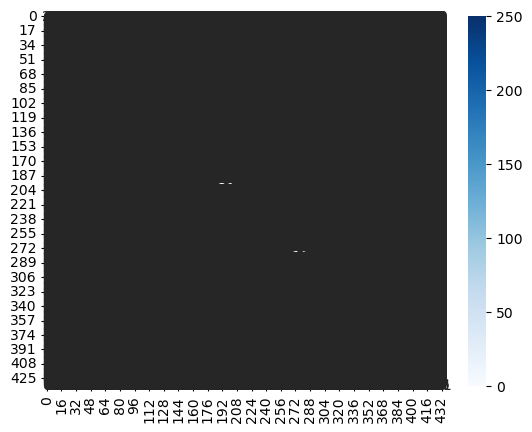

In [65]:
from sklearn.metrics import classification_report, confusion_matrix

# Reporte de clasificación
print(classification_report(y_test, y_pred))

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.show()

In [66]:
# Agregar datos procesados al dataset de Deep Lake
# ds.create_tensor("features", htype="generic", dtype="float32", exist_ok=True)
# ds.create_tensor("labels", htype="generic", dtype="int32", exist_ok=True)

# Supongamos que X son tus características y y son tus etiquetas
ds["features"].extend(X)
ds["labels"].extend(y)

SampleAppendError: Failed to append a sample to the tensor 'features'. See more details in the traceback.

In [ ]:
ds.visualize()